In [2]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=6209eac7961915d68d08bb7fbb26bca82216c019545b5bd5b41781645728f01a
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [3]:
from deepface import DeepFace

25-03-12 01:59:04 - Directory /root/.deepface has been created
25-03-12 01:59:04 - Directory /root/.deepface/weights has been created


In [22]:
import shutil

src_db_path = "/kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/train"
dest_db_path = "/kaggle/working/train"

shutil.copytree(src_db_path, dest_db_path, dirs_exist_ok=True)


'/kaggle/working/train'

In [6]:
# !rm -r /kaggle/working/train/person_{62..124}

In [ ]:
dfs = DeepFace.find(
  db_path = "/kaggle/working/train", 
  img_path = "/kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2.jpg", 
  model_name = 'Facenet512',
  enforce_detection=False,
    detector_backend="retinaface",  # Skips face detection
  # detector_backend='opencv'  # Try 'mtcnn', 'retinaface', etc.
)

25-03-12 03:28:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2.jpg in 6828 length datastore
25-03-12 03:28:40 - find function duration 2.261307954788208 seconds


In [43]:
best_match = dfs[0].iloc[0]
print(f"Best Match: {best_match['identity']}")
print(f"Similarity Score: {best_match['distance']}")

Best Match: /kaggle/working/train/person_0/12.jpg
Similarity Score: 0.17193911874708523


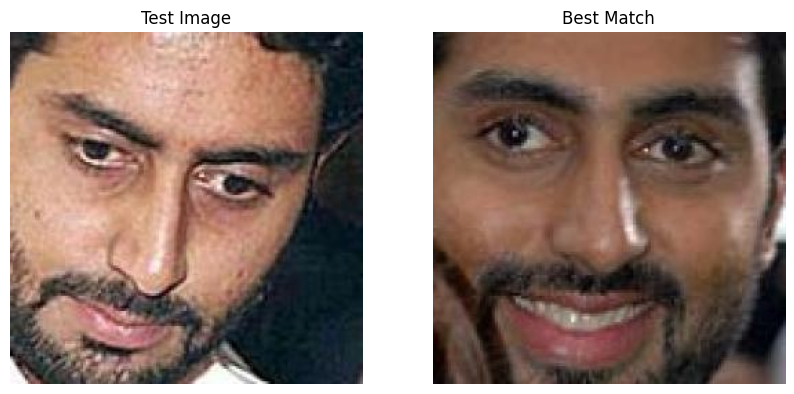

In [44]:
import cv2
import matplotlib.pyplot as plt

# Load test image
test_img_path = "/kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2.jpg"
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Load best matched image
best_match_path = best_match["identity"]
matched_img = cv2.imread(best_match_path)
matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Show images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(test_img)
axs[0].set_title("Test Image")
axs[0].axis("off")

axs[1].imshow(matched_img)
axs[1].set_title("Best Match")
axs[1].axis("off")

plt.show()


In [99]:
test_img_path = "/kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2.jpg"

In [100]:
dfs = DeepFace.find(
  db_path = "/kaggle/working/train", 
  img_path = test_img_path, 
  model_name = 'Facenet512',
  enforce_detection=False,
    detector_backend="skip",  # Skips face detection
  # detector_backend='opencv'  # Try 'mtcnn', 'retinaface', etc.
)

25-03-12 03:56:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2.jpg in 6828 length datastore
25-03-12 03:56:11 - find function duration 2.3645074367523193 seconds


In [101]:
if not dfs[0].empty:
    best_match = dfs[0].iloc[0]
    print(f"Best Match: {best_match['identity']}")
    print(f"Similarity Score: {best_match['distance']}")
else:
    print("No Match")

Best Match: /kaggle/working/train/person_0/12.jpg
Similarity Score: 0.17193911874708523


In [ ]:

# Load test image
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Load best matched image
best_match_path = best_match["identity"]
matched_img = cv2.imread(best_match_path)
matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Show images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(test_img)
axs[0].set_title("Test Image")
axs[0].axis("off")

axs[1].imshow(matched_img)
axs[1].set_title("Best Match")
axs[1].axis("off")

plt.show()


# Submission 

In [144]:
import pandas as pd
import numpy as np
from pathlib import Path
import ast
from tqdm import tqdm

In [154]:
submission_df = pd.read_csv("/kaggle/input/submission/FasterCnnByteTracking.csv")

In [155]:
submission_df['objects'] = submission_df['objects'].apply(lambda x: ast.literal_eval(x))
submission_df

,ID,frame,objects,objective
0,0,1.0,"[{'tracked_id': 1, 'x': 757.8729248046875, 'y'...",tracking
1,1,2.0,"[{'tracked_id': 7, 'x': 657.6649169921875, 'y'...",tracking
2,2,3.0,"[{'tracked_id': 5, 'x': 1467.3447265625, 'y': ...",tracking
3,3,4.0,"[{'tracked_id': 7, 'x': 660.7446899414062, 'y'...",tracking
4,4,5.0,"[{'tracked_id': 7, 'x': 658.93408203125, 'y': ...",tracking
...,...,...,...,...
5158,5158,-1.0,"{'gt': '', 'image': 'test_set/9987.jpg'}",face_reid
5159,5159,-1.0,"{'gt': '', 'image': 'test_set/9988.jpg'}",face_reid
5160,5160,-1.0,"{'gt': '', 'image': 'test_set/9989.jpg'}",face_reid
5161,5161,-1.0,"{'gt': '', 'image': 'test_set/9990.jpg'}",face_reid


In [156]:
for idx, row in tqdm(submission_df[submission_df["objective"] == "face_reid"].iterrows()):
    test_img_path = row["objects"]['image'] # Extract image path
    img_path = test_img_path.replace("test_set","/kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test")
    print(test_img_path)
    try:
        # Run DeepFace recognition
        dfs = DeepFace.find(
          db_path = "/kaggle/working/train", 
          img_path = img_path, 
          model_name = 'Facenet512',
          enforce_detection=False,
          detector_backend="skip" # Skips face detection
  # detector_backend='opencv'  # Try 'mtcnn', 'retinaface', etc.
        )

        # Store results in 'objects' column (first match or empty list)
        if not dfs[0].empty:
            best_match = dfs[0].iloc[0]["identity"]  # First match
            b = Path(best_match)
            submission_df.at[idx, "objects"] = {'gt': b.parent.name , 'image':test_img_path }	
        else:
            submission_df.at[idx, "objects"] = {'gt': "doesn't_exist", 'image': test_img_path}	

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        # submission_df.at[idx, "objects"] = {"gt": None}

# ✅ Now submission_df is updated with face recognition results


0it [00:00, ?it/s]

test_set/13.jpg
25-03-12 04:28:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/13.jpg in 6828 length datastore


1it [00:02,  2.20s/it]

25-03-12 04:28:55 - find function duration 2.1543831825256348 seconds
test_set/21.jpg
25-03-12 04:28:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/21.jpg in 6828 length datastore


2it [00:04,  2.21s/it]

25-03-12 04:28:57 - find function duration 2.1653082370758057 seconds
test_set/2.jpg
25-03-12 04:28:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2.jpg in 6828 length datastore


3it [00:06,  2.27s/it]

25-03-12 04:29:00 - find function duration 2.289781093597412 seconds
test_set/20.jpg
25-03-12 04:29:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/20.jpg in 6828 length datastore


4it [00:09,  2.27s/it]

25-03-12 04:29:02 - find function duration 2.2299840450286865 seconds
test_set/22.jpg
25-03-12 04:29:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/22.jpg in 6828 length datastore


5it [00:11,  2.25s/it]

25-03-12 04:29:04 - find function duration 2.154994010925293 seconds
test_set/63.jpg
25-03-12 04:29:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/63.jpg in 6828 length datastore


6it [00:13,  2.39s/it]

25-03-12 04:29:07 - find function duration 2.633850336074829 seconds
test_set/60.jpg
25-03-12 04:29:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/60.jpg in 6828 length datastore


7it [00:16,  2.34s/it]

25-03-12 04:29:09 - find function duration 2.1780922412872314 seconds
test_set/55.jpg
25-03-12 04:29:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/55.jpg in 6828 length datastore


8it [00:18,  2.36s/it]

25-03-12 04:29:11 - find function duration 2.374079465866089 seconds
test_set/34.jpg
25-03-12 04:29:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/34.jpg in 6828 length datastore


9it [00:20,  2.31s/it]

25-03-12 04:29:14 - find function duration 2.1556777954101562 seconds
test_set/44.jpg
25-03-12 04:29:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/44.jpg in 6828 length datastore


10it [00:23,  2.34s/it]

25-03-12 04:29:16 - find function duration 2.348207473754883 seconds
test_set/33.jpg
25-03-12 04:29:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/33.jpg in 6828 length datastore


11it [00:25,  2.36s/it]

25-03-12 04:29:18 - find function duration 2.3723340034484863 seconds
test_set/41.jpg
25-03-12 04:29:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/41.jpg in 6828 length datastore


12it [00:27,  2.35s/it]

25-03-12 04:29:21 - find function duration 2.283377170562744 seconds
test_set/49.jpg
25-03-12 04:29:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/49.jpg in 6828 length datastore


13it [00:30,  2.32s/it]

25-03-12 04:29:23 - find function duration 2.2064993381500244 seconds
test_set/28.jpg
25-03-12 04:29:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/28.jpg in 6828 length datastore


14it [00:32,  2.29s/it]

25-03-12 04:29:25 - find function duration 2.1671314239501953 seconds
test_set/42.jpg
25-03-12 04:29:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/42.jpg in 6828 length datastore


15it [00:34,  2.32s/it]

25-03-12 04:29:28 - find function duration 2.3466315269470215 seconds
test_set/47.jpg
25-03-12 04:29:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/47.jpg in 6828 length datastore


16it [00:37,  2.37s/it]

25-03-12 04:29:30 - find function duration 2.444528579711914 seconds
test_set/46.jpg
25-03-12 04:29:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/46.jpg in 6828 length datastore


17it [00:39,  2.39s/it]

25-03-12 04:29:32 - find function duration 2.390822172164917 seconds
test_set/50.jpg
25-03-12 04:29:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/50.jpg in 6828 length datastore


18it [00:42,  2.42s/it]

25-03-12 04:29:35 - find function duration 2.4642553329467773 seconds
test_set/70.jpg
25-03-12 04:29:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/70.jpg in 6828 length datastore


19it [00:44,  2.45s/it]

25-03-12 04:29:38 - find function duration 2.475541591644287 seconds
test_set/69.jpg
25-03-12 04:29:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/69.jpg in 6828 length datastore


20it [00:46,  2.37s/it]

25-03-12 04:29:40 - find function duration 2.1421568393707275 seconds
test_set/170.jpg
25-03-12 04:29:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/170.jpg in 6828 length datastore


21it [00:49,  2.37s/it]

25-03-12 04:29:42 - find function duration 2.3362185955047607 seconds
test_set/165.jpg
25-03-12 04:29:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/165.jpg in 6828 length datastore


22it [00:51,  2.31s/it]

25-03-12 04:29:44 - find function duration 2.126152276992798 seconds
test_set/91.jpg
25-03-12 04:29:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/91.jpg in 6828 length datastore


23it [00:53,  2.27s/it]

25-03-12 04:29:46 - find function duration 2.1382007598876953 seconds
test_set/183.jpg
25-03-12 04:29:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/183.jpg in 6828 length datastore


24it [00:56,  2.32s/it]

25-03-12 04:29:49 - find function duration 2.400357723236084 seconds
test_set/137.jpg
25-03-12 04:29:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/137.jpg in 6828 length datastore


25it [00:58,  2.31s/it]

25-03-12 04:29:51 - find function duration 2.222622871398926 seconds
test_set/93.jpg
25-03-12 04:29:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/93.jpg in 6828 length datastore


26it [01:00,  2.30s/it]

25-03-12 04:29:53 - find function duration 2.2365267276763916 seconds
test_set/128.jpg
25-03-12 04:29:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/128.jpg in 6828 length datastore


27it [01:02,  2.28s/it]

25-03-12 04:29:56 - find function duration 2.204118013381958 seconds
test_set/124.jpg
25-03-12 04:29:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/124.jpg in 6828 length datastore


28it [01:05,  2.29s/it]

25-03-12 04:29:58 - find function duration 2.2704079151153564 seconds
test_set/107.jpg
25-03-12 04:29:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/107.jpg in 6828 length datastore


29it [01:07,  2.28s/it]

25-03-12 04:30:00 - find function duration 2.199591636657715 seconds
test_set/145.jpg
25-03-12 04:30:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/145.jpg in 6828 length datastore


30it [01:09,  2.29s/it]

25-03-12 04:30:03 - find function duration 2.2724642753601074 seconds
test_set/155.jpg
25-03-12 04:30:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/155.jpg in 6828 length datastore


31it [01:12,  2.36s/it]

25-03-12 04:30:05 - find function duration 2.4975690841674805 seconds
test_set/143.jpg
25-03-12 04:30:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/143.jpg in 6828 length datastore


32it [01:14,  2.33s/it]

25-03-12 04:30:07 - find function duration 2.197134017944336 seconds
test_set/130.jpg
25-03-12 04:30:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/130.jpg in 6828 length datastore


33it [01:16,  2.34s/it]

25-03-12 04:30:10 - find function duration 2.3308780193328857 seconds
test_set/176.jpg
25-03-12 04:30:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/176.jpg in 6828 length datastore


34it [01:19,  2.32s/it]

25-03-12 04:30:12 - find function duration 2.237298011779785 seconds
test_set/172.jpg
25-03-12 04:30:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/172.jpg in 6828 length datastore


35it [01:21,  2.33s/it]

25-03-12 04:30:14 - find function duration 2.31296443939209 seconds
test_set/162.jpg
25-03-12 04:30:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/162.jpg in 6828 length datastore


36it [01:23,  2.34s/it]

25-03-12 04:30:17 - find function duration 2.3272669315338135 seconds
test_set/171.jpg
25-03-12 04:30:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/171.jpg in 6828 length datastore


37it [01:26,  2.37s/it]

25-03-12 04:30:19 - find function duration 2.386899709701538 seconds
test_set/133.jpg
25-03-12 04:30:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/133.jpg in 6828 length datastore


38it [01:28,  2.36s/it]

25-03-12 04:30:21 - find function duration 2.2902438640594482 seconds
test_set/150.jpg
25-03-12 04:30:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/150.jpg in 6828 length datastore


39it [01:30,  2.31s/it]

25-03-12 04:30:24 - find function duration 2.142789363861084 seconds
test_set/75.jpg
25-03-12 04:30:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/75.jpg in 6828 length datastore


40it [01:32,  2.28s/it]

25-03-12 04:30:26 - find function duration 2.1595160961151123 seconds
test_set/139.jpg
25-03-12 04:30:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/139.jpg in 6828 length datastore


41it [01:35,  2.26s/it]

25-03-12 04:30:28 - find function duration 2.1856188774108887 seconds
test_set/181.jpg
25-03-12 04:30:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/181.jpg in 6828 length datastore


42it [01:37,  2.25s/it]

25-03-12 04:30:30 - find function duration 2.1927826404571533 seconds
test_set/179.jpg
25-03-12 04:30:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/179.jpg in 6828 length datastore


43it [01:39,  2.23s/it]

25-03-12 04:30:32 - find function duration 2.1460344791412354 seconds
test_set/134.jpg
25-03-12 04:30:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/134.jpg in 6828 length datastore


44it [01:42,  2.34s/it]

25-03-12 04:30:35 - find function duration 2.532470464706421 seconds
test_set/158.jpg
25-03-12 04:30:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/158.jpg in 6828 length datastore


45it [01:44,  2.31s/it]

25-03-12 04:30:37 - find function duration 2.1979968547821045 seconds
test_set/153.jpg
25-03-12 04:30:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/153.jpg in 6828 length datastore


46it [01:46,  2.30s/it]

25-03-12 04:30:40 - find function duration 2.2350664138793945 seconds
test_set/103.jpg
25-03-12 04:30:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/103.jpg in 6828 length datastore


47it [01:49,  2.30s/it]

25-03-12 04:30:42 - find function duration 2.256622791290283 seconds
test_set/97.jpg
25-03-12 04:30:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/97.jpg in 6828 length datastore


48it [01:51,  2.28s/it]

25-03-12 04:30:44 - find function duration 2.1795599460601807 seconds
test_set/122.jpg
25-03-12 04:30:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/122.jpg in 6828 length datastore


49it [01:53,  2.25s/it]

25-03-12 04:30:46 - find function duration 2.152743101119995 seconds
test_set/82.jpg
25-03-12 04:30:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/82.jpg in 6828 length datastore


50it [01:55,  2.24s/it]

25-03-12 04:30:49 - find function duration 2.172938823699951 seconds
test_set/86.jpg
25-03-12 04:30:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/86.jpg in 6828 length datastore


51it [01:58,  2.28s/it]

25-03-12 04:30:51 - find function duration 2.3424224853515625 seconds
test_set/163.jpg
25-03-12 04:30:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/163.jpg in 6828 length datastore


52it [02:00,  2.29s/it]

25-03-12 04:30:53 - find function duration 2.277147054672241 seconds
test_set/173.jpg
25-03-12 04:30:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/173.jpg in 6828 length datastore


53it [02:02,  2.29s/it]

25-03-12 04:30:55 - find function duration 2.2247118949890137 seconds
test_set/207.jpg
25-03-12 04:30:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/207.jpg in 6828 length datastore


54it [02:04,  2.29s/it]

25-03-12 04:30:58 - find function duration 2.265688419342041 seconds
test_set/209.jpg
25-03-12 04:30:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/209.jpg in 6828 length datastore


55it [02:07,  2.31s/it]

25-03-12 04:31:00 - find function duration 2.301180601119995 seconds
test_set/220.jpg
25-03-12 04:31:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/220.jpg in 6828 length datastore


56it [02:09,  2.31s/it]

25-03-12 04:31:02 - find function duration 2.2824580669403076 seconds
test_set/200.jpg
25-03-12 04:31:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/200.jpg in 6828 length datastore


57it [02:11,  2.30s/it]

25-03-12 04:31:05 - find function duration 2.227989673614502 seconds
test_set/244.jpg
25-03-12 04:31:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/244.jpg in 6828 length datastore


58it [02:14,  2.41s/it]

25-03-12 04:31:07 - find function duration 2.622429609298706 seconds
test_set/224.jpg
25-03-12 04:31:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/224.jpg in 6828 length datastore


59it [02:16,  2.35s/it]

25-03-12 04:31:10 - find function duration 2.1823999881744385 seconds
test_set/203.jpg
25-03-12 04:31:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/203.jpg in 6828 length datastore


60it [02:19,  2.38s/it]

25-03-12 04:31:12 - find function duration 2.4153881072998047 seconds
test_set/211.jpg
25-03-12 04:31:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/211.jpg in 6828 length datastore


61it [02:21,  2.39s/it]

25-03-12 04:31:14 - find function duration 2.361827850341797 seconds
test_set/238.jpg
25-03-12 04:31:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/238.jpg in 6828 length datastore


62it [02:24,  2.39s/it]

25-03-12 04:31:17 - find function duration 2.363994836807251 seconds
test_set/226.jpg
25-03-12 04:31:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/226.jpg in 6828 length datastore


63it [02:26,  2.37s/it]

25-03-12 04:31:19 - find function duration 2.267441987991333 seconds
test_set/198.jpg
25-03-12 04:31:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/198.jpg in 6828 length datastore


64it [02:28,  2.35s/it]

25-03-12 04:31:21 - find function duration 2.2600111961364746 seconds
test_set/210.jpg
25-03-12 04:31:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/210.jpg in 6828 length datastore


65it [02:31,  2.35s/it]

25-03-12 04:31:24 - find function duration 2.329338550567627 seconds
test_set/189.jpg
25-03-12 04:31:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/189.jpg in 6828 length datastore


66it [02:33,  2.33s/it]

25-03-12 04:31:26 - find function duration 2.2444376945495605 seconds
test_set/205.jpg
25-03-12 04:31:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/205.jpg in 6828 length datastore


67it [02:35,  2.30s/it]

25-03-12 04:31:28 - find function duration 2.187739849090576 seconds
test_set/215.jpg
25-03-12 04:31:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/215.jpg in 6828 length datastore


68it [02:37,  2.29s/it]

25-03-12 04:31:31 - find function duration 2.2376339435577393 seconds
test_set/213.jpg
25-03-12 04:31:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/213.jpg in 6828 length datastore


69it [02:40,  2.29s/it]

25-03-12 04:31:33 - find function duration 2.233703374862671 seconds
test_set/237.jpg
25-03-12 04:31:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/237.jpg in 6828 length datastore


70it [02:42,  2.35s/it]

25-03-12 04:31:35 - find function duration 2.4546356201171875 seconds
test_set/241.jpg
25-03-12 04:31:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/241.jpg in 6828 length datastore


71it [02:44,  2.31s/it]

25-03-12 04:31:38 - find function duration 2.178070306777954 seconds
test_set/247.jpg
25-03-12 04:31:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/247.jpg in 6828 length datastore


72it [02:47,  2.32s/it]

25-03-12 04:31:40 - find function duration 2.2964866161346436 seconds
test_set/214.jpg
25-03-12 04:31:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/214.jpg in 6828 length datastore


73it [02:49,  2.28s/it]

25-03-12 04:31:42 - find function duration 2.160820245742798 seconds
test_set/246.jpg
25-03-12 04:31:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/246.jpg in 6828 length datastore


74it [02:51,  2.24s/it]

25-03-12 04:31:44 - find function duration 2.1063783168792725 seconds
test_set/233.jpg
25-03-12 04:31:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/233.jpg in 6828 length datastore


75it [02:53,  2.23s/it]

25-03-12 04:31:47 - find function duration 2.159435510635376 seconds
test_set/305.jpg
25-03-12 04:31:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/305.jpg in 6828 length datastore


76it [02:55,  2.22s/it]

25-03-12 04:31:49 - find function duration 2.1571741104125977 seconds
test_set/297.jpg
25-03-12 04:31:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/297.jpg in 6828 length datastore


77it [02:58,  2.21s/it]

25-03-12 04:31:51 - find function duration 2.1529524326324463 seconds
test_set/307.jpg
25-03-12 04:31:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/307.jpg in 6828 length datastore


78it [03:00,  2.21s/it]

25-03-12 04:31:53 - find function duration 2.1589863300323486 seconds
test_set/276.jpg
25-03-12 04:31:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/276.jpg in 6828 length datastore


79it [03:02,  2.23s/it]

25-03-12 04:31:55 - find function duration 2.2436320781707764 seconds
test_set/290.jpg
25-03-12 04:31:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/290.jpg in 6828 length datastore


80it [03:04,  2.20s/it]

25-03-12 04:31:58 - find function duration 2.102766513824463 seconds
test_set/285.jpg
25-03-12 04:31:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/285.jpg in 6828 length datastore


81it [03:06,  2.21s/it]

25-03-12 04:32:00 - find function duration 2.1901304721832275 seconds
test_set/260.jpg
25-03-12 04:32:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/260.jpg in 6828 length datastore


82it [03:09,  2.30s/it]

25-03-12 04:32:02 - find function duration 2.4636638164520264 seconds
test_set/277.jpg
25-03-12 04:32:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/277.jpg in 6828 length datastore


83it [03:11,  2.28s/it]

25-03-12 04:32:04 - find function duration 2.1762404441833496 seconds
test_set/266.jpg
25-03-12 04:32:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/266.jpg in 6828 length datastore


84it [03:13,  2.27s/it]

25-03-12 04:32:07 - find function duration 2.208428382873535 seconds
test_set/300.jpg
25-03-12 04:32:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/300.jpg in 6828 length datastore


85it [03:16,  2.26s/it]

25-03-12 04:32:09 - find function duration 2.2067315578460693 seconds
test_set/309.jpg
25-03-12 04:32:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/309.jpg in 6828 length datastore


86it [03:18,  2.27s/it]

25-03-12 04:32:11 - find function duration 2.25459623336792 seconds
test_set/283.jpg
25-03-12 04:32:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/283.jpg in 6828 length datastore


87it [03:20,  2.25s/it]

25-03-12 04:32:13 - find function duration 2.1570868492126465 seconds
test_set/264.jpg
25-03-12 04:32:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/264.jpg in 6828 length datastore


88it [03:22,  2.23s/it]

25-03-12 04:32:16 - find function duration 2.1428120136260986 seconds
test_set/291.jpg
25-03-12 04:32:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/291.jpg in 6828 length datastore


89it [03:25,  2.22s/it]

25-03-12 04:32:18 - find function duration 2.1642706394195557 seconds
test_set/295.jpg
25-03-12 04:32:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/295.jpg in 6828 length datastore


90it [03:27,  2.23s/it]

25-03-12 04:32:20 - find function duration 2.197593927383423 seconds
test_set/361.jpg
25-03-12 04:32:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/361.jpg in 6828 length datastore


91it [03:29,  2.23s/it]

25-03-12 04:32:22 - find function duration 2.191831350326538 seconds
test_set/371.jpg
25-03-12 04:32:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/371.jpg in 6828 length datastore


92it [03:31,  2.21s/it]

25-03-12 04:32:25 - find function duration 2.1333417892456055 seconds
test_set/363.jpg
25-03-12 04:32:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/363.jpg in 6828 length datastore


93it [03:33,  2.24s/it]

25-03-12 04:32:27 - find function duration 2.262033700942993 seconds
test_set/341.jpg
25-03-12 04:32:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/341.jpg in 6828 length datastore


94it [03:36,  2.22s/it]

25-03-12 04:32:29 - find function duration 2.120922327041626 seconds
test_set/365.jpg
25-03-12 04:32:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/365.jpg in 6828 length datastore


95it [03:38,  2.29s/it]

25-03-12 04:32:31 - find function duration 2.439086675643921 seconds
test_set/330.jpg
25-03-12 04:32:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/330.jpg in 6828 length datastore


96it [03:40,  2.26s/it]

25-03-12 04:32:34 - find function duration 2.1456422805786133 seconds
test_set/380.jpg
25-03-12 04:32:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/380.jpg in 6828 length datastore


97it [03:42,  2.24s/it]

25-03-12 04:32:36 - find function duration 2.1429007053375244 seconds
test_set/376.jpg
25-03-12 04:32:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/376.jpg in 6828 length datastore


98it [03:45,  2.24s/it]

25-03-12 04:32:38 - find function duration 2.212507963180542 seconds
test_set/356.jpg
25-03-12 04:32:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/356.jpg in 6828 length datastore


99it [03:47,  2.23s/it]

25-03-12 04:32:40 - find function duration 2.1675519943237305 seconds
test_set/324.jpg
25-03-12 04:32:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/324.jpg in 6828 length datastore


100it [03:49,  2.21s/it]

25-03-12 04:32:42 - find function duration 2.124255895614624 seconds
test_set/369.jpg
25-03-12 04:32:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/369.jpg in 6828 length datastore


101it [03:51,  2.20s/it]

25-03-12 04:32:45 - find function duration 2.121084690093994 seconds
test_set/339.jpg
25-03-12 04:32:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/339.jpg in 6828 length datastore


102it [03:53,  2.17s/it]

25-03-12 04:32:47 - find function duration 2.079047918319702 seconds
test_set/316.jpg
25-03-12 04:32:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/316.jpg in 6828 length datastore


103it [03:56,  2.17s/it]

25-03-12 04:32:49 - find function duration 2.1316616535186768 seconds
test_set/328.jpg
25-03-12 04:32:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/328.jpg in 6828 length datastore


104it [03:58,  2.19s/it]

25-03-12 04:32:51 - find function duration 2.1818952560424805 seconds
test_set/318.jpg
25-03-12 04:32:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/318.jpg in 6828 length datastore


105it [04:00,  2.19s/it]

25-03-12 04:32:53 - find function duration 2.1551690101623535 seconds
test_set/360.jpg
25-03-12 04:32:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/360.jpg in 6828 length datastore


106it [04:02,  2.18s/it]

25-03-12 04:32:55 - find function duration 2.1050078868865967 seconds
test_set/315.jpg
25-03-12 04:32:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/315.jpg in 6828 length datastore


107it [04:04,  2.20s/it]

25-03-12 04:32:58 - find function duration 2.211120367050171 seconds
test_set/320.jpg
25-03-12 04:32:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/320.jpg in 6828 length datastore


108it [04:07,  2.21s/it]

25-03-12 04:33:00 - find function duration 2.201551675796509 seconds
test_set/357.jpg
25-03-12 04:33:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/357.jpg in 6828 length datastore


109it [04:09,  2.28s/it]

25-03-12 04:33:02 - find function duration 2.3979132175445557 seconds
test_set/368.jpg
25-03-12 04:33:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/368.jpg in 6828 length datastore


110it [04:11,  2.23s/it]

25-03-12 04:33:04 - find function duration 2.065305471420288 seconds
test_set/310.jpg
25-03-12 04:33:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/310.jpg in 6828 length datastore


111it [04:13,  2.23s/it]

25-03-12 04:33:07 - find function duration 2.179474353790283 seconds
test_set/399.jpg
25-03-12 04:33:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/399.jpg in 6828 length datastore


112it [04:16,  2.22s/it]

25-03-12 04:33:09 - find function duration 2.15433406829834 seconds
test_set/381.jpg
25-03-12 04:33:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/381.jpg in 6828 length datastore


113it [04:18,  2.24s/it]

25-03-12 04:33:11 - find function duration 2.261817693710327 seconds
test_set/407.jpg
25-03-12 04:33:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/407.jpg in 6828 length datastore


114it [04:20,  2.21s/it]

25-03-12 04:33:13 - find function duration 2.111412525177002 seconds
test_set/402.jpg
25-03-12 04:33:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/402.jpg in 6828 length datastore


115it [04:22,  2.21s/it]

25-03-12 04:33:16 - find function duration 2.1536028385162354 seconds
test_set/384.jpg
25-03-12 04:33:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/384.jpg in 6828 length datastore


116it [04:24,  2.18s/it]

25-03-12 04:33:18 - find function duration 2.089618444442749 seconds
test_set/391.jpg
25-03-12 04:33:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/391.jpg in 6828 length datastore


117it [04:27,  2.19s/it]

25-03-12 04:33:20 - find function duration 2.1783607006073 seconds
test_set/401.jpg
25-03-12 04:33:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/401.jpg in 6828 length datastore


118it [04:29,  2.17s/it]

25-03-12 04:33:22 - find function duration 2.0662853717803955 seconds
test_set/382.jpg
25-03-12 04:33:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/382.jpg in 6828 length datastore


119it [04:31,  2.16s/it]

25-03-12 04:33:24 - find function duration 2.1102938652038574 seconds
test_set/432.jpg
25-03-12 04:33:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/432.jpg in 6828 length datastore


120it [04:33,  2.16s/it]

25-03-12 04:33:26 - find function duration 2.1252641677856445 seconds
test_set/425.jpg
25-03-12 04:33:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/425.jpg in 6828 length datastore


121it [04:36,  2.29s/it]

25-03-12 04:33:29 - find function duration 2.530930280685425 seconds
test_set/420.jpg
25-03-12 04:33:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/420.jpg in 6828 length datastore


122it [04:38,  2.28s/it]

25-03-12 04:33:31 - find function duration 2.2356104850769043 seconds
test_set/414.jpg
25-03-12 04:33:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/414.jpg in 6828 length datastore


123it [04:40,  2.29s/it]

25-03-12 04:33:33 - find function duration 2.270134449005127 seconds
test_set/427.jpg
25-03-12 04:33:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/427.jpg in 6828 length datastore


124it [04:42,  2.31s/it]

25-03-12 04:33:36 - find function duration 2.2968149185180664 seconds
test_set/421.jpg
25-03-12 04:33:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/421.jpg in 6828 length datastore


125it [04:45,  2.30s/it]

25-03-12 04:33:38 - find function duration 2.2322685718536377 seconds
test_set/445.jpg
25-03-12 04:33:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/445.jpg in 6828 length datastore


126it [04:47,  2.30s/it]

25-03-12 04:33:40 - find function duration 2.260843276977539 seconds
test_set/418.jpg
25-03-12 04:33:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/418.jpg in 6828 length datastore


127it [04:49,  2.25s/it]

25-03-12 04:33:43 - find function duration 2.1054601669311523 seconds
test_set/431.jpg
25-03-12 04:33:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/431.jpg in 6828 length datastore


128it [04:51,  2.25s/it]

25-03-12 04:33:45 - find function duration 2.1932971477508545 seconds
test_set/453.jpg
25-03-12 04:33:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/453.jpg in 6828 length datastore


129it [04:54,  2.23s/it]

25-03-12 04:33:47 - find function duration 2.1389167308807373 seconds
test_set/478.jpg
25-03-12 04:33:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/478.jpg in 6828 length datastore


130it [04:56,  2.24s/it]

25-03-12 04:33:49 - find function duration 2.24019455909729 seconds
test_set/426.jpg
25-03-12 04:33:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/426.jpg in 6828 length datastore


131it [04:58,  2.24s/it]

25-03-12 04:33:51 - find function duration 2.2006595134735107 seconds
test_set/436.jpg
25-03-12 04:33:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/436.jpg in 6828 length datastore


132it [05:00,  2.22s/it]

25-03-12 04:33:54 - find function duration 2.1467692852020264 seconds
test_set/474.jpg
25-03-12 04:33:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/474.jpg in 6828 length datastore


133it [05:03,  2.33s/it]

25-03-12 04:33:56 - find function duration 2.5462465286254883 seconds
test_set/438.jpg
25-03-12 04:33:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/438.jpg in 6828 length datastore


134it [05:05,  2.28s/it]

25-03-12 04:33:58 - find function duration 2.1151111125946045 seconds
test_set/472.jpg
25-03-12 04:33:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/472.jpg in 6828 length datastore


135it [05:07,  2.29s/it]

25-03-12 04:34:01 - find function duration 2.2774083614349365 seconds
test_set/430.jpg
25-03-12 04:34:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/430.jpg in 6828 length datastore


136it [05:10,  2.26s/it]

25-03-12 04:34:03 - find function duration 2.1537275314331055 seconds
test_set/433.jpg
25-03-12 04:34:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/433.jpg in 6828 length datastore


137it [05:12,  2.24s/it]

25-03-12 04:34:05 - find function duration 2.1373538970947266 seconds
test_set/448.jpg
25-03-12 04:34:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/448.jpg in 6828 length datastore


138it [05:14,  2.22s/it]

25-03-12 04:34:07 - find function duration 2.1417059898376465 seconds
test_set/458.jpg
25-03-12 04:34:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/458.jpg in 6828 length datastore


139it [05:16,  2.26s/it]

25-03-12 04:34:10 - find function duration 2.3111557960510254 seconds
test_set/469.jpg
25-03-12 04:34:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/469.jpg in 6828 length datastore


140it [05:19,  2.28s/it]

25-03-12 04:34:12 - find function duration 2.289623260498047 seconds
test_set/522.jpg
25-03-12 04:34:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/522.jpg in 6828 length datastore


141it [05:21,  2.24s/it]

25-03-12 04:34:14 - find function duration 2.1106224060058594 seconds
test_set/482.jpg
25-03-12 04:34:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/482.jpg in 6828 length datastore


142it [05:23,  2.25s/it]

25-03-12 04:34:16 - find function duration 2.2213521003723145 seconds
test_set/498.jpg
25-03-12 04:34:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/498.jpg in 6828 length datastore


143it [05:25,  2.29s/it]

25-03-12 04:34:19 - find function duration 2.343425750732422 seconds
test_set/485.jpg
25-03-12 04:34:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/485.jpg in 6828 length datastore


144it [05:28,  2.28s/it]

25-03-12 04:34:21 - find function duration 2.2131941318511963 seconds
test_set/500.jpg
25-03-12 04:34:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/500.jpg in 6828 length datastore


145it [05:30,  2.28s/it]

25-03-12 04:34:23 - find function duration 2.2591960430145264 seconds
test_set/514.jpg
25-03-12 04:34:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/514.jpg in 6828 length datastore


146it [05:32,  2.36s/it]

25-03-12 04:34:26 - find function duration 2.4821176528930664 seconds
test_set/523.jpg
25-03-12 04:34:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/523.jpg in 6828 length datastore


147it [05:35,  2.30s/it]

25-03-12 04:34:28 - find function duration 2.1178300380706787 seconds
test_set/513.jpg
25-03-12 04:34:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/513.jpg in 6828 length datastore


148it [05:37,  2.27s/it]

25-03-12 04:34:30 - find function duration 2.1505990028381348 seconds
test_set/517.jpg
25-03-12 04:34:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/517.jpg in 6828 length datastore


149it [05:39,  2.26s/it]

25-03-12 04:34:32 - find function duration 2.2113232612609863 seconds
test_set/491.jpg
25-03-12 04:34:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/491.jpg in 6828 length datastore


150it [05:41,  2.26s/it]

25-03-12 04:34:35 - find function duration 2.22066068649292 seconds
test_set/507.jpg
25-03-12 04:34:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/507.jpg in 6828 length datastore


151it [05:44,  2.24s/it]

25-03-12 04:34:37 - find function duration 2.1577699184417725 seconds
test_set/518.jpg
25-03-12 04:34:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/518.jpg in 6828 length datastore


152it [05:46,  2.22s/it]

25-03-12 04:34:39 - find function duration 2.1395390033721924 seconds
test_set/484.jpg
25-03-12 04:34:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/484.jpg in 6828 length datastore


153it [05:48,  2.21s/it]

25-03-12 04:34:41 - find function duration 2.1381757259368896 seconds
test_set/559.jpg
25-03-12 04:34:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/559.jpg in 6828 length datastore


154it [05:50,  2.19s/it]

25-03-12 04:34:43 - find function duration 2.114997386932373 seconds
test_set/586.jpg
25-03-12 04:34:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/586.jpg in 6828 length datastore


155it [05:52,  2.20s/it]

25-03-12 04:34:46 - find function duration 2.183690071105957 seconds
test_set/754.jpg
25-03-12 04:34:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/754.jpg in 6828 length datastore


156it [05:54,  2.20s/it]

25-03-12 04:34:48 - find function duration 2.159702777862549 seconds
test_set/693.jpg
25-03-12 04:34:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/693.jpg in 6828 length datastore


157it [05:57,  2.21s/it]

25-03-12 04:34:50 - find function duration 2.173234224319458 seconds
test_set/650.jpg
25-03-12 04:34:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/650.jpg in 6828 length datastore


158it [05:59,  2.28s/it]

25-03-12 04:34:52 - find function duration 2.397365093231201 seconds
test_set/605.jpg
25-03-12 04:34:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/605.jpg in 6828 length datastore


159it [06:02,  2.31s/it]

25-03-12 04:34:55 - find function duration 2.3650248050689697 seconds
test_set/794.jpg
25-03-12 04:34:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/794.jpg in 6828 length datastore


160it [06:04,  2.35s/it]

25-03-12 04:34:57 - find function duration 2.393105983734131 seconds
test_set/618.jpg
25-03-12 04:34:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/618.jpg in 6828 length datastore


161it [06:06,  2.31s/it]

25-03-12 04:35:00 - find function duration 2.1793859004974365 seconds
test_set/786.jpg
25-03-12 04:35:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/786.jpg in 6828 length datastore


162it [06:08,  2.29s/it]

25-03-12 04:35:02 - find function duration 2.1883389949798584 seconds
test_set/697.jpg
25-03-12 04:35:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/697.jpg in 6828 length datastore


163it [06:11,  2.31s/it]

25-03-12 04:35:04 - find function duration 2.312795877456665 seconds
test_set/770.jpg
25-03-12 04:35:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/770.jpg in 6828 length datastore


164it [06:13,  2.29s/it]

25-03-12 04:35:06 - find function duration 2.2218942642211914 seconds
test_set/665.jpg
25-03-12 04:35:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/665.jpg in 6828 length datastore


165it [06:15,  2.29s/it]

25-03-12 04:35:09 - find function duration 2.2444934844970703 seconds
test_set/535.jpg
25-03-12 04:35:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/535.jpg in 6828 length datastore


166it [06:18,  2.33s/it]

25-03-12 04:35:11 - find function duration 2.39136004447937 seconds
test_set/661.jpg
25-03-12 04:35:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/661.jpg in 6828 length datastore


167it [06:20,  2.29s/it]

25-03-12 04:35:13 - find function duration 2.1593499183654785 seconds
test_set/555.jpg
25-03-12 04:35:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/555.jpg in 6828 length datastore


168it [06:22,  2.31s/it]

25-03-12 04:35:16 - find function duration 2.3116097450256348 seconds
test_set/548.jpg
25-03-12 04:35:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/548.jpg in 6828 length datastore


169it [06:24,  2.27s/it]

25-03-12 04:35:18 - find function duration 2.121954917907715 seconds
test_set/558.jpg
25-03-12 04:35:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/558.jpg in 6828 length datastore


170it [06:27,  2.25s/it]

25-03-12 04:35:20 - find function duration 2.169525384902954 seconds
test_set/638.jpg
25-03-12 04:35:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/638.jpg in 6828 length datastore


171it [06:29,  2.26s/it]

25-03-12 04:35:22 - find function duration 2.240736246109009 seconds
test_set/728.jpg
25-03-12 04:35:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/728.jpg in 6828 length datastore


172it [06:31,  2.32s/it]

25-03-12 04:35:25 - find function duration 2.432945966720581 seconds
test_set/667.jpg
25-03-12 04:35:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/667.jpg in 6828 length datastore


173it [06:34,  2.32s/it]

25-03-12 04:35:27 - find function duration 2.2860982418060303 seconds
test_set/729.jpg
25-03-12 04:35:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/729.jpg in 6828 length datastore


174it [06:36,  2.29s/it]

25-03-12 04:35:29 - find function duration 2.153165817260742 seconds
test_set/715.jpg
25-03-12 04:35:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/715.jpg in 6828 length datastore


175it [06:38,  2.30s/it]

25-03-12 04:35:32 - find function duration 2.2896430492401123 seconds
test_set/776.jpg
25-03-12 04:35:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/776.jpg in 6828 length datastore


176it [06:40,  2.26s/it]

25-03-12 04:35:34 - find function duration 2.11910343170166 seconds
test_set/721.jpg
25-03-12 04:35:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/721.jpg in 6828 length datastore


177it [06:43,  2.28s/it]

25-03-12 04:35:36 - find function duration 2.274357318878174 seconds
test_set/628.jpg
25-03-12 04:35:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/628.jpg in 6828 length datastore


178it [06:45,  2.24s/it]

25-03-12 04:35:38 - find function duration 2.1255059242248535 seconds
test_set/709.jpg
25-03-12 04:35:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/709.jpg in 6828 length datastore


179it [06:47,  2.23s/it]

25-03-12 04:35:40 - find function duration 2.168975353240967 seconds
test_set/556.jpg
25-03-12 04:35:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/556.jpg in 6828 length datastore


180it [06:49,  2.26s/it]

25-03-12 04:35:43 - find function duration 2.2707152366638184 seconds
test_set/790.jpg
25-03-12 04:35:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/790.jpg in 6828 length datastore


181it [06:52,  2.24s/it]

25-03-12 04:35:45 - find function duration 2.171785831451416 seconds
test_set/563.jpg
25-03-12 04:35:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/563.jpg in 6828 length datastore


182it [06:54,  2.23s/it]

25-03-12 04:35:47 - find function duration 2.160762310028076 seconds
test_set/589.jpg
25-03-12 04:35:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/589.jpg in 6828 length datastore


183it [06:56,  2.21s/it]

25-03-12 04:35:49 - find function duration 2.112246036529541 seconds
test_set/595.jpg
25-03-12 04:35:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/595.jpg in 6828 length datastore


184it [06:59,  2.30s/it]

25-03-12 04:35:52 - find function duration 2.479489326477051 seconds
test_set/716.jpg
25-03-12 04:35:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/716.jpg in 6828 length datastore


185it [07:01,  2.28s/it]

25-03-12 04:35:54 - find function duration 2.188243865966797 seconds
test_set/707.jpg
25-03-12 04:35:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/707.jpg in 6828 length datastore


186it [07:03,  2.25s/it]

25-03-12 04:35:56 - find function duration 2.1377384662628174 seconds
test_set/575.jpg
25-03-12 04:35:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/575.jpg in 6828 length datastore


187it [07:05,  2.23s/it]

25-03-12 04:35:58 - find function duration 2.145272970199585 seconds
test_set/526.jpg
25-03-12 04:35:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/526.jpg in 6828 length datastore


188it [07:07,  2.23s/it]

25-03-12 04:36:01 - find function duration 2.207958936691284 seconds
test_set/630.jpg
25-03-12 04:36:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/630.jpg in 6828 length datastore


189it [07:10,  2.23s/it]

25-03-12 04:36:03 - find function duration 2.182433843612671 seconds
test_set/569.jpg
25-03-12 04:36:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/569.jpg in 6828 length datastore


190it [07:12,  2.22s/it]

25-03-12 04:36:05 - find function duration 2.1618432998657227 seconds
test_set/739.jpg
25-03-12 04:36:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/739.jpg in 6828 length datastore


191it [07:14,  2.26s/it]

25-03-12 04:36:07 - find function duration 2.3096022605895996 seconds
test_set/742.jpg
25-03-12 04:36:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/742.jpg in 6828 length datastore


192it [07:16,  2.25s/it]

25-03-12 04:36:10 - find function duration 2.179205894470215 seconds
test_set/780.jpg
25-03-12 04:36:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/780.jpg in 6828 length datastore


193it [07:19,  2.25s/it]

25-03-12 04:36:12 - find function duration 2.2271997928619385 seconds
test_set/688.jpg
25-03-12 04:36:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/688.jpg in 6828 length datastore


194it [07:21,  2.24s/it]

25-03-12 04:36:14 - find function duration 2.161550998687744 seconds
test_set/660.jpg
25-03-12 04:36:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/660.jpg in 6828 length datastore


195it [07:23,  2.27s/it]

25-03-12 04:36:17 - find function duration 2.306180477142334 seconds
test_set/745.jpg
25-03-12 04:36:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/745.jpg in 6828 length datastore


196it [07:25,  2.24s/it]

25-03-12 04:36:19 - find function duration 2.139953374862671 seconds
test_set/760.jpg
25-03-12 04:36:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/760.jpg in 6828 length datastore


197it [07:28,  2.32s/it]

25-03-12 04:36:21 - find function duration 2.4481799602508545 seconds
test_set/591.jpg
25-03-12 04:36:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/591.jpg in 6828 length datastore


198it [07:30,  2.30s/it]

25-03-12 04:36:23 - find function duration 2.227652072906494 seconds
test_set/710.jpg
25-03-12 04:36:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/710.jpg in 6828 length datastore


199it [07:32,  2.26s/it]

25-03-12 04:36:26 - find function duration 2.1198346614837646 seconds
test_set/544.jpg
25-03-12 04:36:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/544.jpg in 6828 length datastore


200it [07:34,  2.24s/it]

25-03-12 04:36:28 - find function duration 2.156660556793213 seconds
test_set/677.jpg
25-03-12 04:36:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/677.jpg in 6828 length datastore


201it [07:37,  2.24s/it]

25-03-12 04:36:30 - find function duration 2.2036616802215576 seconds
test_set/744.jpg
25-03-12 04:36:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/744.jpg in 6828 length datastore


202it [07:39,  2.22s/it]

25-03-12 04:36:32 - find function duration 2.114152193069458 seconds
test_set/719.jpg
25-03-12 04:36:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/719.jpg in 6828 length datastore


203it [07:41,  2.22s/it]

25-03-12 04:36:34 - find function duration 2.1972455978393555 seconds
test_set/560.jpg
25-03-12 04:36:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/560.jpg in 6828 length datastore


204it [07:43,  2.22s/it]

25-03-12 04:36:37 - find function duration 2.1896204948425293 seconds
test_set/557.jpg
25-03-12 04:36:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/557.jpg in 6828 length datastore


205it [07:46,  2.25s/it]

25-03-12 04:36:39 - find function duration 2.2654311656951904 seconds
test_set/699.jpg
25-03-12 04:36:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/699.jpg in 6828 length datastore


206it [07:48,  2.24s/it]

25-03-12 04:36:41 - find function duration 2.1757214069366455 seconds
test_set/673.jpg
25-03-12 04:36:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/673.jpg in 6828 length datastore


207it [07:50,  2.22s/it]

25-03-12 04:36:43 - find function duration 2.1500837802886963 seconds
test_set/658.jpg
25-03-12 04:36:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/658.jpg in 6828 length datastore


208it [07:52,  2.23s/it]

25-03-12 04:36:46 - find function duration 2.1863181591033936 seconds
test_set/685.jpg
25-03-12 04:36:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/685.jpg in 6828 length datastore


209it [07:54,  2.23s/it]

25-03-12 04:36:48 - find function duration 2.1843631267547607 seconds
test_set/666.jpg
25-03-12 04:36:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/666.jpg in 6828 length datastore


210it [07:57,  2.28s/it]

25-03-12 04:36:50 - find function duration 2.3550808429718018 seconds
test_set/703.jpg
25-03-12 04:36:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/703.jpg in 6828 length datastore


211it [07:59,  2.35s/it]

25-03-12 04:36:53 - find function duration 2.4945766925811768 seconds
test_set/711.jpg
25-03-12 04:36:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/711.jpg in 6828 length datastore


212it [08:02,  2.37s/it]

25-03-12 04:36:55 - find function duration 2.3818657398223877 seconds
test_set/698.jpg
25-03-12 04:36:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/698.jpg in 6828 length datastore


213it [08:04,  2.32s/it]

25-03-12 04:36:57 - find function duration 2.145240306854248 seconds
test_set/587.jpg
25-03-12 04:36:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/587.jpg in 6828 length datastore


214it [08:06,  2.29s/it]

25-03-12 04:37:00 - find function duration 2.180351734161377 seconds
test_set/542.jpg
25-03-12 04:37:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/542.jpg in 6828 length datastore


215it [08:09,  2.31s/it]

25-03-12 04:37:02 - find function duration 2.3130452632904053 seconds
test_set/611.jpg
25-03-12 04:37:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/611.jpg in 6828 length datastore


216it [08:11,  2.28s/it]

25-03-12 04:37:04 - find function duration 2.184873342514038 seconds
test_set/623.jpg
25-03-12 04:37:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/623.jpg in 6828 length datastore


217it [08:13,  2.26s/it]

25-03-12 04:37:06 - find function duration 2.1481125354766846 seconds
test_set/737.jpg
25-03-12 04:37:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/737.jpg in 6828 length datastore


218it [08:15,  2.22s/it]

25-03-12 04:37:09 - find function duration 2.0963850021362305 seconds
test_set/561.jpg
25-03-12 04:37:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/561.jpg in 6828 length datastore


219it [08:17,  2.24s/it]

25-03-12 04:37:11 - find function duration 2.2538247108459473 seconds
test_set/576.jpg
25-03-12 04:37:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/576.jpg in 6828 length datastore


220it [08:20,  2.25s/it]

25-03-12 04:37:13 - find function duration 2.2425498962402344 seconds
test_set/619.jpg
25-03-12 04:37:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/619.jpg in 6828 length datastore


221it [08:22,  2.26s/it]

25-03-12 04:37:15 - find function duration 2.223379135131836 seconds
test_set/756.jpg
25-03-12 04:37:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/756.jpg in 6828 length datastore


222it [08:24,  2.26s/it]

25-03-12 04:37:18 - find function duration 2.219667434692383 seconds
test_set/549.jpg
25-03-12 04:37:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/549.jpg in 6828 length datastore


223it [08:27,  2.35s/it]

25-03-12 04:37:20 - find function duration 2.510249614715576 seconds
test_set/743.jpg
25-03-12 04:37:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/743.jpg in 6828 length datastore


224it [08:29,  2.28s/it]

25-03-12 04:37:22 - find function duration 2.0936834812164307 seconds
test_set/633.jpg
25-03-12 04:37:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/633.jpg in 6828 length datastore


225it [08:31,  2.28s/it]

25-03-12 04:37:25 - find function duration 2.2498598098754883 seconds
test_set/664.jpg
25-03-12 04:37:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/664.jpg in 6828 length datastore


226it [08:33,  2.27s/it]

25-03-12 04:37:27 - find function duration 2.212839365005493 seconds
test_set/652.jpg
25-03-12 04:37:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/652.jpg in 6828 length datastore


227it [08:36,  2.25s/it]

25-03-12 04:37:29 - find function duration 2.141292095184326 seconds
test_set/598.jpg
25-03-12 04:37:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/598.jpg in 6828 length datastore


228it [08:38,  2.24s/it]

25-03-12 04:37:31 - find function duration 2.1966018676757812 seconds
test_set/783.jpg
25-03-12 04:37:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/783.jpg in 6828 length datastore


229it [08:40,  2.23s/it]

25-03-12 04:37:33 - find function duration 2.1653664112091064 seconds
test_set/530.jpg
25-03-12 04:37:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/530.jpg in 6828 length datastore


230it [08:42,  2.23s/it]

25-03-12 04:37:36 - find function duration 2.177232027053833 seconds
test_set/648.jpg
25-03-12 04:37:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/648.jpg in 6828 length datastore


231it [08:45,  2.24s/it]

25-03-12 04:37:38 - find function duration 2.220975399017334 seconds
test_set/689.jpg
25-03-12 04:37:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/689.jpg in 6828 length datastore


232it [08:47,  2.23s/it]

25-03-12 04:37:40 - find function duration 2.172008752822876 seconds
test_set/647.jpg
25-03-12 04:37:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/647.jpg in 6828 length datastore


233it [08:49,  2.23s/it]

25-03-12 04:37:42 - find function duration 2.1841061115264893 seconds
test_set/534.jpg
25-03-12 04:37:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/534.jpg in 6828 length datastore


234it [08:51,  2.23s/it]

25-03-12 04:37:45 - find function duration 2.1899116039276123 seconds
test_set/813.jpg
25-03-12 04:37:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/813.jpg in 6828 length datastore


235it [08:54,  2.31s/it]

25-03-12 04:37:47 - find function duration 2.4596445560455322 seconds
test_set/823.jpg
25-03-12 04:37:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/823.jpg in 6828 length datastore


236it [08:56,  2.28s/it]

25-03-12 04:37:49 - find function duration 2.1673319339752197 seconds
test_set/828.jpg
25-03-12 04:37:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/828.jpg in 6828 length datastore


237it [08:58,  2.26s/it]

25-03-12 04:37:52 - find function duration 2.186948299407959 seconds
test_set/804.jpg
25-03-12 04:37:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/804.jpg in 6828 length datastore


238it [09:00,  2.25s/it]

25-03-12 04:37:54 - find function duration 2.1785175800323486 seconds
test_set/799.jpg
25-03-12 04:37:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/799.jpg in 6828 length datastore


239it [09:03,  2.27s/it]

25-03-12 04:37:56 - find function duration 2.2881717681884766 seconds
test_set/822.jpg
25-03-12 04:37:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/822.jpg in 6828 length datastore


240it [09:05,  2.23s/it]

25-03-12 04:37:58 - find function duration 2.08876371383667 seconds
test_set/818.jpg
25-03-12 04:37:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/818.jpg in 6828 length datastore


241it [09:07,  2.28s/it]

25-03-12 04:38:01 - find function duration 2.3693761825561523 seconds
test_set/817.jpg
25-03-12 04:38:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/817.jpg in 6828 length datastore


242it [09:10,  2.32s/it]

25-03-12 04:38:03 - find function duration 2.3558995723724365 seconds
test_set/816.jpg
25-03-12 04:38:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/816.jpg in 6828 length datastore


243it [09:12,  2.34s/it]

25-03-12 04:38:05 - find function duration 2.3389639854431152 seconds
test_set/838.jpg
25-03-12 04:38:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/838.jpg in 6828 length datastore


244it [09:14,  2.35s/it]

25-03-12 04:38:08 - find function duration 2.330463409423828 seconds
test_set/848.jpg
25-03-12 04:38:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/848.jpg in 6828 length datastore


245it [09:17,  2.38s/it]

25-03-12 04:38:10 - find function duration 2.4193413257598877 seconds
test_set/843.jpg
25-03-12 04:38:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/843.jpg in 6828 length datastore


246it [09:19,  2.33s/it]

25-03-12 04:38:12 - find function duration 2.1780967712402344 seconds
test_set/837.jpg
25-03-12 04:38:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/837.jpg in 6828 length datastore


247it [09:21,  2.31s/it]

25-03-12 04:38:15 - find function duration 2.220320224761963 seconds
test_set/872.jpg
25-03-12 04:38:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/872.jpg in 6828 length datastore


248it [09:24,  2.39s/it]

25-03-12 04:38:17 - find function duration 2.5318853855133057 seconds
test_set/856.jpg
25-03-12 04:38:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/856.jpg in 6828 length datastore


249it [09:26,  2.36s/it]

25-03-12 04:38:20 - find function duration 2.2341182231903076 seconds
test_set/833.jpg
25-03-12 04:38:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/833.jpg in 6828 length datastore


250it [09:29,  2.39s/it]

25-03-12 04:38:22 - find function duration 2.4377951622009277 seconds
test_set/830.jpg
25-03-12 04:38:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/830.jpg in 6828 length datastore


251it [09:31,  2.38s/it]

25-03-12 04:38:24 - find function duration 2.316969871520996 seconds
test_set/849.jpg
25-03-12 04:38:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/849.jpg in 6828 length datastore


252it [09:33,  2.34s/it]

25-03-12 04:38:27 - find function duration 2.196911334991455 seconds
test_set/862.jpg
25-03-12 04:38:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/862.jpg in 6828 length datastore


253it [09:35,  2.29s/it]

25-03-12 04:38:29 - find function duration 2.1280758380889893 seconds
test_set/859.jpg
25-03-12 04:38:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/859.jpg in 6828 length datastore


254it [09:38,  2.31s/it]

25-03-12 04:38:31 - find function duration 2.3346667289733887 seconds
test_set/836.jpg
25-03-12 04:38:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/836.jpg in 6828 length datastore


255it [09:40,  2.31s/it]

25-03-12 04:38:33 - find function duration 2.2744264602661133 seconds
test_set/876.jpg
25-03-12 04:38:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/876.jpg in 6828 length datastore


256it [09:42,  2.32s/it]

25-03-12 04:38:36 - find function duration 2.281045913696289 seconds
test_set/870.jpg
25-03-12 04:38:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/870.jpg in 6828 length datastore


257it [09:45,  2.33s/it]

25-03-12 04:38:38 - find function duration 2.322720527648926 seconds
test_set/896.jpg
25-03-12 04:38:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/896.jpg in 6828 length datastore


258it [09:47,  2.31s/it]

25-03-12 04:38:40 - find function duration 2.2148308753967285 seconds
test_set/911.jpg
25-03-12 04:38:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/911.jpg in 6828 length datastore


259it [09:49,  2.28s/it]

25-03-12 04:38:43 - find function duration 2.193122625350952 seconds
test_set/901.jpg
25-03-12 04:38:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/901.jpg in 6828 length datastore


260it [09:52,  2.27s/it]

25-03-12 04:38:45 - find function duration 2.183419704437256 seconds
test_set/909.jpg
25-03-12 04:38:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/909.jpg in 6828 length datastore


261it [09:54,  2.25s/it]

25-03-12 04:38:47 - find function duration 2.1803767681121826 seconds
test_set/906.jpg
25-03-12 04:38:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/906.jpg in 6828 length datastore


262it [09:56,  2.34s/it]

25-03-12 04:38:50 - find function duration 2.482933521270752 seconds
test_set/912.jpg
25-03-12 04:38:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/912.jpg in 6828 length datastore


263it [09:58,  2.29s/it]

25-03-12 04:38:52 - find function duration 2.1472322940826416 seconds
test_set/886.jpg
25-03-12 04:38:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/886.jpg in 6828 length datastore


264it [10:01,  2.26s/it]

25-03-12 04:38:54 - find function duration 2.1475846767425537 seconds
test_set/880.jpg
25-03-12 04:38:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/880.jpg in 6828 length datastore


265it [10:03,  2.23s/it]

25-03-12 04:38:56 - find function duration 2.129500150680542 seconds
test_set/889.jpg
25-03-12 04:38:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/889.jpg in 6828 length datastore


266it [10:05,  2.28s/it]

25-03-12 04:38:59 - find function duration 2.347226619720459 seconds
test_set/884.jpg
25-03-12 04:39:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/884.jpg in 6828 length datastore


267it [10:08,  2.31s/it]

25-03-12 04:39:01 - find function duration 2.3535678386688232 seconds
test_set/923.jpg
25-03-12 04:39:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/923.jpg in 6828 length datastore


268it [10:10,  2.27s/it]

25-03-12 04:39:03 - find function duration 2.124816656112671 seconds
test_set/964.jpg
25-03-12 04:39:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/964.jpg in 6828 length datastore


269it [10:12,  2.29s/it]

25-03-12 04:39:05 - find function duration 2.3121190071105957 seconds
test_set/1031.jpg
25-03-12 04:39:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1031.jpg in 6828 length datastore


270it [10:15,  2.33s/it]

25-03-12 04:39:08 - find function duration 2.3787944316864014 seconds
test_set/953.jpg
25-03-12 04:39:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/953.jpg in 6828 length datastore


271it [10:17,  2.29s/it]

25-03-12 04:39:10 - find function duration 2.1545159816741943 seconds
test_set/1035.jpg
25-03-12 04:39:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1035.jpg in 6828 length datastore


272it [10:19,  2.26s/it]

25-03-12 04:39:12 - find function duration 2.1506404876708984 seconds
test_set/1036.jpg
25-03-12 04:39:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1036.jpg in 6828 length datastore


273it [10:21,  2.25s/it]

25-03-12 04:39:15 - find function duration 2.1989893913269043 seconds
test_set/919.jpg
25-03-12 04:39:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/919.jpg in 6828 length datastore


274it [10:24,  2.37s/it]

25-03-12 04:39:17 - find function duration 2.5880141258239746 seconds
test_set/945.jpg
25-03-12 04:39:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/945.jpg in 6828 length datastore


275it [10:26,  2.33s/it]

25-03-12 04:39:19 - find function duration 2.1908295154571533 seconds
test_set/930.jpg
25-03-12 04:39:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/930.jpg in 6828 length datastore


276it [10:28,  2.36s/it]

25-03-12 04:39:22 - find function duration 2.4042470455169678 seconds
test_set/950.jpg
25-03-12 04:39:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/950.jpg in 6828 length datastore


277it [10:31,  2.32s/it]

25-03-12 04:39:24 - find function duration 2.199216604232788 seconds
test_set/1040.jpg
25-03-12 04:39:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1040.jpg in 6828 length datastore


278it [10:33,  2.31s/it]

25-03-12 04:39:26 - find function duration 2.231971025466919 seconds
test_set/956.jpg
25-03-12 04:39:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/956.jpg in 6828 length datastore


279it [10:35,  2.31s/it]

25-03-12 04:39:29 - find function duration 2.2886435985565186 seconds
test_set/1046.jpg
25-03-12 04:39:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1046.jpg in 6828 length datastore


280it [10:38,  2.33s/it]

25-03-12 04:39:31 - find function duration 2.326834201812744 seconds
test_set/1045.jpg
25-03-12 04:39:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1045.jpg in 6828 length datastore


281it [10:40,  2.32s/it]

25-03-12 04:39:33 - find function duration 2.2431094646453857 seconds
test_set/1051.jpg
25-03-12 04:39:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1051.jpg in 6828 length datastore


282it [10:42,  2.30s/it]

25-03-12 04:39:36 - find function duration 2.2233002185821533 seconds
test_set/1026.jpg
25-03-12 04:39:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1026.jpg in 6828 length datastore


283it [10:45,  2.32s/it]

25-03-12 04:39:38 - find function duration 2.3339450359344482 seconds
test_set/1003.jpg
25-03-12 04:39:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1003.jpg in 6828 length datastore


284it [10:47,  2.36s/it]

25-03-12 04:39:40 - find function duration 2.405815362930298 seconds
test_set/1058.jpg
25-03-12 04:39:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1058.jpg in 6828 length datastore


285it [10:49,  2.33s/it]

25-03-12 04:39:43 - find function duration 2.239696979522705 seconds
test_set/1018.jpg
25-03-12 04:39:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1018.jpg in 6828 length datastore


286it [10:52,  2.43s/it]

25-03-12 04:39:45 - find function duration 2.609405279159546 seconds
test_set/1001.jpg
25-03-12 04:39:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1001.jpg in 6828 length datastore


287it [10:54,  2.36s/it]

25-03-12 04:39:48 - find function duration 2.165471315383911 seconds
test_set/955.jpg
25-03-12 04:39:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/955.jpg in 6828 length datastore


288it [10:56,  2.34s/it]

25-03-12 04:39:50 - find function duration 2.24526309967041 seconds
test_set/963.jpg
25-03-12 04:39:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/963.jpg in 6828 length datastore


289it [10:59,  2.33s/it]

25-03-12 04:39:52 - find function duration 2.259500741958618 seconds
test_set/915.jpg
25-03-12 04:39:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/915.jpg in 6828 length datastore


290it [11:01,  2.30s/it]

25-03-12 04:39:54 - find function duration 2.188567638397217 seconds
test_set/1002.jpg
25-03-12 04:39:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1002.jpg in 6828 length datastore


291it [11:03,  2.33s/it]

25-03-12 04:39:57 - find function duration 2.348196029663086 seconds
test_set/940.jpg
25-03-12 04:39:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/940.jpg in 6828 length datastore


292it [11:06,  2.32s/it]

25-03-12 04:39:59 - find function duration 2.265890598297119 seconds
test_set/1004.jpg
25-03-12 04:40:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1004.jpg in 6828 length datastore


293it [11:08,  2.34s/it]

25-03-12 04:40:01 - find function duration 2.3544559478759766 seconds
test_set/1024.jpg
25-03-12 04:40:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1024.jpg in 6828 length datastore


294it [11:10,  2.34s/it]

25-03-12 04:40:04 - find function duration 2.281437635421753 seconds
test_set/926.jpg
25-03-12 04:40:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/926.jpg in 6828 length datastore


295it [11:13,  2.36s/it]

25-03-12 04:40:06 - find function duration 2.363694667816162 seconds
test_set/959.jpg
25-03-12 04:40:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/959.jpg in 6828 length datastore


296it [11:15,  2.32s/it]

25-03-12 04:40:08 - find function duration 2.1938962936401367 seconds
test_set/1050.jpg
25-03-12 04:40:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1050.jpg in 6828 length datastore


297it [11:17,  2.35s/it]

25-03-12 04:40:11 - find function duration 2.365081787109375 seconds
test_set/1034.jpg
25-03-12 04:40:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1034.jpg in 6828 length datastore


298it [11:20,  2.30s/it]

25-03-12 04:40:13 - find function duration 2.1416797637939453 seconds
test_set/935.jpg
25-03-12 04:40:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/935.jpg in 6828 length datastore


299it [11:22,  2.40s/it]

25-03-12 04:40:16 - find function duration 2.602799892425537 seconds
test_set/1007.jpg
25-03-12 04:40:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1007.jpg in 6828 length datastore


300it [11:25,  2.38s/it]

25-03-12 04:40:18 - find function duration 2.295142650604248 seconds
test_set/1073.jpg
25-03-12 04:40:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1073.jpg in 6828 length datastore


301it [11:27,  2.36s/it]

25-03-12 04:40:20 - find function duration 2.259092092514038 seconds
test_set/1071.jpg
25-03-12 04:40:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1071.jpg in 6828 length datastore


302it [11:29,  2.30s/it]

25-03-12 04:40:22 - find function duration 2.1289405822753906 seconds
test_set/1068.jpg
25-03-12 04:40:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1068.jpg in 6828 length datastore


303it [11:31,  2.27s/it]

25-03-12 04:40:25 - find function duration 2.154372453689575 seconds
test_set/1082.jpg
25-03-12 04:40:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1082.jpg in 6828 length datastore


304it [11:33,  2.23s/it]

25-03-12 04:40:27 - find function duration 2.0839829444885254 seconds
test_set/1067.jpg
25-03-12 04:40:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1067.jpg in 6828 length datastore


305it [11:36,  2.27s/it]

25-03-12 04:40:29 - find function duration 2.3269033432006836 seconds
test_set/1078.jpg
25-03-12 04:40:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1078.jpg in 6828 length datastore


306it [11:38,  2.30s/it]

25-03-12 04:40:31 - find function duration 2.322688579559326 seconds
test_set/1072.jpg
25-03-12 04:40:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1072.jpg in 6828 length datastore


307it [11:41,  2.32s/it]

25-03-12 04:40:34 - find function duration 2.3200674057006836 seconds
test_set/1159.jpg
25-03-12 04:40:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1159.jpg in 6828 length datastore


308it [11:43,  2.30s/it]

25-03-12 04:40:36 - find function duration 2.240689754486084 seconds
test_set/1119.jpg
25-03-12 04:40:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1119.jpg in 6828 length datastore


309it [11:45,  2.30s/it]

25-03-12 04:40:38 - find function duration 2.244797945022583 seconds
test_set/1088.jpg
25-03-12 04:40:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1088.jpg in 6828 length datastore


310it [11:47,  2.27s/it]

25-03-12 04:40:41 - find function duration 2.157405376434326 seconds
test_set/1164.jpg
25-03-12 04:40:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1164.jpg in 6828 length datastore


311it [11:50,  2.27s/it]

25-03-12 04:40:43 - find function duration 2.2467901706695557 seconds
test_set/1144.jpg
25-03-12 04:40:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1144.jpg in 6828 length datastore


312it [11:52,  2.27s/it]

25-03-12 04:40:45 - find function duration 2.2322134971618652 seconds
test_set/1136.jpg
25-03-12 04:40:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1136.jpg in 6828 length datastore


313it [11:54,  2.30s/it]

25-03-12 04:40:48 - find function duration 2.3297083377838135 seconds
test_set/1099.jpg
25-03-12 04:40:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1099.jpg in 6828 length datastore


314it [11:56,  2.27s/it]

25-03-12 04:40:50 - find function duration 2.1468183994293213 seconds
test_set/1154.jpg
25-03-12 04:40:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1154.jpg in 6828 length datastore


315it [11:59,  2.27s/it]

25-03-12 04:40:52 - find function duration 2.226621389389038 seconds
test_set/1114.jpg
25-03-12 04:40:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1114.jpg in 6828 length datastore


316it [12:01,  2.25s/it]

25-03-12 04:40:54 - find function duration 2.1795175075531006 seconds
test_set/1085.jpg
25-03-12 04:40:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1085.jpg in 6828 length datastore


317it [12:03,  2.29s/it]

25-03-12 04:40:57 - find function duration 2.3207852840423584 seconds
test_set/1093.jpg
25-03-12 04:40:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1093.jpg in 6828 length datastore


318it [12:05,  2.27s/it]

25-03-12 04:40:59 - find function duration 2.2050132751464844 seconds
test_set/1084.jpg
25-03-12 04:41:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1084.jpg in 6828 length datastore


319it [12:08,  2.25s/it]

25-03-12 04:41:01 - find function duration 2.1482625007629395 seconds
test_set/1095.jpg
25-03-12 04:41:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1095.jpg in 6828 length datastore


320it [12:10,  2.22s/it]

25-03-12 04:41:03 - find function duration 2.115953207015991 seconds
test_set/1163.jpg
25-03-12 04:41:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1163.jpg in 6828 length datastore


321it [12:12,  2.19s/it]

25-03-12 04:41:05 - find function duration 2.0902652740478516 seconds
test_set/1139.jpg
25-03-12 04:41:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1139.jpg in 6828 length datastore


322it [12:14,  2.18s/it]

25-03-12 04:41:07 - find function duration 2.1072146892547607 seconds
test_set/1146.jpg
25-03-12 04:41:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1146.jpg in 6828 length datastore


323it [12:16,  2.20s/it]

25-03-12 04:41:10 - find function duration 2.1963555812835693 seconds
test_set/1092.jpg
25-03-12 04:41:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1092.jpg in 6828 length datastore


324it [12:18,  2.18s/it]

25-03-12 04:41:12 - find function duration 2.0909042358398438 seconds
test_set/1120.jpg
25-03-12 04:41:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1120.jpg in 6828 length datastore


325it [12:21,  2.27s/it]

25-03-12 04:41:14 - find function duration 2.4636597633361816 seconds
test_set/1122.jpg
25-03-12 04:41:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1122.jpg in 6828 length datastore


326it [12:23,  2.23s/it]

25-03-12 04:41:16 - find function duration 2.10176157951355 seconds
test_set/1090.jpg
25-03-12 04:41:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1090.jpg in 6828 length datastore


327it [12:25,  2.24s/it]

25-03-12 04:41:19 - find function duration 2.195169448852539 seconds
test_set/1147.jpg
25-03-12 04:41:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1147.jpg in 6828 length datastore


328it [12:28,  2.27s/it]

25-03-12 04:41:21 - find function duration 2.2975287437438965 seconds
test_set/1150.jpg
25-03-12 04:41:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1150.jpg in 6828 length datastore


329it [12:30,  2.28s/it]

25-03-12 04:41:23 - find function duration 2.2717082500457764 seconds
test_set/1097.jpg
25-03-12 04:41:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1097.jpg in 6828 length datastore


330it [12:32,  2.29s/it]

25-03-12 04:41:26 - find function duration 2.2580864429473877 seconds
test_set/1086.jpg
25-03-12 04:41:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1086.jpg in 6828 length datastore


331it [12:34,  2.24s/it]

25-03-12 04:41:28 - find function duration 2.1078314781188965 seconds
test_set/1130.jpg
25-03-12 04:41:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1130.jpg in 6828 length datastore


332it [12:37,  2.25s/it]

25-03-12 04:41:30 - find function duration 2.2383453845977783 seconds
test_set/1192.jpg
25-03-12 04:41:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1192.jpg in 6828 length datastore


333it [12:39,  2.24s/it]

25-03-12 04:41:32 - find function duration 2.1594176292419434 seconds
test_set/1208.jpg
25-03-12 04:41:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1208.jpg in 6828 length datastore


334it [12:41,  2.24s/it]

25-03-12 04:41:35 - find function duration 2.2084567546844482 seconds
test_set/1179.jpg
25-03-12 04:41:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1179.jpg in 6828 length datastore


335it [12:43,  2.22s/it]

25-03-12 04:41:37 - find function duration 2.1266350746154785 seconds
test_set/1225.jpg
25-03-12 04:41:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1225.jpg in 6828 length datastore


336it [12:46,  2.21s/it]

25-03-12 04:41:39 - find function duration 2.1482882499694824 seconds
test_set/1217.jpg
25-03-12 04:41:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1217.jpg in 6828 length datastore


337it [12:48,  2.29s/it]

25-03-12 04:41:41 - find function duration 2.446890354156494 seconds
test_set/1183.jpg
25-03-12 04:41:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1183.jpg in 6828 length datastore


338it [12:50,  2.25s/it]

25-03-12 04:41:44 - find function duration 2.1150271892547607 seconds
test_set/1187.jpg
25-03-12 04:41:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1187.jpg in 6828 length datastore


339it [12:52,  2.25s/it]

25-03-12 04:41:46 - find function duration 2.2150890827178955 seconds
test_set/1213.jpg
25-03-12 04:41:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1213.jpg in 6828 length datastore


340it [12:55,  2.30s/it]

25-03-12 04:41:48 - find function duration 2.3725175857543945 seconds
test_set/1197.jpg
25-03-12 04:41:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1197.jpg in 6828 length datastore


341it [12:57,  2.32s/it]

25-03-12 04:41:51 - find function duration 2.322085380554199 seconds
test_set/1182.jpg
25-03-12 04:41:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1182.jpg in 6828 length datastore


342it [12:59,  2.30s/it]

25-03-12 04:41:53 - find function duration 2.228736162185669 seconds
test_set/1222.jpg
25-03-12 04:41:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1222.jpg in 6828 length datastore


343it [13:02,  2.29s/it]

25-03-12 04:41:55 - find function duration 2.2245399951934814 seconds
test_set/1205.jpg
25-03-12 04:41:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1205.jpg in 6828 length datastore


344it [13:04,  2.31s/it]

25-03-12 04:41:57 - find function duration 2.296830415725708 seconds
test_set/1189.jpg
25-03-12 04:41:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1189.jpg in 6828 length datastore


345it [13:06,  2.31s/it]

25-03-12 04:42:00 - find function duration 2.265798807144165 seconds
test_set/1228.jpg
25-03-12 04:42:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1228.jpg in 6828 length datastore


346it [13:09,  2.27s/it]

25-03-12 04:42:02 - find function duration 2.1412887573242188 seconds
test_set/1219.jpg
25-03-12 04:42:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1219.jpg in 6828 length datastore


347it [13:11,  2.24s/it]

25-03-12 04:42:04 - find function duration 2.1207048892974854 seconds
test_set/1231.jpg
25-03-12 04:42:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1231.jpg in 6828 length datastore


348it [13:13,  2.25s/it]

25-03-12 04:42:06 - find function duration 2.233778953552246 seconds
test_set/1207.jpg
25-03-12 04:42:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1207.jpg in 6828 length datastore


349it [13:15,  2.25s/it]

25-03-12 04:42:09 - find function duration 2.2173242568969727 seconds
test_set/1191.jpg
25-03-12 04:42:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1191.jpg in 6828 length datastore


350it [13:18,  2.36s/it]

25-03-12 04:42:11 - find function duration 2.5617098808288574 seconds
test_set/1185.jpg
25-03-12 04:42:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1185.jpg in 6828 length datastore


351it [13:20,  2.29s/it]

25-03-12 04:42:13 - find function duration 2.0878255367279053 seconds
test_set/1235.jpg
25-03-12 04:42:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1235.jpg in 6828 length datastore


352it [13:22,  2.24s/it]

25-03-12 04:42:15 - find function duration 2.1003289222717285 seconds
test_set/1173.jpg
25-03-12 04:42:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1173.jpg in 6828 length datastore


353it [13:24,  2.21s/it]

25-03-12 04:42:18 - find function duration 2.0994036197662354 seconds
test_set/1243.jpg
25-03-12 04:42:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1243.jpg in 6828 length datastore


354it [13:27,  2.26s/it]

25-03-12 04:42:20 - find function duration 2.3320305347442627 seconds
test_set/1351.jpg
25-03-12 04:42:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1351.jpg in 6828 length datastore


355it [13:29,  2.28s/it]

25-03-12 04:42:22 - find function duration 2.2928709983825684 seconds
test_set/1314.jpg
25-03-12 04:42:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1314.jpg in 6828 length datastore


356it [13:31,  2.28s/it]

25-03-12 04:42:25 - find function duration 2.2505078315734863 seconds
test_set/1309.jpg
25-03-12 04:42:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1309.jpg in 6828 length datastore


357it [13:34,  2.33s/it]

25-03-12 04:42:27 - find function duration 2.378277063369751 seconds
test_set/1265.jpg
25-03-12 04:42:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1265.jpg in 6828 length datastore


358it [13:36,  2.28s/it]

25-03-12 04:42:29 - find function duration 2.145564317703247 seconds
test_set/1354.jpg
25-03-12 04:42:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1354.jpg in 6828 length datastore


359it [13:38,  2.31s/it]

25-03-12 04:42:32 - find function duration 2.3255727291107178 seconds
test_set/1248.jpg
25-03-12 04:42:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1248.jpg in 6828 length datastore


360it [13:41,  2.32s/it]

25-03-12 04:42:34 - find function duration 2.3233726024627686 seconds
test_set/1292.jpg
25-03-12 04:42:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1292.jpg in 6828 length datastore


361it [13:43,  2.28s/it]

25-03-12 04:42:36 - find function duration 2.149813652038574 seconds
test_set/1342.jpg
25-03-12 04:42:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1342.jpg in 6828 length datastore


362it [13:45,  2.26s/it]

25-03-12 04:42:38 - find function duration 2.1547136306762695 seconds
test_set/1261.jpg
25-03-12 04:42:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1261.jpg in 6828 length datastore


363it [13:47,  2.28s/it]

25-03-12 04:42:41 - find function duration 2.293168306350708 seconds
test_set/1357.jpg
25-03-12 04:42:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1357.jpg in 6828 length datastore


364it [13:50,  2.33s/it]

25-03-12 04:42:43 - find function duration 2.4069008827209473 seconds
test_set/1242.jpg
25-03-12 04:42:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1242.jpg in 6828 length datastore


365it [13:52,  2.28s/it]

25-03-12 04:42:45 - find function duration 2.1068332195281982 seconds
test_set/1325.jpg
25-03-12 04:42:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1325.jpg in 6828 length datastore


366it [13:54,  2.25s/it]

25-03-12 04:42:47 - find function duration 2.1558210849761963 seconds
test_set/1361.jpg
25-03-12 04:42:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1361.jpg in 6828 length datastore


367it [13:56,  2.30s/it]

25-03-12 04:42:50 - find function duration 2.350094795227051 seconds
test_set/1328.jpg
25-03-12 04:42:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1328.jpg in 6828 length datastore


368it [13:59,  2.32s/it]

25-03-12 04:42:52 - find function duration 2.3442680835723877 seconds
test_set/1374.jpg
25-03-12 04:42:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1374.jpg in 6828 length datastore


369it [14:01,  2.29s/it]

25-03-12 04:42:54 - find function duration 2.1698293685913086 seconds
test_set/1251.jpg
25-03-12 04:42:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1251.jpg in 6828 length datastore


370it [14:03,  2.26s/it]

25-03-12 04:42:57 - find function duration 2.1596264839172363 seconds
test_set/1346.jpg
25-03-12 04:42:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1346.jpg in 6828 length datastore


371it [14:06,  2.26s/it]

25-03-12 04:42:59 - find function duration 2.2079954147338867 seconds
test_set/1359.jpg
25-03-12 04:43:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1359.jpg in 6828 length datastore


372it [14:08,  2.27s/it]

25-03-12 04:43:01 - find function duration 2.246953248977661 seconds
test_set/1252.jpg
25-03-12 04:43:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1252.jpg in 6828 length datastore


373it [14:10,  2.23s/it]

25-03-12 04:43:03 - find function duration 2.1055383682250977 seconds
test_set/1253.jpg
25-03-12 04:43:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1253.jpg in 6828 length datastore


374it [14:12,  2.21s/it]

25-03-12 04:43:05 - find function duration 2.140185832977295 seconds
test_set/1264.jpg
25-03-12 04:43:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1264.jpg in 6828 length datastore


375it [14:14,  2.22s/it]

25-03-12 04:43:08 - find function duration 2.1867005825042725 seconds
test_set/1282.jpg
25-03-12 04:43:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1282.jpg in 6828 length datastore


376it [14:17,  2.31s/it]

25-03-12 04:43:10 - find function duration 2.472651958465576 seconds
test_set/1334.jpg
25-03-12 04:43:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1334.jpg in 6828 length datastore


377it [14:19,  2.30s/it]

25-03-12 04:43:13 - find function duration 2.237682580947876 seconds
test_set/1284.jpg
25-03-12 04:43:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1284.jpg in 6828 length datastore


378it [14:22,  2.32s/it]

25-03-12 04:43:15 - find function duration 2.3323123455047607 seconds
test_set/1249.jpg
25-03-12 04:43:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1249.jpg in 6828 length datastore


379it [14:24,  2.34s/it]

25-03-12 04:43:17 - find function duration 2.346817970275879 seconds
test_set/1290.jpg
25-03-12 04:43:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1290.jpg in 6828 length datastore


380it [14:26,  2.38s/it]

25-03-12 04:43:20 - find function duration 2.4206831455230713 seconds
test_set/1343.jpg
25-03-12 04:43:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1343.jpg in 6828 length datastore


381it [14:29,  2.39s/it]

25-03-12 04:43:22 - find function duration 2.3915510177612305 seconds
test_set/1299.jpg
25-03-12 04:43:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1299.jpg in 6828 length datastore


382it [14:31,  2.34s/it]

25-03-12 04:43:24 - find function duration 2.180140256881714 seconds
test_set/1329.jpg
25-03-12 04:43:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1329.jpg in 6828 length datastore


383it [14:33,  2.36s/it]

25-03-12 04:43:27 - find function duration 2.3588898181915283 seconds
test_set/1316.jpg
25-03-12 04:43:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1316.jpg in 6828 length datastore


384it [14:36,  2.32s/it]

25-03-12 04:43:29 - find function duration 2.1822257041931152 seconds
test_set/1371.jpg
25-03-12 04:43:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1371.jpg in 6828 length datastore


385it [14:38,  2.39s/it]

25-03-12 04:43:32 - find function duration 2.507601261138916 seconds
test_set/1260.jpg
25-03-12 04:43:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1260.jpg in 6828 length datastore


386it [14:40,  2.33s/it]

25-03-12 04:43:34 - find function duration 2.1441667079925537 seconds
test_set/1295.jpg
25-03-12 04:43:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1295.jpg in 6828 length datastore


387it [14:43,  2.35s/it]

25-03-12 04:43:36 - find function duration 2.358184814453125 seconds
test_set/1262.jpg
25-03-12 04:43:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1262.jpg in 6828 length datastore


388it [14:45,  2.40s/it]

25-03-12 04:43:39 - find function duration 2.4897961616516113 seconds
test_set/1386.jpg
25-03-12 04:43:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1386.jpg in 6828 length datastore


389it [14:48,  2.41s/it]

25-03-12 04:43:41 - find function duration 2.3973851203918457 seconds
test_set/1283.jpg
25-03-12 04:43:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1283.jpg in 6828 length datastore


390it [14:50,  2.39s/it]

25-03-12 04:43:43 - find function duration 2.307548761367798 seconds
test_set/1259.jpg
25-03-12 04:43:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1259.jpg in 6828 length datastore


391it [14:52,  2.39s/it]

25-03-12 04:43:46 - find function duration 2.3364510536193848 seconds
test_set/1379.jpg
25-03-12 04:43:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1379.jpg in 6828 length datastore


392it [14:55,  2.37s/it]

25-03-12 04:43:48 - find function duration 2.276217222213745 seconds
test_set/1358.jpg
25-03-12 04:43:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1358.jpg in 6828 length datastore


393it [14:57,  2.37s/it]

25-03-12 04:43:51 - find function duration 2.337472915649414 seconds
test_set/1320.jpg
25-03-12 04:43:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1320.jpg in 6828 length datastore


394it [14:59,  2.35s/it]

25-03-12 04:43:53 - find function duration 2.2807326316833496 seconds
test_set/1392.jpg
25-03-12 04:43:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1392.jpg in 6828 length datastore


395it [15:02,  2.37s/it]

25-03-12 04:43:55 - find function duration 2.3670029640197754 seconds
test_set/1372.jpg
25-03-12 04:43:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1372.jpg in 6828 length datastore


396it [15:04,  2.35s/it]

25-03-12 04:43:58 - find function duration 2.279130220413208 seconds
test_set/1378.jpg
25-03-12 04:43:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1378.jpg in 6828 length datastore


397it [15:07,  2.35s/it]

25-03-12 04:44:00 - find function duration 2.3050973415374756 seconds
test_set/1291.jpg
25-03-12 04:44:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1291.jpg in 6828 length datastore


398it [15:09,  2.38s/it]

25-03-12 04:44:02 - find function duration 2.3972887992858887 seconds
test_set/1344.jpg
25-03-12 04:44:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1344.jpg in 6828 length datastore


399it [15:11,  2.37s/it]

25-03-12 04:44:05 - find function duration 2.3057196140289307 seconds
test_set/1428.jpg
25-03-12 04:44:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1428.jpg in 6828 length datastore


400it [15:14,  2.31s/it]

25-03-12 04:44:07 - find function duration 2.1507339477539062 seconds
test_set/1398.jpg
25-03-12 04:44:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1398.jpg in 6828 length datastore


401it [15:16,  2.40s/it]

25-03-12 04:44:09 - find function duration 2.560333490371704 seconds
test_set/1425.jpg
25-03-12 04:44:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1425.jpg in 6828 length datastore


402it [15:19,  2.41s/it]

25-03-12 04:44:12 - find function duration 2.4051685333251953 seconds
test_set/1427.jpg
25-03-12 04:44:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1427.jpg in 6828 length datastore


403it [15:21,  2.41s/it]

25-03-12 04:44:14 - find function duration 2.3651888370513916 seconds
test_set/1417.jpg
25-03-12 04:44:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1417.jpg in 6828 length datastore


404it [15:23,  2.40s/it]

25-03-12 04:44:17 - find function duration 2.333479881286621 seconds
test_set/1416.jpg
25-03-12 04:44:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1416.jpg in 6828 length datastore


405it [15:26,  2.40s/it]

25-03-12 04:44:19 - find function duration 2.351511001586914 seconds
test_set/1408.jpg
25-03-12 04:44:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1408.jpg in 6828 length datastore


406it [15:28,  2.42s/it]

25-03-12 04:44:22 - find function duration 2.423544406890869 seconds
test_set/1413.jpg
25-03-12 04:44:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1413.jpg in 6828 length datastore


407it [15:31,  2.38s/it]

25-03-12 04:44:24 - find function duration 2.2499353885650635 seconds
test_set/1419.jpg
25-03-12 04:44:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1419.jpg in 6828 length datastore


408it [15:33,  2.35s/it]

25-03-12 04:44:26 - find function duration 2.2374086380004883 seconds
test_set/1454.jpg
25-03-12 04:44:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1454.jpg in 6828 length datastore


409it [15:35,  2.30s/it]

25-03-12 04:44:28 - find function duration 2.136120080947876 seconds
test_set/1534.jpg
25-03-12 04:44:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1534.jpg in 6828 length datastore


410it [15:37,  2.31s/it]

25-03-12 04:44:31 - find function duration 2.31257963180542 seconds
test_set/1460.jpg
25-03-12 04:44:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1460.jpg in 6828 length datastore


411it [15:40,  2.34s/it]

25-03-12 04:44:33 - find function duration 2.356346607208252 seconds
test_set/1514.jpg
25-03-12 04:44:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1514.jpg in 6828 length datastore


412it [15:42,  2.35s/it]

25-03-12 04:44:35 - find function duration 2.325843334197998 seconds
test_set/1505.jpg
25-03-12 04:44:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1505.jpg in 6828 length datastore


413it [15:44,  2.34s/it]

25-03-12 04:44:38 - find function duration 2.2943060398101807 seconds
test_set/1441.jpg
25-03-12 04:44:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1441.jpg in 6828 length datastore


414it [15:47,  2.35s/it]

25-03-12 04:44:40 - find function duration 2.316037893295288 seconds
test_set/1511.jpg
25-03-12 04:44:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1511.jpg in 6828 length datastore


415it [15:49,  2.40s/it]

25-03-12 04:44:43 - find function duration 2.4892191886901855 seconds
test_set/1481.jpg
25-03-12 04:44:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1481.jpg in 6828 length datastore


416it [15:51,  2.34s/it]

25-03-12 04:44:45 - find function duration 2.1508426666259766 seconds
test_set/1491.jpg
25-03-12 04:44:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1491.jpg in 6828 length datastore


417it [15:54,  2.31s/it]

25-03-12 04:44:47 - find function duration 2.2096023559570312 seconds
test_set/1497.jpg
25-03-12 04:44:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1497.jpg in 6828 length datastore


418it [15:56,  2.28s/it]

25-03-12 04:44:49 - find function duration 2.1585164070129395 seconds
test_set/1439.jpg
25-03-12 04:44:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1439.jpg in 6828 length datastore


419it [15:58,  2.31s/it]

25-03-12 04:44:52 - find function duration 2.3310954570770264 seconds
test_set/1532.jpg
25-03-12 04:44:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1532.jpg in 6828 length datastore


420it [16:00,  2.26s/it]

25-03-12 04:44:54 - find function duration 2.117949962615967 seconds
test_set/1503.jpg
25-03-12 04:44:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1503.jpg in 6828 length datastore


421it [16:03,  2.23s/it]

25-03-12 04:44:56 - find function duration 2.1274187564849854 seconds
test_set/1452.jpg
25-03-12 04:44:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1452.jpg in 6828 length datastore


422it [16:05,  2.23s/it]

25-03-12 04:44:58 - find function duration 2.1900055408477783 seconds
test_set/1430.jpg
25-03-12 04:44:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1430.jpg in 6828 length datastore


423it [16:07,  2.23s/it]

25-03-12 04:45:00 - find function duration 2.179216146469116 seconds
test_set/1478.jpg
25-03-12 04:45:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1478.jpg in 6828 length datastore


424it [16:09,  2.25s/it]

25-03-12 04:45:03 - find function duration 2.2462422847747803 seconds
test_set/1453.jpg
25-03-12 04:45:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1453.jpg in 6828 length datastore


425it [16:12,  2.29s/it]

25-03-12 04:45:05 - find function duration 2.339169979095459 seconds
test_set/1499.jpg
25-03-12 04:45:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1499.jpg in 6828 length datastore


426it [16:14,  2.25s/it]

25-03-12 04:45:07 - find function duration 2.1375837326049805 seconds
test_set/1448.jpg
25-03-12 04:45:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1448.jpg in 6828 length datastore


427it [16:16,  2.35s/it]

25-03-12 04:45:10 - find function duration 2.5236899852752686 seconds
test_set/1501.jpg
25-03-12 04:45:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1501.jpg in 6828 length datastore


428it [16:19,  2.29s/it]

25-03-12 04:45:12 - find function duration 2.128180742263794 seconds
test_set/1495.jpg
25-03-12 04:45:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1495.jpg in 6828 length datastore


429it [16:21,  2.29s/it]

25-03-12 04:45:14 - find function duration 2.244886875152588 seconds
test_set/1525.jpg
25-03-12 04:45:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1525.jpg in 6828 length datastore


430it [16:23,  2.30s/it]

25-03-12 04:45:17 - find function duration 2.2670817375183105 seconds
test_set/1498.jpg
25-03-12 04:45:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1498.jpg in 6828 length datastore


431it [16:25,  2.27s/it]

25-03-12 04:45:19 - find function duration 2.1758549213409424 seconds
test_set/1465.jpg
25-03-12 04:45:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1465.jpg in 6828 length datastore


432it [16:28,  2.26s/it]

25-03-12 04:45:21 - find function duration 2.188357353210449 seconds
test_set/1467.jpg
25-03-12 04:45:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1467.jpg in 6828 length datastore


433it [16:30,  2.23s/it]

25-03-12 04:45:23 - find function duration 2.113813638687134 seconds
test_set/1493.jpg
25-03-12 04:45:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1493.jpg in 6828 length datastore


434it [16:32,  2.23s/it]

25-03-12 04:45:25 - find function duration 2.213611364364624 seconds
test_set/1510.jpg
25-03-12 04:45:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1510.jpg in 6828 length datastore


435it [16:34,  2.26s/it]

25-03-12 04:45:28 - find function duration 2.281782627105713 seconds
test_set/1431.jpg
25-03-12 04:45:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1431.jpg in 6828 length datastore


436it [16:37,  2.30s/it]

25-03-12 04:45:30 - find function duration 2.339200258255005 seconds
test_set/1530.jpg
25-03-12 04:45:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1530.jpg in 6828 length datastore


437it [16:39,  2.27s/it]

25-03-12 04:45:32 - find function duration 2.158149242401123 seconds
test_set/1516.jpg
25-03-12 04:45:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1516.jpg in 6828 length datastore


438it [16:41,  2.29s/it]

25-03-12 04:45:35 - find function duration 2.315241575241089 seconds
test_set/1488.jpg
25-03-12 04:45:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1488.jpg in 6828 length datastore


439it [16:44,  2.38s/it]

25-03-12 04:45:37 - find function duration 2.546844244003296 seconds
test_set/1782.jpg
25-03-12 04:45:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1782.jpg in 6828 length datastore


440it [16:46,  2.32s/it]

25-03-12 04:45:39 - find function duration 2.1281025409698486 seconds
test_set/1739.jpg
25-03-12 04:45:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1739.jpg in 6828 length datastore


441it [16:48,  2.29s/it]

25-03-12 04:45:42 - find function duration 2.1649534702301025 seconds
test_set/1759.jpg
25-03-12 04:45:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1759.jpg in 6828 length datastore


442it [16:50,  2.25s/it]

25-03-12 04:45:44 - find function duration 2.140251636505127 seconds
test_set/1866.jpg
25-03-12 04:45:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1866.jpg in 6828 length datastore


443it [16:53,  2.27s/it]

25-03-12 04:45:46 - find function duration 2.276076316833496 seconds
test_set/1691.jpg
25-03-12 04:45:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1691.jpg in 6828 length datastore


444it [16:55,  2.23s/it]

25-03-12 04:45:48 - find function duration 2.1068825721740723 seconds
test_set/1784.jpg
25-03-12 04:45:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1784.jpg in 6828 length datastore


445it [16:57,  2.29s/it]

25-03-12 04:45:51 - find function duration 2.365537643432617 seconds
test_set/1677.jpg
25-03-12 04:45:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1677.jpg in 6828 length datastore


446it [17:00,  2.26s/it]

25-03-12 04:45:53 - find function duration 2.1531026363372803 seconds
test_set/1725.jpg
25-03-12 04:45:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1725.jpg in 6828 length datastore


447it [17:02,  2.28s/it]

25-03-12 04:45:55 - find function duration 2.281308650970459 seconds
test_set/1875.jpg
25-03-12 04:45:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1875.jpg in 6828 length datastore


448it [17:04,  2.24s/it]

25-03-12 04:45:57 - find function duration 2.1186001300811768 seconds
test_set/1620.jpg
25-03-12 04:45:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1620.jpg in 6828 length datastore


449it [17:06,  2.23s/it]

25-03-12 04:46:00 - find function duration 2.147897243499756 seconds
test_set/1697.jpg
25-03-12 04:46:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1697.jpg in 6828 length datastore


450it [17:08,  2.22s/it]

25-03-12 04:46:02 - find function duration 2.1691689491271973 seconds
test_set/1810.jpg
25-03-12 04:46:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1810.jpg in 6828 length datastore


451it [17:11,  2.21s/it]

25-03-12 04:46:04 - find function duration 2.149261474609375 seconds
test_set/1642.jpg
25-03-12 04:46:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1642.jpg in 6828 length datastore


452it [17:13,  2.27s/it]

25-03-12 04:46:06 - find function duration 2.3540923595428467 seconds
test_set/1701.jpg
25-03-12 04:46:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1701.jpg in 6828 length datastore


453it [17:15,  2.26s/it]

25-03-12 04:46:09 - find function duration 2.2121129035949707 seconds
test_set/1622.jpg
25-03-12 04:46:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1622.jpg in 6828 length datastore


454it [17:17,  2.22s/it]

25-03-12 04:46:11 - find function duration 2.0831809043884277 seconds
test_set/1601.jpg
25-03-12 04:46:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1601.jpg in 6828 length datastore


455it [17:20,  2.20s/it]

25-03-12 04:46:13 - find function duration 2.127859592437744 seconds
test_set/1836.jpg
25-03-12 04:46:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1836.jpg in 6828 length datastore


456it [17:22,  2.22s/it]

25-03-12 04:46:15 - find function duration 2.2149202823638916 seconds
test_set/1549.jpg
25-03-12 04:46:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1549.jpg in 6828 length datastore


457it [17:24,  2.24s/it]

25-03-12 04:46:17 - find function duration 2.23592209815979 seconds
test_set/1838.jpg
25-03-12 04:46:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1838.jpg in 6828 length datastore


458it [17:26,  2.26s/it]

25-03-12 04:46:20 - find function duration 2.280008316040039 seconds
test_set/1870.jpg
25-03-12 04:46:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1870.jpg in 6828 length datastore


459it [17:29,  2.24s/it]

25-03-12 04:46:22 - find function duration 2.1354315280914307 seconds
test_set/1753.jpg
25-03-12 04:46:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1753.jpg in 6828 length datastore


460it [17:31,  2.24s/it]

25-03-12 04:46:24 - find function duration 2.220345973968506 seconds
test_set/1804.jpg
25-03-12 04:46:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1804.jpg in 6828 length datastore


461it [17:33,  2.23s/it]

25-03-12 04:46:26 - find function duration 2.1571431159973145 seconds
test_set/1774.jpg
25-03-12 04:46:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1774.jpg in 6828 length datastore


462it [17:35,  2.26s/it]

25-03-12 04:46:29 - find function duration 2.2844009399414062 seconds
test_set/1619.jpg
25-03-12 04:46:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1619.jpg in 6828 length datastore


463it [17:38,  2.28s/it]

25-03-12 04:46:31 - find function duration 2.301602363586426 seconds
test_set/1687.jpg
25-03-12 04:46:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1687.jpg in 6828 length datastore


464it [17:40,  2.24s/it]

25-03-12 04:46:33 - find function duration 2.096280813217163 seconds
test_set/1645.jpg
25-03-12 04:46:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1645.jpg in 6828 length datastore


465it [17:42,  2.25s/it]

25-03-12 04:46:35 - find function duration 2.2505266666412354 seconds
test_set/1710.jpg
25-03-12 04:46:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1710.jpg in 6828 length datastore


466it [17:45,  2.30s/it]

25-03-12 04:46:38 - find function duration 2.373032569885254 seconds
test_set/1786.jpg
25-03-12 04:46:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1786.jpg in 6828 length datastore


467it [17:47,  2.30s/it]

25-03-12 04:46:40 - find function duration 2.2475435733795166 seconds
test_set/1561.jpg
25-03-12 04:46:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1561.jpg in 6828 length datastore


468it [17:49,  2.26s/it]

25-03-12 04:46:42 - find function duration 2.130869150161743 seconds
test_set/1845.jpg
25-03-12 04:46:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1845.jpg in 6828 length datastore


469it [17:51,  2.22s/it]

25-03-12 04:46:44 - find function duration 2.0885918140411377 seconds
test_set/1828.jpg
25-03-12 04:46:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1828.jpg in 6828 length datastore


470it [17:53,  2.19s/it]

25-03-12 04:46:47 - find function duration 2.0742745399475098 seconds
test_set/1564.jpg
25-03-12 04:46:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1564.jpg in 6828 length datastore


471it [17:55,  2.19s/it]

25-03-12 04:46:49 - find function duration 2.141078472137451 seconds
test_set/1813.jpg
25-03-12 04:46:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1813.jpg in 6828 length datastore


472it [17:58,  2.23s/it]

25-03-12 04:46:51 - find function duration 2.2980432510375977 seconds
test_set/1658.jpg
25-03-12 04:46:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1658.jpg in 6828 length datastore


473it [18:00,  2.20s/it]

25-03-12 04:46:53 - find function duration 2.0928921699523926 seconds
test_set/1585.jpg
25-03-12 04:46:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1585.jpg in 6828 length datastore


474it [18:02,  2.20s/it]

25-03-12 04:46:55 - find function duration 2.1466774940490723 seconds
test_set/1644.jpg
25-03-12 04:46:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1644.jpg in 6828 length datastore


475it [18:04,  2.18s/it]

25-03-12 04:46:58 - find function duration 2.088003158569336 seconds
test_set/1850.jpg
25-03-12 04:46:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1850.jpg in 6828 length datastore


476it [18:06,  2.17s/it]

25-03-12 04:47:00 - find function duration 2.1059226989746094 seconds
test_set/1547.jpg
25-03-12 04:47:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1547.jpg in 6828 length datastore


477it [18:09,  2.18s/it]

25-03-12 04:47:02 - find function duration 2.154162883758545 seconds
test_set/1699.jpg
25-03-12 04:47:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1699.jpg in 6828 length datastore


478it [18:11,  2.26s/it]

25-03-12 04:47:04 - find function duration 2.4139564037323 seconds
test_set/1682.jpg
25-03-12 04:47:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1682.jpg in 6828 length datastore


479it [18:13,  2.24s/it]

25-03-12 04:47:07 - find function duration 2.1523232460021973 seconds
test_set/1627.jpg
25-03-12 04:47:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1627.jpg in 6828 length datastore


480it [18:15,  2.21s/it]

25-03-12 04:47:09 - find function duration 2.1087028980255127 seconds
test_set/1636.jpg
25-03-12 04:47:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1636.jpg in 6828 length datastore


481it [18:18,  2.25s/it]

25-03-12 04:47:11 - find function duration 2.3106112480163574 seconds
test_set/1727.jpg
25-03-12 04:47:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1727.jpg in 6828 length datastore


482it [18:20,  2.24s/it]

25-03-12 04:47:13 - find function duration 2.182894229888916 seconds
test_set/1550.jpg
25-03-12 04:47:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1550.jpg in 6828 length datastore


483it [18:22,  2.29s/it]

25-03-12 04:47:16 - find function duration 2.3417587280273438 seconds
test_set/1743.jpg
25-03-12 04:47:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1743.jpg in 6828 length datastore


484it [18:25,  2.27s/it]

25-03-12 04:47:18 - find function duration 2.183429718017578 seconds
test_set/1785.jpg
25-03-12 04:47:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1785.jpg in 6828 length datastore


485it [18:27,  2.26s/it]

25-03-12 04:47:20 - find function duration 2.2104530334472656 seconds
test_set/1754.jpg
25-03-12 04:47:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1754.jpg in 6828 length datastore


486it [18:29,  2.25s/it]

25-03-12 04:47:22 - find function duration 2.168989896774292 seconds
test_set/1856.jpg
25-03-12 04:47:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1856.jpg in 6828 length datastore


487it [18:31,  2.28s/it]

25-03-12 04:47:25 - find function duration 2.329772472381592 seconds
test_set/1598.jpg
25-03-12 04:47:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1598.jpg in 6828 length datastore


488it [18:34,  2.30s/it]

25-03-12 04:47:27 - find function duration 2.2833330631256104 seconds
test_set/1855.jpg
25-03-12 04:47:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1855.jpg in 6828 length datastore


489it [18:36,  2.28s/it]

25-03-12 04:47:29 - find function duration 2.1942365169525146 seconds
test_set/1618.jpg
25-03-12 04:47:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1618.jpg in 6828 length datastore


490it [18:38,  2.34s/it]

25-03-12 04:47:32 - find function duration 2.462559700012207 seconds
test_set/1610.jpg
25-03-12 04:47:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1610.jpg in 6828 length datastore


491it [18:41,  2.29s/it]

25-03-12 04:47:34 - find function duration 2.124600648880005 seconds
test_set/1536.jpg
25-03-12 04:47:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1536.jpg in 6828 length datastore


492it [18:43,  2.25s/it]

25-03-12 04:47:36 - find function duration 2.1172335147857666 seconds
test_set/1796.jpg
25-03-12 04:47:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1796.jpg in 6828 length datastore


493it [18:45,  2.24s/it]

25-03-12 04:47:38 - find function duration 2.191303014755249 seconds
test_set/1783.jpg
25-03-12 04:47:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1783.jpg in 6828 length datastore


494it [18:47,  2.24s/it]

25-03-12 04:47:41 - find function duration 2.1972692012786865 seconds
test_set/1684.jpg
25-03-12 04:47:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1684.jpg in 6828 length datastore


495it [18:49,  2.24s/it]

25-03-12 04:47:43 - find function duration 2.1993658542633057 seconds
test_set/1572.jpg
25-03-12 04:47:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1572.jpg in 6828 length datastore


496it [18:52,  2.24s/it]

25-03-12 04:47:45 - find function duration 2.208932638168335 seconds
test_set/1597.jpg
25-03-12 04:47:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1597.jpg in 6828 length datastore


497it [18:54,  2.23s/it]

25-03-12 04:47:47 - find function duration 2.163996458053589 seconds
test_set/1651.jpg
25-03-12 04:47:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1651.jpg in 6828 length datastore


498it [18:56,  2.23s/it]

25-03-12 04:47:49 - find function duration 2.179439067840576 seconds
test_set/1713.jpg
25-03-12 04:47:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1713.jpg in 6828 length datastore


499it [18:58,  2.24s/it]

25-03-12 04:47:52 - find function duration 2.218022108078003 seconds
test_set/1703.jpg
25-03-12 04:47:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1703.jpg in 6828 length datastore


500it [19:01,  2.26s/it]

25-03-12 04:47:54 - find function duration 2.278045892715454 seconds
test_set/1624.jpg
25-03-12 04:47:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1624.jpg in 6828 length datastore


501it [19:03,  2.29s/it]

25-03-12 04:47:56 - find function duration 2.3081648349761963 seconds
test_set/1834.jpg
25-03-12 04:47:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1834.jpg in 6828 length datastore


502it [19:05,  2.31s/it]

25-03-12 04:47:59 - find function duration 2.3349146842956543 seconds
test_set/1798.jpg
25-03-12 04:48:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1798.jpg in 6828 length datastore


503it [19:08,  2.43s/it]

25-03-12 04:48:01 - find function duration 2.6674997806549072 seconds
test_set/1800.jpg
25-03-12 04:48:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1800.jpg in 6828 length datastore


504it [19:10,  2.40s/it]

25-03-12 04:48:04 - find function duration 2.29207706451416 seconds
test_set/1714.jpg
25-03-12 04:48:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1714.jpg in 6828 length datastore


505it [19:13,  2.39s/it]

25-03-12 04:48:06 - find function duration 2.3069984912872314 seconds
test_set/1835.jpg
25-03-12 04:48:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1835.jpg in 6828 length datastore


506it [19:15,  2.37s/it]

25-03-12 04:48:08 - find function duration 2.2992851734161377 seconds
test_set/1660.jpg
25-03-12 04:48:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1660.jpg in 6828 length datastore


507it [19:18,  2.37s/it]

25-03-12 04:48:11 - find function duration 2.3206844329833984 seconds
test_set/1562.jpg
25-03-12 04:48:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1562.jpg in 6828 length datastore


508it [19:20,  2.35s/it]

25-03-12 04:48:13 - find function duration 2.2596776485443115 seconds
test_set/1883.jpg
25-03-12 04:48:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1883.jpg in 6828 length datastore


509it [19:22,  2.36s/it]

25-03-12 04:48:16 - find function duration 2.3350563049316406 seconds
test_set/1738.jpg
25-03-12 04:48:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1738.jpg in 6828 length datastore


510it [19:24,  2.30s/it]

25-03-12 04:48:18 - find function duration 2.1426219940185547 seconds
test_set/1646.jpg
25-03-12 04:48:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1646.jpg in 6828 length datastore


511it [19:27,  2.34s/it]

25-03-12 04:48:20 - find function duration 2.3767025470733643 seconds
test_set/1882.jpg
25-03-12 04:48:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1882.jpg in 6828 length datastore


512it [19:29,  2.31s/it]

25-03-12 04:48:22 - find function duration 2.1916730403900146 seconds
test_set/1717.jpg
25-03-12 04:48:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1717.jpg in 6828 length datastore


513it [19:31,  2.34s/it]

25-03-12 04:48:25 - find function duration 2.3779847621917725 seconds
test_set/1790.jpg
25-03-12 04:48:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1790.jpg in 6828 length datastore


514it [19:34,  2.29s/it]

25-03-12 04:48:27 - find function duration 2.1239430904388428 seconds
test_set/1820.jpg
25-03-12 04:48:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1820.jpg in 6828 length datastore


515it [19:36,  2.31s/it]

25-03-12 04:48:29 - find function duration 2.319281578063965 seconds
test_set/1537.jpg
25-03-12 04:48:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1537.jpg in 6828 length datastore


516it [19:38,  2.30s/it]

25-03-12 04:48:32 - find function duration 2.235938310623169 seconds
test_set/1603.jpg
25-03-12 04:48:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1603.jpg in 6828 length datastore


517it [19:41,  2.34s/it]

25-03-12 04:48:34 - find function duration 2.4056997299194336 seconds
test_set/1806.jpg
25-03-12 04:48:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1806.jpg in 6828 length datastore


518it [19:43,  2.29s/it]

25-03-12 04:48:36 - find function duration 2.135064125061035 seconds
test_set/1582.jpg
25-03-12 04:48:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1582.jpg in 6828 length datastore


519it [19:45,  2.27s/it]

25-03-12 04:48:38 - find function duration 2.187122344970703 seconds
test_set/1826.jpg
25-03-12 04:48:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1826.jpg in 6828 length datastore


520it [19:47,  2.27s/it]

25-03-12 04:48:41 - find function duration 2.2073216438293457 seconds
test_set/1702.jpg
25-03-12 04:48:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1702.jpg in 6828 length datastore


521it [19:50,  2.25s/it]

25-03-12 04:48:43 - find function duration 2.1725916862487793 seconds
test_set/1653.jpg
25-03-12 04:48:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1653.jpg in 6828 length datastore


522it [19:52,  2.26s/it]

25-03-12 04:48:45 - find function duration 2.259770631790161 seconds
test_set/1807.jpg
25-03-12 04:48:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1807.jpg in 6828 length datastore


523it [19:54,  2.28s/it]

25-03-12 04:48:47 - find function duration 2.2633678913116455 seconds
test_set/1698.jpg
25-03-12 04:48:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1698.jpg in 6828 length datastore


524it [19:56,  2.26s/it]

25-03-12 04:48:50 - find function duration 2.1790575981140137 seconds
test_set/1801.jpg
25-03-12 04:48:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1801.jpg in 6828 length datastore


525it [19:59,  2.29s/it]

25-03-12 04:48:52 - find function duration 2.305316209793091 seconds
test_set/1733.jpg
25-03-12 04:48:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1733.jpg in 6828 length datastore


526it [20:01,  2.31s/it]

25-03-12 04:48:54 - find function duration 2.337864637374878 seconds
test_set/1545.jpg
25-03-12 04:48:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1545.jpg in 6828 length datastore


527it [20:03,  2.29s/it]

25-03-12 04:48:57 - find function duration 2.18214750289917 seconds
test_set/1685.jpg
25-03-12 04:48:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1685.jpg in 6828 length datastore


528it [20:06,  2.32s/it]

25-03-12 04:48:59 - find function duration 2.354991912841797 seconds
test_set/1742.jpg
25-03-12 04:49:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1742.jpg in 6828 length datastore


529it [20:08,  2.41s/it]

25-03-12 04:49:02 - find function duration 2.5942001342773438 seconds
test_set/1726.jpg
25-03-12 04:49:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1726.jpg in 6828 length datastore


530it [20:11,  2.35s/it]

25-03-12 04:49:04 - find function duration 2.1614701747894287 seconds
test_set/1640.jpg
25-03-12 04:49:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1640.jpg in 6828 length datastore


531it [20:13,  2.37s/it]

25-03-12 04:49:06 - find function duration 2.3806662559509277 seconds
test_set/1857.jpg
25-03-12 04:49:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1857.jpg in 6828 length datastore


532it [20:15,  2.37s/it]

25-03-12 04:49:09 - find function duration 2.334388494491577 seconds
test_set/1707.jpg
25-03-12 04:49:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1707.jpg in 6828 length datastore


533it [20:18,  2.34s/it]

25-03-12 04:49:11 - find function duration 2.2083213329315186 seconds
test_set/1776.jpg
25-03-12 04:49:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1776.jpg in 6828 length datastore


534it [20:20,  2.36s/it]

25-03-12 04:49:13 - find function duration 2.383904218673706 seconds
test_set/1719.jpg
25-03-12 04:49:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1719.jpg in 6828 length datastore


535it [20:22,  2.33s/it]

25-03-12 04:49:16 - find function duration 2.2093405723571777 seconds
test_set/1869.jpg
25-03-12 04:49:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1869.jpg in 6828 length datastore


536it [20:25,  2.31s/it]

25-03-12 04:49:18 - find function duration 2.2416155338287354 seconds
test_set/1865.jpg
25-03-12 04:49:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1865.jpg in 6828 length datastore


537it [20:27,  2.30s/it]

25-03-12 04:49:20 - find function duration 2.2332987785339355 seconds
test_set/1832.jpg
25-03-12 04:49:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1832.jpg in 6828 length datastore


538it [20:29,  2.27s/it]

25-03-12 04:49:22 - find function duration 2.156100034713745 seconds
test_set/1712.jpg
25-03-12 04:49:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1712.jpg in 6828 length datastore


539it [20:31,  2.25s/it]

25-03-12 04:49:25 - find function duration 2.167102336883545 seconds
test_set/1821.jpg
25-03-12 04:49:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1821.jpg in 6828 length datastore


540it [20:34,  2.27s/it]

25-03-12 04:49:27 - find function duration 2.2816171646118164 seconds
test_set/1686.jpg
25-03-12 04:49:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1686.jpg in 6828 length datastore


541it [20:36,  2.31s/it]

25-03-12 04:49:29 - find function duration 2.3758909702301025 seconds
test_set/1770.jpg
25-03-12 04:49:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1770.jpg in 6828 length datastore


542it [20:38,  2.27s/it]

25-03-12 04:49:31 - find function duration 2.1373677253723145 seconds
test_set/1761.jpg
25-03-12 04:49:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1761.jpg in 6828 length datastore


543it [20:40,  2.28s/it]

25-03-12 04:49:34 - find function duration 2.248509645462036 seconds
test_set/1927.jpg
25-03-12 04:49:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1927.jpg in 6828 length datastore


544it [20:43,  2.24s/it]

25-03-12 04:49:36 - find function duration 2.1007041931152344 seconds
test_set/1919.jpg
25-03-12 04:49:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1919.jpg in 6828 length datastore


545it [20:45,  2.23s/it]

25-03-12 04:49:38 - find function duration 2.1906611919403076 seconds
test_set/1918.jpg
25-03-12 04:49:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1918.jpg in 6828 length datastore


546it [20:47,  2.29s/it]

25-03-12 04:49:41 - find function duration 2.370410919189453 seconds
test_set/1926.jpg
25-03-12 04:49:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1926.jpg in 6828 length datastore


547it [20:49,  2.25s/it]

25-03-12 04:49:43 - find function duration 2.1224629878997803 seconds
test_set/1901.jpg
25-03-12 04:49:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1901.jpg in 6828 length datastore


548it [20:52,  2.29s/it]

25-03-12 04:49:45 - find function duration 2.3313136100769043 seconds
test_set/1907.jpg
25-03-12 04:49:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1907.jpg in 6828 length datastore


549it [20:54,  2.26s/it]

25-03-12 04:49:47 - find function duration 2.1517415046691895 seconds
test_set/1904.jpg
25-03-12 04:49:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1904.jpg in 6828 length datastore


550it [20:56,  2.31s/it]

25-03-12 04:49:50 - find function duration 2.400627374649048 seconds
test_set/1890.jpg
25-03-12 04:49:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1890.jpg in 6828 length datastore


551it [20:59,  2.28s/it]

25-03-12 04:49:52 - find function duration 2.1552584171295166 seconds
test_set/1906.jpg
25-03-12 04:49:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1906.jpg in 6828 length datastore


552it [21:01,  2.23s/it]

25-03-12 04:49:54 - find function duration 2.089169979095459 seconds
test_set/1885.jpg
25-03-12 04:49:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1885.jpg in 6828 length datastore


553it [21:03,  2.22s/it]

25-03-12 04:49:56 - find function duration 2.145803451538086 seconds
test_set/1929.jpg
25-03-12 04:49:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1929.jpg in 6828 length datastore


554it [21:05,  2.27s/it]

25-03-12 04:49:59 - find function duration 2.3525288105010986 seconds
test_set/1932.jpg
25-03-12 04:50:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1932.jpg in 6828 length datastore


555it [21:07,  2.24s/it]

25-03-12 04:50:01 - find function duration 2.1334428787231445 seconds
test_set/1905.jpg
25-03-12 04:50:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1905.jpg in 6828 length datastore


556it [21:10,  2.22s/it]

25-03-12 04:50:03 - find function duration 2.134697437286377 seconds
test_set/1909.jpg
25-03-12 04:50:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1909.jpg in 6828 length datastore


557it [21:12,  2.19s/it]

25-03-12 04:50:05 - find function duration 2.0801198482513428 seconds
test_set/1910.jpg
25-03-12 04:50:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1910.jpg in 6828 length datastore


558it [21:14,  2.19s/it]

25-03-12 04:50:07 - find function duration 2.162365436553955 seconds
test_set/1940.jpg
25-03-12 04:50:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1940.jpg in 6828 length datastore


559it [21:16,  2.18s/it]

25-03-12 04:50:09 - find function duration 2.0985267162323 seconds
test_set/1946.jpg
25-03-12 04:50:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1946.jpg in 6828 length datastore


560it [21:18,  2.20s/it]

25-03-12 04:50:12 - find function duration 2.2200050354003906 seconds
test_set/1962.jpg
25-03-12 04:50:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1962.jpg in 6828 length datastore


561it [21:20,  2.19s/it]

25-03-12 04:50:14 - find function duration 2.1239125728607178 seconds
test_set/1941.jpg
25-03-12 04:50:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1941.jpg in 6828 length datastore


562it [21:23,  2.19s/it]

25-03-12 04:50:16 - find function duration 2.1652562618255615 seconds
test_set/1950.jpg
25-03-12 04:50:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1950.jpg in 6828 length datastore


563it [21:25,  2.18s/it]

25-03-12 04:50:18 - find function duration 2.095247268676758 seconds
test_set/1935.jpg
25-03-12 04:50:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1935.jpg in 6828 length datastore


564it [21:27,  2.21s/it]

25-03-12 04:50:20 - find function duration 2.2462236881256104 seconds
test_set/1956.jpg
25-03-12 04:50:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1956.jpg in 6828 length datastore


565it [21:29,  2.20s/it]

25-03-12 04:50:23 - find function duration 2.143982172012329 seconds
test_set/1964.jpg
25-03-12 04:50:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1964.jpg in 6828 length datastore


566it [21:31,  2.20s/it]

25-03-12 04:50:25 - find function duration 2.147369384765625 seconds
test_set/1952.jpg
25-03-12 04:50:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1952.jpg in 6828 length datastore


567it [21:34,  2.18s/it]

25-03-12 04:50:27 - find function duration 2.113023042678833 seconds
test_set/1966.jpg
25-03-12 04:50:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1966.jpg in 6828 length datastore


568it [21:36,  2.29s/it]

25-03-12 04:50:30 - find function duration 2.494997501373291 seconds
test_set/1998.jpg
25-03-12 04:50:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1998.jpg in 6828 length datastore


569it [21:38,  2.25s/it]

25-03-12 04:50:32 - find function duration 2.1363332271575928 seconds
test_set/1980.jpg
25-03-12 04:50:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1980.jpg in 6828 length datastore


570it [21:40,  2.22s/it]

25-03-12 04:50:34 - find function duration 2.1005752086639404 seconds
test_set/2007.jpg
25-03-12 04:50:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2007.jpg in 6828 length datastore


571it [21:43,  2.20s/it]

25-03-12 04:50:36 - find function duration 2.1008450984954834 seconds
test_set/1985.jpg
25-03-12 04:50:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1985.jpg in 6828 length datastore


572it [21:45,  2.19s/it]

25-03-12 04:50:38 - find function duration 2.1250686645507812 seconds
test_set/2003.jpg
25-03-12 04:50:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2003.jpg in 6828 length datastore


573it [21:47,  2.20s/it]

25-03-12 04:50:40 - find function duration 2.197930097579956 seconds
test_set/1978.jpg
25-03-12 04:50:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1978.jpg in 6828 length datastore


574it [21:49,  2.18s/it]

25-03-12 04:50:42 - find function duration 2.0835514068603516 seconds
test_set/1974.jpg
25-03-12 04:50:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1974.jpg in 6828 length datastore


575it [21:51,  2.19s/it]

25-03-12 04:50:45 - find function duration 2.192502498626709 seconds
test_set/2009.jpg
25-03-12 04:50:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2009.jpg in 6828 length datastore


576it [21:54,  2.20s/it]

25-03-12 04:50:47 - find function duration 2.1705844402313232 seconds
test_set/1993.jpg
25-03-12 04:50:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1993.jpg in 6828 length datastore


577it [21:56,  2.19s/it]

25-03-12 04:50:49 - find function duration 2.1402087211608887 seconds
test_set/1995.jpg
25-03-12 04:50:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1995.jpg in 6828 length datastore


578it [21:58,  2.22s/it]

25-03-12 04:50:51 - find function duration 2.2517216205596924 seconds
test_set/1991.jpg
25-03-12 04:50:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/1991.jpg in 6828 length datastore


579it [22:00,  2.22s/it]

25-03-12 04:50:54 - find function duration 2.1831486225128174 seconds
test_set/2006.jpg
25-03-12 04:50:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2006.jpg in 6828 length datastore


580it [22:03,  2.28s/it]

25-03-12 04:50:56 - find function duration 2.388231039047241 seconds
test_set/2035.jpg
25-03-12 04:50:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2035.jpg in 6828 length datastore


581it [22:05,  2.26s/it]

25-03-12 04:50:58 - find function duration 2.147770404815674 seconds
test_set/2019.jpg
25-03-12 04:50:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2019.jpg in 6828 length datastore


582it [22:07,  2.25s/it]

25-03-12 04:51:00 - find function duration 2.193901777267456 seconds
test_set/2031.jpg
25-03-12 04:51:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2031.jpg in 6828 length datastore


583it [22:09,  2.23s/it]

25-03-12 04:51:03 - find function duration 2.1601388454437256 seconds
test_set/2030.jpg
25-03-12 04:51:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2030.jpg in 6828 length datastore


584it [22:11,  2.22s/it]

25-03-12 04:51:05 - find function duration 2.1317806243896484 seconds
test_set/2029.jpg
25-03-12 04:51:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2029.jpg in 6828 length datastore


585it [22:14,  2.21s/it]

25-03-12 04:51:07 - find function duration 2.1559033393859863 seconds
test_set/2028.jpg
25-03-12 04:51:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2028.jpg in 6828 length datastore


586it [22:16,  2.19s/it]

25-03-12 04:51:09 - find function duration 2.1147420406341553 seconds
test_set/2038.jpg
25-03-12 04:51:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2038.jpg in 6828 length datastore


587it [22:18,  2.21s/it]

25-03-12 04:51:11 - find function duration 2.194786548614502 seconds
test_set/2036.jpg
25-03-12 04:51:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2036.jpg in 6828 length datastore


588it [22:20,  2.19s/it]

25-03-12 04:51:14 - find function duration 2.109196186065674 seconds
test_set/2024.jpg
25-03-12 04:51:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2024.jpg in 6828 length datastore


589it [22:22,  2.18s/it]

25-03-12 04:51:16 - find function duration 2.1170926094055176 seconds
test_set/2055.jpg
25-03-12 04:51:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2055.jpg in 6828 length datastore


590it [22:25,  2.19s/it]

25-03-12 04:51:18 - find function duration 2.1858208179473877 seconds
test_set/2049.jpg
25-03-12 04:51:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2049.jpg in 6828 length datastore


591it [22:27,  2.21s/it]

25-03-12 04:51:20 - find function duration 2.2110657691955566 seconds
test_set/2050.jpg
25-03-12 04:51:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2050.jpg in 6828 length datastore


592it [22:29,  2.30s/it]

25-03-12 04:51:23 - find function duration 2.4612512588500977 seconds
test_set/2071.jpg
25-03-12 04:51:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2071.jpg in 6828 length datastore


593it [22:32,  2.28s/it]

25-03-12 04:51:25 - find function duration 2.1880717277526855 seconds
test_set/2052.jpg
25-03-12 04:51:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2052.jpg in 6828 length datastore


594it [22:34,  2.25s/it]

25-03-12 04:51:27 - find function duration 2.1407876014709473 seconds
test_set/2059.jpg
25-03-12 04:51:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2059.jpg in 6828 length datastore


595it [22:36,  2.23s/it]

25-03-12 04:51:29 - find function duration 2.1426620483398438 seconds
test_set/2051.jpg
25-03-12 04:51:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2051.jpg in 6828 length datastore


596it [22:38,  2.23s/it]

25-03-12 04:51:32 - find function duration 2.1856884956359863 seconds
test_set/2057.jpg
25-03-12 04:51:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2057.jpg in 6828 length datastore


597it [22:40,  2.25s/it]

25-03-12 04:51:34 - find function duration 2.2684292793273926 seconds
test_set/2065.jpg
25-03-12 04:51:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2065.jpg in 6828 length datastore


598it [22:43,  2.23s/it]

25-03-12 04:51:36 - find function duration 2.131087303161621 seconds
test_set/2056.jpg
25-03-12 04:51:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2056.jpg in 6828 length datastore


599it [22:45,  2.22s/it]

25-03-12 04:51:38 - find function duration 2.163473606109619 seconds
test_set/2082.jpg
25-03-12 04:51:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2082.jpg in 6828 length datastore


600it [22:47,  2.22s/it]

25-03-12 04:51:40 - find function duration 2.1788740158081055 seconds
test_set/2079.jpg
25-03-12 04:51:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2079.jpg in 6828 length datastore


601it [22:49,  2.20s/it]

25-03-12 04:51:43 - find function duration 2.105954885482788 seconds
test_set/2084.jpg
25-03-12 04:51:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2084.jpg in 6828 length datastore


602it [22:51,  2.19s/it]

25-03-12 04:51:45 - find function duration 2.1445231437683105 seconds
test_set/2104.jpg
25-03-12 04:51:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2104.jpg in 6828 length datastore


603it [22:54,  2.18s/it]

25-03-12 04:51:47 - find function duration 2.1142797470092773 seconds
test_set/2155.jpg
25-03-12 04:51:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2155.jpg in 6828 length datastore


604it [22:56,  2.18s/it]

25-03-12 04:51:49 - find function duration 2.140789031982422 seconds
test_set/2098.jpg
25-03-12 04:51:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2098.jpg in 6828 length datastore


605it [22:58,  2.27s/it]

25-03-12 04:51:52 - find function duration 2.429586172103882 seconds
test_set/2153.jpg
25-03-12 04:51:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2153.jpg in 6828 length datastore


606it [23:00,  2.22s/it]

25-03-12 04:51:54 - find function duration 2.084827423095703 seconds
test_set/2109.jpg
25-03-12 04:51:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2109.jpg in 6828 length datastore


607it [23:03,  2.24s/it]

25-03-12 04:51:56 - find function duration 2.233612060546875 seconds
test_set/2105.jpg
25-03-12 04:51:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2105.jpg in 6828 length datastore


608it [23:05,  2.23s/it]

25-03-12 04:51:58 - find function duration 2.176978826522827 seconds
test_set/2138.jpg
25-03-12 04:51:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2138.jpg in 6828 length datastore


609it [23:07,  2.21s/it]

25-03-12 04:52:00 - find function duration 2.1259357929229736 seconds
test_set/2166.jpg
25-03-12 04:52:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2166.jpg in 6828 length datastore


610it [23:09,  2.19s/it]

25-03-12 04:52:02 - find function duration 2.105919599533081 seconds
test_set/2096.jpg
25-03-12 04:52:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2096.jpg in 6828 length datastore


611it [23:11,  2.17s/it]

25-03-12 04:52:05 - find function duration 2.0815954208374023 seconds
test_set/2117.jpg
25-03-12 04:52:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2117.jpg in 6828 length datastore


612it [23:13,  2.17s/it]

25-03-12 04:52:07 - find function duration 2.137176990509033 seconds
test_set/2141.jpg
25-03-12 04:52:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2141.jpg in 6828 length datastore


613it [23:16,  2.17s/it]

25-03-12 04:52:09 - find function duration 2.1299033164978027 seconds
test_set/2143.jpg
25-03-12 04:52:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2143.jpg in 6828 length datastore


614it [23:18,  2.19s/it]

25-03-12 04:52:11 - find function duration 2.192298650741577 seconds
test_set/2125.jpg
25-03-12 04:52:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2125.jpg in 6828 length datastore


615it [23:20,  2.19s/it]

25-03-12 04:52:13 - find function duration 2.1383614540100098 seconds
test_set/2177.jpg
25-03-12 04:52:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2177.jpg in 6828 length datastore


616it [23:22,  2.18s/it]

25-03-12 04:52:16 - find function duration 2.125858783721924 seconds
test_set/2095.jpg
25-03-12 04:52:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2095.jpg in 6828 length datastore


617it [23:24,  2.19s/it]

25-03-12 04:52:18 - find function duration 2.180990219116211 seconds
test_set/2134.jpg
25-03-12 04:52:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2134.jpg in 6828 length datastore


618it [23:27,  2.19s/it]

25-03-12 04:52:20 - find function duration 2.152486562728882 seconds
test_set/2093.jpg
25-03-12 04:52:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2093.jpg in 6828 length datastore


619it [23:29,  2.25s/it]

25-03-12 04:52:22 - find function duration 2.357609987258911 seconds
test_set/2128.jpg
25-03-12 04:52:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2128.jpg in 6828 length datastore


620it [23:31,  2.21s/it]

25-03-12 04:52:24 - find function duration 2.0835795402526855 seconds
test_set/2129.jpg
25-03-12 04:52:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2129.jpg in 6828 length datastore


621it [23:33,  2.23s/it]

25-03-12 04:52:27 - find function duration 2.2385709285736084 seconds
test_set/2108.jpg
25-03-12 04:52:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2108.jpg in 6828 length datastore


622it [23:36,  2.23s/it]

25-03-12 04:52:29 - find function duration 2.1689891815185547 seconds
test_set/2146.jpg
25-03-12 04:52:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2146.jpg in 6828 length datastore


623it [23:38,  2.21s/it]

25-03-12 04:52:31 - find function duration 2.1460046768188477 seconds
test_set/2127.jpg
25-03-12 04:52:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2127.jpg in 6828 length datastore


624it [23:40,  2.20s/it]

25-03-12 04:52:33 - find function duration 2.137801170349121 seconds
test_set/2157.jpg
25-03-12 04:52:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2157.jpg in 6828 length datastore


625it [23:42,  2.20s/it]

25-03-12 04:52:35 - find function duration 2.142780065536499 seconds
test_set/2089.jpg
25-03-12 04:52:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2089.jpg in 6828 length datastore


626it [23:45,  2.26s/it]

25-03-12 04:52:38 - find function duration 2.353161096572876 seconds
test_set/2169.jpg
25-03-12 04:52:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2169.jpg in 6828 length datastore


627it [23:47,  2.25s/it]

25-03-12 04:52:40 - find function duration 2.1806392669677734 seconds
test_set/2126.jpg
25-03-12 04:52:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2126.jpg in 6828 length datastore


628it [23:49,  2.23s/it]

25-03-12 04:52:42 - find function duration 2.1571178436279297 seconds
test_set/2165.jpg
25-03-12 04:52:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2165.jpg in 6828 length datastore


629it [23:51,  2.26s/it]

25-03-12 04:52:45 - find function duration 2.2884185314178467 seconds
test_set/2163.jpg
25-03-12 04:52:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2163.jpg in 6828 length datastore


630it [23:54,  2.25s/it]

25-03-12 04:52:47 - find function duration 2.182678461074829 seconds
test_set/2168.jpg
25-03-12 04:52:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2168.jpg in 6828 length datastore


631it [23:56,  2.31s/it]

25-03-12 04:52:49 - find function duration 2.4079835414886475 seconds
test_set/2191.jpg
25-03-12 04:52:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2191.jpg in 6828 length datastore


632it [23:58,  2.28s/it]

25-03-12 04:52:52 - find function duration 2.1661455631256104 seconds
test_set/2241.jpg
25-03-12 04:52:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2241.jpg in 6828 length datastore


633it [24:00,  2.27s/it]

25-03-12 04:52:54 - find function duration 2.208207368850708 seconds
test_set/2245.jpg
25-03-12 04:52:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2245.jpg in 6828 length datastore


634it [24:03,  2.26s/it]

25-03-12 04:52:56 - find function duration 2.1843104362487793 seconds
test_set/2225.jpg
25-03-12 04:52:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2225.jpg in 6828 length datastore


635it [24:05,  2.25s/it]

25-03-12 04:52:58 - find function duration 2.1991119384765625 seconds
test_set/2247.jpg
25-03-12 04:52:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2247.jpg in 6828 length datastore


636it [24:07,  2.25s/it]

25-03-12 04:53:00 - find function duration 2.2150192260742188 seconds
test_set/2227.jpg
25-03-12 04:53:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2227.jpg in 6828 length datastore


637it [24:09,  2.23s/it]

25-03-12 04:53:03 - find function duration 2.1289360523223877 seconds
test_set/2203.jpg
25-03-12 04:53:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2203.jpg in 6828 length datastore


638it [24:11,  2.21s/it]

25-03-12 04:53:05 - find function duration 2.11738920211792 seconds
test_set/2196.jpg
25-03-12 04:53:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2196.jpg in 6828 length datastore


639it [24:14,  2.20s/it]

25-03-12 04:53:07 - find function duration 2.1556293964385986 seconds
test_set/2234.jpg
25-03-12 04:53:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2234.jpg in 6828 length datastore


640it [24:16,  2.19s/it]

25-03-12 04:53:09 - find function duration 2.1080124378204346 seconds
test_set/2260.jpg
25-03-12 04:53:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2260.jpg in 6828 length datastore


641it [24:18,  2.19s/it]

25-03-12 04:53:11 - find function duration 2.147359848022461 seconds
test_set/2268.jpg
25-03-12 04:53:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2268.jpg in 6828 length datastore


642it [24:20,  2.19s/it]

25-03-12 04:53:14 - find function duration 2.160343885421753 seconds
test_set/2223.jpg
25-03-12 04:53:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2223.jpg in 6828 length datastore


643it [24:23,  2.26s/it]

25-03-12 04:53:16 - find function duration 2.399824619293213 seconds
test_set/2230.jpg
25-03-12 04:53:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2230.jpg in 6828 length datastore


644it [24:25,  2.22s/it]

25-03-12 04:53:18 - find function duration 2.0732290744781494 seconds
test_set/2264.jpg
25-03-12 04:53:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2264.jpg in 6828 length datastore


645it [24:27,  2.22s/it]

25-03-12 04:53:20 - find function duration 2.1794188022613525 seconds
test_set/2242.jpg
25-03-12 04:53:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2242.jpg in 6828 length datastore


646it [24:29,  2.19s/it]

25-03-12 04:53:22 - find function duration 2.0865278244018555 seconds
test_set/2193.jpg
25-03-12 04:53:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2193.jpg in 6828 length datastore


647it [24:31,  2.19s/it]

25-03-12 04:53:25 - find function duration 2.1560757160186768 seconds
test_set/2263.jpg
25-03-12 04:53:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2263.jpg in 6828 length datastore


648it [24:33,  2.18s/it]

25-03-12 04:53:27 - find function duration 2.121523857116699 seconds
test_set/2246.jpg
25-03-12 04:53:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2246.jpg in 6828 length datastore


649it [24:36,  2.18s/it]

25-03-12 04:53:29 - find function duration 2.1378486156463623 seconds
test_set/2273.jpg
25-03-12 04:53:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2273.jpg in 6828 length datastore


650it [24:38,  2.23s/it]

25-03-12 04:53:31 - find function duration 2.3039188385009766 seconds
test_set/2233.jpg
25-03-12 04:53:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2233.jpg in 6828 length datastore


651it [24:40,  2.20s/it]

25-03-12 04:53:33 - find function duration 2.0866239070892334 seconds
test_set/2239.jpg
25-03-12 04:53:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2239.jpg in 6828 length datastore


652it [24:42,  2.20s/it]

25-03-12 04:53:36 - find function duration 2.178985834121704 seconds
test_set/2218.jpg
25-03-12 04:53:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2218.jpg in 6828 length datastore


653it [24:45,  2.21s/it]

25-03-12 04:53:38 - find function duration 2.1752870082855225 seconds
test_set/2272.jpg
25-03-12 04:53:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2272.jpg in 6828 length datastore


654it [24:47,  2.21s/it]

25-03-12 04:53:40 - find function duration 2.1799139976501465 seconds
test_set/2238.jpg
25-03-12 04:53:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2238.jpg in 6828 length datastore


655it [24:49,  2.20s/it]

25-03-12 04:53:42 - find function duration 2.1274607181549072 seconds
test_set/2235.jpg
25-03-12 04:53:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2235.jpg in 6828 length datastore


656it [24:51,  2.27s/it]

25-03-12 04:53:45 - find function duration 2.3954129219055176 seconds
test_set/2254.jpg
25-03-12 04:53:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2254.jpg in 6828 length datastore


657it [24:54,  2.26s/it]

25-03-12 04:53:47 - find function duration 2.1881825923919678 seconds
test_set/2347.jpg
25-03-12 04:53:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2347.jpg in 6828 length datastore


658it [24:56,  2.26s/it]

25-03-12 04:53:49 - find function duration 2.2123873233795166 seconds
test_set/2298.jpg
25-03-12 04:53:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2298.jpg in 6828 length datastore


659it [24:58,  2.25s/it]

25-03-12 04:53:51 - find function duration 2.188570499420166 seconds
test_set/2299.jpg
25-03-12 04:53:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2299.jpg in 6828 length datastore


660it [25:00,  2.23s/it]

25-03-12 04:53:54 - find function duration 2.1364829540252686 seconds
test_set/2323.jpg
25-03-12 04:53:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2323.jpg in 6828 length datastore


661it [25:02,  2.21s/it]

25-03-12 04:53:56 - find function duration 2.1257145404815674 seconds
test_set/2337.jpg
25-03-12 04:53:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2337.jpg in 6828 length datastore


662it [25:05,  2.21s/it]

25-03-12 04:53:58 - find function duration 2.1816353797912598 seconds
test_set/2287.jpg
25-03-12 04:53:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2287.jpg in 6828 length datastore


663it [25:07,  2.22s/it]

25-03-12 04:54:00 - find function duration 2.18218731880188 seconds
test_set/2283.jpg
25-03-12 04:54:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2283.jpg in 6828 length datastore


664it [25:09,  2.24s/it]

25-03-12 04:54:02 - find function duration 2.2671263217926025 seconds
test_set/2313.jpg
25-03-12 04:54:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2313.jpg in 6828 length datastore


665it [25:11,  2.22s/it]

25-03-12 04:54:05 - find function duration 2.1386802196502686 seconds
test_set/2349.jpg
25-03-12 04:54:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2349.jpg in 6828 length datastore


666it [25:14,  2.21s/it]

25-03-12 04:54:07 - find function duration 2.1348578929901123 seconds
test_set/2284.jpg
25-03-12 04:54:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2284.jpg in 6828 length datastore


667it [25:16,  2.20s/it]

25-03-12 04:54:09 - find function duration 2.1538209915161133 seconds
test_set/2338.jpg
25-03-12 04:54:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2338.jpg in 6828 length datastore


668it [25:18,  2.21s/it]

25-03-12 04:54:11 - find function duration 2.1951699256896973 seconds
test_set/2306.jpg
25-03-12 04:54:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2306.jpg in 6828 length datastore


669it [25:20,  2.20s/it]

25-03-12 04:54:13 - find function duration 2.1388704776763916 seconds
test_set/2319.jpg
25-03-12 04:54:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2319.jpg in 6828 length datastore


670it [25:23,  2.26s/it]

25-03-12 04:54:16 - find function duration 2.3585352897644043 seconds
test_set/2362.jpg
25-03-12 04:54:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2362.jpg in 6828 length datastore


671it [25:25,  2.24s/it]

25-03-12 04:54:18 - find function duration 2.161207675933838 seconds
test_set/2277.jpg
25-03-12 04:54:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2277.jpg in 6828 length datastore


672it [25:27,  2.24s/it]

25-03-12 04:54:20 - find function duration 2.180384635925293 seconds
test_set/2344.jpg
25-03-12 04:54:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2344.jpg in 6828 length datastore


673it [25:29,  2.20s/it]

25-03-12 04:54:22 - find function duration 2.0906007289886475 seconds
test_set/2329.jpg
25-03-12 04:54:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2329.jpg in 6828 length datastore


674it [25:31,  2.19s/it]

25-03-12 04:54:25 - find function duration 2.1219775676727295 seconds
test_set/2316.jpg
25-03-12 04:54:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2316.jpg in 6828 length datastore


675it [25:33,  2.18s/it]

25-03-12 04:54:27 - find function duration 2.1192238330841064 seconds
test_set/2359.jpg
25-03-12 04:54:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2359.jpg in 6828 length datastore


676it [25:36,  2.19s/it]

25-03-12 04:54:29 - find function duration 2.1683509349823 seconds
test_set/2282.jpg
25-03-12 04:54:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2282.jpg in 6828 length datastore


677it [25:38,  2.21s/it]

25-03-12 04:54:31 - find function duration 2.2241246700286865 seconds
test_set/2289.jpg
25-03-12 04:54:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2289.jpg in 6828 length datastore


678it [25:40,  2.23s/it]

25-03-12 04:54:33 - find function duration 2.239337205886841 seconds
test_set/2355.jpg
25-03-12 04:54:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2355.jpg in 6828 length datastore


679it [25:42,  2.21s/it]

25-03-12 04:54:36 - find function duration 2.121763229370117 seconds
test_set/2279.jpg
25-03-12 04:54:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2279.jpg in 6828 length datastore


680it [25:44,  2.21s/it]

25-03-12 04:54:38 - find function duration 2.168938159942627 seconds
test_set/2350.jpg
25-03-12 04:54:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2350.jpg in 6828 length datastore


681it [25:47,  2.21s/it]

25-03-12 04:54:40 - find function duration 2.1709721088409424 seconds
test_set/2293.jpg
25-03-12 04:54:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2293.jpg in 6828 length datastore


682it [25:49,  2.26s/it]

25-03-12 04:54:42 - find function duration 2.341315746307373 seconds
test_set/2343.jpg
25-03-12 04:54:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2343.jpg in 6828 length datastore


683it [25:51,  2.23s/it]

25-03-12 04:54:45 - find function duration 2.1180381774902344 seconds
test_set/2442.jpg
25-03-12 04:54:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2442.jpg in 6828 length datastore


684it [25:53,  2.21s/it]

25-03-12 04:54:47 - find function duration 2.13042950630188 seconds
test_set/2405.jpg
25-03-12 04:54:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2405.jpg in 6828 length datastore


685it [25:56,  2.21s/it]

25-03-12 04:54:49 - find function duration 2.179168939590454 seconds
test_set/2390.jpg
25-03-12 04:54:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2390.jpg in 6828 length datastore


686it [25:58,  2.21s/it]

25-03-12 04:54:51 - find function duration 2.145172595977783 seconds
test_set/2445.jpg
25-03-12 04:54:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2445.jpg in 6828 length datastore


687it [26:00,  2.19s/it]

25-03-12 04:54:53 - find function duration 2.1201555728912354 seconds
test_set/2438.jpg
25-03-12 04:54:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2438.jpg in 6828 length datastore


688it [26:02,  2.20s/it]

25-03-12 04:54:56 - find function duration 2.179856777191162 seconds
test_set/2434.jpg
25-03-12 04:54:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2434.jpg in 6828 length datastore


689it [26:04,  2.19s/it]

25-03-12 04:54:58 - find function duration 2.116647481918335 seconds
test_set/2433.jpg
25-03-12 04:54:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2433.jpg in 6828 length datastore


690it [26:07,  2.20s/it]

25-03-12 04:55:00 - find function duration 2.1860718727111816 seconds
test_set/2460.jpg
25-03-12 04:55:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2460.jpg in 6828 length datastore


691it [26:09,  2.19s/it]

25-03-12 04:55:02 - find function duration 2.143165111541748 seconds
test_set/2387.jpg
25-03-12 04:55:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2387.jpg in 6828 length datastore


692it [26:11,  2.19s/it]

25-03-12 04:55:04 - find function duration 2.1483571529388428 seconds
test_set/2432.jpg
25-03-12 04:55:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2432.jpg in 6828 length datastore


693it [26:13,  2.20s/it]

25-03-12 04:55:07 - find function duration 2.1811277866363525 seconds
test_set/2421.jpg
25-03-12 04:55:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2421.jpg in 6828 length datastore


694it [26:16,  2.28s/it]

25-03-12 04:55:09 - find function duration 2.4117085933685303 seconds
test_set/2376.jpg
25-03-12 04:55:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2376.jpg in 6828 length datastore


695it [26:18,  2.27s/it]

25-03-12 04:55:11 - find function duration 2.2284412384033203 seconds
test_set/2369.jpg
25-03-12 04:55:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2369.jpg in 6828 length datastore


696it [26:20,  2.24s/it]

25-03-12 04:55:13 - find function duration 2.124084949493408 seconds
test_set/2441.jpg
25-03-12 04:55:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2441.jpg in 6828 length datastore


697it [26:22,  2.22s/it]

25-03-12 04:55:16 - find function duration 2.137877941131592 seconds
test_set/2430.jpg
25-03-12 04:55:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2430.jpg in 6828 length datastore


698it [26:24,  2.21s/it]

25-03-12 04:55:18 - find function duration 2.1371660232543945 seconds
test_set/2422.jpg
25-03-12 04:55:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2422.jpg in 6828 length datastore


699it [26:27,  2.22s/it]

25-03-12 04:55:20 - find function duration 2.1928555965423584 seconds
test_set/2365.jpg
25-03-12 04:55:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2365.jpg in 6828 length datastore


700it [26:29,  2.21s/it]

25-03-12 04:55:22 - find function duration 2.1599068641662598 seconds
test_set/2456.jpg
25-03-12 04:55:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2456.jpg in 6828 length datastore


701it [26:31,  2.20s/it]

25-03-12 04:55:24 - find function duration 2.1233980655670166 seconds
test_set/2414.jpg
25-03-12 04:55:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2414.jpg in 6828 length datastore


702it [26:33,  2.21s/it]

25-03-12 04:55:27 - find function duration 2.1859068870544434 seconds
test_set/2371.jpg
25-03-12 04:55:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2371.jpg in 6828 length datastore


703it [26:35,  2.19s/it]

25-03-12 04:55:29 - find function duration 2.100132465362549 seconds
test_set/2398.jpg
25-03-12 04:55:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2398.jpg in 6828 length datastore


704it [26:38,  2.20s/it]

25-03-12 04:55:31 - find function duration 2.198533296585083 seconds
test_set/2437.jpg
25-03-12 04:55:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2437.jpg in 6828 length datastore


705it [26:40,  2.19s/it]

25-03-12 04:55:33 - find function duration 2.1179935932159424 seconds
test_set/2388.jpg
25-03-12 04:55:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2388.jpg in 6828 length datastore


706it [26:42,  2.19s/it]

25-03-12 04:55:35 - find function duration 2.1585302352905273 seconds
test_set/2447.jpg
25-03-12 04:55:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2447.jpg in 6828 length datastore


707it [26:45,  2.30s/it]

25-03-12 04:55:38 - find function duration 2.528632879257202 seconds
test_set/2451.jpg
25-03-12 04:55:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2451.jpg in 6828 length datastore


708it [26:47,  2.28s/it]

25-03-12 04:55:40 - find function duration 2.187072992324829 seconds
test_set/2457.jpg
25-03-12 04:55:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2457.jpg in 6828 length datastore


709it [26:49,  2.23s/it]

25-03-12 04:55:42 - find function duration 2.082073211669922 seconds
test_set/2455.jpg
25-03-12 04:55:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2455.jpg in 6828 length datastore


710it [26:51,  2.21s/it]

25-03-12 04:55:44 - find function duration 2.1142232418060303 seconds
test_set/2397.jpg
25-03-12 04:55:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2397.jpg in 6828 length datastore


711it [26:53,  2.19s/it]

25-03-12 04:55:47 - find function duration 2.0996053218841553 seconds
test_set/2407.jpg
25-03-12 04:55:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2407.jpg in 6828 length datastore


712it [26:55,  2.19s/it]

25-03-12 04:55:49 - find function duration 2.139021158218384 seconds
test_set/2511.jpg
25-03-12 04:55:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2511.jpg in 6828 length datastore


713it [26:58,  2.18s/it]

25-03-12 04:55:51 - find function duration 2.133277177810669 seconds
test_set/2571.jpg
25-03-12 04:55:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2571.jpg in 6828 length datastore


714it [27:00,  2.17s/it]

25-03-12 04:55:53 - find function duration 2.1122524738311768 seconds
test_set/2545.jpg
25-03-12 04:55:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2545.jpg in 6828 length datastore


715it [27:02,  2.18s/it]

25-03-12 04:55:55 - find function duration 2.1625704765319824 seconds
test_set/2514.jpg
25-03-12 04:55:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2514.jpg in 6828 length datastore


716it [27:04,  2.23s/it]

25-03-12 04:55:58 - find function duration 2.310594320297241 seconds
test_set/2538.jpg
25-03-12 04:55:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2538.jpg in 6828 length datastore


717it [27:06,  2.22s/it]

25-03-12 04:56:00 - find function duration 2.1296985149383545 seconds
test_set/2467.jpg
25-03-12 04:56:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2467.jpg in 6828 length datastore


718it [27:09,  2.21s/it]

25-03-12 04:56:02 - find function duration 2.170607328414917 seconds
test_set/2468.jpg
25-03-12 04:56:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2468.jpg in 6828 length datastore


719it [27:11,  2.21s/it]

25-03-12 04:56:04 - find function duration 2.160785436630249 seconds
test_set/2566.jpg
25-03-12 04:56:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2566.jpg in 6828 length datastore


720it [27:13,  2.21s/it]

25-03-12 04:56:06 - find function duration 2.15720272064209 seconds
test_set/2477.jpg
25-03-12 04:56:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2477.jpg in 6828 length datastore


721it [27:16,  2.30s/it]

25-03-12 04:56:09 - find function duration 2.494464159011841 seconds
test_set/2550.jpg
25-03-12 04:56:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2550.jpg in 6828 length datastore


722it [27:18,  2.29s/it]

25-03-12 04:56:11 - find function duration 2.2281196117401123 seconds
test_set/2489.jpg
25-03-12 04:56:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2489.jpg in 6828 length datastore


723it [27:20,  2.26s/it]

25-03-12 04:56:13 - find function duration 2.134242057800293 seconds
test_set/2528.jpg
25-03-12 04:56:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2528.jpg in 6828 length datastore


724it [27:22,  2.27s/it]

25-03-12 04:56:16 - find function duration 2.2732651233673096 seconds
test_set/2506.jpg
25-03-12 04:56:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2506.jpg in 6828 length datastore


725it [27:24,  2.23s/it]

25-03-12 04:56:18 - find function duration 2.0848145484924316 seconds
test_set/2549.jpg
25-03-12 04:56:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2549.jpg in 6828 length datastore


726it [27:27,  2.27s/it]

25-03-12 04:56:20 - find function duration 2.341604709625244 seconds
test_set/2513.jpg
25-03-12 04:56:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2513.jpg in 6828 length datastore


727it [27:29,  2.28s/it]

25-03-12 04:56:22 - find function duration 2.2612435817718506 seconds
test_set/2515.jpg
25-03-12 04:56:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2515.jpg in 6828 length datastore


728it [27:31,  2.25s/it]

25-03-12 04:56:25 - find function duration 2.1264636516571045 seconds
test_set/2554.jpg
25-03-12 04:56:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2554.jpg in 6828 length datastore


729it [27:33,  2.23s/it]

25-03-12 04:56:27 - find function duration 2.132082939147949 seconds
test_set/2505.jpg
25-03-12 04:56:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2505.jpg in 6828 length datastore


730it [27:36,  2.22s/it]

25-03-12 04:56:29 - find function duration 2.1510024070739746 seconds
test_set/2512.jpg
25-03-12 04:56:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2512.jpg in 6828 length datastore


731it [27:38,  2.25s/it]

25-03-12 04:56:31 - find function duration 2.2873597145080566 seconds
test_set/2536.jpg
25-03-12 04:56:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2536.jpg in 6828 length datastore


732it [27:40,  2.23s/it]

25-03-12 04:56:34 - find function duration 2.1486151218414307 seconds
test_set/2499.jpg
25-03-12 04:56:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2499.jpg in 6828 length datastore


733it [27:43,  2.29s/it]

25-03-12 04:56:36 - find function duration 2.3916687965393066 seconds
test_set/2487.jpg
25-03-12 04:56:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2487.jpg in 6828 length datastore


734it [27:45,  2.32s/it]

25-03-12 04:56:38 - find function duration 2.34381365776062 seconds
test_set/2493.jpg
25-03-12 04:56:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2493.jpg in 6828 length datastore


735it [27:47,  2.33s/it]

25-03-12 04:56:41 - find function duration 2.3121590614318848 seconds
test_set/2542.jpg
25-03-12 04:56:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2542.jpg in 6828 length datastore


736it [27:50,  2.35s/it]

25-03-12 04:56:43 - find function duration 2.345379590988159 seconds
test_set/2551.jpg
25-03-12 04:56:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2551.jpg in 6828 length datastore


737it [27:52,  2.35s/it]

25-03-12 04:56:45 - find function duration 2.3228700160980225 seconds
test_set/2498.jpg
25-03-12 04:56:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2498.jpg in 6828 length datastore


738it [27:54,  2.31s/it]

25-03-12 04:56:48 - find function duration 2.184349536895752 seconds
test_set/2564.jpg
25-03-12 04:56:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2564.jpg in 6828 length datastore


739it [27:57,  2.30s/it]

25-03-12 04:56:50 - find function duration 2.227649688720703 seconds
test_set/2518.jpg
25-03-12 04:56:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2518.jpg in 6828 length datastore


740it [27:59,  2.28s/it]

25-03-12 04:56:52 - find function duration 2.1781113147735596 seconds
test_set/2531.jpg
25-03-12 04:56:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2531.jpg in 6828 length datastore


741it [28:01,  2.25s/it]

25-03-12 04:56:54 - find function duration 2.1486806869506836 seconds
test_set/2558.jpg
25-03-12 04:56:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2558.jpg in 6828 length datastore


742it [28:03,  2.31s/it]

25-03-12 04:56:57 - find function duration 2.4228663444519043 seconds
test_set/2529.jpg
25-03-12 04:56:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2529.jpg in 6828 length datastore


743it [28:06,  2.33s/it]

25-03-12 04:56:59 - find function duration 2.3171780109405518 seconds
test_set/2523.jpg
25-03-12 04:57:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2523.jpg in 6828 length datastore


744it [28:08,  2.29s/it]

25-03-12 04:57:01 - find function duration 2.155881404876709 seconds
test_set/2563.jpg
25-03-12 04:57:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2563.jpg in 6828 length datastore


745it [28:10,  2.34s/it]

25-03-12 04:57:04 - find function duration 2.4171838760375977 seconds
test_set/2520.jpg
25-03-12 04:57:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2520.jpg in 6828 length datastore


746it [28:13,  2.28s/it]

25-03-12 04:57:06 - find function duration 2.1097071170806885 seconds
test_set/2527.jpg
25-03-12 04:57:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2527.jpg in 6828 length datastore


747it [28:15,  2.25s/it]

25-03-12 04:57:08 - find function duration 2.1385300159454346 seconds
test_set/2548.jpg
25-03-12 04:57:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2548.jpg in 6828 length datastore


748it [28:17,  2.24s/it]

25-03-12 04:57:10 - find function duration 2.1749751567840576 seconds
test_set/2651.jpg
25-03-12 04:57:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2651.jpg in 6828 length datastore


749it [28:20,  2.58s/it]

25-03-12 04:57:14 - find function duration 3.335841655731201 seconds
test_set/2650.jpg
25-03-12 04:57:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2650.jpg in 6828 length datastore


750it [28:23,  2.46s/it]

25-03-12 04:57:16 - find function duration 2.1451163291931152 seconds
test_set/2589.jpg
25-03-12 04:57:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2589.jpg in 6828 length datastore


751it [28:25,  2.39s/it]

25-03-12 04:57:18 - find function duration 2.189861297607422 seconds
test_set/2588.jpg
25-03-12 04:57:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2588.jpg in 6828 length datastore


752it [28:27,  2.36s/it]

25-03-12 04:57:20 - find function duration 2.2626609802246094 seconds
test_set/2625.jpg
25-03-12 04:57:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2625.jpg in 6828 length datastore


753it [28:29,  2.31s/it]

25-03-12 04:57:23 - find function duration 2.1555094718933105 seconds
test_set/2624.jpg
25-03-12 04:57:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2624.jpg in 6828 length datastore


754it [28:31,  2.28s/it]

25-03-12 04:57:25 - find function duration 2.1464457511901855 seconds
test_set/2678.jpg
25-03-12 04:57:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2678.jpg in 6828 length datastore


755it [28:34,  2.24s/it]

25-03-12 04:57:27 - find function duration 2.1126255989074707 seconds
test_set/2626.jpg
25-03-12 04:57:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2626.jpg in 6828 length datastore


756it [28:36,  2.23s/it]

25-03-12 04:57:29 - find function duration 2.167747974395752 seconds
test_set/2594.jpg
25-03-12 04:57:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2594.jpg in 6828 length datastore


757it [28:38,  2.23s/it]

25-03-12 04:57:31 - find function duration 2.179647445678711 seconds
test_set/2673.jpg
25-03-12 04:57:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2673.jpg in 6828 length datastore


758it [28:40,  2.28s/it]

25-03-12 04:57:34 - find function duration 2.373363971710205 seconds
test_set/2657.jpg
25-03-12 04:57:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2657.jpg in 6828 length datastore


759it [28:43,  2.30s/it]

25-03-12 04:57:36 - find function duration 2.2967209815979004 seconds
test_set/2584.jpg
25-03-12 04:57:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2584.jpg in 6828 length datastore


760it [28:45,  2.30s/it]

25-03-12 04:57:38 - find function duration 2.257294178009033 seconds
test_set/2595.jpg
25-03-12 04:57:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2595.jpg in 6828 length datastore


761it [28:47,  2.28s/it]

25-03-12 04:57:41 - find function duration 2.1951255798339844 seconds
test_set/2627.jpg
25-03-12 04:57:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2627.jpg in 6828 length datastore


762it [28:50,  2.26s/it]

25-03-12 04:57:43 - find function duration 2.175499677658081 seconds
test_set/2649.jpg
25-03-12 04:57:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2649.jpg in 6828 length datastore


763it [28:52,  2.23s/it]

25-03-12 04:57:45 - find function duration 2.1114113330841064 seconds
test_set/2610.jpg
25-03-12 04:57:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2610.jpg in 6828 length datastore


764it [28:54,  2.21s/it]

25-03-12 04:57:47 - find function duration 2.1379380226135254 seconds
test_set/2605.jpg
25-03-12 04:57:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2605.jpg in 6828 length datastore


765it [28:56,  2.20s/it]

25-03-12 04:57:49 - find function duration 2.132589817047119 seconds
test_set/2602.jpg
25-03-12 04:57:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2602.jpg in 6828 length datastore


766it [28:58,  2.22s/it]

25-03-12 04:57:52 - find function duration 2.2290403842926025 seconds
test_set/2665.jpg
25-03-12 04:57:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2665.jpg in 6828 length datastore


767it [29:00,  2.20s/it]

25-03-12 04:57:54 - find function duration 2.122459650039673 seconds
test_set/2660.jpg
25-03-12 04:57:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2660.jpg in 6828 length datastore


768it [29:03,  2.24s/it]

25-03-12 04:57:56 - find function duration 2.280446767807007 seconds
test_set/2671.jpg
25-03-12 04:57:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2671.jpg in 6828 length datastore


769it [29:05,  2.21s/it]

25-03-12 04:57:58 - find function duration 2.1184561252593994 seconds
test_set/2600.jpg
25-03-12 04:57:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2600.jpg in 6828 length datastore


770it [29:07,  2.22s/it]

25-03-12 04:58:01 - find function duration 2.202911853790283 seconds
test_set/2622.jpg
25-03-12 04:58:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2622.jpg in 6828 length datastore


771it [29:09,  2.20s/it]

25-03-12 04:58:03 - find function duration 2.105048656463623 seconds
test_set/2631.jpg
25-03-12 04:58:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2631.jpg in 6828 length datastore


772it [29:12,  2.26s/it]

25-03-12 04:58:05 - find function duration 2.3700737953186035 seconds
test_set/2598.jpg
25-03-12 04:58:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2598.jpg in 6828 length datastore


773it [29:14,  2.24s/it]

25-03-12 04:58:07 - find function duration 2.14801287651062 seconds
test_set/2640.jpg
25-03-12 04:58:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2640.jpg in 6828 length datastore


774it [29:16,  2.22s/it]

25-03-12 04:58:09 - find function duration 2.137911796569824 seconds
test_set/2636.jpg
25-03-12 04:58:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2636.jpg in 6828 length datastore


775it [29:18,  2.22s/it]

25-03-12 04:58:12 - find function duration 2.1642467975616455 seconds
test_set/2637.jpg
25-03-12 04:58:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2637.jpg in 6828 length datastore


776it [29:21,  2.27s/it]

25-03-12 04:58:14 - find function duration 2.348508358001709 seconds
test_set/2690.jpg
25-03-12 04:58:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2690.jpg in 6828 length datastore


777it [29:23,  2.26s/it]

25-03-12 04:58:16 - find function duration 2.194744348526001 seconds
test_set/2685.jpg
25-03-12 04:58:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2685.jpg in 6828 length datastore


778it [29:25,  2.23s/it]

25-03-12 04:58:18 - find function duration 2.1192057132720947 seconds
test_set/2683.jpg
25-03-12 04:58:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2683.jpg in 6828 length datastore


779it [29:27,  2.21s/it]

25-03-12 04:58:21 - find function duration 2.145773410797119 seconds
test_set/2693.jpg
25-03-12 04:58:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2693.jpg in 6828 length datastore


780it [29:29,  2.21s/it]

25-03-12 04:58:23 - find function duration 2.1620078086853027 seconds
test_set/2770.jpg
25-03-12 04:58:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2770.jpg in 6828 length datastore


781it [29:32,  2.19s/it]

25-03-12 04:58:25 - find function duration 2.0971357822418213 seconds
test_set/2698.jpg
25-03-12 04:58:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2698.jpg in 6828 length datastore


782it [29:34,  2.18s/it]

25-03-12 04:58:27 - find function duration 2.108720541000366 seconds
test_set/2696.jpg
25-03-12 04:58:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2696.jpg in 6828 length datastore


783it [29:36,  2.20s/it]

25-03-12 04:58:29 - find function duration 2.2055304050445557 seconds
test_set/2738.jpg
25-03-12 04:58:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2738.jpg in 6828 length datastore


784it [29:38,  2.28s/it]

25-03-12 04:58:32 - find function duration 2.424018144607544 seconds
test_set/2780.jpg
25-03-12 04:58:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2780.jpg in 6828 length datastore


785it [29:41,  2.28s/it]

25-03-12 04:58:34 - find function duration 2.2576165199279785 seconds
test_set/2771.jpg
25-03-12 04:58:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2771.jpg in 6828 length datastore


786it [29:43,  2.28s/it]

25-03-12 04:58:36 - find function duration 2.247363567352295 seconds
test_set/2779.jpg
25-03-12 04:58:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2779.jpg in 6828 length datastore


787it [29:45,  2.30s/it]

25-03-12 04:58:39 - find function duration 2.283956289291382 seconds
test_set/2729.jpg
25-03-12 04:58:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2729.jpg in 6828 length datastore


788it [29:48,  2.27s/it]

25-03-12 04:58:41 - find function duration 2.1704180240631104 seconds
test_set/2786.jpg
25-03-12 04:58:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2786.jpg in 6828 length datastore


789it [29:50,  2.22s/it]

25-03-12 04:58:43 - find function duration 2.0752878189086914 seconds
test_set/2757.jpg
25-03-12 04:58:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2757.jpg in 6828 length datastore


790it [29:52,  2.21s/it]

25-03-12 04:58:45 - find function duration 2.13354754447937 seconds
test_set/2751.jpg
25-03-12 04:58:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2751.jpg in 6828 length datastore


791it [29:54,  2.23s/it]

25-03-12 04:58:48 - find function duration 2.2483041286468506 seconds
test_set/2709.jpg
25-03-12 04:58:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2709.jpg in 6828 length datastore


792it [29:56,  2.22s/it]

25-03-12 04:58:50 - find function duration 2.1449594497680664 seconds
test_set/2762.jpg
25-03-12 04:58:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2762.jpg in 6828 length datastore


793it [29:59,  2.21s/it]

25-03-12 04:58:52 - find function duration 2.144000291824341 seconds
test_set/2706.jpg
25-03-12 04:58:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2706.jpg in 6828 length datastore


794it [30:01,  2.21s/it]

25-03-12 04:58:54 - find function duration 2.1615705490112305 seconds
test_set/2704.jpg
25-03-12 04:58:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2704.jpg in 6828 length datastore


795it [30:03,  2.22s/it]

25-03-12 04:58:56 - find function duration 2.2080671787261963 seconds
test_set/2772.jpg
25-03-12 04:58:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2772.jpg in 6828 length datastore


796it [30:05,  2.28s/it]

25-03-12 04:58:59 - find function duration 2.401137113571167 seconds
test_set/2774.jpg
25-03-12 04:59:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2774.jpg in 6828 length datastore


797it [30:08,  2.26s/it]

25-03-12 04:59:01 - find function duration 2.159684896469116 seconds
test_set/2708.jpg
25-03-12 04:59:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2708.jpg in 6828 length datastore


798it [30:10,  2.24s/it]

25-03-12 04:59:03 - find function duration 2.1467902660369873 seconds
test_set/2699.jpg
25-03-12 04:59:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2699.jpg in 6828 length datastore


799it [30:12,  2.23s/it]

25-03-12 04:59:05 - find function duration 2.1544265747070312 seconds
test_set/2740.jpg
25-03-12 04:59:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2740.jpg in 6828 length datastore


800it [30:14,  2.22s/it]

25-03-12 04:59:08 - find function duration 2.1681132316589355 seconds
test_set/2737.jpg
25-03-12 04:59:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2737.jpg in 6828 length datastore


801it [30:17,  2.28s/it]

25-03-12 04:59:10 - find function duration 2.3827128410339355 seconds
test_set/2752.jpg
25-03-12 04:59:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2752.jpg in 6828 length datastore


802it [30:19,  2.31s/it]

25-03-12 04:59:12 - find function duration 2.323575735092163 seconds
test_set/2721.jpg
25-03-12 04:59:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2721.jpg in 6828 length datastore


803it [30:21,  2.32s/it]

25-03-12 04:59:15 - find function duration 2.323359489440918 seconds
test_set/2787.jpg
25-03-12 04:59:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2787.jpg in 6828 length datastore


804it [30:24,  2.35s/it]

25-03-12 04:59:17 - find function duration 2.3817989826202393 seconds
test_set/2707.jpg
25-03-12 04:59:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2707.jpg in 6828 length datastore


805it [30:26,  2.38s/it]

25-03-12 04:59:20 - find function duration 2.4076061248779297 seconds
test_set/2749.jpg
25-03-12 04:59:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2749.jpg in 6828 length datastore


806it [30:29,  2.39s/it]

25-03-12 04:59:22 - find function duration 2.365586280822754 seconds
test_set/2727.jpg
25-03-12 04:59:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2727.jpg in 6828 length datastore


807it [30:31,  2.38s/it]

25-03-12 04:59:24 - find function duration 2.304987668991089 seconds
test_set/2717.jpg
25-03-12 04:59:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2717.jpg in 6828 length datastore


808it [30:33,  2.33s/it]

25-03-12 04:59:27 - find function duration 2.1841015815734863 seconds
test_set/2935.jpg
25-03-12 04:59:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2935.jpg in 6828 length datastore


809it [30:36,  2.43s/it]

25-03-12 04:59:29 - find function duration 2.633538007736206 seconds
test_set/2976.jpg
25-03-12 04:59:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2976.jpg in 6828 length datastore


810it [30:38,  2.37s/it]

25-03-12 04:59:31 - find function duration 2.1739883422851562 seconds
test_set/2967.jpg
25-03-12 04:59:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2967.jpg in 6828 length datastore


811it [30:40,  2.37s/it]

25-03-12 04:59:34 - find function duration 2.343416929244995 seconds
test_set/2824.jpg
25-03-12 04:59:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2824.jpg in 6828 length datastore


812it [30:43,  2.36s/it]

25-03-12 04:59:36 - find function duration 2.2891504764556885 seconds
test_set/2983.jpg
25-03-12 04:59:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2983.jpg in 6828 length datastore


813it [30:45,  2.37s/it]

25-03-12 04:59:39 - find function duration 2.362805128097534 seconds
test_set/3018.jpg
25-03-12 04:59:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3018.jpg in 6828 length datastore


814it [30:47,  2.34s/it]

25-03-12 04:59:41 - find function duration 2.2078027725219727 seconds
test_set/3016.jpg
25-03-12 04:59:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3016.jpg in 6828 length datastore


815it [30:50,  2.28s/it]

25-03-12 04:59:43 - find function duration 2.1274354457855225 seconds
test_set/3053.jpg
25-03-12 04:59:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3053.jpg in 6828 length datastore


816it [30:52,  2.27s/it]

25-03-12 04:59:45 - find function duration 2.183030366897583 seconds
test_set/2984.jpg
25-03-12 04:59:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2984.jpg in 6828 length datastore


817it [30:54,  2.24s/it]

25-03-12 04:59:47 - find function duration 2.1395695209503174 seconds
test_set/3073.jpg
25-03-12 04:59:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3073.jpg in 6828 length datastore


818it [30:56,  2.25s/it]

25-03-12 04:59:50 - find function duration 2.2423930168151855 seconds
test_set/2807.jpg
25-03-12 04:59:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2807.jpg in 6828 length datastore


819it [30:59,  2.24s/it]

25-03-12 04:59:52 - find function duration 2.1682517528533936 seconds
test_set/2814.jpg
25-03-12 04:59:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2814.jpg in 6828 length datastore


820it [31:01,  2.21s/it]

25-03-12 04:59:54 - find function duration 2.1156704425811768 seconds
test_set/2995.jpg
25-03-12 04:59:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2995.jpg in 6828 length datastore


821it [31:03,  2.21s/it]

25-03-12 04:59:56 - find function duration 2.1689541339874268 seconds
test_set/2970.jpg
25-03-12 04:59:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2970.jpg in 6828 length datastore


822it [31:05,  2.20s/it]

25-03-12 04:59:58 - find function duration 2.1172332763671875 seconds
test_set/2980.jpg
25-03-12 05:00:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2980.jpg in 6828 length datastore


823it [31:08,  2.29s/it]

25-03-12 05:00:01 - find function duration 2.4649147987365723 seconds
test_set/3037.jpg
25-03-12 05:00:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3037.jpg in 6828 length datastore


824it [31:10,  2.25s/it]

25-03-12 05:00:03 - find function duration 2.1208314895629883 seconds
test_set/2958.jpg
25-03-12 05:00:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2958.jpg in 6828 length datastore


825it [31:12,  2.24s/it]

25-03-12 05:00:05 - find function duration 2.1598339080810547 seconds
test_set/3034.jpg
25-03-12 05:00:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3034.jpg in 6828 length datastore


826it [31:14,  2.27s/it]

25-03-12 05:00:08 - find function duration 2.2957236766815186 seconds
test_set/2812.jpg
25-03-12 05:00:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2812.jpg in 6828 length datastore


827it [31:16,  2.25s/it]

25-03-12 05:00:10 - find function duration 2.1758830547332764 seconds
test_set/3061.jpg
25-03-12 05:00:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3061.jpg in 6828 length datastore


828it [31:19,  2.24s/it]

25-03-12 05:00:12 - find function duration 2.1511127948760986 seconds
test_set/2936.jpg
25-03-12 05:00:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2936.jpg in 6828 length datastore


829it [31:21,  2.21s/it]

25-03-12 05:00:14 - find function duration 2.1014981269836426 seconds
test_set/2833.jpg
25-03-12 05:00:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2833.jpg in 6828 length datastore


830it [31:23,  2.24s/it]

25-03-12 05:00:16 - find function duration 2.2703747749328613 seconds
test_set/2822.jpg
25-03-12 05:00:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2822.jpg in 6828 length datastore


831it [31:25,  2.26s/it]

25-03-12 05:00:19 - find function duration 2.272728204727173 seconds
test_set/3001.jpg
25-03-12 05:00:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3001.jpg in 6828 length datastore


832it [31:28,  2.32s/it]

25-03-12 05:00:21 - find function duration 2.4360642433166504 seconds
test_set/2841.jpg
25-03-12 05:00:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2841.jpg in 6828 length datastore


833it [31:30,  2.32s/it]

25-03-12 05:00:24 - find function duration 2.283672571182251 seconds
test_set/2874.jpg
25-03-12 05:00:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2874.jpg in 6828 length datastore


834it [31:33,  2.32s/it]

25-03-12 05:00:26 - find function duration 2.2641384601593018 seconds
test_set/3038.jpg
25-03-12 05:00:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3038.jpg in 6828 length datastore


835it [31:35,  2.39s/it]

25-03-12 05:00:28 - find function duration 2.514662504196167 seconds
test_set/2817.jpg
25-03-12 05:00:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2817.jpg in 6828 length datastore


836it [31:37,  2.37s/it]

25-03-12 05:00:31 - find function duration 2.2842495441436768 seconds
test_set/3062.jpg
25-03-12 05:00:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3062.jpg in 6828 length datastore


837it [31:40,  2.38s/it]

25-03-12 05:00:33 - find function duration 2.348675489425659 seconds
test_set/2849.jpg
25-03-12 05:00:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2849.jpg in 6828 length datastore


838it [31:42,  2.37s/it]

25-03-12 05:00:36 - find function duration 2.318829298019409 seconds
test_set/2847.jpg
25-03-12 05:00:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2847.jpg in 6828 length datastore


839it [31:44,  2.31s/it]

25-03-12 05:00:38 - find function duration 2.1262881755828857 seconds
test_set/2993.jpg
25-03-12 05:00:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2993.jpg in 6828 length datastore


840it [31:47,  2.32s/it]

25-03-12 05:00:40 - find function duration 2.305718421936035 seconds
test_set/2987.jpg
25-03-12 05:00:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2987.jpg in 6828 length datastore


841it [31:49,  2.29s/it]

25-03-12 05:00:42 - find function duration 2.1772866249084473 seconds
test_set/2828.jpg
25-03-12 05:00:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2828.jpg in 6828 length datastore


842it [31:51,  2.32s/it]

25-03-12 05:00:45 - find function duration 2.335756778717041 seconds
test_set/2827.jpg
25-03-12 05:00:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2827.jpg in 6828 length datastore


843it [31:54,  2.33s/it]

25-03-12 05:00:47 - find function duration 2.3361587524414062 seconds
test_set/2909.jpg
25-03-12 05:00:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2909.jpg in 6828 length datastore


844it [31:56,  2.30s/it]

25-03-12 05:00:49 - find function duration 2.170048475265503 seconds
test_set/3003.jpg
25-03-12 05:00:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3003.jpg in 6828 length datastore


845it [31:58,  2.31s/it]

25-03-12 05:00:52 - find function duration 2.3043394088745117 seconds
test_set/2860.jpg
25-03-12 05:00:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2860.jpg in 6828 length datastore


846it [32:01,  2.36s/it]

25-03-12 05:00:54 - find function duration 2.4500646591186523 seconds
test_set/2968.jpg
25-03-12 05:00:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2968.jpg in 6828 length datastore


847it [32:03,  2.46s/it]

25-03-12 05:00:57 - find function duration 2.648594379425049 seconds
test_set/2924.jpg
25-03-12 05:00:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2924.jpg in 6828 length datastore


848it [32:06,  2.37s/it]

25-03-12 05:00:59 - find function duration 2.12516713142395 seconds
test_set/3008.jpg
25-03-12 05:01:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3008.jpg in 6828 length datastore


849it [32:08,  2.33s/it]

25-03-12 05:01:01 - find function duration 2.1996829509735107 seconds
test_set/2901.jpg
25-03-12 05:01:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2901.jpg in 6828 length datastore


850it [32:10,  2.30s/it]

25-03-12 05:01:03 - find function duration 2.167543649673462 seconds
test_set/2892.jpg
25-03-12 05:01:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2892.jpg in 6828 length datastore


851it [32:12,  2.29s/it]

25-03-12 05:01:06 - find function duration 2.2341182231903076 seconds
test_set/3022.jpg
25-03-12 05:01:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3022.jpg in 6828 length datastore


852it [32:14,  2.27s/it]

25-03-12 05:01:08 - find function duration 2.1859560012817383 seconds
test_set/2819.jpg
25-03-12 05:01:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2819.jpg in 6828 length datastore


853it [32:17,  2.24s/it]

25-03-12 05:01:10 - find function duration 2.138244390487671 seconds
test_set/2792.jpg
25-03-12 05:01:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2792.jpg in 6828 length datastore


854it [32:19,  2.23s/it]

25-03-12 05:01:12 - find function duration 2.161452054977417 seconds
test_set/2856.jpg
25-03-12 05:01:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2856.jpg in 6828 length datastore


855it [32:21,  2.21s/it]

25-03-12 05:01:14 - find function duration 2.1192595958709717 seconds
test_set/2825.jpg
25-03-12 05:01:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2825.jpg in 6828 length datastore


856it [32:23,  2.20s/it]

25-03-12 05:01:17 - find function duration 2.143425941467285 seconds
test_set/3005.jpg
25-03-12 05:01:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3005.jpg in 6828 length datastore


857it [32:25,  2.20s/it]

25-03-12 05:01:19 - find function duration 2.16003680229187 seconds
test_set/2991.jpg
25-03-12 05:01:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2991.jpg in 6828 length datastore


858it [32:28,  2.26s/it]

25-03-12 05:01:21 - find function duration 2.371140956878662 seconds
test_set/2971.jpg
25-03-12 05:01:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2971.jpg in 6828 length datastore


859it [32:30,  2.26s/it]

25-03-12 05:01:23 - find function duration 2.2047786712646484 seconds
test_set/3031.jpg
25-03-12 05:01:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3031.jpg in 6828 length datastore


860it [32:33,  2.32s/it]

25-03-12 05:01:26 - find function duration 2.419851064682007 seconds
test_set/2933.jpg
25-03-12 05:01:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2933.jpg in 6828 length datastore


861it [32:35,  2.26s/it]

25-03-12 05:01:28 - find function duration 2.086517810821533 seconds
test_set/2923.jpg
25-03-12 05:01:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2923.jpg in 6828 length datastore


862it [32:37,  2.23s/it]

25-03-12 05:01:30 - find function duration 2.102433443069458 seconds
test_set/3045.jpg
25-03-12 05:01:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3045.jpg in 6828 length datastore


863it [32:39,  2.20s/it]

25-03-12 05:01:32 - find function duration 2.0910263061523438 seconds
test_set/3050.jpg
25-03-12 05:01:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3050.jpg in 6828 length datastore


864it [32:41,  2.24s/it]

25-03-12 05:01:35 - find function duration 2.291971206665039 seconds
test_set/2804.jpg
25-03-12 05:01:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2804.jpg in 6828 length datastore


865it [32:44,  2.28s/it]

25-03-12 05:01:37 - find function duration 2.3385250568389893 seconds
test_set/2815.jpg
25-03-12 05:01:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2815.jpg in 6828 length datastore


866it [32:46,  2.32s/it]

25-03-12 05:01:39 - find function duration 2.3588786125183105 seconds
test_set/3077.jpg
25-03-12 05:01:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3077.jpg in 6828 length datastore


867it [32:48,  2.29s/it]

25-03-12 05:01:42 - find function duration 2.196364641189575 seconds
test_set/2876.jpg
25-03-12 05:01:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2876.jpg in 6828 length datastore


868it [32:50,  2.26s/it]

25-03-12 05:01:44 - find function duration 2.1515262126922607 seconds
test_set/2897.jpg
25-03-12 05:01:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2897.jpg in 6828 length datastore


869it [32:53,  2.29s/it]

25-03-12 05:01:46 - find function duration 2.3231756687164307 seconds
test_set/2835.jpg
25-03-12 05:01:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2835.jpg in 6828 length datastore


870it [32:55,  2.26s/it]

25-03-12 05:01:48 - find function duration 2.138458013534546 seconds
test_set/2872.jpg
25-03-12 05:01:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2872.jpg in 6828 length datastore


871it [32:57,  2.30s/it]

25-03-12 05:01:51 - find function duration 2.3492870330810547 seconds
test_set/2843.jpg
25-03-12 05:01:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2843.jpg in 6828 length datastore


872it [33:00,  2.26s/it]

25-03-12 05:01:53 - find function duration 2.124376058578491 seconds
test_set/2931.jpg
25-03-12 05:01:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2931.jpg in 6828 length datastore


873it [33:02,  2.24s/it]

25-03-12 05:01:55 - find function duration 2.167717218399048 seconds
test_set/2834.jpg
25-03-12 05:01:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2834.jpg in 6828 length datastore


874it [33:04,  2.31s/it]

25-03-12 05:01:58 - find function duration 2.4384615421295166 seconds
test_set/2883.jpg
25-03-12 05:01:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2883.jpg in 6828 length datastore


875it [33:06,  2.28s/it]

25-03-12 05:02:00 - find function duration 2.150024175643921 seconds
test_set/3059.jpg
25-03-12 05:02:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3059.jpg in 6828 length datastore


876it [33:09,  2.29s/it]

25-03-12 05:02:02 - find function duration 2.2710483074188232 seconds
test_set/3078.jpg
25-03-12 05:02:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3078.jpg in 6828 length datastore


877it [33:11,  2.31s/it]

25-03-12 05:02:04 - find function duration 2.3135054111480713 seconds
test_set/2830.jpg
25-03-12 05:02:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2830.jpg in 6828 length datastore


878it [33:13,  2.26s/it]

25-03-12 05:02:07 - find function duration 2.0952224731445312 seconds
test_set/2947.jpg
25-03-12 05:02:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2947.jpg in 6828 length datastore


879it [33:16,  2.27s/it]

25-03-12 05:02:09 - find function duration 2.259627342224121 seconds
test_set/2888.jpg
25-03-12 05:02:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2888.jpg in 6828 length datastore


880it [33:18,  2.26s/it]

25-03-12 05:02:11 - find function duration 2.200730562210083 seconds
test_set/2920.jpg
25-03-12 05:02:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2920.jpg in 6828 length datastore


881it [33:20,  2.22s/it]

25-03-12 05:02:13 - find function duration 2.085378408432007 seconds
test_set/3040.jpg
25-03-12 05:02:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3040.jpg in 6828 length datastore


882it [33:22,  2.22s/it]

25-03-12 05:02:15 - find function duration 2.1720683574676514 seconds
test_set/2877.jpg
25-03-12 05:02:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2877.jpg in 6828 length datastore


883it [33:24,  2.23s/it]

25-03-12 05:02:18 - find function duration 2.21075177192688 seconds
test_set/2859.jpg
25-03-12 05:02:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2859.jpg in 6828 length datastore


884it [33:27,  2.27s/it]

25-03-12 05:02:20 - find function duration 2.329792022705078 seconds
test_set/2902.jpg
25-03-12 05:02:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2902.jpg in 6828 length datastore


885it [33:29,  2.28s/it]

25-03-12 05:02:22 - find function duration 2.2487006187438965 seconds
test_set/3002.jpg
25-03-12 05:02:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3002.jpg in 6828 length datastore


886it [33:32,  2.36s/it]

25-03-12 05:02:25 - find function duration 2.5160768032073975 seconds
test_set/2810.jpg
25-03-12 05:02:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2810.jpg in 6828 length datastore


887it [33:34,  2.35s/it]

25-03-12 05:02:27 - find function duration 2.296170473098755 seconds
test_set/2925.jpg
25-03-12 05:02:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2925.jpg in 6828 length datastore


888it [33:36,  2.35s/it]

25-03-12 05:02:30 - find function duration 2.2900354862213135 seconds
test_set/2853.jpg
25-03-12 05:02:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2853.jpg in 6828 length datastore


889it [33:38,  2.29s/it]

25-03-12 05:02:32 - find function duration 2.1326863765716553 seconds
test_set/2846.jpg
25-03-12 05:02:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2846.jpg in 6828 length datastore


890it [33:41,  2.29s/it]

25-03-12 05:02:34 - find function duration 2.242473840713501 seconds
test_set/3055.jpg
25-03-12 05:02:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3055.jpg in 6828 length datastore


891it [33:43,  2.29s/it]

25-03-12 05:02:36 - find function duration 2.2400782108306885 seconds
test_set/3043.jpg
25-03-12 05:02:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3043.jpg in 6828 length datastore


892it [33:45,  2.30s/it]

25-03-12 05:02:39 - find function duration 2.2890706062316895 seconds
test_set/2795.jpg
25-03-12 05:02:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2795.jpg in 6828 length datastore


893it [33:48,  2.34s/it]

25-03-12 05:02:41 - find function duration 2.378749132156372 seconds
test_set/2895.jpg
25-03-12 05:02:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/2895.jpg in 6828 length datastore


894it [33:50,  2.30s/it]

25-03-12 05:02:43 - find function duration 2.1597814559936523 seconds
test_set/3091.jpg
25-03-12 05:02:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3091.jpg in 6828 length datastore


895it [33:52,  2.31s/it]

25-03-12 05:02:46 - find function duration 2.3134443759918213 seconds
test_set/3104.jpg
25-03-12 05:02:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3104.jpg in 6828 length datastore


896it [33:54,  2.26s/it]

25-03-12 05:02:48 - find function duration 2.1007349491119385 seconds
test_set/3094.jpg
25-03-12 05:02:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3094.jpg in 6828 length datastore


897it [33:57,  2.29s/it]

25-03-12 05:02:50 - find function duration 2.301976203918457 seconds
test_set/3083.jpg
25-03-12 05:02:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3083.jpg in 6828 length datastore


898it [33:59,  2.32s/it]

25-03-12 05:02:53 - find function duration 2.3656015396118164 seconds
test_set/3085.jpg
25-03-12 05:02:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3085.jpg in 6828 length datastore


899it [34:02,  2.32s/it]

25-03-12 05:02:55 - find function duration 2.268528699874878 seconds
test_set/3081.jpg
25-03-12 05:02:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3081.jpg in 6828 length datastore


900it [34:04,  2.28s/it]

25-03-12 05:02:57 - find function duration 2.1470887660980225 seconds
test_set/3099.jpg
25-03-12 05:02:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3099.jpg in 6828 length datastore


901it [34:06,  2.32s/it]

25-03-12 05:02:59 - find function duration 2.384873628616333 seconds
test_set/3122.jpg
25-03-12 05:03:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3122.jpg in 6828 length datastore


902it [34:08,  2.29s/it]

25-03-12 05:03:02 - find function duration 2.175069570541382 seconds
test_set/3112.jpg
25-03-12 05:03:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3112.jpg in 6828 length datastore


903it [34:11,  2.30s/it]

25-03-12 05:03:04 - find function duration 2.283846139907837 seconds
test_set/3125.jpg
25-03-12 05:03:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3125.jpg in 6828 length datastore


904it [34:13,  2.26s/it]

25-03-12 05:03:06 - find function duration 2.141371250152588 seconds
test_set/3118.jpg
25-03-12 05:03:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3118.jpg in 6828 length datastore


905it [34:15,  2.28s/it]

25-03-12 05:03:09 - find function duration 2.292522430419922 seconds
test_set/3116.jpg
25-03-12 05:03:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3116.jpg in 6828 length datastore


906it [34:17,  2.28s/it]

25-03-12 05:03:11 - find function duration 2.2201457023620605 seconds
test_set/3110.jpg
25-03-12 05:03:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3110.jpg in 6828 length datastore


907it [34:20,  2.30s/it]

25-03-12 05:03:13 - find function duration 2.3117802143096924 seconds
test_set/3146.jpg
25-03-12 05:03:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3146.jpg in 6828 length datastore


908it [34:22,  2.28s/it]

25-03-12 05:03:15 - find function duration 2.209632635116577 seconds
test_set/3129.jpg
25-03-12 05:03:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3129.jpg in 6828 length datastore


909it [34:24,  2.32s/it]

25-03-12 05:03:18 - find function duration 2.3635902404785156 seconds
test_set/3132.jpg
25-03-12 05:03:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3132.jpg in 6828 length datastore


910it [34:27,  2.30s/it]

25-03-12 05:03:20 - find function duration 2.213701009750366 seconds
test_set/3138.jpg
25-03-12 05:03:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3138.jpg in 6828 length datastore


911it [34:29,  2.38s/it]

25-03-12 05:03:23 - find function duration 2.522975206375122 seconds
test_set/3130.jpg
25-03-12 05:03:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3130.jpg in 6828 length datastore


912it [34:31,  2.30s/it]

25-03-12 05:03:25 - find function duration 2.079765796661377 seconds
test_set/3145.jpg
25-03-12 05:03:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3145.jpg in 6828 length datastore


913it [34:34,  2.25s/it]

25-03-12 05:03:27 - find function duration 2.0953640937805176 seconds
test_set/3188.jpg
25-03-12 05:03:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3188.jpg in 6828 length datastore


914it [34:36,  2.29s/it]

25-03-12 05:03:29 - find function duration 2.3283705711364746 seconds
test_set/3198.jpg
25-03-12 05:03:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3198.jpg in 6828 length datastore


915it [34:38,  2.28s/it]

25-03-12 05:03:31 - find function duration 2.228729486465454 seconds
test_set/3169.jpg
25-03-12 05:03:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3169.jpg in 6828 length datastore


916it [34:40,  2.26s/it]

25-03-12 05:03:34 - find function duration 2.1588611602783203 seconds
test_set/3191.jpg
25-03-12 05:03:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3191.jpg in 6828 length datastore


917it [34:43,  2.29s/it]

25-03-12 05:03:36 - find function duration 2.3448245525360107 seconds
test_set/3196.jpg
25-03-12 05:03:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3196.jpg in 6828 length datastore


918it [34:45,  2.27s/it]

25-03-12 05:03:38 - find function duration 2.161576509475708 seconds
test_set/3189.jpg
25-03-12 05:03:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3189.jpg in 6828 length datastore


919it [34:47,  2.26s/it]

25-03-12 05:03:40 - find function duration 2.1888837814331055 seconds
test_set/3164.jpg
25-03-12 05:03:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3164.jpg in 6828 length datastore


920it [34:49,  2.28s/it]

25-03-12 05:03:43 - find function duration 2.301717758178711 seconds
test_set/3166.jpg
25-03-12 05:03:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3166.jpg in 6828 length datastore


921it [34:52,  2.25s/it]

25-03-12 05:03:45 - find function duration 2.1264450550079346 seconds
test_set/3203.jpg
25-03-12 05:03:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3203.jpg in 6828 length datastore


922it [34:54,  2.23s/it]

25-03-12 05:03:47 - find function duration 2.1592705249786377 seconds
test_set/3213.jpg
25-03-12 05:03:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3213.jpg in 6828 length datastore


923it [34:56,  2.27s/it]

25-03-12 05:03:50 - find function duration 2.315945863723755 seconds
test_set/3206.jpg
25-03-12 05:03:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3206.jpg in 6828 length datastore


924it [34:58,  2.26s/it]

25-03-12 05:03:52 - find function duration 2.2087883949279785 seconds
test_set/3214.jpg
25-03-12 05:03:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3214.jpg in 6828 length datastore


925it [35:01,  2.31s/it]

25-03-12 05:03:54 - find function duration 2.38339900970459 seconds
test_set/3228.jpg
25-03-12 05:03:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3228.jpg in 6828 length datastore


926it [35:03,  2.34s/it]

25-03-12 05:03:57 - find function duration 2.3780932426452637 seconds
test_set/3167.jpg
25-03-12 05:03:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3167.jpg in 6828 length datastore


927it [35:06,  2.30s/it]

25-03-12 05:03:59 - find function duration 2.1720166206359863 seconds
test_set/3160.jpg
25-03-12 05:04:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3160.jpg in 6828 length datastore


928it [35:08,  2.28s/it]

25-03-12 05:04:01 - find function duration 2.1720893383026123 seconds
test_set/3235.jpg
25-03-12 05:04:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3235.jpg in 6828 length datastore


929it [35:10,  2.35s/it]

25-03-12 05:04:04 - find function duration 2.4654500484466553 seconds
test_set/3218.jpg
25-03-12 05:04:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3218.jpg in 6828 length datastore


930it [35:12,  2.30s/it]

25-03-12 05:04:06 - find function duration 2.144697666168213 seconds
test_set/3172.jpg
25-03-12 05:04:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3172.jpg in 6828 length datastore


931it [35:15,  2.28s/it]

25-03-12 05:04:08 - find function duration 2.1874518394470215 seconds
test_set/3230.jpg
25-03-12 05:04:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3230.jpg in 6828 length datastore


932it [35:17,  2.32s/it]

25-03-12 05:04:10 - find function duration 2.3940560817718506 seconds
test_set/3232.jpg
25-03-12 05:04:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3232.jpg in 6828 length datastore


933it [35:19,  2.28s/it]

25-03-12 05:04:13 - find function duration 2.1501073837280273 seconds
test_set/3171.jpg
25-03-12 05:04:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3171.jpg in 6828 length datastore


934it [35:21,  2.26s/it]

25-03-12 05:04:15 - find function duration 2.1615893840789795 seconds
test_set/3234.jpg
25-03-12 05:04:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3234.jpg in 6828 length datastore


935it [35:24,  2.30s/it]

25-03-12 05:04:17 - find function duration 2.3452649116516113 seconds
test_set/3183.jpg
25-03-12 05:04:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3183.jpg in 6828 length datastore


936it [35:26,  2.29s/it]

25-03-12 05:04:19 - find function duration 2.219919443130493 seconds
test_set/3159.jpg
25-03-12 05:04:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3159.jpg in 6828 length datastore


937it [35:29,  2.34s/it]

25-03-12 05:04:22 - find function duration 2.4147846698760986 seconds
test_set/3194.jpg
25-03-12 05:04:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3194.jpg in 6828 length datastore


938it [35:31,  2.35s/it]

25-03-12 05:04:24 - find function duration 2.354731321334839 seconds
test_set/3200.jpg
25-03-12 05:04:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3200.jpg in 6828 length datastore


939it [35:33,  2.32s/it]

25-03-12 05:04:27 - find function duration 2.2048487663269043 seconds
test_set/3270.jpg
25-03-12 05:04:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3270.jpg in 6828 length datastore


940it [35:35,  2.28s/it]

25-03-12 05:04:29 - find function duration 2.1346435546875 seconds
test_set/3279.jpg
25-03-12 05:04:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3279.jpg in 6828 length datastore


941it [35:38,  2.31s/it]

25-03-12 05:04:31 - find function duration 2.356252431869507 seconds
test_set/3242.jpg
25-03-12 05:04:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3242.jpg in 6828 length datastore


942it [35:40,  2.28s/it]

25-03-12 05:04:33 - find function duration 2.16959285736084 seconds
test_set/3338.jpg
25-03-12 05:04:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3338.jpg in 6828 length datastore


943it [35:42,  2.25s/it]

25-03-12 05:04:36 - find function duration 2.134263038635254 seconds
test_set/3327.jpg
25-03-12 05:04:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3327.jpg in 6828 length datastore


944it [35:45,  2.30s/it]

25-03-12 05:04:38 - find function duration 2.388399362564087 seconds
test_set/3251.jpg
25-03-12 05:04:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3251.jpg in 6828 length datastore


945it [35:47,  2.28s/it]

25-03-12 05:04:40 - find function duration 2.1673777103424072 seconds
test_set/3248.jpg
25-03-12 05:04:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3248.jpg in 6828 length datastore


946it [35:49,  2.24s/it]

25-03-12 05:04:42 - find function duration 2.1272566318511963 seconds
test_set/3277.jpg
25-03-12 05:04:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3277.jpg in 6828 length datastore


947it [35:51,  2.27s/it]

25-03-12 05:04:45 - find function duration 2.2975027561187744 seconds
test_set/3281.jpg
25-03-12 05:04:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3281.jpg in 6828 length datastore


948it [35:54,  2.30s/it]

25-03-12 05:04:47 - find function duration 2.3403232097625732 seconds
test_set/3254.jpg
25-03-12 05:04:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3254.jpg in 6828 length datastore


949it [35:56,  2.36s/it]

25-03-12 05:04:50 - find function duration 2.440192699432373 seconds
test_set/3310.jpg
25-03-12 05:04:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3310.jpg in 6828 length datastore


950it [35:58,  2.32s/it]

25-03-12 05:04:52 - find function duration 2.195650577545166 seconds
test_set/3299.jpg
25-03-12 05:04:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3299.jpg in 6828 length datastore


951it [36:01,  2.32s/it]

25-03-12 05:04:54 - find function duration 2.2901194095611572 seconds
test_set/3323.jpg
25-03-12 05:04:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3323.jpg in 6828 length datastore


952it [36:03,  2.30s/it]

25-03-12 05:04:56 - find function duration 2.208195209503174 seconds
test_set/3296.jpg
25-03-12 05:04:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3296.jpg in 6828 length datastore


953it [36:05,  2.33s/it]

25-03-12 05:04:59 - find function duration 2.3623228073120117 seconds
test_set/3326.jpg
25-03-12 05:05:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3326.jpg in 6828 length datastore


954it [36:08,  2.31s/it]

25-03-12 05:05:01 - find function duration 2.208761692047119 seconds
test_set/3321.jpg
25-03-12 05:05:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3321.jpg in 6828 length datastore


955it [36:10,  2.33s/it]

25-03-12 05:05:03 - find function duration 2.3415687084198 seconds
test_set/3316.jpg
25-03-12 05:05:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3316.jpg in 6828 length datastore


956it [36:12,  2.32s/it]

25-03-12 05:05:06 - find function duration 2.2677342891693115 seconds
test_set/3238.jpg
25-03-12 05:05:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3238.jpg in 6828 length datastore


957it [36:15,  2.35s/it]

25-03-12 05:05:08 - find function duration 2.3729052543640137 seconds
test_set/3249.jpg
25-03-12 05:05:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3249.jpg in 6828 length datastore


958it [36:17,  2.33s/it]

25-03-12 05:05:10 - find function duration 2.2446436882019043 seconds
test_set/3307.jpg
25-03-12 05:05:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3307.jpg in 6828 length datastore


959it [36:19,  2.34s/it]

25-03-12 05:05:13 - find function duration 2.3163681030273438 seconds
test_set/3336.jpg
25-03-12 05:05:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3336.jpg in 6828 length datastore


960it [36:22,  2.29s/it]

25-03-12 05:05:15 - find function duration 2.142185926437378 seconds
test_set/3293.jpg
25-03-12 05:05:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3293.jpg in 6828 length datastore


961it [36:24,  2.30s/it]

25-03-12 05:05:17 - find function duration 2.279676675796509 seconds
test_set/3243.jpg
25-03-12 05:05:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3243.jpg in 6828 length datastore


962it [36:26,  2.39s/it]

25-03-12 05:05:20 - find function duration 2.5543301105499268 seconds
test_set/3239.jpg
25-03-12 05:05:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3239.jpg in 6828 length datastore


963it [36:29,  2.39s/it]

25-03-12 05:05:22 - find function duration 2.3451740741729736 seconds
test_set/3303.jpg
25-03-12 05:05:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3303.jpg in 6828 length datastore


964it [36:31,  2.33s/it]

25-03-12 05:05:24 - find function duration 2.1684064865112305 seconds
test_set/3265.jpg
25-03-12 05:05:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3265.jpg in 6828 length datastore


965it [36:33,  2.35s/it]

25-03-12 05:05:27 - find function duration 2.357935905456543 seconds
test_set/3250.jpg
25-03-12 05:05:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3250.jpg in 6828 length datastore


966it [36:36,  2.32s/it]

25-03-12 05:05:29 - find function duration 2.2111661434173584 seconds
test_set/3252.jpg
25-03-12 05:05:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3252.jpg in 6828 length datastore


967it [36:38,  2.36s/it]

25-03-12 05:05:32 - find function duration 2.4038805961608887 seconds
test_set/3262.jpg
25-03-12 05:05:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3262.jpg in 6828 length datastore


968it [36:40,  2.32s/it]

25-03-12 05:05:34 - find function duration 2.180889844894409 seconds
test_set/3308.jpg
25-03-12 05:05:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3308.jpg in 6828 length datastore


969it [36:43,  2.33s/it]

25-03-12 05:05:36 - find function duration 2.313059091567993 seconds
test_set/3354.jpg
25-03-12 05:05:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3354.jpg in 6828 length datastore


970it [36:45,  2.33s/it]

25-03-12 05:05:38 - find function duration 2.2863621711730957 seconds
test_set/3370.jpg
25-03-12 05:05:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3370.jpg in 6828 length datastore


971it [36:47,  2.34s/it]

25-03-12 05:05:41 - find function duration 2.3179147243499756 seconds
test_set/3372.jpg
25-03-12 05:05:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3372.jpg in 6828 length datastore


972it [36:50,  2.29s/it]

25-03-12 05:05:43 - find function duration 2.136690139770508 seconds
test_set/3380.jpg
25-03-12 05:05:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3380.jpg in 6828 length datastore


973it [36:52,  2.32s/it]

25-03-12 05:05:45 - find function duration 2.3486316204071045 seconds
test_set/3352.jpg
25-03-12 05:05:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3352.jpg in 6828 length datastore


974it [36:54,  2.29s/it]

25-03-12 05:05:48 - find function duration 2.1885762214660645 seconds
test_set/3374.jpg
25-03-12 05:05:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3374.jpg in 6828 length datastore


975it [36:57,  2.33s/it]

25-03-12 05:05:50 - find function duration 2.3940398693084717 seconds
test_set/3373.jpg
25-03-12 05:05:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3373.jpg in 6828 length datastore


976it [36:59,  2.36s/it]

25-03-12 05:05:52 - find function duration 2.3869996070861816 seconds
test_set/3398.jpg
25-03-12 05:05:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3398.jpg in 6828 length datastore


977it [37:01,  2.35s/it]

25-03-12 05:05:55 - find function duration 2.2927262783050537 seconds
test_set/3384.jpg
25-03-12 05:05:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3384.jpg in 6828 length datastore


978it [37:04,  2.34s/it]

25-03-12 05:05:57 - find function duration 2.276284694671631 seconds
test_set/3343.jpg
25-03-12 05:05:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3343.jpg in 6828 length datastore


979it [37:06,  2.36s/it]

25-03-12 05:05:59 - find function duration 2.358865261077881 seconds
test_set/3364.jpg
25-03-12 05:06:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3364.jpg in 6828 length datastore


980it [37:08,  2.32s/it]

25-03-12 05:06:02 - find function duration 2.181901693344116 seconds
test_set/3357.jpg
25-03-12 05:06:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3357.jpg in 6828 length datastore


981it [37:11,  2.35s/it]

25-03-12 05:06:04 - find function duration 2.3822100162506104 seconds
test_set/3412.jpg
25-03-12 05:06:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3412.jpg in 6828 length datastore


982it [37:13,  2.33s/it]

25-03-12 05:06:06 - find function duration 2.223752975463867 seconds
test_set/3365.jpg
25-03-12 05:06:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3365.jpg in 6828 length datastore


983it [37:16,  2.37s/it]

25-03-12 05:06:09 - find function duration 2.445281744003296 seconds
test_set/3391.jpg
25-03-12 05:06:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3391.jpg in 6828 length datastore


984it [37:18,  2.34s/it]

25-03-12 05:06:11 - find function duration 2.225170373916626 seconds
test_set/3360.jpg
25-03-12 05:06:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3360.jpg in 6828 length datastore


985it [37:20,  2.29s/it]

25-03-12 05:06:13 - find function duration 2.1331889629364014 seconds
test_set/3388.jpg
25-03-12 05:06:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3388.jpg in 6828 length datastore


986it [37:22,  2.33s/it]

25-03-12 05:06:16 - find function duration 2.3790760040283203 seconds
test_set/3382.jpg
25-03-12 05:06:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3382.jpg in 6828 length datastore


987it [37:25,  2.30s/it]

25-03-12 05:06:18 - find function duration 2.196204900741577 seconds
test_set/3356.jpg
25-03-12 05:06:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3356.jpg in 6828 length datastore


988it [37:27,  2.42s/it]

25-03-12 05:06:21 - find function duration 2.657665967941284 seconds
test_set/3358.jpg
25-03-12 05:06:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3358.jpg in 6828 length datastore


989it [37:30,  2.34s/it]

25-03-12 05:06:23 - find function duration 2.1288902759552 seconds
test_set/3400.jpg
25-03-12 05:06:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3400.jpg in 6828 length datastore


990it [37:32,  2.34s/it]

25-03-12 05:06:25 - find function duration 2.3012521266937256 seconds
test_set/3379.jpg
25-03-12 05:06:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3379.jpg in 6828 length datastore


991it [37:34,  2.30s/it]

25-03-12 05:06:27 - find function duration 2.1561875343322754 seconds
test_set/3416.jpg
25-03-12 05:06:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3416.jpg in 6828 length datastore


992it [37:36,  2.28s/it]

25-03-12 05:06:30 - find function duration 2.2108311653137207 seconds
test_set/3442.jpg
25-03-12 05:06:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3442.jpg in 6828 length datastore


993it [37:39,  2.30s/it]

25-03-12 05:06:32 - find function duration 2.2997024059295654 seconds
test_set/3428.jpg
25-03-12 05:06:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3428.jpg in 6828 length datastore


994it [37:41,  2.28s/it]

25-03-12 05:06:34 - find function duration 2.1845102310180664 seconds
test_set/3427.jpg
25-03-12 05:06:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3427.jpg in 6828 length datastore


995it [37:43,  2.29s/it]

25-03-12 05:06:36 - find function duration 2.2615835666656494 seconds
test_set/3453.jpg
25-03-12 05:06:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3453.jpg in 6828 length datastore


996it [37:45,  2.30s/it]

25-03-12 05:06:39 - find function duration 2.3026254177093506 seconds
test_set/3433.jpg
25-03-12 05:06:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3433.jpg in 6828 length datastore


997it [37:48,  2.36s/it]

25-03-12 05:06:41 - find function duration 2.4669241905212402 seconds
test_set/3444.jpg
25-03-12 05:06:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3444.jpg in 6828 length datastore


998it [37:50,  2.32s/it]

25-03-12 05:06:44 - find function duration 2.188772678375244 seconds
test_set/3459.jpg
25-03-12 05:06:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3459.jpg in 6828 length datastore


999it [37:53,  2.31s/it]

25-03-12 05:06:46 - find function duration 2.246706008911133 seconds
test_set/3414.jpg
25-03-12 05:06:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3414.jpg in 6828 length datastore


1000it [37:55,  2.37s/it]

25-03-12 05:06:48 - find function duration 2.459920883178711 seconds
test_set/3415.jpg
25-03-12 05:06:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3415.jpg in 6828 length datastore


1001it [37:57,  2.38s/it]

25-03-12 05:06:51 - find function duration 2.3533709049224854 seconds
test_set/3454.jpg
25-03-12 05:06:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3454.jpg in 6828 length datastore


1002it [38:00,  2.34s/it]

25-03-12 05:06:53 - find function duration 2.2275986671447754 seconds
test_set/3448.jpg
25-03-12 05:06:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3448.jpg in 6828 length datastore


1003it [38:02,  2.29s/it]

25-03-12 05:06:55 - find function duration 2.141204357147217 seconds
test_set/3430.jpg
25-03-12 05:06:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3430.jpg in 6828 length datastore


1004it [38:04,  2.29s/it]

25-03-12 05:06:57 - find function duration 2.2357821464538574 seconds
test_set/3413.jpg
25-03-12 05:06:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3413.jpg in 6828 length datastore


1005it [38:07,  2.32s/it]

25-03-12 05:07:00 - find function duration 2.359546422958374 seconds
test_set/3432.jpg
25-03-12 05:07:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3432.jpg in 6828 length datastore


1006it [38:09,  2.29s/it]

25-03-12 05:07:02 - find function duration 2.1726760864257812 seconds
test_set/3483.jpg
25-03-12 05:07:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3483.jpg in 6828 length datastore


1007it [38:11,  2.28s/it]

25-03-12 05:07:04 - find function duration 2.229783296585083 seconds
test_set/3485.jpg
25-03-12 05:07:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3485.jpg in 6828 length datastore


1008it [38:13,  2.28s/it]

25-03-12 05:07:07 - find function duration 2.229192018508911 seconds
test_set/3500.jpg
25-03-12 05:07:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3500.jpg in 6828 length datastore


1009it [38:16,  2.31s/it]

25-03-12 05:07:09 - find function duration 2.3369264602661133 seconds
test_set/3468.jpg
25-03-12 05:07:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3468.jpg in 6828 length datastore


1010it [38:18,  2.31s/it]

25-03-12 05:07:11 - find function duration 2.270576000213623 seconds
test_set/3497.jpg
25-03-12 05:07:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3497.jpg in 6828 length datastore


1011it [38:20,  2.31s/it]

25-03-12 05:07:14 - find function duration 2.258145570755005 seconds
test_set/3487.jpg
25-03-12 05:07:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3487.jpg in 6828 length datastore


1012it [38:22,  2.28s/it]

25-03-12 05:07:16 - find function duration 2.1673316955566406 seconds
test_set/3499.jpg
25-03-12 05:07:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3499.jpg in 6828 length datastore


1013it [38:25,  2.38s/it]

25-03-12 05:07:18 - find function duration 2.583111047744751 seconds
test_set/3490.jpg
25-03-12 05:07:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3490.jpg in 6828 length datastore


1014it [38:27,  2.36s/it]

25-03-12 05:07:21 - find function duration 2.2854104042053223 seconds
test_set/3493.jpg
25-03-12 05:07:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3493.jpg in 6828 length datastore


1015it [38:30,  2.30s/it]

25-03-12 05:07:23 - find function duration 2.1093432903289795 seconds
test_set/3496.jpg
25-03-12 05:07:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3496.jpg in 6828 length datastore


1016it [38:32,  2.31s/it]

25-03-12 05:07:25 - find function duration 2.2815513610839844 seconds
test_set/3505.jpg
25-03-12 05:07:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3505.jpg in 6828 length datastore


1017it [38:34,  2.30s/it]

25-03-12 05:07:28 - find function duration 2.2425992488861084 seconds
test_set/3510.jpg
25-03-12 05:07:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3510.jpg in 6828 length datastore


1018it [38:36,  2.27s/it]

25-03-12 05:07:30 - find function duration 2.171116352081299 seconds
test_set/3511.jpg
25-03-12 05:07:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3511.jpg in 6828 length datastore


1019it [38:39,  2.25s/it]

25-03-12 05:07:32 - find function duration 2.172268867492676 seconds
test_set/3565.jpg
25-03-12 05:07:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3565.jpg in 6828 length datastore


1020it [38:41,  2.28s/it]

25-03-12 05:07:34 - find function duration 2.2932357788085938 seconds
test_set/3583.jpg
25-03-12 05:07:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3583.jpg in 6828 length datastore


1021it [38:43,  2.25s/it]

25-03-12 05:07:36 - find function duration 2.1532108783721924 seconds
test_set/3584.jpg
25-03-12 05:07:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3584.jpg in 6828 length datastore


1022it [38:45,  2.25s/it]

25-03-12 05:07:39 - find function duration 2.2026565074920654 seconds
test_set/3521.jpg
25-03-12 05:07:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3521.jpg in 6828 length datastore


1023it [38:48,  2.29s/it]

25-03-12 05:07:41 - find function duration 2.3575284481048584 seconds
test_set/3589.jpg
25-03-12 05:07:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3589.jpg in 6828 length datastore


1024it [38:50,  2.35s/it]

25-03-12 05:07:44 - find function duration 2.4369442462921143 seconds
test_set/3559.jpg
25-03-12 05:07:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3559.jpg in 6828 length datastore


1025it [38:52,  2.31s/it]

25-03-12 05:07:46 - find function duration 2.194722890853882 seconds
test_set/3556.jpg
25-03-12 05:07:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3556.jpg in 6828 length datastore


1026it [38:55,  2.30s/it]

25-03-12 05:07:48 - find function duration 2.2329936027526855 seconds
test_set/3575.jpg
25-03-12 05:07:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3575.jpg in 6828 length datastore


1027it [38:57,  2.36s/it]

25-03-12 05:07:51 - find function duration 2.4600720405578613 seconds
test_set/3587.jpg
25-03-12 05:07:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3587.jpg in 6828 length datastore


1028it [39:00,  2.36s/it]

25-03-12 05:07:53 - find function duration 2.3336031436920166 seconds
test_set/3586.jpg
25-03-12 05:07:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3586.jpg in 6828 length datastore


1029it [39:02,  2.34s/it]

25-03-12 05:07:55 - find function duration 2.246307611465454 seconds
test_set/3552.jpg
25-03-12 05:07:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3552.jpg in 6828 length datastore


1030it [39:04,  2.32s/it]

25-03-12 05:07:58 - find function duration 2.233957290649414 seconds
test_set/3561.jpg
25-03-12 05:07:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3561.jpg in 6828 length datastore


1031it [39:06,  2.30s/it]

25-03-12 05:08:00 - find function duration 2.197014093399048 seconds
test_set/3542.jpg
25-03-12 05:08:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3542.jpg in 6828 length datastore


1032it [39:09,  2.33s/it]

25-03-12 05:08:02 - find function duration 2.362114667892456 seconds
test_set/3517.jpg
25-03-12 05:08:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3517.jpg in 6828 length datastore


1033it [39:11,  2.29s/it]

25-03-12 05:08:04 - find function duration 2.1716034412384033 seconds
test_set/3516.jpg
25-03-12 05:08:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3516.jpg in 6828 length datastore


1034it [39:13,  2.30s/it]

25-03-12 05:08:07 - find function duration 2.2774291038513184 seconds
test_set/3574.jpg
25-03-12 05:08:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3574.jpg in 6828 length datastore


1035it [39:16,  2.31s/it]

25-03-12 05:08:09 - find function duration 2.303076982498169 seconds
test_set/3557.jpg
25-03-12 05:08:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3557.jpg in 6828 length datastore


1036it [39:18,  2.34s/it]

25-03-12 05:08:11 - find function duration 2.3615174293518066 seconds
test_set/3550.jpg
25-03-12 05:08:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3550.jpg in 6828 length datastore


1037it [39:20,  2.31s/it]

25-03-12 05:08:14 - find function duration 2.2147927284240723 seconds
test_set/3530.jpg
25-03-12 05:08:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3530.jpg in 6828 length datastore


1038it [39:23,  2.36s/it]

25-03-12 05:08:16 - find function duration 2.4404242038726807 seconds
test_set/3581.jpg
25-03-12 05:08:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3581.jpg in 6828 length datastore


1039it [39:25,  2.41s/it]

25-03-12 05:08:19 - find function duration 2.4725167751312256 seconds
test_set/3514.jpg
25-03-12 05:08:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3514.jpg in 6828 length datastore


1040it [39:28,  2.42s/it]

25-03-12 05:08:21 - find function duration 2.414628267288208 seconds
test_set/3582.jpg
25-03-12 05:08:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3582.jpg in 6828 length datastore


1041it [39:30,  2.39s/it]

25-03-12 05:08:23 - find function duration 2.2796669006347656 seconds
test_set/3560.jpg
25-03-12 05:08:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3560.jpg in 6828 length datastore


1042it [39:32,  2.34s/it]

25-03-12 05:08:26 - find function duration 2.1823840141296387 seconds
test_set/3693.jpg
25-03-12 05:08:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3693.jpg in 6828 length datastore


1043it [39:35,  2.36s/it]

25-03-12 05:08:28 - find function duration 2.3495640754699707 seconds
test_set/3608.jpg
25-03-12 05:08:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3608.jpg in 6828 length datastore


1044it [39:37,  2.36s/it]

25-03-12 05:08:30 - find function duration 2.3224968910217285 seconds
test_set/3597.jpg
25-03-12 05:08:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3597.jpg in 6828 length datastore


1045it [39:39,  2.31s/it]

25-03-12 05:08:33 - find function duration 2.164663076400757 seconds
test_set/3644.jpg
25-03-12 05:08:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3644.jpg in 6828 length datastore


1046it [39:42,  2.30s/it]

25-03-12 05:08:35 - find function duration 2.222337245941162 seconds
test_set/3633.jpg
25-03-12 05:08:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3633.jpg in 6828 length datastore


1047it [39:44,  2.33s/it]

25-03-12 05:08:37 - find function duration 2.3658041954040527 seconds
test_set/3628.jpg
25-03-12 05:08:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3628.jpg in 6828 length datastore


1048it [39:46,  2.36s/it]

25-03-12 05:08:40 - find function duration 2.3779656887054443 seconds
test_set/3596.jpg
25-03-12 05:08:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3596.jpg in 6828 length datastore


1049it [39:49,  2.32s/it]

25-03-12 05:08:42 - find function duration 2.202393054962158 seconds
test_set/3592.jpg
25-03-12 05:08:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3592.jpg in 6828 length datastore


1050it [39:51,  2.33s/it]

25-03-12 05:08:44 - find function duration 2.2928693294525146 seconds
test_set/3632.jpg
25-03-12 05:08:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3632.jpg in 6828 length datastore


1051it [39:54,  2.45s/it]

25-03-12 05:08:47 - find function duration 2.68402361869812 seconds
test_set/3688.jpg
25-03-12 05:08:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3688.jpg in 6828 length datastore


1052it [39:56,  2.37s/it]

25-03-12 05:08:49 - find function duration 2.163313627243042 seconds
test_set/3665.jpg
25-03-12 05:08:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3665.jpg in 6828 length datastore


1053it [39:58,  2.34s/it]

25-03-12 05:08:52 - find function duration 2.2147650718688965 seconds
test_set/3677.jpg
25-03-12 05:08:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3677.jpg in 6828 length datastore


1054it [40:01,  2.35s/it]

25-03-12 05:08:54 - find function duration 2.3436121940612793 seconds
test_set/3610.jpg
25-03-12 05:08:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3610.jpg in 6828 length datastore


1055it [40:03,  2.37s/it]

25-03-12 05:08:56 - find function duration 2.381967544555664 seconds
test_set/3600.jpg
25-03-12 05:08:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3600.jpg in 6828 length datastore


1056it [40:05,  2.34s/it]

25-03-12 05:08:59 - find function duration 2.2226715087890625 seconds
test_set/3692.jpg
25-03-12 05:09:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3692.jpg in 6828 length datastore


1057it [40:08,  2.36s/it]

25-03-12 05:09:01 - find function duration 2.372678279876709 seconds
test_set/3680.jpg
25-03-12 05:09:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3680.jpg in 6828 length datastore


1058it [40:10,  2.34s/it]

25-03-12 05:09:03 - find function duration 2.2488794326782227 seconds
test_set/3609.jpg
25-03-12 05:09:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3609.jpg in 6828 length datastore


1059it [40:12,  2.35s/it]

25-03-12 05:09:06 - find function duration 2.3338093757629395 seconds
test_set/3653.jpg
25-03-12 05:09:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3653.jpg in 6828 length datastore


1060it [40:15,  2.37s/it]

25-03-12 05:09:08 - find function duration 2.3613533973693848 seconds
test_set/3690.jpg
25-03-12 05:09:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3690.jpg in 6828 length datastore


1061it [40:17,  2.35s/it]

25-03-12 05:09:10 - find function duration 2.256275177001953 seconds
test_set/3660.jpg
25-03-12 05:09:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3660.jpg in 6828 length datastore


1062it [40:19,  2.36s/it]

25-03-12 05:09:13 - find function duration 2.34824275970459 seconds
test_set/3646.jpg
25-03-12 05:09:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3646.jpg in 6828 length datastore


1063it [40:22,  2.31s/it]

25-03-12 05:09:15 - find function duration 2.147279739379883 seconds
test_set/3682.jpg
25-03-12 05:09:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3682.jpg in 6828 length datastore


1064it [40:24,  2.44s/it]

25-03-12 05:09:18 - find function duration 2.6936776638031006 seconds
test_set/3652.jpg
25-03-12 05:09:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3652.jpg in 6828 length datastore


1065it [40:27,  2.39s/it]

25-03-12 05:09:20 - find function duration 2.245467185974121 seconds
test_set/3645.jpg
25-03-12 05:09:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3645.jpg in 6828 length datastore


1066it [40:29,  2.41s/it]

25-03-12 05:09:22 - find function duration 2.402470827102661 seconds
test_set/3664.jpg
25-03-12 05:09:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3664.jpg in 6828 length datastore


1067it [40:31,  2.40s/it]

25-03-12 05:09:25 - find function duration 2.3547372817993164 seconds
test_set/3687.jpg
25-03-12 05:09:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3687.jpg in 6828 length datastore


1068it [40:34,  2.40s/it]

25-03-12 05:09:27 - find function duration 2.3481411933898926 seconds
test_set/3598.jpg
25-03-12 05:09:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3598.jpg in 6828 length datastore


1069it [40:36,  2.35s/it]

25-03-12 05:09:29 - find function duration 2.1767866611480713 seconds
test_set/3650.jpg
25-03-12 05:09:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3650.jpg in 6828 length datastore


1070it [40:39,  2.38s/it]

25-03-12 05:09:32 - find function duration 2.4111168384552 seconds
test_set/3642.jpg
25-03-12 05:09:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3642.jpg in 6828 length datastore


1071it [40:41,  2.32s/it]

25-03-12 05:09:34 - find function duration 2.1315250396728516 seconds
test_set/3641.jpg
25-03-12 05:09:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3641.jpg in 6828 length datastore


1072it [40:43,  2.35s/it]

25-03-12 05:09:36 - find function duration 2.3987765312194824 seconds
test_set/3702.jpg
25-03-12 05:09:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3702.jpg in 6828 length datastore


1073it [40:45,  2.32s/it]

25-03-12 05:09:39 - find function duration 2.2193846702575684 seconds
test_set/3752.jpg
25-03-12 05:09:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3752.jpg in 6828 length datastore


1074it [40:48,  2.34s/it]

25-03-12 05:09:41 - find function duration 2.3478565216064453 seconds
test_set/3701.jpg
25-03-12 05:09:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3701.jpg in 6828 length datastore


1075it [40:50,  2.31s/it]

25-03-12 05:09:43 - find function duration 2.1790263652801514 seconds
test_set/3727.jpg
25-03-12 05:09:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3727.jpg in 6828 length datastore


1076it [40:52,  2.33s/it]

25-03-12 05:09:46 - find function duration 2.337745189666748 seconds
test_set/3746.jpg
25-03-12 05:09:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3746.jpg in 6828 length datastore


1077it [40:55,  2.29s/it]

25-03-12 05:09:48 - find function duration 2.1437442302703857 seconds
test_set/3715.jpg
25-03-12 05:09:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3715.jpg in 6828 length datastore


1078it [40:57,  2.44s/it]

25-03-12 05:09:51 - find function duration 2.757930040359497 seconds
test_set/3703.jpg
25-03-12 05:09:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3703.jpg in 6828 length datastore


1079it [41:00,  2.39s/it]

25-03-12 05:09:53 - find function duration 2.237813949584961 seconds
test_set/3750.jpg
25-03-12 05:09:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3750.jpg in 6828 length datastore


1080it [41:02,  2.41s/it]

25-03-12 05:09:55 - find function duration 2.4008395671844482 seconds
test_set/3710.jpg
25-03-12 05:09:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3710.jpg in 6828 length datastore


1081it [41:04,  2.37s/it]

25-03-12 05:09:58 - find function duration 2.229410409927368 seconds
test_set/3732.jpg
25-03-12 05:09:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3732.jpg in 6828 length datastore


1082it [41:07,  2.39s/it]

25-03-12 05:10:00 - find function duration 2.404475688934326 seconds
test_set/3728.jpg
25-03-12 05:10:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3728.jpg in 6828 length datastore


1083it [41:09,  2.36s/it]

25-03-12 05:10:02 - find function duration 2.258899688720703 seconds
test_set/3749.jpg
25-03-12 05:10:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3749.jpg in 6828 length datastore


1084it [41:11,  2.36s/it]

25-03-12 05:10:05 - find function duration 2.313631296157837 seconds
test_set/3738.jpg
25-03-12 05:10:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3738.jpg in 6828 length datastore


1085it [41:14,  2.31s/it]

25-03-12 05:10:07 - find function duration 2.153719663619995 seconds
test_set/3756.jpg
25-03-12 05:10:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3756.jpg in 6828 length datastore


1086it [41:16,  2.34s/it]

25-03-12 05:10:09 - find function duration 2.3840134143829346 seconds
test_set/3722.jpg
25-03-12 05:10:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3722.jpg in 6828 length datastore


1087it [41:18,  2.33s/it]

25-03-12 05:10:12 - find function duration 2.2637696266174316 seconds
test_set/3725.jpg
25-03-12 05:10:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3725.jpg in 6828 length datastore


1088it [41:21,  2.35s/it]

25-03-12 05:10:14 - find function duration 2.338778018951416 seconds
test_set/3741.jpg
25-03-12 05:10:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3741.jpg in 6828 length datastore


1089it [41:23,  2.30s/it]

25-03-12 05:10:16 - find function duration 2.1568443775177 seconds
test_set/3754.jpg
25-03-12 05:10:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3754.jpg in 6828 length datastore


1090it [41:26,  2.40s/it]

25-03-12 05:10:19 - find function duration 2.5789053440093994 seconds
test_set/3753.jpg
25-03-12 05:10:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3753.jpg in 6828 length datastore


1091it [41:28,  2.37s/it]

25-03-12 05:10:21 - find function duration 2.258195161819458 seconds
test_set/3758.jpg
25-03-12 05:10:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3758.jpg in 6828 length datastore


1092it [41:30,  2.37s/it]

25-03-12 05:10:24 - find function duration 2.3504934310913086 seconds
test_set/3743.jpg
25-03-12 05:10:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3743.jpg in 6828 length datastore


1093it [41:32,  2.33s/it]

25-03-12 05:10:26 - find function duration 2.2029197216033936 seconds
test_set/3698.jpg
25-03-12 05:10:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3698.jpg in 6828 length datastore


1094it [41:35,  2.36s/it]

25-03-12 05:10:28 - find function duration 2.3776566982269287 seconds
test_set/3719.jpg
25-03-12 05:10:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3719.jpg in 6828 length datastore


1095it [41:37,  2.33s/it]

25-03-12 05:10:31 - find function duration 2.2068042755126953 seconds
test_set/3778.jpg
25-03-12 05:10:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3778.jpg in 6828 length datastore


1096it [41:40,  2.34s/it]

25-03-12 05:10:33 - find function duration 2.3426032066345215 seconds
test_set/3810.jpg
25-03-12 05:10:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3810.jpg in 6828 length datastore


1097it [41:42,  2.36s/it]

25-03-12 05:10:35 - find function duration 2.3442928791046143 seconds
test_set/3786.jpg
25-03-12 05:10:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3786.jpg in 6828 length datastore


1098it [41:44,  2.37s/it]

25-03-12 05:10:38 - find function duration 2.3775687217712402 seconds
test_set/3798.jpg
25-03-12 05:10:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3798.jpg in 6828 length datastore


1099it [41:47,  2.33s/it]

25-03-12 05:10:40 - find function duration 2.1900112628936768 seconds
test_set/3811.jpg
25-03-12 05:10:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3811.jpg in 6828 length datastore


1100it [41:49,  2.36s/it]

25-03-12 05:10:42 - find function duration 2.377598524093628 seconds
test_set/3822.jpg
25-03-12 05:10:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3822.jpg in 6828 length datastore


1101it [41:51,  2.30s/it]

25-03-12 05:10:45 - find function duration 2.1336522102355957 seconds
test_set/3801.jpg
25-03-12 05:10:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3801.jpg in 6828 length datastore


1102it [41:54,  2.41s/it]

25-03-12 05:10:47 - find function duration 2.6266157627105713 seconds
test_set/3776.jpg
25-03-12 05:10:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3776.jpg in 6828 length datastore


1103it [41:56,  2.34s/it]

25-03-12 05:10:49 - find function duration 2.129246473312378 seconds
test_set/3820.jpg
25-03-12 05:10:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3820.jpg in 6828 length datastore


1104it [41:58,  2.36s/it]

25-03-12 05:10:52 - find function duration 2.371615171432495 seconds
test_set/3794.jpg
25-03-12 05:10:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3794.jpg in 6828 length datastore


1105it [42:01,  2.34s/it]

25-03-12 05:10:54 - find function duration 2.2505574226379395 seconds
test_set/3796.jpg
25-03-12 05:10:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3796.jpg in 6828 length datastore


1106it [42:03,  2.35s/it]

25-03-12 05:10:56 - find function duration 2.3416683673858643 seconds
test_set/3775.jpg
25-03-12 05:10:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3775.jpg in 6828 length datastore


1107it [42:05,  2.35s/it]

25-03-12 05:10:59 - find function duration 2.3092401027679443 seconds
test_set/3823.jpg
25-03-12 05:11:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3823.jpg in 6828 length datastore


1108it [42:08,  2.37s/it]

25-03-12 05:11:01 - find function duration 2.3651208877563477 seconds
test_set/3773.jpg
25-03-12 05:11:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3773.jpg in 6828 length datastore


1109it [42:10,  2.32s/it]

25-03-12 05:11:03 - find function duration 2.1577541828155518 seconds
test_set/3784.jpg
25-03-12 05:11:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3784.jpg in 6828 length datastore


1110it [42:12,  2.28s/it]

25-03-12 05:11:06 - find function duration 2.155855655670166 seconds
test_set/3853.jpg
25-03-12 05:11:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3853.jpg in 6828 length datastore


1111it [42:15,  2.33s/it]

25-03-12 05:11:08 - find function duration 2.407766580581665 seconds
test_set/3825.jpg
25-03-12 05:11:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3825.jpg in 6828 length datastore


1112it [42:17,  2.31s/it]

25-03-12 05:11:10 - find function duration 2.2247681617736816 seconds
test_set/3842.jpg
25-03-12 05:11:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3842.jpg in 6828 length datastore


1113it [42:19,  2.32s/it]

25-03-12 05:11:13 - find function duration 2.2996599674224854 seconds
test_set/3829.jpg
25-03-12 05:11:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3829.jpg in 6828 length datastore


1114it [42:22,  2.29s/it]

25-03-12 05:11:15 - find function duration 2.1771328449249268 seconds
test_set/3832.jpg
25-03-12 05:11:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3832.jpg in 6828 length datastore


1115it [42:24,  2.38s/it]

25-03-12 05:11:17 - find function duration 2.5576415061950684 seconds
test_set/3826.jpg
25-03-12 05:11:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3826.jpg in 6828 length datastore


1116it [42:26,  2.35s/it]

25-03-12 05:11:20 - find function duration 2.2220072746276855 seconds
test_set/3847.jpg
25-03-12 05:11:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3847.jpg in 6828 length datastore


1117it [42:29,  2.37s/it]

25-03-12 05:11:22 - find function duration 2.4018969535827637 seconds
test_set/3841.jpg
25-03-12 05:11:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3841.jpg in 6828 length datastore


1118it [42:31,  2.35s/it]

25-03-12 05:11:24 - find function duration 2.244197368621826 seconds
test_set/3834.jpg
25-03-12 05:11:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3834.jpg in 6828 length datastore


1119it [42:33,  2.32s/it]

25-03-12 05:11:27 - find function duration 2.200378894805908 seconds
test_set/3838.jpg
25-03-12 05:11:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3838.jpg in 6828 length datastore


1120it [42:36,  2.33s/it]

25-03-12 05:11:29 - find function duration 2.3106167316436768 seconds
test_set/3896.jpg
25-03-12 05:11:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3896.jpg in 6828 length datastore


1121it [42:38,  2.30s/it]

25-03-12 05:11:31 - find function duration 2.206134796142578 seconds
test_set/3912.jpg
25-03-12 05:11:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3912.jpg in 6828 length datastore


1122it [42:40,  2.33s/it]

25-03-12 05:11:34 - find function duration 2.3406310081481934 seconds
test_set/3919.jpg
25-03-12 05:11:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3919.jpg in 6828 length datastore


1123it [42:43,  2.30s/it]

25-03-12 05:11:36 - find function duration 2.19490909576416 seconds
test_set/3875.jpg
25-03-12 05:11:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3875.jpg in 6828 length datastore


1124it [42:45,  2.34s/it]

25-03-12 05:11:38 - find function duration 2.3863441944122314 seconds
test_set/3925.jpg
25-03-12 05:11:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3925.jpg in 6828 length datastore


1125it [42:47,  2.31s/it]

25-03-12 05:11:41 - find function duration 2.217512845993042 seconds
test_set/3908.jpg
25-03-12 05:11:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3908.jpg in 6828 length datastore


1126it [42:49,  2.28s/it]

25-03-12 05:11:43 - find function duration 2.158550977706909 seconds
test_set/3884.jpg
25-03-12 05:11:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3884.jpg in 6828 length datastore


1127it [42:52,  2.29s/it]

25-03-12 05:11:45 - find function duration 2.2722387313842773 seconds
test_set/3871.jpg
25-03-12 05:11:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3871.jpg in 6828 length datastore


1128it [42:54,  2.26s/it]

25-03-12 05:11:47 - find function duration 2.1465365886688232 seconds
test_set/3883.jpg
25-03-12 05:11:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3883.jpg in 6828 length datastore


1129it [42:57,  2.37s/it]

25-03-12 05:11:50 - find function duration 2.5849506855010986 seconds
test_set/3887.jpg
25-03-12 05:11:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3887.jpg in 6828 length datastore


1130it [42:59,  2.30s/it]

25-03-12 05:11:52 - find function duration 2.113215208053589 seconds
test_set/3926.jpg
25-03-12 05:11:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3926.jpg in 6828 length datastore


1131it [43:01,  2.31s/it]

25-03-12 05:11:54 - find function duration 2.2905404567718506 seconds
test_set/3913.jpg
25-03-12 05:11:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3913.jpg in 6828 length datastore


1132it [43:03,  2.30s/it]

25-03-12 05:11:57 - find function duration 2.2307026386260986 seconds
test_set/3924.jpg
25-03-12 05:11:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3924.jpg in 6828 length datastore


1133it [43:06,  2.31s/it]

25-03-12 05:11:59 - find function duration 2.2956204414367676 seconds
test_set/3869.jpg
25-03-12 05:12:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3869.jpg in 6828 length datastore


1134it [43:08,  2.28s/it]

25-03-12 05:12:01 - find function duration 2.1621954441070557 seconds
test_set/3892.jpg
25-03-12 05:12:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3892.jpg in 6828 length datastore


1135it [43:10,  2.29s/it]

25-03-12 05:12:04 - find function duration 2.295534610748291 seconds
test_set/3859.jpg
25-03-12 05:12:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3859.jpg in 6828 length datastore


1136it [43:12,  2.26s/it]

25-03-12 05:12:06 - find function duration 2.1467463970184326 seconds
test_set/3920.jpg
25-03-12 05:12:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3920.jpg in 6828 length datastore


1137it [43:15,  2.32s/it]

25-03-12 05:12:08 - find function duration 2.4053499698638916 seconds
test_set/3899.jpg
25-03-12 05:12:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3899.jpg in 6828 length datastore


1138it [43:17,  2.29s/it]

25-03-12 05:12:10 - find function duration 2.201237201690674 seconds
test_set/3935.jpg
25-03-12 05:12:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3935.jpg in 6828 length datastore


1139it [43:19,  2.31s/it]

25-03-12 05:12:13 - find function duration 2.3194591999053955 seconds
test_set/3876.jpg
25-03-12 05:12:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3876.jpg in 6828 length datastore


1140it [43:22,  2.29s/it]

25-03-12 05:12:15 - find function duration 2.1795032024383545 seconds
test_set/3891.jpg
25-03-12 05:12:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3891.jpg in 6828 length datastore


1141it [43:24,  2.39s/it]

25-03-12 05:12:18 - find function duration 2.596115827560425 seconds
test_set/3874.jpg
25-03-12 05:12:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3874.jpg in 6828 length datastore


1142it [43:27,  2.36s/it]

25-03-12 05:12:20 - find function duration 2.2377126216888428 seconds
test_set/3860.jpg
25-03-12 05:12:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3860.jpg in 6828 length datastore


1143it [43:29,  2.36s/it]

25-03-12 05:12:22 - find function duration 2.3288538455963135 seconds
test_set/3890.jpg
25-03-12 05:12:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3890.jpg in 6828 length datastore


1144it [43:31,  2.32s/it]

25-03-12 05:12:24 - find function duration 2.173192024230957 seconds
test_set/4020.jpg
25-03-12 05:12:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4020.jpg in 6828 length datastore


1145it [43:34,  2.33s/it]

25-03-12 05:12:27 - find function duration 2.336071729660034 seconds
test_set/3987.jpg
25-03-12 05:12:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3987.jpg in 6828 length datastore


1146it [43:36,  2.33s/it]

25-03-12 05:12:29 - find function duration 2.2693965435028076 seconds
test_set/3990.jpg
25-03-12 05:12:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3990.jpg in 6828 length datastore


1147it [43:38,  2.34s/it]

25-03-12 05:12:32 - find function duration 2.3328871726989746 seconds
test_set/4010.jpg
25-03-12 05:12:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4010.jpg in 6828 length datastore


1148it [43:40,  2.29s/it]

25-03-12 05:12:34 - find function duration 2.1436853408813477 seconds
test_set/3970.jpg
25-03-12 05:12:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3970.jpg in 6828 length datastore


1149it [43:43,  2.31s/it]

25-03-12 05:12:36 - find function duration 2.3160064220428467 seconds
test_set/3953.jpg
25-03-12 05:12:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3953.jpg in 6828 length datastore


1150it [43:45,  2.29s/it]

25-03-12 05:12:38 - find function duration 2.193218469619751 seconds
test_set/3977.jpg
25-03-12 05:12:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3977.jpg in 6828 length datastore


1151it [43:47,  2.33s/it]

25-03-12 05:12:41 - find function duration 2.3759756088256836 seconds
test_set/4018.jpg
25-03-12 05:12:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4018.jpg in 6828 length datastore


1152it [43:50,  2.31s/it]

25-03-12 05:12:43 - find function duration 2.2147347927093506 seconds
test_set/3960.jpg
25-03-12 05:12:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3960.jpg in 6828 length datastore


1153it [43:52,  2.35s/it]

25-03-12 05:12:45 - find function duration 2.430765151977539 seconds
test_set/4001.jpg
25-03-12 05:12:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4001.jpg in 6828 length datastore


1154it [43:54,  2.36s/it]

25-03-12 05:12:48 - find function duration 2.3216376304626465 seconds
test_set/3980.jpg
25-03-12 05:12:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3980.jpg in 6828 length datastore


1155it [43:57,  2.31s/it]

25-03-12 05:12:50 - find function duration 2.1517107486724854 seconds
test_set/3997.jpg
25-03-12 05:12:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3997.jpg in 6828 length datastore


1156it [43:59,  2.34s/it]

25-03-12 05:12:52 - find function duration 2.3737776279449463 seconds
test_set/3981.jpg
25-03-12 05:12:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3981.jpg in 6828 length datastore


1157it [44:01,  2.30s/it]

25-03-12 05:12:55 - find function duration 2.172154188156128 seconds
test_set/3958.jpg
25-03-12 05:12:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3958.jpg in 6828 length datastore


1158it [44:04,  2.33s/it]

25-03-12 05:12:57 - find function duration 2.3492798805236816 seconds
test_set/3945.jpg
25-03-12 05:12:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3945.jpg in 6828 length datastore


1159it [44:06,  2.32s/it]

25-03-12 05:12:59 - find function duration 2.266984701156616 seconds
test_set/3984.jpg
25-03-12 05:13:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3984.jpg in 6828 length datastore


1160it [44:08,  2.37s/it]

25-03-12 05:13:02 - find function duration 2.4422543048858643 seconds
test_set/3950.jpg
25-03-12 05:13:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3950.jpg in 6828 length datastore


1161it [44:11,  2.31s/it]

25-03-12 05:13:04 - find function duration 2.139357089996338 seconds
test_set/3964.jpg
25-03-12 05:13:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3964.jpg in 6828 length datastore


1162it [44:13,  2.29s/it]

25-03-12 05:13:06 - find function duration 2.2083933353424072 seconds
test_set/3966.jpg
25-03-12 05:13:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3966.jpg in 6828 length datastore


1163it [44:15,  2.31s/it]

25-03-12 05:13:09 - find function duration 2.3204054832458496 seconds
test_set/3951.jpg
25-03-12 05:13:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3951.jpg in 6828 length datastore


1164it [44:17,  2.29s/it]

25-03-12 05:13:11 - find function duration 2.192669153213501 seconds
test_set/4022.jpg
25-03-12 05:13:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4022.jpg in 6828 length datastore


1165it [44:20,  2.31s/it]

25-03-12 05:13:13 - find function duration 2.328913450241089 seconds
test_set/3979.jpg
25-03-12 05:13:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3979.jpg in 6828 length datastore


1166it [44:22,  2.36s/it]

25-03-12 05:13:16 - find function duration 2.4123783111572266 seconds
test_set/3988.jpg
25-03-12 05:13:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3988.jpg in 6828 length datastore


1167it [44:25,  2.37s/it]

25-03-12 05:13:18 - find function duration 2.3522422313690186 seconds
test_set/3985.jpg
25-03-12 05:13:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/3985.jpg in 6828 length datastore


1168it [44:27,  2.34s/it]

25-03-12 05:13:20 - find function duration 2.2417829036712646 seconds
test_set/4015.jpg
25-03-12 05:13:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4015.jpg in 6828 length datastore


1169it [44:29,  2.31s/it]

25-03-12 05:13:23 - find function duration 2.1816060543060303 seconds
test_set/4058.jpg
25-03-12 05:13:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4058.jpg in 6828 length datastore


1170it [44:32,  2.34s/it]

25-03-12 05:13:25 - find function duration 2.3716142177581787 seconds
test_set/4077.jpg
25-03-12 05:13:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4077.jpg in 6828 length datastore


1171it [44:34,  2.28s/it]

25-03-12 05:13:27 - find function duration 2.100659132003784 seconds
test_set/4088.jpg
25-03-12 05:13:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4088.jpg in 6828 length datastore


1172it [44:36,  2.29s/it]

25-03-12 05:13:29 - find function duration 2.2760493755340576 seconds
test_set/4045.jpg
25-03-12 05:13:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4045.jpg in 6828 length datastore


1173it [44:38,  2.28s/it]

25-03-12 05:13:32 - find function duration 2.2201621532440186 seconds
test_set/4085.jpg
25-03-12 05:13:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4085.jpg in 6828 length datastore


1174it [44:41,  2.29s/it]

25-03-12 05:13:34 - find function duration 2.269047737121582 seconds
test_set/4031.jpg
25-03-12 05:13:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4031.jpg in 6828 length datastore


1175it [44:43,  2.24s/it]

25-03-12 05:13:36 - find function duration 2.093364715576172 seconds
test_set/4046.jpg
25-03-12 05:13:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4046.jpg in 6828 length datastore


1176it [44:45,  2.28s/it]

25-03-12 05:13:38 - find function duration 2.3152413368225098 seconds
test_set/4090.jpg
25-03-12 05:13:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4090.jpg in 6828 length datastore


1177it [44:47,  2.26s/it]

25-03-12 05:13:41 - find function duration 2.168064594268799 seconds
test_set/4071.jpg
25-03-12 05:13:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4071.jpg in 6828 length datastore


1178it [44:50,  2.24s/it]

25-03-12 05:13:43 - find function duration 2.1678225994110107 seconds
test_set/4068.jpg
25-03-12 05:13:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4068.jpg in 6828 length datastore


1179it [44:52,  2.29s/it]

25-03-12 05:13:45 - find function duration 2.369966745376587 seconds
test_set/4035.jpg
25-03-12 05:13:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4035.jpg in 6828 length datastore


1180it [44:54,  2.34s/it]

25-03-12 05:13:48 - find function duration 2.397606372833252 seconds
test_set/4038.jpg
25-03-12 05:13:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4038.jpg in 6828 length datastore


1181it [44:57,  2.35s/it]

25-03-12 05:13:50 - find function duration 2.3509976863861084 seconds
test_set/4082.jpg
25-03-12 05:13:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4082.jpg in 6828 length datastore


1182it [44:59,  2.30s/it]

25-03-12 05:13:52 - find function duration 2.138930320739746 seconds
test_set/4070.jpg
25-03-12 05:13:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4070.jpg in 6828 length datastore


1183it [45:01,  2.26s/it]

25-03-12 05:13:54 - find function duration 2.1157236099243164 seconds
test_set/4075.jpg
25-03-12 05:13:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4075.jpg in 6828 length datastore


1184it [45:03,  2.29s/it]

25-03-12 05:13:57 - find function duration 2.3267269134521484 seconds
test_set/4079.jpg
25-03-12 05:13:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4079.jpg in 6828 length datastore


1185it [45:06,  2.24s/it]

25-03-12 05:13:59 - find function duration 2.0859627723693848 seconds
test_set/4081.jpg
25-03-12 05:14:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4081.jpg in 6828 length datastore


1186it [45:08,  2.27s/it]

25-03-12 05:14:01 - find function duration 2.300302505493164 seconds
test_set/4076.jpg
25-03-12 05:14:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4076.jpg in 6828 length datastore


1187it [45:10,  2.26s/it]

25-03-12 05:14:04 - find function duration 2.1923270225524902 seconds
test_set/4030.jpg
25-03-12 05:14:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4030.jpg in 6828 length datastore


1188it [45:13,  2.30s/it]

25-03-12 05:14:06 - find function duration 2.364473342895508 seconds
test_set/4037.jpg
25-03-12 05:14:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4037.jpg in 6828 length datastore


1189it [45:15,  2.27s/it]

25-03-12 05:14:08 - find function duration 2.1590521335601807 seconds
test_set/4186.jpg
25-03-12 05:14:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4186.jpg in 6828 length datastore


1190it [45:17,  2.31s/it]

25-03-12 05:14:11 - find function duration 2.36964750289917 seconds
test_set/4093.jpg
25-03-12 05:14:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4093.jpg in 6828 length datastore


1191it [45:19,  2.27s/it]

25-03-12 05:14:13 - find function duration 2.122838258743286 seconds
test_set/4159.jpg
25-03-12 05:14:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4159.jpg in 6828 length datastore


1192it [45:22,  2.36s/it]

25-03-12 05:14:15 - find function duration 2.544597625732422 seconds
test_set/4216.jpg
25-03-12 05:14:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4216.jpg in 6828 length datastore


1193it [45:24,  2.31s/it]

25-03-12 05:14:17 - find function duration 2.1621623039245605 seconds
test_set/4114.jpg
25-03-12 05:14:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4114.jpg in 6828 length datastore


1194it [45:26,  2.28s/it]

25-03-12 05:14:20 - find function duration 2.1466588973999023 seconds
test_set/4124.jpg
25-03-12 05:14:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4124.jpg in 6828 length datastore


1195it [45:29,  2.31s/it]

25-03-12 05:14:22 - find function duration 2.341463327407837 seconds
test_set/4119.jpg
25-03-12 05:14:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4119.jpg in 6828 length datastore


1196it [45:31,  2.27s/it]

25-03-12 05:14:24 - find function duration 2.1362905502319336 seconds
test_set/4219.jpg
25-03-12 05:14:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4219.jpg in 6828 length datastore


1197it [45:33,  2.29s/it]

25-03-12 05:14:27 - find function duration 2.2978475093841553 seconds
test_set/4153.jpg
25-03-12 05:14:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4153.jpg in 6828 length datastore


1198it [45:35,  2.25s/it]

25-03-12 05:14:29 - find function duration 2.1290159225463867 seconds
test_set/4107.jpg
25-03-12 05:14:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4107.jpg in 6828 length datastore


1199it [45:38,  2.30s/it]

25-03-12 05:14:31 - find function duration 2.361624002456665 seconds
test_set/4199.jpg
25-03-12 05:14:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4199.jpg in 6828 length datastore


1200it [45:40,  2.27s/it]

25-03-12 05:14:33 - find function duration 2.1488828659057617 seconds
test_set/4172.jpg
25-03-12 05:14:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4172.jpg in 6828 length datastore


1201it [45:42,  2.34s/it]

25-03-12 05:14:36 - find function duration 2.4658315181732178 seconds
test_set/4208.jpg
25-03-12 05:14:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4208.jpg in 6828 length datastore


1202it [45:45,  2.30s/it]

25-03-12 05:14:38 - find function duration 2.168856620788574 seconds
test_set/4143.jpg
25-03-12 05:14:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4143.jpg in 6828 length datastore


1203it [45:47,  2.34s/it]

25-03-12 05:14:40 - find function duration 2.3913471698760986 seconds
test_set/4212.jpg
25-03-12 05:14:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4212.jpg in 6828 length datastore


1204it [45:50,  2.37s/it]

25-03-12 05:14:43 - find function duration 2.4164209365844727 seconds
test_set/4112.jpg
25-03-12 05:14:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4112.jpg in 6828 length datastore


1205it [45:52,  2.29s/it]

25-03-12 05:14:45 - find function duration 2.053844690322876 seconds
test_set/4136.jpg
25-03-12 05:14:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4136.jpg in 6828 length datastore


1206it [45:54,  2.26s/it]

25-03-12 05:14:47 - find function duration 2.1585617065429688 seconds
test_set/4109.jpg
25-03-12 05:14:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4109.jpg in 6828 length datastore


1207it [45:56,  2.23s/it]

25-03-12 05:14:49 - find function duration 2.101203203201294 seconds
test_set/4105.jpg
25-03-12 05:14:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4105.jpg in 6828 length datastore


1208it [45:58,  2.24s/it]

25-03-12 05:14:52 - find function duration 2.24163818359375 seconds
test_set/4137.jpg
25-03-12 05:14:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4137.jpg in 6828 length datastore


1209it [46:00,  2.23s/it]

25-03-12 05:14:54 - find function duration 2.1528496742248535 seconds
test_set/4111.jpg
25-03-12 05:14:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4111.jpg in 6828 length datastore


1210it [46:03,  2.22s/it]

25-03-12 05:14:56 - find function duration 2.1569886207580566 seconds
test_set/4126.jpg
25-03-12 05:14:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4126.jpg in 6828 length datastore


1211it [46:05,  2.21s/it]

25-03-12 05:14:58 - find function duration 2.1600711345672607 seconds
test_set/4164.jpg
25-03-12 05:14:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4164.jpg in 6828 length datastore


1212it [46:07,  2.21s/it]

25-03-12 05:15:00 - find function duration 2.1812117099761963 seconds
test_set/4201.jpg
25-03-12 05:15:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4201.jpg in 6828 length datastore


1213it [46:09,  2.21s/it]

25-03-12 05:15:03 - find function duration 2.163132905960083 seconds
test_set/4098.jpg
25-03-12 05:15:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4098.jpg in 6828 length datastore


1214it [46:11,  2.20s/it]

25-03-12 05:15:05 - find function duration 2.1297929286956787 seconds
test_set/4178.jpg
25-03-12 05:15:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4178.jpg in 6828 length datastore


1215it [46:14,  2.23s/it]

25-03-12 05:15:07 - find function duration 2.2538375854492188 seconds
test_set/4188.jpg
25-03-12 05:15:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4188.jpg in 6828 length datastore


1216it [46:16,  2.23s/it]

25-03-12 05:15:09 - find function duration 2.2064104080200195 seconds
test_set/4203.jpg
25-03-12 05:15:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4203.jpg in 6828 length datastore


1217it [46:18,  2.30s/it]

25-03-12 05:15:12 - find function duration 2.414992570877075 seconds
test_set/4154.jpg
25-03-12 05:15:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4154.jpg in 6828 length datastore


1218it [46:21,  2.26s/it]

25-03-12 05:15:14 - find function duration 2.127028226852417 seconds
test_set/4200.jpg
25-03-12 05:15:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4200.jpg in 6828 length datastore


1219it [46:23,  2.24s/it]

25-03-12 05:15:16 - find function duration 2.143536329269409 seconds
test_set/4135.jpg
25-03-12 05:15:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4135.jpg in 6828 length datastore


1220it [46:25,  2.23s/it]

25-03-12 05:15:18 - find function duration 2.1750075817108154 seconds
test_set/4206.jpg
25-03-12 05:15:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4206.jpg in 6828 length datastore


1221it [46:27,  2.24s/it]

25-03-12 05:15:21 - find function duration 2.2319464683532715 seconds
test_set/4204.jpg
25-03-12 05:15:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4204.jpg in 6828 length datastore


1222it [46:30,  2.23s/it]

25-03-12 05:15:23 - find function duration 2.1494123935699463 seconds
test_set/4133.jpg
25-03-12 05:15:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4133.jpg in 6828 length datastore


1223it [46:32,  2.24s/it]

25-03-12 05:15:25 - find function duration 2.231175661087036 seconds
test_set/4179.jpg
25-03-12 05:15:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4179.jpg in 6828 length datastore


1224it [46:34,  2.23s/it]

25-03-12 05:15:27 - find function duration 2.164541006088257 seconds
test_set/4213.jpg
25-03-12 05:15:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4213.jpg in 6828 length datastore


1225it [46:36,  2.21s/it]

25-03-12 05:15:29 - find function duration 2.1136178970336914 seconds
test_set/4205.jpg
25-03-12 05:15:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4205.jpg in 6828 length datastore


1226it [46:38,  2.20s/it]

25-03-12 05:15:32 - find function duration 2.158832550048828 seconds
test_set/4166.jpg
25-03-12 05:15:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4166.jpg in 6828 length datastore


1227it [46:41,  2.19s/it]

25-03-12 05:15:34 - find function duration 2.129896640777588 seconds
test_set/4092.jpg
25-03-12 05:15:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4092.jpg in 6828 length datastore


1228it [46:43,  2.20s/it]

25-03-12 05:15:36 - find function duration 2.1680355072021484 seconds
test_set/4259.jpg
25-03-12 05:15:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4259.jpg in 6828 length datastore


1229it [46:45,  2.22s/it]

25-03-12 05:15:38 - find function duration 2.21474027633667 seconds
test_set/4247.jpg
25-03-12 05:15:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4247.jpg in 6828 length datastore


1230it [46:47,  2.23s/it]

25-03-12 05:15:41 - find function duration 2.235736846923828 seconds
test_set/4229.jpg
25-03-12 05:15:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4229.jpg in 6828 length datastore


1231it [46:50,  2.30s/it]

25-03-12 05:15:43 - find function duration 2.4117469787597656 seconds
test_set/4258.jpg
25-03-12 05:15:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4258.jpg in 6828 length datastore


1232it [46:52,  2.27s/it]

25-03-12 05:15:45 - find function duration 2.172518491744995 seconds
test_set/4263.jpg
25-03-12 05:15:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4263.jpg in 6828 length datastore


1233it [46:54,  2.25s/it]

25-03-12 05:15:47 - find function duration 2.1556901931762695 seconds
test_set/4233.jpg
25-03-12 05:15:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4233.jpg in 6828 length datastore


1234it [46:56,  2.24s/it]

25-03-12 05:15:50 - find function duration 2.1724295616149902 seconds
test_set/4239.jpg
25-03-12 05:15:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4239.jpg in 6828 length datastore


1235it [46:58,  2.21s/it]

25-03-12 05:15:52 - find function duration 2.1142771244049072 seconds
test_set/4250.jpg
25-03-12 05:15:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4250.jpg in 6828 length datastore


1236it [47:01,  2.21s/it]

25-03-12 05:15:54 - find function duration 2.1709086894989014 seconds
test_set/4265.jpg
25-03-12 05:15:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4265.jpg in 6828 length datastore


1237it [47:03,  2.21s/it]

25-03-12 05:15:56 - find function duration 2.1564764976501465 seconds
test_set/4248.jpg
25-03-12 05:15:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4248.jpg in 6828 length datastore


1238it [47:05,  2.19s/it]

25-03-12 05:15:58 - find function duration 2.111295223236084 seconds
test_set/4222.jpg
25-03-12 05:15:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4222.jpg in 6828 length datastore


1239it [47:07,  2.19s/it]

25-03-12 05:16:01 - find function duration 2.157384157180786 seconds
test_set/4251.jpg
25-03-12 05:16:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4251.jpg in 6828 length datastore


1240it [47:09,  2.19s/it]

25-03-12 05:16:03 - find function duration 2.1343984603881836 seconds
test_set/4227.jpg
25-03-12 05:16:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4227.jpg in 6828 length datastore


1241it [47:12,  2.18s/it]

25-03-12 05:16:05 - find function duration 2.1351959705352783 seconds
test_set/4252.jpg
25-03-12 05:16:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4252.jpg in 6828 length datastore


1242it [47:14,  2.19s/it]

25-03-12 05:16:07 - find function duration 2.1566872596740723 seconds
test_set/4297.jpg
25-03-12 05:16:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4297.jpg in 6828 length datastore


1243it [47:16,  2.29s/it]

25-03-12 05:16:10 - find function duration 2.478180170059204 seconds
test_set/4293.jpg
25-03-12 05:16:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4293.jpg in 6828 length datastore


1244it [47:19,  2.27s/it]

25-03-12 05:16:12 - find function duration 2.188305616378784 seconds
test_set/4280.jpg
25-03-12 05:16:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4280.jpg in 6828 length datastore


1245it [47:21,  2.23s/it]

25-03-12 05:16:14 - find function duration 2.09771990776062 seconds
test_set/4299.jpg
25-03-12 05:16:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4299.jpg in 6828 length datastore


1246it [47:23,  2.22s/it]

25-03-12 05:16:16 - find function duration 2.1727066040039062 seconds
test_set/4298.jpg
25-03-12 05:16:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4298.jpg in 6828 length datastore


1247it [47:25,  2.20s/it]

25-03-12 05:16:18 - find function duration 2.099668264389038 seconds
test_set/4271.jpg
25-03-12 05:16:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4271.jpg in 6828 length datastore


1248it [47:27,  2.21s/it]

25-03-12 05:16:21 - find function duration 2.2069125175476074 seconds
test_set/4274.jpg
25-03-12 05:16:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4274.jpg in 6828 length datastore


1249it [47:29,  2.22s/it]

25-03-12 05:16:23 - find function duration 2.1995203495025635 seconds
test_set/4289.jpg
25-03-12 05:16:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4289.jpg in 6828 length datastore


1250it [47:32,  2.21s/it]

25-03-12 05:16:25 - find function duration 2.1592419147491455 seconds
test_set/4377.jpg
25-03-12 05:16:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4377.jpg in 6828 length datastore


1251it [47:34,  2.21s/it]

25-03-12 05:16:27 - find function duration 2.1551644802093506 seconds
test_set/4312.jpg
25-03-12 05:16:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4312.jpg in 6828 length datastore


1252it [47:36,  2.20s/it]

25-03-12 05:16:29 - find function duration 2.1541059017181396 seconds
test_set/4375.jpg
25-03-12 05:16:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4375.jpg in 6828 length datastore


1253it [47:38,  2.21s/it]

25-03-12 05:16:32 - find function duration 2.185555934906006 seconds
test_set/4374.jpg
25-03-12 05:16:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4374.jpg in 6828 length datastore


1254it [47:40,  2.18s/it]

25-03-12 05:16:34 - find function duration 2.0713119506835938 seconds
test_set/4344.jpg
25-03-12 05:16:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4344.jpg in 6828 length datastore


1255it [47:43,  2.26s/it]

25-03-12 05:16:36 - find function duration 2.4031031131744385 seconds
test_set/4332.jpg
25-03-12 05:16:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4332.jpg in 6828 length datastore


1256it [47:45,  2.23s/it]

25-03-12 05:16:38 - find function duration 2.135934829711914 seconds
test_set/4345.jpg
25-03-12 05:16:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4345.jpg in 6828 length datastore


1257it [47:47,  2.27s/it]

25-03-12 05:16:41 - find function duration 2.3127589225769043 seconds
test_set/4318.jpg
25-03-12 05:16:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4318.jpg in 6828 length datastore


1258it [47:50,  2.25s/it]

25-03-12 05:16:43 - find function duration 2.1530110836029053 seconds
test_set/4330.jpg
25-03-12 05:16:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4330.jpg in 6828 length datastore


1259it [47:52,  2.23s/it]

25-03-12 05:16:45 - find function duration 2.152010202407837 seconds
test_set/4366.jpg
25-03-12 05:16:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4366.jpg in 6828 length datastore


1260it [47:54,  2.23s/it]

25-03-12 05:16:47 - find function duration 2.202819585800171 seconds
test_set/4305.jpg
25-03-12 05:16:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4305.jpg in 6828 length datastore


1261it [47:56,  2.23s/it]

25-03-12 05:16:50 - find function duration 2.171349048614502 seconds
test_set/4319.jpg
25-03-12 05:16:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4319.jpg in 6828 length datastore


1262it [47:58,  2.23s/it]

25-03-12 05:16:52 - find function duration 2.1865017414093018 seconds
test_set/4300.jpg
25-03-12 05:16:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4300.jpg in 6828 length datastore


1263it [48:01,  2.21s/it]

25-03-12 05:16:54 - find function duration 2.1414928436279297 seconds
test_set/4371.jpg
25-03-12 05:16:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4371.jpg in 6828 length datastore


1264it [48:03,  2.22s/it]

25-03-12 05:16:56 - find function duration 2.2004029750823975 seconds
test_set/4361.jpg
25-03-12 05:16:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4361.jpg in 6828 length datastore


1265it [48:05,  2.21s/it]

25-03-12 05:16:58 - find function duration 2.154675245285034 seconds
test_set/4373.jpg
25-03-12 05:16:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4373.jpg in 6828 length datastore


1266it [48:07,  2.22s/it]

25-03-12 05:17:01 - find function duration 2.1898887157440186 seconds
test_set/4315.jpg
25-03-12 05:17:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4315.jpg in 6828 length datastore


1267it [48:10,  2.21s/it]

25-03-12 05:17:03 - find function duration 2.157909870147705 seconds
test_set/4370.jpg
25-03-12 05:17:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4370.jpg in 6828 length datastore


1268it [48:12,  2.27s/it]

25-03-12 05:17:05 - find function duration 2.3765900135040283 seconds
test_set/4367.jpg
25-03-12 05:17:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4367.jpg in 6828 length datastore


1269it [48:14,  2.24s/it]

25-03-12 05:17:07 - find function duration 2.121063232421875 seconds
test_set/4302.jpg
25-03-12 05:17:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4302.jpg in 6828 length datastore


1270it [48:16,  2.23s/it]

25-03-12 05:17:10 - find function duration 2.1619954109191895 seconds
test_set/4324.jpg
25-03-12 05:17:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4324.jpg in 6828 length datastore


1271it [48:19,  2.25s/it]

25-03-12 05:17:12 - find function duration 2.2413690090179443 seconds
test_set/4346.jpg
25-03-12 05:17:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4346.jpg in 6828 length datastore


1272it [48:21,  2.24s/it]

25-03-12 05:17:14 - find function duration 2.1693382263183594 seconds
test_set/4349.jpg
25-03-12 05:17:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4349.jpg in 6828 length datastore


1273it [48:23,  2.23s/it]

25-03-12 05:17:16 - find function duration 2.175001382827759 seconds
test_set/4388.jpg
25-03-12 05:17:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4388.jpg in 6828 length datastore


1274it [48:25,  2.22s/it]

25-03-12 05:17:19 - find function duration 2.1413261890411377 seconds
test_set/4384.jpg
25-03-12 05:17:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4384.jpg in 6828 length datastore


1275it [48:27,  2.22s/it]

25-03-12 05:17:21 - find function duration 2.179403781890869 seconds
test_set/4382.jpg
25-03-12 05:17:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4382.jpg in 6828 length datastore


1276it [48:30,  2.21s/it]

25-03-12 05:17:23 - find function duration 2.1530489921569824 seconds
test_set/4396.jpg
25-03-12 05:17:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4396.jpg in 6828 length datastore


1277it [48:32,  2.21s/it]

25-03-12 05:17:25 - find function duration 2.179504632949829 seconds
test_set/4379.jpg
25-03-12 05:17:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4379.jpg in 6828 length datastore


1278it [48:34,  2.20s/it]

25-03-12 05:17:27 - find function duration 2.138207197189331 seconds
test_set/4391.jpg
25-03-12 05:17:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4391.jpg in 6828 length datastore


1279it [48:36,  2.20s/it]

25-03-12 05:17:30 - find function duration 2.1669232845306396 seconds
test_set/4408.jpg
25-03-12 05:17:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4408.jpg in 6828 length datastore


1280it [48:38,  2.21s/it]

25-03-12 05:17:32 - find function duration 2.1823670864105225 seconds
test_set/4472.jpg
25-03-12 05:17:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4472.jpg in 6828 length datastore


1281it [48:41,  2.21s/it]

25-03-12 05:17:34 - find function duration 2.1577377319335938 seconds
test_set/4458.jpg
25-03-12 05:17:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4458.jpg in 6828 length datastore


1282it [48:43,  2.28s/it]

25-03-12 05:17:36 - find function duration 2.415762186050415 seconds
test_set/4435.jpg
25-03-12 05:17:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4435.jpg in 6828 length datastore


1283it [48:46,  2.57s/it]

25-03-12 05:17:40 - find function duration 3.1900293827056885 seconds
test_set/4418.jpg
25-03-12 05:17:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4418.jpg in 6828 length datastore


1284it [48:49,  2.46s/it]

25-03-12 05:17:42 - find function duration 2.1673178672790527 seconds
test_set/4477.jpg
25-03-12 05:17:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4477.jpg in 6828 length datastore


1285it [48:51,  2.40s/it]

25-03-12 05:17:44 - find function duration 2.232805013656616 seconds
test_set/4466.jpg
25-03-12 05:17:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4466.jpg in 6828 length datastore


1286it [48:53,  2.33s/it]

25-03-12 05:17:46 - find function duration 2.121732234954834 seconds
test_set/4460.jpg
25-03-12 05:17:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4460.jpg in 6828 length datastore


1287it [48:55,  2.28s/it]

25-03-12 05:17:48 - find function duration 2.11016583442688 seconds
test_set/4409.jpg
25-03-12 05:17:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4409.jpg in 6828 length datastore


1288it [48:57,  2.26s/it]

25-03-12 05:17:51 - find function duration 2.19865083694458 seconds
test_set/4405.jpg
25-03-12 05:17:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4405.jpg in 6828 length datastore


1289it [49:00,  2.25s/it]

25-03-12 05:17:53 - find function duration 2.173948049545288 seconds
test_set/4469.jpg
25-03-12 05:17:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4469.jpg in 6828 length datastore


1290it [49:02,  2.22s/it]

25-03-12 05:17:55 - find function duration 2.1070704460144043 seconds
test_set/4426.jpg
25-03-12 05:17:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4426.jpg in 6828 length datastore


1291it [49:04,  2.21s/it]

25-03-12 05:17:57 - find function duration 2.1679000854492188 seconds
test_set/4467.jpg
25-03-12 05:17:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4467.jpg in 6828 length datastore


1292it [49:06,  2.20s/it]

25-03-12 05:17:59 - find function duration 2.1287729740142822 seconds
test_set/4412.jpg
25-03-12 05:18:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4412.jpg in 6828 length datastore


1293it [49:08,  2.19s/it]

25-03-12 05:18:02 - find function duration 2.130988836288452 seconds
test_set/4476.jpg
25-03-12 05:18:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4476.jpg in 6828 length datastore


1294it [49:11,  2.24s/it]

25-03-12 05:18:04 - find function duration 2.3305628299713135 seconds
test_set/4401.jpg
25-03-12 05:18:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4401.jpg in 6828 length datastore


1295it [49:13,  2.21s/it]

25-03-12 05:18:06 - find function duration 2.089571237564087 seconds
test_set/4425.jpg
25-03-12 05:18:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4425.jpg in 6828 length datastore


1296it [49:15,  2.21s/it]

25-03-12 05:18:08 - find function duration 2.172893762588501 seconds
test_set/4437.jpg
25-03-12 05:18:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4437.jpg in 6828 length datastore


1297it [49:17,  2.22s/it]

25-03-12 05:18:11 - find function duration 2.1922519207000732 seconds
test_set/4431.jpg
25-03-12 05:18:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4431.jpg in 6828 length datastore


1298it [49:19,  2.20s/it]

25-03-12 05:18:13 - find function duration 2.1309425830841064 seconds
test_set/4451.jpg
25-03-12 05:18:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4451.jpg in 6828 length datastore


1299it [49:22,  2.21s/it]

25-03-12 05:18:15 - find function duration 2.1681950092315674 seconds
test_set/4428.jpg
25-03-12 05:18:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4428.jpg in 6828 length datastore


1300it [49:24,  2.23s/it]

25-03-12 05:18:17 - find function duration 2.259207010269165 seconds
test_set/4422.jpg
25-03-12 05:18:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4422.jpg in 6828 length datastore


1301it [49:26,  2.22s/it]

25-03-12 05:18:19 - find function duration 2.15390944480896 seconds
test_set/4462.jpg
25-03-12 05:18:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4462.jpg in 6828 length datastore


1302it [49:28,  2.22s/it]

25-03-12 05:18:22 - find function duration 2.1812429428100586 seconds
test_set/4610.jpg
25-03-12 05:18:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4610.jpg in 6828 length datastore


1303it [49:31,  2.22s/it]

25-03-12 05:18:24 - find function duration 2.1688754558563232 seconds
test_set/4569.jpg
25-03-12 05:18:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4569.jpg in 6828 length datastore


1304it [49:33,  2.20s/it]

25-03-12 05:18:26 - find function duration 2.130258083343506 seconds
test_set/4551.jpg
25-03-12 05:18:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4551.jpg in 6828 length datastore


1305it [49:35,  2.20s/it]

25-03-12 05:18:28 - find function duration 2.164705276489258 seconds
test_set/4567.jpg
25-03-12 05:18:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4567.jpg in 6828 length datastore


1306it [49:37,  2.30s/it]

25-03-12 05:18:31 - find function duration 2.4715371131896973 seconds
test_set/4515.jpg
25-03-12 05:18:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4515.jpg in 6828 length datastore


1307it [49:40,  2.24s/it]

25-03-12 05:18:33 - find function duration 2.075166940689087 seconds
test_set/4564.jpg
25-03-12 05:18:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4564.jpg in 6828 length datastore


1308it [49:42,  2.21s/it]

25-03-12 05:18:35 - find function duration 2.1036794185638428 seconds
test_set/4576.jpg
25-03-12 05:18:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4576.jpg in 6828 length datastore


1309it [49:44,  2.21s/it]

25-03-12 05:18:37 - find function duration 2.1669223308563232 seconds
test_set/4483.jpg
25-03-12 05:18:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4483.jpg in 6828 length datastore


1310it [49:46,  2.20s/it]

25-03-12 05:18:39 - find function duration 2.1342389583587646 seconds
test_set/4480.jpg
25-03-12 05:18:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4480.jpg in 6828 length datastore


1311it [49:48,  2.21s/it]

25-03-12 05:18:42 - find function duration 2.1910831928253174 seconds
test_set/4508.jpg
25-03-12 05:18:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4508.jpg in 6828 length datastore


1312it [49:51,  2.25s/it]

25-03-12 05:18:44 - find function duration 2.3038859367370605 seconds
test_set/4495.jpg
25-03-12 05:18:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4495.jpg in 6828 length datastore


1313it [49:53,  2.23s/it]

25-03-12 05:18:46 - find function duration 2.133958578109741 seconds
test_set/4512.jpg
25-03-12 05:18:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4512.jpg in 6828 length datastore


1314it [49:55,  2.25s/it]

25-03-12 05:18:48 - find function duration 2.2637505531311035 seconds
test_set/4607.jpg
25-03-12 05:18:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4607.jpg in 6828 length datastore


1315it [49:57,  2.24s/it]

25-03-12 05:18:51 - find function duration 2.1747021675109863 seconds
test_set/4536.jpg
25-03-12 05:18:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4536.jpg in 6828 length datastore


1316it [49:59,  2.22s/it]

25-03-12 05:18:53 - find function duration 2.145683765411377 seconds
test_set/4486.jpg
25-03-12 05:18:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4486.jpg in 6828 length datastore


1317it [50:02,  2.21s/it]

25-03-12 05:18:55 - find function duration 2.142369270324707 seconds
test_set/4499.jpg
25-03-12 05:18:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4499.jpg in 6828 length datastore


1318it [50:04,  2.21s/it]

25-03-12 05:18:57 - find function duration 2.169410467147827 seconds
test_set/4594.jpg
25-03-12 05:18:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4594.jpg in 6828 length datastore


1319it [50:06,  2.29s/it]

25-03-12 05:19:00 - find function duration 2.423400402069092 seconds
test_set/4590.jpg
25-03-12 05:19:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4590.jpg in 6828 length datastore


1320it [50:09,  2.27s/it]

25-03-12 05:19:02 - find function duration 2.1792047023773193 seconds
test_set/4544.jpg
25-03-12 05:19:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4544.jpg in 6828 length datastore


1321it [50:11,  2.24s/it]

25-03-12 05:19:04 - find function duration 2.132514715194702 seconds
test_set/4557.jpg
25-03-12 05:19:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4557.jpg in 6828 length datastore


1322it [50:13,  2.21s/it]

25-03-12 05:19:06 - find function duration 2.1214287281036377 seconds
test_set/4521.jpg
25-03-12 05:19:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4521.jpg in 6828 length datastore


1323it [50:15,  2.20s/it]

25-03-12 05:19:08 - find function duration 2.1287214756011963 seconds
test_set/4506.jpg
25-03-12 05:19:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4506.jpg in 6828 length datastore


1324it [50:17,  2.21s/it]

25-03-12 05:19:11 - find function duration 2.187990188598633 seconds
test_set/4520.jpg
25-03-12 05:19:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4520.jpg in 6828 length datastore


1325it [50:20,  2.21s/it]

25-03-12 05:19:13 - find function duration 2.1678216457366943 seconds
test_set/4479.jpg
25-03-12 05:19:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4479.jpg in 6828 length datastore


1326it [50:22,  2.19s/it]

25-03-12 05:19:15 - find function duration 2.1098015308380127 seconds
test_set/4545.jpg
25-03-12 05:19:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4545.jpg in 6828 length datastore


1327it [50:24,  2.20s/it]

25-03-12 05:19:17 - find function duration 2.1967833042144775 seconds
test_set/4530.jpg
25-03-12 05:19:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4530.jpg in 6828 length datastore


1328it [50:26,  2.23s/it]

25-03-12 05:19:20 - find function duration 2.2365167140960693 seconds
test_set/4555.jpg
25-03-12 05:19:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4555.jpg in 6828 length datastore


1329it [50:28,  2.23s/it]

25-03-12 05:19:22 - find function duration 2.1844465732574463 seconds
test_set/4523.jpg
25-03-12 05:19:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4523.jpg in 6828 length datastore


1330it [50:31,  2.22s/it]

25-03-12 05:19:24 - find function duration 2.173161506652832 seconds
test_set/4613.jpg
25-03-12 05:19:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4613.jpg in 6828 length datastore


1331it [50:33,  2.21s/it]

25-03-12 05:19:26 - find function duration 2.151380777359009 seconds
test_set/4565.jpg
25-03-12 05:19:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4565.jpg in 6828 length datastore


1332it [50:35,  2.22s/it]

25-03-12 05:19:28 - find function duration 2.1895499229431152 seconds
test_set/4587.jpg
25-03-12 05:19:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4587.jpg in 6828 length datastore


1333it [50:37,  2.29s/it]

25-03-12 05:19:31 - find function duration 2.4058845043182373 seconds
test_set/4489.jpg
25-03-12 05:19:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4489.jpg in 6828 length datastore


1334it [50:40,  2.25s/it]

25-03-12 05:19:33 - find function duration 2.1111457347869873 seconds
test_set/4553.jpg
25-03-12 05:19:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4553.jpg in 6828 length datastore


1335it [50:42,  2.23s/it]

25-03-12 05:19:35 - find function duration 2.1560401916503906 seconds
test_set/4549.jpg
25-03-12 05:19:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4549.jpg in 6828 length datastore


1336it [50:44,  2.24s/it]

25-03-12 05:19:37 - find function duration 2.2086455821990967 seconds
test_set/4504.jpg
25-03-12 05:19:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4504.jpg in 6828 length datastore


1337it [50:46,  2.24s/it]

25-03-12 05:19:40 - find function duration 2.2039871215820312 seconds
test_set/4568.jpg
25-03-12 05:19:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4568.jpg in 6828 length datastore


1338it [50:49,  2.23s/it]

25-03-12 05:19:42 - find function duration 2.186707019805908 seconds
test_set/4606.jpg
25-03-12 05:19:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4606.jpg in 6828 length datastore


1339it [50:51,  2.23s/it]

25-03-12 05:19:44 - find function duration 2.1925134658813477 seconds
test_set/4518.jpg
25-03-12 05:19:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4518.jpg in 6828 length datastore


1340it [50:53,  2.24s/it]

25-03-12 05:19:46 - find function duration 2.222390651702881 seconds
test_set/4554.jpg
25-03-12 05:19:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4554.jpg in 6828 length datastore


1341it [50:55,  2.24s/it]

25-03-12 05:19:49 - find function duration 2.203909397125244 seconds
test_set/4548.jpg
25-03-12 05:19:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4548.jpg in 6828 length datastore


1342it [50:58,  2.26s/it]

25-03-12 05:19:51 - find function duration 2.269026041030884 seconds
test_set/4494.jpg
25-03-12 05:19:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4494.jpg in 6828 length datastore


1343it [51:00,  2.23s/it]

25-03-12 05:19:53 - find function duration 2.114858388900757 seconds
test_set/4667.jpg
25-03-12 05:19:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4667.jpg in 6828 length datastore


1344it [51:02,  2.22s/it]

25-03-12 05:19:55 - find function duration 2.1634554862976074 seconds
test_set/4678.jpg
25-03-12 05:19:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4678.jpg in 6828 length datastore


1345it [51:04,  2.30s/it]

25-03-12 05:19:58 - find function duration 2.4331881999969482 seconds
test_set/4621.jpg
25-03-12 05:19:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4621.jpg in 6828 length datastore


1346it [51:07,  2.27s/it]

25-03-12 05:20:00 - find function duration 2.159266471862793 seconds
test_set/4618.jpg
25-03-12 05:20:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4618.jpg in 6828 length datastore


1347it [51:09,  2.25s/it]

25-03-12 05:20:02 - find function duration 2.167729377746582 seconds
test_set/4672.jpg
25-03-12 05:20:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4672.jpg in 6828 length datastore


1348it [51:11,  2.23s/it]

25-03-12 05:20:04 - find function duration 2.1499576568603516 seconds
test_set/4619.jpg
25-03-12 05:20:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4619.jpg in 6828 length datastore


1349it [51:13,  2.21s/it]

25-03-12 05:20:07 - find function duration 2.1236438751220703 seconds
test_set/4681.jpg
25-03-12 05:20:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4681.jpg in 6828 length datastore


1350it [51:15,  2.20s/it]

25-03-12 05:20:09 - find function duration 2.1323318481445312 seconds
test_set/4642.jpg
25-03-12 05:20:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4642.jpg in 6828 length datastore


1351it [51:18,  2.20s/it]

25-03-12 05:20:11 - find function duration 2.17191481590271 seconds
test_set/4647.jpg
25-03-12 05:20:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4647.jpg in 6828 length datastore


1352it [51:20,  2.19s/it]

25-03-12 05:20:13 - find function duration 2.119722604751587 seconds
test_set/4676.jpg
25-03-12 05:20:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4676.jpg in 6828 length datastore


1353it [51:22,  2.20s/it]

25-03-12 05:20:15 - find function duration 2.1781482696533203 seconds
test_set/4650.jpg
25-03-12 05:20:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4650.jpg in 6828 length datastore


1354it [51:24,  2.20s/it]

25-03-12 05:20:17 - find function duration 2.1714258193969727 seconds
test_set/4644.jpg
25-03-12 05:20:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4644.jpg in 6828 length datastore


1355it [51:26,  2.21s/it]

25-03-12 05:20:20 - find function duration 2.1948530673980713 seconds
test_set/4670.jpg
25-03-12 05:20:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4670.jpg in 6828 length datastore


1356it [51:29,  2.25s/it]

25-03-12 05:20:22 - find function duration 2.3067047595977783 seconds
test_set/4674.jpg
25-03-12 05:20:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4674.jpg in 6828 length datastore


1357it [51:31,  2.33s/it]

25-03-12 05:20:25 - find function duration 2.4713988304138184 seconds
test_set/4684.jpg
25-03-12 05:20:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4684.jpg in 6828 length datastore


1358it [51:33,  2.28s/it]

25-03-12 05:20:27 - find function duration 2.133862257003784 seconds
test_set/4659.jpg
25-03-12 05:20:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4659.jpg in 6828 length datastore


1359it [51:36,  2.24s/it]

25-03-12 05:20:29 - find function duration 2.100935935974121 seconds
test_set/4630.jpg
25-03-12 05:20:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4630.jpg in 6828 length datastore


1360it [51:38,  2.23s/it]

25-03-12 05:20:31 - find function duration 2.1554629802703857 seconds
test_set/4631.jpg
25-03-12 05:20:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4631.jpg in 6828 length datastore


1361it [51:40,  2.21s/it]

25-03-12 05:20:33 - find function duration 2.1193907260894775 seconds
test_set/4680.jpg
25-03-12 05:20:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4680.jpg in 6828 length datastore


1362it [51:42,  2.19s/it]

25-03-12 05:20:35 - find function duration 2.1234960556030273 seconds
test_set/4645.jpg
25-03-12 05:20:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4645.jpg in 6828 length datastore


1363it [51:44,  2.20s/it]

25-03-12 05:20:38 - find function duration 2.1631832122802734 seconds
test_set/4638.jpg
25-03-12 05:20:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4638.jpg in 6828 length datastore


1364it [51:46,  2.20s/it]

25-03-12 05:20:40 - find function duration 2.157496929168701 seconds
test_set/4702.jpg
25-03-12 05:20:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4702.jpg in 6828 length datastore


1365it [51:49,  2.19s/it]

25-03-12 05:20:42 - find function duration 2.137723922729492 seconds
test_set/4697.jpg
25-03-12 05:20:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4697.jpg in 6828 length datastore


1366it [51:51,  2.19s/it]

25-03-12 05:20:44 - find function duration 2.1299216747283936 seconds
test_set/4696.jpg
25-03-12 05:20:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4696.jpg in 6828 length datastore


1367it [51:53,  2.20s/it]

25-03-12 05:20:46 - find function duration 2.194767713546753 seconds
test_set/4718.jpg
25-03-12 05:20:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4718.jpg in 6828 length datastore


1368it [51:55,  2.21s/it]

25-03-12 05:20:49 - find function duration 2.182645320892334 seconds
test_set/4715.jpg
25-03-12 05:20:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4715.jpg in 6828 length datastore


1369it [51:58,  2.22s/it]

25-03-12 05:20:51 - find function duration 2.208242893218994 seconds
test_set/4707.jpg
25-03-12 05:20:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4707.jpg in 6828 length datastore


1370it [52:00,  2.32s/it]

25-03-12 05:20:53 - find function duration 2.5093719959259033 seconds
test_set/4690.jpg
25-03-12 05:20:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4690.jpg in 6828 length datastore


1371it [52:02,  2.29s/it]

25-03-12 05:20:56 - find function duration 2.169347047805786 seconds
test_set/4730.jpg
25-03-12 05:20:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4730.jpg in 6828 length datastore


1372it [52:05,  2.26s/it]

25-03-12 05:20:58 - find function duration 2.1593074798583984 seconds
test_set/4736.jpg
25-03-12 05:20:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4736.jpg in 6828 length datastore


1373it [52:07,  2.24s/it]

25-03-12 05:21:00 - find function duration 2.157280683517456 seconds
test_set/4712.jpg
25-03-12 05:21:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4712.jpg in 6828 length datastore


1374it [52:09,  2.22s/it]

25-03-12 05:21:02 - find function duration 2.129361629486084 seconds
test_set/4737.jpg
25-03-12 05:21:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4737.jpg in 6828 length datastore


1375it [52:11,  2.20s/it]

25-03-12 05:21:04 - find function duration 2.1248700618743896 seconds
test_set/4714.jpg
25-03-12 05:21:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4714.jpg in 6828 length datastore


1376it [52:13,  2.20s/it]

25-03-12 05:21:07 - find function duration 2.145984172821045 seconds
test_set/4708.jpg
25-03-12 05:21:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4708.jpg in 6828 length datastore


1377it [52:15,  2.19s/it]

25-03-12 05:21:09 - find function duration 2.1174049377441406 seconds
test_set/4719.jpg
25-03-12 05:21:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4719.jpg in 6828 length datastore


1378it [52:18,  2.20s/it]

25-03-12 05:21:11 - find function duration 2.2009077072143555 seconds
test_set/4694.jpg
25-03-12 05:21:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4694.jpg in 6828 length datastore


1379it [52:20,  2.19s/it]

25-03-12 05:21:13 - find function duration 2.137615919113159 seconds
test_set/4728.jpg
25-03-12 05:21:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4728.jpg in 6828 length datastore


1380it [52:22,  2.18s/it]

25-03-12 05:21:15 - find function duration 2.1167190074920654 seconds
test_set/4713.jpg
25-03-12 05:21:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4713.jpg in 6828 length datastore


1381it [52:24,  2.18s/it]

25-03-12 05:21:17 - find function duration 2.141061305999756 seconds
test_set/4721.jpg
25-03-12 05:21:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4721.jpg in 6828 length datastore


1382it [52:26,  2.17s/it]

25-03-12 05:21:20 - find function duration 2.116062641143799 seconds
test_set/4733.jpg
25-03-12 05:21:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4733.jpg in 6828 length datastore


1383it [52:28,  2.18s/it]

25-03-12 05:21:22 - find function duration 2.148073196411133 seconds
test_set/4765.jpg
25-03-12 05:21:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4765.jpg in 6828 length datastore


1384it [52:31,  2.25s/it]

25-03-12 05:21:24 - find function duration 2.370893716812134 seconds
test_set/4790.jpg
25-03-12 05:21:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4790.jpg in 6828 length datastore


1385it [52:33,  2.26s/it]

25-03-12 05:21:27 - find function duration 2.2384238243103027 seconds
test_set/4770.jpg
25-03-12 05:21:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4770.jpg in 6828 length datastore


1386it [52:35,  2.24s/it]

25-03-12 05:21:29 - find function duration 2.166374683380127 seconds
test_set/4771.jpg
25-03-12 05:21:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4771.jpg in 6828 length datastore


1387it [52:38,  2.23s/it]

25-03-12 05:21:31 - find function duration 2.173912763595581 seconds
test_set/4785.jpg
25-03-12 05:21:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4785.jpg in 6828 length datastore


1388it [52:40,  2.21s/it]

25-03-12 05:21:33 - find function duration 2.1116015911102295 seconds
test_set/4764.jpg
25-03-12 05:21:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4764.jpg in 6828 length datastore


1389it [52:42,  2.21s/it]

25-03-12 05:21:35 - find function duration 2.1769895553588867 seconds
test_set/4787.jpg
25-03-12 05:21:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4787.jpg in 6828 length datastore


1390it [52:44,  2.20s/it]

25-03-12 05:21:37 - find function duration 2.1405866146087646 seconds
test_set/4754.jpg
25-03-12 05:21:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4754.jpg in 6828 length datastore


1391it [52:46,  2.19s/it]

25-03-12 05:21:40 - find function duration 2.1358163356781006 seconds
test_set/4756.jpg
25-03-12 05:21:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4756.jpg in 6828 length datastore


1392it [52:49,  2.21s/it]

25-03-12 05:21:42 - find function duration 2.199359655380249 seconds
test_set/4772.jpg
25-03-12 05:21:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4772.jpg in 6828 length datastore


1393it [52:51,  2.19s/it]

25-03-12 05:21:44 - find function duration 2.097515106201172 seconds
test_set/4782.jpg
25-03-12 05:21:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4782.jpg in 6828 length datastore


1394it [52:53,  2.17s/it]

25-03-12 05:21:46 - find function duration 2.104896306991577 seconds
test_set/4762.jpg
25-03-12 05:21:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4762.jpg in 6828 length datastore


1395it [52:55,  2.17s/it]

25-03-12 05:21:48 - find function duration 2.1179301738739014 seconds
test_set/4763.jpg
25-03-12 05:21:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4763.jpg in 6828 length datastore


1396it [52:57,  2.25s/it]

25-03-12 05:21:51 - find function duration 2.3871023654937744 seconds
test_set/4802.jpg
25-03-12 05:21:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4802.jpg in 6828 length datastore


1397it [53:00,  2.22s/it]

25-03-12 05:21:53 - find function duration 2.1234498023986816 seconds
test_set/4775.jpg
25-03-12 05:21:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4775.jpg in 6828 length datastore


1398it [53:02,  2.19s/it]

25-03-12 05:21:55 - find function duration 2.0815000534057617 seconds
test_set/4808.jpg
25-03-12 05:21:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4808.jpg in 6828 length datastore


1399it [53:04,  2.22s/it]

25-03-12 05:21:57 - find function duration 2.2301833629608154 seconds
test_set/4827.jpg
25-03-12 05:21:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4827.jpg in 6828 length datastore


1400it [53:06,  2.20s/it]

25-03-12 05:21:59 - find function duration 2.108872175216675 seconds
test_set/4846.jpg
25-03-12 05:22:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4846.jpg in 6828 length datastore


1401it [53:08,  2.19s/it]

25-03-12 05:22:02 - find function duration 2.1256871223449707 seconds
test_set/4862.jpg
25-03-12 05:22:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4862.jpg in 6828 length datastore


1402it [53:10,  2.18s/it]

25-03-12 05:22:04 - find function duration 2.1123974323272705 seconds
test_set/4805.jpg
25-03-12 05:22:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4805.jpg in 6828 length datastore


1403it [53:13,  2.17s/it]

25-03-12 05:22:06 - find function duration 2.117607593536377 seconds
test_set/4814.jpg
25-03-12 05:22:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4814.jpg in 6828 length datastore


1404it [53:15,  2.16s/it]

25-03-12 05:22:08 - find function duration 2.104456663131714 seconds
test_set/4831.jpg
25-03-12 05:22:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4831.jpg in 6828 length datastore


1405it [53:17,  2.20s/it]

25-03-12 05:22:10 - find function duration 2.254387378692627 seconds
test_set/4856.jpg
25-03-12 05:22:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4856.jpg in 6828 length datastore


1406it [53:19,  2.18s/it]

25-03-12 05:22:13 - find function duration 2.096574068069458 seconds
test_set/4847.jpg
25-03-12 05:22:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4847.jpg in 6828 length datastore


1407it [53:21,  2.16s/it]

25-03-12 05:22:15 - find function duration 2.0708060264587402 seconds
test_set/4837.jpg
25-03-12 05:22:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4837.jpg in 6828 length datastore


1408it [53:24,  2.23s/it]

25-03-12 05:22:17 - find function duration 2.366875648498535 seconds
test_set/4825.jpg
25-03-12 05:22:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4825.jpg in 6828 length datastore


1409it [53:26,  2.21s/it]

25-03-12 05:22:19 - find function duration 2.12463641166687 seconds
test_set/4855.jpg
25-03-12 05:22:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4855.jpg in 6828 length datastore


1410it [53:28,  2.21s/it]

25-03-12 05:22:21 - find function duration 2.1614153385162354 seconds
test_set/4832.jpg
25-03-12 05:22:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4832.jpg in 6828 length datastore


1411it [53:30,  2.18s/it]

25-03-12 05:22:24 - find function duration 2.0829362869262695 seconds
test_set/4838.jpg
25-03-12 05:22:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4838.jpg in 6828 length datastore


1412it [53:32,  2.17s/it]

25-03-12 05:22:26 - find function duration 2.115673780441284 seconds
test_set/4818.jpg
25-03-12 05:22:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4818.jpg in 6828 length datastore


1413it [53:35,  2.18s/it]

25-03-12 05:22:28 - find function duration 2.149414539337158 seconds
test_set/4822.jpg
25-03-12 05:22:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4822.jpg in 6828 length datastore


1414it [53:37,  2.21s/it]

25-03-12 05:22:30 - find function duration 2.236823081970215 seconds
test_set/4861.jpg
25-03-12 05:22:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4861.jpg in 6828 length datastore


1415it [53:39,  2.20s/it]

25-03-12 05:22:32 - find function duration 2.12201189994812 seconds
test_set/4820.jpg
25-03-12 05:22:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4820.jpg in 6828 length datastore


1416it [53:41,  2.19s/it]

25-03-12 05:22:34 - find function duration 2.133152961730957 seconds
test_set/4980.jpg
25-03-12 05:22:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4980.jpg in 6828 length datastore


1417it [53:43,  2.18s/it]

25-03-12 05:22:37 - find function duration 2.1115939617156982 seconds
test_set/4905.jpg
25-03-12 05:22:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4905.jpg in 6828 length datastore


1418it [53:46,  2.20s/it]

25-03-12 05:22:39 - find function duration 2.2155535221099854 seconds
test_set/4929.jpg
25-03-12 05:22:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4929.jpg in 6828 length datastore


1419it [53:48,  2.18s/it]

25-03-12 05:22:41 - find function duration 2.0968408584594727 seconds
test_set/4867.jpg
25-03-12 05:22:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4867.jpg in 6828 length datastore


1420it [53:50,  2.16s/it]

25-03-12 05:22:43 - find function duration 2.0661635398864746 seconds
test_set/4888.jpg
25-03-12 05:22:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4888.jpg in 6828 length datastore


1421it [53:52,  2.23s/it]

25-03-12 05:22:46 - find function duration 2.339728355407715 seconds
test_set/4956.jpg
25-03-12 05:22:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4956.jpg in 6828 length datastore


1422it [53:54,  2.21s/it]

25-03-12 05:22:48 - find function duration 2.1242260932922363 seconds
test_set/4874.jpg
25-03-12 05:22:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4874.jpg in 6828 length datastore


1423it [53:57,  2.26s/it]

25-03-12 05:22:50 - find function duration 2.335111618041992 seconds
test_set/4972.jpg
25-03-12 05:22:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4972.jpg in 6828 length datastore


1424it [53:59,  2.24s/it]

25-03-12 05:22:52 - find function duration 2.1692166328430176 seconds
test_set/4927.jpg
25-03-12 05:22:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4927.jpg in 6828 length datastore


1425it [54:01,  2.21s/it]

25-03-12 05:22:54 - find function duration 2.1019883155822754 seconds
test_set/4889.jpg
25-03-12 05:22:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4889.jpg in 6828 length datastore


1426it [54:03,  2.20s/it]

25-03-12 05:22:57 - find function duration 2.126180410385132 seconds
test_set/4968.jpg
25-03-12 05:22:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4968.jpg in 6828 length datastore


1427it [54:05,  2.20s/it]

25-03-12 05:22:59 - find function duration 2.162945508956909 seconds
test_set/4920.jpg
25-03-12 05:23:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4920.jpg in 6828 length datastore


1428it [54:08,  2.23s/it]

25-03-12 05:23:01 - find function duration 2.2580904960632324 seconds
test_set/4978.jpg
25-03-12 05:23:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4978.jpg in 6828 length datastore


1429it [54:10,  2.22s/it]

25-03-12 05:23:03 - find function duration 2.1490302085876465 seconds
test_set/4982.jpg
25-03-12 05:23:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4982.jpg in 6828 length datastore


1430it [54:12,  2.22s/it]

25-03-12 05:23:05 - find function duration 2.187506914138794 seconds
test_set/4926.jpg
25-03-12 05:23:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4926.jpg in 6828 length datastore


1431it [54:14,  2.21s/it]

25-03-12 05:23:08 - find function duration 2.1393675804138184 seconds
test_set/4913.jpg
25-03-12 05:23:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4913.jpg in 6828 length datastore


1432it [54:16,  2.19s/it]

25-03-12 05:23:10 - find function duration 2.0933356285095215 seconds
test_set/4907.jpg
25-03-12 05:23:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4907.jpg in 6828 length datastore


1433it [54:19,  2.18s/it]

25-03-12 05:23:12 - find function duration 2.116770029067993 seconds
test_set/4936.jpg
25-03-12 05:23:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4936.jpg in 6828 length datastore


1434it [54:21,  2.15s/it]

25-03-12 05:23:14 - find function duration 2.0344467163085938 seconds
test_set/4983.jpg
25-03-12 05:23:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4983.jpg in 6828 length datastore


1435it [54:23,  2.22s/it]

25-03-12 05:23:16 - find function duration 2.358523368835449 seconds
test_set/4908.jpg
25-03-12 05:23:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4908.jpg in 6828 length datastore


1436it [54:25,  2.24s/it]

25-03-12 05:23:19 - find function duration 2.2487905025482178 seconds
test_set/4890.jpg
25-03-12 05:23:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4890.jpg in 6828 length datastore


1437it [54:28,  2.23s/it]

25-03-12 05:23:21 - find function duration 2.154177188873291 seconds
test_set/4981.jpg
25-03-12 05:23:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4981.jpg in 6828 length datastore


1438it [54:30,  2.21s/it]

25-03-12 05:23:23 - find function duration 2.1159214973449707 seconds
test_set/4958.jpg
25-03-12 05:23:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4958.jpg in 6828 length datastore


1439it [54:32,  2.19s/it]

25-03-12 05:23:25 - find function duration 2.116701364517212 seconds
test_set/4971.jpg
25-03-12 05:23:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4971.jpg in 6828 length datastore


1440it [54:34,  2.18s/it]

25-03-12 05:23:27 - find function duration 2.112767219543457 seconds
test_set/4951.jpg
25-03-12 05:23:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4951.jpg in 6828 length datastore


1441it [54:36,  2.16s/it]

25-03-12 05:23:29 - find function duration 2.0728068351745605 seconds
test_set/4876.jpg
25-03-12 05:23:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4876.jpg in 6828 length datastore


1442it [54:38,  2.21s/it]

25-03-12 05:23:32 - find function duration 2.3044724464416504 seconds
test_set/4904.jpg
25-03-12 05:23:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4904.jpg in 6828 length datastore


1443it [54:41,  2.20s/it]

25-03-12 05:23:34 - find function duration 2.129199743270874 seconds
test_set/4900.jpg
25-03-12 05:23:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4900.jpg in 6828 length datastore


1444it [54:43,  2.19s/it]

25-03-12 05:23:36 - find function duration 2.129115104675293 seconds
test_set/4947.jpg
25-03-12 05:23:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4947.jpg in 6828 length datastore


1445it [54:45,  2.19s/it]

25-03-12 05:23:38 - find function duration 2.1391313076019287 seconds
test_set/4953.jpg
25-03-12 05:23:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4953.jpg in 6828 length datastore


1446it [54:47,  2.20s/it]

25-03-12 05:23:41 - find function duration 2.1782424449920654 seconds
test_set/4963.jpg
25-03-12 05:23:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4963.jpg in 6828 length datastore


1447it [54:50,  2.25s/it]

25-03-12 05:23:43 - find function duration 2.338616371154785 seconds
test_set/4894.jpg
25-03-12 05:23:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4894.jpg in 6828 length datastore


1448it [54:52,  2.21s/it]

25-03-12 05:23:45 - find function duration 2.0578057765960693 seconds
test_set/4866.jpg
25-03-12 05:23:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4866.jpg in 6828 length datastore


1449it [54:54,  2.19s/it]

25-03-12 05:23:47 - find function duration 2.113107442855835 seconds
test_set/4906.jpg
25-03-12 05:23:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4906.jpg in 6828 length datastore


1450it [54:56,  2.18s/it]

25-03-12 05:23:49 - find function duration 2.1185050010681152 seconds
test_set/5000.jpg
25-03-12 05:23:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5000.jpg in 6828 length datastore


1451it [54:58,  2.18s/it]

25-03-12 05:23:52 - find function duration 2.143869400024414 seconds
test_set/4887.jpg
25-03-12 05:23:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4887.jpg in 6828 length datastore


1452it [55:00,  2.17s/it]

25-03-12 05:23:54 - find function duration 2.093393564224243 seconds
test_set/4962.jpg
25-03-12 05:23:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4962.jpg in 6828 length datastore


1453it [55:02,  2.17s/it]

25-03-12 05:23:56 - find function duration 2.1283698081970215 seconds
test_set/4994.jpg
25-03-12 05:23:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4994.jpg in 6828 length datastore


1454it [55:05,  2.19s/it]

25-03-12 05:23:58 - find function duration 2.194676160812378 seconds
test_set/4965.jpg
25-03-12 05:23:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4965.jpg in 6828 length datastore


1455it [55:07,  2.20s/it]

25-03-12 05:24:00 - find function duration 2.1738197803497314 seconds
test_set/4948.jpg
25-03-12 05:24:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4948.jpg in 6828 length datastore


1456it [55:09,  2.18s/it]

25-03-12 05:24:02 - find function duration 2.101452589035034 seconds
test_set/4886.jpg
25-03-12 05:24:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/4886.jpg in 6828 length datastore


1457it [55:11,  2.21s/it]

25-03-12 05:24:05 - find function duration 2.2192001342773438 seconds
test_set/5088.jpg
25-03-12 05:24:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5088.jpg in 6828 length datastore


1458it [55:14,  2.19s/it]

25-03-12 05:24:07 - find function duration 2.131467819213867 seconds
test_set/5027.jpg
25-03-12 05:24:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5027.jpg in 6828 length datastore


1459it [55:16,  2.27s/it]

25-03-12 05:24:09 - find function duration 2.417649507522583 seconds
test_set/5038.jpg
25-03-12 05:24:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5038.jpg in 6828 length datastore


1460it [55:18,  2.25s/it]

25-03-12 05:24:12 - find function duration 2.1532557010650635 seconds
test_set/5004.jpg
25-03-12 05:24:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5004.jpg in 6828 length datastore


1461it [55:20,  2.22s/it]

25-03-12 05:24:14 - find function duration 2.1263723373413086 seconds
test_set/5061.jpg
25-03-12 05:24:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5061.jpg in 6828 length datastore


1462it [55:23,  2.21s/it]

25-03-12 05:24:16 - find function duration 2.121887445449829 seconds
test_set/5054.jpg
25-03-12 05:24:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5054.jpg in 6828 length datastore


1463it [55:25,  2.19s/it]

25-03-12 05:24:18 - find function duration 2.098936080932617 seconds
test_set/5096.jpg
25-03-12 05:24:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5096.jpg in 6828 length datastore


1464it [55:27,  2.21s/it]

25-03-12 05:24:20 - find function duration 2.217013120651245 seconds
test_set/5064.jpg
25-03-12 05:24:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5064.jpg in 6828 length datastore


1465it [55:29,  2.19s/it]

25-03-12 05:24:22 - find function duration 2.117449998855591 seconds
test_set/5083.jpg
25-03-12 05:24:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5083.jpg in 6828 length datastore


1466it [55:31,  2.17s/it]

25-03-12 05:24:25 - find function duration 2.074444532394409 seconds
test_set/5044.jpg
25-03-12 05:24:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5044.jpg in 6828 length datastore


1467it [55:33,  2.16s/it]

25-03-12 05:24:27 - find function duration 2.088989496231079 seconds
test_set/5085.jpg
25-03-12 05:24:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5085.jpg in 6828 length datastore


1468it [55:35,  2.14s/it]

25-03-12 05:24:29 - find function duration 2.07014799118042 seconds
test_set/5041.jpg
25-03-12 05:24:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5041.jpg in 6828 length datastore


1469it [55:38,  2.15s/it]

25-03-12 05:24:31 - find function duration 2.132819175720215 seconds
test_set/5046.jpg
25-03-12 05:24:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5046.jpg in 6828 length datastore


1470it [55:40,  2.14s/it]

25-03-12 05:24:33 - find function duration 2.076249122619629 seconds
test_set/5021.jpg
25-03-12 05:24:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5021.jpg in 6828 length datastore


1471it [55:42,  2.17s/it]

25-03-12 05:24:35 - find function duration 2.2131214141845703 seconds
test_set/5002.jpg
25-03-12 05:24:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5002.jpg in 6828 length datastore


1472it [55:45,  2.31s/it]

25-03-12 05:24:38 - find function duration 2.5723044872283936 seconds
test_set/5040.jpg
25-03-12 05:24:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5040.jpg in 6828 length datastore


1473it [55:47,  2.27s/it]

25-03-12 05:24:40 - find function duration 2.1399145126342773 seconds
test_set/5018.jpg
25-03-12 05:24:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5018.jpg in 6828 length datastore


1474it [55:49,  2.24s/it]

25-03-12 05:24:42 - find function duration 2.1236958503723145 seconds
test_set/5051.jpg
25-03-12 05:24:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5051.jpg in 6828 length datastore


1475it [55:51,  2.21s/it]

25-03-12 05:24:44 - find function duration 2.120243787765503 seconds
test_set/5067.jpg
25-03-12 05:24:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5067.jpg in 6828 length datastore


1476it [55:53,  2.20s/it]

25-03-12 05:24:47 - find function duration 2.133568525314331 seconds
test_set/5050.jpg
25-03-12 05:24:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5050.jpg in 6828 length datastore


1477it [55:55,  2.21s/it]

25-03-12 05:24:49 - find function duration 2.1865172386169434 seconds
test_set/5058.jpg
25-03-12 05:24:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5058.jpg in 6828 length datastore


1478it [55:58,  2.21s/it]

25-03-12 05:24:51 - find function duration 2.183128595352173 seconds
test_set/5092.jpg
25-03-12 05:24:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5092.jpg in 6828 length datastore


1479it [56:00,  2.22s/it]

25-03-12 05:24:53 - find function duration 2.201951026916504 seconds
test_set/5062.jpg
25-03-12 05:24:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5062.jpg in 6828 length datastore


1480it [56:02,  2.22s/it]

25-03-12 05:24:55 - find function duration 2.172476053237915 seconds
test_set/5003.jpg
25-03-12 05:24:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5003.jpg in 6828 length datastore


1481it [56:05,  2.27s/it]

25-03-12 05:24:58 - find function duration 2.3599822521209717 seconds
test_set/5089.jpg
25-03-12 05:24:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5089.jpg in 6828 length datastore


1482it [56:07,  2.25s/it]

25-03-12 05:25:00 - find function duration 2.1629998683929443 seconds
test_set/5055.jpg
25-03-12 05:25:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5055.jpg in 6828 length datastore


1483it [56:09,  2.24s/it]

25-03-12 05:25:02 - find function duration 2.1631767749786377 seconds
test_set/5072.jpg
25-03-12 05:25:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5072.jpg in 6828 length datastore


1484it [56:11,  2.21s/it]

25-03-12 05:25:04 - find function duration 2.106658935546875 seconds
test_set/5015.jpg
25-03-12 05:25:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5015.jpg in 6828 length datastore


1485it [56:13,  2.22s/it]

25-03-12 05:25:07 - find function duration 2.1871113777160645 seconds
test_set/5155.jpg
25-03-12 05:25:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5155.jpg in 6828 length datastore


1486it [56:16,  2.27s/it]

25-03-12 05:25:09 - find function duration 2.3545761108398438 seconds
test_set/5174.jpg
25-03-12 05:25:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5174.jpg in 6828 length datastore


1487it [56:18,  2.24s/it]

25-03-12 05:25:11 - find function duration 2.142864942550659 seconds
test_set/5141.jpg
25-03-12 05:25:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5141.jpg in 6828 length datastore


1488it [56:20,  2.22s/it]

25-03-12 05:25:13 - find function duration 2.1168928146362305 seconds
test_set/5165.jpg
25-03-12 05:25:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5165.jpg in 6828 length datastore


1489it [56:22,  2.21s/it]

25-03-12 05:25:16 - find function duration 2.1410865783691406 seconds
test_set/5116.jpg
25-03-12 05:25:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5116.jpg in 6828 length datastore


1490it [56:24,  2.19s/it]

25-03-12 05:25:18 - find function duration 2.096754312515259 seconds
test_set/5160.jpg
25-03-12 05:25:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5160.jpg in 6828 length datastore


1491it [56:27,  2.20s/it]

25-03-12 05:25:20 - find function duration 2.200016736984253 seconds
test_set/5147.jpg
25-03-12 05:25:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5147.jpg in 6828 length datastore


1492it [56:29,  2.19s/it]

25-03-12 05:25:22 - find function duration 2.115065574645996 seconds
test_set/5122.jpg
25-03-12 05:25:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5122.jpg in 6828 length datastore


1493it [56:31,  2.16s/it]

25-03-12 05:25:24 - find function duration 2.0591394901275635 seconds
test_set/5120.jpg
25-03-12 05:25:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5120.jpg in 6828 length datastore


1494it [56:33,  2.16s/it]

25-03-12 05:25:26 - find function duration 2.118018388748169 seconds
test_set/5146.jpg
25-03-12 05:25:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5146.jpg in 6828 length datastore


1495it [56:35,  2.15s/it]

25-03-12 05:25:28 - find function duration 2.083028793334961 seconds
test_set/5114.jpg
25-03-12 05:25:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5114.jpg in 6828 length datastore


1496it [56:37,  2.15s/it]

25-03-12 05:25:31 - find function duration 2.119050979614258 seconds
test_set/5140.jpg
25-03-12 05:25:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5140.jpg in 6828 length datastore


1497it [56:39,  2.14s/it]

25-03-12 05:25:33 - find function duration 2.0702152252197266 seconds
test_set/5164.jpg
25-03-12 05:25:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5164.jpg in 6828 length datastore


1498it [56:42,  2.22s/it]

25-03-12 05:25:35 - find function duration 2.3650460243225098 seconds
test_set/5113.jpg
25-03-12 05:25:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5113.jpg in 6828 length datastore


1499it [56:44,  2.18s/it]

25-03-12 05:25:37 - find function duration 2.053183078765869 seconds
test_set/5175.jpg
25-03-12 05:25:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5175.jpg in 6828 length datastore


1500it [56:46,  2.21s/it]

25-03-12 05:25:40 - find function duration 2.2512526512145996 seconds
test_set/5156.jpg
25-03-12 05:25:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5156.jpg in 6828 length datastore


1501it [56:48,  2.22s/it]

25-03-12 05:25:42 - find function duration 2.1957759857177734 seconds
test_set/5173.jpg
25-03-12 05:25:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5173.jpg in 6828 length datastore


1502it [56:51,  2.19s/it]

25-03-12 05:25:44 - find function duration 2.085217237472534 seconds
test_set/5142.jpg
25-03-12 05:25:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5142.jpg in 6828 length datastore


1503it [56:53,  2.17s/it]

25-03-12 05:25:46 - find function duration 2.086740016937256 seconds
test_set/5104.jpg
25-03-12 05:25:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5104.jpg in 6828 length datastore


1504it [56:55,  2.17s/it]

25-03-12 05:25:48 - find function duration 2.1185951232910156 seconds
test_set/5121.jpg
25-03-12 05:25:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5121.jpg in 6828 length datastore


1505it [56:57,  2.19s/it]

25-03-12 05:25:50 - find function duration 2.189162015914917 seconds
test_set/5105.jpg
25-03-12 05:25:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5105.jpg in 6828 length datastore


1506it [56:59,  2.18s/it]

25-03-12 05:25:53 - find function duration 2.1114895343780518 seconds
test_set/5099.jpg
25-03-12 05:25:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5099.jpg in 6828 length datastore


1507it [57:01,  2.17s/it]

25-03-12 05:25:55 - find function duration 2.132066011428833 seconds
test_set/5134.jpg
25-03-12 05:25:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5134.jpg in 6828 length datastore


1508it [57:04,  2.16s/it]

25-03-12 05:25:57 - find function duration 2.0851080417633057 seconds
test_set/5126.jpg
25-03-12 05:25:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5126.jpg in 6828 length datastore


1509it [57:06,  2.16s/it]

25-03-12 05:25:59 - find function duration 2.1146671772003174 seconds
test_set/5181.jpg
25-03-12 05:26:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5181.jpg in 6828 length datastore


1510it [57:08,  2.25s/it]

25-03-12 05:26:01 - find function duration 2.417424201965332 seconds
test_set/5178.jpg
25-03-12 05:26:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5178.jpg in 6828 length datastore


1511it [57:10,  2.22s/it]

25-03-12 05:26:04 - find function duration 2.1053173542022705 seconds
test_set/5177.jpg
25-03-12 05:26:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5177.jpg in 6828 length datastore


1512it [57:12,  2.20s/it]

25-03-12 05:26:06 - find function duration 2.1142237186431885 seconds
test_set/5191.jpg
25-03-12 05:26:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5191.jpg in 6828 length datastore


1513it [57:15,  2.19s/it]

25-03-12 05:26:08 - find function duration 2.1192264556884766 seconds
test_set/5221.jpg
25-03-12 05:26:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5221.jpg in 6828 length datastore


1514it [57:17,  2.22s/it]

25-03-12 05:26:10 - find function duration 2.25424861907959 seconds
test_set/5249.jpg
25-03-12 05:26:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5249.jpg in 6828 length datastore


1515it [57:19,  2.20s/it]

25-03-12 05:26:12 - find function duration 2.1325485706329346 seconds
test_set/5251.jpg
25-03-12 05:26:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5251.jpg in 6828 length datastore


1516it [57:21,  2.21s/it]

25-03-12 05:26:15 - find function duration 2.181091547012329 seconds
test_set/5226.jpg
25-03-12 05:26:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5226.jpg in 6828 length datastore


1517it [57:23,  2.19s/it]

25-03-12 05:26:17 - find function duration 2.110297918319702 seconds
test_set/5265.jpg
25-03-12 05:26:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5265.jpg in 6828 length datastore


1518it [57:26,  2.18s/it]

25-03-12 05:26:19 - find function duration 2.1234302520751953 seconds
test_set/5216.jpg
25-03-12 05:26:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5216.jpg in 6828 length datastore


1519it [57:28,  2.19s/it]

25-03-12 05:26:21 - find function duration 2.182825803756714 seconds
test_set/5258.jpg
25-03-12 05:26:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5258.jpg in 6828 length datastore


1520it [57:30,  2.19s/it]

25-03-12 05:26:23 - find function duration 2.1427688598632812 seconds
test_set/5239.jpg
25-03-12 05:26:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5239.jpg in 6828 length datastore


1521it [57:32,  2.17s/it]

25-03-12 05:26:25 - find function duration 2.079064130783081 seconds
test_set/5205.jpg
25-03-12 05:26:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5205.jpg in 6828 length datastore


1522it [57:34,  2.17s/it]

25-03-12 05:26:28 - find function duration 2.1366894245147705 seconds
test_set/5204.jpg
25-03-12 05:26:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5204.jpg in 6828 length datastore


1523it [57:37,  2.25s/it]

25-03-12 05:26:30 - find function duration 2.3870291709899902 seconds
test_set/5287.jpg
25-03-12 05:26:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5287.jpg in 6828 length datastore


1524it [57:39,  2.21s/it]

25-03-12 05:26:32 - find function duration 2.088923692703247 seconds
test_set/5274.jpg
25-03-12 05:26:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5274.jpg in 6828 length datastore


1525it [57:41,  2.20s/it]

25-03-12 05:26:34 - find function duration 2.127431869506836 seconds
test_set/5278.jpg
25-03-12 05:26:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5278.jpg in 6828 length datastore


1526it [57:43,  2.19s/it]

25-03-12 05:26:37 - find function duration 2.1199159622192383 seconds
test_set/5280.jpg
25-03-12 05:26:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5280.jpg in 6828 length datastore


1527it [57:45,  2.17s/it]

25-03-12 05:26:39 - find function duration 2.0999579429626465 seconds
test_set/5289.jpg
25-03-12 05:26:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5289.jpg in 6828 length datastore


1528it [57:48,  2.26s/it]

25-03-12 05:26:41 - find function duration 2.438648223876953 seconds
test_set/5209.jpg
25-03-12 05:26:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5209.jpg in 6828 length datastore


1529it [57:50,  2.23s/it]

25-03-12 05:26:43 - find function duration 2.1017746925354004 seconds
test_set/5228.jpg
25-03-12 05:26:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5228.jpg in 6828 length datastore


1530it [57:52,  2.20s/it]

25-03-12 05:26:45 - find function duration 2.0994338989257812 seconds
test_set/5270.jpg
25-03-12 05:26:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5270.jpg in 6828 length datastore


1531it [57:54,  2.20s/it]

25-03-12 05:26:48 - find function duration 2.150193214416504 seconds
test_set/5211.jpg
25-03-12 05:26:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5211.jpg in 6828 length datastore


1532it [57:56,  2.19s/it]

25-03-12 05:26:50 - find function duration 2.132317543029785 seconds
test_set/5217.jpg
25-03-12 05:26:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5217.jpg in 6828 length datastore


1533it [57:59,  2.19s/it]

25-03-12 05:26:52 - find function duration 2.1362063884735107 seconds
test_set/5290.jpg
25-03-12 05:26:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5290.jpg in 6828 length datastore


1534it [58:01,  2.19s/it]

25-03-12 05:26:54 - find function duration 2.1505286693573 seconds
test_set/5227.jpg
25-03-12 05:26:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5227.jpg in 6828 length datastore


1535it [58:03,  2.18s/it]

25-03-12 05:26:56 - find function duration 2.1361541748046875 seconds
test_set/5198.jpg
25-03-12 05:26:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5198.jpg in 6828 length datastore


1536it [58:05,  2.17s/it]

25-03-12 05:26:58 - find function duration 2.10359787940979 seconds
test_set/5242.jpg
25-03-12 05:27:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5242.jpg in 6828 length datastore


1537it [58:08,  2.25s/it]

25-03-12 05:27:01 - find function duration 2.394076347351074 seconds
test_set/5241.jpg
25-03-12 05:27:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5241.jpg in 6828 length datastore


1538it [58:10,  2.22s/it]

25-03-12 05:27:03 - find function duration 2.0989506244659424 seconds
test_set/5203.jpg
25-03-12 05:27:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5203.jpg in 6828 length datastore


1539it [58:12,  2.20s/it]

25-03-12 05:27:05 - find function duration 2.1155943870544434 seconds
test_set/5271.jpg
25-03-12 05:27:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5271.jpg in 6828 length datastore


1540it [58:14,  2.20s/it]

25-03-12 05:27:07 - find function duration 2.1516664028167725 seconds
test_set/5229.jpg
25-03-12 05:27:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5229.jpg in 6828 length datastore


1541it [58:16,  2.18s/it]

25-03-12 05:27:10 - find function duration 2.1134731769561768 seconds
test_set/5291.jpg
25-03-12 05:27:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5291.jpg in 6828 length datastore


1542it [58:18,  2.19s/it]

25-03-12 05:27:12 - find function duration 2.1778130531311035 seconds
test_set/5230.jpg
25-03-12 05:27:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5230.jpg in 6828 length datastore


1543it [58:21,  2.22s/it]

25-03-12 05:27:14 - find function duration 2.255805253982544 seconds
test_set/5310.jpg
25-03-12 05:27:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5310.jpg in 6828 length datastore


1544it [58:23,  2.21s/it]

25-03-12 05:27:16 - find function duration 2.1469626426696777 seconds
test_set/5308.jpg
25-03-12 05:27:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5308.jpg in 6828 length datastore


1545it [58:25,  2.20s/it]

25-03-12 05:27:18 - find function duration 2.145324230194092 seconds
test_set/5309.jpg
25-03-12 05:27:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5309.jpg in 6828 length datastore


1546it [58:27,  2.20s/it]

25-03-12 05:27:21 - find function duration 2.143523931503296 seconds
test_set/5320.jpg
25-03-12 05:27:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5320.jpg in 6828 length datastore


1547it [58:29,  2.18s/it]

25-03-12 05:27:23 - find function duration 2.0982208251953125 seconds
test_set/5295.jpg
25-03-12 05:27:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5295.jpg in 6828 length datastore


1548it [58:32,  2.18s/it]

25-03-12 05:27:25 - find function duration 2.13149094581604 seconds
test_set/5303.jpg
25-03-12 05:27:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5303.jpg in 6828 length datastore


1549it [58:34,  2.26s/it]

25-03-12 05:27:27 - find function duration 2.4063127040863037 seconds
test_set/5315.jpg
25-03-12 05:27:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5315.jpg in 6828 length datastore


1550it [58:36,  2.22s/it]

25-03-12 05:27:30 - find function duration 2.084502935409546 seconds
test_set/5297.jpg
25-03-12 05:27:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5297.jpg in 6828 length datastore


1551it [58:38,  2.19s/it]

25-03-12 05:27:32 - find function duration 2.0990278720855713 seconds
test_set/5403.jpg
25-03-12 05:27:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5403.jpg in 6828 length datastore


1552it [58:41,  2.20s/it]

25-03-12 05:27:34 - find function duration 2.180432081222534 seconds
test_set/5420.jpg
25-03-12 05:27:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5420.jpg in 6828 length datastore


1553it [58:43,  2.19s/it]

25-03-12 05:27:36 - find function duration 2.1234936714172363 seconds
test_set/5399.jpg
25-03-12 05:27:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5399.jpg in 6828 length datastore


1554it [58:45,  2.18s/it]

25-03-12 05:27:38 - find function duration 2.121561050415039 seconds
test_set/5375.jpg
25-03-12 05:27:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5375.jpg in 6828 length datastore


1555it [58:47,  2.18s/it]

25-03-12 05:27:40 - find function duration 2.1238937377929688 seconds
test_set/5322.jpg
25-03-12 05:27:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5322.jpg in 6828 length datastore


1556it [58:49,  2.17s/it]

25-03-12 05:27:43 - find function duration 2.1151177883148193 seconds
test_set/5400.jpg
25-03-12 05:27:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5400.jpg in 6828 length datastore


1557it [58:51,  2.20s/it]

25-03-12 05:27:45 - find function duration 2.2395620346069336 seconds
test_set/5410.jpg
25-03-12 05:27:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5410.jpg in 6828 length datastore


1558it [58:54,  2.21s/it]

25-03-12 05:27:47 - find function duration 2.1758904457092285 seconds
test_set/5367.jpg
25-03-12 05:27:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5367.jpg in 6828 length datastore


1559it [58:56,  2.18s/it]

25-03-12 05:27:49 - find function duration 2.0930728912353516 seconds
test_set/5407.jpg
25-03-12 05:27:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5407.jpg in 6828 length datastore


1560it [58:58,  2.18s/it]

25-03-12 05:27:51 - find function duration 2.126185655593872 seconds
test_set/5381.jpg
25-03-12 05:27:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5381.jpg in 6828 length datastore


1561it [59:00,  2.26s/it]

25-03-12 05:27:54 - find function duration 2.3960483074188232 seconds
test_set/5419.jpg
25-03-12 05:27:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5419.jpg in 6828 length datastore


1562it [59:03,  2.23s/it]

25-03-12 05:27:56 - find function duration 2.147167921066284 seconds
test_set/5396.jpg
25-03-12 05:27:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5396.jpg in 6828 length datastore


1563it [59:05,  2.23s/it]

25-03-12 05:27:58 - find function duration 2.18517804145813 seconds
test_set/5341.jpg
25-03-12 05:27:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5341.jpg in 6828 length datastore


1564it [59:07,  2.24s/it]

25-03-12 05:28:00 - find function duration 2.215542793273926 seconds
test_set/5395.jpg
25-03-12 05:28:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5395.jpg in 6828 length datastore


1565it [59:09,  2.22s/it]

25-03-12 05:28:03 - find function duration 2.145679235458374 seconds
test_set/5393.jpg
25-03-12 05:28:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5393.jpg in 6828 length datastore


1566it [59:11,  2.20s/it]

25-03-12 05:28:05 - find function duration 2.1196608543395996 seconds
test_set/5327.jpg
25-03-12 05:28:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5327.jpg in 6828 length datastore


1567it [59:14,  2.21s/it]

25-03-12 05:28:07 - find function duration 2.1691744327545166 seconds
test_set/5373.jpg
25-03-12 05:28:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5373.jpg in 6828 length datastore


1568it [59:16,  2.20s/it]

25-03-12 05:28:09 - find function duration 2.142300844192505 seconds
test_set/5391.jpg
25-03-12 05:28:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5391.jpg in 6828 length datastore


1569it [59:18,  2.22s/it]

25-03-12 05:28:11 - find function duration 2.2179439067840576 seconds
test_set/5389.jpg
25-03-12 05:28:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5389.jpg in 6828 length datastore


1570it [59:20,  2.21s/it]

25-03-12 05:28:14 - find function duration 2.160338878631592 seconds
test_set/5357.jpg
25-03-12 05:28:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5357.jpg in 6828 length datastore


1571it [59:23,  2.22s/it]

25-03-12 05:28:16 - find function duration 2.2098920345306396 seconds
test_set/5425.jpg
25-03-12 05:28:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5425.jpg in 6828 length datastore


1572it [59:25,  2.22s/it]

25-03-12 05:28:18 - find function duration 2.1785037517547607 seconds
test_set/5366.jpg
25-03-12 05:28:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5366.jpg in 6828 length datastore


1573it [59:27,  2.23s/it]

25-03-12 05:28:20 - find function duration 2.224442958831787 seconds
test_set/5358.jpg
25-03-12 05:28:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5358.jpg in 6828 length datastore


1574it [59:29,  2.29s/it]

25-03-12 05:28:23 - find function duration 2.3821911811828613 seconds
test_set/5364.jpg
25-03-12 05:28:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5364.jpg in 6828 length datastore


1575it [59:32,  2.26s/it]

25-03-12 05:28:25 - find function duration 2.141822576522827 seconds
test_set/5326.jpg
25-03-12 05:28:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5326.jpg in 6828 length datastore


1576it [59:34,  2.23s/it]

25-03-12 05:28:27 - find function duration 2.113859176635742 seconds
test_set/5377.jpg
25-03-12 05:28:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5377.jpg in 6828 length datastore


1577it [59:36,  2.20s/it]

25-03-12 05:28:29 - find function duration 2.1074461936950684 seconds
test_set/5368.jpg
25-03-12 05:28:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5368.jpg in 6828 length datastore


1578it [59:38,  2.20s/it]

25-03-12 05:28:31 - find function duration 2.1702473163604736 seconds
test_set/5401.jpg
25-03-12 05:28:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5401.jpg in 6828 length datastore


1579it [59:40,  2.20s/it]

25-03-12 05:28:34 - find function duration 2.150949239730835 seconds
test_set/5427.jpg
25-03-12 05:28:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5427.jpg in 6828 length datastore


1580it [59:42,  2.19s/it]

25-03-12 05:28:36 - find function duration 2.1346373558044434 seconds
test_set/5332.jpg
25-03-12 05:28:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5332.jpg in 6828 length datastore


1581it [59:45,  2.18s/it]

25-03-12 05:28:38 - find function duration 2.122789144515991 seconds
test_set/5414.jpg
25-03-12 05:28:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5414.jpg in 6828 length datastore


1582it [59:47,  2.18s/it]

25-03-12 05:28:40 - find function duration 2.1363613605499268 seconds
test_set/5388.jpg
25-03-12 05:28:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5388.jpg in 6828 length datastore


1583it [59:49,  2.17s/it]

25-03-12 05:28:42 - find function duration 2.101073980331421 seconds
test_set/5458.jpg
25-03-12 05:28:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5458.jpg in 6828 length datastore


1584it [59:51,  2.17s/it]

25-03-12 05:28:44 - find function duration 2.133667469024658 seconds
test_set/5490.jpg
25-03-12 05:28:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5490.jpg in 6828 length datastore


1585it [59:53,  2.17s/it]

25-03-12 05:28:47 - find function duration 2.143798828125 seconds
test_set/5480.jpg
25-03-12 05:28:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5480.jpg in 6828 length datastore


1586it [59:56,  2.22s/it]

25-03-12 05:28:49 - find function duration 2.2715139389038086 seconds
test_set/5498.jpg
25-03-12 05:28:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5498.jpg in 6828 length datastore


1587it [59:58,  2.21s/it]

25-03-12 05:28:51 - find function duration 2.1690642833709717 seconds
test_set/5475.jpg
25-03-12 05:28:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5475.jpg in 6828 length datastore


1588it [1:00:00,  2.28s/it]

25-03-12 05:28:54 - find function duration 2.3981399536132812 seconds
test_set/5433.jpg
25-03-12 05:28:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5433.jpg in 6828 length datastore


1589it [1:00:03,  2.27s/it]

25-03-12 05:28:56 - find function duration 2.213846445083618 seconds
test_set/5514.jpg
25-03-12 05:28:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5514.jpg in 6828 length datastore


1590it [1:00:05,  2.24s/it]

25-03-12 05:28:58 - find function duration 2.1305794715881348 seconds
test_set/5463.jpg
25-03-12 05:28:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5463.jpg in 6828 length datastore


1591it [1:00:07,  2.22s/it]

25-03-12 05:29:00 - find function duration 2.136817693710327 seconds
test_set/5448.jpg
25-03-12 05:29:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5448.jpg in 6828 length datastore


1592it [1:00:09,  2.26s/it]

25-03-12 05:29:03 - find function duration 2.3143932819366455 seconds
test_set/5482.jpg
25-03-12 05:29:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5482.jpg in 6828 length datastore


1593it [1:00:11,  2.25s/it]

25-03-12 05:29:05 - find function duration 2.1669247150421143 seconds
test_set/5503.jpg
25-03-12 05:29:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5503.jpg in 6828 length datastore


1594it [1:00:14,  2.24s/it]

25-03-12 05:29:07 - find function duration 2.1916747093200684 seconds
test_set/5494.jpg
25-03-12 05:29:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5494.jpg in 6828 length datastore


1595it [1:00:16,  2.23s/it]

25-03-12 05:29:09 - find function duration 2.1615724563598633 seconds
test_set/5512.jpg
25-03-12 05:29:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5512.jpg in 6828 length datastore


1596it [1:00:18,  2.23s/it]

25-03-12 05:29:11 - find function duration 2.1890969276428223 seconds
test_set/5439.jpg
25-03-12 05:29:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5439.jpg in 6828 length datastore


1597it [1:00:20,  2.21s/it]

25-03-12 05:29:14 - find function duration 2.130363941192627 seconds
test_set/5509.jpg
25-03-12 05:29:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5509.jpg in 6828 length datastore


1598it [1:00:22,  2.22s/it]

25-03-12 05:29:16 - find function duration 2.190500497817993 seconds
test_set/5477.jpg
25-03-12 05:29:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5477.jpg in 6828 length datastore


1599it [1:00:25,  2.22s/it]

25-03-12 05:29:18 - find function duration 2.1923599243164062 seconds
test_set/5449.jpg
25-03-12 05:29:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5449.jpg in 6828 length datastore


1600it [1:00:27,  2.33s/it]

25-03-12 05:29:21 - find function duration 2.552618980407715 seconds
test_set/5459.jpg
25-03-12 05:29:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5459.jpg in 6828 length datastore


1601it [1:00:30,  2.29s/it]

25-03-12 05:29:23 - find function duration 2.162670373916626 seconds
test_set/5444.jpg
25-03-12 05:29:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5444.jpg in 6828 length datastore


1602it [1:00:32,  2.26s/it]

25-03-12 05:29:25 - find function duration 2.152733087539673 seconds
test_set/5432.jpg
25-03-12 05:29:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5432.jpg in 6828 length datastore


1603it [1:00:34,  2.25s/it]

25-03-12 05:29:27 - find function duration 2.1835427284240723 seconds
test_set/5468.jpg
25-03-12 05:29:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5468.jpg in 6828 length datastore


1604it [1:00:36,  2.22s/it]

25-03-12 05:29:29 - find function duration 2.1135950088500977 seconds
test_set/5436.jpg
25-03-12 05:29:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5436.jpg in 6828 length datastore


1605it [1:00:38,  2.23s/it]

25-03-12 05:29:32 - find function duration 2.2014784812927246 seconds
test_set/5507.jpg
25-03-12 05:29:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5507.jpg in 6828 length datastore


1606it [1:00:40,  2.21s/it]

25-03-12 05:29:34 - find function duration 2.1319119930267334 seconds
test_set/5501.jpg
25-03-12 05:29:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5501.jpg in 6828 length datastore


1607it [1:00:43,  2.20s/it]

25-03-12 05:29:36 - find function duration 2.1387765407562256 seconds
test_set/5467.jpg
25-03-12 05:29:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5467.jpg in 6828 length datastore


1608it [1:00:45,  2.21s/it]

25-03-12 05:29:38 - find function duration 2.1983659267425537 seconds
test_set/5517.jpg
25-03-12 05:29:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5517.jpg in 6828 length datastore


1609it [1:00:47,  2.23s/it]

25-03-12 05:29:41 - find function duration 2.243675947189331 seconds
test_set/5519.jpg
25-03-12 05:29:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5519.jpg in 6828 length datastore


1610it [1:00:49,  2.21s/it]

25-03-12 05:29:43 - find function duration 2.114349603652954 seconds
test_set/5556.jpg
25-03-12 05:29:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5556.jpg in 6828 length datastore


1611it [1:00:52,  2.20s/it]

25-03-12 05:29:45 - find function duration 2.1357507705688477 seconds
test_set/5554.jpg
25-03-12 05:29:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5554.jpg in 6828 length datastore


1612it [1:00:54,  2.29s/it]

25-03-12 05:29:47 - find function duration 2.454840898513794 seconds
test_set/5532.jpg
25-03-12 05:29:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5532.jpg in 6828 length datastore


1613it [1:00:56,  2.26s/it]

25-03-12 05:29:50 - find function duration 2.151367425918579 seconds
test_set/5538.jpg
25-03-12 05:29:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5538.jpg in 6828 length datastore


1614it [1:00:59,  2.27s/it]

25-03-12 05:29:52 - find function duration 2.2610411643981934 seconds
test_set/5566.jpg
25-03-12 05:29:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5566.jpg in 6828 length datastore


1615it [1:01:01,  2.24s/it]

25-03-12 05:29:54 - find function duration 2.141538381576538 seconds
test_set/5523.jpg
25-03-12 05:29:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5523.jpg in 6828 length datastore


1616it [1:01:03,  2.25s/it]

25-03-12 05:29:56 - find function duration 2.2193312644958496 seconds
test_set/5522.jpg
25-03-12 05:29:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5522.jpg in 6828 length datastore


1617it [1:01:05,  2.24s/it]

25-03-12 05:29:59 - find function duration 2.182893991470337 seconds
test_set/5563.jpg
25-03-12 05:30:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5563.jpg in 6828 length datastore


1618it [1:01:07,  2.25s/it]

25-03-12 05:30:01 - find function duration 2.2128729820251465 seconds
test_set/5564.jpg
25-03-12 05:30:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5564.jpg in 6828 length datastore


1619it [1:01:10,  2.24s/it]

25-03-12 05:30:03 - find function duration 2.1911609172821045 seconds
test_set/5531.jpg
25-03-12 05:30:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5531.jpg in 6828 length datastore


1620it [1:01:12,  2.23s/it]

25-03-12 05:30:05 - find function duration 2.149367332458496 seconds
test_set/5565.jpg
25-03-12 05:30:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5565.jpg in 6828 length datastore


1621it [1:01:14,  2.23s/it]

25-03-12 05:30:07 - find function duration 2.214536666870117 seconds
test_set/5525.jpg
25-03-12 05:30:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5525.jpg in 6828 length datastore


1622it [1:01:17,  2.31s/it]

25-03-12 05:30:10 - find function duration 2.439741849899292 seconds
test_set/5535.jpg
25-03-12 05:30:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5535.jpg in 6828 length datastore


1623it [1:01:19,  2.28s/it]

25-03-12 05:30:12 - find function duration 2.1835572719573975 seconds
test_set/5572.jpg
25-03-12 05:30:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5572.jpg in 6828 length datastore


1624it [1:01:21,  2.26s/it]

25-03-12 05:30:14 - find function duration 2.1630589962005615 seconds
test_set/5555.jpg
25-03-12 05:30:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5555.jpg in 6828 length datastore


1625it [1:01:24,  2.34s/it]

25-03-12 05:30:17 - find function duration 2.4795546531677246 seconds
test_set/5614.jpg
25-03-12 05:30:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5614.jpg in 6828 length datastore


1626it [1:01:26,  2.29s/it]

25-03-12 05:30:19 - find function duration 2.1486265659332275 seconds
test_set/5587.jpg
25-03-12 05:30:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5587.jpg in 6828 length datastore


1627it [1:01:28,  2.29s/it]

25-03-12 05:30:21 - find function duration 2.2332000732421875 seconds
test_set/5596.jpg
25-03-12 05:30:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5596.jpg in 6828 length datastore


1628it [1:01:30,  2.28s/it]

25-03-12 05:30:24 - find function duration 2.2248666286468506 seconds
test_set/5595.jpg
25-03-12 05:30:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5595.jpg in 6828 length datastore


1629it [1:01:32,  2.25s/it]

25-03-12 05:30:26 - find function duration 2.1499428749084473 seconds
test_set/5624.jpg
25-03-12 05:30:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5624.jpg in 6828 length datastore


1630it [1:01:35,  2.23s/it]

25-03-12 05:30:28 - find function duration 2.1252598762512207 seconds
test_set/5602.jpg
25-03-12 05:30:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5602.jpg in 6828 length datastore


1631it [1:01:37,  2.23s/it]

25-03-12 05:30:30 - find function duration 2.184830665588379 seconds
test_set/5609.jpg
25-03-12 05:30:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5609.jpg in 6828 length datastore


1632it [1:01:39,  2.22s/it]

25-03-12 05:30:32 - find function duration 2.1551756858825684 seconds
test_set/5584.jpg
25-03-12 05:30:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5584.jpg in 6828 length datastore


1633it [1:01:41,  2.21s/it]

25-03-12 05:30:35 - find function duration 2.1387674808502197 seconds
test_set/5575.jpg
25-03-12 05:30:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5575.jpg in 6828 length datastore


1634it [1:01:43,  2.20s/it]

25-03-12 05:30:37 - find function duration 2.1545660495758057 seconds
test_set/5610.jpg
25-03-12 05:30:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5610.jpg in 6828 length datastore


1635it [1:01:46,  2.26s/it]

25-03-12 05:30:39 - find function duration 2.340510368347168 seconds
test_set/5626.jpg
25-03-12 05:30:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5626.jpg in 6828 length datastore


1636it [1:01:48,  2.25s/it]

25-03-12 05:30:41 - find function duration 2.19688081741333 seconds
test_set/5578.jpg
25-03-12 05:30:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5578.jpg in 6828 length datastore


1637it [1:01:50,  2.24s/it]

25-03-12 05:30:44 - find function duration 2.16141414642334 seconds
test_set/5573.jpg
25-03-12 05:30:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5573.jpg in 6828 length datastore


1638it [1:01:52,  2.23s/it]

25-03-12 05:30:46 - find function duration 2.173778533935547 seconds
test_set/5598.jpg
25-03-12 05:30:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5598.jpg in 6828 length datastore


1639it [1:01:55,  2.29s/it]

25-03-12 05:30:48 - find function duration 2.40366530418396 seconds
test_set/5593.jpg
25-03-12 05:30:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5593.jpg in 6828 length datastore


1640it [1:01:57,  2.28s/it]

25-03-12 05:30:50 - find function duration 2.195634603500366 seconds
test_set/5620.jpg
25-03-12 05:30:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5620.jpg in 6828 length datastore


1641it [1:01:59,  2.26s/it]

25-03-12 05:30:53 - find function duration 2.196331739425659 seconds
test_set/5660.jpg
25-03-12 05:30:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5660.jpg in 6828 length datastore


1642it [1:02:02,  2.29s/it]

25-03-12 05:30:55 - find function duration 2.3107964992523193 seconds
test_set/5634.jpg
25-03-12 05:30:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5634.jpg in 6828 length datastore


1643it [1:02:04,  2.26s/it]

25-03-12 05:30:57 - find function duration 2.1547398567199707 seconds
test_set/5642.jpg
25-03-12 05:30:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5642.jpg in 6828 length datastore


1644it [1:02:06,  2.24s/it]

25-03-12 05:30:59 - find function duration 2.135213851928711 seconds
test_set/5633.jpg
25-03-12 05:31:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5633.jpg in 6828 length datastore


1645it [1:02:08,  2.23s/it]

25-03-12 05:31:02 - find function duration 2.1728217601776123 seconds
test_set/5628.jpg
25-03-12 05:31:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5628.jpg in 6828 length datastore


1646it [1:02:10,  2.21s/it]

25-03-12 05:31:04 - find function duration 2.1385984420776367 seconds
test_set/5670.jpg
25-03-12 05:31:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5670.jpg in 6828 length datastore


1647it [1:02:13,  2.20s/it]

25-03-12 05:31:06 - find function duration 2.1289727687835693 seconds
test_set/5658.jpg
25-03-12 05:31:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5658.jpg in 6828 length datastore


1648it [1:02:15,  2.20s/it]

25-03-12 05:31:08 - find function duration 2.1600401401519775 seconds
test_set/5656.jpg
25-03-12 05:31:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5656.jpg in 6828 length datastore


1649it [1:02:17,  2.21s/it]

25-03-12 05:31:10 - find function duration 2.1888742446899414 seconds
test_set/5655.jpg
25-03-12 05:31:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5655.jpg in 6828 length datastore


1650it [1:02:19,  2.20s/it]

25-03-12 05:31:13 - find function duration 2.1371748447418213 seconds
test_set/5627.jpg
25-03-12 05:31:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5627.jpg in 6828 length datastore


1651it [1:02:22,  2.28s/it]

25-03-12 05:31:15 - find function duration 2.419285297393799 seconds
test_set/5659.jpg
25-03-12 05:31:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5659.jpg in 6828 length datastore


1652it [1:02:24,  2.25s/it]

25-03-12 05:31:17 - find function duration 2.158531904220581 seconds
test_set/5638.jpg
25-03-12 05:31:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5638.jpg in 6828 length datastore


1653it [1:02:26,  2.25s/it]

25-03-12 05:31:19 - find function duration 2.1838042736053467 seconds
test_set/5654.jpg
25-03-12 05:31:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5654.jpg in 6828 length datastore


1654it [1:02:28,  2.26s/it]

25-03-12 05:31:22 - find function duration 2.2570366859436035 seconds
test_set/5708.jpg
25-03-12 05:31:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5708.jpg in 6828 length datastore


1655it [1:02:31,  2.23s/it]

25-03-12 05:31:24 - find function duration 2.1245789527893066 seconds
test_set/5681.jpg
25-03-12 05:31:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5681.jpg in 6828 length datastore


1656it [1:02:33,  2.27s/it]

25-03-12 05:31:26 - find function duration 2.318631649017334 seconds
test_set/5699.jpg
25-03-12 05:31:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5699.jpg in 6828 length datastore


1657it [1:02:35,  2.26s/it]

25-03-12 05:31:29 - find function duration 2.18190336227417 seconds
test_set/5676.jpg
25-03-12 05:31:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5676.jpg in 6828 length datastore


1658it [1:02:37,  2.25s/it]

25-03-12 05:31:31 - find function duration 2.189160108566284 seconds
test_set/5683.jpg
25-03-12 05:31:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5683.jpg in 6828 length datastore


1659it [1:02:40,  2.22s/it]

25-03-12 05:31:33 - find function duration 2.12796950340271 seconds
test_set/5712.jpg
25-03-12 05:31:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5712.jpg in 6828 length datastore


1660it [1:02:42,  2.22s/it]

25-03-12 05:31:35 - find function duration 2.1567509174346924 seconds
test_set/5715.jpg
25-03-12 05:31:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5715.jpg in 6828 length datastore


1661it [1:02:44,  2.21s/it]

25-03-12 05:31:37 - find function duration 2.1556594371795654 seconds
test_set/5673.jpg
25-03-12 05:31:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5673.jpg in 6828 length datastore


1662it [1:02:46,  2.20s/it]

25-03-12 05:31:39 - find function duration 2.136073350906372 seconds
test_set/5678.jpg
25-03-12 05:31:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5678.jpg in 6828 length datastore


1663it [1:02:49,  2.31s/it]

25-03-12 05:31:42 - find function duration 2.5129544734954834 seconds
test_set/5704.jpg
25-03-12 05:31:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5704.jpg in 6828 length datastore


1664it [1:02:51,  2.27s/it]

25-03-12 05:31:44 - find function duration 2.155736207962036 seconds
test_set/5675.jpg
25-03-12 05:31:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5675.jpg in 6828 length datastore


1665it [1:02:53,  2.24s/it]

25-03-12 05:31:46 - find function duration 2.1281204223632812 seconds
test_set/5695.jpg
25-03-12 05:31:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5695.jpg in 6828 length datastore


1666it [1:02:55,  2.24s/it]

25-03-12 05:31:49 - find function duration 2.1955418586730957 seconds
test_set/5701.jpg
25-03-12 05:31:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5701.jpg in 6828 length datastore


1667it [1:02:58,  2.25s/it]

25-03-12 05:31:51 - find function duration 2.2283170223236084 seconds
test_set/5747.jpg
25-03-12 05:31:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5747.jpg in 6828 length datastore


1668it [1:03:00,  2.24s/it]

25-03-12 05:31:53 - find function duration 2.1650006771087646 seconds
test_set/5761.jpg
25-03-12 05:31:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5761.jpg in 6828 length datastore


1669it [1:03:02,  2.23s/it]

25-03-12 05:31:55 - find function duration 2.178807020187378 seconds
test_set/5718.jpg
25-03-12 05:31:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5718.jpg in 6828 length datastore


1670it [1:03:04,  2.25s/it]

25-03-12 05:31:58 - find function duration 2.2448787689208984 seconds
test_set/5764.jpg
25-03-12 05:31:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5764.jpg in 6828 length datastore


1671it [1:03:06,  2.24s/it]

25-03-12 05:32:00 - find function duration 2.1542763710021973 seconds
test_set/5727.jpg
25-03-12 05:32:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5727.jpg in 6828 length datastore


1672it [1:03:09,  2.21s/it]

25-03-12 05:32:02 - find function duration 2.103382110595703 seconds
test_set/5733.jpg
25-03-12 05:32:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5733.jpg in 6828 length datastore


1673it [1:03:11,  2.19s/it]

25-03-12 05:32:04 - find function duration 2.1148483753204346 seconds
test_set/5767.jpg
25-03-12 05:32:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5767.jpg in 6828 length datastore


1674it [1:03:13,  2.18s/it]

25-03-12 05:32:06 - find function duration 2.1248714923858643 seconds
test_set/5744.jpg
25-03-12 05:32:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5744.jpg in 6828 length datastore


1675it [1:03:15,  2.18s/it]

25-03-12 05:32:08 - find function duration 2.1330087184906006 seconds
test_set/5757.jpg
25-03-12 05:32:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5757.jpg in 6828 length datastore


1676it [1:03:18,  2.25s/it]

25-03-12 05:32:11 - find function duration 2.384300708770752 seconds
test_set/5756.jpg
25-03-12 05:32:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5756.jpg in 6828 length datastore


1677it [1:03:20,  2.22s/it]

25-03-12 05:32:13 - find function duration 2.0930302143096924 seconds
test_set/5751.jpg
25-03-12 05:32:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5751.jpg in 6828 length datastore


1678it [1:03:22,  2.20s/it]

25-03-12 05:32:15 - find function duration 2.1093575954437256 seconds
test_set/5725.jpg
25-03-12 05:32:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5725.jpg in 6828 length datastore


1679it [1:03:24,  2.18s/it]

25-03-12 05:32:17 - find function duration 2.100707530975342 seconds
test_set/5722.jpg
25-03-12 05:32:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5722.jpg in 6828 length datastore


1680it [1:03:26,  2.17s/it]

25-03-12 05:32:19 - find function duration 2.100431203842163 seconds
test_set/5723.jpg
25-03-12 05:32:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5723.jpg in 6828 length datastore


1681it [1:03:28,  2.18s/it]

25-03-12 05:32:22 - find function duration 2.172212839126587 seconds
test_set/5732.jpg
25-03-12 05:32:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5732.jpg in 6828 length datastore


1682it [1:03:31,  2.18s/it]

25-03-12 05:32:24 - find function duration 2.142021417617798 seconds
test_set/5745.jpg
25-03-12 05:32:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5745.jpg in 6828 length datastore


1683it [1:03:33,  2.21s/it]

25-03-12 05:32:26 - find function duration 2.2527077198028564 seconds
test_set/5755.jpg
25-03-12 05:32:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5755.jpg in 6828 length datastore


1684it [1:03:35,  2.21s/it]

25-03-12 05:32:28 - find function duration 2.156196117401123 seconds
test_set/5777.jpg
25-03-12 05:32:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5777.jpg in 6828 length datastore


1685it [1:03:37,  2.24s/it]

25-03-12 05:32:31 - find function duration 2.261582612991333 seconds
test_set/5790.jpg
25-03-12 05:32:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5790.jpg in 6828 length datastore


1686it [1:03:39,  2.22s/it]

25-03-12 05:32:33 - find function duration 2.1524226665496826 seconds
test_set/5797.jpg
25-03-12 05:32:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5797.jpg in 6828 length datastore


1687it [1:03:42,  2.21s/it]

25-03-12 05:32:35 - find function duration 2.1482908725738525 seconds
test_set/5816.jpg
25-03-12 05:32:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5816.jpg in 6828 length datastore


1688it [1:03:44,  2.20s/it]

25-03-12 05:32:37 - find function duration 2.1406614780426025 seconds
test_set/5809.jpg
25-03-12 05:32:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5809.jpg in 6828 length datastore


1689it [1:03:46,  2.20s/it]

25-03-12 05:32:39 - find function duration 2.1518867015838623 seconds
test_set/5813.jpg
25-03-12 05:32:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5813.jpg in 6828 length datastore


1690it [1:03:49,  2.27s/it]

25-03-12 05:32:42 - find function duration 2.406743288040161 seconds
test_set/5803.jpg
25-03-12 05:32:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5803.jpg in 6828 length datastore


1691it [1:03:51,  2.25s/it]

25-03-12 05:32:44 - find function duration 2.1390626430511475 seconds
test_set/5802.jpg
25-03-12 05:32:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5802.jpg in 6828 length datastore


1692it [1:03:53,  2.23s/it]

25-03-12 05:32:46 - find function duration 2.1672091484069824 seconds
test_set/5789.jpg
25-03-12 05:32:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5789.jpg in 6828 length datastore


1693it [1:03:55,  2.22s/it]

25-03-12 05:32:48 - find function duration 2.1382369995117188 seconds
test_set/5778.jpg
25-03-12 05:32:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5778.jpg in 6828 length datastore


1694it [1:03:57,  2.22s/it]

25-03-12 05:32:51 - find function duration 2.187516689300537 seconds
test_set/5812.jpg
25-03-12 05:32:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5812.jpg in 6828 length datastore


1695it [1:04:00,  2.27s/it]

25-03-12 05:32:53 - find function duration 2.353318452835083 seconds
test_set/5801.jpg
25-03-12 05:32:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5801.jpg in 6828 length datastore


1696it [1:04:02,  2.26s/it]

25-03-12 05:32:55 - find function duration 2.1746180057525635 seconds
test_set/5804.jpg
25-03-12 05:32:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5804.jpg in 6828 length datastore


1697it [1:04:04,  2.23s/it]

25-03-12 05:32:57 - find function duration 2.147306203842163 seconds
test_set/5844.jpg
25-03-12 05:32:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5844.jpg in 6828 length datastore


1698it [1:04:06,  2.24s/it]

25-03-12 05:33:00 - find function duration 2.2031776905059814 seconds
test_set/5826.jpg
25-03-12 05:33:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5826.jpg in 6828 length datastore


1699it [1:04:09,  2.28s/it]

25-03-12 05:33:02 - find function duration 2.349257469177246 seconds
test_set/5819.jpg
25-03-12 05:33:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5819.jpg in 6828 length datastore


1700it [1:04:11,  2.25s/it]

25-03-12 05:33:04 - find function duration 2.1321911811828613 seconds
test_set/5840.jpg
25-03-12 05:33:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5840.jpg in 6828 length datastore


1701it [1:04:13,  2.24s/it]

25-03-12 05:33:06 - find function duration 2.1726033687591553 seconds
test_set/5827.jpg
25-03-12 05:33:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5827.jpg in 6828 length datastore


1702it [1:04:16,  2.30s/it]

25-03-12 05:33:09 - find function duration 2.387664318084717 seconds
test_set/5834.jpg
25-03-12 05:33:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5834.jpg in 6828 length datastore


1703it [1:04:18,  2.27s/it]

25-03-12 05:33:11 - find function duration 2.1647000312805176 seconds
test_set/5829.jpg
25-03-12 05:33:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5829.jpg in 6828 length datastore


1704it [1:04:20,  2.23s/it]

25-03-12 05:33:13 - find function duration 2.1111981868743896 seconds
test_set/5824.jpg
25-03-12 05:33:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5824.jpg in 6828 length datastore


1705it [1:04:22,  2.22s/it]

25-03-12 05:33:15 - find function duration 2.165780544281006 seconds
test_set/5833.jpg
25-03-12 05:33:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5833.jpg in 6828 length datastore


1706it [1:04:24,  2.21s/it]

25-03-12 05:33:18 - find function duration 2.124155282974243 seconds
test_set/5843.jpg
25-03-12 05:33:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5843.jpg in 6828 length datastore


1707it [1:04:26,  2.20s/it]

25-03-12 05:33:20 - find function duration 2.1298656463623047 seconds
test_set/5855.jpg
25-03-12 05:33:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5855.jpg in 6828 length datastore


1708it [1:04:29,  2.20s/it]

25-03-12 05:33:22 - find function duration 2.1652650833129883 seconds
test_set/5841.jpg
25-03-12 05:33:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5841.jpg in 6828 length datastore


1709it [1:04:31,  2.19s/it]

25-03-12 05:33:24 - find function duration 2.1344966888427734 seconds
test_set/5877.jpg
25-03-12 05:33:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5877.jpg in 6828 length datastore


1710it [1:04:33,  2.19s/it]

25-03-12 05:33:26 - find function duration 2.1439294815063477 seconds
test_set/5903.jpg
25-03-12 05:33:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5903.jpg in 6828 length datastore


1711it [1:04:35,  2.20s/it]

25-03-12 05:33:29 - find function duration 2.1726601123809814 seconds
test_set/5872.jpg
25-03-12 05:33:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5872.jpg in 6828 length datastore


1712it [1:04:37,  2.20s/it]

25-03-12 05:33:31 - find function duration 2.1625990867614746 seconds
test_set/5910.jpg
25-03-12 05:33:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5910.jpg in 6828 length datastore


1713it [1:04:40,  2.21s/it]

25-03-12 05:33:33 - find function duration 2.2032222747802734 seconds
test_set/5891.jpg
25-03-12 05:33:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5891.jpg in 6828 length datastore


1714it [1:04:42,  2.29s/it]

25-03-12 05:33:35 - find function duration 2.4212820529937744 seconds
test_set/5861.jpg
25-03-12 05:33:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5861.jpg in 6828 length datastore


1715it [1:04:44,  2.24s/it]

25-03-12 05:33:38 - find function duration 2.0867886543273926 seconds
test_set/5888.jpg
25-03-12 05:33:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5888.jpg in 6828 length datastore


1716it [1:04:46,  2.22s/it]

25-03-12 05:33:40 - find function duration 2.1369569301605225 seconds
test_set/5863.jpg
25-03-12 05:33:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5863.jpg in 6828 length datastore


1717it [1:04:49,  2.21s/it]

25-03-12 05:33:42 - find function duration 2.1291027069091797 seconds
test_set/5911.jpg
25-03-12 05:33:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5911.jpg in 6828 length datastore


1718it [1:04:51,  2.19s/it]

25-03-12 05:33:44 - find function duration 2.101552963256836 seconds
test_set/5882.jpg
25-03-12 05:33:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5882.jpg in 6828 length datastore


1719it [1:04:53,  2.17s/it]

25-03-12 05:33:46 - find function duration 2.079116106033325 seconds
test_set/5895.jpg
25-03-12 05:33:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5895.jpg in 6828 length datastore


1720it [1:04:56,  2.39s/it]

25-03-12 05:33:49 - find function duration 2.8665544986724854 seconds
test_set/5880.jpg
25-03-12 05:33:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5880.jpg in 6828 length datastore


1721it [1:04:58,  2.33s/it]

25-03-12 05:33:51 - find function duration 2.1615540981292725 seconds
test_set/5893.jpg
25-03-12 05:33:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5893.jpg in 6828 length datastore


1722it [1:05:00,  2.28s/it]

25-03-12 05:33:53 - find function duration 2.1124236583709717 seconds
test_set/5916.jpg
25-03-12 05:33:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5916.jpg in 6828 length datastore


1723it [1:05:02,  2.26s/it]

25-03-12 05:33:56 - find function duration 2.1683127880096436 seconds
test_set/5896.jpg
25-03-12 05:33:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5896.jpg in 6828 length datastore


1724it [1:05:05,  2.24s/it]

25-03-12 05:33:58 - find function duration 2.1749913692474365 seconds
test_set/5875.jpg
25-03-12 05:33:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5875.jpg in 6828 length datastore


1725it [1:05:07,  2.25s/it]

25-03-12 05:34:00 - find function duration 2.2305736541748047 seconds
test_set/5926.jpg
25-03-12 05:34:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5926.jpg in 6828 length datastore


1726it [1:05:09,  2.25s/it]

25-03-12 05:34:02 - find function duration 2.195249557495117 seconds
test_set/5921.jpg
25-03-12 05:34:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5921.jpg in 6828 length datastore


1727it [1:05:12,  2.32s/it]

25-03-12 05:34:05 - find function duration 2.4569578170776367 seconds
test_set/5904.jpg
25-03-12 05:34:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5904.jpg in 6828 length datastore


1728it [1:05:14,  2.28s/it]

25-03-12 05:34:07 - find function duration 2.147191286087036 seconds
test_set/5894.jpg
25-03-12 05:34:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5894.jpg in 6828 length datastore


1729it [1:05:16,  2.27s/it]

25-03-12 05:34:09 - find function duration 2.2034661769866943 seconds
test_set/5971.jpg
25-03-12 05:34:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5971.jpg in 6828 length datastore


1730it [1:05:18,  2.27s/it]

25-03-12 05:34:12 - find function duration 2.2404792308807373 seconds
test_set/5969.jpg
25-03-12 05:34:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5969.jpg in 6828 length datastore


1731it [1:05:20,  2.24s/it]

25-03-12 05:34:14 - find function duration 2.116837978363037 seconds
test_set/5943.jpg
25-03-12 05:34:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5943.jpg in 6828 length datastore


1732it [1:05:23,  2.24s/it]

25-03-12 05:34:16 - find function duration 2.193002462387085 seconds
test_set/5928.jpg
25-03-12 05:34:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5928.jpg in 6828 length datastore


1733it [1:05:25,  2.23s/it]

25-03-12 05:34:18 - find function duration 2.1754255294799805 seconds
test_set/5937.jpg
25-03-12 05:34:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5937.jpg in 6828 length datastore


1734it [1:05:27,  2.25s/it]

25-03-12 05:34:21 - find function duration 2.2557241916656494 seconds
test_set/5968.jpg
25-03-12 05:34:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5968.jpg in 6828 length datastore


1735it [1:05:29,  2.24s/it]

25-03-12 05:34:23 - find function duration 2.190931797027588 seconds
test_set/5970.jpg
25-03-12 05:34:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5970.jpg in 6828 length datastore


1736it [1:05:32,  2.22s/it]

25-03-12 05:34:25 - find function duration 2.1118645668029785 seconds
test_set/5965.jpg
25-03-12 05:34:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5965.jpg in 6828 length datastore


1737it [1:05:34,  2.21s/it]

25-03-12 05:34:27 - find function duration 2.1496078968048096 seconds
test_set/5941.jpg
25-03-12 05:34:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5941.jpg in 6828 length datastore


1738it [1:05:36,  2.20s/it]

25-03-12 05:34:29 - find function duration 2.155850887298584 seconds
test_set/5939.jpg
25-03-12 05:34:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5939.jpg in 6828 length datastore


1739it [1:05:38,  2.24s/it]

25-03-12 05:34:32 - find function duration 2.2706048488616943 seconds
test_set/5967.jpg
25-03-12 05:34:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5967.jpg in 6828 length datastore


1740it [1:05:40,  2.22s/it]

25-03-12 05:34:34 - find function duration 2.1330556869506836 seconds
test_set/5963.jpg
25-03-12 05:34:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5963.jpg in 6828 length datastore


1741it [1:05:43,  2.30s/it]

25-03-12 05:34:36 - find function duration 2.4674689769744873 seconds
test_set/5935.jpg
25-03-12 05:34:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5935.jpg in 6828 length datastore


1742it [1:05:45,  2.26s/it]

25-03-12 05:34:38 - find function duration 2.1253714561462402 seconds
test_set/5987.jpg
25-03-12 05:34:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5987.jpg in 6828 length datastore


1743it [1:05:47,  2.26s/it]

25-03-12 05:34:41 - find function duration 2.212587833404541 seconds
test_set/5975.jpg
25-03-12 05:34:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5975.jpg in 6828 length datastore


1744it [1:05:50,  2.24s/it]

25-03-12 05:34:43 - find function duration 2.157334089279175 seconds
test_set/5993.jpg
25-03-12 05:34:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5993.jpg in 6828 length datastore


1745it [1:05:52,  2.23s/it]

25-03-12 05:34:45 - find function duration 2.1506285667419434 seconds
test_set/5992.jpg
25-03-12 05:34:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5992.jpg in 6828 length datastore


1746it [1:05:54,  2.23s/it]

25-03-12 05:34:47 - find function duration 2.1813223361968994 seconds
test_set/5979.jpg
25-03-12 05:34:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5979.jpg in 6828 length datastore


1747it [1:05:56,  2.21s/it]

25-03-12 05:34:49 - find function duration 2.127985715866089 seconds
test_set/5982.jpg
25-03-12 05:34:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5982.jpg in 6828 length datastore


1748it [1:05:58,  2.22s/it]

25-03-12 05:34:52 - find function duration 2.209759473800659 seconds
test_set/6000.jpg
25-03-12 05:34:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6000.jpg in 6828 length datastore


1749it [1:06:01,  2.22s/it]

25-03-12 05:34:54 - find function duration 2.164729118347168 seconds
test_set/6120.jpg
25-03-12 05:34:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6120.jpg in 6828 length datastore


1750it [1:06:03,  2.22s/it]

25-03-12 05:34:56 - find function duration 2.175506114959717 seconds
test_set/6074.jpg
25-03-12 05:34:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6074.jpg in 6828 length datastore


1751it [1:06:05,  2.20s/it]

25-03-12 05:34:58 - find function duration 2.141860008239746 seconds
test_set/6020.jpg
25-03-12 05:34:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6020.jpg in 6828 length datastore


1752it [1:06:07,  2.22s/it]

25-03-12 05:35:01 - find function duration 2.223511219024658 seconds
test_set/6078.jpg
25-03-12 05:35:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6078.jpg in 6828 length datastore


1753it [1:06:10,  2.28s/it]

25-03-12 05:35:03 - find function duration 2.386781692504883 seconds
test_set/6124.jpg
25-03-12 05:35:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6124.jpg in 6828 length datastore


1754it [1:06:12,  2.25s/it]

25-03-12 05:35:05 - find function duration 2.1221349239349365 seconds
test_set/6079.jpg
25-03-12 05:35:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6079.jpg in 6828 length datastore


1755it [1:06:14,  2.27s/it]

25-03-12 05:35:07 - find function duration 2.2705066204071045 seconds
test_set/6052.jpg
25-03-12 05:35:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6052.jpg in 6828 length datastore


1756it [1:06:17,  2.31s/it]

25-03-12 05:35:10 - find function duration 2.3700220584869385 seconds
test_set/5997.jpg
25-03-12 05:35:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5997.jpg in 6828 length datastore


1757it [1:06:19,  2.26s/it]

25-03-12 05:35:12 - find function duration 2.116936683654785 seconds
test_set/6056.jpg
25-03-12 05:35:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6056.jpg in 6828 length datastore


1758it [1:06:21,  2.25s/it]

25-03-12 05:35:14 - find function duration 2.1641805171966553 seconds
test_set/6030.jpg
25-03-12 05:35:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6030.jpg in 6828 length datastore


1759it [1:06:23,  2.24s/it]

25-03-12 05:35:16 - find function duration 2.20172381401062 seconds
test_set/6108.jpg
25-03-12 05:35:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6108.jpg in 6828 length datastore


1760it [1:06:25,  2.23s/it]

25-03-12 05:35:19 - find function duration 2.158059597015381 seconds
test_set/6045.jpg
25-03-12 05:35:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6045.jpg in 6828 length datastore


1761it [1:06:28,  2.24s/it]

25-03-12 05:35:21 - find function duration 2.211970090866089 seconds
test_set/6002.jpg
25-03-12 05:35:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6002.jpg in 6828 length datastore


1762it [1:06:30,  2.22s/it]

25-03-12 05:35:23 - find function duration 2.1499741077423096 seconds
test_set/6023.jpg
25-03-12 05:35:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6023.jpg in 6828 length datastore


1763it [1:06:32,  2.19s/it]

25-03-12 05:35:25 - find function duration 2.0876996517181396 seconds
test_set/6068.jpg
25-03-12 05:35:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6068.jpg in 6828 length datastore


1764it [1:06:34,  2.19s/it]

25-03-12 05:35:27 - find function duration 2.1520488262176514 seconds
test_set/6017.jpg
25-03-12 05:35:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6017.jpg in 6828 length datastore


1765it [1:06:37,  2.29s/it]

25-03-12 05:35:30 - find function duration 2.4910788536071777 seconds
test_set/6025.jpg
25-03-12 05:35:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6025.jpg in 6828 length datastore


1766it [1:06:39,  2.26s/it]

25-03-12 05:35:32 - find function duration 2.1255626678466797 seconds
test_set/6085.jpg
25-03-12 05:35:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6085.jpg in 6828 length datastore


1767it [1:06:41,  2.23s/it]

25-03-12 05:35:34 - find function duration 2.1323697566986084 seconds
test_set/6109.jpg
25-03-12 05:35:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6109.jpg in 6828 length datastore


1768it [1:06:43,  2.21s/it]

25-03-12 05:35:36 - find function duration 2.138634204864502 seconds
test_set/5996.jpg
25-03-12 05:35:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/5996.jpg in 6828 length datastore


1769it [1:06:45,  2.24s/it]

25-03-12 05:35:39 - find function duration 2.244847536087036 seconds
test_set/6005.jpg
25-03-12 05:35:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6005.jpg in 6828 length datastore


1770it [1:06:48,  2.25s/it]

25-03-12 05:35:41 - find function duration 2.2364232540130615 seconds
test_set/6084.jpg
25-03-12 05:35:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6084.jpg in 6828 length datastore


1771it [1:06:50,  2.22s/it]

25-03-12 05:35:43 - find function duration 2.117368221282959 seconds
test_set/6080.jpg
25-03-12 05:35:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6080.jpg in 6828 length datastore


1772it [1:06:52,  2.21s/it]

25-03-12 05:35:45 - find function duration 2.140684127807617 seconds
test_set/6101.jpg
25-03-12 05:35:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6101.jpg in 6828 length datastore


1773it [1:06:54,  2.25s/it]

25-03-12 05:35:48 - find function duration 2.2897839546203613 seconds
test_set/6126.jpg
25-03-12 05:35:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6126.jpg in 6828 length datastore


1774it [1:06:57,  2.23s/it]

25-03-12 05:35:50 - find function duration 2.143117904663086 seconds
test_set/6081.jpg
25-03-12 05:35:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6081.jpg in 6828 length datastore


1775it [1:06:59,  2.28s/it]

25-03-12 05:35:52 - find function duration 2.362086296081543 seconds
test_set/6121.jpg
25-03-12 05:35:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6121.jpg in 6828 length datastore


1776it [1:07:01,  2.24s/it]

25-03-12 05:35:54 - find function duration 2.0926311016082764 seconds
test_set/6053.jpg
25-03-12 05:35:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6053.jpg in 6828 length datastore


1777it [1:07:03,  2.27s/it]

25-03-12 05:35:57 - find function duration 2.3258726596832275 seconds
test_set/6096.jpg
25-03-12 05:35:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6096.jpg in 6828 length datastore


1778it [1:07:06,  2.32s/it]

25-03-12 05:35:59 - find function duration 2.3987371921539307 seconds
test_set/6038.jpg
25-03-12 05:36:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6038.jpg in 6828 length datastore


1779it [1:07:08,  2.29s/it]

25-03-12 05:36:01 - find function duration 2.1696650981903076 seconds
test_set/6100.jpg
25-03-12 05:36:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6100.jpg in 6828 length datastore


1780it [1:07:10,  2.25s/it]

25-03-12 05:36:04 - find function duration 2.1299288272857666 seconds
test_set/6075.jpg
25-03-12 05:36:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6075.jpg in 6828 length datastore


1781it [1:07:12,  2.23s/it]

25-03-12 05:36:06 - find function duration 2.1234304904937744 seconds
test_set/6072.jpg
25-03-12 05:36:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6072.jpg in 6828 length datastore


1782it [1:07:15,  2.21s/it]

25-03-12 05:36:08 - find function duration 2.129166841506958 seconds
test_set/6107.jpg
25-03-12 05:36:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6107.jpg in 6828 length datastore


1783it [1:07:17,  2.24s/it]

25-03-12 05:36:10 - find function duration 2.2569572925567627 seconds
test_set/6098.jpg
25-03-12 05:36:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6098.jpg in 6828 length datastore


1784it [1:07:19,  2.21s/it]

25-03-12 05:36:12 - find function duration 2.1115379333496094 seconds
test_set/6036.jpg
25-03-12 05:36:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6036.jpg in 6828 length datastore


1785it [1:07:21,  2.19s/it]

25-03-12 05:36:15 - find function duration 2.100991725921631 seconds
test_set/6113.jpg
25-03-12 05:36:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6113.jpg in 6828 length datastore


1786it [1:07:23,  2.19s/it]

25-03-12 05:36:17 - find function duration 2.146221876144409 seconds
test_set/6026.jpg
25-03-12 05:36:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6026.jpg in 6828 length datastore


1787it [1:07:25,  2.16s/it]

25-03-12 05:36:19 - find function duration 2.0586955547332764 seconds
test_set/6007.jpg
25-03-12 05:36:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6007.jpg in 6828 length datastore


1788it [1:07:28,  2.19s/it]

25-03-12 05:36:21 - find function duration 2.2165956497192383 seconds
test_set/6136.jpg
25-03-12 05:36:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6136.jpg in 6828 length datastore


1789it [1:07:30,  2.18s/it]

25-03-12 05:36:23 - find function duration 2.117766857147217 seconds
test_set/6162.jpg
25-03-12 05:36:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6162.jpg in 6828 length datastore


1790it [1:07:32,  2.17s/it]

25-03-12 05:36:25 - find function duration 2.122084140777588 seconds
test_set/6175.jpg
25-03-12 05:36:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6175.jpg in 6828 length datastore


1791it [1:07:34,  2.17s/it]

25-03-12 05:36:28 - find function duration 2.1147234439849854 seconds
test_set/6155.jpg
25-03-12 05:36:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6155.jpg in 6828 length datastore


1792it [1:07:37,  2.25s/it]

25-03-12 05:36:30 - find function duration 2.399888038635254 seconds
test_set/6159.jpg
25-03-12 05:36:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6159.jpg in 6828 length datastore


1793it [1:07:39,  2.22s/it]

25-03-12 05:36:32 - find function duration 2.104003667831421 seconds
test_set/6190.jpg
25-03-12 05:36:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6190.jpg in 6828 length datastore


1794it [1:07:41,  2.20s/it]

25-03-12 05:36:34 - find function duration 2.125749349594116 seconds
test_set/6130.jpg
25-03-12 05:36:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6130.jpg in 6828 length datastore


1795it [1:07:43,  2.19s/it]

25-03-12 05:36:36 - find function duration 2.1278276443481445 seconds
test_set/6216.jpg
25-03-12 05:36:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6216.jpg in 6828 length datastore


1796it [1:07:45,  2.19s/it]

25-03-12 05:36:39 - find function duration 2.1612021923065186 seconds
test_set/6223.jpg
25-03-12 05:36:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6223.jpg in 6828 length datastore


1797it [1:07:48,  2.27s/it]

25-03-12 05:36:41 - find function duration 2.3998680114746094 seconds
test_set/6195.jpg
25-03-12 05:36:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6195.jpg in 6828 length datastore


1798it [1:07:50,  2.28s/it]

25-03-12 05:36:43 - find function duration 2.2557895183563232 seconds
test_set/6168.jpg
25-03-12 05:36:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6168.jpg in 6828 length datastore


1799it [1:07:52,  2.26s/it]

25-03-12 05:36:46 - find function duration 2.169161081314087 seconds
test_set/6151.jpg
25-03-12 05:36:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6151.jpg in 6828 length datastore


1800it [1:07:55,  2.25s/it]

25-03-12 05:36:48 - find function duration 2.1927084922790527 seconds
test_set/6165.jpg
25-03-12 05:36:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6165.jpg in 6828 length datastore


1801it [1:07:57,  2.24s/it]

25-03-12 05:36:50 - find function duration 2.1895132064819336 seconds
test_set/6133.jpg
25-03-12 05:36:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6133.jpg in 6828 length datastore


1802it [1:07:59,  2.21s/it]

25-03-12 05:36:52 - find function duration 2.085447072982788 seconds
test_set/6207.jpg
25-03-12 05:36:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6207.jpg in 6828 length datastore


1803it [1:08:01,  2.19s/it]

25-03-12 05:36:54 - find function duration 2.1209139823913574 seconds
test_set/6183.jpg
25-03-12 05:36:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6183.jpg in 6828 length datastore


1804it [1:08:03,  2.28s/it]

25-03-12 05:36:57 - find function duration 2.42920184135437 seconds
test_set/6229.jpg
25-03-12 05:36:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6229.jpg in 6828 length datastore


1805it [1:08:06,  2.25s/it]

25-03-12 05:36:59 - find function duration 2.162343978881836 seconds
test_set/6153.jpg
25-03-12 05:37:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6153.jpg in 6828 length datastore


1806it [1:08:08,  2.25s/it]

25-03-12 05:37:01 - find function duration 2.186821222305298 seconds
test_set/6201.jpg
25-03-12 05:37:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6201.jpg in 6828 length datastore


1807it [1:08:10,  2.25s/it]

25-03-12 05:37:04 - find function duration 2.2073352336883545 seconds
test_set/6209.jpg
25-03-12 05:37:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6209.jpg in 6828 length datastore


1808it [1:08:12,  2.21s/it]

25-03-12 05:37:06 - find function duration 2.073906660079956 seconds
test_set/6189.jpg
25-03-12 05:37:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6189.jpg in 6828 length datastore


1809it [1:08:14,  2.20s/it]

25-03-12 05:37:08 - find function duration 2.1439590454101562 seconds
test_set/6227.jpg
25-03-12 05:37:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6227.jpg in 6828 length datastore


1810it [1:08:17,  2.21s/it]

25-03-12 05:37:10 - find function duration 2.1790354251861572 seconds
test_set/6226.jpg
25-03-12 05:37:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6226.jpg in 6828 length datastore


1811it [1:08:19,  2.20s/it]

25-03-12 05:37:12 - find function duration 2.154637098312378 seconds
test_set/6184.jpg
25-03-12 05:37:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6184.jpg in 6828 length datastore


1812it [1:08:21,  2.22s/it]

25-03-12 05:37:14 - find function duration 2.2154147624969482 seconds
test_set/6214.jpg
25-03-12 05:37:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6214.jpg in 6828 length datastore


1813it [1:08:23,  2.20s/it]

25-03-12 05:37:17 - find function duration 2.1279783248901367 seconds
test_set/6228.jpg
25-03-12 05:37:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6228.jpg in 6828 length datastore


1814it [1:08:26,  2.20s/it]

25-03-12 05:37:19 - find function duration 2.1460070610046387 seconds
test_set/6140.jpg
25-03-12 05:37:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6140.jpg in 6828 length datastore


1815it [1:08:28,  2.21s/it]

25-03-12 05:37:21 - find function duration 2.195420980453491 seconds
test_set/6148.jpg
25-03-12 05:37:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6148.jpg in 6828 length datastore


1816it [1:08:30,  2.29s/it]

25-03-12 05:37:24 - find function duration 2.4343762397766113 seconds
test_set/6199.jpg
25-03-12 05:37:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6199.jpg in 6828 length datastore


1817it [1:08:32,  2.24s/it]

25-03-12 05:37:26 - find function duration 2.0744643211364746 seconds
test_set/6212.jpg
25-03-12 05:37:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6212.jpg in 6828 length datastore


1818it [1:08:35,  2.22s/it]

25-03-12 05:37:28 - find function duration 2.142346143722534 seconds
test_set/6271.jpg
25-03-12 05:37:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6271.jpg in 6828 length datastore


1819it [1:08:37,  2.23s/it]

25-03-12 05:37:30 - find function duration 2.1984758377075195 seconds
test_set/6267.jpg
25-03-12 05:37:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6267.jpg in 6828 length datastore


1820it [1:08:39,  2.22s/it]

25-03-12 05:37:32 - find function duration 2.176469087600708 seconds
test_set/6277.jpg
25-03-12 05:37:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6277.jpg in 6828 length datastore


1821it [1:08:41,  2.21s/it]

25-03-12 05:37:34 - find function duration 2.1345107555389404 seconds
test_set/6276.jpg
25-03-12 05:37:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6276.jpg in 6828 length datastore


1822it [1:08:43,  2.22s/it]

25-03-12 05:37:37 - find function duration 2.196342706680298 seconds
test_set/6274.jpg
25-03-12 05:37:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6274.jpg in 6828 length datastore


1823it [1:08:46,  2.21s/it]

25-03-12 05:37:39 - find function duration 2.140209674835205 seconds
test_set/6259.jpg
25-03-12 05:37:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6259.jpg in 6828 length datastore


1824it [1:08:48,  2.21s/it]

25-03-12 05:37:41 - find function duration 2.1949167251586914 seconds
test_set/6317.jpg
25-03-12 05:37:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6317.jpg in 6828 length datastore


1825it [1:08:50,  2.20s/it]

25-03-12 05:37:43 - find function duration 2.1429171562194824 seconds
test_set/6272.jpg
25-03-12 05:37:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6272.jpg in 6828 length datastore


1826it [1:08:52,  2.21s/it]

25-03-12 05:37:46 - find function duration 2.1921226978302 seconds
test_set/6247.jpg
25-03-12 05:37:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6247.jpg in 6828 length datastore


1827it [1:08:54,  2.20s/it]

25-03-12 05:37:48 - find function duration 2.135648250579834 seconds
test_set/6318.jpg
25-03-12 05:37:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6318.jpg in 6828 length datastore


1828it [1:08:57,  2.22s/it]

25-03-12 05:37:50 - find function duration 2.201815605163574 seconds
test_set/6300.jpg
25-03-12 05:37:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6300.jpg in 6828 length datastore


1829it [1:08:59,  2.27s/it]

25-03-12 05:37:52 - find function duration 2.3740172386169434 seconds
test_set/6244.jpg
25-03-12 05:37:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6244.jpg in 6828 length datastore


1830it [1:09:01,  2.25s/it]

25-03-12 05:37:55 - find function duration 2.162764549255371 seconds
test_set/6284.jpg
25-03-12 05:37:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6284.jpg in 6828 length datastore


1831it [1:09:04,  2.25s/it]

25-03-12 05:37:57 - find function duration 2.2183709144592285 seconds
test_set/6266.jpg
25-03-12 05:37:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6266.jpg in 6828 length datastore


1832it [1:09:06,  2.25s/it]

25-03-12 05:37:59 - find function duration 2.182262659072876 seconds
test_set/6299.jpg
25-03-12 05:38:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6299.jpg in 6828 length datastore


1833it [1:09:08,  2.25s/it]

25-03-12 05:38:01 - find function duration 2.2178542613983154 seconds
test_set/6256.jpg
25-03-12 05:38:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6256.jpg in 6828 length datastore


1834it [1:09:10,  2.24s/it]

25-03-12 05:38:04 - find function duration 2.174262285232544 seconds
test_set/6237.jpg
25-03-12 05:38:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6237.jpg in 6828 length datastore


1835it [1:09:12,  2.23s/it]

25-03-12 05:38:06 - find function duration 2.1587345600128174 seconds
test_set/6320.jpg
25-03-12 05:38:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6320.jpg in 6828 length datastore


1836it [1:09:15,  2.22s/it]

25-03-12 05:38:08 - find function duration 2.17891263961792 seconds
test_set/6283.jpg
25-03-12 05:38:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6283.jpg in 6828 length datastore


1837it [1:09:17,  2.23s/it]

25-03-12 05:38:10 - find function duration 2.194196939468384 seconds
test_set/6292.jpg
25-03-12 05:38:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6292.jpg in 6828 length datastore


1838it [1:09:19,  2.22s/it]

25-03-12 05:38:12 - find function duration 2.147294521331787 seconds
test_set/6281.jpg
25-03-12 05:38:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6281.jpg in 6828 length datastore


1839it [1:09:21,  2.20s/it]

25-03-12 05:38:15 - find function duration 2.1360995769500732 seconds
test_set/6235.jpg
25-03-12 05:38:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6235.jpg in 6828 length datastore


1840it [1:09:23,  2.22s/it]

25-03-12 05:38:17 - find function duration 2.2292332649230957 seconds
test_set/6255.jpg
25-03-12 05:38:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6255.jpg in 6828 length datastore


1841it [1:09:26,  2.22s/it]

25-03-12 05:38:19 - find function duration 2.1857199668884277 seconds
test_set/6262.jpg
25-03-12 05:38:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6262.jpg in 6828 length datastore


1842it [1:09:28,  2.24s/it]

25-03-12 05:38:21 - find function duration 2.2301573753356934 seconds
test_set/6313.jpg
25-03-12 05:38:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6313.jpg in 6828 length datastore


1843it [1:09:30,  2.32s/it]

25-03-12 05:38:24 - find function duration 2.4634249210357666 seconds
test_set/6234.jpg
25-03-12 05:38:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6234.jpg in 6828 length datastore


1844it [1:09:33,  2.28s/it]

25-03-12 05:38:26 - find function duration 2.1409387588500977 seconds
test_set/6301.jpg
25-03-12 05:38:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6301.jpg in 6828 length datastore


1845it [1:09:35,  2.24s/it]

25-03-12 05:38:28 - find function duration 2.1097629070281982 seconds
test_set/6254.jpg
25-03-12 05:38:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6254.jpg in 6828 length datastore


1846it [1:09:37,  2.24s/it]

25-03-12 05:38:30 - find function duration 2.201908826828003 seconds
test_set/6334.jpg
25-03-12 05:38:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6334.jpg in 6828 length datastore


1847it [1:09:39,  2.22s/it]

25-03-12 05:38:33 - find function duration 2.1501522064208984 seconds
test_set/6343.jpg
25-03-12 05:38:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6343.jpg in 6828 length datastore


1848it [1:09:41,  2.22s/it]

25-03-12 05:38:35 - find function duration 2.176162004470825 seconds
test_set/6329.jpg
25-03-12 05:38:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6329.jpg in 6828 length datastore


1849it [1:09:44,  2.21s/it]

25-03-12 05:38:37 - find function duration 2.1354615688323975 seconds
test_set/6348.jpg
25-03-12 05:38:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6348.jpg in 6828 length datastore


1850it [1:09:46,  2.18s/it]

25-03-12 05:38:39 - find function duration 2.0759670734405518 seconds
test_set/6333.jpg
25-03-12 05:38:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6333.jpg in 6828 length datastore


1851it [1:09:48,  2.19s/it]

25-03-12 05:38:41 - find function duration 2.169734477996826 seconds
test_set/6339.jpg
25-03-12 05:38:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6339.jpg in 6828 length datastore


1852it [1:09:50,  2.23s/it]

25-03-12 05:38:44 - find function duration 2.2739317417144775 seconds
test_set/6346.jpg
25-03-12 05:38:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6346.jpg in 6828 length datastore


1853it [1:09:52,  2.20s/it]

25-03-12 05:38:46 - find function duration 2.084996223449707 seconds
test_set/6392.jpg
25-03-12 05:38:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6392.jpg in 6828 length datastore


1854it [1:09:55,  2.24s/it]

25-03-12 05:38:48 - find function duration 2.3057405948638916 seconds
test_set/6375.jpg
25-03-12 05:38:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6375.jpg in 6828 length datastore


1855it [1:09:57,  2.32s/it]

25-03-12 05:38:51 - find function duration 2.453237533569336 seconds
test_set/6365.jpg
25-03-12 05:38:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6365.jpg in 6828 length datastore


1856it [1:09:59,  2.27s/it]

25-03-12 05:38:53 - find function duration 2.101468801498413 seconds
test_set/6378.jpg
25-03-12 05:38:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6378.jpg in 6828 length datastore


1857it [1:10:02,  2.25s/it]

25-03-12 05:38:55 - find function duration 2.157932996749878 seconds
test_set/6390.jpg
25-03-12 05:38:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6390.jpg in 6828 length datastore


1858it [1:10:04,  2.24s/it]

25-03-12 05:38:57 - find function duration 2.196528434753418 seconds
test_set/6381.jpg
25-03-12 05:38:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6381.jpg in 6828 length datastore


1859it [1:10:06,  2.21s/it]

25-03-12 05:38:59 - find function duration 2.082465887069702 seconds
test_set/6393.jpg
25-03-12 05:39:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6393.jpg in 6828 length datastore


1860it [1:10:08,  2.21s/it]

25-03-12 05:39:02 - find function duration 2.168543577194214 seconds
test_set/6361.jpg
25-03-12 05:39:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6361.jpg in 6828 length datastore


1861it [1:10:10,  2.20s/it]

25-03-12 05:39:04 - find function duration 2.1320369243621826 seconds
test_set/6394.jpg
25-03-12 05:39:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6394.jpg in 6828 length datastore


1862it [1:10:12,  2.17s/it]

25-03-12 05:39:06 - find function duration 2.0762882232666016 seconds
test_set/6391.jpg
25-03-12 05:39:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6391.jpg in 6828 length datastore


1863it [1:10:15,  2.19s/it]

25-03-12 05:39:08 - find function duration 2.19417405128479 seconds
test_set/6383.jpg
25-03-12 05:39:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6383.jpg in 6828 length datastore


1864it [1:10:17,  2.21s/it]

25-03-12 05:39:10 - find function duration 2.2040367126464844 seconds
test_set/6351.jpg
25-03-12 05:39:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6351.jpg in 6828 length datastore


1865it [1:10:19,  2.19s/it]

25-03-12 05:39:12 - find function duration 2.1258368492126465 seconds
test_set/6358.jpg
25-03-12 05:39:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6358.jpg in 6828 length datastore


1866it [1:10:21,  2.20s/it]

25-03-12 05:39:15 - find function duration 2.185267210006714 seconds
test_set/6354.jpg
25-03-12 05:39:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6354.jpg in 6828 length datastore


1867it [1:10:24,  2.29s/it]

25-03-12 05:39:17 - find function duration 2.444579839706421 seconds
test_set/6372.jpg
25-03-12 05:39:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6372.jpg in 6828 length datastore


1868it [1:10:26,  2.30s/it]

25-03-12 05:39:19 - find function duration 2.2633750438690186 seconds
test_set/6370.jpg
25-03-12 05:39:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6370.jpg in 6828 length datastore


1869it [1:10:28,  2.30s/it]

25-03-12 05:39:22 - find function duration 2.268702507019043 seconds
test_set/6371.jpg
25-03-12 05:39:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6371.jpg in 6828 length datastore


1870it [1:10:31,  2.26s/it]

25-03-12 05:39:24 - find function duration 2.1301984786987305 seconds
test_set/6402.jpg
25-03-12 05:39:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6402.jpg in 6828 length datastore


1871it [1:10:33,  2.24s/it]

25-03-12 05:39:26 - find function duration 2.156799077987671 seconds
test_set/6446.jpg
25-03-12 05:39:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6446.jpg in 6828 length datastore


1872it [1:10:35,  2.23s/it]

25-03-12 05:39:28 - find function duration 2.153761625289917 seconds
test_set/6482.jpg
25-03-12 05:39:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6482.jpg in 6828 length datastore


1873it [1:10:37,  2.24s/it]

25-03-12 05:39:31 - find function duration 2.2243881225585938 seconds
test_set/6475.jpg
25-03-12 05:39:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6475.jpg in 6828 length datastore


1874it [1:10:39,  2.21s/it]

25-03-12 05:39:33 - find function duration 2.1185789108276367 seconds
test_set/6476.jpg
25-03-12 05:39:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6476.jpg in 6828 length datastore


1875it [1:10:42,  2.22s/it]

25-03-12 05:39:35 - find function duration 2.1914572715759277 seconds
test_set/6485.jpg
25-03-12 05:39:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6485.jpg in 6828 length datastore


1876it [1:10:44,  2.22s/it]

25-03-12 05:39:37 - find function duration 2.163783311843872 seconds
test_set/6496.jpg
25-03-12 05:39:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6496.jpg in 6828 length datastore


1877it [1:10:46,  2.21s/it]

25-03-12 05:39:39 - find function duration 2.1460511684417725 seconds
test_set/6459.jpg
25-03-12 05:39:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6459.jpg in 6828 length datastore


1878it [1:10:48,  2.22s/it]

25-03-12 05:39:42 - find function duration 2.2016794681549072 seconds
test_set/6416.jpg
25-03-12 05:39:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6416.jpg in 6828 length datastore


1879it [1:10:51,  2.23s/it]

25-03-12 05:39:44 - find function duration 2.206989288330078 seconds
test_set/6484.jpg
25-03-12 05:39:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6484.jpg in 6828 length datastore


1880it [1:10:53,  2.28s/it]

25-03-12 05:39:46 - find function duration 2.3546433448791504 seconds
test_set/6450.jpg
25-03-12 05:39:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6450.jpg in 6828 length datastore


1881it [1:10:55,  2.24s/it]

25-03-12 05:39:48 - find function duration 2.1142542362213135 seconds
test_set/6451.jpg
25-03-12 05:39:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6451.jpg in 6828 length datastore


1882it [1:10:57,  2.23s/it]

25-03-12 05:39:51 - find function duration 2.1796717643737793 seconds
test_set/6497.jpg
25-03-12 05:39:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6497.jpg in 6828 length datastore


1883it [1:11:00,  2.26s/it]

25-03-12 05:39:53 - find function duration 2.2693562507629395 seconds
test_set/6425.jpg
25-03-12 05:39:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6425.jpg in 6828 length datastore


1884it [1:11:02,  2.22s/it]

25-03-12 05:39:55 - find function duration 2.1052205562591553 seconds
test_set/6469.jpg
25-03-12 05:39:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6469.jpg in 6828 length datastore


1885it [1:11:04,  2.22s/it]

25-03-12 05:39:57 - find function duration 2.158581256866455 seconds
test_set/6457.jpg
25-03-12 05:39:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6457.jpg in 6828 length datastore


1886it [1:11:06,  2.22s/it]

25-03-12 05:40:00 - find function duration 2.185450792312622 seconds
test_set/6430.jpg
25-03-12 05:40:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6430.jpg in 6828 length datastore


1887it [1:11:09,  2.28s/it]

25-03-12 05:40:02 - find function duration 2.38436222076416 seconds
test_set/6445.jpg
25-03-12 05:40:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6445.jpg in 6828 length datastore


1888it [1:11:11,  2.28s/it]

25-03-12 05:40:04 - find function duration 2.242595911026001 seconds
test_set/6419.jpg
25-03-12 05:40:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6419.jpg in 6828 length datastore


1889it [1:11:13,  2.25s/it]

25-03-12 05:40:06 - find function duration 2.1253340244293213 seconds
test_set/6468.jpg
25-03-12 05:40:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6468.jpg in 6828 length datastore


1890it [1:11:15,  2.23s/it]

25-03-12 05:40:09 - find function duration 2.1417412757873535 seconds
test_set/6487.jpg
25-03-12 05:40:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6487.jpg in 6828 length datastore


1891it [1:11:18,  2.24s/it]

25-03-12 05:40:11 - find function duration 2.232198715209961 seconds
test_set/6415.jpg
25-03-12 05:40:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6415.jpg in 6828 length datastore


1892it [1:11:20,  2.23s/it]

25-03-12 05:40:13 - find function duration 2.173151969909668 seconds
test_set/6493.jpg
25-03-12 05:40:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6493.jpg in 6828 length datastore


1893it [1:11:22,  2.28s/it]

25-03-12 05:40:15 - find function duration 2.341289758682251 seconds
test_set/6498.jpg
25-03-12 05:40:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6498.jpg in 6828 length datastore


1894it [1:11:25,  2.33s/it]

25-03-12 05:40:18 - find function duration 2.3959007263183594 seconds
test_set/6463.jpg
25-03-12 05:40:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6463.jpg in 6828 length datastore


1895it [1:11:27,  2.29s/it]

25-03-12 05:40:20 - find function duration 2.1546292304992676 seconds
test_set/6458.jpg
25-03-12 05:40:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6458.jpg in 6828 length datastore


1896it [1:11:29,  2.25s/it]

25-03-12 05:40:22 - find function duration 2.110507011413574 seconds
test_set/6466.jpg
25-03-12 05:40:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6466.jpg in 6828 length datastore


1897it [1:11:31,  2.25s/it]

25-03-12 05:40:24 - find function duration 2.2099688053131104 seconds
test_set/6436.jpg
25-03-12 05:40:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6436.jpg in 6828 length datastore


1898it [1:11:33,  2.23s/it]

25-03-12 05:40:27 - find function duration 2.144791841506958 seconds
test_set/6581.jpg
25-03-12 05:40:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6581.jpg in 6828 length datastore


1899it [1:11:36,  2.22s/it]

25-03-12 05:40:29 - find function duration 2.1723086833953857 seconds
test_set/6533.jpg
25-03-12 05:40:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6533.jpg in 6828 length datastore


1900it [1:11:38,  2.22s/it]

25-03-12 05:40:31 - find function duration 2.190337896347046 seconds
test_set/6503.jpg
25-03-12 05:40:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6503.jpg in 6828 length datastore


1901it [1:11:40,  2.21s/it]

25-03-12 05:40:33 - find function duration 2.1492888927459717 seconds
test_set/6612.jpg
25-03-12 05:40:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6612.jpg in 6828 length datastore


1902it [1:11:42,  2.21s/it]

25-03-12 05:40:35 - find function duration 2.158292531967163 seconds
test_set/6516.jpg
25-03-12 05:40:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6516.jpg in 6828 length datastore


1903it [1:11:44,  2.21s/it]

25-03-12 05:40:38 - find function duration 2.182335615158081 seconds
test_set/6586.jpg
25-03-12 05:40:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6586.jpg in 6828 length datastore


1904it [1:11:47,  2.21s/it]

25-03-12 05:40:40 - find function duration 2.167337417602539 seconds
test_set/6599.jpg
25-03-12 05:40:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6599.jpg in 6828 length datastore


1905it [1:11:49,  2.20s/it]

25-03-12 05:40:42 - find function duration 2.1486458778381348 seconds
test_set/6572.jpg
25-03-12 05:40:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6572.jpg in 6828 length datastore


1906it [1:11:51,  2.27s/it]

25-03-12 05:40:45 - find function duration 2.3954267501831055 seconds
test_set/6615.jpg
25-03-12 05:40:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6615.jpg in 6828 length datastore


1907it [1:11:53,  2.23s/it]

25-03-12 05:40:47 - find function duration 2.0903825759887695 seconds
test_set/6558.jpg
25-03-12 05:40:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6558.jpg in 6828 length datastore


1908it [1:11:56,  2.22s/it]

25-03-12 05:40:49 - find function duration 2.1545751094818115 seconds
test_set/6539.jpg
25-03-12 05:40:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6539.jpg in 6828 length datastore


1909it [1:11:58,  2.24s/it]

25-03-12 05:40:51 - find function duration 2.2605173587799072 seconds
test_set/6594.jpg
25-03-12 05:40:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6594.jpg in 6828 length datastore


1910it [1:12:00,  2.22s/it]

25-03-12 05:40:53 - find function duration 2.1142215728759766 seconds
test_set/6508.jpg
25-03-12 05:40:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6508.jpg in 6828 length datastore


1911it [1:12:02,  2.24s/it]

25-03-12 05:40:56 - find function duration 2.237560987472534 seconds
test_set/6505.jpg
25-03-12 05:40:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6505.jpg in 6828 length datastore


1912it [1:12:04,  2.23s/it]

25-03-12 05:40:58 - find function duration 2.1618027687072754 seconds
test_set/6525.jpg
25-03-12 05:40:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6525.jpg in 6828 length datastore


1913it [1:12:07,  2.24s/it]

25-03-12 05:41:00 - find function duration 2.2205631732940674 seconds
test_set/6595.jpg
25-03-12 05:41:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6595.jpg in 6828 length datastore


1914it [1:12:09,  2.22s/it]

25-03-12 05:41:02 - find function duration 2.1566262245178223 seconds
test_set/6617.jpg
25-03-12 05:41:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6617.jpg in 6828 length datastore


1915it [1:12:11,  2.24s/it]

25-03-12 05:41:05 - find function duration 2.2240376472473145 seconds
test_set/6562.jpg
25-03-12 05:41:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6562.jpg in 6828 length datastore


1916it [1:12:13,  2.22s/it]

25-03-12 05:41:07 - find function duration 2.142791986465454 seconds
test_set/6574.jpg
25-03-12 05:41:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6574.jpg in 6828 length datastore


1917it [1:12:16,  2.23s/it]

25-03-12 05:41:09 - find function duration 2.2107136249542236 seconds
test_set/6587.jpg
25-03-12 05:41:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6587.jpg in 6828 length datastore


1918it [1:12:18,  2.34s/it]

25-03-12 05:41:12 - find function duration 2.5528883934020996 seconds
test_set/6531.jpg
25-03-12 05:41:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6531.jpg in 6828 length datastore


1919it [1:12:20,  2.29s/it]

25-03-12 05:41:14 - find function duration 2.1220574378967285 seconds
test_set/6523.jpg
25-03-12 05:41:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6523.jpg in 6828 length datastore


1920it [1:12:23,  2.27s/it]

25-03-12 05:41:16 - find function duration 2.2072932720184326 seconds
test_set/6589.jpg
25-03-12 05:41:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6589.jpg in 6828 length datastore


1921it [1:12:25,  2.26s/it]

25-03-12 05:41:18 - find function duration 2.188169240951538 seconds
test_set/6597.jpg
25-03-12 05:41:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6597.jpg in 6828 length datastore


1922it [1:12:27,  2.26s/it]

25-03-12 05:41:20 - find function duration 2.221027374267578 seconds
test_set/6618.jpg
25-03-12 05:41:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6618.jpg in 6828 length datastore


1923it [1:12:29,  2.25s/it]

25-03-12 05:41:23 - find function duration 2.1928794384002686 seconds
test_set/6564.jpg
25-03-12 05:41:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6564.jpg in 6828 length datastore


1924it [1:12:32,  2.24s/it]

25-03-12 05:41:25 - find function duration 2.1544244289398193 seconds
test_set/6601.jpg
25-03-12 05:41:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6601.jpg in 6828 length datastore


1925it [1:12:34,  2.26s/it]

25-03-12 05:41:27 - find function duration 2.277574062347412 seconds
test_set/6517.jpg
25-03-12 05:41:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6517.jpg in 6828 length datastore


1926it [1:12:36,  2.25s/it]

25-03-12 05:41:29 - find function duration 2.1876800060272217 seconds
test_set/6616.jpg
25-03-12 05:41:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6616.jpg in 6828 length datastore


1927it [1:12:38,  2.25s/it]

25-03-12 05:41:32 - find function duration 2.194047212600708 seconds
test_set/6555.jpg
25-03-12 05:41:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6555.jpg in 6828 length datastore


1928it [1:12:41,  2.23s/it]

25-03-12 05:41:34 - find function duration 2.163203477859497 seconds
test_set/6515.jpg
25-03-12 05:41:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6515.jpg in 6828 length datastore


1929it [1:12:43,  2.23s/it]

25-03-12 05:41:36 - find function duration 2.1981425285339355 seconds
test_set/6606.jpg
25-03-12 05:41:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6606.jpg in 6828 length datastore


1930it [1:12:45,  2.24s/it]

25-03-12 05:41:38 - find function duration 2.204131603240967 seconds
test_set/6526.jpg
25-03-12 05:41:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6526.jpg in 6828 length datastore


1931it [1:12:47,  2.31s/it]

25-03-12 05:41:41 - find function duration 2.4233548641204834 seconds
test_set/6542.jpg
25-03-12 05:41:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6542.jpg in 6828 length datastore


1932it [1:12:50,  2.27s/it]

25-03-12 05:41:43 - find function duration 2.150960922241211 seconds
test_set/6560.jpg
25-03-12 05:41:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6560.jpg in 6828 length datastore


1933it [1:12:52,  2.26s/it]

25-03-12 05:41:45 - find function duration 2.200711727142334 seconds
test_set/6511.jpg
25-03-12 05:41:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6511.jpg in 6828 length datastore


1934it [1:12:54,  2.25s/it]

25-03-12 05:41:47 - find function duration 2.1708226203918457 seconds
test_set/6625.jpg
25-03-12 05:41:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6625.jpg in 6828 length datastore


1935it [1:12:56,  2.24s/it]

25-03-12 05:41:50 - find function duration 2.181354522705078 seconds
test_set/6657.jpg
25-03-12 05:41:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6657.jpg in 6828 length datastore


1936it [1:12:59,  2.24s/it]

25-03-12 05:41:52 - find function duration 2.203230619430542 seconds
test_set/6662.jpg
25-03-12 05:41:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6662.jpg in 6828 length datastore


1937it [1:13:01,  2.23s/it]

25-03-12 05:41:54 - find function duration 2.157287836074829 seconds
test_set/6650.jpg
25-03-12 05:41:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6650.jpg in 6828 length datastore


1938it [1:13:03,  2.22s/it]

25-03-12 05:41:56 - find function duration 2.1575276851654053 seconds
test_set/6628.jpg
25-03-12 05:41:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6628.jpg in 6828 length datastore


1939it [1:13:05,  2.26s/it]

25-03-12 05:41:59 - find function duration 2.303136110305786 seconds
test_set/6686.jpg
25-03-12 05:42:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6686.jpg in 6828 length datastore


1940it [1:13:08,  2.26s/it]

25-03-12 05:42:01 - find function duration 2.234649181365967 seconds
test_set/6635.jpg
25-03-12 05:42:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6635.jpg in 6828 length datastore


1941it [1:13:10,  2.25s/it]

25-03-12 05:42:03 - find function duration 2.1903634071350098 seconds
test_set/6684.jpg
25-03-12 05:42:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6684.jpg in 6828 length datastore


1942it [1:13:12,  2.24s/it]

25-03-12 05:42:05 - find function duration 2.184880018234253 seconds
test_set/6638.jpg
25-03-12 05:42:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6638.jpg in 6828 length datastore


1943it [1:13:14,  2.24s/it]

25-03-12 05:42:08 - find function duration 2.173597574234009 seconds
test_set/6649.jpg
25-03-12 05:42:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6649.jpg in 6828 length datastore


1944it [1:13:17,  2.24s/it]

25-03-12 05:42:10 - find function duration 2.1947100162506104 seconds
test_set/6672.jpg
25-03-12 05:42:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6672.jpg in 6828 length datastore


1945it [1:13:19,  2.31s/it]

25-03-12 05:42:12 - find function duration 2.4331235885620117 seconds
test_set/6643.jpg
25-03-12 05:42:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6643.jpg in 6828 length datastore


1946it [1:13:21,  2.28s/it]

25-03-12 05:42:15 - find function duration 2.1714913845062256 seconds
test_set/6688.jpg
25-03-12 05:42:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6688.jpg in 6828 length datastore


1947it [1:13:23,  2.26s/it]

25-03-12 05:42:17 - find function duration 2.167823553085327 seconds
test_set/6651.jpg
25-03-12 05:42:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6651.jpg in 6828 length datastore


1948it [1:13:26,  2.26s/it]

25-03-12 05:42:19 - find function duration 2.223095178604126 seconds
test_set/6652.jpg
25-03-12 05:42:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6652.jpg in 6828 length datastore


1949it [1:13:28,  2.26s/it]

25-03-12 05:42:21 - find function duration 2.2101850509643555 seconds
test_set/6634.jpg
25-03-12 05:42:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6634.jpg in 6828 length datastore


1950it [1:13:30,  2.24s/it]

25-03-12 05:42:23 - find function duration 2.1491501331329346 seconds
test_set/6682.jpg
25-03-12 05:42:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6682.jpg in 6828 length datastore


1951it [1:13:32,  2.24s/it]

25-03-12 05:42:26 - find function duration 2.201676845550537 seconds
test_set/6656.jpg
25-03-12 05:42:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6656.jpg in 6828 length datastore


1952it [1:13:35,  2.24s/it]

25-03-12 05:42:28 - find function duration 2.192626953125 seconds
test_set/6637.jpg
25-03-12 05:42:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6637.jpg in 6828 length datastore


1953it [1:13:37,  2.29s/it]

25-03-12 05:42:30 - find function duration 2.38537335395813 seconds
test_set/6746.jpg
25-03-12 05:42:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6746.jpg in 6828 length datastore


1954it [1:13:39,  2.28s/it]

25-03-12 05:42:33 - find function duration 2.2171285152435303 seconds
test_set/6697.jpg
25-03-12 05:42:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6697.jpg in 6828 length datastore


1955it [1:13:42,  2.33s/it]

25-03-12 05:42:35 - find function duration 2.3913488388061523 seconds
test_set/6719.jpg
25-03-12 05:42:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6719.jpg in 6828 length datastore


1956it [1:13:44,  2.31s/it]

25-03-12 05:42:37 - find function duration 2.220292091369629 seconds
test_set/6736.jpg
25-03-12 05:42:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6736.jpg in 6828 length datastore


1957it [1:13:46,  2.37s/it]

25-03-12 05:42:40 - find function duration 2.456468343734741 seconds
test_set/6694.jpg
25-03-12 05:42:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6694.jpg in 6828 length datastore


1958it [1:13:49,  2.32s/it]

25-03-12 05:42:42 - find function duration 2.1615500450134277 seconds
test_set/6695.jpg
25-03-12 05:42:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6695.jpg in 6828 length datastore


1959it [1:13:51,  2.27s/it]

25-03-12 05:42:44 - find function duration 2.124135732650757 seconds
test_set/6690.jpg
25-03-12 05:42:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6690.jpg in 6828 length datastore


1960it [1:13:53,  2.25s/it]

25-03-12 05:42:46 - find function duration 2.170872688293457 seconds
test_set/6692.jpg
25-03-12 05:42:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6692.jpg in 6828 length datastore


1961it [1:13:55,  2.24s/it]

25-03-12 05:42:49 - find function duration 2.1804845333099365 seconds
test_set/6720.jpg
25-03-12 05:42:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6720.jpg in 6828 length datastore


1962it [1:13:58,  2.25s/it]

25-03-12 05:42:51 - find function duration 2.2088818550109863 seconds
test_set/6714.jpg
25-03-12 05:42:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6714.jpg in 6828 length datastore


1963it [1:14:00,  2.23s/it]

25-03-12 05:42:53 - find function duration 2.1692819595336914 seconds
test_set/6735.jpg
25-03-12 05:42:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6735.jpg in 6828 length datastore


1964it [1:14:02,  2.22s/it]

25-03-12 05:42:55 - find function duration 2.138404369354248 seconds
test_set/6693.jpg
25-03-12 05:42:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6693.jpg in 6828 length datastore


1965it [1:14:04,  2.22s/it]

25-03-12 05:42:57 - find function duration 2.178947687149048 seconds
test_set/6711.jpg
25-03-12 05:42:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6711.jpg in 6828 length datastore


1966it [1:14:06,  2.25s/it]

25-03-12 05:43:00 - find function duration 2.2542543411254883 seconds
test_set/6696.jpg
25-03-12 05:43:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6696.jpg in 6828 length datastore


1967it [1:14:09,  2.26s/it]

25-03-12 05:43:02 - find function duration 2.2681527137756348 seconds
test_set/6716.jpg
25-03-12 05:43:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6716.jpg in 6828 length datastore


1968it [1:14:11,  2.25s/it]

25-03-12 05:43:04 - find function duration 2.184960126876831 seconds
test_set/6699.jpg
25-03-12 05:43:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6699.jpg in 6828 length datastore


1969it [1:14:14,  2.34s/it]

25-03-12 05:43:07 - find function duration 2.4992167949676514 seconds
test_set/6743.jpg
25-03-12 05:43:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6743.jpg in 6828 length datastore


1970it [1:14:16,  2.30s/it]

25-03-12 05:43:09 - find function duration 2.155019521713257 seconds
test_set/6710.jpg
25-03-12 05:43:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6710.jpg in 6828 length datastore


1971it [1:14:18,  2.27s/it]

25-03-12 05:43:11 - find function duration 2.1757233142852783 seconds
test_set/6879.jpg
25-03-12 05:43:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6879.jpg in 6828 length datastore


1972it [1:14:20,  2.25s/it]

25-03-12 05:43:13 - find function duration 2.1625678539276123 seconds
test_set/6836.jpg
25-03-12 05:43:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6836.jpg in 6828 length datastore


1973it [1:14:22,  2.24s/it]

25-03-12 05:43:16 - find function duration 2.1682357788085938 seconds
test_set/6823.jpg
25-03-12 05:43:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6823.jpg in 6828 length datastore


1974it [1:14:25,  2.23s/it]

25-03-12 05:43:18 - find function duration 2.165137529373169 seconds
test_set/6812.jpg
25-03-12 05:43:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6812.jpg in 6828 length datastore


1975it [1:14:27,  2.24s/it]

25-03-12 05:43:20 - find function duration 2.2320284843444824 seconds
test_set/6862.jpg
25-03-12 05:43:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6862.jpg in 6828 length datastore


1976it [1:14:29,  2.24s/it]

25-03-12 05:43:22 - find function duration 2.1863770484924316 seconds
test_set/6763.jpg
25-03-12 05:43:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6763.jpg in 6828 length datastore


1977it [1:14:31,  2.23s/it]

25-03-12 05:43:25 - find function duration 2.175058364868164 seconds
test_set/6859.jpg
25-03-12 05:43:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6859.jpg in 6828 length datastore


1978it [1:14:33,  2.22s/it]

25-03-12 05:43:27 - find function duration 2.1416330337524414 seconds
test_set/6764.jpg
25-03-12 05:43:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6764.jpg in 6828 length datastore


1979it [1:14:36,  2.21s/it]

25-03-12 05:43:29 - find function duration 2.1651415824890137 seconds
test_set/6771.jpg
25-03-12 05:43:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6771.jpg in 6828 length datastore


1980it [1:14:38,  2.21s/it]

25-03-12 05:43:31 - find function duration 2.1662096977233887 seconds
test_set/6749.jpg
25-03-12 05:43:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6749.jpg in 6828 length datastore


1981it [1:14:40,  2.23s/it]

25-03-12 05:43:33 - find function duration 2.2349624633789062 seconds
test_set/6885.jpg
25-03-12 05:43:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6885.jpg in 6828 length datastore


1982it [1:14:43,  2.29s/it]

25-03-12 05:43:36 - find function duration 2.403362989425659 seconds
test_set/6828.jpg
25-03-12 05:43:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6828.jpg in 6828 length datastore


1983it [1:14:45,  2.26s/it]

25-03-12 05:43:38 - find function duration 2.128462076187134 seconds
test_set/6794.jpg
25-03-12 05:43:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6794.jpg in 6828 length datastore


1984it [1:14:47,  2.26s/it]

25-03-12 05:43:40 - find function duration 2.217968225479126 seconds
test_set/6782.jpg
25-03-12 05:43:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6782.jpg in 6828 length datastore


1985it [1:14:49,  2.23s/it]

25-03-12 05:43:43 - find function duration 2.139711856842041 seconds
test_set/6786.jpg
25-03-12 05:43:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6786.jpg in 6828 length datastore


1986it [1:14:51,  2.22s/it]

25-03-12 05:43:45 - find function duration 2.1608517169952393 seconds
test_set/6805.jpg
25-03-12 05:43:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6805.jpg in 6828 length datastore


1987it [1:14:54,  2.23s/it]

25-03-12 05:43:47 - find function duration 2.2187678813934326 seconds
test_set/6844.jpg
25-03-12 05:43:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6844.jpg in 6828 length datastore


1988it [1:14:56,  2.23s/it]

25-03-12 05:43:49 - find function duration 2.1638684272766113 seconds
test_set/6880.jpg
25-03-12 05:43:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6880.jpg in 6828 length datastore


1989it [1:14:58,  2.23s/it]

25-03-12 05:43:51 - find function duration 2.199321985244751 seconds
test_set/6874.jpg
25-03-12 05:43:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6874.jpg in 6828 length datastore


1990it [1:15:00,  2.23s/it]

25-03-12 05:43:54 - find function duration 2.198136329650879 seconds
test_set/6825.jpg
25-03-12 05:43:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6825.jpg in 6828 length datastore


1991it [1:15:03,  2.23s/it]

25-03-12 05:43:56 - find function duration 2.193680763244629 seconds
test_set/6761.jpg
25-03-12 05:43:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6761.jpg in 6828 length datastore


1992it [1:15:05,  2.23s/it]

25-03-12 05:43:58 - find function duration 2.1683785915374756 seconds
test_set/6807.jpg
25-03-12 05:43:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6807.jpg in 6828 length datastore


1993it [1:15:07,  2.24s/it]

25-03-12 05:44:00 - find function duration 2.2297449111938477 seconds
test_set/6878.jpg
25-03-12 05:44:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6878.jpg in 6828 length datastore


1994it [1:15:09,  2.23s/it]

25-03-12 05:44:03 - find function duration 2.155480146408081 seconds
test_set/6882.jpg
25-03-12 05:44:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6882.jpg in 6828 length datastore


1995it [1:15:12,  2.29s/it]

25-03-12 05:44:05 - find function duration 2.3995792865753174 seconds
test_set/6873.jpg
25-03-12 05:44:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6873.jpg in 6828 length datastore


1996it [1:15:14,  2.34s/it]

25-03-12 05:44:07 - find function duration 2.4114534854888916 seconds
test_set/6769.jpg
25-03-12 05:44:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6769.jpg in 6828 length datastore


1997it [1:15:16,  2.30s/it]

25-03-12 05:44:10 - find function duration 2.167050838470459 seconds
test_set/6803.jpg
25-03-12 05:44:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6803.jpg in 6828 length datastore


1998it [1:15:19,  2.28s/it]

25-03-12 05:44:12 - find function duration 2.2081432342529297 seconds
test_set/6755.jpg
25-03-12 05:44:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6755.jpg in 6828 length datastore


1999it [1:15:21,  2.27s/it]

25-03-12 05:44:14 - find function duration 2.1862854957580566 seconds
test_set/6777.jpg
25-03-12 05:44:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6777.jpg in 6828 length datastore


2000it [1:15:23,  2.24s/it]

25-03-12 05:44:16 - find function duration 2.1483688354492188 seconds
test_set/6759.jpg
25-03-12 05:44:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6759.jpg in 6828 length datastore


2001it [1:15:25,  2.23s/it]

25-03-12 05:44:19 - find function duration 2.166637659072876 seconds
test_set/6846.jpg
25-03-12 05:44:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6846.jpg in 6828 length datastore


2002it [1:15:27,  2.24s/it]

25-03-12 05:44:21 - find function duration 2.2149605751037598 seconds
test_set/6827.jpg
25-03-12 05:44:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6827.jpg in 6828 length datastore


2003it [1:15:30,  2.24s/it]

25-03-12 05:44:23 - find function duration 2.1878838539123535 seconds
test_set/6804.jpg
25-03-12 05:44:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6804.jpg in 6828 length datastore


2004it [1:15:32,  2.23s/it]

25-03-12 05:44:25 - find function duration 2.179128885269165 seconds
test_set/6876.jpg
25-03-12 05:44:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6876.jpg in 6828 length datastore


2005it [1:15:34,  2.24s/it]

25-03-12 05:44:28 - find function duration 2.226935863494873 seconds
test_set/6770.jpg
25-03-12 05:44:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6770.jpg in 6828 length datastore


2006it [1:15:36,  2.22s/it]

25-03-12 05:44:30 - find function duration 2.1368472576141357 seconds
test_set/6869.jpg
25-03-12 05:44:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6869.jpg in 6828 length datastore


2007it [1:15:39,  2.24s/it]

25-03-12 05:44:32 - find function duration 2.2305612564086914 seconds
test_set/6795.jpg
25-03-12 05:44:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6795.jpg in 6828 length datastore


2008it [1:15:41,  2.30s/it]

25-03-12 05:44:34 - find function duration 2.4048056602478027 seconds
test_set/6811.jpg
25-03-12 05:44:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6811.jpg in 6828 length datastore


2009it [1:15:43,  2.30s/it]

25-03-12 05:44:37 - find function duration 2.2609481811523438 seconds
test_set/6787.jpg
25-03-12 05:44:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6787.jpg in 6828 length datastore


2010it [1:15:46,  2.27s/it]

25-03-12 05:44:39 - find function duration 2.1563470363616943 seconds
test_set/6822.jpg
25-03-12 05:44:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6822.jpg in 6828 length datastore


2011it [1:15:48,  2.24s/it]

25-03-12 05:44:41 - find function duration 2.1265246868133545 seconds
test_set/6870.jpg
25-03-12 05:44:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6870.jpg in 6828 length datastore


2012it [1:15:50,  2.22s/it]

25-03-12 05:44:43 - find function duration 2.134162187576294 seconds
test_set/6798.jpg
25-03-12 05:44:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6798.jpg in 6828 length datastore


2013it [1:15:52,  2.21s/it]

25-03-12 05:44:45 - find function duration 2.162553071975708 seconds
test_set/6941.jpg
25-03-12 05:44:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6941.jpg in 6828 length datastore


2014it [1:15:54,  2.20s/it]

25-03-12 05:44:48 - find function duration 2.139268159866333 seconds
test_set/6940.jpg
25-03-12 05:44:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6940.jpg in 6828 length datastore


2015it [1:15:56,  2.20s/it]

25-03-12 05:44:50 - find function duration 2.1492793560028076 seconds
test_set/6961.jpg
25-03-12 05:44:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6961.jpg in 6828 length datastore


2016it [1:15:59,  2.19s/it]

25-03-12 05:44:52 - find function duration 2.103262186050415 seconds
test_set/6954.jpg
25-03-12 05:44:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6954.jpg in 6828 length datastore


2017it [1:16:01,  2.18s/it]

25-03-12 05:44:54 - find function duration 2.133131980895996 seconds
test_set/6919.jpg
25-03-12 05:44:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6919.jpg in 6828 length datastore


2018it [1:16:03,  2.17s/it]

25-03-12 05:44:56 - find function duration 2.09281587600708 seconds
test_set/6952.jpg
25-03-12 05:44:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6952.jpg in 6828 length datastore


2019it [1:16:05,  2.17s/it]

25-03-12 05:44:58 - find function duration 2.1279070377349854 seconds
test_set/6914.jpg
25-03-12 05:45:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6914.jpg in 6828 length datastore


2020it [1:16:08,  2.28s/it]

25-03-12 05:45:01 - find function duration 2.4889631271362305 seconds
test_set/6908.jpg
25-03-12 05:45:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6908.jpg in 6828 length datastore


2021it [1:16:10,  2.25s/it]

25-03-12 05:45:03 - find function duration 2.1518073081970215 seconds
test_set/6956.jpg
25-03-12 05:45:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6956.jpg in 6828 length datastore


2022it [1:16:12,  2.24s/it]

25-03-12 05:45:05 - find function duration 2.1624763011932373 seconds
test_set/6971.jpg
25-03-12 05:45:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6971.jpg in 6828 length datastore


2023it [1:16:14,  2.25s/it]

25-03-12 05:45:08 - find function duration 2.2269351482391357 seconds
test_set/6970.jpg
25-03-12 05:45:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6970.jpg in 6828 length datastore


2024it [1:16:17,  2.25s/it]

25-03-12 05:45:10 - find function duration 2.2267181873321533 seconds
test_set/6893.jpg
25-03-12 05:45:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6893.jpg in 6828 length datastore


2025it [1:16:19,  2.23s/it]

25-03-12 05:45:12 - find function duration 2.1518709659576416 seconds
test_set/6929.jpg
25-03-12 05:45:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6929.jpg in 6828 length datastore


2026it [1:16:21,  2.22s/it]

25-03-12 05:45:14 - find function duration 2.136000633239746 seconds
test_set/6891.jpg
25-03-12 05:45:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6891.jpg in 6828 length datastore


2027it [1:16:23,  2.22s/it]

25-03-12 05:45:17 - find function duration 2.180014133453369 seconds
test_set/6957.jpg
25-03-12 05:45:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6957.jpg in 6828 length datastore


2028it [1:16:25,  2.22s/it]

25-03-12 05:45:19 - find function duration 2.1702682971954346 seconds
test_set/6946.jpg
25-03-12 05:45:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6946.jpg in 6828 length datastore


2029it [1:16:28,  2.22s/it]

25-03-12 05:45:21 - find function duration 2.1746110916137695 seconds
test_set/6928.jpg
25-03-12 05:45:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6928.jpg in 6828 length datastore


2030it [1:16:30,  2.20s/it]

25-03-12 05:45:23 - find function duration 2.134958267211914 seconds
test_set/6918.jpg
25-03-12 05:45:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6918.jpg in 6828 length datastore


2031it [1:16:32,  2.18s/it]

25-03-12 05:45:25 - find function duration 2.0902204513549805 seconds
test_set/6892.jpg
25-03-12 05:45:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6892.jpg in 6828 length datastore


2032it [1:16:34,  2.17s/it]

25-03-12 05:45:27 - find function duration 2.117779493331909 seconds
test_set/6958.jpg
25-03-12 05:45:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6958.jpg in 6828 length datastore


2033it [1:16:37,  2.29s/it]

25-03-12 05:45:30 - find function duration 2.5185892581939697 seconds
test_set/6944.jpg
25-03-12 05:45:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6944.jpg in 6828 length datastore


2034it [1:16:39,  2.27s/it]

25-03-12 05:45:32 - find function duration 2.190621852874756 seconds
test_set/6942.jpg
25-03-12 05:45:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6942.jpg in 6828 length datastore


2035it [1:16:41,  2.25s/it]

25-03-12 05:45:34 - find function duration 2.1523425579071045 seconds
test_set/6897.jpg
25-03-12 05:45:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6897.jpg in 6828 length datastore


2036it [1:16:43,  2.23s/it]

25-03-12 05:45:37 - find function duration 2.159980535507202 seconds
test_set/6922.jpg
25-03-12 05:45:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6922.jpg in 6828 length datastore


2037it [1:16:45,  2.23s/it]

25-03-12 05:45:39 - find function duration 2.173701047897339 seconds
test_set/6895.jpg
25-03-12 05:45:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6895.jpg in 6828 length datastore


2038it [1:16:48,  2.26s/it]

25-03-12 05:45:41 - find function duration 2.300175189971924 seconds
test_set/6955.jpg
25-03-12 05:45:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6955.jpg in 6828 length datastore


2039it [1:16:50,  2.24s/it]

25-03-12 05:45:43 - find function duration 2.1516988277435303 seconds
test_set/7016.jpg
25-03-12 05:45:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7016.jpg in 6828 length datastore


2040it [1:16:52,  2.22s/it]

25-03-12 05:45:46 - find function duration 2.129674196243286 seconds
test_set/7009.jpg
25-03-12 05:45:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7009.jpg in 6828 length datastore


2041it [1:16:54,  2.21s/it]

25-03-12 05:45:48 - find function duration 2.1503286361694336 seconds
test_set/7010.jpg
25-03-12 05:45:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7010.jpg in 6828 length datastore


2042it [1:16:57,  2.22s/it]

25-03-12 05:45:50 - find function duration 2.186633586883545 seconds
test_set/7000.jpg
25-03-12 05:45:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7000.jpg in 6828 length datastore


2043it [1:16:59,  2.22s/it]

25-03-12 05:45:52 - find function duration 2.1812071800231934 seconds
test_set/6990.jpg
25-03-12 05:45:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6990.jpg in 6828 length datastore


2044it [1:17:01,  2.21s/it]

25-03-12 05:45:54 - find function duration 2.1520516872406006 seconds
test_set/6977.jpg
25-03-12 05:45:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6977.jpg in 6828 length datastore


2045it [1:17:03,  2.26s/it]

25-03-12 05:45:57 - find function duration 2.3530125617980957 seconds
test_set/6996.jpg
25-03-12 05:45:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6996.jpg in 6828 length datastore


2046it [1:17:06,  2.22s/it]

25-03-12 05:45:59 - find function duration 2.084415912628174 seconds
test_set/6999.jpg
25-03-12 05:46:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6999.jpg in 6828 length datastore


2047it [1:17:08,  2.28s/it]

25-03-12 05:46:01 - find function duration 2.378365993499756 seconds
test_set/7004.jpg
25-03-12 05:46:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7004.jpg in 6828 length datastore


2048it [1:17:10,  2.24s/it]

25-03-12 05:46:03 - find function duration 2.1038098335266113 seconds
test_set/6984.jpg
25-03-12 05:46:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6984.jpg in 6828 length datastore


2049it [1:17:12,  2.23s/it]

25-03-12 05:46:06 - find function duration 2.171131134033203 seconds
test_set/7017.jpg
25-03-12 05:46:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7017.jpg in 6828 length datastore


2050it [1:17:14,  2.22s/it]

25-03-12 05:46:08 - find function duration 2.1697475910186768 seconds
test_set/6993.jpg
25-03-12 05:46:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/6993.jpg in 6828 length datastore


2051it [1:17:17,  2.23s/it]

25-03-12 05:46:10 - find function duration 2.214289665222168 seconds
test_set/7020.jpg
25-03-12 05:46:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7020.jpg in 6828 length datastore


2052it [1:17:19,  2.25s/it]

25-03-12 05:46:12 - find function duration 2.253697156906128 seconds
test_set/7029.jpg
25-03-12 05:46:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7029.jpg in 6828 length datastore


2053it [1:17:21,  2.22s/it]

25-03-12 05:46:15 - find function duration 2.121572732925415 seconds
test_set/7037.jpg
25-03-12 05:46:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7037.jpg in 6828 length datastore


2054it [1:17:23,  2.21s/it]

25-03-12 05:46:17 - find function duration 2.1504857540130615 seconds
test_set/7028.jpg
25-03-12 05:46:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7028.jpg in 6828 length datastore


2055it [1:17:26,  2.20s/it]

25-03-12 05:46:19 - find function duration 2.1137311458587646 seconds
test_set/7044.jpg
25-03-12 05:46:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7044.jpg in 6828 length datastore


2056it [1:17:28,  2.21s/it]

25-03-12 05:46:21 - find function duration 2.2015576362609863 seconds
test_set/7032.jpg
25-03-12 05:46:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7032.jpg in 6828 length datastore


2057it [1:17:30,  2.20s/it]

25-03-12 05:46:23 - find function duration 2.138288974761963 seconds
test_set/7034.jpg
25-03-12 05:46:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7034.jpg in 6828 length datastore


2058it [1:17:32,  2.20s/it]

25-03-12 05:46:26 - find function duration 2.1525115966796875 seconds
test_set/7035.jpg
25-03-12 05:46:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7035.jpg in 6828 length datastore


2059it [1:17:35,  2.26s/it]

25-03-12 05:46:28 - find function duration 2.3622629642486572 seconds
test_set/7125.jpg
25-03-12 05:46:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7125.jpg in 6828 length datastore


2060it [1:17:37,  2.27s/it]

25-03-12 05:46:30 - find function duration 2.243664026260376 seconds
test_set/7076.jpg
25-03-12 05:46:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7076.jpg in 6828 length datastore


2061it [1:17:39,  2.24s/it]

25-03-12 05:46:32 - find function duration 2.1220510005950928 seconds
test_set/7129.jpg
25-03-12 05:46:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7129.jpg in 6828 length datastore


2062it [1:17:41,  2.22s/it]

25-03-12 05:46:35 - find function duration 2.159564733505249 seconds
test_set/7127.jpg
25-03-12 05:46:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7127.jpg in 6828 length datastore


2063it [1:17:43,  2.21s/it]

25-03-12 05:46:37 - find function duration 2.1484291553497314 seconds
test_set/7049.jpg
25-03-12 05:46:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7049.jpg in 6828 length datastore


2064it [1:17:46,  2.21s/it]

25-03-12 05:46:39 - find function duration 2.163060188293457 seconds
test_set/7097.jpg
25-03-12 05:46:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7097.jpg in 6828 length datastore


2065it [1:17:48,  2.22s/it]

25-03-12 05:46:41 - find function duration 2.187445640563965 seconds
test_set/7117.jpg
25-03-12 05:46:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7117.jpg in 6828 length datastore


2066it [1:17:50,  2.24s/it]

25-03-12 05:46:43 - find function duration 2.258516550064087 seconds
test_set/7095.jpg
25-03-12 05:46:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7095.jpg in 6828 length datastore


2067it [1:17:52,  2.22s/it]

25-03-12 05:46:46 - find function duration 2.1281847953796387 seconds
test_set/7114.jpg
25-03-12 05:46:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7114.jpg in 6828 length datastore


2068it [1:17:54,  2.21s/it]

25-03-12 05:46:48 - find function duration 2.1616556644439697 seconds
test_set/7115.jpg
25-03-12 05:46:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7115.jpg in 6828 length datastore


2069it [1:17:57,  2.22s/it]

25-03-12 05:46:50 - find function duration 2.189418315887451 seconds
test_set/7055.jpg
25-03-12 05:46:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7055.jpg in 6828 length datastore


2070it [1:17:59,  2.19s/it]

25-03-12 05:46:52 - find function duration 2.070977210998535 seconds
test_set/7133.jpg
25-03-12 05:46:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7133.jpg in 6828 length datastore


2071it [1:18:01,  2.28s/it]

25-03-12 05:46:55 - find function duration 2.444305419921875 seconds
test_set/7109.jpg
25-03-12 05:46:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7109.jpg in 6828 length datastore


2072it [1:18:03,  2.24s/it]

25-03-12 05:46:57 - find function duration 2.1281116008758545 seconds
test_set/7060.jpg
25-03-12 05:46:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7060.jpg in 6828 length datastore


2073it [1:18:06,  2.22s/it]

25-03-12 05:46:59 - find function duration 2.111865282058716 seconds
test_set/7110.jpg
25-03-12 05:47:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7110.jpg in 6828 length datastore


2074it [1:18:08,  2.21s/it]

25-03-12 05:47:01 - find function duration 2.1714296340942383 seconds
test_set/7065.jpg
25-03-12 05:47:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7065.jpg in 6828 length datastore


2075it [1:18:10,  2.23s/it]

25-03-12 05:47:03 - find function duration 2.2115859985351562 seconds
test_set/7138.jpg
25-03-12 05:47:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7138.jpg in 6828 length datastore


2076it [1:18:12,  2.23s/it]

25-03-12 05:47:06 - find function duration 2.1927411556243896 seconds
test_set/7072.jpg
25-03-12 05:47:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7072.jpg in 6828 length datastore


2077it [1:18:15,  2.23s/it]

25-03-12 05:47:08 - find function duration 2.2023675441741943 seconds
test_set/7089.jpg
25-03-12 05:47:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7089.jpg in 6828 length datastore


2078it [1:18:17,  2.24s/it]

25-03-12 05:47:10 - find function duration 2.2204668521881104 seconds
test_set/7081.jpg
25-03-12 05:47:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7081.jpg in 6828 length datastore


2079it [1:18:19,  2.24s/it]

25-03-12 05:47:12 - find function duration 2.2063229084014893 seconds
test_set/7053.jpg
25-03-12 05:47:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7053.jpg in 6828 length datastore


2080it [1:18:21,  2.26s/it]

25-03-12 05:47:15 - find function duration 2.260690212249756 seconds
test_set/7086.jpg
25-03-12 05:47:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7086.jpg in 6828 length datastore


2081it [1:18:24,  2.25s/it]

25-03-12 05:47:17 - find function duration 2.195390224456787 seconds
test_set/7137.jpg
25-03-12 05:47:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7137.jpg in 6828 length datastore


2082it [1:18:26,  2.23s/it]

25-03-12 05:47:19 - find function duration 2.1517727375030518 seconds
test_set/7071.jpg
25-03-12 05:47:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7071.jpg in 6828 length datastore


2083it [1:18:28,  2.24s/it]

25-03-12 05:47:21 - find function duration 2.2091355323791504 seconds
test_set/7073.jpg
25-03-12 05:47:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7073.jpg in 6828 length datastore


2084it [1:18:31,  2.31s/it]

25-03-12 05:47:24 - find function duration 2.4457409381866455 seconds
test_set/7074.jpg
25-03-12 05:47:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7074.jpg in 6828 length datastore


2085it [1:18:33,  2.27s/it]

25-03-12 05:47:26 - find function duration 2.123974561691284 seconds
test_set/7101.jpg
25-03-12 05:47:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7101.jpg in 6828 length datastore


2086it [1:18:35,  2.29s/it]

25-03-12 05:47:28 - find function duration 2.30002760887146 seconds
test_set/7094.jpg
25-03-12 05:47:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7094.jpg in 6828 length datastore


2087it [1:18:37,  2.28s/it]

25-03-12 05:47:31 - find function duration 2.206775665283203 seconds
test_set/7165.jpg
25-03-12 05:47:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7165.jpg in 6828 length datastore


2088it [1:18:39,  2.23s/it]

25-03-12 05:47:33 - find function duration 2.0698354244232178 seconds
test_set/7193.jpg
25-03-12 05:47:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7193.jpg in 6828 length datastore


2089it [1:18:42,  2.21s/it]

25-03-12 05:47:35 - find function duration 2.131472110748291 seconds
test_set/7206.jpg
25-03-12 05:47:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7206.jpg in 6828 length datastore


2090it [1:18:44,  2.19s/it]

25-03-12 05:47:37 - find function duration 2.112190008163452 seconds
test_set/7168.jpg
25-03-12 05:47:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7168.jpg in 6828 length datastore


2091it [1:18:46,  2.19s/it]

25-03-12 05:47:39 - find function duration 2.129777669906616 seconds
test_set/7180.jpg
25-03-12 05:47:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7180.jpg in 6828 length datastore


2092it [1:18:48,  2.19s/it]

25-03-12 05:47:41 - find function duration 2.1675872802734375 seconds
test_set/7186.jpg
25-03-12 05:47:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7186.jpg in 6828 length datastore


2093it [1:18:50,  2.17s/it]

25-03-12 05:47:44 - find function duration 2.0920510292053223 seconds
test_set/7182.jpg
25-03-12 05:47:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7182.jpg in 6828 length datastore


2094it [1:18:53,  2.21s/it]

25-03-12 05:47:46 - find function duration 2.246427297592163 seconds
test_set/7162.jpg
25-03-12 05:47:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7162.jpg in 6828 length datastore


2095it [1:18:55,  2.21s/it]

25-03-12 05:47:48 - find function duration 2.1871490478515625 seconds
test_set/7143.jpg
25-03-12 05:47:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7143.jpg in 6828 length datastore


2096it [1:18:57,  2.22s/it]

25-03-12 05:47:50 - find function duration 2.207423210144043 seconds
test_set/7188.jpg
25-03-12 05:47:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7188.jpg in 6828 length datastore


2097it [1:18:59,  2.19s/it]

25-03-12 05:47:52 - find function duration 2.083268880844116 seconds
test_set/7199.jpg
25-03-12 05:47:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7199.jpg in 6828 length datastore


2098it [1:19:01,  2.25s/it]

25-03-12 05:47:55 - find function duration 2.3376803398132324 seconds
test_set/7179.jpg
25-03-12 05:47:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7179.jpg in 6828 length datastore


2099it [1:19:04,  2.22s/it]

25-03-12 05:47:57 - find function duration 2.1203267574310303 seconds
test_set/7157.jpg
25-03-12 05:47:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7157.jpg in 6828 length datastore


2100it [1:19:06,  2.21s/it]

25-03-12 05:47:59 - find function duration 2.1267316341400146 seconds
test_set/7142.jpg
25-03-12 05:48:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7142.jpg in 6828 length datastore


2101it [1:19:08,  2.23s/it]

25-03-12 05:48:01 - find function duration 2.262319803237915 seconds
test_set/7208.jpg
25-03-12 05:48:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7208.jpg in 6828 length datastore


2102it [1:19:10,  2.24s/it]

25-03-12 05:48:04 - find function duration 2.2178258895874023 seconds
test_set/7175.jpg
25-03-12 05:48:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7175.jpg in 6828 length datastore


2103it [1:19:13,  2.23s/it]

25-03-12 05:48:06 - find function duration 2.1724181175231934 seconds
test_set/7159.jpg
25-03-12 05:48:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7159.jpg in 6828 length datastore


2104it [1:19:15,  2.22s/it]

25-03-12 05:48:08 - find function duration 2.1635777950286865 seconds
test_set/7149.jpg
25-03-12 05:48:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7149.jpg in 6828 length datastore


2105it [1:19:17,  2.24s/it]

25-03-12 05:48:10 - find function duration 2.221489191055298 seconds
test_set/7184.jpg
25-03-12 05:48:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7184.jpg in 6828 length datastore


2106it [1:19:19,  2.22s/it]

25-03-12 05:48:13 - find function duration 2.1456844806671143 seconds
test_set/7207.jpg
25-03-12 05:48:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7207.jpg in 6828 length datastore


2107it [1:19:21,  2.19s/it]

25-03-12 05:48:15 - find function duration 2.079336166381836 seconds
test_set/7211.jpg
25-03-12 05:48:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7211.jpg in 6828 length datastore


2108it [1:19:24,  2.21s/it]

25-03-12 05:48:17 - find function duration 2.2066218852996826 seconds
test_set/7272.jpg
25-03-12 05:48:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7272.jpg in 6828 length datastore


2109it [1:19:26,  2.23s/it]

25-03-12 05:48:19 - find function duration 2.2525699138641357 seconds
test_set/7314.jpg
25-03-12 05:48:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7314.jpg in 6828 length datastore


2110it [1:19:28,  2.30s/it]

25-03-12 05:48:22 - find function duration 2.42574405670166 seconds
test_set/7225.jpg
25-03-12 05:48:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7225.jpg in 6828 length datastore


2111it [1:19:31,  2.26s/it]

25-03-12 05:48:24 - find function duration 2.1190195083618164 seconds
test_set/7212.jpg
25-03-12 05:48:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7212.jpg in 6828 length datastore


2112it [1:19:33,  2.23s/it]

25-03-12 05:48:26 - find function duration 2.1075446605682373 seconds
test_set/7312.jpg
25-03-12 05:48:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7312.jpg in 6828 length datastore


2113it [1:19:35,  2.21s/it]

25-03-12 05:48:28 - find function duration 2.130420207977295 seconds
test_set/7236.jpg
25-03-12 05:48:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7236.jpg in 6828 length datastore


2114it [1:19:37,  2.23s/it]

25-03-12 05:48:30 - find function duration 2.2383854389190674 seconds
test_set/7258.jpg
25-03-12 05:48:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7258.jpg in 6828 length datastore


2115it [1:19:39,  2.19s/it]

25-03-12 05:48:33 - find function duration 2.0700418949127197 seconds
test_set/7213.jpg
25-03-12 05:48:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7213.jpg in 6828 length datastore


2116it [1:19:41,  2.20s/it]

25-03-12 05:48:35 - find function duration 2.1665902137756348 seconds
test_set/7304.jpg
25-03-12 05:48:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7304.jpg in 6828 length datastore


2117it [1:19:44,  2.20s/it]

25-03-12 05:48:37 - find function duration 2.155454635620117 seconds
test_set/7295.jpg
25-03-12 05:48:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7295.jpg in 6828 length datastore


2118it [1:19:46,  2.19s/it]

25-03-12 05:48:39 - find function duration 2.1401803493499756 seconds
test_set/7313.jpg
25-03-12 05:48:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7313.jpg in 6828 length datastore


2119it [1:19:48,  2.19s/it]

25-03-12 05:48:41 - find function duration 2.1519386768341064 seconds
test_set/7263.jpg
25-03-12 05:48:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7263.jpg in 6828 length datastore


2120it [1:19:50,  2.18s/it]

25-03-12 05:48:44 - find function duration 2.1108932495117188 seconds
test_set/7283.jpg
25-03-12 05:48:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7283.jpg in 6828 length datastore


2121it [1:19:52,  2.19s/it]

25-03-12 05:48:46 - find function duration 2.1832189559936523 seconds
test_set/7322.jpg
25-03-12 05:48:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7322.jpg in 6828 length datastore


2122it [1:19:55,  2.28s/it]

25-03-12 05:48:48 - find function duration 2.4433987140655518 seconds
test_set/7219.jpg
25-03-12 05:48:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7219.jpg in 6828 length datastore


2123it [1:19:57,  2.30s/it]

25-03-12 05:48:51 - find function duration 2.2962422370910645 seconds
test_set/7259.jpg
25-03-12 05:48:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7259.jpg in 6828 length datastore


2124it [1:19:59,  2.25s/it]

25-03-12 05:48:53 - find function duration 2.1136858463287354 seconds
test_set/7224.jpg
25-03-12 05:48:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7224.jpg in 6828 length datastore


2125it [1:20:02,  2.22s/it]

25-03-12 05:48:55 - find function duration 2.1065850257873535 seconds
test_set/7237.jpg
25-03-12 05:48:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7237.jpg in 6828 length datastore


2126it [1:20:04,  2.21s/it]

25-03-12 05:48:57 - find function duration 2.1402056217193604 seconds
test_set/7227.jpg
25-03-12 05:48:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7227.jpg in 6828 length datastore


2127it [1:20:06,  2.19s/it]

25-03-12 05:48:59 - find function duration 2.1206068992614746 seconds
test_set/7310.jpg
25-03-12 05:49:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7310.jpg in 6828 length datastore


2128it [1:20:08,  2.20s/it]

25-03-12 05:49:01 - find function duration 2.158634901046753 seconds
test_set/7305.jpg
25-03-12 05:49:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7305.jpg in 6828 length datastore


2129it [1:20:10,  2.19s/it]

25-03-12 05:49:04 - find function duration 2.150902509689331 seconds
test_set/7216.jpg
25-03-12 05:49:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7216.jpg in 6828 length datastore


2130it [1:20:12,  2.18s/it]

25-03-12 05:49:06 - find function duration 2.0999386310577393 seconds
test_set/7321.jpg
25-03-12 05:49:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7321.jpg in 6828 length datastore


2131it [1:20:15,  2.17s/it]

25-03-12 05:49:08 - find function duration 2.1197757720947266 seconds
test_set/7285.jpg
25-03-12 05:49:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7285.jpg in 6828 length datastore


2132it [1:20:17,  2.19s/it]

25-03-12 05:49:10 - find function duration 2.184283494949341 seconds
test_set/7307.jpg
25-03-12 05:49:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7307.jpg in 6828 length datastore


2133it [1:20:19,  2.18s/it]

25-03-12 05:49:12 - find function duration 2.1367909908294678 seconds
test_set/7320.jpg
25-03-12 05:49:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7320.jpg in 6828 length datastore


2134it [1:20:21,  2.17s/it]

25-03-12 05:49:14 - find function duration 2.0946075916290283 seconds
test_set/7277.jpg
25-03-12 05:49:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7277.jpg in 6828 length datastore


2135it [1:20:23,  2.24s/it]

25-03-12 05:49:17 - find function duration 2.3782129287719727 seconds
test_set/7241.jpg
25-03-12 05:49:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7241.jpg in 6828 length datastore


2136it [1:20:26,  2.21s/it]

25-03-12 05:49:19 - find function duration 2.1028642654418945 seconds
test_set/7316.jpg
25-03-12 05:49:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7316.jpg in 6828 length datastore


2137it [1:20:28,  2.25s/it]

25-03-12 05:49:21 - find function duration 2.299267053604126 seconds
test_set/7302.jpg
25-03-12 05:49:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7302.jpg in 6828 length datastore


2138it [1:20:30,  2.25s/it]

25-03-12 05:49:24 - find function duration 2.197085380554199 seconds
test_set/7254.jpg
25-03-12 05:49:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7254.jpg in 6828 length datastore


2139it [1:20:32,  2.22s/it]

25-03-12 05:49:26 - find function duration 2.1074512004852295 seconds
test_set/7273.jpg
25-03-12 05:49:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7273.jpg in 6828 length datastore


2140it [1:20:34,  2.19s/it]

25-03-12 05:49:28 - find function duration 2.092506170272827 seconds
test_set/7256.jpg
25-03-12 05:49:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7256.jpg in 6828 length datastore


2141it [1:20:37,  2.19s/it]

25-03-12 05:49:30 - find function duration 2.136312961578369 seconds
test_set/7367.jpg
25-03-12 05:49:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7367.jpg in 6828 length datastore


2142it [1:20:39,  2.18s/it]

25-03-12 05:49:32 - find function duration 2.1351001262664795 seconds
test_set/7352.jpg
25-03-12 05:49:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7352.jpg in 6828 length datastore


2143it [1:20:41,  2.16s/it]

25-03-12 05:49:34 - find function duration 2.0789718627929688 seconds
test_set/7369.jpg
25-03-12 05:49:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7369.jpg in 6828 length datastore


2144it [1:20:43,  2.16s/it]

25-03-12 05:49:36 - find function duration 2.1082024574279785 seconds
test_set/7344.jpg
25-03-12 05:49:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7344.jpg in 6828 length datastore


2145it [1:20:45,  2.15s/it]

25-03-12 05:49:39 - find function duration 2.0931131839752197 seconds
test_set/7345.jpg
25-03-12 05:49:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7345.jpg in 6828 length datastore


2146it [1:20:47,  2.16s/it]

25-03-12 05:49:41 - find function duration 2.1299960613250732 seconds
test_set/7347.jpg
25-03-12 05:49:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7347.jpg in 6828 length datastore


2147it [1:20:50,  2.16s/it]

25-03-12 05:49:43 - find function duration 2.1268208026885986 seconds
test_set/7359.jpg
25-03-12 05:49:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7359.jpg in 6828 length datastore


2148it [1:20:52,  2.16s/it]

25-03-12 05:49:45 - find function duration 2.107412338256836 seconds
test_set/7348.jpg
25-03-12 05:49:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7348.jpg in 6828 length datastore


2149it [1:20:54,  2.24s/it]

25-03-12 05:49:47 - find function duration 2.390822649002075 seconds
test_set/7349.jpg
25-03-12 05:49:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7349.jpg in 6828 length datastore


2150it [1:20:56,  2.21s/it]

25-03-12 05:49:50 - find function duration 2.119154691696167 seconds
test_set/7325.jpg
25-03-12 05:49:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7325.jpg in 6828 length datastore


2151it [1:20:59,  2.23s/it]

25-03-12 05:49:52 - find function duration 2.2145354747772217 seconds
test_set/7334.jpg
25-03-12 05:49:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7334.jpg in 6828 length datastore


2152it [1:21:01,  2.25s/it]

25-03-12 05:49:54 - find function duration 2.2472288608551025 seconds
test_set/7329.jpg
25-03-12 05:49:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7329.jpg in 6828 length datastore


2153it [1:21:03,  2.24s/it]

25-03-12 05:49:56 - find function duration 2.1727750301361084 seconds
test_set/7363.jpg
25-03-12 05:49:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7363.jpg in 6828 length datastore


2154it [1:21:05,  2.23s/it]

25-03-12 05:49:59 - find function duration 2.17108416557312 seconds
test_set/7375.jpg
25-03-12 05:50:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7375.jpg in 6828 length datastore


2155it [1:21:08,  2.25s/it]

25-03-12 05:50:01 - find function duration 2.2593677043914795 seconds
test_set/7414.jpg
25-03-12 05:50:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7414.jpg in 6828 length datastore


2156it [1:21:10,  2.24s/it]

25-03-12 05:50:03 - find function duration 2.180981397628784 seconds
test_set/7407.jpg
25-03-12 05:50:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7407.jpg in 6828 length datastore


2157it [1:21:12,  2.23s/it]

25-03-12 05:50:05 - find function duration 2.1596436500549316 seconds
test_set/7396.jpg
25-03-12 05:50:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7396.jpg in 6828 length datastore


2158it [1:21:14,  2.23s/it]

25-03-12 05:50:08 - find function duration 2.1888303756713867 seconds
test_set/7390.jpg
25-03-12 05:50:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7390.jpg in 6828 length datastore


2159it [1:21:17,  2.30s/it]

25-03-12 05:50:10 - find function duration 2.4211361408233643 seconds
test_set/7428.jpg
25-03-12 05:50:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7428.jpg in 6828 length datastore


2160it [1:21:19,  2.25s/it]

25-03-12 05:50:12 - find function duration 2.111774444580078 seconds
test_set/7378.jpg
25-03-12 05:50:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7378.jpg in 6828 length datastore


2161it [1:21:21,  2.30s/it]

25-03-12 05:50:15 - find function duration 2.373359441757202 seconds
test_set/7406.jpg
25-03-12 05:50:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7406.jpg in 6828 length datastore


2162it [1:21:23,  2.26s/it]

25-03-12 05:50:17 - find function duration 2.1198678016662598 seconds
test_set/7391.jpg
25-03-12 05:50:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7391.jpg in 6828 length datastore


2163it [1:21:26,  2.24s/it]

25-03-12 05:50:19 - find function duration 2.169559955596924 seconds
test_set/7372.jpg
25-03-12 05:50:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7372.jpg in 6828 length datastore


2164it [1:21:28,  2.25s/it]

25-03-12 05:50:21 - find function duration 2.206066608428955 seconds
test_set/7427.jpg
25-03-12 05:50:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7427.jpg in 6828 length datastore


2165it [1:21:30,  2.23s/it]

25-03-12 05:50:23 - find function duration 2.137551784515381 seconds
test_set/7429.jpg
25-03-12 05:50:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7429.jpg in 6828 length datastore


2166it [1:21:32,  2.22s/it]

25-03-12 05:50:26 - find function duration 2.1497066020965576 seconds
test_set/7419.jpg
25-03-12 05:50:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7419.jpg in 6828 length datastore


2167it [1:21:34,  2.21s/it]

25-03-12 05:50:28 - find function duration 2.15189790725708 seconds
test_set/7377.jpg
25-03-12 05:50:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7377.jpg in 6828 length datastore


2168it [1:21:37,  2.21s/it]

25-03-12 05:50:30 - find function duration 2.187558889389038 seconds
test_set/7401.jpg
25-03-12 05:50:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7401.jpg in 6828 length datastore


2169it [1:21:39,  2.23s/it]

25-03-12 05:50:32 - find function duration 2.2200088500976562 seconds
test_set/7440.jpg
25-03-12 05:50:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7440.jpg in 6828 length datastore


2170it [1:21:41,  2.23s/it]

25-03-12 05:50:34 - find function duration 2.1943485736846924 seconds
test_set/7435.jpg
25-03-12 05:50:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7435.jpg in 6828 length datastore


2171it [1:21:43,  2.23s/it]

25-03-12 05:50:37 - find function duration 2.1804168224334717 seconds
test_set/7389.jpg
25-03-12 05:50:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7389.jpg in 6828 length datastore


2172it [1:21:46,  2.22s/it]

25-03-12 05:50:39 - find function duration 2.172598123550415 seconds
test_set/7411.jpg
25-03-12 05:50:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7411.jpg in 6828 length datastore


2173it [1:21:48,  2.32s/it]

25-03-12 05:50:41 - find function duration 2.4930601119995117 seconds
test_set/7438.jpg
25-03-12 05:50:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7438.jpg in 6828 length datastore


2174it [1:21:50,  2.28s/it]

25-03-12 05:50:44 - find function duration 2.1713318824768066 seconds
test_set/7374.jpg
25-03-12 05:50:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7374.jpg in 6828 length datastore


2175it [1:21:53,  2.27s/it]

25-03-12 05:50:46 - find function duration 2.1988067626953125 seconds
test_set/7499.jpg
25-03-12 05:50:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7499.jpg in 6828 length datastore


2176it [1:21:55,  2.26s/it]

25-03-12 05:50:48 - find function duration 2.2067954540252686 seconds
test_set/7447.jpg
25-03-12 05:50:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7447.jpg in 6828 length datastore


2177it [1:21:57,  2.28s/it]

25-03-12 05:50:50 - find function duration 2.271491527557373 seconds
test_set/7465.jpg
25-03-12 05:50:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7465.jpg in 6828 length datastore


2178it [1:21:59,  2.27s/it]

25-03-12 05:50:53 - find function duration 2.2174596786499023 seconds
test_set/7470.jpg
25-03-12 05:50:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7470.jpg in 6828 length datastore


2179it [1:22:02,  2.27s/it]

25-03-12 05:50:55 - find function duration 2.213806629180908 seconds
test_set/7505.jpg
25-03-12 05:50:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7505.jpg in 6828 length datastore


2180it [1:22:04,  2.27s/it]

25-03-12 05:50:57 - find function duration 2.2267961502075195 seconds
test_set/7491.jpg
25-03-12 05:50:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7491.jpg in 6828 length datastore


2181it [1:22:06,  2.24s/it]

25-03-12 05:50:59 - find function duration 2.1330535411834717 seconds
test_set/7504.jpg
25-03-12 05:51:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7504.jpg in 6828 length datastore


2182it [1:22:08,  2.25s/it]

25-03-12 05:51:02 - find function duration 2.24273943901062 seconds
test_set/7512.jpg
25-03-12 05:51:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7512.jpg in 6828 length datastore


2183it [1:22:11,  2.25s/it]

25-03-12 05:51:04 - find function duration 2.199357509613037 seconds
test_set/7487.jpg
25-03-12 05:51:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7487.jpg in 6828 length datastore


2184it [1:22:13,  2.22s/it]

25-03-12 05:51:06 - find function duration 2.114166498184204 seconds
test_set/7486.jpg
25-03-12 05:51:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7486.jpg in 6828 length datastore


2185it [1:22:15,  2.20s/it]

25-03-12 05:51:08 - find function duration 2.1297378540039062 seconds
test_set/7482.jpg
25-03-12 05:51:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7482.jpg in 6828 length datastore


2186it [1:22:17,  2.29s/it]

25-03-12 05:51:11 - find function duration 2.438811779022217 seconds
test_set/7459.jpg
25-03-12 05:51:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7459.jpg in 6828 length datastore


2187it [1:22:20,  2.25s/it]

25-03-12 05:51:13 - find function duration 2.1104729175567627 seconds
test_set/7455.jpg
25-03-12 05:51:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7455.jpg in 6828 length datastore


2188it [1:22:22,  2.21s/it]

25-03-12 05:51:15 - find function duration 2.101630687713623 seconds
test_set/7506.jpg
25-03-12 05:51:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7506.jpg in 6828 length datastore


2189it [1:22:24,  2.21s/it]

25-03-12 05:51:17 - find function duration 2.165168523788452 seconds
test_set/7467.jpg
25-03-12 05:51:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7467.jpg in 6828 length datastore


2190it [1:22:26,  2.20s/it]

25-03-12 05:51:19 - find function duration 2.124377489089966 seconds
test_set/7454.jpg
25-03-12 05:51:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7454.jpg in 6828 length datastore


2191it [1:22:28,  2.20s/it]

25-03-12 05:51:22 - find function duration 2.160304307937622 seconds
test_set/7443.jpg
25-03-12 05:51:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7443.jpg in 6828 length datastore


2192it [1:22:30,  2.20s/it]

25-03-12 05:51:24 - find function duration 2.1791443824768066 seconds
test_set/7457.jpg
25-03-12 05:51:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7457.jpg in 6828 length datastore


2193it [1:22:33,  2.19s/it]

25-03-12 05:51:26 - find function duration 2.1045970916748047 seconds
test_set/7513.jpg
25-03-12 05:51:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7513.jpg in 6828 length datastore


2194it [1:22:35,  2.23s/it]

25-03-12 05:51:28 - find function duration 2.27539324760437 seconds
test_set/7441.jpg
25-03-12 05:51:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7441.jpg in 6828 length datastore


2195it [1:22:37,  2.23s/it]

25-03-12 05:51:31 - find function duration 2.1908771991729736 seconds
test_set/7497.jpg
25-03-12 05:51:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7497.jpg in 6828 length datastore


2196it [1:22:39,  2.23s/it]

25-03-12 05:51:33 - find function duration 2.1783134937286377 seconds
test_set/7466.jpg
25-03-12 05:51:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7466.jpg in 6828 length datastore


2197it [1:22:42,  2.23s/it]

25-03-12 05:51:35 - find function duration 2.1983773708343506 seconds
test_set/7460.jpg
25-03-12 05:51:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7460.jpg in 6828 length datastore


2198it [1:22:44,  2.30s/it]

25-03-12 05:51:37 - find function duration 2.4088733196258545 seconds
test_set/7529.jpg
25-03-12 05:51:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7529.jpg in 6828 length datastore


2199it [1:22:46,  2.27s/it]

25-03-12 05:51:40 - find function duration 2.158987045288086 seconds
test_set/7593.jpg
25-03-12 05:51:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7593.jpg in 6828 length datastore


2200it [1:22:49,  2.32s/it]

25-03-12 05:51:42 - find function duration 2.4012813568115234 seconds
test_set/7536.jpg
25-03-12 05:51:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7536.jpg in 6828 length datastore


2201it [1:22:51,  2.27s/it]

25-03-12 05:51:44 - find function duration 2.106391429901123 seconds
test_set/7541.jpg
25-03-12 05:51:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7541.jpg in 6828 length datastore


2202it [1:22:53,  2.24s/it]

25-03-12 05:51:46 - find function duration 2.1472861766815186 seconds
test_set/7566.jpg
25-03-12 05:51:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7566.jpg in 6828 length datastore


2203it [1:22:55,  2.23s/it]

25-03-12 05:51:49 - find function duration 2.155182361602783 seconds
test_set/7572.jpg
25-03-12 05:51:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7572.jpg in 6828 length datastore


2204it [1:22:57,  2.22s/it]

25-03-12 05:51:51 - find function duration 2.1755776405334473 seconds
test_set/7574.jpg
25-03-12 05:51:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7574.jpg in 6828 length datastore


2205it [1:23:00,  2.24s/it]

25-03-12 05:51:53 - find function duration 2.2189838886260986 seconds
test_set/7570.jpg
25-03-12 05:51:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7570.jpg in 6828 length datastore


2206it [1:23:02,  2.23s/it]

25-03-12 05:51:55 - find function duration 2.172542095184326 seconds
test_set/7552.jpg
25-03-12 05:51:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7552.jpg in 6828 length datastore


2207it [1:23:04,  2.22s/it]

25-03-12 05:51:57 - find function duration 2.14635968208313 seconds
test_set/7606.jpg
25-03-12 05:51:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7606.jpg in 6828 length datastore


2208it [1:23:06,  2.25s/it]

25-03-12 05:52:00 - find function duration 2.2901718616485596 seconds
test_set/7571.jpg
25-03-12 05:52:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7571.jpg in 6828 length datastore


2209it [1:23:09,  2.24s/it]

25-03-12 05:52:02 - find function duration 2.160753011703491 seconds
test_set/7596.jpg
25-03-12 05:52:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7596.jpg in 6828 length datastore


2210it [1:23:11,  2.23s/it]

25-03-12 05:52:04 - find function duration 2.1750664710998535 seconds
test_set/7615.jpg
25-03-12 05:52:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7615.jpg in 6828 length datastore


2211it [1:23:13,  2.24s/it]

25-03-12 05:52:07 - find function duration 2.226980209350586 seconds
test_set/7555.jpg
25-03-12 05:52:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7555.jpg in 6828 length datastore


2212it [1:23:16,  2.30s/it]

25-03-12 05:52:09 - find function duration 2.4013569355010986 seconds
test_set/7589.jpg
25-03-12 05:52:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7589.jpg in 6828 length datastore


2213it [1:23:18,  2.28s/it]

25-03-12 05:52:11 - find function duration 2.179305076599121 seconds
test_set/7564.jpg
25-03-12 05:52:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7564.jpg in 6828 length datastore


2214it [1:23:20,  2.25s/it]

25-03-12 05:52:13 - find function duration 2.1345388889312744 seconds
test_set/7538.jpg
25-03-12 05:52:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7538.jpg in 6828 length datastore


2215it [1:23:22,  2.22s/it]

25-03-12 05:52:16 - find function duration 2.1320784091949463 seconds
test_set/7547.jpg
25-03-12 05:52:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7547.jpg in 6828 length datastore


2216it [1:23:24,  2.21s/it]

25-03-12 05:52:18 - find function duration 2.1340200901031494 seconds
test_set/7612.jpg
25-03-12 05:52:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7612.jpg in 6828 length datastore


2217it [1:23:27,  2.22s/it]

25-03-12 05:52:20 - find function duration 2.2092533111572266 seconds
test_set/7544.jpg
25-03-12 05:52:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7544.jpg in 6828 length datastore


2218it [1:23:29,  2.22s/it]

25-03-12 05:52:22 - find function duration 2.19026780128479 seconds
test_set/7608.jpg
25-03-12 05:52:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7608.jpg in 6828 length datastore


2219it [1:23:31,  2.21s/it]

25-03-12 05:52:24 - find function duration 2.1326663494110107 seconds
test_set/7563.jpg
25-03-12 05:52:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7563.jpg in 6828 length datastore


2220it [1:23:33,  2.21s/it]

25-03-12 05:52:27 - find function duration 2.159353017807007 seconds
test_set/7619.jpg
25-03-12 05:52:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7619.jpg in 6828 length datastore


2221it [1:23:35,  2.20s/it]

25-03-12 05:52:29 - find function duration 2.1579389572143555 seconds
test_set/7525.jpg
25-03-12 05:52:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7525.jpg in 6828 length datastore


2222it [1:23:38,  2.23s/it]

25-03-12 05:52:31 - find function duration 2.2667267322540283 seconds
test_set/7592.jpg
25-03-12 05:52:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7592.jpg in 6828 length datastore


2223it [1:23:40,  2.21s/it]

25-03-12 05:52:33 - find function duration 2.122828722000122 seconds
test_set/7611.jpg
25-03-12 05:52:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7611.jpg in 6828 length datastore


2224it [1:23:42,  2.29s/it]

25-03-12 05:52:36 - find function duration 2.432316541671753 seconds
test_set/7558.jpg
25-03-12 05:52:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7558.jpg in 6828 length datastore


2225it [1:23:45,  2.26s/it]

25-03-12 05:52:38 - find function duration 2.140040636062622 seconds
test_set/7521.jpg
25-03-12 05:52:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7521.jpg in 6828 length datastore


2226it [1:23:47,  2.32s/it]

25-03-12 05:52:40 - find function duration 2.4331300258636475 seconds
test_set/7557.jpg
25-03-12 05:52:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7557.jpg in 6828 length datastore


2227it [1:23:49,  2.30s/it]

25-03-12 05:52:43 - find function duration 2.2068545818328857 seconds
test_set/7569.jpg
25-03-12 05:52:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7569.jpg in 6828 length datastore


2228it [1:23:51,  2.27s/it]

25-03-12 05:52:45 - find function duration 2.1701152324676514 seconds
test_set/7639.jpg
25-03-12 05:52:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7639.jpg in 6828 length datastore


2229it [1:23:54,  2.25s/it]

25-03-12 05:52:47 - find function duration 2.167175054550171 seconds
test_set/7647.jpg
25-03-12 05:52:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7647.jpg in 6828 length datastore


2230it [1:23:56,  2.23s/it]

25-03-12 05:52:49 - find function duration 2.125497341156006 seconds
test_set/7628.jpg
25-03-12 05:52:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7628.jpg in 6828 length datastore


2231it [1:23:58,  2.22s/it]

25-03-12 05:52:51 - find function duration 2.166933298110962 seconds
test_set/7629.jpg
25-03-12 05:52:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7629.jpg in 6828 length datastore


2232it [1:24:00,  2.20s/it]

25-03-12 05:52:54 - find function duration 2.1119980812072754 seconds
test_set/7620.jpg
25-03-12 05:52:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7620.jpg in 6828 length datastore


2233it [1:24:02,  2.21s/it]

25-03-12 05:52:56 - find function duration 2.1900408267974854 seconds
test_set/7642.jpg
25-03-12 05:52:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7642.jpg in 6828 length datastore


2234it [1:24:05,  2.20s/it]

25-03-12 05:52:58 - find function duration 2.1523587703704834 seconds
test_set/7634.jpg
25-03-12 05:52:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7634.jpg in 6828 length datastore


2235it [1:24:07,  2.21s/it]

25-03-12 05:53:00 - find function duration 2.1918516159057617 seconds
test_set/7632.jpg
25-03-12 05:53:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7632.jpg in 6828 length datastore


2236it [1:24:09,  2.25s/it]

25-03-12 05:53:03 - find function duration 2.294844150543213 seconds
test_set/7690.jpg
25-03-12 05:53:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7690.jpg in 6828 length datastore


2237it [1:24:12,  2.30s/it]

25-03-12 05:53:05 - find function duration 2.3945729732513428 seconds
test_set/7687.jpg
25-03-12 05:53:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7687.jpg in 6828 length datastore


2238it [1:24:14,  2.27s/it]

25-03-12 05:53:07 - find function duration 2.150930643081665 seconds
test_set/7708.jpg
25-03-12 05:53:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7708.jpg in 6828 length datastore


2239it [1:24:16,  2.25s/it]

25-03-12 05:53:09 - find function duration 2.1784965991973877 seconds
test_set/7730.jpg
25-03-12 05:53:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7730.jpg in 6828 length datastore


2240it [1:24:18,  2.25s/it]

25-03-12 05:53:12 - find function duration 2.2018210887908936 seconds
test_set/7685.jpg
25-03-12 05:53:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7685.jpg in 6828 length datastore


2241it [1:24:21,  2.26s/it]

25-03-12 05:53:14 - find function duration 2.2542073726654053 seconds
test_set/7757.jpg
25-03-12 05:53:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7757.jpg in 6828 length datastore


2242it [1:24:23,  2.26s/it]

25-03-12 05:53:16 - find function duration 2.2031617164611816 seconds
test_set/7658.jpg
25-03-12 05:53:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7658.jpg in 6828 length datastore


2243it [1:24:25,  2.23s/it]

25-03-12 05:53:18 - find function duration 2.1266331672668457 seconds
test_set/7697.jpg
25-03-12 05:53:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7697.jpg in 6828 length datastore


2244it [1:24:27,  2.23s/it]

25-03-12 05:53:21 - find function duration 2.1831822395324707 seconds
test_set/7706.jpg
25-03-12 05:53:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7706.jpg in 6828 length datastore


2245it [1:24:29,  2.21s/it]

25-03-12 05:53:23 - find function duration 2.1232614517211914 seconds
test_set/7668.jpg
25-03-12 05:53:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7668.jpg in 6828 length datastore


2246it [1:24:32,  2.22s/it]

25-03-12 05:53:25 - find function duration 2.2080750465393066 seconds
test_set/7695.jpg
25-03-12 05:53:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7695.jpg in 6828 length datastore


2247it [1:24:34,  2.21s/it]

25-03-12 05:53:27 - find function duration 2.1389660835266113 seconds
test_set/7656.jpg
25-03-12 05:53:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7656.jpg in 6828 length datastore


2248it [1:24:36,  2.20s/it]

25-03-12 05:53:29 - find function duration 2.141655445098877 seconds
test_set/7721.jpg
25-03-12 05:53:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7721.jpg in 6828 length datastore


2249it [1:24:38,  2.22s/it]

25-03-12 05:53:32 - find function duration 2.2202441692352295 seconds
test_set/7677.jpg
25-03-12 05:53:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7677.jpg in 6828 length datastore


2250it [1:24:40,  2.23s/it]

25-03-12 05:53:34 - find function duration 2.21292781829834 seconds
test_set/7680.jpg
25-03-12 05:53:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7680.jpg in 6828 length datastore


2251it [1:24:43,  2.29s/it]

25-03-12 05:53:36 - find function duration 2.379272222518921 seconds
test_set/7654.jpg
25-03-12 05:53:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7654.jpg in 6828 length datastore


2252it [1:24:45,  2.25s/it]

25-03-12 05:53:38 - find function duration 2.1234874725341797 seconds
test_set/7652.jpg
25-03-12 05:53:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7652.jpg in 6828 length datastore


2253it [1:24:47,  2.24s/it]

25-03-12 05:53:41 - find function duration 2.1902987957000732 seconds
test_set/7755.jpg
25-03-12 05:53:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7755.jpg in 6828 length datastore


2254it [1:24:49,  2.23s/it]

25-03-12 05:53:43 - find function duration 2.146355152130127 seconds
test_set/7670.jpg
25-03-12 05:53:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7670.jpg in 6828 length datastore


2255it [1:24:52,  2.22s/it]

25-03-12 05:53:45 - find function duration 2.1680924892425537 seconds
test_set/7729.jpg
25-03-12 05:53:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7729.jpg in 6828 length datastore


2256it [1:24:54,  2.22s/it]

25-03-12 05:53:47 - find function duration 2.189812183380127 seconds
test_set/7653.jpg
25-03-12 05:53:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7653.jpg in 6828 length datastore


2257it [1:24:56,  2.23s/it]

25-03-12 05:53:49 - find function duration 2.1971137523651123 seconds
test_set/7686.jpg
25-03-12 05:53:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7686.jpg in 6828 length datastore


2258it [1:24:58,  2.22s/it]

25-03-12 05:53:52 - find function duration 2.1594653129577637 seconds
test_set/7743.jpg
25-03-12 05:53:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7743.jpg in 6828 length datastore


2259it [1:25:01,  2.21s/it]

25-03-12 05:53:54 - find function duration 2.138406991958618 seconds
test_set/7673.jpg
25-03-12 05:53:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7673.jpg in 6828 length datastore


2260it [1:25:03,  2.20s/it]

25-03-12 05:53:56 - find function duration 2.1491305828094482 seconds
test_set/7740.jpg
25-03-12 05:53:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7740.jpg in 6828 length datastore


2261it [1:25:05,  2.19s/it]

25-03-12 05:53:58 - find function duration 2.135380744934082 seconds
test_set/7705.jpg
25-03-12 05:53:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7705.jpg in 6828 length datastore


2262it [1:25:07,  2.21s/it]

25-03-12 05:54:00 - find function duration 2.2218527793884277 seconds
test_set/7756.jpg
25-03-12 05:54:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7756.jpg in 6828 length datastore


2263it [1:25:10,  2.29s/it]

25-03-12 05:54:03 - find function duration 2.4207310676574707 seconds
test_set/7663.jpg
25-03-12 05:54:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7663.jpg in 6828 length datastore


2264it [1:25:12,  2.32s/it]

25-03-12 05:54:05 - find function duration 2.353468894958496 seconds
test_set/7650.jpg
25-03-12 05:54:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7650.jpg in 6828 length datastore


2265it [1:25:14,  2.29s/it]

25-03-12 05:54:08 - find function duration 2.177532196044922 seconds
test_set/7724.jpg
25-03-12 05:54:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7724.jpg in 6828 length datastore


2266it [1:25:16,  2.27s/it]

25-03-12 05:54:10 - find function duration 2.1707794666290283 seconds
test_set/7728.jpg
25-03-12 05:54:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7728.jpg in 6828 length datastore


2267it [1:25:19,  2.24s/it]

25-03-12 05:54:12 - find function duration 2.1306421756744385 seconds
test_set/7675.jpg
25-03-12 05:54:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7675.jpg in 6828 length datastore


2268it [1:25:21,  2.23s/it]

25-03-12 05:54:14 - find function duration 2.165400266647339 seconds
test_set/7707.jpg
25-03-12 05:54:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7707.jpg in 6828 length datastore


2269it [1:25:23,  2.23s/it]

25-03-12 05:54:16 - find function duration 2.182706117630005 seconds
test_set/7762.jpg
25-03-12 05:54:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7762.jpg in 6828 length datastore


2270it [1:25:25,  2.23s/it]

25-03-12 05:54:19 - find function duration 2.1975889205932617 seconds
test_set/7794.jpg
25-03-12 05:54:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7794.jpg in 6828 length datastore


2271it [1:25:28,  2.25s/it]

25-03-12 05:54:21 - find function duration 2.259730577468872 seconds
test_set/7761.jpg
25-03-12 05:54:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7761.jpg in 6828 length datastore


2272it [1:25:30,  2.24s/it]

25-03-12 05:54:23 - find function duration 2.1726043224334717 seconds
test_set/7832.jpg
25-03-12 05:54:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7832.jpg in 6828 length datastore


2273it [1:25:32,  2.22s/it]

25-03-12 05:54:25 - find function duration 2.149050235748291 seconds
test_set/7803.jpg
25-03-12 05:54:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7803.jpg in 6828 length datastore


2274it [1:25:34,  2.21s/it]

25-03-12 05:54:27 - find function duration 2.144233465194702 seconds
test_set/7771.jpg
25-03-12 05:54:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7771.jpg in 6828 length datastore


2275it [1:25:37,  2.31s/it]

25-03-12 05:54:30 - find function duration 2.4885764122009277 seconds
test_set/7818.jpg
25-03-12 05:54:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7818.jpg in 6828 length datastore


2276it [1:25:39,  2.27s/it]

25-03-12 05:54:32 - find function duration 2.1386332511901855 seconds
test_set/7767.jpg
25-03-12 05:54:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7767.jpg in 6828 length datastore


2277it [1:25:41,  2.25s/it]

25-03-12 05:54:34 - find function duration 2.176330327987671 seconds
test_set/7827.jpg
25-03-12 05:54:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7827.jpg in 6828 length datastore


2278it [1:25:43,  2.26s/it]

25-03-12 05:54:37 - find function duration 2.250206232070923 seconds
test_set/7834.jpg
25-03-12 05:54:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7834.jpg in 6828 length datastore


2279it [1:25:46,  2.25s/it]

25-03-12 05:54:39 - find function duration 2.1624324321746826 seconds
test_set/7833.jpg
25-03-12 05:54:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7833.jpg in 6828 length datastore


2280it [1:25:48,  2.24s/it]

25-03-12 05:54:41 - find function duration 2.1982972621917725 seconds
test_set/7760.jpg
25-03-12 05:54:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7760.jpg in 6828 length datastore


2281it [1:25:50,  2.27s/it]

25-03-12 05:54:43 - find function duration 2.3001275062561035 seconds
test_set/7788.jpg
25-03-12 05:54:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7788.jpg in 6828 length datastore


2282it [1:25:52,  2.24s/it]

25-03-12 05:54:46 - find function duration 2.1212024688720703 seconds
test_set/7815.jpg
25-03-12 05:54:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7815.jpg in 6828 length datastore


2283it [1:25:54,  2.22s/it]

25-03-12 05:54:48 - find function duration 2.1222493648529053 seconds
test_set/7763.jpg
25-03-12 05:54:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7763.jpg in 6828 length datastore


2284it [1:25:57,  2.22s/it]

25-03-12 05:54:50 - find function duration 2.1979432106018066 seconds
test_set/7787.jpg
25-03-12 05:54:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7787.jpg in 6828 length datastore


2285it [1:25:59,  2.22s/it]

25-03-12 05:54:52 - find function duration 2.1653823852539062 seconds
test_set/7772.jpg
25-03-12 05:54:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7772.jpg in 6828 length datastore


2286it [1:26:01,  2.22s/it]

25-03-12 05:54:54 - find function duration 2.191803216934204 seconds
test_set/7809.jpg
25-03-12 05:54:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7809.jpg in 6828 length datastore


2287it [1:26:03,  2.21s/it]

25-03-12 05:54:57 - find function duration 2.1393349170684814 seconds
test_set/7804.jpg
25-03-12 05:54:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7804.jpg in 6828 length datastore


2288it [1:26:06,  2.27s/it]

25-03-12 05:54:59 - find function duration 2.3872761726379395 seconds
test_set/7830.jpg
25-03-12 05:55:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7830.jpg in 6828 length datastore


2289it [1:26:08,  2.26s/it]

25-03-12 05:55:01 - find function duration 2.1923110485076904 seconds
test_set/7779.jpg
25-03-12 05:55:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7779.jpg in 6828 length datastore


2290it [1:26:10,  2.25s/it]

25-03-12 05:55:04 - find function duration 2.174708127975464 seconds
test_set/7774.jpg
25-03-12 05:55:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7774.jpg in 6828 length datastore


2291it [1:26:12,  2.23s/it]

25-03-12 05:55:06 - find function duration 2.163159132003784 seconds
test_set/7883.jpg
25-03-12 05:55:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7883.jpg in 6828 length datastore


2292it [1:26:15,  2.24s/it]

25-03-12 05:55:08 - find function duration 2.2269811630249023 seconds
test_set/7864.jpg
25-03-12 05:55:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7864.jpg in 6828 length datastore


2293it [1:26:17,  2.25s/it]

25-03-12 05:55:10 - find function duration 2.2362868785858154 seconds
test_set/7881.jpg
25-03-12 05:55:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7881.jpg in 6828 length datastore


2294it [1:26:19,  2.22s/it]

25-03-12 05:55:12 - find function duration 2.110199213027954 seconds
test_set/7875.jpg
25-03-12 05:55:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7875.jpg in 6828 length datastore


2295it [1:26:21,  2.22s/it]

25-03-12 05:55:15 - find function duration 2.1841533184051514 seconds
test_set/7902.jpg
25-03-12 05:55:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7902.jpg in 6828 length datastore


2296it [1:26:24,  2.23s/it]

25-03-12 05:55:17 - find function duration 2.189849615097046 seconds
test_set/7860.jpg
25-03-12 05:55:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7860.jpg in 6828 length datastore


2297it [1:26:26,  2.23s/it]

25-03-12 05:55:19 - find function duration 2.1843817234039307 seconds
test_set/7843.jpg
25-03-12 05:55:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7843.jpg in 6828 length datastore


2298it [1:26:28,  2.24s/it]

25-03-12 05:55:21 - find function duration 2.2382731437683105 seconds
test_set/7857.jpg
25-03-12 05:55:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7857.jpg in 6828 length datastore


2299it [1:26:30,  2.22s/it]

25-03-12 05:55:24 - find function duration 2.139521598815918 seconds
test_set/7868.jpg
25-03-12 05:55:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7868.jpg in 6828 length datastore


2300it [1:26:32,  2.22s/it]

25-03-12 05:55:26 - find function duration 2.1779870986938477 seconds
test_set/7851.jpg
25-03-12 05:55:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7851.jpg in 6828 length datastore


2301it [1:26:35,  2.26s/it]

25-03-12 05:55:28 - find function duration 2.3060028553009033 seconds
test_set/7885.jpg
25-03-12 05:55:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7885.jpg in 6828 length datastore


2302it [1:26:37,  2.32s/it]

25-03-12 05:55:31 - find function duration 2.412692070007324 seconds
test_set/7867.jpg
25-03-12 05:55:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7867.jpg in 6828 length datastore


2303it [1:26:39,  2.28s/it]

25-03-12 05:55:33 - find function duration 2.140303134918213 seconds
test_set/7835.jpg
25-03-12 05:55:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7835.jpg in 6828 length datastore


2304it [1:26:42,  2.26s/it]

25-03-12 05:55:35 - find function duration 2.1667377948760986 seconds
test_set/7852.jpg
25-03-12 05:55:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7852.jpg in 6828 length datastore


2305it [1:26:44,  2.24s/it]

25-03-12 05:55:37 - find function duration 2.1544172763824463 seconds
test_set/7895.jpg
25-03-12 05:55:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7895.jpg in 6828 length datastore


2306it [1:26:46,  2.25s/it]

25-03-12 05:55:39 - find function duration 2.2265207767486572 seconds
test_set/7880.jpg
25-03-12 05:55:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7880.jpg in 6828 length datastore


2307it [1:26:48,  2.27s/it]

25-03-12 05:55:42 - find function duration 2.2803826332092285 seconds
test_set/7845.jpg
25-03-12 05:55:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7845.jpg in 6828 length datastore


2308it [1:26:51,  2.24s/it]

25-03-12 05:55:44 - find function duration 2.1383113861083984 seconds
test_set/7897.jpg
25-03-12 05:55:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7897.jpg in 6828 length datastore


2309it [1:26:53,  2.23s/it]

25-03-12 05:55:46 - find function duration 2.1573853492736816 seconds
test_set/7879.jpg
25-03-12 05:55:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7879.jpg in 6828 length datastore


2310it [1:26:55,  2.23s/it]

25-03-12 05:55:48 - find function duration 2.200005054473877 seconds
test_set/7837.jpg
25-03-12 05:55:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7837.jpg in 6828 length datastore


2311it [1:26:57,  2.24s/it]

25-03-12 05:55:51 - find function duration 2.2317962646484375 seconds
test_set/7888.jpg
25-03-12 05:55:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7888.jpg in 6828 length datastore


2312it [1:26:59,  2.22s/it]

25-03-12 05:55:53 - find function duration 2.133669376373291 seconds
test_set/7853.jpg
25-03-12 05:55:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7853.jpg in 6828 length datastore


2313it [1:27:02,  2.23s/it]

25-03-12 05:55:55 - find function duration 2.189361333847046 seconds
test_set/8040.jpg
25-03-12 05:55:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8040.jpg in 6828 length datastore


2314it [1:27:04,  2.32s/it]

25-03-12 05:55:58 - find function duration 2.481475353240967 seconds
test_set/8012.jpg
25-03-12 05:55:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8012.jpg in 6828 length datastore


2315it [1:27:07,  2.32s/it]

25-03-12 05:56:00 - find function duration 2.299274206161499 seconds
test_set/7985.jpg
25-03-12 05:56:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7985.jpg in 6828 length datastore


2316it [1:27:09,  2.30s/it]

25-03-12 05:56:02 - find function duration 2.222900629043579 seconds
test_set/7986.jpg
25-03-12 05:56:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7986.jpg in 6828 length datastore


2317it [1:27:11,  2.29s/it]

25-03-12 05:56:04 - find function duration 2.2161285877227783 seconds
test_set/8045.jpg
25-03-12 05:56:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8045.jpg in 6828 length datastore


2318it [1:27:13,  2.25s/it]

25-03-12 05:56:07 - find function duration 2.1294102668762207 seconds
test_set/8021.jpg
25-03-12 05:56:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8021.jpg in 6828 length datastore


2319it [1:27:16,  2.24s/it]

25-03-12 05:56:09 - find function duration 2.1800174713134766 seconds
test_set/7922.jpg
25-03-12 05:56:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7922.jpg in 6828 length datastore


2320it [1:27:18,  2.26s/it]

25-03-12 05:56:11 - find function duration 2.2617545127868652 seconds
test_set/7942.jpg
25-03-12 05:56:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7942.jpg in 6828 length datastore


2321it [1:27:20,  2.26s/it]

25-03-12 05:56:13 - find function duration 2.1976613998413086 seconds
test_set/7943.jpg
25-03-12 05:56:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7943.jpg in 6828 length datastore


2322it [1:27:22,  2.25s/it]

25-03-12 05:56:16 - find function duration 2.1837680339813232 seconds
test_set/7955.jpg
25-03-12 05:56:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7955.jpg in 6828 length datastore


2323it [1:27:25,  2.25s/it]

25-03-12 05:56:18 - find function duration 2.233643054962158 seconds
test_set/7946.jpg
25-03-12 05:56:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7946.jpg in 6828 length datastore


2324it [1:27:27,  2.26s/it]

25-03-12 05:56:20 - find function duration 2.2310564517974854 seconds
test_set/7925.jpg
25-03-12 05:56:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7925.jpg in 6828 length datastore


2325it [1:27:29,  2.23s/it]

25-03-12 05:56:22 - find function duration 2.131185531616211 seconds
test_set/7974.jpg
25-03-12 05:56:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7974.jpg in 6828 length datastore


2326it [1:27:32,  2.32s/it]

25-03-12 05:56:25 - find function duration 2.4858875274658203 seconds
test_set/7930.jpg
25-03-12 05:56:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7930.jpg in 6828 length datastore


2327it [1:27:34,  2.27s/it]

25-03-12 05:56:27 - find function duration 2.114959955215454 seconds
test_set/7940.jpg
25-03-12 05:56:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7940.jpg in 6828 length datastore


2328it [1:27:36,  2.25s/it]

25-03-12 05:56:29 - find function duration 2.1706902980804443 seconds
test_set/7961.jpg
25-03-12 05:56:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7961.jpg in 6828 length datastore


2329it [1:27:38,  2.26s/it]

25-03-12 05:56:31 - find function duration 2.2354254722595215 seconds
test_set/7972.jpg
25-03-12 05:56:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7972.jpg in 6828 length datastore


2330it [1:27:40,  2.26s/it]

25-03-12 05:56:34 - find function duration 2.2185721397399902 seconds
test_set/7996.jpg
25-03-12 05:56:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7996.jpg in 6828 length datastore


2331it [1:27:43,  2.26s/it]

25-03-12 05:56:36 - find function duration 2.2046515941619873 seconds
test_set/7950.jpg
25-03-12 05:56:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7950.jpg in 6828 length datastore


2332it [1:27:45,  2.25s/it]

25-03-12 05:56:38 - find function duration 2.190124988555908 seconds
test_set/8005.jpg
25-03-12 05:56:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8005.jpg in 6828 length datastore


2333it [1:27:47,  2.26s/it]

25-03-12 05:56:41 - find function duration 2.2479357719421387 seconds
test_set/8026.jpg
25-03-12 05:56:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8026.jpg in 6828 length datastore


2334it [1:27:49,  2.27s/it]

25-03-12 05:56:43 - find function duration 2.2560315132141113 seconds
test_set/7936.jpg
25-03-12 05:56:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7936.jpg in 6828 length datastore


2335it [1:27:52,  2.26s/it]

25-03-12 05:56:45 - find function duration 2.182128429412842 seconds
test_set/7989.jpg
25-03-12 05:56:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7989.jpg in 6828 length datastore


2336it [1:27:54,  2.26s/it]

25-03-12 05:56:47 - find function duration 2.237499237060547 seconds
test_set/7979.jpg
25-03-12 05:56:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7979.jpg in 6828 length datastore


2337it [1:27:56,  2.23s/it]

25-03-12 05:56:49 - find function duration 2.1221024990081787 seconds
test_set/7971.jpg
25-03-12 05:56:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7971.jpg in 6828 length datastore


2338it [1:27:58,  2.23s/it]

25-03-12 05:56:52 - find function duration 2.1894288063049316 seconds
test_set/8008.jpg
25-03-12 05:56:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8008.jpg in 6828 length datastore


2339it [1:28:01,  2.31s/it]

25-03-12 05:56:54 - find function duration 2.4368174076080322 seconds
test_set/7995.jpg
25-03-12 05:56:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7995.jpg in 6828 length datastore


2340it [1:28:03,  2.29s/it]

25-03-12 05:56:56 - find function duration 2.2186295986175537 seconds
test_set/8001.jpg
25-03-12 05:56:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8001.jpg in 6828 length datastore


2341it [1:28:05,  2.25s/it]

25-03-12 05:56:59 - find function duration 2.114967107772827 seconds
test_set/8033.jpg
25-03-12 05:57:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8033.jpg in 6828 length datastore


2342it [1:28:07,  2.24s/it]

25-03-12 05:57:01 - find function duration 2.177377700805664 seconds
test_set/8015.jpg
25-03-12 05:57:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8015.jpg in 6828 length datastore


2343it [1:28:10,  2.25s/it]

25-03-12 05:57:03 - find function duration 2.2254836559295654 seconds
test_set/7999.jpg
25-03-12 05:57:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7999.jpg in 6828 length datastore


2344it [1:28:12,  2.23s/it]

25-03-12 05:57:05 - find function duration 2.1424319744110107 seconds
test_set/8013.jpg
25-03-12 05:57:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8013.jpg in 6828 length datastore


2345it [1:28:14,  2.22s/it]

25-03-12 05:57:07 - find function duration 2.152479648590088 seconds
test_set/7966.jpg
25-03-12 05:57:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7966.jpg in 6828 length datastore


2346it [1:28:16,  2.20s/it]

25-03-12 05:57:10 - find function duration 2.1206438541412354 seconds
test_set/7969.jpg
25-03-12 05:57:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7969.jpg in 6828 length datastore


2347it [1:28:19,  2.22s/it]

25-03-12 05:57:12 - find function duration 2.213273048400879 seconds
test_set/8018.jpg
25-03-12 05:57:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8018.jpg in 6828 length datastore


2348it [1:28:21,  2.22s/it]

25-03-12 05:57:14 - find function duration 2.190060615539551 seconds
test_set/7951.jpg
25-03-12 05:57:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7951.jpg in 6828 length datastore


2349it [1:28:23,  2.23s/it]

25-03-12 05:57:16 - find function duration 2.198103666305542 seconds
test_set/7912.jpg
25-03-12 05:57:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7912.jpg in 6828 length datastore


2350it [1:28:25,  2.27s/it]

25-03-12 05:57:19 - find function duration 2.3298180103302 seconds
test_set/7915.jpg
25-03-12 05:57:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7915.jpg in 6828 length datastore


2351it [1:28:28,  2.25s/it]

25-03-12 05:57:21 - find function duration 2.164506196975708 seconds
test_set/8019.jpg
25-03-12 05:57:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8019.jpg in 6828 length datastore


2352it [1:28:30,  2.23s/it]

25-03-12 05:57:23 - find function duration 2.131382465362549 seconds
test_set/7953.jpg
25-03-12 05:57:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7953.jpg in 6828 length datastore


2353it [1:28:32,  2.28s/it]

25-03-12 05:57:26 - find function duration 2.3774569034576416 seconds
test_set/7990.jpg
25-03-12 05:57:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/7990.jpg in 6828 length datastore


2354it [1:28:34,  2.26s/it]

25-03-12 05:57:28 - find function duration 2.166581392288208 seconds
test_set/8086.jpg
25-03-12 05:57:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8086.jpg in 6828 length datastore


2355it [1:28:37,  2.26s/it]

25-03-12 05:57:30 - find function duration 2.2016828060150146 seconds
test_set/8079.jpg
25-03-12 05:57:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8079.jpg in 6828 length datastore


2356it [1:28:39,  2.24s/it]

25-03-12 05:57:32 - find function duration 2.16860032081604 seconds
test_set/8065.jpg
25-03-12 05:57:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8065.jpg in 6828 length datastore


2357it [1:28:41,  2.24s/it]

25-03-12 05:57:34 - find function duration 2.1876301765441895 seconds
test_set/8066.jpg
25-03-12 05:57:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8066.jpg in 6828 length datastore


2358it [1:28:43,  2.24s/it]

25-03-12 05:57:37 - find function duration 2.1915206909179688 seconds
test_set/8080.jpg
25-03-12 05:57:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8080.jpg in 6828 length datastore


2359it [1:28:46,  2.22s/it]

25-03-12 05:57:39 - find function duration 2.1598243713378906 seconds
test_set/8068.jpg
25-03-12 05:57:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8068.jpg in 6828 length datastore


2360it [1:28:48,  2.22s/it]

25-03-12 05:57:41 - find function duration 2.1781692504882812 seconds
test_set/8091.jpg
25-03-12 05:57:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8091.jpg in 6828 length datastore


2361it [1:28:50,  2.19s/it]

25-03-12 05:57:43 - find function duration 2.088707208633423 seconds
test_set/8056.jpg
25-03-12 05:57:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8056.jpg in 6828 length datastore


2362it [1:28:52,  2.20s/it]

25-03-12 05:57:45 - find function duration 2.16140079498291 seconds
test_set/8077.jpg
25-03-12 05:57:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8077.jpg in 6828 length datastore


2363it [1:28:54,  2.22s/it]

25-03-12 05:57:48 - find function duration 2.2310733795166016 seconds
test_set/8063.jpg
25-03-12 05:57:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8063.jpg in 6828 length datastore


2364it [1:28:57,  2.22s/it]

25-03-12 05:57:50 - find function duration 2.1819496154785156 seconds
test_set/8050.jpg
25-03-12 05:57:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8050.jpg in 6828 length datastore


2365it [1:28:59,  2.30s/it]

25-03-12 05:57:52 - find function duration 2.4475929737091064 seconds
test_set/8090.jpg
25-03-12 05:57:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8090.jpg in 6828 length datastore


2366it [1:29:01,  2.27s/it]

25-03-12 05:57:55 - find function duration 2.1577634811401367 seconds
test_set/8083.jpg
25-03-12 05:57:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8083.jpg in 6828 length datastore


2367it [1:29:03,  2.26s/it]

25-03-12 05:57:57 - find function duration 2.1852521896362305 seconds
test_set/8114.jpg
25-03-12 05:57:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8114.jpg in 6828 length datastore


2368it [1:29:06,  2.24s/it]

25-03-12 05:57:59 - find function duration 2.1454885005950928 seconds
test_set/8150.jpg
25-03-12 05:58:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8150.jpg in 6828 length datastore


2369it [1:29:08,  2.26s/it]

25-03-12 05:58:01 - find function duration 2.292609930038452 seconds
test_set/8168.jpg
25-03-12 05:58:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8168.jpg in 6828 length datastore


2370it [1:29:10,  2.26s/it]

25-03-12 05:58:04 - find function duration 2.2244067192077637 seconds
test_set/8148.jpg
25-03-12 05:58:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8148.jpg in 6828 length datastore


2371it [1:29:13,  2.27s/it]

25-03-12 05:58:06 - find function duration 2.2265546321868896 seconds
test_set/8121.jpg
25-03-12 05:58:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8121.jpg in 6828 length datastore


2372it [1:29:15,  2.26s/it]

25-03-12 05:58:08 - find function duration 2.2065443992614746 seconds
test_set/8164.jpg
25-03-12 05:58:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8164.jpg in 6828 length datastore


2373it [1:29:17,  2.28s/it]

25-03-12 05:58:10 - find function duration 2.283522844314575 seconds
test_set/8158.jpg
25-03-12 05:58:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8158.jpg in 6828 length datastore


2374it [1:29:19,  2.27s/it]

25-03-12 05:58:13 - find function duration 2.19498872756958 seconds
test_set/8139.jpg
25-03-12 05:58:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8139.jpg in 6828 length datastore


2375it [1:29:21,  2.24s/it]

25-03-12 05:58:15 - find function duration 2.127150774002075 seconds
test_set/8125.jpg
25-03-12 05:58:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8125.jpg in 6828 length datastore


2376it [1:29:24,  2.23s/it]

25-03-12 05:58:17 - find function duration 2.1703884601593018 seconds
test_set/8100.jpg
25-03-12 05:58:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8100.jpg in 6828 length datastore


2377it [1:29:26,  2.35s/it]

25-03-12 05:58:20 - find function duration 2.6053550243377686 seconds
test_set/8118.jpg
25-03-12 05:58:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8118.jpg in 6828 length datastore


2378it [1:29:29,  2.31s/it]

25-03-12 05:58:22 - find function duration 2.184248208999634 seconds
test_set/8104.jpg
25-03-12 05:58:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8104.jpg in 6828 length datastore


2379it [1:29:31,  2.30s/it]

25-03-12 05:58:24 - find function duration 2.224431037902832 seconds
test_set/8131.jpg
25-03-12 05:58:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8131.jpg in 6828 length datastore


2380it [1:29:33,  2.28s/it]

25-03-12 05:58:26 - find function duration 2.1805005073547363 seconds
test_set/8126.jpg
25-03-12 05:58:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8126.jpg in 6828 length datastore


2381it [1:29:35,  2.26s/it]

25-03-12 05:58:29 - find function duration 2.19148325920105 seconds
test_set/8134.jpg
25-03-12 05:58:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8134.jpg in 6828 length datastore


2382it [1:29:38,  2.26s/it]

25-03-12 05:58:31 - find function duration 2.2194247245788574 seconds
test_set/8120.jpg
25-03-12 05:58:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8120.jpg in 6828 length datastore


2383it [1:29:40,  2.24s/it]

25-03-12 05:58:33 - find function duration 2.1640424728393555 seconds
test_set/8132.jpg
25-03-12 05:58:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8132.jpg in 6828 length datastore


2384it [1:29:42,  2.24s/it]

25-03-12 05:58:35 - find function duration 2.1941311359405518 seconds
test_set/8141.jpg
25-03-12 05:58:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8141.jpg in 6828 length datastore


2385it [1:29:44,  2.24s/it]

25-03-12 05:58:38 - find function duration 2.210026741027832 seconds
test_set/8124.jpg
25-03-12 05:58:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8124.jpg in 6828 length datastore


2386it [1:29:46,  2.23s/it]

25-03-12 05:58:40 - find function duration 2.163580894470215 seconds
test_set/8160.jpg
25-03-12 05:58:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8160.jpg in 6828 length datastore


2387it [1:29:49,  2.25s/it]

25-03-12 05:58:42 - find function duration 2.233816623687744 seconds
test_set/8155.jpg
25-03-12 05:58:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8155.jpg in 6828 length datastore


2388it [1:29:51,  2.25s/it]

25-03-12 05:58:44 - find function duration 2.2132678031921387 seconds
test_set/8165.jpg
25-03-12 05:58:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8165.jpg in 6828 length datastore


2389it [1:29:53,  2.24s/it]

25-03-12 05:58:47 - find function duration 2.1727025508880615 seconds
test_set/8143.jpg
25-03-12 05:58:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8143.jpg in 6828 length datastore


2390it [1:29:56,  2.32s/it]

25-03-12 05:58:49 - find function duration 2.4783782958984375 seconds
test_set/8175.jpg
25-03-12 05:58:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8175.jpg in 6828 length datastore


2391it [1:29:58,  2.33s/it]

25-03-12 05:58:51 - find function duration 2.2928073406219482 seconds
test_set/8174.jpg
25-03-12 05:58:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8174.jpg in 6828 length datastore


2392it [1:30:00,  2.28s/it]

25-03-12 05:58:54 - find function duration 2.136932134628296 seconds
test_set/8196.jpg
25-03-12 05:58:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8196.jpg in 6828 length datastore


2393it [1:30:02,  2.26s/it]

25-03-12 05:58:56 - find function duration 2.1786587238311768 seconds
test_set/8189.jpg
25-03-12 05:58:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8189.jpg in 6828 length datastore


2394it [1:30:05,  2.24s/it]

25-03-12 05:58:58 - find function duration 2.1465742588043213 seconds
test_set/8187.jpg
25-03-12 05:58:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8187.jpg in 6828 length datastore


2395it [1:30:07,  2.24s/it]

25-03-12 05:59:00 - find function duration 2.203749656677246 seconds
test_set/8193.jpg
25-03-12 05:59:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8193.jpg in 6828 length datastore


2396it [1:30:09,  2.24s/it]

25-03-12 05:59:02 - find function duration 2.186192512512207 seconds
test_set/8176.jpg
25-03-12 05:59:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8176.jpg in 6828 length datastore


2397it [1:30:11,  2.23s/it]

25-03-12 05:59:05 - find function duration 2.1643214225769043 seconds
test_set/8195.jpg
25-03-12 05:59:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8195.jpg in 6828 length datastore


2398it [1:30:14,  2.23s/it]

25-03-12 05:59:07 - find function duration 2.200343608856201 seconds
test_set/8203.jpg
25-03-12 05:59:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8203.jpg in 6828 length datastore


2399it [1:30:16,  2.23s/it]

25-03-12 05:59:09 - find function duration 2.191192865371704 seconds
test_set/8229.jpg
25-03-12 05:59:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8229.jpg in 6828 length datastore


2400it [1:30:18,  2.23s/it]

25-03-12 05:59:11 - find function duration 2.2036819458007812 seconds
test_set/8204.jpg
25-03-12 05:59:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8204.jpg in 6828 length datastore


2401it [1:30:20,  2.22s/it]

25-03-12 05:59:14 - find function duration 2.1501128673553467 seconds
test_set/8200.jpg
25-03-12 05:59:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8200.jpg in 6828 length datastore


2402it [1:30:22,  2.23s/it]

25-03-12 05:59:16 - find function duration 2.203856945037842 seconds
test_set/8242.jpg
25-03-12 05:59:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8242.jpg in 6828 length datastore


2403it [1:30:25,  2.23s/it]

25-03-12 05:59:18 - find function duration 2.178663730621338 seconds
test_set/8202.jpg
25-03-12 05:59:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8202.jpg in 6828 length datastore


2404it [1:30:27,  2.32s/it]

25-03-12 05:59:21 - find function duration 2.4874258041381836 seconds
test_set/8223.jpg
25-03-12 05:59:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8223.jpg in 6828 length datastore


2405it [1:30:29,  2.31s/it]

25-03-12 05:59:23 - find function duration 2.253573179244995 seconds
test_set/8205.jpg
25-03-12 05:59:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8205.jpg in 6828 length datastore


2406it [1:30:32,  2.29s/it]

25-03-12 05:59:25 - find function duration 2.1910319328308105 seconds
test_set/8228.jpg
25-03-12 05:59:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8228.jpg in 6828 length datastore


2407it [1:30:34,  2.25s/it]

25-03-12 05:59:27 - find function duration 2.1227755546569824 seconds
test_set/8211.jpg
25-03-12 05:59:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8211.jpg in 6828 length datastore


2408it [1:30:36,  2.24s/it]

25-03-12 05:59:29 - find function duration 2.185577630996704 seconds
test_set/8247.jpg
25-03-12 05:59:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8247.jpg in 6828 length datastore


2409it [1:30:38,  2.24s/it]

25-03-12 05:59:32 - find function duration 2.210063934326172 seconds
test_set/8249.jpg
25-03-12 05:59:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8249.jpg in 6828 length datastore


2410it [1:30:41,  2.24s/it]

25-03-12 05:59:34 - find function duration 2.176328182220459 seconds
test_set/8245.jpg
25-03-12 05:59:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8245.jpg in 6828 length datastore


2411it [1:30:43,  2.21s/it]

25-03-12 05:59:36 - find function duration 2.121671199798584 seconds
test_set/8232.jpg
25-03-12 05:59:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8232.jpg in 6828 length datastore


2412it [1:30:45,  2.23s/it]

25-03-12 05:59:38 - find function duration 2.211045742034912 seconds
test_set/8246.jpg
25-03-12 05:59:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8246.jpg in 6828 length datastore


2413it [1:30:47,  2.23s/it]

25-03-12 05:59:41 - find function duration 2.197709560394287 seconds
test_set/8282.jpg
25-03-12 05:59:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8282.jpg in 6828 length datastore


2414it [1:30:49,  2.22s/it]

25-03-12 05:59:43 - find function duration 2.160828113555908 seconds
test_set/8406.jpg
25-03-12 05:59:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8406.jpg in 6828 length datastore


2415it [1:30:52,  2.21s/it]

25-03-12 05:59:45 - find function duration 2.1386449337005615 seconds
test_set/8295.jpg
25-03-12 05:59:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8295.jpg in 6828 length datastore


2416it [1:30:54,  2.27s/it]

25-03-12 05:59:47 - find function duration 2.3705036640167236 seconds
test_set/8367.jpg
25-03-12 05:59:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8367.jpg in 6828 length datastore


2417it [1:30:56,  2.31s/it]

25-03-12 05:59:50 - find function duration 2.3727779388427734 seconds
test_set/8325.jpg
25-03-12 05:59:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8325.jpg in 6828 length datastore


2418it [1:30:59,  2.29s/it]

25-03-12 05:59:52 - find function duration 2.1906449794769287 seconds
test_set/8370.jpg
25-03-12 05:59:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8370.jpg in 6828 length datastore


2419it [1:31:01,  2.28s/it]

25-03-12 05:59:54 - find function duration 2.1981136798858643 seconds
test_set/8474.jpg
25-03-12 05:59:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8474.jpg in 6828 length datastore


2420it [1:31:03,  2.24s/it]

25-03-12 05:59:56 - find function duration 2.1248724460601807 seconds
test_set/8343.jpg
25-03-12 05:59:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8343.jpg in 6828 length datastore


2421it [1:31:06,  2.30s/it]

25-03-12 05:59:59 - find function duration 2.3777167797088623 seconds
test_set/8424.jpg
25-03-12 06:00:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8424.jpg in 6828 length datastore


2422it [1:31:08,  2.28s/it]

25-03-12 06:00:01 - find function duration 2.189925193786621 seconds
test_set/8453.jpg
25-03-12 06:00:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8453.jpg in 6828 length datastore


2423it [1:31:10,  2.31s/it]

25-03-12 06:00:03 - find function duration 2.3560068607330322 seconds
test_set/8385.jpg
25-03-12 06:00:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8385.jpg in 6828 length datastore


2424it [1:31:12,  2.28s/it]

25-03-12 06:00:06 - find function duration 2.1803317070007324 seconds
test_set/8258.jpg
25-03-12 06:00:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8258.jpg in 6828 length datastore


2425it [1:31:15,  2.27s/it]

25-03-12 06:00:08 - find function duration 2.1829700469970703 seconds
test_set/8403.jpg
25-03-12 06:00:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8403.jpg in 6828 length datastore


2426it [1:31:17,  2.28s/it]

25-03-12 06:00:10 - find function duration 2.2606475353240967 seconds
test_set/8262.jpg
25-03-12 06:00:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8262.jpg in 6828 length datastore


2427it [1:31:19,  2.26s/it]

25-03-12 06:00:12 - find function duration 2.187516212463379 seconds
test_set/8362.jpg
25-03-12 06:00:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8362.jpg in 6828 length datastore


2428it [1:31:22,  2.33s/it]

25-03-12 06:00:15 - find function duration 2.4540023803710938 seconds
test_set/8322.jpg
25-03-12 06:00:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8322.jpg in 6828 length datastore


2429it [1:31:24,  2.29s/it]

25-03-12 06:00:17 - find function duration 2.161789894104004 seconds
test_set/8301.jpg
25-03-12 06:00:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8301.jpg in 6828 length datastore


2430it [1:31:26,  2.27s/it]

25-03-12 06:00:19 - find function duration 2.1666419506073 seconds
test_set/8276.jpg
25-03-12 06:00:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8276.jpg in 6828 length datastore


2431it [1:31:28,  2.27s/it]

25-03-12 06:00:22 - find function duration 2.240172863006592 seconds
test_set/8352.jpg
25-03-12 06:00:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8352.jpg in 6828 length datastore


2432it [1:31:31,  2.26s/it]

25-03-12 06:00:24 - find function duration 2.1995351314544678 seconds
test_set/8279.jpg
25-03-12 06:00:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8279.jpg in 6828 length datastore


2433it [1:31:33,  2.25s/it]

25-03-12 06:00:26 - find function duration 2.181811809539795 seconds
test_set/8280.jpg
25-03-12 06:00:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8280.jpg in 6828 length datastore


2434it [1:31:35,  2.23s/it]

25-03-12 06:00:28 - find function duration 2.14668607711792 seconds
test_set/8447.jpg
25-03-12 06:00:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8447.jpg in 6828 length datastore


2435it [1:31:37,  2.24s/it]

25-03-12 06:00:31 - find function duration 2.230123519897461 seconds
test_set/8277.jpg
25-03-12 06:00:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8277.jpg in 6828 length datastore


2436it [1:31:39,  2.26s/it]

25-03-12 06:00:33 - find function duration 2.251214027404785 seconds
test_set/8402.jpg
25-03-12 06:00:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8402.jpg in 6828 length datastore


2437it [1:31:42,  2.24s/it]

25-03-12 06:00:35 - find function duration 2.1585161685943604 seconds
test_set/8469.jpg
25-03-12 06:00:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8469.jpg in 6828 length datastore


2438it [1:31:44,  2.22s/it]

25-03-12 06:00:37 - find function duration 2.128331422805786 seconds
test_set/8371.jpg
25-03-12 06:00:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8371.jpg in 6828 length datastore


2439it [1:31:46,  2.19s/it]

25-03-12 06:00:39 - find function duration 2.0823793411254883 seconds
test_set/8446.jpg
25-03-12 06:00:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8446.jpg in 6828 length datastore


2440it [1:31:48,  2.20s/it]

25-03-12 06:00:42 - find function duration 2.194216728210449 seconds
test_set/8269.jpg
25-03-12 06:00:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8269.jpg in 6828 length datastore


2441it [1:31:51,  2.26s/it]

25-03-12 06:00:44 - find function duration 2.367427349090576 seconds
test_set/8388.jpg
25-03-12 06:00:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8388.jpg in 6828 length datastore


2442it [1:31:53,  2.24s/it]

25-03-12 06:00:46 - find function duration 2.1537015438079834 seconds
test_set/8434.jpg
25-03-12 06:00:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8434.jpg in 6828 length datastore


2443it [1:31:55,  2.24s/it]

25-03-12 06:00:48 - find function duration 2.1936755180358887 seconds
test_set/8307.jpg
25-03-12 06:00:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8307.jpg in 6828 length datastore


2444it [1:31:57,  2.24s/it]

25-03-12 06:00:51 - find function duration 2.1961419582366943 seconds
test_set/8344.jpg
25-03-12 06:00:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8344.jpg in 6828 length datastore


2445it [1:31:59,  2.23s/it]

25-03-12 06:00:53 - find function duration 2.1729836463928223 seconds
test_set/8462.jpg
25-03-12 06:00:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8462.jpg in 6828 length datastore


2446it [1:32:02,  2.30s/it]

25-03-12 06:00:55 - find function duration 2.4279069900512695 seconds
test_set/8382.jpg
25-03-12 06:00:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8382.jpg in 6828 length datastore


2447it [1:32:04,  2.29s/it]

25-03-12 06:00:58 - find function duration 2.231321334838867 seconds
test_set/8308.jpg
25-03-12 06:00:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8308.jpg in 6828 length datastore


2448it [1:32:06,  2.27s/it]

25-03-12 06:01:00 - find function duration 2.167921304702759 seconds
test_set/8267.jpg
25-03-12 06:01:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8267.jpg in 6828 length datastore


2449it [1:32:09,  2.32s/it]

25-03-12 06:01:02 - find function duration 2.3975465297698975 seconds
test_set/8263.jpg
25-03-12 06:01:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8263.jpg in 6828 length datastore


2450it [1:32:11,  2.33s/it]

25-03-12 06:01:05 - find function duration 2.314375162124634 seconds
test_set/8383.jpg
25-03-12 06:01:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8383.jpg in 6828 length datastore


2451it [1:32:14,  2.31s/it]

25-03-12 06:01:07 - find function duration 2.217886209487915 seconds
test_set/8294.jpg
25-03-12 06:01:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8294.jpg in 6828 length datastore


2452it [1:32:16,  2.29s/it]

25-03-12 06:01:09 - find function duration 2.1936936378479004 seconds
test_set/8412.jpg
25-03-12 06:01:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8412.jpg in 6828 length datastore


2453it [1:32:18,  2.34s/it]

25-03-12 06:01:12 - find function duration 2.413332223892212 seconds
test_set/8311.jpg
25-03-12 06:01:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8311.jpg in 6828 length datastore


2454it [1:32:20,  2.30s/it]

25-03-12 06:01:14 - find function duration 2.187190532684326 seconds
test_set/8422.jpg
25-03-12 06:01:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8422.jpg in 6828 length datastore


2455it [1:32:23,  2.34s/it]

25-03-12 06:01:16 - find function duration 2.384774684906006 seconds
test_set/8261.jpg
25-03-12 06:01:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8261.jpg in 6828 length datastore


2456it [1:32:25,  2.35s/it]

25-03-12 06:01:19 - find function duration 2.3309502601623535 seconds
test_set/8303.jpg
25-03-12 06:01:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8303.jpg in 6828 length datastore


2457it [1:32:28,  2.33s/it]

25-03-12 06:01:21 - find function duration 2.2607665061950684 seconds
test_set/8436.jpg
25-03-12 06:01:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8436.jpg in 6828 length datastore


2458it [1:32:30,  2.33s/it]

25-03-12 06:01:23 - find function duration 2.291546106338501 seconds
test_set/8355.jpg
25-03-12 06:01:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8355.jpg in 6828 length datastore


2459it [1:32:32,  2.27s/it]

25-03-12 06:01:25 - find function duration 2.0982069969177246 seconds
test_set/8305.jpg
25-03-12 06:01:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8305.jpg in 6828 length datastore


2460it [1:32:34,  2.33s/it]

25-03-12 06:01:28 - find function duration 2.411945343017578 seconds
test_set/8324.jpg
25-03-12 06:01:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8324.jpg in 6828 length datastore


2461it [1:32:37,  2.30s/it]

25-03-12 06:01:30 - find function duration 2.1836068630218506 seconds
test_set/8268.jpg
25-03-12 06:01:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8268.jpg in 6828 length datastore


2462it [1:32:39,  2.26s/it]

25-03-12 06:01:32 - find function duration 2.128178358078003 seconds
test_set/8399.jpg
25-03-12 06:01:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8399.jpg in 6828 length datastore


2463it [1:32:41,  2.27s/it]

25-03-12 06:01:34 - find function duration 2.2633142471313477 seconds
test_set/8298.jpg
25-03-12 06:01:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8298.jpg in 6828 length datastore


2464it [1:32:43,  2.26s/it]

25-03-12 06:01:37 - find function duration 2.2066166400909424 seconds
test_set/8350.jpg
25-03-12 06:01:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8350.jpg in 6828 length datastore


2465it [1:32:46,  2.28s/it]

25-03-12 06:01:39 - find function duration 2.283602476119995 seconds
test_set/8330.jpg
25-03-12 06:01:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8330.jpg in 6828 length datastore


2466it [1:32:48,  2.29s/it]

25-03-12 06:01:41 - find function duration 2.2657577991485596 seconds
test_set/8354.jpg
25-03-12 06:01:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8354.jpg in 6828 length datastore


2467it [1:32:51,  2.36s/it]

25-03-12 06:01:44 - find function duration 2.4933834075927734 seconds
test_set/8395.jpg
25-03-12 06:01:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8395.jpg in 6828 length datastore


2468it [1:32:53,  2.29s/it]

25-03-12 06:01:46 - find function duration 2.0957608222961426 seconds
test_set/8398.jpg
25-03-12 06:01:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8398.jpg in 6828 length datastore


2469it [1:32:55,  2.24s/it]

25-03-12 06:01:48 - find function duration 2.0799553394317627 seconds
test_set/8313.jpg
25-03-12 06:01:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8313.jpg in 6828 length datastore


2470it [1:32:57,  2.27s/it]

25-03-12 06:01:50 - find function duration 2.300159215927124 seconds
test_set/8314.jpg
25-03-12 06:01:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8314.jpg in 6828 length datastore


2471it [1:32:59,  2.23s/it]

25-03-12 06:01:53 - find function duration 2.094233989715576 seconds
test_set/8468.jpg
25-03-12 06:01:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8468.jpg in 6828 length datastore


2472it [1:33:01,  2.21s/it]

25-03-12 06:01:55 - find function duration 2.1159720420837402 seconds
test_set/8478.jpg
25-03-12 06:01:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8478.jpg in 6828 length datastore


2473it [1:33:04,  2.25s/it]

25-03-12 06:01:57 - find function duration 2.322779417037964 seconds
test_set/8475.jpg
25-03-12 06:01:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8475.jpg in 6828 length datastore


2474it [1:33:06,  2.26s/it]

25-03-12 06:01:59 - find function duration 2.2445929050445557 seconds
test_set/8299.jpg
25-03-12 06:02:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8299.jpg in 6828 length datastore


2475it [1:33:09,  2.31s/it]

25-03-12 06:02:02 - find function duration 2.395620584487915 seconds
test_set/8361.jpg
25-03-12 06:02:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8361.jpg in 6828 length datastore


2476it [1:33:11,  2.29s/it]

25-03-12 06:02:04 - find function duration 2.1814935207366943 seconds
test_set/8386.jpg
25-03-12 06:02:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8386.jpg in 6828 length datastore


2477it [1:33:13,  2.30s/it]

25-03-12 06:02:06 - find function duration 2.283241033554077 seconds
test_set/8377.jpg
25-03-12 06:02:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8377.jpg in 6828 length datastore


2478it [1:33:15,  2.32s/it]

25-03-12 06:02:09 - find function duration 2.3302156925201416 seconds
test_set/8359.jpg
25-03-12 06:02:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8359.jpg in 6828 length datastore


2479it [1:33:18,  2.37s/it]

25-03-12 06:02:11 - find function duration 2.458608388900757 seconds
test_set/8425.jpg
25-03-12 06:02:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8425.jpg in 6828 length datastore


2480it [1:33:20,  2.36s/it]

25-03-12 06:02:14 - find function duration 2.2856757640838623 seconds
test_set/8445.jpg
25-03-12 06:02:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8445.jpg in 6828 length datastore


2481it [1:33:22,  2.31s/it]

25-03-12 06:02:16 - find function duration 2.1439034938812256 seconds
test_set/8259.jpg
25-03-12 06:02:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8259.jpg in 6828 length datastore


2482it [1:33:25,  2.31s/it]

25-03-12 06:02:18 - find function duration 2.280106544494629 seconds
test_set/8494.jpg
25-03-12 06:02:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8494.jpg in 6828 length datastore


2483it [1:33:27,  2.31s/it]

25-03-12 06:02:20 - find function duration 2.279283285140991 seconds
test_set/8491.jpg
25-03-12 06:02:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8491.jpg in 6828 length datastore


2484it [1:33:29,  2.32s/it]

25-03-12 06:02:23 - find function duration 2.3087966442108154 seconds
test_set/8523.jpg
25-03-12 06:02:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8523.jpg in 6828 length datastore


2485it [1:33:32,  2.27s/it]

25-03-12 06:02:25 - find function duration 2.109700918197632 seconds
test_set/8508.jpg
25-03-12 06:02:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8508.jpg in 6828 length datastore


2486it [1:33:34,  2.30s/it]

25-03-12 06:02:27 - find function duration 2.3288559913635254 seconds
test_set/8522.jpg
25-03-12 06:02:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8522.jpg in 6828 length datastore


2487it [1:33:36,  2.26s/it]

25-03-12 06:02:29 - find function duration 2.1246304512023926 seconds
test_set/8498.jpg
25-03-12 06:02:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8498.jpg in 6828 length datastore


2488it [1:33:39,  2.31s/it]

25-03-12 06:02:32 - find function duration 2.3882737159729004 seconds
test_set/8509.jpg
25-03-12 06:02:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8509.jpg in 6828 length datastore


2489it [1:33:41,  2.28s/it]

25-03-12 06:02:34 - find function duration 2.1766579151153564 seconds
test_set/8515.jpg
25-03-12 06:02:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8515.jpg in 6828 length datastore


2490it [1:33:43,  2.31s/it]

25-03-12 06:02:36 - find function duration 2.332618236541748 seconds
test_set/8504.jpg
25-03-12 06:02:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8504.jpg in 6828 length datastore


2491it [1:33:45,  2.27s/it]

25-03-12 06:02:39 - find function duration 2.145888090133667 seconds
test_set/8489.jpg
25-03-12 06:02:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8489.jpg in 6828 length datastore


2492it [1:33:48,  2.38s/it]

25-03-12 06:02:41 - find function duration 2.598607063293457 seconds
test_set/8519.jpg
25-03-12 06:02:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8519.jpg in 6828 length datastore


2493it [1:33:50,  2.32s/it]

25-03-12 06:02:43 - find function duration 2.152517318725586 seconds
test_set/8521.jpg
25-03-12 06:02:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8521.jpg in 6828 length datastore


2494it [1:33:52,  2.33s/it]

25-03-12 06:02:46 - find function duration 2.3034913539886475 seconds
test_set/8590.jpg
25-03-12 06:02:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8590.jpg in 6828 length datastore


2495it [1:33:55,  2.28s/it]

25-03-12 06:02:48 - find function duration 2.134636402130127 seconds
test_set/8599.jpg
25-03-12 06:02:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8599.jpg in 6828 length datastore


2496it [1:33:57,  2.31s/it]

25-03-12 06:02:50 - find function duration 2.3398540019989014 seconds
test_set/8568.jpg
25-03-12 06:02:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8568.jpg in 6828 length datastore


2497it [1:33:59,  2.27s/it]

25-03-12 06:02:53 - find function duration 2.1287143230438232 seconds
test_set/8548.jpg
25-03-12 06:02:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8548.jpg in 6828 length datastore


2498it [1:34:02,  2.29s/it]

25-03-12 06:02:55 - find function duration 2.290527820587158 seconds
test_set/8525.jpg
25-03-12 06:02:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8525.jpg in 6828 length datastore


2499it [1:34:04,  2.25s/it]

25-03-12 06:02:57 - find function duration 2.1196939945220947 seconds
test_set/8554.jpg
25-03-12 06:02:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8554.jpg in 6828 length datastore


2500it [1:34:06,  2.27s/it]

25-03-12 06:02:59 - find function duration 2.2906875610351562 seconds
test_set/8565.jpg
25-03-12 06:03:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8565.jpg in 6828 length datastore


2501it [1:34:08,  2.28s/it]

25-03-12 06:03:02 - find function duration 2.2600412368774414 seconds
test_set/8531.jpg
25-03-12 06:03:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8531.jpg in 6828 length datastore


2502it [1:34:11,  2.32s/it]

25-03-12 06:03:04 - find function duration 2.355060577392578 seconds
test_set/8559.jpg
25-03-12 06:03:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8559.jpg in 6828 length datastore


2503it [1:34:13,  2.28s/it]

25-03-12 06:03:06 - find function duration 2.145209550857544 seconds
test_set/8564.jpg
25-03-12 06:03:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8564.jpg in 6828 length datastore


2504it [1:34:15,  2.30s/it]

25-03-12 06:03:09 - find function duration 2.308145761489868 seconds
test_set/8553.jpg
25-03-12 06:03:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8553.jpg in 6828 length datastore


2505it [1:34:17,  2.27s/it]

25-03-12 06:03:11 - find function duration 2.161668300628662 seconds
test_set/8580.jpg
25-03-12 06:03:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8580.jpg in 6828 length datastore


2506it [1:34:20,  2.36s/it]

25-03-12 06:03:13 - find function duration 2.538019895553589 seconds
test_set/8583.jpg
25-03-12 06:03:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8583.jpg in 6828 length datastore


2507it [1:34:22,  2.34s/it]

25-03-12 06:03:16 - find function duration 2.241363048553467 seconds
test_set/8545.jpg
25-03-12 06:03:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8545.jpg in 6828 length datastore


2508it [1:34:25,  2.34s/it]

25-03-12 06:03:18 - find function duration 2.316143274307251 seconds
test_set/8569.jpg
25-03-12 06:03:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8569.jpg in 6828 length datastore


2509it [1:34:27,  2.31s/it]

25-03-12 06:03:20 - find function duration 2.1847012042999268 seconds
test_set/8556.jpg
25-03-12 06:03:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8556.jpg in 6828 length datastore


2510it [1:34:29,  2.32s/it]

25-03-12 06:03:23 - find function duration 2.2962100505828857 seconds
test_set/8563.jpg
25-03-12 06:03:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8563.jpg in 6828 length datastore


2511it [1:34:31,  2.27s/it]

25-03-12 06:03:25 - find function duration 2.138866424560547 seconds
test_set/8528.jpg
25-03-12 06:03:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8528.jpg in 6828 length datastore


2512it [1:34:34,  2.30s/it]

25-03-12 06:03:27 - find function duration 2.32224178314209 seconds
test_set/8595.jpg
25-03-12 06:03:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8595.jpg in 6828 length datastore


2513it [1:34:36,  2.26s/it]

25-03-12 06:03:29 - find function duration 2.130247116088867 seconds
test_set/8598.jpg
25-03-12 06:03:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8598.jpg in 6828 length datastore


2514it [1:34:38,  2.32s/it]

25-03-12 06:03:32 - find function duration 2.398297071456909 seconds
test_set/8592.jpg
25-03-12 06:03:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8592.jpg in 6828 length datastore


2515it [1:34:41,  2.28s/it]

25-03-12 06:03:34 - find function duration 2.165781021118164 seconds
test_set/8549.jpg
25-03-12 06:03:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8549.jpg in 6828 length datastore


2516it [1:34:43,  2.31s/it]

25-03-12 06:03:36 - find function duration 2.3300788402557373 seconds
test_set/8752.jpg
25-03-12 06:03:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8752.jpg in 6828 length datastore


2517it [1:34:45,  2.29s/it]

25-03-12 06:03:39 - find function duration 2.2139289379119873 seconds
test_set/8755.jpg
25-03-12 06:03:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8755.jpg in 6828 length datastore


2518it [1:34:48,  2.42s/it]

25-03-12 06:03:41 - find function duration 2.6806087493896484 seconds
test_set/9002.jpg
25-03-12 06:03:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9002.jpg in 6828 length datastore


2519it [1:34:50,  2.38s/it]

25-03-12 06:03:44 - find function duration 2.2389872074127197 seconds
test_set/8692.jpg
25-03-12 06:03:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8692.jpg in 6828 length datastore


2520it [1:34:53,  2.36s/it]

25-03-12 06:03:46 - find function duration 2.271993637084961 seconds
test_set/8648.jpg
25-03-12 06:03:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8648.jpg in 6828 length datastore


2521it [1:34:55,  2.32s/it]

25-03-12 06:03:48 - find function duration 2.2024898529052734 seconds
test_set/8853.jpg
25-03-12 06:03:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8853.jpg in 6828 length datastore


2522it [1:34:57,  2.33s/it]

25-03-12 06:03:50 - find function duration 2.2985899448394775 seconds
test_set/8945.jpg
25-03-12 06:03:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8945.jpg in 6828 length datastore


2523it [1:34:59,  2.28s/it]

25-03-12 06:03:53 - find function duration 2.121307134628296 seconds
test_set/8864.jpg
25-03-12 06:03:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8864.jpg in 6828 length datastore


2524it [1:35:02,  2.28s/it]

25-03-12 06:03:55 - find function duration 2.2575747966766357 seconds
test_set/8764.jpg
25-03-12 06:03:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8764.jpg in 6828 length datastore


2525it [1:35:04,  2.25s/it]

25-03-12 06:03:57 - find function duration 2.1229465007781982 seconds
test_set/8629.jpg
25-03-12 06:03:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8629.jpg in 6828 length datastore


2526it [1:35:06,  2.26s/it]

25-03-12 06:03:59 - find function duration 2.26608943939209 seconds
test_set/8950.jpg
25-03-12 06:04:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8950.jpg in 6828 length datastore


2527it [1:35:08,  2.26s/it]

25-03-12 06:04:02 - find function duration 2.2013747692108154 seconds
test_set/8719.jpg
25-03-12 06:04:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8719.jpg in 6828 length datastore


2528it [1:35:11,  2.28s/it]

25-03-12 06:04:04 - find function duration 2.285341262817383 seconds
test_set/8809.jpg
25-03-12 06:04:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8809.jpg in 6828 length datastore


2529it [1:35:13,  2.27s/it]

25-03-12 06:04:06 - find function duration 2.198728561401367 seconds
test_set/8800.jpg
25-03-12 06:04:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8800.jpg in 6828 length datastore


2530it [1:35:15,  2.36s/it]

25-03-12 06:04:09 - find function duration 2.5429139137268066 seconds
test_set/8637.jpg
25-03-12 06:04:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8637.jpg in 6828 length datastore


2531it [1:35:18,  2.32s/it]

25-03-12 06:04:11 - find function duration 2.165153980255127 seconds
test_set/8937.jpg
25-03-12 06:04:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8937.jpg in 6828 length datastore


2532it [1:35:20,  2.33s/it]

25-03-12 06:04:13 - find function duration 2.332900285720825 seconds
test_set/8655.jpg
25-03-12 06:04:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8655.jpg in 6828 length datastore


2533it [1:35:22,  2.28s/it]

25-03-12 06:04:15 - find function duration 2.111402988433838 seconds
test_set/8961.jpg
25-03-12 06:04:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8961.jpg in 6828 length datastore


2534it [1:35:24,  2.29s/it]

25-03-12 06:04:18 - find function duration 2.2673842906951904 seconds
test_set/8822.jpg
25-03-12 06:04:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8822.jpg in 6828 length datastore


2535it [1:35:27,  2.25s/it]

25-03-12 06:04:20 - find function duration 2.1237692832946777 seconds
test_set/8610.jpg
25-03-12 06:04:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8610.jpg in 6828 length datastore


2536it [1:35:29,  2.29s/it]

25-03-12 06:04:22 - find function duration 2.3366689682006836 seconds
test_set/8767.jpg
25-03-12 06:04:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8767.jpg in 6828 length datastore


2537it [1:35:31,  2.27s/it]

25-03-12 06:04:25 - find function duration 2.177333116531372 seconds
test_set/8966.jpg
25-03-12 06:04:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8966.jpg in 6828 length datastore


2538it [1:35:34,  2.29s/it]

25-03-12 06:04:27 - find function duration 2.30017352104187 seconds
test_set/8877.jpg
25-03-12 06:04:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8877.jpg in 6828 length datastore


2539it [1:35:36,  2.26s/it]

25-03-12 06:04:29 - find function duration 2.1369211673736572 seconds
test_set/8651.jpg
25-03-12 06:04:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8651.jpg in 6828 length datastore


2540it [1:35:38,  2.31s/it]

25-03-12 06:04:32 - find function duration 2.3842082023620605 seconds
test_set/8670.jpg
25-03-12 06:04:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8670.jpg in 6828 length datastore


2541it [1:35:40,  2.26s/it]

25-03-12 06:04:34 - find function duration 2.1172423362731934 seconds
test_set/8933.jpg
25-03-12 06:04:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8933.jpg in 6828 length datastore


2542it [1:35:43,  2.28s/it]

25-03-12 06:04:36 - find function duration 2.2886431217193604 seconds
test_set/8734.jpg
25-03-12 06:04:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8734.jpg in 6828 length datastore


2543it [1:35:45,  2.34s/it]

25-03-12 06:04:38 - find function duration 2.4416332244873047 seconds
test_set/8979.jpg
25-03-12 06:04:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8979.jpg in 6828 length datastore


2544it [1:35:48,  2.35s/it]

25-03-12 06:04:41 - find function duration 2.3405237197875977 seconds
test_set/8861.jpg
25-03-12 06:04:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8861.jpg in 6828 length datastore


2545it [1:35:50,  2.29s/it]

25-03-12 06:04:43 - find function duration 2.099851131439209 seconds
test_set/8777.jpg
25-03-12 06:04:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8777.jpg in 6828 length datastore


2546it [1:35:52,  2.30s/it]

25-03-12 06:04:45 - find function duration 2.3026015758514404 seconds
test_set/8737.jpg
25-03-12 06:04:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8737.jpg in 6828 length datastore


2547it [1:35:54,  2.27s/it]

25-03-12 06:04:48 - find function duration 2.157982587814331 seconds
test_set/8634.jpg
25-03-12 06:04:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8634.jpg in 6828 length datastore


2548it [1:35:57,  2.31s/it]

25-03-12 06:04:50 - find function duration 2.3490498065948486 seconds
test_set/8694.jpg
25-03-12 06:04:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8694.jpg in 6828 length datastore


2549it [1:35:59,  2.26s/it]

25-03-12 06:04:52 - find function duration 2.123687505722046 seconds
test_set/8991.jpg
25-03-12 06:04:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8991.jpg in 6828 length datastore


2550it [1:36:01,  2.29s/it]

25-03-12 06:04:54 - find function duration 2.308971881866455 seconds
test_set/8657.jpg
25-03-12 06:04:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8657.jpg in 6828 length datastore


2551it [1:36:03,  2.25s/it]

25-03-12 06:04:57 - find function duration 2.134788751602173 seconds
test_set/8935.jpg
25-03-12 06:04:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8935.jpg in 6828 length datastore


2552it [1:36:06,  2.27s/it]

25-03-12 06:04:59 - find function duration 2.254199743270874 seconds
test_set/8983.jpg
25-03-12 06:05:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8983.jpg in 6828 length datastore


2553it [1:36:08,  2.24s/it]

25-03-12 06:05:01 - find function duration 2.132071018218994 seconds
test_set/8990.jpg
25-03-12 06:05:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8990.jpg in 6828 length datastore


2554it [1:36:10,  2.27s/it]

25-03-12 06:05:03 - find function duration 2.2950170040130615 seconds
test_set/8721.jpg
25-03-12 06:05:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8721.jpg in 6828 length datastore


2555it [1:36:12,  2.23s/it]

25-03-12 06:05:06 - find function duration 2.0906617641448975 seconds
test_set/8639.jpg
25-03-12 06:05:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8639.jpg in 6828 length datastore


2556it [1:36:15,  2.28s/it]

25-03-12 06:05:08 - find function duration 2.3628010749816895 seconds
test_set/8909.jpg
25-03-12 06:05:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8909.jpg in 6828 length datastore


2557it [1:36:17,  2.33s/it]

25-03-12 06:05:10 - find function duration 2.407212257385254 seconds
test_set/8684.jpg
25-03-12 06:05:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8684.jpg in 6828 length datastore


2558it [1:36:19,  2.34s/it]

25-03-12 06:05:13 - find function duration 2.3415629863739014 seconds
test_set/8803.jpg
25-03-12 06:05:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8803.jpg in 6828 length datastore


2559it [1:36:22,  2.29s/it]

25-03-12 06:05:15 - find function duration 2.128391981124878 seconds
test_set/8833.jpg
25-03-12 06:05:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8833.jpg in 6828 length datastore


2560it [1:36:24,  2.30s/it]

25-03-12 06:05:17 - find function duration 2.289315700531006 seconds
test_set/8910.jpg
25-03-12 06:05:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8910.jpg in 6828 length datastore


2561it [1:36:26,  2.28s/it]

25-03-12 06:05:19 - find function duration 2.184570789337158 seconds
test_set/8756.jpg
25-03-12 06:05:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8756.jpg in 6828 length datastore


2562it [1:36:29,  2.32s/it]

25-03-12 06:05:22 - find function duration 2.3797707557678223 seconds
test_set/8601.jpg
25-03-12 06:05:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8601.jpg in 6828 length datastore


2563it [1:36:31,  2.29s/it]

25-03-12 06:05:24 - find function duration 2.1878209114074707 seconds
test_set/8960.jpg
25-03-12 06:05:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8960.jpg in 6828 length datastore


2564it [1:36:33,  2.30s/it]

25-03-12 06:05:26 - find function duration 2.287102460861206 seconds
test_set/8633.jpg
25-03-12 06:05:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8633.jpg in 6828 length datastore


2565it [1:36:35,  2.27s/it]

25-03-12 06:05:29 - find function duration 2.1471641063690186 seconds
test_set/8603.jpg
25-03-12 06:05:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8603.jpg in 6828 length datastore


2566it [1:36:38,  2.29s/it]

25-03-12 06:05:31 - find function duration 2.312669038772583 seconds
test_set/8988.jpg
25-03-12 06:05:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8988.jpg in 6828 length datastore


2567it [1:36:40,  2.26s/it]

25-03-12 06:05:33 - find function duration 2.13995623588562 seconds
test_set/8848.jpg
25-03-12 06:05:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8848.jpg in 6828 length datastore


2568it [1:36:42,  2.29s/it]

25-03-12 06:05:36 - find function duration 2.3362789154052734 seconds
test_set/8818.jpg
25-03-12 06:05:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8818.jpg in 6828 length datastore


2569it [1:36:45,  2.34s/it]

25-03-12 06:05:38 - find function duration 2.418943405151367 seconds
test_set/8724.jpg
25-03-12 06:05:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8724.jpg in 6828 length datastore


2570it [1:36:47,  2.39s/it]

25-03-12 06:05:41 - find function duration 2.4664289951324463 seconds
test_set/8669.jpg
25-03-12 06:05:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8669.jpg in 6828 length datastore


2571it [1:36:49,  2.34s/it]

25-03-12 06:05:43 - find function duration 2.165435314178467 seconds
test_set/8645.jpg
25-03-12 06:05:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8645.jpg in 6828 length datastore


2572it [1:36:52,  2.29s/it]

25-03-12 06:05:45 - find function duration 2.1447997093200684 seconds
test_set/8779.jpg
25-03-12 06:05:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8779.jpg in 6828 length datastore


2573it [1:36:54,  2.31s/it]

25-03-12 06:05:47 - find function duration 2.306286334991455 seconds
test_set/8985.jpg
25-03-12 06:05:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8985.jpg in 6828 length datastore


2574it [1:36:56,  2.27s/it]

25-03-12 06:05:49 - find function duration 2.149559736251831 seconds
test_set/8860.jpg
25-03-12 06:05:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8860.jpg in 6828 length datastore


2575it [1:36:59,  2.31s/it]

25-03-12 06:05:52 - find function duration 2.367619037628174 seconds
test_set/8824.jpg
25-03-12 06:05:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8824.jpg in 6828 length datastore


2576it [1:37:01,  2.28s/it]

25-03-12 06:05:54 - find function duration 2.1593222618103027 seconds
test_set/8876.jpg
25-03-12 06:05:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8876.jpg in 6828 length datastore


2577it [1:37:03,  2.30s/it]

25-03-12 06:05:56 - find function duration 2.3182997703552246 seconds
test_set/8897.jpg
25-03-12 06:05:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8897.jpg in 6828 length datastore


2578it [1:37:05,  2.27s/it]

25-03-12 06:05:59 - find function duration 2.138758659362793 seconds
test_set/8978.jpg
25-03-12 06:06:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8978.jpg in 6828 length datastore


2579it [1:37:08,  2.30s/it]

25-03-12 06:06:01 - find function duration 2.328479051589966 seconds
test_set/8612.jpg
25-03-12 06:06:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8612.jpg in 6828 length datastore


2580it [1:37:10,  2.26s/it]

25-03-12 06:06:03 - find function duration 2.146012306213379 seconds
test_set/8959.jpg
25-03-12 06:06:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8959.jpg in 6828 length datastore


2581it [1:37:12,  2.38s/it]

25-03-12 06:06:06 - find function duration 2.607499599456787 seconds
test_set/8838.jpg
25-03-12 06:06:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8838.jpg in 6828 length datastore


2582it [1:37:15,  2.32s/it]

25-03-12 06:06:08 - find function duration 2.1289377212524414 seconds
test_set/8733.jpg
25-03-12 06:06:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8733.jpg in 6828 length datastore


2583it [1:37:17,  2.29s/it]

25-03-12 06:06:10 - find function duration 2.180933713912964 seconds
test_set/8832.jpg
25-03-12 06:06:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8832.jpg in 6828 length datastore


2584it [1:37:19,  2.34s/it]

25-03-12 06:06:13 - find function duration 2.435218572616577 seconds
test_set/8771.jpg
25-03-12 06:06:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8771.jpg in 6828 length datastore


2585it [1:37:22,  2.30s/it]

25-03-12 06:06:15 - find function duration 2.1688880920410156 seconds
test_set/8816.jpg
25-03-12 06:06:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8816.jpg in 6828 length datastore


2586it [1:37:24,  2.27s/it]

25-03-12 06:06:17 - find function duration 2.168412923812866 seconds
test_set/8750.jpg
25-03-12 06:06:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8750.jpg in 6828 length datastore


2587it [1:37:26,  2.25s/it]

25-03-12 06:06:19 - find function duration 2.1490371227264404 seconds
test_set/8799.jpg
25-03-12 06:06:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8799.jpg in 6828 length datastore


2588it [1:37:28,  2.26s/it]

25-03-12 06:06:22 - find function duration 2.2475266456604004 seconds
test_set/8906.jpg
25-03-12 06:06:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8906.jpg in 6828 length datastore


2589it [1:37:31,  2.30s/it]

25-03-12 06:06:24 - find function duration 2.3645858764648438 seconds
test_set/8904.jpg
25-03-12 06:06:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8904.jpg in 6828 length datastore


2590it [1:37:33,  2.28s/it]

25-03-12 06:06:26 - find function duration 2.18890380859375 seconds
test_set/8844.jpg
25-03-12 06:06:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8844.jpg in 6828 length datastore


2591it [1:37:35,  2.26s/it]

25-03-12 06:06:28 - find function duration 2.1556947231292725 seconds
test_set/8976.jpg
25-03-12 06:06:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8976.jpg in 6828 length datastore


2592it [1:37:37,  2.25s/it]

25-03-12 06:06:31 - find function duration 2.184486150741577 seconds
test_set/8802.jpg
25-03-12 06:06:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8802.jpg in 6828 length datastore


2593it [1:37:39,  2.23s/it]

25-03-12 06:06:33 - find function duration 2.1462550163269043 seconds
test_set/8974.jpg
25-03-12 06:06:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8974.jpg in 6828 length datastore


2594it [1:37:42,  2.28s/it]

25-03-12 06:06:35 - find function duration 2.355029582977295 seconds
test_set/8953.jpg
25-03-12 06:06:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8953.jpg in 6828 length datastore


2595it [1:37:44,  2.29s/it]

25-03-12 06:06:38 - find function duration 2.2904980182647705 seconds
test_set/8715.jpg
25-03-12 06:06:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8715.jpg in 6828 length datastore


2596it [1:37:46,  2.26s/it]

25-03-12 06:06:40 - find function duration 2.152317762374878 seconds
test_set/8770.jpg
25-03-12 06:06:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8770.jpg in 6828 length datastore


2597it [1:37:49,  2.30s/it]

25-03-12 06:06:42 - find function duration 2.338897466659546 seconds
test_set/8762.jpg
25-03-12 06:06:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8762.jpg in 6828 length datastore


2598it [1:37:51,  2.31s/it]

25-03-12 06:06:44 - find function duration 2.311368227005005 seconds
test_set/8623.jpg
25-03-12 06:06:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8623.jpg in 6828 length datastore


2599it [1:37:53,  2.27s/it]

25-03-12 06:06:47 - find function duration 2.130582571029663 seconds
test_set/8873.jpg
25-03-12 06:06:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8873.jpg in 6828 length datastore


2600it [1:37:55,  2.24s/it]

25-03-12 06:06:49 - find function duration 2.121253252029419 seconds
test_set/8701.jpg
25-03-12 06:06:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8701.jpg in 6828 length datastore


2601it [1:37:58,  2.24s/it]

25-03-12 06:06:51 - find function duration 2.204761505126953 seconds
test_set/8683.jpg
25-03-12 06:06:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8683.jpg in 6828 length datastore


2602it [1:38:00,  2.23s/it]

25-03-12 06:06:53 - find function duration 2.1602392196655273 seconds
test_set/8925.jpg
25-03-12 06:06:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8925.jpg in 6828 length datastore


2603it [1:38:02,  2.26s/it]

25-03-12 06:06:56 - find function duration 2.305126190185547 seconds
test_set/8999.jpg
25-03-12 06:06:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8999.jpg in 6828 length datastore


2604it [1:38:04,  2.25s/it]

25-03-12 06:06:58 - find function duration 2.174816846847534 seconds
test_set/8738.jpg
25-03-12 06:06:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8738.jpg in 6828 length datastore


2605it [1:38:07,  2.24s/it]

25-03-12 06:07:00 - find function duration 2.1877989768981934 seconds
test_set/8728.jpg
25-03-12 06:07:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8728.jpg in 6828 length datastore


2606it [1:38:09,  2.23s/it]

25-03-12 06:07:02 - find function duration 2.167368173599243 seconds
test_set/8761.jpg
25-03-12 06:07:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8761.jpg in 6828 length datastore


2607it [1:38:11,  2.22s/it]

25-03-12 06:07:04 - find function duration 2.1483452320098877 seconds
test_set/8717.jpg
25-03-12 06:07:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8717.jpg in 6828 length datastore


2608it [1:38:13,  2.27s/it]

25-03-12 06:07:07 - find function duration 2.3493168354034424 seconds
test_set/8889.jpg
25-03-12 06:07:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8889.jpg in 6828 length datastore


2609it [1:38:16,  2.24s/it]

25-03-12 06:07:09 - find function duration 2.138303756713867 seconds
test_set/8915.jpg
25-03-12 06:07:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8915.jpg in 6828 length datastore


2610it [1:38:18,  2.24s/it]

25-03-12 06:07:11 - find function duration 2.1963980197906494 seconds
test_set/8751.jpg
25-03-12 06:07:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8751.jpg in 6828 length datastore


2611it [1:38:20,  2.22s/it]

25-03-12 06:07:13 - find function duration 2.1366257667541504 seconds
test_set/8841.jpg
25-03-12 06:07:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8841.jpg in 6828 length datastore


2612it [1:38:22,  2.24s/it]

25-03-12 06:07:16 - find function duration 2.240947961807251 seconds
test_set/8788.jpg
25-03-12 06:07:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8788.jpg in 6828 length datastore


2613it [1:38:25,  2.27s/it]

25-03-12 06:07:18 - find function duration 2.2863800525665283 seconds
test_set/8632.jpg
25-03-12 06:07:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8632.jpg in 6828 length datastore


2614it [1:38:27,  2.26s/it]

25-03-12 06:07:20 - find function duration 2.196613073348999 seconds
test_set/8811.jpg
25-03-12 06:07:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8811.jpg in 6828 length datastore


2615it [1:38:29,  2.24s/it]

25-03-12 06:07:22 - find function duration 2.163832664489746 seconds
test_set/8675.jpg
25-03-12 06:07:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8675.jpg in 6828 length datastore


2616it [1:38:31,  2.27s/it]

25-03-12 06:07:25 - find function duration 2.2822022438049316 seconds
test_set/8786.jpg
25-03-12 06:07:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8786.jpg in 6828 length datastore


2617it [1:38:34,  2.24s/it]

25-03-12 06:07:27 - find function duration 2.1382036209106445 seconds
test_set/8781.jpg
25-03-12 06:07:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8781.jpg in 6828 length datastore


2618it [1:38:36,  2.28s/it]

25-03-12 06:07:29 - find function duration 2.344053268432617 seconds
test_set/8888.jpg
25-03-12 06:07:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8888.jpg in 6828 length datastore


2619it [1:38:38,  2.28s/it]

25-03-12 06:07:32 - find function duration 2.2279391288757324 seconds
test_set/8635.jpg
25-03-12 06:07:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8635.jpg in 6828 length datastore


2620it [1:38:41,  2.37s/it]

25-03-12 06:07:34 - find function duration 2.545389175415039 seconds
test_set/8805.jpg
25-03-12 06:07:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8805.jpg in 6828 length datastore


2621it [1:38:43,  2.31s/it]

25-03-12 06:07:36 - find function duration 2.110386371612549 seconds
test_set/8894.jpg
25-03-12 06:07:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8894.jpg in 6828 length datastore


2622it [1:38:45,  2.32s/it]

25-03-12 06:07:39 - find function duration 2.305410861968994 seconds
test_set/8900.jpg
25-03-12 06:07:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8900.jpg in 6828 length datastore


2623it [1:38:48,  2.29s/it]

25-03-12 06:07:41 - find function duration 2.191678047180176 seconds
test_set/8881.jpg
25-03-12 06:07:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8881.jpg in 6828 length datastore


2624it [1:38:50,  2.31s/it]

25-03-12 06:07:43 - find function duration 2.305790424346924 seconds
test_set/8989.jpg
25-03-12 06:07:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8989.jpg in 6828 length datastore


2625it [1:38:52,  2.26s/it]

25-03-12 06:07:45 - find function duration 2.1121017932891846 seconds
test_set/8613.jpg
25-03-12 06:07:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8613.jpg in 6828 length datastore


2626it [1:38:54,  2.32s/it]

25-03-12 06:07:48 - find function duration 2.4003350734710693 seconds
test_set/8760.jpg
25-03-12 06:07:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8760.jpg in 6828 length datastore


2627it [1:38:57,  2.27s/it]

25-03-12 06:07:50 - find function duration 2.134181261062622 seconds
test_set/8660.jpg
25-03-12 06:07:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8660.jpg in 6828 length datastore


2628it [1:38:59,  2.30s/it]

25-03-12 06:07:52 - find function duration 2.3109488487243652 seconds
test_set/8882.jpg
25-03-12 06:07:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8882.jpg in 6828 length datastore


2629it [1:39:01,  2.25s/it]

25-03-12 06:07:54 - find function duration 2.09163498878479 seconds
test_set/8926.jpg
25-03-12 06:07:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8926.jpg in 6828 length datastore


2630it [1:39:04,  2.29s/it]

25-03-12 06:07:57 - find function duration 2.346167802810669 seconds
test_set/8834.jpg
25-03-12 06:07:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8834.jpg in 6828 length datastore


2631it [1:39:06,  2.24s/it]

25-03-12 06:07:59 - find function duration 2.099895477294922 seconds
test_set/8884.jpg
25-03-12 06:08:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8884.jpg in 6828 length datastore


2632it [1:39:08,  2.38s/it]

25-03-12 06:08:02 - find function duration 2.655280351638794 seconds
test_set/8944.jpg
25-03-12 06:08:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8944.jpg in 6828 length datastore


2633it [1:39:11,  2.33s/it]

25-03-12 06:08:04 - find function duration 2.162611722946167 seconds
test_set/8605.jpg
25-03-12 06:08:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8605.jpg in 6828 length datastore


2634it [1:39:13,  2.36s/it]

25-03-12 06:08:06 - find function duration 2.397836446762085 seconds
test_set/8918.jpg
25-03-12 06:08:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8918.jpg in 6828 length datastore


2635it [1:39:15,  2.30s/it]

25-03-12 06:08:09 - find function duration 2.1093499660491943 seconds
test_set/8795.jpg
25-03-12 06:08:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/8795.jpg in 6828 length datastore


2636it [1:39:18,  2.32s/it]

25-03-12 06:08:11 - find function duration 2.3254690170288086 seconds
test_set/9007.jpg
25-03-12 06:08:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9007.jpg in 6828 length datastore


2637it [1:39:20,  2.27s/it]

25-03-12 06:08:13 - find function duration 2.1050944328308105 seconds
test_set/9031.jpg
25-03-12 06:08:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9031.jpg in 6828 length datastore


2638it [1:39:22,  2.23s/it]

25-03-12 06:08:15 - find function duration 2.12096905708313 seconds
test_set/9056.jpg
25-03-12 06:08:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9056.jpg in 6828 length datastore


2639it [1:39:24,  2.28s/it]

25-03-12 06:08:18 - find function duration 2.3440499305725098 seconds
test_set/9051.jpg
25-03-12 06:08:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9051.jpg in 6828 length datastore


2640it [1:39:26,  2.27s/it]

25-03-12 06:08:20 - find function duration 2.184799909591675 seconds
test_set/9042.jpg
25-03-12 06:08:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9042.jpg in 6828 length datastore


2641it [1:39:29,  2.29s/it]

25-03-12 06:08:22 - find function duration 2.3053863048553467 seconds
test_set/9045.jpg
25-03-12 06:08:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9045.jpg in 6828 length datastore


2642it [1:39:31,  2.26s/it]

25-03-12 06:08:24 - find function duration 2.1425986289978027 seconds
test_set/9033.jpg
25-03-12 06:08:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9033.jpg in 6828 length datastore


2643it [1:39:33,  2.30s/it]

25-03-12 06:08:27 - find function duration 2.349294900894165 seconds
test_set/9050.jpg
25-03-12 06:08:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9050.jpg in 6828 length datastore


2644it [1:39:36,  2.27s/it]

25-03-12 06:08:29 - find function duration 2.1526894569396973 seconds
test_set/9004.jpg
25-03-12 06:08:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9004.jpg in 6828 length datastore


2645it [1:39:38,  2.36s/it]

25-03-12 06:08:31 - find function duration 2.5434482097625732 seconds
test_set/9009.jpg
25-03-12 06:08:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9009.jpg in 6828 length datastore


2646it [1:39:40,  2.29s/it]

25-03-12 06:08:34 - find function duration 2.0734357833862305 seconds
test_set/9024.jpg
25-03-12 06:08:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9024.jpg in 6828 length datastore


2647it [1:39:43,  2.31s/it]

25-03-12 06:08:36 - find function duration 2.3392391204833984 seconds
test_set/9006.jpg
25-03-12 06:08:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9006.jpg in 6828 length datastore


2648it [1:39:45,  2.29s/it]

25-03-12 06:08:38 - find function duration 2.1883013248443604 seconds
test_set/9046.jpg
25-03-12 06:08:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9046.jpg in 6828 length datastore


2649it [1:39:47,  2.32s/it]

25-03-12 06:08:41 - find function duration 2.339162826538086 seconds
test_set/9066.jpg
25-03-12 06:08:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9066.jpg in 6828 length datastore


2650it [1:39:49,  2.27s/it]

25-03-12 06:08:43 - find function duration 2.1083824634552 seconds
test_set/9062.jpg
25-03-12 06:08:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9062.jpg in 6828 length datastore


2651it [1:39:52,  2.29s/it]

25-03-12 06:08:45 - find function duration 2.291912317276001 seconds
test_set/9010.jpg
25-03-12 06:08:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9010.jpg in 6828 length datastore


2652it [1:39:54,  2.24s/it]

25-03-12 06:08:47 - find function duration 2.0797677040100098 seconds
test_set/9008.jpg
25-03-12 06:08:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9008.jpg in 6828 length datastore


2653it [1:39:56,  2.28s/it]

25-03-12 06:08:50 - find function duration 2.3307945728302 seconds
test_set/9036.jpg
25-03-12 06:08:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9036.jpg in 6828 length datastore


2654it [1:39:58,  2.25s/it]

25-03-12 06:08:52 - find function duration 2.145012617111206 seconds
test_set/9037.jpg
25-03-12 06:08:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9037.jpg in 6828 length datastore


2655it [1:40:01,  2.25s/it]

25-03-12 06:08:54 - find function duration 2.218339443206787 seconds
test_set/9123.jpg
25-03-12 06:08:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9123.jpg in 6828 length datastore


2656it [1:40:03,  2.21s/it]

25-03-12 06:08:56 - find function duration 2.0873355865478516 seconds
test_set/9180.jpg
25-03-12 06:08:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9180.jpg in 6828 length datastore


2657it [1:40:05,  2.23s/it]

25-03-12 06:08:58 - find function duration 2.242551803588867 seconds
test_set/9077.jpg
25-03-12 06:08:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9077.jpg in 6828 length datastore


2658it [1:40:07,  2.22s/it]

25-03-12 06:09:01 - find function duration 2.149233102798462 seconds
test_set/9094.jpg
25-03-12 06:09:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9094.jpg in 6828 length datastore


2659it [1:40:10,  2.33s/it]

25-03-12 06:09:03 - find function duration 2.537654161453247 seconds
test_set/9068.jpg
25-03-12 06:09:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9068.jpg in 6828 length datastore


2660it [1:40:12,  2.26s/it]

25-03-12 06:09:05 - find function duration 2.0589776039123535 seconds
test_set/9133.jpg
25-03-12 06:09:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9133.jpg in 6828 length datastore


2661it [1:40:14,  2.29s/it]

25-03-12 06:09:08 - find function duration 2.3129329681396484 seconds
test_set/9162.jpg
25-03-12 06:09:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9162.jpg in 6828 length datastore


2662it [1:40:17,  2.28s/it]

25-03-12 06:09:10 - find function duration 2.213021755218506 seconds
test_set/9113.jpg
25-03-12 06:09:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9113.jpg in 6828 length datastore


2663it [1:40:19,  2.30s/it]

25-03-12 06:09:12 - find function duration 2.304180860519409 seconds
test_set/9160.jpg
25-03-12 06:09:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9160.jpg in 6828 length datastore


2664it [1:40:21,  2.26s/it]

25-03-12 06:09:14 - find function duration 2.122877359390259 seconds
test_set/9125.jpg
25-03-12 06:09:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9125.jpg in 6828 length datastore


2665it [1:40:23,  2.23s/it]

25-03-12 06:09:17 - find function duration 2.121978998184204 seconds
test_set/9174.jpg
25-03-12 06:09:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9174.jpg in 6828 length datastore


2666it [1:40:25,  2.25s/it]

25-03-12 06:09:19 - find function duration 2.252068281173706 seconds
test_set/9167.jpg
25-03-12 06:09:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9167.jpg in 6828 length datastore


2667it [1:40:28,  2.31s/it]

25-03-12 06:09:21 - find function duration 2.4232096672058105 seconds
test_set/9116.jpg
25-03-12 06:09:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9116.jpg in 6828 length datastore


2668it [1:40:30,  2.32s/it]

25-03-12 06:09:24 - find function duration 2.302858352661133 seconds
test_set/9099.jpg
25-03-12 06:09:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9099.jpg in 6828 length datastore


2669it [1:40:32,  2.28s/it]

25-03-12 06:09:26 - find function duration 2.129024028778076 seconds
test_set/9072.jpg
25-03-12 06:09:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9072.jpg in 6828 length datastore


2670it [1:40:35,  2.24s/it]

25-03-12 06:09:28 - find function duration 2.129981756210327 seconds
test_set/9079.jpg
25-03-12 06:09:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9079.jpg in 6828 length datastore


2671it [1:40:37,  2.30s/it]

25-03-12 06:09:30 - find function duration 2.405028820037842 seconds
test_set/9090.jpg
25-03-12 06:09:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9090.jpg in 6828 length datastore


2672it [1:40:39,  2.32s/it]

25-03-12 06:09:33 - find function duration 2.3051280975341797 seconds
test_set/9179.jpg
25-03-12 06:09:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9179.jpg in 6828 length datastore


2673it [1:40:42,  2.29s/it]

25-03-12 06:09:35 - find function duration 2.1927056312561035 seconds
test_set/9104.jpg
25-03-12 06:09:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9104.jpg in 6828 length datastore


2674it [1:40:44,  2.31s/it]

25-03-12 06:09:37 - find function duration 2.3260338306427 seconds
test_set/9088.jpg
25-03-12 06:09:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9088.jpg in 6828 length datastore


2675it [1:40:46,  2.28s/it]

25-03-12 06:09:40 - find function duration 2.154477596282959 seconds
test_set/9076.jpg
25-03-12 06:09:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9076.jpg in 6828 length datastore


2676it [1:40:49,  2.28s/it]

25-03-12 06:09:42 - find function duration 2.2490999698638916 seconds
test_set/9152.jpg
25-03-12 06:09:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9152.jpg in 6828 length datastore


2677it [1:40:51,  2.32s/it]

25-03-12 06:09:44 - find function duration 2.3620107173919678 seconds
test_set/9089.jpg
25-03-12 06:09:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9089.jpg in 6828 length datastore


2678it [1:40:53,  2.28s/it]

25-03-12 06:09:46 - find function duration 2.159473180770874 seconds
test_set/9082.jpg
25-03-12 06:09:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9082.jpg in 6828 length datastore


2679it [1:40:55,  2.27s/it]

25-03-12 06:09:49 - find function duration 2.208679437637329 seconds
test_set/9150.jpg
25-03-12 06:09:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9150.jpg in 6828 length datastore


2680it [1:40:58,  2.27s/it]

25-03-12 06:09:51 - find function duration 2.222184419631958 seconds
test_set/9177.jpg
25-03-12 06:09:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9177.jpg in 6828 length datastore


2681it [1:41:00,  2.27s/it]

25-03-12 06:09:53 - find function duration 2.2194325923919678 seconds
test_set/9184.jpg
25-03-12 06:09:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9184.jpg in 6828 length datastore


2682it [1:41:02,  2.26s/it]

25-03-12 06:09:55 - find function duration 2.1972875595092773 seconds
test_set/9120.jpg
25-03-12 06:09:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9120.jpg in 6828 length datastore


2683it [1:41:05,  2.38s/it]

25-03-12 06:09:58 - find function duration 2.614497184753418 seconds
test_set/9144.jpg
25-03-12 06:09:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9144.jpg in 6828 length datastore


2684it [1:41:07,  2.34s/it]

25-03-12 06:10:00 - find function duration 2.2018580436706543 seconds
test_set/9154.jpg
25-03-12 06:10:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9154.jpg in 6828 length datastore


2685it [1:41:09,  2.31s/it]

25-03-12 06:10:03 - find function duration 2.212010622024536 seconds
test_set/9153.jpg
25-03-12 06:10:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9153.jpg in 6828 length datastore


2686it [1:41:11,  2.28s/it]

25-03-12 06:10:05 - find function duration 2.164215326309204 seconds
test_set/9093.jpg
25-03-12 06:10:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9093.jpg in 6828 length datastore


2687it [1:41:14,  2.26s/it]

25-03-12 06:10:07 - find function duration 2.173513650894165 seconds
test_set/9074.jpg
25-03-12 06:10:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9074.jpg in 6828 length datastore


2688it [1:41:16,  2.25s/it]

25-03-12 06:10:09 - find function duration 2.200129985809326 seconds
test_set/9170.jpg
25-03-12 06:10:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9170.jpg in 6828 length datastore


2689it [1:41:18,  2.31s/it]

25-03-12 06:10:12 - find function duration 2.411139965057373 seconds
test_set/9186.jpg
25-03-12 06:10:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9186.jpg in 6828 length datastore


2690it [1:41:21,  2.28s/it]

25-03-12 06:10:14 - find function duration 2.1726040840148926 seconds
test_set/9098.jpg
25-03-12 06:10:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9098.jpg in 6828 length datastore


2691it [1:41:23,  2.32s/it]

25-03-12 06:10:16 - find function duration 2.3718817234039307 seconds
test_set/9204.jpg
25-03-12 06:10:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9204.jpg in 6828 length datastore


2692it [1:41:25,  2.29s/it]

25-03-12 06:10:19 - find function duration 2.1796436309814453 seconds
test_set/9233.jpg
25-03-12 06:10:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9233.jpg in 6828 length datastore


2693it [1:41:28,  2.29s/it]

25-03-12 06:10:21 - find function duration 2.230360269546509 seconds
test_set/9248.jpg
25-03-12 06:10:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9248.jpg in 6828 length datastore


2694it [1:41:30,  2.31s/it]

25-03-12 06:10:23 - find function duration 2.3365025520324707 seconds
test_set/9188.jpg
25-03-12 06:10:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9188.jpg in 6828 length datastore


2695it [1:41:32,  2.32s/it]

25-03-12 06:10:26 - find function duration 2.3047308921813965 seconds
test_set/9252.jpg
25-03-12 06:10:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9252.jpg in 6828 length datastore


2696it [1:41:35,  2.38s/it]

25-03-12 06:10:28 - find function duration 2.4625401496887207 seconds
test_set/9194.jpg
25-03-12 06:10:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9194.jpg in 6828 length datastore


2697it [1:41:37,  2.34s/it]

25-03-12 06:10:30 - find function duration 2.2213451862335205 seconds
test_set/9221.jpg
25-03-12 06:10:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9221.jpg in 6828 length datastore


2698it [1:41:39,  2.31s/it]

25-03-12 06:10:33 - find function duration 2.198221206665039 seconds
test_set/9207.jpg
25-03-12 06:10:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9207.jpg in 6828 length datastore


2699it [1:41:41,  2.29s/it]

25-03-12 06:10:35 - find function duration 2.215383529663086 seconds
test_set/9232.jpg
25-03-12 06:10:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9232.jpg in 6828 length datastore


2700it [1:41:44,  2.32s/it]

25-03-12 06:10:37 - find function duration 2.3465960025787354 seconds
test_set/9217.jpg
25-03-12 06:10:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9217.jpg in 6828 length datastore


2701it [1:41:46,  2.29s/it]

25-03-12 06:10:39 - find function duration 2.162856340408325 seconds
test_set/9214.jpg
25-03-12 06:10:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9214.jpg in 6828 length datastore


2702it [1:41:49,  2.33s/it]

25-03-12 06:10:42 - find function duration 2.3881099224090576 seconds
test_set/9255.jpg
25-03-12 06:10:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9255.jpg in 6828 length datastore


2703it [1:41:51,  2.30s/it]

25-03-12 06:10:44 - find function duration 2.182567596435547 seconds
test_set/9200.jpg
25-03-12 06:10:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9200.jpg in 6828 length datastore


2704it [1:41:53,  2.34s/it]

25-03-12 06:10:47 - find function duration 2.406684160232544 seconds
test_set/9253.jpg
25-03-12 06:10:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9253.jpg in 6828 length datastore


2705it [1:41:55,  2.32s/it]

25-03-12 06:10:49 - find function duration 2.2240350246429443 seconds
test_set/9243.jpg
25-03-12 06:10:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9243.jpg in 6828 length datastore


2706it [1:41:58,  2.30s/it]

25-03-12 06:10:51 - find function duration 2.228736639022827 seconds
test_set/9227.jpg
25-03-12 06:10:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9227.jpg in 6828 length datastore


2707it [1:42:00,  2.26s/it]

25-03-12 06:10:53 - find function duration 2.111760139465332 seconds
test_set/9205.jpg
25-03-12 06:10:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9205.jpg in 6828 length datastore


2708it [1:42:02,  2.24s/it]

25-03-12 06:10:55 - find function duration 2.163243055343628 seconds
test_set/9198.jpg
25-03-12 06:10:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9198.jpg in 6828 length datastore


2709it [1:42:04,  2.29s/it]

25-03-12 06:10:58 - find function duration 2.363474130630493 seconds
test_set/9208.jpg
25-03-12 06:10:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9208.jpg in 6828 length datastore


2710it [1:42:07,  2.34s/it]

25-03-12 06:11:00 - find function duration 2.4187514781951904 seconds
test_set/9189.jpg
25-03-12 06:11:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9189.jpg in 6828 length datastore


2711it [1:42:09,  2.29s/it]

25-03-12 06:11:02 - find function duration 2.13024640083313 seconds
test_set/9290.jpg
25-03-12 06:11:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9290.jpg in 6828 length datastore


2712it [1:42:11,  2.27s/it]

25-03-12 06:11:05 - find function duration 2.1841299533843994 seconds
test_set/9265.jpg
25-03-12 06:11:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9265.jpg in 6828 length datastore


2713it [1:42:14,  2.26s/it]

25-03-12 06:11:07 - find function duration 2.1966359615325928 seconds
test_set/9295.jpg
25-03-12 06:11:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9295.jpg in 6828 length datastore


2714it [1:42:16,  2.30s/it]

25-03-12 06:11:09 - find function duration 2.336041212081909 seconds
test_set/9256.jpg
25-03-12 06:11:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9256.jpg in 6828 length datastore


2715it [1:42:18,  2.29s/it]

25-03-12 06:11:12 - find function duration 2.243837594985962 seconds
test_set/9282.jpg
25-03-12 06:11:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9282.jpg in 6828 length datastore


2716it [1:42:20,  2.26s/it]

25-03-12 06:11:14 - find function duration 2.140031337738037 seconds
test_set/9289.jpg
25-03-12 06:11:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9289.jpg in 6828 length datastore


2717it [1:42:23,  2.25s/it]

25-03-12 06:11:16 - find function duration 2.1748013496398926 seconds
test_set/9288.jpg
25-03-12 06:11:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9288.jpg in 6828 length datastore


2718it [1:42:25,  2.24s/it]

25-03-12 06:11:18 - find function duration 2.202910900115967 seconds
test_set/9269.jpg
25-03-12 06:11:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9269.jpg in 6828 length datastore


2719it [1:42:27,  2.26s/it]

25-03-12 06:11:21 - find function duration 2.2484257221221924 seconds
test_set/9273.jpg
25-03-12 06:11:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9273.jpg in 6828 length datastore


2720it [1:42:30,  2.30s/it]

25-03-12 06:11:23 - find function duration 2.3611531257629395 seconds
test_set/9263.jpg
25-03-12 06:11:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9263.jpg in 6828 length datastore


2721it [1:42:32,  2.29s/it]

25-03-12 06:11:25 - find function duration 2.228595733642578 seconds
test_set/9260.jpg
25-03-12 06:11:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9260.jpg in 6828 length datastore


2722it [1:42:34,  2.38s/it]

25-03-12 06:11:28 - find function duration 2.558595657348633 seconds
test_set/9284.jpg
25-03-12 06:11:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9284.jpg in 6828 length datastore


2723it [1:42:37,  2.42s/it]

25-03-12 06:11:30 - find function duration 2.45534610748291 seconds
test_set/9309.jpg
25-03-12 06:11:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9309.jpg in 6828 length datastore


2724it [1:42:39,  2.37s/it]

25-03-12 06:11:33 - find function duration 2.203547716140747 seconds
test_set/9320.jpg
25-03-12 06:11:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9320.jpg in 6828 length datastore


2725it [1:42:42,  2.38s/it]

25-03-12 06:11:35 - find function duration 2.384841203689575 seconds
test_set/9324.jpg
25-03-12 06:11:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9324.jpg in 6828 length datastore


2726it [1:42:44,  2.34s/it]

25-03-12 06:11:37 - find function duration 2.2046191692352295 seconds
test_set/9361.jpg
25-03-12 06:11:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9361.jpg in 6828 length datastore


2727it [1:42:46,  2.36s/it]

25-03-12 06:11:40 - find function duration 2.3506157398223877 seconds
test_set/9372.jpg
25-03-12 06:11:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9372.jpg in 6828 length datastore


2728it [1:42:48,  2.33s/it]

25-03-12 06:11:42 - find function duration 2.2051877975463867 seconds
test_set/9355.jpg
25-03-12 06:11:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9355.jpg in 6828 length datastore


2729it [1:42:51,  2.26s/it]

25-03-12 06:11:44 - find function duration 2.083570957183838 seconds
test_set/9357.jpg
25-03-12 06:11:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9357.jpg in 6828 length datastore


2730it [1:42:53,  2.23s/it]

25-03-12 06:11:46 - find function duration 2.1225063800811768 seconds
test_set/9313.jpg
25-03-12 06:11:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9313.jpg in 6828 length datastore


2731it [1:42:55,  2.21s/it]

25-03-12 06:11:48 - find function duration 2.113457202911377 seconds
test_set/9318.jpg
25-03-12 06:11:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9318.jpg in 6828 length datastore


2732it [1:42:57,  2.27s/it]

25-03-12 06:11:51 - find function duration 2.3722317218780518 seconds
test_set/9306.jpg
25-03-12 06:11:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9306.jpg in 6828 length datastore


2733it [1:43:00,  2.24s/it]

25-03-12 06:11:53 - find function duration 2.1335103511810303 seconds
test_set/9344.jpg
25-03-12 06:11:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9344.jpg in 6828 length datastore


2734it [1:43:02,  2.32s/it]

25-03-12 06:11:55 - find function duration 2.4597294330596924 seconds
test_set/9368.jpg
25-03-12 06:11:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9368.jpg in 6828 length datastore


2735it [1:43:04,  2.28s/it]

25-03-12 06:11:58 - find function duration 2.158756971359253 seconds
test_set/9359.jpg
25-03-12 06:11:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9359.jpg in 6828 length datastore


2736it [1:43:07,  2.36s/it]

25-03-12 06:12:00 - find function duration 2.4891562461853027 seconds
test_set/9305.jpg
25-03-12 06:12:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9305.jpg in 6828 length datastore


2737it [1:43:09,  2.31s/it]

25-03-12 06:12:02 - find function duration 2.1657285690307617 seconds
test_set/9346.jpg
25-03-12 06:12:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9346.jpg in 6828 length datastore


2738it [1:43:11,  2.34s/it]

25-03-12 06:12:05 - find function duration 2.350886583328247 seconds
test_set/9315.jpg
25-03-12 06:12:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9315.jpg in 6828 length datastore


2739it [1:43:14,  2.29s/it]

25-03-12 06:12:07 - find function duration 2.152358293533325 seconds
test_set/9335.jpg
25-03-12 06:12:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9335.jpg in 6828 length datastore


2740it [1:43:16,  2.33s/it]

25-03-12 06:12:09 - find function duration 2.3768815994262695 seconds
test_set/9369.jpg
25-03-12 06:12:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9369.jpg in 6828 length datastore


2741it [1:43:18,  2.29s/it]

25-03-12 06:12:11 - find function duration 2.160266637802124 seconds
test_set/9323.jpg
25-03-12 06:12:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9323.jpg in 6828 length datastore


2742it [1:43:20,  2.26s/it]

25-03-12 06:12:14 - find function duration 2.142793893814087 seconds
test_set/9304.jpg
25-03-12 06:12:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9304.jpg in 6828 length datastore


2743it [1:43:23,  2.31s/it]

25-03-12 06:12:16 - find function duration 2.3954720497131348 seconds
test_set/9342.jpg
25-03-12 06:12:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9342.jpg in 6828 length datastore


2744it [1:43:25,  2.27s/it]

25-03-12 06:12:18 - find function duration 2.1264548301696777 seconds
test_set/9360.jpg
25-03-12 06:12:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9360.jpg in 6828 length datastore


2745it [1:43:27,  2.32s/it]

25-03-12 06:12:21 - find function duration 2.415334463119507 seconds
test_set/9327.jpg
25-03-12 06:12:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9327.jpg in 6828 length datastore


2746it [1:43:30,  2.30s/it]

25-03-12 06:12:23 - find function duration 2.192535161972046 seconds
test_set/9376.jpg
25-03-12 06:12:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9376.jpg in 6828 length datastore


2747it [1:43:32,  2.39s/it]

25-03-12 06:12:26 - find function duration 2.577895164489746 seconds
test_set/9373.jpg
25-03-12 06:12:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9373.jpg in 6828 length datastore


2748it [1:43:35,  2.35s/it]

25-03-12 06:12:28 - find function duration 2.2223727703094482 seconds
test_set/9396.jpg
25-03-12 06:12:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9396.jpg in 6828 length datastore


2749it [1:43:37,  2.32s/it]

25-03-12 06:12:30 - find function duration 2.196560859680176 seconds
test_set/9408.jpg
25-03-12 06:12:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9408.jpg in 6828 length datastore


2750it [1:43:39,  2.29s/it]

25-03-12 06:12:32 - find function duration 2.1870503425598145 seconds
test_set/9463.jpg
25-03-12 06:12:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9463.jpg in 6828 length datastore


2751it [1:43:41,  2.26s/it]

25-03-12 06:12:35 - find function duration 2.146683692932129 seconds
test_set/9398.jpg
25-03-12 06:12:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9398.jpg in 6828 length datastore


2752it [1:43:43,  2.24s/it]

25-03-12 06:12:37 - find function duration 2.152700901031494 seconds
test_set/9388.jpg
25-03-12 06:12:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9388.jpg in 6828 length datastore


2753it [1:43:46,  2.23s/it]

25-03-12 06:12:39 - find function duration 2.14837908744812 seconds
test_set/9416.jpg
25-03-12 06:12:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9416.jpg in 6828 length datastore


2754it [1:43:48,  2.23s/it]

25-03-12 06:12:41 - find function duration 2.1940457820892334 seconds
test_set/9415.jpg
25-03-12 06:12:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9415.jpg in 6828 length datastore


2755it [1:43:50,  2.22s/it]

25-03-12 06:12:43 - find function duration 2.1499335765838623 seconds
test_set/9414.jpg
25-03-12 06:12:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9414.jpg in 6828 length datastore


2756it [1:43:52,  2.21s/it]

25-03-12 06:12:46 - find function duration 2.1547510623931885 seconds
test_set/9394.jpg
25-03-12 06:12:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9394.jpg in 6828 length datastore


2757it [1:43:54,  2.21s/it]

25-03-12 06:12:48 - find function duration 2.186310291290283 seconds
test_set/9457.jpg
25-03-12 06:12:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9457.jpg in 6828 length datastore


2758it [1:43:57,  2.24s/it]

25-03-12 06:12:50 - find function duration 2.2696120738983154 seconds
test_set/9385.jpg
25-03-12 06:12:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9385.jpg in 6828 length datastore


2759it [1:43:59,  2.23s/it]

25-03-12 06:12:52 - find function duration 2.162285804748535 seconds
test_set/9432.jpg
25-03-12 06:12:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9432.jpg in 6828 length datastore


2760it [1:44:01,  2.28s/it]

25-03-12 06:12:55 - find function duration 2.345118522644043 seconds
test_set/9465.jpg
25-03-12 06:12:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9465.jpg in 6828 length datastore


2761it [1:44:04,  2.32s/it]

25-03-12 06:12:57 - find function duration 2.377591848373413 seconds
test_set/9395.jpg
25-03-12 06:12:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9395.jpg in 6828 length datastore


2762it [1:44:06,  2.34s/it]

25-03-12 06:12:59 - find function duration 2.332963466644287 seconds
test_set/9426.jpg
25-03-12 06:13:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9426.jpg in 6828 length datastore


2763it [1:44:08,  2.34s/it]

25-03-12 06:13:02 - find function duration 2.298842668533325 seconds
test_set/9472.jpg
25-03-12 06:13:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9472.jpg in 6828 length datastore


2764it [1:44:11,  2.32s/it]

25-03-12 06:13:04 - find function duration 2.2254526615142822 seconds
test_set/9436.jpg
25-03-12 06:13:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9436.jpg in 6828 length datastore


2765it [1:44:13,  2.34s/it]

25-03-12 06:13:06 - find function duration 2.3350987434387207 seconds
test_set/9444.jpg
25-03-12 06:13:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9444.jpg in 6828 length datastore


2766it [1:44:15,  2.29s/it]

25-03-12 06:13:09 - find function duration 2.1295249462127686 seconds
test_set/9431.jpg
25-03-12 06:13:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9431.jpg in 6828 length datastore


2767it [1:44:17,  2.26s/it]

25-03-12 06:13:11 - find function duration 2.1579902172088623 seconds
test_set/9476.jpg
25-03-12 06:13:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9476.jpg in 6828 length datastore


2768it [1:44:20,  2.29s/it]

25-03-12 06:13:13 - find function duration 2.3243484497070312 seconds
test_set/9409.jpg
25-03-12 06:13:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9409.jpg in 6828 length datastore


2769it [1:44:22,  2.26s/it]

25-03-12 06:13:15 - find function duration 2.164729595184326 seconds
test_set/9386.jpg
25-03-12 06:13:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9386.jpg in 6828 length datastore


2770it [1:44:24,  2.29s/it]

25-03-12 06:13:18 - find function duration 2.309530735015869 seconds
test_set/9447.jpg
25-03-12 06:13:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9447.jpg in 6828 length datastore


2771it [1:44:27,  2.27s/it]

25-03-12 06:13:20 - find function duration 2.1824803352355957 seconds
test_set/9406.jpg
25-03-12 06:13:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9406.jpg in 6828 length datastore


2772it [1:44:29,  2.25s/it]

25-03-12 06:13:22 - find function duration 2.172271966934204 seconds
test_set/9466.jpg
25-03-12 06:13:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9466.jpg in 6828 length datastore


2773it [1:44:31,  2.30s/it]

25-03-12 06:13:25 - find function duration 2.3711440563201904 seconds
test_set/9442.jpg
25-03-12 06:13:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9442.jpg in 6828 length datastore


2774it [1:44:34,  2.33s/it]

25-03-12 06:13:27 - find function duration 2.348222017288208 seconds
test_set/9474.jpg
25-03-12 06:13:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9474.jpg in 6828 length datastore


2775it [1:44:36,  2.30s/it]

25-03-12 06:13:29 - find function duration 2.185823440551758 seconds
test_set/9475.jpg
25-03-12 06:13:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9475.jpg in 6828 length datastore


2776it [1:44:38,  2.28s/it]

25-03-12 06:13:31 - find function duration 2.2014713287353516 seconds
test_set/9420.jpg
25-03-12 06:13:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9420.jpg in 6828 length datastore


2777it [1:44:41,  2.34s/it]

25-03-12 06:13:34 - find function duration 2.4280903339385986 seconds
test_set/9523.jpg
25-03-12 06:13:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9523.jpg in 6828 length datastore


2778it [1:44:43,  2.30s/it]

25-03-12 06:13:36 - find function duration 2.173574447631836 seconds
test_set/9486.jpg
25-03-12 06:13:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9486.jpg in 6828 length datastore


2779it [1:44:45,  2.27s/it]

25-03-12 06:13:38 - find function duration 2.1687495708465576 seconds
test_set/9502.jpg
25-03-12 06:13:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9502.jpg in 6828 length datastore


2780it [1:44:47,  2.26s/it]

25-03-12 06:13:41 - find function duration 2.184016466140747 seconds
test_set/9497.jpg
25-03-12 06:13:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9497.jpg in 6828 length datastore


2781it [1:44:49,  2.24s/it]

25-03-12 06:13:43 - find function duration 2.154883623123169 seconds
test_set/9514.jpg
25-03-12 06:13:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9514.jpg in 6828 length datastore


2782it [1:44:52,  2.23s/it]

25-03-12 06:13:45 - find function duration 2.155430793762207 seconds
test_set/9511.jpg
25-03-12 06:13:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9511.jpg in 6828 length datastore


2783it [1:44:54,  2.20s/it]

25-03-12 06:13:47 - find function duration 2.1082804203033447 seconds
test_set/9488.jpg
25-03-12 06:13:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9488.jpg in 6828 length datastore


2784it [1:44:56,  2.20s/it]

25-03-12 06:13:49 - find function duration 2.1696865558624268 seconds
test_set/9499.jpg
25-03-12 06:13:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9499.jpg in 6828 length datastore


2785it [1:44:58,  2.28s/it]

25-03-12 06:13:52 - find function duration 2.4315333366394043 seconds
test_set/9494.jpg
25-03-12 06:13:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9494.jpg in 6828 length datastore


2786it [1:45:01,  2.24s/it]

25-03-12 06:13:54 - find function duration 2.0835866928100586 seconds
test_set/9501.jpg
25-03-12 06:13:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9501.jpg in 6828 length datastore


2787it [1:45:03,  2.22s/it]

25-03-12 06:13:56 - find function duration 2.1409783363342285 seconds
test_set/9504.jpg
25-03-12 06:13:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9504.jpg in 6828 length datastore


2788it [1:45:05,  2.21s/it]

25-03-12 06:13:58 - find function duration 2.157188892364502 seconds
test_set/9495.jpg
25-03-12 06:13:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9495.jpg in 6828 length datastore


2789it [1:45:07,  2.22s/it]

25-03-12 06:14:00 - find function duration 2.1816208362579346 seconds
test_set/9509.jpg
25-03-12 06:14:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9509.jpg in 6828 length datastore


2790it [1:45:09,  2.22s/it]

25-03-12 06:14:03 - find function duration 2.1960089206695557 seconds
test_set/9584.jpg
25-03-12 06:14:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9584.jpg in 6828 length datastore


2791it [1:45:12,  2.23s/it]

25-03-12 06:14:05 - find function duration 2.205859661102295 seconds
test_set/9541.jpg
25-03-12 06:14:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9541.jpg in 6828 length datastore


2792it [1:45:14,  2.24s/it]

25-03-12 06:14:07 - find function duration 2.2076854705810547 seconds
test_set/9588.jpg
25-03-12 06:14:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9588.jpg in 6828 length datastore


2793it [1:45:16,  2.23s/it]

25-03-12 06:14:09 - find function duration 2.1622300148010254 seconds
test_set/9605.jpg
25-03-12 06:14:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9605.jpg in 6828 length datastore


2794it [1:45:18,  2.23s/it]

25-03-12 06:14:12 - find function duration 2.2155442237854004 seconds
test_set/9581.jpg
25-03-12 06:14:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9581.jpg in 6828 length datastore


2795it [1:45:21,  2.23s/it]

25-03-12 06:14:14 - find function duration 2.169107675552368 seconds
test_set/9535.jpg
25-03-12 06:14:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9535.jpg in 6828 length datastore


2796it [1:45:23,  2.22s/it]

25-03-12 06:14:16 - find function duration 2.1586098670959473 seconds
test_set/9602.jpg
25-03-12 06:14:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9602.jpg in 6828 length datastore


2797it [1:45:25,  2.21s/it]

25-03-12 06:14:18 - find function duration 2.16146183013916 seconds
test_set/9597.jpg
25-03-12 06:14:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9597.jpg in 6828 length datastore


2798it [1:45:27,  2.28s/it]

25-03-12 06:14:21 - find function duration 2.409621477127075 seconds
test_set/9546.jpg
25-03-12 06:14:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9546.jpg in 6828 length datastore


2799it [1:45:30,  2.31s/it]

25-03-12 06:14:23 - find function duration 2.3185129165649414 seconds
test_set/9583.jpg
25-03-12 06:14:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9583.jpg in 6828 length datastore


2800it [1:45:32,  2.27s/it]

25-03-12 06:14:25 - find function duration 2.159255027770996 seconds
test_set/9530.jpg
25-03-12 06:14:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9530.jpg in 6828 length datastore


2801it [1:45:34,  2.30s/it]

25-03-12 06:14:28 - find function duration 2.3087940216064453 seconds
test_set/9537.jpg
25-03-12 06:14:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9537.jpg in 6828 length datastore


2802it [1:45:36,  2.28s/it]

25-03-12 06:14:30 - find function duration 2.181297540664673 seconds
test_set/9579.jpg
25-03-12 06:14:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9579.jpg in 6828 length datastore


2803it [1:45:39,  2.30s/it]

25-03-12 06:14:32 - find function duration 2.3067376613616943 seconds
test_set/9547.jpg
25-03-12 06:14:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9547.jpg in 6828 length datastore


2804it [1:45:41,  2.26s/it]

25-03-12 06:14:34 - find function duration 2.1471619606018066 seconds
test_set/9598.jpg
25-03-12 06:14:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9598.jpg in 6828 length datastore


2805it [1:45:44,  2.33s/it]

25-03-12 06:14:37 - find function duration 2.4399404525756836 seconds
test_set/9573.jpg
25-03-12 06:14:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9573.jpg in 6828 length datastore


2806it [1:45:46,  2.30s/it]

25-03-12 06:14:39 - find function duration 2.1916096210479736 seconds
test_set/9580.jpg
25-03-12 06:14:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9580.jpg in 6828 length datastore


2807it [1:45:48,  2.33s/it]

25-03-12 06:14:41 - find function duration 2.3636090755462646 seconds
test_set/9542.jpg
25-03-12 06:14:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9542.jpg in 6828 length datastore


2808it [1:45:50,  2.30s/it]

25-03-12 06:14:44 - find function duration 2.178010940551758 seconds
test_set/9557.jpg
25-03-12 06:14:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9557.jpg in 6828 length datastore


2809it [1:45:53,  2.27s/it]

25-03-12 06:14:46 - find function duration 2.1529159545898438 seconds
test_set/9587.jpg
25-03-12 06:14:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9587.jpg in 6828 length datastore


2810it [1:45:55,  2.31s/it]

25-03-12 06:14:48 - find function duration 2.378211498260498 seconds
test_set/9553.jpg
25-03-12 06:14:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9553.jpg in 6828 length datastore


2811it [1:45:57,  2.31s/it]

25-03-12 06:14:51 - find function duration 2.2573413848876953 seconds
test_set/9575.jpg
25-03-12 06:14:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9575.jpg in 6828 length datastore


2812it [1:46:00,  2.39s/it]

25-03-12 06:14:53 - find function duration 2.5442090034484863 seconds
test_set/9543.jpg
25-03-12 06:14:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9543.jpg in 6828 length datastore


2813it [1:46:02,  2.32s/it]

25-03-12 06:14:55 - find function duration 2.108760356903076 seconds
test_set/9596.jpg
25-03-12 06:14:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9596.jpg in 6828 length datastore


2814it [1:46:04,  2.29s/it]

25-03-12 06:14:58 - find function duration 2.1762540340423584 seconds
test_set/9529.jpg
25-03-12 06:14:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9529.jpg in 6828 length datastore


2815it [1:46:06,  2.26s/it]

25-03-12 06:15:00 - find function duration 2.163754940032959 seconds
test_set/9593.jpg
25-03-12 06:15:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9593.jpg in 6828 length datastore


2816it [1:46:09,  2.29s/it]

25-03-12 06:15:02 - find function duration 2.3223702907562256 seconds
test_set/9703.jpg
25-03-12 06:15:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9703.jpg in 6828 length datastore


2817it [1:46:11,  2.27s/it]

25-03-12 06:15:04 - find function duration 2.172773599624634 seconds
test_set/9620.jpg
25-03-12 06:15:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9620.jpg in 6828 length datastore


2818it [1:46:13,  2.30s/it]

25-03-12 06:15:07 - find function duration 2.3345999717712402 seconds
test_set/9698.jpg
25-03-12 06:15:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9698.jpg in 6828 length datastore


2819it [1:46:16,  2.28s/it]

25-03-12 06:15:09 - find function duration 2.1734724044799805 seconds
test_set/9696.jpg
25-03-12 06:15:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9696.jpg in 6828 length datastore


2820it [1:46:18,  2.28s/it]

25-03-12 06:15:11 - find function duration 2.2567954063415527 seconds
test_set/9640.jpg
25-03-12 06:15:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9640.jpg in 6828 length datastore


2821it [1:46:20,  2.24s/it]

25-03-12 06:15:13 - find function duration 2.1063170433044434 seconds
test_set/9629.jpg
25-03-12 06:15:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9629.jpg in 6828 length datastore


2822it [1:46:22,  2.29s/it]

25-03-12 06:15:16 - find function duration 2.350010395050049 seconds
test_set/9684.jpg
25-03-12 06:15:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9684.jpg in 6828 length datastore


2823it [1:46:25,  2.27s/it]

25-03-12 06:15:18 - find function duration 2.1825709342956543 seconds
test_set/9666.jpg
25-03-12 06:15:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9666.jpg in 6828 length datastore


2824it [1:46:27,  2.33s/it]

25-03-12 06:15:20 - find function duration 2.4319756031036377 seconds
test_set/9677.jpg
25-03-12 06:15:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9677.jpg in 6828 length datastore


2825it [1:46:29,  2.32s/it]

25-03-12 06:15:23 - find function duration 2.253736972808838 seconds
test_set/9628.jpg
25-03-12 06:15:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9628.jpg in 6828 length datastore


2826it [1:46:32,  2.26s/it]

25-03-12 06:15:25 - find function duration 2.1028101444244385 seconds
test_set/9687.jpg
25-03-12 06:15:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9687.jpg in 6828 length datastore


2827it [1:46:34,  2.28s/it]

25-03-12 06:15:27 - find function duration 2.2801434993743896 seconds
test_set/9695.jpg
25-03-12 06:15:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9695.jpg in 6828 length datastore


2828it [1:46:36,  2.24s/it]

25-03-12 06:15:29 - find function duration 2.0993077754974365 seconds
test_set/9636.jpg
25-03-12 06:15:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9636.jpg in 6828 length datastore


2829it [1:46:38,  2.23s/it]

25-03-12 06:15:32 - find function duration 2.1686792373657227 seconds
test_set/9704.jpg
25-03-12 06:15:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9704.jpg in 6828 length datastore


2830it [1:46:40,  2.21s/it]

25-03-12 06:15:34 - find function duration 2.115658760070801 seconds
test_set/9691.jpg
25-03-12 06:15:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9691.jpg in 6828 length datastore


2831it [1:46:42,  2.18s/it]

25-03-12 06:15:36 - find function duration 2.068981409072876 seconds
test_set/9617.jpg
25-03-12 06:15:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9617.jpg in 6828 length datastore


2832it [1:46:45,  2.17s/it]

25-03-12 06:15:38 - find function duration 2.117875576019287 seconds
test_set/9668.jpg
25-03-12 06:15:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9668.jpg in 6828 length datastore


2833it [1:46:47,  2.22s/it]

25-03-12 06:15:40 - find function duration 2.2966549396514893 seconds
test_set/9685.jpg
25-03-12 06:15:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9685.jpg in 6828 length datastore


2834it [1:46:49,  2.21s/it]

25-03-12 06:15:43 - find function duration 2.1577272415161133 seconds
test_set/9646.jpg
25-03-12 06:15:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9646.jpg in 6828 length datastore


2835it [1:46:52,  2.27s/it]

25-03-12 06:15:45 - find function duration 2.349985122680664 seconds
test_set/9667.jpg
25-03-12 06:15:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9667.jpg in 6828 length datastore


2836it [1:46:54,  2.33s/it]

25-03-12 06:15:47 - find function duration 2.4206299781799316 seconds
test_set/9682.jpg
25-03-12 06:15:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9682.jpg in 6828 length datastore


2837it [1:46:56,  2.27s/it]

25-03-12 06:15:50 - find function duration 2.0982930660247803 seconds
test_set/9686.jpg
25-03-12 06:15:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9686.jpg in 6828 length datastore


2838it [1:46:58,  2.27s/it]

25-03-12 06:15:52 - find function duration 2.227677345275879 seconds
test_set/9635.jpg
25-03-12 06:15:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9635.jpg in 6828 length datastore


2839it [1:47:01,  2.24s/it]

25-03-12 06:15:54 - find function duration 2.1349546909332275 seconds
test_set/9639.jpg
25-03-12 06:15:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9639.jpg in 6828 length datastore


2840it [1:47:03,  2.23s/it]

25-03-12 06:15:56 - find function duration 2.1507277488708496 seconds
test_set/9653.jpg
25-03-12 06:15:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9653.jpg in 6828 length datastore


2841it [1:47:05,  2.21s/it]

25-03-12 06:15:58 - find function duration 2.128666877746582 seconds
test_set/9675.jpg
25-03-12 06:15:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9675.jpg in 6828 length datastore


2842it [1:47:07,  2.20s/it]

25-03-12 06:16:01 - find function duration 2.1523067951202393 seconds
test_set/9619.jpg
25-03-12 06:16:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9619.jpg in 6828 length datastore


2843it [1:47:09,  2.20s/it]

25-03-12 06:16:03 - find function duration 2.1567156314849854 seconds
test_set/9657.jpg
25-03-12 06:16:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9657.jpg in 6828 length datastore


2844it [1:47:12,  2.19s/it]

25-03-12 06:16:05 - find function duration 2.111459255218506 seconds
test_set/10000.jpg
25-03-12 06:16:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10000.jpg in 6828 length datastore


2845it [1:47:14,  2.24s/it]

25-03-12 06:16:07 - find function duration 2.338042736053467 seconds
test_set/10001.jpg
25-03-12 06:16:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10001.jpg in 6828 length datastore


2846it [1:47:16,  2.24s/it]

25-03-12 06:16:09 - find function duration 2.1807057857513428 seconds
test_set/10002.jpg
25-03-12 06:16:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10002.jpg in 6828 length datastore


2847it [1:47:18,  2.27s/it]

25-03-12 06:16:12 - find function duration 2.298597574234009 seconds
test_set/10003.jpg
25-03-12 06:16:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10003.jpg in 6828 length datastore


2848it [1:47:21,  2.30s/it]

25-03-12 06:16:14 - find function duration 2.3395304679870605 seconds
test_set/10004.jpg
25-03-12 06:16:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10004.jpg in 6828 length datastore


2849it [1:47:23,  2.34s/it]

25-03-12 06:16:17 - find function duration 2.406975746154785 seconds
test_set/10005.jpg
25-03-12 06:16:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10005.jpg in 6828 length datastore


2850it [1:47:25,  2.29s/it]

25-03-12 06:16:19 - find function duration 2.1187584400177 seconds
test_set/10006.jpg
25-03-12 06:16:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10006.jpg in 6828 length datastore


2851it [1:47:28,  2.26s/it]

25-03-12 06:16:21 - find function duration 2.144439935684204 seconds
test_set/10007.jpg
25-03-12 06:16:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10007.jpg in 6828 length datastore


2852it [1:47:30,  2.27s/it]

25-03-12 06:16:23 - find function duration 2.2743618488311768 seconds
test_set/10008.jpg
25-03-12 06:16:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10008.jpg in 6828 length datastore


2853it [1:47:32,  2.24s/it]

25-03-12 06:16:25 - find function duration 2.139441728591919 seconds
test_set/10009.jpg
25-03-12 06:16:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10009.jpg in 6828 length datastore


2854it [1:47:34,  2.22s/it]

25-03-12 06:16:28 - find function duration 2.1139371395111084 seconds
test_set/10010.jpg
25-03-12 06:16:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10010.jpg in 6828 length datastore


2855it [1:47:36,  2.20s/it]

25-03-12 06:16:30 - find function duration 2.118481397628784 seconds
test_set/10011.jpg
25-03-12 06:16:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10011.jpg in 6828 length datastore


2856it [1:47:39,  2.20s/it]

25-03-12 06:16:32 - find function duration 2.1406421661376953 seconds
test_set/10012.jpg
25-03-12 06:16:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10012.jpg in 6828 length datastore


2857it [1:47:41,  2.23s/it]

25-03-12 06:16:34 - find function duration 2.2799038887023926 seconds
test_set/10013.jpg
25-03-12 06:16:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10013.jpg in 6828 length datastore


2858it [1:47:43,  2.21s/it]

25-03-12 06:16:36 - find function duration 2.1219000816345215 seconds
test_set/10014.jpg
25-03-12 06:16:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10014.jpg in 6828 length datastore


2859it [1:47:45,  2.19s/it]

25-03-12 06:16:39 - find function duration 2.1135339736938477 seconds
test_set/10015.jpg
25-03-12 06:16:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10015.jpg in 6828 length datastore


2860it [1:47:47,  2.19s/it]

25-03-12 06:16:41 - find function duration 2.1248269081115723 seconds
test_set/10016.jpg
25-03-12 06:16:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10016.jpg in 6828 length datastore


2861it [1:47:50,  2.24s/it]

25-03-12 06:16:43 - find function duration 2.3287999629974365 seconds
test_set/10017.jpg
25-03-12 06:16:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10017.jpg in 6828 length datastore


2862it [1:47:52,  2.22s/it]

25-03-12 06:16:45 - find function duration 2.1319074630737305 seconds
test_set/10018.jpg
25-03-12 06:16:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10018.jpg in 6828 length datastore


2863it [1:47:54,  2.31s/it]

25-03-12 06:16:48 - find function duration 2.4821205139160156 seconds
test_set/10019.jpg
25-03-12 06:16:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10019.jpg in 6828 length datastore


2864it [1:47:57,  2.29s/it]

25-03-12 06:16:50 - find function duration 2.192045211791992 seconds
test_set/10020.jpg
25-03-12 06:16:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10020.jpg in 6828 length datastore


2865it [1:47:59,  2.31s/it]

25-03-12 06:16:52 - find function duration 2.33784818649292 seconds
test_set/10021.jpg
25-03-12 06:16:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10021.jpg in 6828 length datastore


2866it [1:48:01,  2.29s/it]

25-03-12 06:16:55 - find function duration 2.180474281311035 seconds
test_set/10022.jpg
25-03-12 06:16:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10022.jpg in 6828 length datastore


2867it [1:48:03,  2.24s/it]

25-03-12 06:16:57 - find function duration 2.1062517166137695 seconds
test_set/10023.jpg
25-03-12 06:16:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10023.jpg in 6828 length datastore


2868it [1:48:06,  2.27s/it]

25-03-12 06:16:59 - find function duration 2.286365509033203 seconds
test_set/10024.jpg
25-03-12 06:17:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10024.jpg in 6828 length datastore


2869it [1:48:08,  2.25s/it]

25-03-12 06:17:01 - find function duration 2.16259765625 seconds
test_set/10025.jpg
25-03-12 06:17:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10025.jpg in 6828 length datastore


2870it [1:48:10,  2.22s/it]

25-03-12 06:17:03 - find function duration 2.1309735774993896 seconds
test_set/10026.jpg
25-03-12 06:17:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10026.jpg in 6828 length datastore


2871it [1:48:12,  2.21s/it]

25-03-12 06:17:06 - find function duration 2.1269938945770264 seconds
test_set/10027.jpg
25-03-12 06:17:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10027.jpg in 6828 length datastore


2872it [1:48:15,  2.27s/it]

25-03-12 06:17:08 - find function duration 2.359729051589966 seconds
test_set/10028.jpg
25-03-12 06:17:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10028.jpg in 6828 length datastore


2873it [1:48:17,  2.24s/it]

25-03-12 06:17:10 - find function duration 2.155526876449585 seconds
test_set/10029.jpg
25-03-12 06:17:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10029.jpg in 6828 length datastore


2874it [1:48:19,  2.27s/it]

25-03-12 06:17:13 - find function duration 2.291630268096924 seconds
test_set/10030.jpg
25-03-12 06:17:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10030.jpg in 6828 length datastore


2875it [1:48:22,  2.34s/it]

25-03-12 06:17:15 - find function duration 2.4525744915008545 seconds
test_set/10031.jpg
25-03-12 06:17:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10031.jpg in 6828 length datastore


2876it [1:48:24,  2.36s/it]

25-03-12 06:17:17 - find function duration 2.3818087577819824 seconds
test_set/10032.jpg
25-03-12 06:17:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10032.jpg in 6828 length datastore


2877it [1:48:26,  2.32s/it]

25-03-12 06:17:20 - find function duration 2.1915130615234375 seconds
test_set/10033.jpg
25-03-12 06:17:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10033.jpg in 6828 length datastore


2878it [1:48:29,  2.31s/it]

25-03-12 06:17:22 - find function duration 2.2400104999542236 seconds
test_set/10034.jpg
25-03-12 06:17:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10034.jpg in 6828 length datastore


2879it [1:48:31,  2.32s/it]

25-03-12 06:17:24 - find function duration 2.3050448894500732 seconds
test_set/10035.jpg
25-03-12 06:17:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10035.jpg in 6828 length datastore


2880it [1:48:33,  2.28s/it]

25-03-12 06:17:27 - find function duration 2.144400119781494 seconds
test_set/10036.jpg
25-03-12 06:17:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10036.jpg in 6828 length datastore


2881it [1:48:35,  2.25s/it]

25-03-12 06:17:29 - find function duration 2.14764404296875 seconds
test_set/10037.jpg
25-03-12 06:17:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10037.jpg in 6828 length datastore


2882it [1:48:38,  2.29s/it]

25-03-12 06:17:31 - find function duration 2.342766284942627 seconds
test_set/10038.jpg
25-03-12 06:17:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10038.jpg in 6828 length datastore


2883it [1:48:40,  2.27s/it]

25-03-12 06:17:33 - find function duration 2.193934679031372 seconds
test_set/10039.jpg
25-03-12 06:17:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10039.jpg in 6828 length datastore


2884it [1:48:42,  2.23s/it]

25-03-12 06:17:35 - find function duration 2.098860025405884 seconds
test_set/10040.jpg
25-03-12 06:17:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10040.jpg in 6828 length datastore


2885it [1:48:44,  2.21s/it]

25-03-12 06:17:38 - find function duration 2.1245834827423096 seconds
test_set/10041.jpg
25-03-12 06:17:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10041.jpg in 6828 length datastore


2886it [1:48:47,  2.26s/it]

25-03-12 06:17:40 - find function duration 2.326273202896118 seconds
test_set/10042.jpg
25-03-12 06:17:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10042.jpg in 6828 length datastore


2887it [1:48:49,  2.31s/it]

25-03-12 06:17:42 - find function duration 2.3958122730255127 seconds
test_set/10043.jpg
25-03-12 06:17:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10043.jpg in 6828 length datastore


2888it [1:48:51,  2.32s/it]

25-03-12 06:17:45 - find function duration 2.304177761077881 seconds
test_set/10044.jpg
25-03-12 06:17:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10044.jpg in 6828 length datastore


2889it [1:48:54,  2.29s/it]

25-03-12 06:17:47 - find function duration 2.170074224472046 seconds
test_set/10045.jpg
25-03-12 06:17:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10045.jpg in 6828 length datastore


2890it [1:48:56,  2.27s/it]

25-03-12 06:17:49 - find function duration 2.1759910583496094 seconds
test_set/10046.jpg
25-03-12 06:17:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10046.jpg in 6828 length datastore


2891it [1:48:58,  2.26s/it]

25-03-12 06:17:51 - find function duration 2.1975090503692627 seconds
test_set/10047.jpg
25-03-12 06:17:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10047.jpg in 6828 length datastore


2892it [1:49:00,  2.24s/it]

25-03-12 06:17:54 - find function duration 2.1754345893859863 seconds
test_set/10048.jpg
25-03-12 06:17:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10048.jpg in 6828 length datastore


2893it [1:49:02,  2.22s/it]

25-03-12 06:17:56 - find function duration 2.133502244949341 seconds
test_set/10049.jpg
25-03-12 06:17:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10049.jpg in 6828 length datastore


2894it [1:49:05,  2.26s/it]

25-03-12 06:17:58 - find function duration 2.3216543197631836 seconds
test_set/10050.jpg
25-03-12 06:17:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10050.jpg in 6828 length datastore


2895it [1:49:07,  2.25s/it]

25-03-12 06:18:00 - find function duration 2.163672924041748 seconds
test_set/10051.jpg
25-03-12 06:18:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10051.jpg in 6828 length datastore


2896it [1:49:09,  2.25s/it]

25-03-12 06:18:03 - find function duration 2.2173008918762207 seconds
test_set/10052.jpg
25-03-12 06:18:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10052.jpg in 6828 length datastore


2897it [1:49:12,  2.29s/it]

25-03-12 06:18:05 - find function duration 2.352634906768799 seconds
test_set/10053.jpg
25-03-12 06:18:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10053.jpg in 6828 length datastore


2898it [1:49:14,  2.26s/it]

25-03-12 06:18:07 - find function duration 2.1406326293945312 seconds
test_set/10054.jpg
25-03-12 06:18:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10054.jpg in 6828 length datastore


2899it [1:49:16,  2.29s/it]

25-03-12 06:18:10 - find function duration 2.3260498046875 seconds
test_set/10055.jpg
25-03-12 06:18:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10055.jpg in 6828 length datastore


2900it [1:49:19,  2.35s/it]

25-03-12 06:18:12 - find function duration 2.444754123687744 seconds
test_set/10056.jpg
25-03-12 06:18:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10056.jpg in 6828 length datastore


2901it [1:49:21,  2.34s/it]

25-03-12 06:18:14 - find function duration 2.281489372253418 seconds
test_set/10057.jpg
25-03-12 06:18:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10057.jpg in 6828 length datastore


2902it [1:49:23,  2.36s/it]

25-03-12 06:18:17 - find function duration 2.3757543563842773 seconds
test_set/10058.jpg
25-03-12 06:18:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10058.jpg in 6828 length datastore


2903it [1:49:26,  2.34s/it]

25-03-12 06:18:19 - find function duration 2.2469587326049805 seconds
test_set/10059.jpg
25-03-12 06:18:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10059.jpg in 6828 length datastore


2904it [1:49:28,  2.31s/it]

25-03-12 06:18:21 - find function duration 2.194148540496826 seconds
test_set/10060.jpg
25-03-12 06:18:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10060.jpg in 6828 length datastore


2905it [1:49:30,  2.31s/it]

25-03-12 06:18:24 - find function duration 2.2727999687194824 seconds
test_set/10061.jpg
25-03-12 06:18:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10061.jpg in 6828 length datastore


2906it [1:49:32,  2.25s/it]

25-03-12 06:18:26 - find function duration 2.082598924636841 seconds
test_set/10062.jpg
25-03-12 06:18:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10062.jpg in 6828 length datastore


2907it [1:49:35,  2.23s/it]

25-03-12 06:18:28 - find function duration 2.1471736431121826 seconds
test_set/10063.jpg
25-03-12 06:18:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10063.jpg in 6828 length datastore


2908it [1:49:37,  2.27s/it]

25-03-12 06:18:30 - find function duration 2.308858871459961 seconds
test_set/10064.jpg
25-03-12 06:18:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10064.jpg in 6828 length datastore


2909it [1:49:39,  2.23s/it]

25-03-12 06:18:32 - find function duration 2.1114981174468994 seconds
test_set/10065.jpg
25-03-12 06:18:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10065.jpg in 6828 length datastore


2910it [1:49:41,  2.21s/it]

25-03-12 06:18:35 - find function duration 2.1204068660736084 seconds
test_set/10066.jpg
25-03-12 06:18:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10066.jpg in 6828 length datastore


2911it [1:49:43,  2.21s/it]

25-03-12 06:18:37 - find function duration 2.17592453956604 seconds
test_set/10067.jpg
25-03-12 06:18:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10067.jpg in 6828 length datastore


2912it [1:49:46,  2.19s/it]

25-03-12 06:18:39 - find function duration 2.0903587341308594 seconds
test_set/10068.jpg
25-03-12 06:18:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10068.jpg in 6828 length datastore


2913it [1:49:48,  2.18s/it]

25-03-12 06:18:41 - find function duration 2.1255505084991455 seconds
test_set/10069.jpg
25-03-12 06:18:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10069.jpg in 6828 length datastore


2914it [1:49:50,  2.28s/it]

25-03-12 06:18:44 - find function duration 2.4816033840179443 seconds
test_set/10070.jpg
25-03-12 06:18:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10070.jpg in 6828 length datastore


2915it [1:49:52,  2.24s/it]

25-03-12 06:18:46 - find function duration 2.09682559967041 seconds
test_set/10071.jpg
25-03-12 06:18:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10071.jpg in 6828 length datastore


2916it [1:49:55,  2.28s/it]

25-03-12 06:18:48 - find function duration 2.3369576930999756 seconds
test_set/10072.jpg
25-03-12 06:18:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10072.jpg in 6828 length datastore


2917it [1:49:57,  2.30s/it]

25-03-12 06:18:50 - find function duration 2.2971601486206055 seconds
test_set/10073.jpg
25-03-12 06:18:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10073.jpg in 6828 length datastore


2918it [1:49:59,  2.28s/it]

25-03-12 06:18:53 - find function duration 2.206909418106079 seconds
test_set/10074.jpg
25-03-12 06:18:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10074.jpg in 6828 length datastore


2919it [1:50:02,  2.30s/it]

25-03-12 06:18:55 - find function duration 2.3059349060058594 seconds
test_set/10075.jpg
25-03-12 06:18:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10075.jpg in 6828 length datastore


2920it [1:50:04,  2.25s/it]

25-03-12 06:18:57 - find function duration 2.0904855728149414 seconds
test_set/10076.jpg
25-03-12 06:18:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10076.jpg in 6828 length datastore


2921it [1:50:06,  2.28s/it]

25-03-12 06:19:00 - find function duration 2.2979884147644043 seconds
test_set/10077.jpg
25-03-12 06:19:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10077.jpg in 6828 length datastore


2922it [1:50:08,  2.28s/it]

25-03-12 06:19:02 - find function duration 2.23637056350708 seconds
test_set/10078.jpg
25-03-12 06:19:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10078.jpg in 6828 length datastore


2923it [1:50:11,  2.30s/it]

25-03-12 06:19:04 - find function duration 2.3126442432403564 seconds
test_set/10079.jpg
25-03-12 06:19:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10079.jpg in 6828 length datastore


2924it [1:50:13,  2.27s/it]

25-03-12 06:19:06 - find function duration 2.145289897918701 seconds
test_set/10080.jpg
25-03-12 06:19:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10080.jpg in 6828 length datastore


2925it [1:50:15,  2.30s/it]

25-03-12 06:19:09 - find function duration 2.3353302478790283 seconds
test_set/10081.jpg
25-03-12 06:19:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10081.jpg in 6828 length datastore


2926it [1:50:18,  2.36s/it]

25-03-12 06:19:11 - find function duration 2.44815731048584 seconds
test_set/10082.jpg
25-03-12 06:19:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10082.jpg in 6828 length datastore


2927it [1:50:20,  2.30s/it]

25-03-12 06:19:13 - find function duration 2.1382241249084473 seconds
test_set/10083.jpg
25-03-12 06:19:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10083.jpg in 6828 length datastore


2928it [1:50:22,  2.26s/it]

25-03-12 06:19:16 - find function duration 2.1356632709503174 seconds
test_set/10084.jpg
25-03-12 06:19:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10084.jpg in 6828 length datastore


2929it [1:50:25,  2.31s/it]

25-03-12 06:19:18 - find function duration 2.3632259368896484 seconds
test_set/10085.jpg
25-03-12 06:19:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10085.jpg in 6828 length datastore


2930it [1:50:27,  2.28s/it]

25-03-12 06:19:20 - find function duration 2.189631462097168 seconds
test_set/10086.jpg
25-03-12 06:19:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10086.jpg in 6828 length datastore


2931it [1:50:29,  2.34s/it]

25-03-12 06:19:23 - find function duration 2.420485734939575 seconds
test_set/10087.jpg
25-03-12 06:19:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10087.jpg in 6828 length datastore


2932it [1:50:32,  2.29s/it]

25-03-12 06:19:25 - find function duration 2.136780023574829 seconds
test_set/10088.jpg
25-03-12 06:19:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10088.jpg in 6828 length datastore


2933it [1:50:34,  2.25s/it]

25-03-12 06:19:27 - find function duration 2.1246001720428467 seconds
test_set/10089.jpg
25-03-12 06:19:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10089.jpg in 6828 length datastore


2934it [1:50:36,  2.23s/it]

25-03-12 06:19:29 - find function duration 2.143784523010254 seconds
test_set/10090.jpg
25-03-12 06:19:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10090.jpg in 6828 length datastore


2935it [1:50:38,  2.29s/it]

25-03-12 06:19:32 - find function duration 2.383117914199829 seconds
test_set/10091.jpg
25-03-12 06:19:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10091.jpg in 6828 length datastore


2936it [1:50:41,  2.27s/it]

25-03-12 06:19:34 - find function duration 2.173898220062256 seconds
test_set/10092.jpg
25-03-12 06:19:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10092.jpg in 6828 length datastore


2937it [1:50:43,  2.24s/it]

25-03-12 06:19:36 - find function duration 2.137702465057373 seconds
test_set/10093.jpg
25-03-12 06:19:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10093.jpg in 6828 length datastore


2938it [1:50:45,  2.35s/it]

25-03-12 06:19:39 - find function duration 2.561002016067505 seconds
test_set/10094.jpg
25-03-12 06:19:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10094.jpg in 6828 length datastore


2939it [1:50:48,  2.31s/it]

25-03-12 06:19:41 - find function duration 2.1919660568237305 seconds
test_set/10095.jpg
25-03-12 06:19:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10095.jpg in 6828 length datastore


2940it [1:50:50,  2.29s/it]

25-03-12 06:19:43 - find function duration 2.1927683353424072 seconds
test_set/10096.jpg
25-03-12 06:19:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10096.jpg in 6828 length datastore


2941it [1:50:52,  2.26s/it]

25-03-12 06:19:45 - find function duration 2.149153470993042 seconds
test_set/10097.jpg
25-03-12 06:19:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10097.jpg in 6828 length datastore


2942it [1:50:54,  2.24s/it]

25-03-12 06:19:47 - find function duration 2.1636316776275635 seconds
test_set/10098.jpg
25-03-12 06:19:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10098.jpg in 6828 length datastore


2943it [1:50:56,  2.23s/it]

25-03-12 06:19:50 - find function duration 2.1586029529571533 seconds
test_set/10099.jpg
25-03-12 06:19:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10099.jpg in 6828 length datastore


2944it [1:50:59,  2.23s/it]

25-03-12 06:19:52 - find function duration 2.200267791748047 seconds
test_set/10100.jpg
25-03-12 06:19:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10100.jpg in 6828 length datastore


2945it [1:51:01,  2.26s/it]

25-03-12 06:19:54 - find function duration 2.2719619274139404 seconds
test_set/10101.jpg
25-03-12 06:19:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10101.jpg in 6828 length datastore


2946it [1:51:03,  2.28s/it]

25-03-12 06:19:57 - find function duration 2.2973923683166504 seconds
test_set/10102.jpg
25-03-12 06:19:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10102.jpg in 6828 length datastore


2947it [1:51:05,  2.25s/it]

25-03-12 06:19:59 - find function duration 2.1313207149505615 seconds
test_set/10103.jpg
25-03-12 06:20:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10103.jpg in 6828 length datastore


2948it [1:51:08,  2.24s/it]

25-03-12 06:20:01 - find function duration 2.180205821990967 seconds
test_set/10104.jpg
25-03-12 06:20:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10104.jpg in 6828 length datastore


2949it [1:51:10,  2.22s/it]

25-03-12 06:20:03 - find function duration 2.1389288902282715 seconds
test_set/10105.jpg
25-03-12 06:20:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10105.jpg in 6828 length datastore


2950it [1:51:12,  2.21s/it]

25-03-12 06:20:05 - find function duration 2.131115198135376 seconds
test_set/10106.jpg
25-03-12 06:20:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10106.jpg in 6828 length datastore


2951it [1:51:15,  2.32s/it]

25-03-12 06:20:08 - find function duration 2.555170774459839 seconds
test_set/10107.jpg
25-03-12 06:20:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10107.jpg in 6828 length datastore


2952it [1:51:17,  2.31s/it]

25-03-12 06:20:10 - find function duration 2.226163864135742 seconds
test_set/10108.jpg
25-03-12 06:20:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10108.jpg in 6828 length datastore


2953it [1:51:19,  2.33s/it]

25-03-12 06:20:13 - find function duration 2.3458385467529297 seconds
test_set/10109.jpg
25-03-12 06:20:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10109.jpg in 6828 length datastore


2954it [1:51:21,  2.30s/it]

25-03-12 06:20:15 - find function duration 2.199319362640381 seconds
test_set/10110.jpg
25-03-12 06:20:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10110.jpg in 6828 length datastore


2955it [1:51:24,  2.28s/it]

25-03-12 06:20:17 - find function duration 2.180438756942749 seconds
test_set/10111.jpg
25-03-12 06:20:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10111.jpg in 6828 length datastore


2956it [1:51:26,  2.31s/it]

25-03-12 06:20:19 - find function duration 2.3349459171295166 seconds
test_set/10112.jpg
25-03-12 06:20:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10112.jpg in 6828 length datastore


2957it [1:51:28,  2.28s/it]

25-03-12 06:20:22 - find function duration 2.1825172901153564 seconds
test_set/10113.jpg
25-03-12 06:20:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10113.jpg in 6828 length datastore


2958it [1:51:30,  2.26s/it]

25-03-12 06:20:24 - find function duration 2.1785874366760254 seconds
test_set/10114.jpg
25-03-12 06:20:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10114.jpg in 6828 length datastore


2959it [1:51:33,  2.26s/it]

25-03-12 06:20:26 - find function duration 2.2257003784179688 seconds
test_set/10115.jpg
25-03-12 06:20:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10115.jpg in 6828 length datastore


2960it [1:51:35,  2.25s/it]

25-03-12 06:20:28 - find function duration 2.163896322250366 seconds
test_set/10116.jpg
25-03-12 06:20:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10116.jpg in 6828 length datastore


2961it [1:51:37,  2.29s/it]

25-03-12 06:20:31 - find function duration 2.3398916721343994 seconds
test_set/10117.jpg
25-03-12 06:20:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10117.jpg in 6828 length datastore


2962it [1:51:40,  2.25s/it]

25-03-12 06:20:33 - find function duration 2.126447916030884 seconds
test_set/10118.jpg
25-03-12 06:20:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10118.jpg in 6828 length datastore


2963it [1:51:42,  2.29s/it]

25-03-12 06:20:35 - find function duration 2.3342599868774414 seconds
test_set/10119.jpg
25-03-12 06:20:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10119.jpg in 6828 length datastore


2964it [1:51:44,  2.25s/it]

25-03-12 06:20:37 - find function duration 2.105538845062256 seconds
test_set/10120.jpg
25-03-12 06:20:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10120.jpg in 6828 length datastore


2965it [1:51:46,  2.30s/it]

25-03-12 06:20:40 - find function duration 2.390681266784668 seconds
test_set/10122.jpg
25-03-12 06:20:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10122.jpg in 6828 length datastore


2966it [1:51:49,  2.26s/it]

25-03-12 06:20:42 - find function duration 2.123514413833618 seconds
test_set/10123.jpg
25-03-12 06:20:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10123.jpg in 6828 length datastore


2967it [1:51:51,  2.23s/it]

25-03-12 06:20:44 - find function duration 2.102708339691162 seconds
test_set/10124.jpg
25-03-12 06:20:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10124.jpg in 6828 length datastore


2968it [1:51:53,  2.20s/it]

25-03-12 06:20:46 - find function duration 2.1065335273742676 seconds
test_set/10125.jpg
25-03-12 06:20:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10125.jpg in 6828 length datastore


2969it [1:51:55,  2.19s/it]

25-03-12 06:20:48 - find function duration 2.1126961708068848 seconds
test_set/10126.jpg
25-03-12 06:20:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10126.jpg in 6828 length datastore


2970it [1:51:57,  2.20s/it]

25-03-12 06:20:51 - find function duration 2.1888725757598877 seconds
test_set/10127.jpg
25-03-12 06:20:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10127.jpg in 6828 length datastore


2971it [1:51:59,  2.17s/it]

25-03-12 06:20:53 - find function duration 2.052987575531006 seconds
test_set/10128.jpg
25-03-12 06:20:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10128.jpg in 6828 length datastore


2972it [1:52:02,  2.16s/it]

25-03-12 06:20:55 - find function duration 2.1002438068389893 seconds
test_set/10129.jpg
25-03-12 06:20:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10129.jpg in 6828 length datastore


2973it [1:52:04,  2.18s/it]

25-03-12 06:20:57 - find function duration 2.2000529766082764 seconds
test_set/10130.jpg
25-03-12 06:20:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10130.jpg in 6828 length datastore


2974it [1:52:06,  2.18s/it]

25-03-12 06:20:59 - find function duration 2.136550188064575 seconds
test_set/10131.jpg
25-03-12 06:21:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10131.jpg in 6828 length datastore


2975it [1:52:08,  2.21s/it]

25-03-12 06:21:02 - find function duration 2.223672866821289 seconds
test_set/10132.jpg
25-03-12 06:21:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10132.jpg in 6828 length datastore


2976it [1:52:10,  2.20s/it]

25-03-12 06:21:04 - find function duration 2.1617753505706787 seconds
test_set/10133.jpg
25-03-12 06:21:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10133.jpg in 6828 length datastore


2977it [1:52:13,  2.27s/it]

25-03-12 06:21:06 - find function duration 2.3943967819213867 seconds
test_set/10134.jpg
25-03-12 06:21:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10134.jpg in 6828 length datastore


2978it [1:52:15,  2.27s/it]

25-03-12 06:21:08 - find function duration 2.212547540664673 seconds
test_set/10135.jpg
25-03-12 06:21:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10135.jpg in 6828 length datastore


2979it [1:52:17,  2.26s/it]

25-03-12 06:21:11 - find function duration 2.2152111530303955 seconds
test_set/10136.jpg
25-03-12 06:21:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10136.jpg in 6828 length datastore


2980it [1:52:20,  2.30s/it]

25-03-12 06:21:13 - find function duration 2.3453896045684814 seconds
test_set/10137.jpg
25-03-12 06:21:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10137.jpg in 6828 length datastore


2981it [1:52:22,  2.27s/it]

25-03-12 06:21:15 - find function duration 2.1710238456726074 seconds
test_set/10138.jpg
25-03-12 06:21:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10138.jpg in 6828 length datastore


2982it [1:52:24,  2.32s/it]

25-03-12 06:21:18 - find function duration 2.370959520339966 seconds
test_set/10139.jpg
25-03-12 06:21:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10139.jpg in 6828 length datastore


2983it [1:52:27,  2.29s/it]

25-03-12 06:21:20 - find function duration 2.1992053985595703 seconds
test_set/10140.jpg
25-03-12 06:21:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10140.jpg in 6828 length datastore


2984it [1:52:29,  2.30s/it]

25-03-12 06:21:22 - find function duration 2.288306713104248 seconds
test_set/10141.jpg
25-03-12 06:21:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10141.jpg in 6828 length datastore


2985it [1:52:31,  2.26s/it]

25-03-12 06:21:24 - find function duration 2.110870361328125 seconds
test_set/10142.jpg
25-03-12 06:21:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10142.jpg in 6828 length datastore


2986it [1:52:33,  2.30s/it]

25-03-12 06:21:27 - find function duration 2.354769468307495 seconds
test_set/10143.jpg
25-03-12 06:21:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10143.jpg in 6828 length datastore


2987it [1:52:36,  2.28s/it]

25-03-12 06:21:29 - find function duration 2.189023971557617 seconds
test_set/10144.jpg
25-03-12 06:21:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10144.jpg in 6828 length datastore


2988it [1:52:38,  2.26s/it]

25-03-12 06:21:31 - find function duration 2.1829240322113037 seconds
test_set/10145.jpg
25-03-12 06:21:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10145.jpg in 6828 length datastore


2989it [1:52:41,  2.37s/it]

25-03-12 06:21:34 - find function duration 2.590895652770996 seconds
test_set/10146.jpg
25-03-12 06:21:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10146.jpg in 6828 length datastore


2990it [1:52:43,  2.32s/it]

25-03-12 06:21:36 - find function duration 2.168076753616333 seconds
test_set/10147.jpg
25-03-12 06:21:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10147.jpg in 6828 length datastore


2991it [1:52:45,  2.29s/it]

25-03-12 06:21:38 - find function duration 2.161757707595825 seconds
test_set/10148.jpg
25-03-12 06:21:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10148.jpg in 6828 length datastore


2992it [1:52:47,  2.28s/it]

25-03-12 06:21:41 - find function duration 2.222236156463623 seconds
test_set/10149.jpg
25-03-12 06:21:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10149.jpg in 6828 length datastore


2993it [1:52:49,  2.26s/it]

25-03-12 06:21:43 - find function duration 2.1596477031707764 seconds
test_set/10150.jpg
25-03-12 06:21:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10150.jpg in 6828 length datastore


2994it [1:52:52,  2.26s/it]

25-03-12 06:21:45 - find function duration 2.2171847820281982 seconds
test_set/10151.jpg
25-03-12 06:21:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10151.jpg in 6828 length datastore


2995it [1:52:54,  2.23s/it]

25-03-12 06:21:47 - find function duration 2.1276562213897705 seconds
test_set/10152.jpg
25-03-12 06:21:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10152.jpg in 6828 length datastore


2996it [1:52:56,  2.22s/it]

25-03-12 06:21:49 - find function duration 2.1495232582092285 seconds
test_set/10153.jpg
25-03-12 06:21:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10153.jpg in 6828 length datastore


2997it [1:52:58,  2.24s/it]

25-03-12 06:21:52 - find function duration 2.238879919052124 seconds
test_set/10154.jpg
25-03-12 06:21:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10154.jpg in 6828 length datastore


2998it [1:53:01,  2.27s/it]

25-03-12 06:21:54 - find function duration 2.302891254425049 seconds
test_set/10155.jpg
25-03-12 06:21:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10155.jpg in 6828 length datastore


2999it [1:53:03,  2.25s/it]

25-03-12 06:21:56 - find function duration 2.182216167449951 seconds
test_set/10156.jpg
25-03-12 06:21:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10156.jpg in 6828 length datastore


3000it [1:53:05,  2.30s/it]

25-03-12 06:21:59 - find function duration 2.364809274673462 seconds
test_set/10157.jpg
25-03-12 06:22:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10157.jpg in 6828 length datastore


3001it [1:53:08,  2.31s/it]

25-03-12 06:22:01 - find function duration 2.276259422302246 seconds
test_set/10158.jpg
25-03-12 06:22:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10158.jpg in 6828 length datastore


3002it [1:53:10,  2.33s/it]

25-03-12 06:22:03 - find function duration 2.3617103099823 seconds
test_set/10159.jpg
25-03-12 06:22:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10159.jpg in 6828 length datastore


3003it [1:53:12,  2.34s/it]

25-03-12 06:22:06 - find function duration 2.3241381645202637 seconds
test_set/10160.jpg
25-03-12 06:22:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10160.jpg in 6828 length datastore


3004it [1:53:15,  2.31s/it]

25-03-12 06:22:08 - find function duration 2.1873409748077393 seconds
test_set/10161.jpg
25-03-12 06:22:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10161.jpg in 6828 length datastore


3005it [1:53:17,  2.28s/it]

25-03-12 06:22:10 - find function duration 2.1870105266571045 seconds
test_set/10162.jpg
25-03-12 06:22:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10162.jpg in 6828 length datastore


3006it [1:53:19,  2.30s/it]

25-03-12 06:22:13 - find function duration 2.3019776344299316 seconds
test_set/10163.jpg
25-03-12 06:22:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10163.jpg in 6828 length datastore


3007it [1:53:21,  2.26s/it]

25-03-12 06:22:15 - find function duration 2.138753652572632 seconds
test_set/10164.jpg
25-03-12 06:22:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10164.jpg in 6828 length datastore


3008it [1:53:24,  2.31s/it]

25-03-12 06:22:17 - find function duration 2.36134934425354 seconds
test_set/10165.jpg
25-03-12 06:22:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10165.jpg in 6828 length datastore


3009it [1:53:26,  2.29s/it]

25-03-12 06:22:19 - find function duration 2.2083985805511475 seconds
test_set/10166.jpg
25-03-12 06:22:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10166.jpg in 6828 length datastore


3010it [1:53:28,  2.27s/it]

25-03-12 06:22:22 - find function duration 2.2008628845214844 seconds
test_set/10167.jpg
25-03-12 06:22:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10167.jpg in 6828 length datastore


3011it [1:53:31,  2.29s/it]

25-03-12 06:22:24 - find function duration 2.2985501289367676 seconds
test_set/10168.jpg
25-03-12 06:22:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10168.jpg in 6828 length datastore


3012it [1:53:33,  2.26s/it]

25-03-12 06:22:26 - find function duration 2.140542984008789 seconds
test_set/10169.jpg
25-03-12 06:22:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10169.jpg in 6828 length datastore


3013it [1:53:35,  2.23s/it]

25-03-12 06:22:28 - find function duration 2.130797863006592 seconds
test_set/10170.jpg
25-03-12 06:22:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10170.jpg in 6828 length datastore


3014it [1:53:37,  2.30s/it]

25-03-12 06:22:31 - find function duration 2.394731044769287 seconds
test_set/10171.jpg
25-03-12 06:22:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10171.jpg in 6828 length datastore


3015it [1:53:40,  2.27s/it]

25-03-12 06:22:33 - find function duration 2.173790216445923 seconds
test_set/10172.jpg
25-03-12 06:22:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10172.jpg in 6828 length datastore


3016it [1:53:42,  2.37s/it]

25-03-12 06:22:36 - find function duration 2.55730938911438 seconds
test_set/10173.jpg
25-03-12 06:22:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10173.jpg in 6828 length datastore


3017it [1:53:44,  2.32s/it]

25-03-12 06:22:38 - find function duration 2.175471305847168 seconds
test_set/10174.jpg
25-03-12 06:22:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10174.jpg in 6828 length datastore


3018it [1:53:47,  2.29s/it]

25-03-12 06:22:40 - find function duration 2.1623075008392334 seconds
test_set/10175.jpg
25-03-12 06:22:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10175.jpg in 6828 length datastore


3019it [1:53:49,  2.31s/it]

25-03-12 06:22:42 - find function duration 2.3348774909973145 seconds
test_set/10176.jpg
25-03-12 06:22:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10176.jpg in 6828 length datastore


3020it [1:53:51,  2.27s/it]

25-03-12 06:22:45 - find function duration 2.141672372817993 seconds
test_set/10177.jpg
25-03-12 06:22:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10177.jpg in 6828 length datastore


3021it [1:53:54,  2.31s/it]

25-03-12 06:22:47 - find function duration 2.358478546142578 seconds
test_set/10178.jpg
25-03-12 06:22:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10178.jpg in 6828 length datastore


3022it [1:53:56,  2.29s/it]

25-03-12 06:22:49 - find function duration 2.2103450298309326 seconds
test_set/10179.jpg
25-03-12 06:22:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10179.jpg in 6828 length datastore


3023it [1:53:58,  2.33s/it]

25-03-12 06:22:52 - find function duration 2.384868621826172 seconds
test_set/10180.jpg
25-03-12 06:22:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10180.jpg in 6828 length datastore


3024it [1:54:00,  2.29s/it]

25-03-12 06:22:54 - find function duration 2.153627634048462 seconds
test_set/10181.jpg
25-03-12 06:22:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10181.jpg in 6828 length datastore


3025it [1:54:03,  2.32s/it]

25-03-12 06:22:56 - find function duration 2.3603081703186035 seconds
test_set/10182.jpg
25-03-12 06:22:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10182.jpg in 6828 length datastore


3026it [1:54:05,  2.29s/it]

25-03-12 06:22:58 - find function duration 2.1859259605407715 seconds
test_set/10183.jpg
25-03-12 06:22:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10183.jpg in 6828 length datastore


3027it [1:54:07,  2.28s/it]

25-03-12 06:23:01 - find function duration 2.1931843757629395 seconds
test_set/10184.jpg
25-03-12 06:23:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10184.jpg in 6828 length datastore


3028it [1:54:10,  2.35s/it]

25-03-12 06:23:03 - find function duration 2.4943363666534424 seconds
test_set/10185.jpg
25-03-12 06:23:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10185.jpg in 6828 length datastore


3029it [1:54:12,  2.32s/it]

25-03-12 06:23:05 - find function duration 2.2002081871032715 seconds
test_set/10186.jpg
25-03-12 06:23:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10186.jpg in 6828 length datastore


3030it [1:54:14,  2.32s/it]

25-03-12 06:23:08 - find function duration 2.29110050201416 seconds
test_set/10187.jpg
25-03-12 06:23:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10187.jpg in 6828 length datastore


3031it [1:54:17,  2.30s/it]

25-03-12 06:23:10 - find function duration 2.19925856590271 seconds
test_set/10188.jpg
25-03-12 06:23:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10188.jpg in 6828 length datastore


3032it [1:54:19,  2.27s/it]

25-03-12 06:23:12 - find function duration 2.1668896675109863 seconds
test_set/10189.jpg
25-03-12 06:23:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10189.jpg in 6828 length datastore


3033it [1:54:21,  2.24s/it]

25-03-12 06:23:14 - find function duration 2.117921829223633 seconds
test_set/10190.jpg
25-03-12 06:23:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10190.jpg in 6828 length datastore


3034it [1:54:23,  2.23s/it]

25-03-12 06:23:17 - find function duration 2.1600492000579834 seconds
test_set/10191.jpg
25-03-12 06:23:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10191.jpg in 6828 length datastore


3035it [1:54:26,  2.27s/it]

25-03-12 06:23:19 - find function duration 2.3396964073181152 seconds
test_set/10192.jpg
25-03-12 06:23:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10192.jpg in 6828 length datastore


3036it [1:54:28,  2.27s/it]

25-03-12 06:23:21 - find function duration 2.235546827316284 seconds
test_set/10193.jpg
25-03-12 06:23:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10193.jpg in 6828 length datastore


3037it [1:54:30,  2.25s/it]

25-03-12 06:23:23 - find function duration 2.1620633602142334 seconds
test_set/10194.jpg
25-03-12 06:23:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10194.jpg in 6828 length datastore


3038it [1:54:32,  2.24s/it]

25-03-12 06:23:26 - find function duration 2.1863443851470947 seconds
test_set/10195.jpg
25-03-12 06:23:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10195.jpg in 6828 length datastore


3039it [1:54:35,  2.24s/it]

25-03-12 06:23:28 - find function duration 2.2022290229797363 seconds
test_set/10196.jpg
25-03-12 06:23:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10196.jpg in 6828 length datastore


3040it [1:54:37,  2.38s/it]

25-03-12 06:23:31 - find function duration 2.645156145095825 seconds
test_set/10197.jpg
25-03-12 06:23:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10197.jpg in 6828 length datastore


3041it [1:54:39,  2.33s/it]

25-03-12 06:23:33 - find function duration 2.1661736965179443 seconds
test_set/10198.jpg
25-03-12 06:23:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10198.jpg in 6828 length datastore


3042it [1:54:42,  2.33s/it]

25-03-12 06:23:35 - find function duration 2.305490732192993 seconds
test_set/10199.jpg
25-03-12 06:23:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10199.jpg in 6828 length datastore


3043it [1:54:44,  2.34s/it]

25-03-12 06:23:37 - find function duration 2.32922625541687 seconds
test_set/10200.jpg
25-03-12 06:23:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10200.jpg in 6828 length datastore


3044it [1:54:46,  2.29s/it]

25-03-12 06:23:40 - find function duration 2.120882034301758 seconds
test_set/10201.jpg
25-03-12 06:23:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10201.jpg in 6828 length datastore


3045it [1:54:49,  2.27s/it]

25-03-12 06:23:42 - find function duration 2.1762101650238037 seconds
test_set/10202.jpg
25-03-12 06:23:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10202.jpg in 6828 length datastore


3046it [1:54:51,  2.24s/it]

25-03-12 06:23:44 - find function duration 2.1354219913482666 seconds
test_set/10203.jpg
25-03-12 06:23:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10203.jpg in 6828 length datastore


3047it [1:54:53,  2.23s/it]

25-03-12 06:23:46 - find function duration 2.180586814880371 seconds
test_set/10204.jpg
25-03-12 06:23:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10204.jpg in 6828 length datastore


3048it [1:54:55,  2.23s/it]

25-03-12 06:23:48 - find function duration 2.185202121734619 seconds
test_set/10205.jpg
25-03-12 06:23:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10205.jpg in 6828 length datastore


3049it [1:54:57,  2.22s/it]

25-03-12 06:23:51 - find function duration 2.171098470687866 seconds
test_set/10206.jpg
25-03-12 06:23:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10206.jpg in 6828 length datastore


3050it [1:55:00,  2.22s/it]

25-03-12 06:23:53 - find function duration 2.170771360397339 seconds
test_set/10207.jpg
25-03-12 06:23:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10207.jpg in 6828 length datastore


3051it [1:55:02,  2.25s/it]

25-03-12 06:23:55 - find function duration 2.2954764366149902 seconds
test_set/10208.jpg
25-03-12 06:23:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10208.jpg in 6828 length datastore


3052it [1:55:04,  2.26s/it]

25-03-12 06:23:58 - find function duration 2.2337589263916016 seconds
test_set/10209.jpg
25-03-12 06:23:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10209.jpg in 6828 length datastore


3053it [1:55:07,  2.37s/it]

25-03-12 06:24:00 - find function duration 2.571309804916382 seconds
test_set/10210.jpg
25-03-12 06:24:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10210.jpg in 6828 length datastore


3054it [1:55:09,  2.31s/it]

25-03-12 06:24:02 - find function duration 2.1536359786987305 seconds
test_set/10211.jpg
25-03-12 06:24:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10211.jpg in 6828 length datastore


3055it [1:55:11,  2.29s/it]

25-03-12 06:24:05 - find function duration 2.1872339248657227 seconds
test_set/10213.jpg
25-03-12 06:24:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10213.jpg in 6828 length datastore


3056it [1:55:14,  2.30s/it]

25-03-12 06:24:07 - find function duration 2.2861461639404297 seconds
test_set/10214.jpg
25-03-12 06:24:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10214.jpg in 6828 length datastore


3057it [1:55:16,  2.27s/it]

25-03-12 06:24:09 - find function duration 2.1530439853668213 seconds
test_set/10215.jpg
25-03-12 06:24:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10215.jpg in 6828 length datastore


3058it [1:55:18,  2.26s/it]

25-03-12 06:24:11 - find function duration 2.215020179748535 seconds
test_set/10216.jpg
25-03-12 06:24:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10216.jpg in 6828 length datastore


3059it [1:55:20,  2.29s/it]

25-03-12 06:24:14 - find function duration 2.3165574073791504 seconds
test_set/10217.jpg
25-03-12 06:24:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10217.jpg in 6828 length datastore


3060it [1:55:23,  2.26s/it]

25-03-12 06:24:16 - find function duration 2.1427817344665527 seconds
test_set/10218.jpg
25-03-12 06:24:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10218.jpg in 6828 length datastore


3061it [1:55:25,  2.26s/it]

25-03-12 06:24:18 - find function duration 2.2246034145355225 seconds
test_set/10219.jpg
25-03-12 06:24:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10219.jpg in 6828 length datastore


3062it [1:55:27,  2.26s/it]

25-03-12 06:24:20 - find function duration 2.2018377780914307 seconds
test_set/10220.jpg
25-03-12 06:24:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10220.jpg in 6828 length datastore


3063it [1:55:29,  2.23s/it]

25-03-12 06:24:23 - find function duration 2.1436493396759033 seconds
test_set/10221.jpg
25-03-12 06:24:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10221.jpg in 6828 length datastore


3064it [1:55:31,  2.22s/it]

25-03-12 06:24:25 - find function duration 2.140267848968506 seconds
test_set/10222.jpg
25-03-12 06:24:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10222.jpg in 6828 length datastore


3065it [1:55:34,  2.21s/it]

25-03-12 06:24:27 - find function duration 2.142859697341919 seconds
test_set/10223.jpg
25-03-12 06:24:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10223.jpg in 6828 length datastore


3066it [1:55:36,  2.25s/it]

25-03-12 06:24:29 - find function duration 2.3206064701080322 seconds
test_set/10224.jpg
25-03-12 06:24:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10224.jpg in 6828 length datastore


3067it [1:55:38,  2.32s/it]

25-03-12 06:24:32 - find function duration 2.4438180923461914 seconds
test_set/10225.jpg
25-03-12 06:24:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10225.jpg in 6828 length datastore


3068it [1:55:41,  2.30s/it]

25-03-12 06:24:34 - find function duration 2.2057366371154785 seconds
test_set/10226.jpg
25-03-12 06:24:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10226.jpg in 6828 length datastore


3069it [1:55:43,  2.33s/it]

25-03-12 06:24:36 - find function duration 2.3524978160858154 seconds
test_set/10228.jpg
25-03-12 06:24:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10228.jpg in 6828 length datastore


3070it [1:55:45,  2.33s/it]

25-03-12 06:24:39 - find function duration 2.302347183227539 seconds
test_set/10229.jpg
25-03-12 06:24:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10229.jpg in 6828 length datastore


3071it [1:55:48,  2.37s/it]

25-03-12 06:24:41 - find function duration 2.4050168991088867 seconds
test_set/10230.jpg
25-03-12 06:24:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10230.jpg in 6828 length datastore


3072it [1:55:50,  2.33s/it]

25-03-12 06:24:43 - find function duration 2.1973156929016113 seconds
test_set/10231.jpg
25-03-12 06:24:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10231.jpg in 6828 length datastore


3073it [1:55:52,  2.35s/it]

25-03-12 06:24:46 - find function duration 2.356466770172119 seconds
test_set/10232.jpg
25-03-12 06:24:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10232.jpg in 6828 length datastore


3074it [1:55:55,  2.32s/it]

25-03-12 06:24:48 - find function duration 2.204876661300659 seconds
test_set/10233.jpg
25-03-12 06:24:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10233.jpg in 6828 length datastore


3075it [1:55:57,  2.36s/it]

25-03-12 06:24:51 - find function duration 2.4106531143188477 seconds
test_set/10234.jpg
25-03-12 06:24:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10234.jpg in 6828 length datastore


3076it [1:55:59,  2.33s/it]

25-03-12 06:24:53 - find function duration 2.219204902648926 seconds
test_set/10235.jpg
25-03-12 06:24:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10235.jpg in 6828 length datastore


3077it [1:56:02,  2.29s/it]

25-03-12 06:24:55 - find function duration 2.1473183631896973 seconds
test_set/10236.jpg
25-03-12 06:24:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10236.jpg in 6828 length datastore


3078it [1:56:04,  2.30s/it]

25-03-12 06:24:57 - find function duration 2.3086390495300293 seconds
test_set/10237.jpg
25-03-12 06:24:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10237.jpg in 6828 length datastore


3079it [1:56:06,  2.33s/it]

25-03-12 06:25:00 - find function duration 2.3625385761260986 seconds
test_set/10238.jpg
25-03-12 06:25:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10238.jpg in 6828 length datastore


3080it [1:56:09,  2.30s/it]

25-03-12 06:25:02 - find function duration 2.1645448207855225 seconds
test_set/10239.jpg
25-03-12 06:25:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10239.jpg in 6828 length datastore


3081it [1:56:11,  2.34s/it]

25-03-12 06:25:04 - find function duration 2.4145562648773193 seconds
test_set/10240.jpg
25-03-12 06:25:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10240.jpg in 6828 length datastore


3082it [1:56:13,  2.30s/it]

25-03-12 06:25:07 - find function duration 2.1723947525024414 seconds
test_set/10241.jpg
25-03-12 06:25:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10241.jpg in 6828 length datastore


3083it [1:56:16,  2.35s/it]

25-03-12 06:25:09 - find function duration 2.4182183742523193 seconds
test_set/10242.jpg
25-03-12 06:25:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10242.jpg in 6828 length datastore


3084it [1:56:18,  2.33s/it]

25-03-12 06:25:11 - find function duration 2.24849009513855 seconds
test_set/10243.jpg
25-03-12 06:25:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10243.jpg in 6828 length datastore


3085it [1:56:20,  2.36s/it]

25-03-12 06:25:14 - find function duration 2.3820416927337646 seconds
test_set/10244.jpg
25-03-12 06:25:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10244.jpg in 6828 length datastore


3086it [1:56:23,  2.31s/it]

25-03-12 06:25:16 - find function duration 2.1462695598602295 seconds
test_set/10245.jpg
25-03-12 06:25:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10245.jpg in 6828 length datastore


3087it [1:56:25,  2.33s/it]

25-03-12 06:25:18 - find function duration 2.337043285369873 seconds
test_set/10246.jpg
25-03-12 06:25:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10246.jpg in 6828 length datastore


3088it [1:56:27,  2.30s/it]

25-03-12 06:25:21 - find function duration 2.1963086128234863 seconds
test_set/10247.jpg
25-03-12 06:25:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10247.jpg in 6828 length datastore


3089it [1:56:30,  2.31s/it]

25-03-12 06:25:23 - find function duration 2.288320302963257 seconds
test_set/10248.jpg
25-03-12 06:25:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10248.jpg in 6828 length datastore


3090it [1:56:32,  2.27s/it]

25-03-12 06:25:25 - find function duration 2.1298553943634033 seconds
test_set/10249.jpg
25-03-12 06:25:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10249.jpg in 6828 length datastore


3091it [1:56:34,  2.33s/it]

25-03-12 06:25:28 - find function duration 2.436955213546753 seconds
test_set/10250.jpg
25-03-12 06:25:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10250.jpg in 6828 length datastore


3092it [1:56:36,  2.29s/it]

25-03-12 06:25:30 - find function duration 2.157518148422241 seconds
test_set/10251.jpg
25-03-12 06:25:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10251.jpg in 6828 length datastore


3093it [1:56:39,  2.25s/it]

25-03-12 06:25:32 - find function duration 2.1131515502929688 seconds
test_set/10252.jpg
25-03-12 06:25:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10252.jpg in 6828 length datastore


3094it [1:56:41,  2.21s/it]

25-03-12 06:25:34 - find function duration 2.093090057373047 seconds
test_set/10253.jpg
25-03-12 06:25:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10253.jpg in 6828 length datastore


3095it [1:56:43,  2.27s/it]

25-03-12 06:25:36 - find function duration 2.3411436080932617 seconds
test_set/10254.jpg
25-03-12 06:25:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10254.jpg in 6828 length datastore


3096it [1:56:45,  2.26s/it]

25-03-12 06:25:39 - find function duration 2.2105679512023926 seconds
test_set/10255.jpg
25-03-12 06:25:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10255.jpg in 6828 length datastore


3097it [1:56:48,  2.29s/it]

25-03-12 06:25:41 - find function duration 2.326866865158081 seconds
test_set/10256.jpg
25-03-12 06:25:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10256.jpg in 6828 length datastore


3098it [1:56:50,  2.33s/it]

25-03-12 06:25:43 - find function duration 2.3668599128723145 seconds
test_set/10257.jpg
25-03-12 06:25:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10257.jpg in 6828 length datastore


3099it [1:56:52,  2.28s/it]

25-03-12 06:25:46 - find function duration 2.144704580307007 seconds
test_set/10258.jpg
25-03-12 06:25:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10258.jpg in 6828 length datastore


3100it [1:56:55,  2.31s/it]

25-03-12 06:25:48 - find function duration 2.3437318801879883 seconds
test_set/10259.jpg
25-03-12 06:25:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10259.jpg in 6828 length datastore


3101it [1:56:57,  2.29s/it]

25-03-12 06:25:50 - find function duration 2.190300226211548 seconds
test_set/10260.jpg
25-03-12 06:25:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10260.jpg in 6828 length datastore


3102it [1:56:59,  2.25s/it]

25-03-12 06:25:52 - find function duration 2.1351232528686523 seconds
test_set/10261.jpg
25-03-12 06:25:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10261.jpg in 6828 length datastore


3103it [1:57:01,  2.23s/it]

25-03-12 06:25:55 - find function duration 2.137348175048828 seconds
test_set/10262.jpg
25-03-12 06:25:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10262.jpg in 6828 length datastore


3104it [1:57:04,  2.29s/it]

25-03-12 06:25:57 - find function duration 2.3995790481567383 seconds
test_set/10263.jpg
25-03-12 06:25:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10263.jpg in 6828 length datastore


3105it [1:57:06,  2.28s/it]

25-03-12 06:25:59 - find function duration 2.196812152862549 seconds
test_set/10264.jpg
25-03-12 06:26:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10264.jpg in 6828 length datastore


3106it [1:57:08,  2.25s/it]

25-03-12 06:26:01 - find function duration 2.134368658065796 seconds
test_set/10265.jpg
25-03-12 06:26:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10265.jpg in 6828 length datastore


3107it [1:57:10,  2.23s/it]

25-03-12 06:26:04 - find function duration 2.1542766094207764 seconds
test_set/10266.jpg
25-03-12 06:26:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10266.jpg in 6828 length datastore


3108it [1:57:13,  2.23s/it]

25-03-12 06:26:06 - find function duration 2.2005972862243652 seconds
test_set/10267.jpg
25-03-12 06:26:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10267.jpg in 6828 length datastore


3109it [1:57:15,  2.23s/it]

25-03-12 06:26:08 - find function duration 2.169630527496338 seconds
test_set/10268.jpg
25-03-12 06:26:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10268.jpg in 6828 length datastore


3110it [1:57:17,  2.29s/it]

25-03-12 06:26:11 - find function duration 2.4005885124206543 seconds
test_set/10269.jpg
25-03-12 06:26:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10269.jpg in 6828 length datastore


3111it [1:57:19,  2.27s/it]

25-03-12 06:26:13 - find function duration 2.197427988052368 seconds
test_set/10270.jpg
25-03-12 06:26:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10270.jpg in 6828 length datastore


3112it [1:57:22,  2.25s/it]

25-03-12 06:26:15 - find function duration 2.1563196182250977 seconds
test_set/10271.jpg
25-03-12 06:26:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10271.jpg in 6828 length datastore


3113it [1:57:24,  2.24s/it]

25-03-12 06:26:17 - find function duration 2.1645147800445557 seconds
test_set/10272.jpg
25-03-12 06:26:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10272.jpg in 6828 length datastore


3114it [1:57:26,  2.27s/it]

25-03-12 06:26:19 - find function duration 2.3077168464660645 seconds
test_set/10273.jpg
25-03-12 06:26:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10273.jpg in 6828 length datastore


3115it [1:57:28,  2.25s/it]

25-03-12 06:26:22 - find function duration 2.1521003246307373 seconds
test_set/10274.jpg
25-03-12 06:26:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10274.jpg in 6828 length datastore


3116it [1:57:31,  2.28s/it]

25-03-12 06:26:24 - find function duration 2.3319804668426514 seconds
test_set/10275.jpg
25-03-12 06:26:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10275.jpg in 6828 length datastore


3117it [1:57:33,  2.25s/it]

25-03-12 06:26:26 - find function duration 2.126326084136963 seconds
test_set/10276.jpg
25-03-12 06:26:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10276.jpg in 6828 length datastore


3118it [1:57:35,  2.29s/it]

25-03-12 06:26:29 - find function duration 2.351377248764038 seconds
test_set/10277.jpg
25-03-12 06:26:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10277.jpg in 6828 length datastore


3119it [1:57:38,  2.32s/it]

25-03-12 06:26:31 - find function duration 2.350727081298828 seconds
test_set/10278.jpg
25-03-12 06:26:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10278.jpg in 6828 length datastore


3120it [1:57:40,  2.27s/it]

25-03-12 06:26:33 - find function duration 2.1184356212615967 seconds
test_set/10279.jpg
25-03-12 06:26:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10279.jpg in 6828 length datastore


3121it [1:57:42,  2.29s/it]

25-03-12 06:26:35 - find function duration 2.292653799057007 seconds
test_set/10280.jpg
25-03-12 06:26:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10280.jpg in 6828 length datastore


3122it [1:57:44,  2.26s/it]

25-03-12 06:26:38 - find function duration 2.1346261501312256 seconds
test_set/10281.jpg
25-03-12 06:26:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10281.jpg in 6828 length datastore


3123it [1:57:47,  2.25s/it]

25-03-12 06:26:40 - find function duration 2.1857430934906006 seconds
test_set/10282.jpg
25-03-12 06:26:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10282.jpg in 6828 length datastore


3124it [1:57:49,  2.30s/it]

25-03-12 06:26:42 - find function duration 2.3804094791412354 seconds
test_set/10283.jpg
25-03-12 06:26:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10283.jpg in 6828 length datastore


3125it [1:57:51,  2.29s/it]

25-03-12 06:26:45 - find function duration 2.2258667945861816 seconds
test_set/10284.jpg
25-03-12 06:26:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10284.jpg in 6828 length datastore


3126it [1:57:53,  2.27s/it]

25-03-12 06:26:47 - find function duration 2.1807219982147217 seconds
test_set/10285.jpg
25-03-12 06:26:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10285.jpg in 6828 length datastore


3127it [1:57:56,  2.24s/it]

25-03-12 06:26:49 - find function duration 2.1389756202697754 seconds
test_set/10286.jpg
25-03-12 06:26:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10286.jpg in 6828 length datastore


3128it [1:57:58,  2.31s/it]

25-03-12 06:26:51 - find function duration 2.4386539459228516 seconds
test_set/10287.jpg
25-03-12 06:26:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10287.jpg in 6828 length datastore


3129it [1:58:00,  2.29s/it]

25-03-12 06:26:54 - find function duration 2.1823878288269043 seconds
test_set/10288.jpg
25-03-12 06:26:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10288.jpg in 6828 length datastore


3130it [1:58:03,  2.33s/it]

25-03-12 06:26:56 - find function duration 2.3968746662139893 seconds
test_set/10289.jpg
25-03-12 06:26:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10289.jpg in 6828 length datastore


3131it [1:58:05,  2.29s/it]

25-03-12 06:26:58 - find function duration 2.143319845199585 seconds
test_set/10290.jpg
25-03-12 06:26:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10290.jpg in 6828 length datastore


3132it [1:58:07,  2.33s/it]

25-03-12 06:27:01 - find function duration 2.372462272644043 seconds
test_set/10291.jpg
25-03-12 06:27:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10291.jpg in 6828 length datastore


3133it [1:58:10,  2.30s/it]

25-03-12 06:27:03 - find function duration 2.204493999481201 seconds
test_set/10292.jpg
25-03-12 06:27:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10292.jpg in 6828 length datastore


3134it [1:58:12,  2.27s/it]

25-03-12 06:27:05 - find function duration 2.1592776775360107 seconds
test_set/10293.jpg
25-03-12 06:27:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10293.jpg in 6828 length datastore


3135it [1:58:14,  2.31s/it]

25-03-12 06:27:08 - find function duration 2.360929489135742 seconds
test_set/10294.jpg
25-03-12 06:27:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10294.jpg in 6828 length datastore


3136it [1:58:16,  2.30s/it]

25-03-12 06:27:10 - find function duration 2.2274692058563232 seconds
test_set/10295.jpg
25-03-12 06:27:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10295.jpg in 6828 length datastore


3137it [1:58:19,  2.33s/it]

25-03-12 06:27:12 - find function duration 2.3580970764160156 seconds
test_set/10296.jpg
25-03-12 06:27:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10296.jpg in 6828 length datastore


3138it [1:58:21,  2.30s/it]

25-03-12 06:27:14 - find function duration 2.192448854446411 seconds
test_set/10297.jpg
25-03-12 06:27:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10297.jpg in 6828 length datastore


3139it [1:58:23,  2.31s/it]

25-03-12 06:27:17 - find function duration 2.3026671409606934 seconds
test_set/10298.jpg
25-03-12 06:27:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10298.jpg in 6828 length datastore


3140it [1:58:26,  2.34s/it]

25-03-12 06:27:19 - find function duration 2.371717929840088 seconds
test_set/10299.jpg
25-03-12 06:27:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10299.jpg in 6828 length datastore


3141it [1:58:28,  2.32s/it]

25-03-12 06:27:21 - find function duration 2.2280361652374268 seconds
test_set/10300.jpg
25-03-12 06:27:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10300.jpg in 6828 length datastore


3142it [1:58:31,  2.39s/it]

25-03-12 06:27:24 - find function duration 2.5199451446533203 seconds
test_set/10301.jpg
25-03-12 06:27:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10301.jpg in 6828 length datastore


3143it [1:58:33,  2.32s/it]

25-03-12 06:27:26 - find function duration 2.0993223190307617 seconds
test_set/10302.jpg
25-03-12 06:27:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10302.jpg in 6828 length datastore


3144it [1:58:35,  2.32s/it]

25-03-12 06:27:29 - find function duration 2.2873644828796387 seconds
test_set/10303.jpg
25-03-12 06:27:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10303.jpg in 6828 length datastore


3145it [1:58:37,  2.30s/it]

25-03-12 06:27:31 - find function duration 2.2244529724121094 seconds
test_set/10304.jpg
25-03-12 06:27:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10304.jpg in 6828 length datastore


3146it [1:58:40,  2.33s/it]

25-03-12 06:27:33 - find function duration 2.3437037467956543 seconds
test_set/10305.jpg
25-03-12 06:27:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10305.jpg in 6828 length datastore


3147it [1:58:42,  2.28s/it]

25-03-12 06:27:35 - find function duration 2.1393425464630127 seconds
test_set/10306.jpg
25-03-12 06:27:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10306.jpg in 6828 length datastore


3148it [1:58:44,  2.25s/it]

25-03-12 06:27:38 - find function duration 2.1190202236175537 seconds
test_set/10307.jpg
25-03-12 06:27:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10307.jpg in 6828 length datastore


3149it [1:58:47,  2.29s/it]

25-03-12 06:27:40 - find function duration 2.3619391918182373 seconds
test_set/10308.jpg
25-03-12 06:27:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10308.jpg in 6828 length datastore


3150it [1:58:49,  2.26s/it]

25-03-12 06:27:42 - find function duration 2.1470842361450195 seconds
test_set/10309.jpg
25-03-12 06:27:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10309.jpg in 6828 length datastore


3151it [1:58:51,  2.25s/it]

25-03-12 06:27:44 - find function duration 2.169994831085205 seconds
test_set/10310.jpg
25-03-12 06:27:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10310.jpg in 6828 length datastore


3152it [1:58:53,  2.23s/it]

25-03-12 06:27:46 - find function duration 2.1397624015808105 seconds
test_set/10311.jpg
25-03-12 06:27:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10311.jpg in 6828 length datastore


3153it [1:58:56,  2.28s/it]

25-03-12 06:27:49 - find function duration 2.3523173332214355 seconds
test_set/10312.jpg
25-03-12 06:27:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10312.jpg in 6828 length datastore


3154it [1:58:58,  2.25s/it]

25-03-12 06:27:51 - find function duration 2.1426382064819336 seconds
test_set/10313.jpg
25-03-12 06:27:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10313.jpg in 6828 length datastore


3155it [1:59:00,  2.35s/it]

25-03-12 06:27:54 - find function duration 2.553816080093384 seconds
test_set/10314.jpg
25-03-12 06:27:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10314.jpg in 6828 length datastore


3156it [1:59:02,  2.29s/it]

25-03-12 06:27:56 - find function duration 2.1157007217407227 seconds
test_set/10315.jpg
25-03-12 06:27:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10315.jpg in 6828 length datastore


3157it [1:59:05,  2.31s/it]

25-03-12 06:27:58 - find function duration 2.3218319416046143 seconds
test_set/10316.jpg
25-03-12 06:27:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10316.jpg in 6828 length datastore


3158it [1:59:07,  2.29s/it]

25-03-12 06:28:00 - find function duration 2.1806838512420654 seconds
test_set/10317.jpg
25-03-12 06:28:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10317.jpg in 6828 length datastore


3159it [1:59:09,  2.31s/it]

25-03-12 06:28:03 - find function duration 2.312129020690918 seconds
test_set/10318.jpg
25-03-12 06:28:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10318.jpg in 6828 length datastore


3160it [1:59:12,  2.26s/it]

25-03-12 06:28:05 - find function duration 2.125204563140869 seconds
test_set/10319.jpg
25-03-12 06:28:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10319.jpg in 6828 length datastore


3161it [1:59:14,  2.29s/it]

25-03-12 06:28:07 - find function duration 2.315399408340454 seconds
test_set/10320.jpg
25-03-12 06:28:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10320.jpg in 6828 length datastore


3162it [1:59:16,  2.26s/it]

25-03-12 06:28:09 - find function duration 2.1585943698883057 seconds
test_set/10321.jpg
25-03-12 06:28:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10321.jpg in 6828 length datastore


3163it [1:59:19,  2.31s/it]

25-03-12 06:28:12 - find function duration 2.377577304840088 seconds
test_set/10322.jpg
25-03-12 06:28:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10322.jpg in 6828 length datastore


3164it [1:59:21,  2.27s/it]

25-03-12 06:28:14 - find function duration 2.137070417404175 seconds
test_set/10323.jpg
25-03-12 06:28:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10323.jpg in 6828 length datastore


3165it [1:59:23,  2.30s/it]

25-03-12 06:28:16 - find function duration 2.3436014652252197 seconds
test_set/10324.jpg
25-03-12 06:28:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10324.jpg in 6828 length datastore


3166it [1:59:25,  2.30s/it]

25-03-12 06:28:19 - find function duration 2.2603342533111572 seconds
test_set/10325.jpg
25-03-12 06:28:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10325.jpg in 6828 length datastore


3167it [1:59:28,  2.37s/it]

25-03-12 06:28:21 - find function duration 2.4700071811676025 seconds
test_set/10326.jpg
25-03-12 06:28:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10326.jpg in 6828 length datastore


3168it [1:59:30,  2.33s/it]

25-03-12 06:28:23 - find function duration 2.199150562286377 seconds
test_set/10327.jpg
25-03-12 06:28:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10327.jpg in 6828 length datastore


3169it [1:59:33,  2.35s/it]

25-03-12 06:28:26 - find function duration 2.3630404472351074 seconds
test_set/10328.jpg
25-03-12 06:28:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10328.jpg in 6828 length datastore


3170it [1:59:35,  2.35s/it]

25-03-12 06:28:28 - find function duration 2.329160690307617 seconds
test_set/10329.jpg
25-03-12 06:28:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10329.jpg in 6828 length datastore


3171it [1:59:37,  2.33s/it]

25-03-12 06:28:31 - find function duration 2.2247068881988525 seconds
test_set/10330.jpg
25-03-12 06:28:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10330.jpg in 6828 length datastore


3172it [1:59:40,  2.35s/it]

25-03-12 06:28:33 - find function duration 2.3541831970214844 seconds
test_set/10331.jpg
25-03-12 06:28:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10331.jpg in 6828 length datastore


3173it [1:59:42,  2.29s/it]

25-03-12 06:28:35 - find function duration 2.1215856075286865 seconds
test_set/10332.jpg
25-03-12 06:28:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10332.jpg in 6828 length datastore


3174it [1:59:44,  2.31s/it]

25-03-12 06:28:37 - find function duration 2.312751293182373 seconds
test_set/10334.jpg
25-03-12 06:28:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10334.jpg in 6828 length datastore


3175it [1:59:46,  2.28s/it]

25-03-12 06:28:40 - find function duration 2.1571593284606934 seconds
test_set/10335.jpg
25-03-12 06:28:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10335.jpg in 6828 length datastore


3176it [1:59:48,  2.25s/it]

25-03-12 06:28:42 - find function duration 2.1442580223083496 seconds
test_set/10336.jpg
25-03-12 06:28:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10336.jpg in 6828 length datastore


3177it [1:59:51,  2.27s/it]

25-03-12 06:28:44 - find function duration 2.269232749938965 seconds
test_set/10337.jpg
25-03-12 06:28:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10337.jpg in 6828 length datastore


3178it [1:59:53,  2.23s/it]

25-03-12 06:28:46 - find function duration 2.1133475303649902 seconds
test_set/10339.jpg
25-03-12 06:28:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10339.jpg in 6828 length datastore


3179it [1:59:55,  2.20s/it]

25-03-12 06:28:48 - find function duration 2.0770487785339355 seconds
test_set/10340.jpg
25-03-12 06:28:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10340.jpg in 6828 length datastore


3180it [1:59:57,  2.27s/it]

25-03-12 06:28:51 - find function duration 2.395993709564209 seconds
test_set/10341.jpg
25-03-12 06:28:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10341.jpg in 6828 length datastore


3181it [2:00:00,  2.32s/it]

25-03-12 06:28:53 - find function duration 2.3858718872070312 seconds
test_set/10342.jpg
25-03-12 06:28:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10342.jpg in 6828 length datastore


3182it [2:00:02,  2.32s/it]

25-03-12 06:28:56 - find function duration 2.283475875854492 seconds
test_set/10343.jpg
25-03-12 06:28:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10343.jpg in 6828 length datastore


3183it [2:00:04,  2.26s/it]

25-03-12 06:28:58 - find function duration 2.0971624851226807 seconds
test_set/10344.jpg
25-03-12 06:28:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10344.jpg in 6828 length datastore


3184it [2:00:07,  2.29s/it]

25-03-12 06:29:00 - find function duration 2.29721736907959 seconds
test_set/10345.jpg
25-03-12 06:29:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10345.jpg in 6828 length datastore


3185it [2:00:09,  2.23s/it]

25-03-12 06:29:02 - find function duration 2.0727806091308594 seconds
test_set/10346.jpg
25-03-12 06:29:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10346.jpg in 6828 length datastore


3186it [2:00:11,  2.27s/it]

25-03-12 06:29:05 - find function duration 2.3193976879119873 seconds
test_set/10347.jpg
25-03-12 06:29:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10347.jpg in 6828 length datastore


3187it [2:00:13,  2.24s/it]

25-03-12 06:29:07 - find function duration 2.1347897052764893 seconds
test_set/10348.jpg
25-03-12 06:29:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10348.jpg in 6828 length datastore


3188it [2:00:16,  2.27s/it]

25-03-12 06:29:09 - find function duration 2.310002565383911 seconds
test_set/10349.jpg
25-03-12 06:29:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10349.jpg in 6828 length datastore


3189it [2:00:18,  2.26s/it]

25-03-12 06:29:11 - find function duration 2.184345006942749 seconds
test_set/10350.jpg
25-03-12 06:29:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10350.jpg in 6828 length datastore


3190it [2:00:20,  2.28s/it]

25-03-12 06:29:14 - find function duration 2.273280382156372 seconds
test_set/10351.jpg
25-03-12 06:29:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10351.jpg in 6828 length datastore


3191it [2:00:22,  2.24s/it]

25-03-12 06:29:16 - find function duration 2.1240170001983643 seconds
test_set/10352.jpg
25-03-12 06:29:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10352.jpg in 6828 length datastore


3192it [2:00:25,  2.27s/it]

25-03-12 06:29:18 - find function duration 2.303163528442383 seconds
test_set/10353.jpg
25-03-12 06:29:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10353.jpg in 6828 length datastore


3193it [2:00:27,  2.34s/it]

25-03-12 06:29:21 - find function duration 2.452471971511841 seconds
test_set/10354.jpg
25-03-12 06:29:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10354.jpg in 6828 length datastore


3194it [2:00:29,  2.31s/it]

25-03-12 06:29:23 - find function duration 2.1909375190734863 seconds
test_set/10355.jpg
25-03-12 06:29:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10355.jpg in 6828 length datastore


3195it [2:00:32,  2.25s/it]

25-03-12 06:29:25 - find function duration 2.07006573677063 seconds
test_set/10356.jpg
25-03-12 06:29:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10356.jpg in 6828 length datastore


3196it [2:00:34,  2.24s/it]

25-03-12 06:29:27 - find function duration 2.1711742877960205 seconds
test_set/10357.jpg
25-03-12 06:29:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10357.jpg in 6828 length datastore


3197it [2:00:36,  2.26s/it]

25-03-12 06:29:29 - find function duration 2.2860288619995117 seconds
test_set/10358.jpg
25-03-12 06:29:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10358.jpg in 6828 length datastore


3198it [2:00:38,  2.25s/it]

25-03-12 06:29:32 - find function duration 2.1828861236572266 seconds
test_set/10359.jpg
25-03-12 06:29:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10359.jpg in 6828 length datastore


3199it [2:00:41,  2.23s/it]

25-03-12 06:29:34 - find function duration 2.1343531608581543 seconds
test_set/10360.jpg
25-03-12 06:29:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10360.jpg in 6828 length datastore


3200it [2:00:43,  2.20s/it]

25-03-12 06:29:36 - find function duration 2.101041316986084 seconds
test_set/10361.jpg
25-03-12 06:29:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10361.jpg in 6828 length datastore


3201it [2:00:45,  2.21s/it]

25-03-12 06:29:38 - find function duration 2.179946184158325 seconds
test_set/10362.jpg
25-03-12 06:29:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10362.jpg in 6828 length datastore


3202it [2:00:47,  2.22s/it]

25-03-12 06:29:40 - find function duration 2.2184979915618896 seconds
test_set/10363.jpg
25-03-12 06:29:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10363.jpg in 6828 length datastore


3203it [2:00:50,  2.27s/it]

25-03-12 06:29:43 - find function duration 2.3357863426208496 seconds
test_set/10364.jpg
25-03-12 06:29:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10364.jpg in 6828 length datastore


3204it [2:00:52,  2.24s/it]

25-03-12 06:29:45 - find function duration 2.1318483352661133 seconds
test_set/10365.jpg
25-03-12 06:29:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10365.jpg in 6828 length datastore


3205it [2:00:54,  2.29s/it]

25-03-12 06:29:47 - find function duration 2.3571252822875977 seconds
test_set/10366.jpg
25-03-12 06:29:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10366.jpg in 6828 length datastore


3206it [2:00:57,  2.34s/it]

25-03-12 06:29:50 - find function duration 2.4240341186523438 seconds
test_set/10367.jpg
25-03-12 06:29:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10367.jpg in 6828 length datastore


3207it [2:00:59,  2.29s/it]

25-03-12 06:29:52 - find function duration 2.142789125442505 seconds
test_set/10368.jpg
25-03-12 06:29:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10368.jpg in 6828 length datastore


3208it [2:01:01,  2.33s/it]

25-03-12 06:29:54 - find function duration 2.3694236278533936 seconds
test_set/10369.jpg
25-03-12 06:29:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10369.jpg in 6828 length datastore


3209it [2:01:03,  2.28s/it]

25-03-12 06:29:57 - find function duration 2.144582748413086 seconds
test_set/10370.jpg
25-03-12 06:29:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10370.jpg in 6828 length datastore


3210it [2:01:05,  2.25s/it]

25-03-12 06:29:59 - find function duration 2.127505302429199 seconds
test_set/10371.jpg
25-03-12 06:30:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10371.jpg in 6828 length datastore


3211it [2:01:08,  2.29s/it]

25-03-12 06:30:01 - find function duration 2.3507940769195557 seconds
test_set/10372.jpg
25-03-12 06:30:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10372.jpg in 6828 length datastore


3212it [2:01:10,  2.26s/it]

25-03-12 06:30:03 - find function duration 2.153987169265747 seconds
test_set/10373.jpg
25-03-12 06:30:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10373.jpg in 6828 length datastore


3213it [2:01:12,  2.25s/it]

25-03-12 06:30:06 - find function duration 2.1664342880249023 seconds
test_set/10374.jpg
25-03-12 06:30:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10374.jpg in 6828 length datastore


3214it [2:01:15,  2.24s/it]

25-03-12 06:30:08 - find function duration 2.1992597579956055 seconds
test_set/10375.jpg
25-03-12 06:30:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10375.jpg in 6828 length datastore


3215it [2:01:17,  2.24s/it]

25-03-12 06:30:10 - find function duration 2.181133508682251 seconds
test_set/10376.jpg
25-03-12 06:30:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10376.jpg in 6828 length datastore


3216it [2:01:19,  2.22s/it]

25-03-12 06:30:12 - find function duration 2.1355724334716797 seconds
test_set/10377.jpg
25-03-12 06:30:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10377.jpg in 6828 length datastore


3217it [2:01:21,  2.27s/it]

25-03-12 06:30:15 - find function duration 2.3400018215179443 seconds
test_set/10378.jpg
25-03-12 06:30:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10378.jpg in 6828 length datastore


3218it [2:01:23,  2.24s/it]

25-03-12 06:30:17 - find function duration 2.152653217315674 seconds
test_set/10379.jpg
25-03-12 06:30:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10379.jpg in 6828 length datastore


3219it [2:01:26,  2.21s/it]

25-03-12 06:30:19 - find function duration 2.1066665649414062 seconds
test_set/10380.jpg
25-03-12 06:30:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10380.jpg in 6828 length datastore


3220it [2:01:28,  2.33s/it]

25-03-12 06:30:22 - find function duration 2.573383092880249 seconds
test_set/10381.jpg
25-03-12 06:30:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10381.jpg in 6828 length datastore


3221it [2:01:30,  2.27s/it]

25-03-12 06:30:24 - find function duration 2.0862836837768555 seconds
test_set/10382.jpg
25-03-12 06:30:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10382.jpg in 6828 length datastore


3222it [2:01:33,  2.25s/it]

25-03-12 06:30:26 - find function duration 2.1623287200927734 seconds
test_set/10383.jpg
25-03-12 06:30:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10383.jpg in 6828 length datastore


3223it [2:01:35,  2.23s/it]

25-03-12 06:30:28 - find function duration 2.1267597675323486 seconds
test_set/10384.jpg
25-03-12 06:30:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10384.jpg in 6828 length datastore


3224it [2:01:37,  2.21s/it]

25-03-12 06:30:30 - find function duration 2.151582717895508 seconds
test_set/10385.jpg
25-03-12 06:30:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10385.jpg in 6828 length datastore


3225it [2:01:39,  2.22s/it]

25-03-12 06:30:33 - find function duration 2.2036375999450684 seconds
test_set/10386.jpg
25-03-12 06:30:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10386.jpg in 6828 length datastore


3226it [2:01:42,  2.26s/it]

25-03-12 06:30:35 - find function duration 2.313354253768921 seconds
test_set/10387.jpg
25-03-12 06:30:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10387.jpg in 6828 length datastore


3227it [2:01:44,  2.24s/it]

25-03-12 06:30:37 - find function duration 2.147913932800293 seconds
test_set/10388.jpg
25-03-12 06:30:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10388.jpg in 6828 length datastore


3228it [2:01:46,  2.22s/it]

25-03-12 06:30:39 - find function duration 2.1364638805389404 seconds
test_set/10389.jpg
25-03-12 06:30:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10389.jpg in 6828 length datastore


3229it [2:01:48,  2.21s/it]

25-03-12 06:30:41 - find function duration 2.1528515815734863 seconds
test_set/10390.jpg
25-03-12 06:30:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10390.jpg in 6828 length datastore


3230it [2:01:50,  2.24s/it]

25-03-12 06:30:44 - find function duration 2.265338182449341 seconds
test_set/10391.jpg
25-03-12 06:30:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10391.jpg in 6828 length datastore


3231it [2:01:53,  2.21s/it]

25-03-12 06:30:46 - find function duration 2.1117374897003174 seconds
test_set/10392.jpg
25-03-12 06:30:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10392.jpg in 6828 length datastore


3232it [2:01:55,  2.27s/it]

25-03-12 06:30:48 - find function duration 2.359414577484131 seconds
test_set/10393.jpg
25-03-12 06:30:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10393.jpg in 6828 length datastore


3233it [2:01:57,  2.30s/it]

25-03-12 06:30:51 - find function duration 2.329632043838501 seconds
test_set/10394.jpg
25-03-12 06:30:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10394.jpg in 6828 length datastore


3234it [2:01:59,  2.26s/it]

25-03-12 06:30:53 - find function duration 2.114469528198242 seconds
test_set/10395.jpg
25-03-12 06:30:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10395.jpg in 6828 length datastore


3235it [2:02:02,  2.29s/it]

25-03-12 06:30:55 - find function duration 2.318783760070801 seconds
test_set/10396.jpg
25-03-12 06:30:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10396.jpg in 6828 length datastore


3236it [2:02:04,  2.28s/it]

25-03-12 06:30:57 - find function duration 2.2230801582336426 seconds
test_set/10397.jpg
25-03-12 06:30:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10397.jpg in 6828 length datastore


3237it [2:02:06,  2.25s/it]

25-03-12 06:31:00 - find function duration 2.1548609733581543 seconds
test_set/10398.jpg
25-03-12 06:31:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10398.jpg in 6828 length datastore


3238it [2:02:09,  2.31s/it]

25-03-12 06:31:02 - find function duration 2.391828775405884 seconds
test_set/10399.jpg
25-03-12 06:31:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10399.jpg in 6828 length datastore


3239it [2:02:11,  2.26s/it]

25-03-12 06:31:04 - find function duration 2.1071605682373047 seconds
test_set/10400.jpg
25-03-12 06:31:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10400.jpg in 6828 length datastore


3240it [2:02:13,  2.30s/it]

25-03-12 06:31:07 - find function duration 2.34652042388916 seconds
test_set/10401.jpg
25-03-12 06:31:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10401.jpg in 6828 length datastore


3241it [2:02:15,  2.27s/it]

25-03-12 06:31:09 - find function duration 2.173001527786255 seconds
test_set/10402.jpg
25-03-12 06:31:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10402.jpg in 6828 length datastore


3242it [2:02:18,  2.25s/it]

25-03-12 06:31:11 - find function duration 2.1468961238861084 seconds
test_set/10403.jpg
25-03-12 06:31:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10403.jpg in 6828 length datastore


3243it [2:02:20,  2.22s/it]

25-03-12 06:31:13 - find function duration 2.132061004638672 seconds
test_set/10404.jpg
25-03-12 06:31:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10404.jpg in 6828 length datastore


3244it [2:02:22,  2.29s/it]

25-03-12 06:31:16 - find function duration 2.400174856185913 seconds
test_set/10405.jpg
25-03-12 06:31:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10405.jpg in 6828 length datastore


3245it [2:02:24,  2.25s/it]

25-03-12 06:31:18 - find function duration 2.1218788623809814 seconds
test_set/10406.jpg
25-03-12 06:31:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10406.jpg in 6828 length datastore


3246it [2:02:27,  2.25s/it]

25-03-12 06:31:20 - find function duration 2.19370174407959 seconds
test_set/10407.jpg
25-03-12 06:31:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10407.jpg in 6828 length datastore


3247it [2:02:29,  2.23s/it]

25-03-12 06:31:22 - find function duration 2.1514527797698975 seconds
test_set/10408.jpg
25-03-12 06:31:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10408.jpg in 6828 length datastore


3248it [2:02:31,  2.27s/it]

25-03-12 06:31:25 - find function duration 2.310657501220703 seconds
test_set/10409.jpg
25-03-12 06:31:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10409.jpg in 6828 length datastore


3249it [2:02:33,  2.24s/it]

25-03-12 06:31:27 - find function duration 2.14343523979187 seconds
test_set/10410.jpg
25-03-12 06:31:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10410.jpg in 6828 length datastore


3250it [2:02:36,  2.24s/it]

25-03-12 06:31:29 - find function duration 2.2097010612487793 seconds
test_set/10411.jpg
25-03-12 06:31:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10411.jpg in 6828 length datastore


3251it [2:02:38,  2.23s/it]

25-03-12 06:31:31 - find function duration 2.1687979698181152 seconds
test_set/10412.jpg
25-03-12 06:31:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10412.jpg in 6828 length datastore


3252it [2:02:40,  2.23s/it]

25-03-12 06:31:33 - find function duration 2.172311544418335 seconds
test_set/10413.jpg
25-03-12 06:31:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10413.jpg in 6828 length datastore


3253it [2:02:42,  2.21s/it]

25-03-12 06:31:36 - find function duration 2.1175131797790527 seconds
test_set/10414.jpg
25-03-12 06:31:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10414.jpg in 6828 length datastore


3254it [2:02:44,  2.19s/it]

25-03-12 06:31:38 - find function duration 2.1262760162353516 seconds
test_set/10415.jpg
25-03-12 06:31:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10415.jpg in 6828 length datastore


3255it [2:02:47,  2.22s/it]

25-03-12 06:31:40 - find function duration 2.2382524013519287 seconds
test_set/10416.jpg
25-03-12 06:31:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10416.jpg in 6828 length datastore


3256it [2:02:49,  2.20s/it]

25-03-12 06:31:42 - find function duration 2.1036648750305176 seconds
test_set/10418.jpg
25-03-12 06:31:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10418.jpg in 6828 length datastore


3257it [2:02:51,  2.25s/it]

25-03-12 06:31:45 - find function duration 2.338829278945923 seconds
test_set/10419.jpg
25-03-12 06:31:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10419.jpg in 6828 length datastore


3258it [2:02:53,  2.24s/it]

25-03-12 06:31:47 - find function duration 2.1613717079162598 seconds
test_set/10420.jpg
25-03-12 06:31:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10420.jpg in 6828 length datastore


3259it [2:02:56,  2.21s/it]

25-03-12 06:31:49 - find function duration 2.1172778606414795 seconds
test_set/10421.jpg
25-03-12 06:31:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10421.jpg in 6828 length datastore


3260it [2:02:58,  2.27s/it]

25-03-12 06:31:51 - find function duration 2.34942889213562 seconds
test_set/10422.jpg
25-03-12 06:31:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10422.jpg in 6828 length datastore


3261it [2:03:00,  2.25s/it]

25-03-12 06:31:53 - find function duration 2.159215211868286 seconds
test_set/10423.jpg
25-03-12 06:31:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10423.jpg in 6828 length datastore


3262it [2:03:02,  2.22s/it]

25-03-12 06:31:56 - find function duration 2.1194727420806885 seconds
test_set/10424.jpg
25-03-12 06:31:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10424.jpg in 6828 length datastore


3263it [2:03:04,  2.21s/it]

25-03-12 06:31:58 - find function duration 2.140685558319092 seconds
test_set/10425.jpg
25-03-12 06:31:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10425.jpg in 6828 length datastore


3264it [2:03:07,  2.24s/it]

25-03-12 06:32:00 - find function duration 2.290894031524658 seconds
test_set/10426.jpg
25-03-12 06:32:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10426.jpg in 6828 length datastore


3265it [2:03:09,  2.27s/it]

25-03-12 06:32:02 - find function duration 2.2816243171691895 seconds
test_set/10427.jpg
25-03-12 06:32:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10427.jpg in 6828 length datastore


3266it [2:03:11,  2.24s/it]

25-03-12 06:32:05 - find function duration 2.134519577026367 seconds
test_set/10428.jpg
25-03-12 06:32:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10428.jpg in 6828 length datastore


3267it [2:03:13,  2.23s/it]

25-03-12 06:32:07 - find function duration 2.163447141647339 seconds
test_set/10429.jpg
25-03-12 06:32:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10429.jpg in 6828 length datastore


3268it [2:03:16,  2.23s/it]

25-03-12 06:32:09 - find function duration 2.178908348083496 seconds
test_set/10430.jpg
25-03-12 06:32:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10430.jpg in 6828 length datastore


3269it [2:03:18,  2.24s/it]

25-03-12 06:32:11 - find function duration 2.237487554550171 seconds
test_set/10431.jpg
25-03-12 06:32:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10431.jpg in 6828 length datastore


3270it [2:03:20,  2.28s/it]

25-03-12 06:32:14 - find function duration 2.3405580520629883 seconds
test_set/10432.jpg
25-03-12 06:32:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10432.jpg in 6828 length datastore


3271it [2:03:23,  2.32s/it]

25-03-12 06:32:16 - find function duration 2.3577988147735596 seconds
test_set/10433.jpg
25-03-12 06:32:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10433.jpg in 6828 length datastore


3272it [2:03:25,  2.28s/it]

25-03-12 06:32:18 - find function duration 2.1648671627044678 seconds
test_set/10434.jpg
25-03-12 06:32:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10434.jpg in 6828 length datastore


3273it [2:03:27,  2.28s/it]

25-03-12 06:32:21 - find function duration 2.2318480014801025 seconds
test_set/10435.jpg
25-03-12 06:32:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10435.jpg in 6828 length datastore


3274it [2:03:29,  2.26s/it]

25-03-12 06:32:23 - find function duration 2.1580731868743896 seconds
test_set/10436.jpg
25-03-12 06:32:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10436.jpg in 6828 length datastore


3275it [2:03:32,  2.30s/it]

25-03-12 06:32:25 - find function duration 2.3477213382720947 seconds
test_set/10437.jpg
25-03-12 06:32:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10437.jpg in 6828 length datastore


3276it [2:03:34,  2.29s/it]

25-03-12 06:32:27 - find function duration 2.217024564743042 seconds
test_set/10438.jpg
25-03-12 06:32:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10438.jpg in 6828 length datastore


3277it [2:03:37,  2.33s/it]

25-03-12 06:32:30 - find function duration 2.3863930702209473 seconds
test_set/10439.jpg
25-03-12 06:32:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10439.jpg in 6828 length datastore


3278it [2:03:39,  2.31s/it]

25-03-12 06:32:32 - find function duration 2.2327632904052734 seconds
test_set/10440.jpg
25-03-12 06:32:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10440.jpg in 6828 length datastore


3279it [2:03:41,  2.34s/it]

25-03-12 06:32:35 - find function duration 2.352288007736206 seconds
test_set/10441.jpg
25-03-12 06:32:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10441.jpg in 6828 length datastore


3280it [2:03:43,  2.29s/it]

25-03-12 06:32:37 - find function duration 2.139389991760254 seconds
test_set/10442.jpg
25-03-12 06:32:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10442.jpg in 6828 length datastore


3281it [2:03:46,  2.31s/it]

25-03-12 06:32:39 - find function duration 2.3085434436798096 seconds
test_set/10443.jpg
25-03-12 06:32:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10443.jpg in 6828 length datastore


3282it [2:03:48,  2.29s/it]

25-03-12 06:32:41 - find function duration 2.1988420486450195 seconds
test_set/10444.jpg
25-03-12 06:32:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10444.jpg in 6828 length datastore


3283it [2:03:51,  2.39s/it]

25-03-12 06:32:44 - find function duration 2.5761423110961914 seconds
test_set/10445.jpg
25-03-12 06:32:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10445.jpg in 6828 length datastore


3284it [2:03:53,  2.34s/it]

25-03-12 06:32:46 - find function duration 2.175689697265625 seconds
test_set/10446.jpg
25-03-12 06:32:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10446.jpg in 6828 length datastore


3285it [2:03:55,  2.31s/it]

25-03-12 06:32:48 - find function duration 2.2006218433380127 seconds
test_set/10447.jpg
25-03-12 06:32:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10447.jpg in 6828 length datastore


3286it [2:03:57,  2.28s/it]

25-03-12 06:32:51 - find function duration 2.172637701034546 seconds
test_set/10448.jpg
25-03-12 06:32:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10448.jpg in 6828 length datastore


3287it [2:04:00,  2.30s/it]

25-03-12 06:32:53 - find function duration 2.3187835216522217 seconds
test_set/10449.jpg
25-03-12 06:32:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10449.jpg in 6828 length datastore


3288it [2:04:02,  2.27s/it]

25-03-12 06:32:55 - find function duration 2.1359405517578125 seconds
test_set/10450.jpg
25-03-12 06:32:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10450.jpg in 6828 length datastore


3289it [2:04:04,  2.24s/it]

25-03-12 06:32:57 - find function duration 2.141711473464966 seconds
test_set/10451.jpg
25-03-12 06:32:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10451.jpg in 6828 length datastore


3290it [2:04:06,  2.20s/it]

25-03-12 06:32:59 - find function duration 2.081148624420166 seconds
test_set/10452.jpg
25-03-12 06:33:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10452.jpg in 6828 length datastore


3291it [2:04:08,  2.23s/it]

25-03-12 06:33:02 - find function duration 2.2557389736175537 seconds
test_set/10453.jpg
25-03-12 06:33:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10453.jpg in 6828 length datastore


3292it [2:04:11,  2.28s/it]

25-03-12 06:33:04 - find function duration 2.3691093921661377 seconds
test_set/10454.jpg
25-03-12 06:33:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10454.jpg in 6828 length datastore


3293it [2:04:13,  2.26s/it]

25-03-12 06:33:06 - find function duration 2.161433696746826 seconds
test_set/10455.jpg
25-03-12 06:33:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10455.jpg in 6828 length datastore


3294it [2:04:15,  2.24s/it]

25-03-12 06:33:09 - find function duration 2.168870449066162 seconds
test_set/10456.jpg
25-03-12 06:33:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10456.jpg in 6828 length datastore


3295it [2:04:18,  2.38s/it]

25-03-12 06:33:11 - find function duration 2.6569669246673584 seconds
test_set/10457.jpg
25-03-12 06:33:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10457.jpg in 6828 length datastore


3296it [2:04:20,  2.31s/it]

25-03-12 06:33:13 - find function duration 2.1126179695129395 seconds
test_set/10458.jpg
25-03-12 06:33:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10458.jpg in 6828 length datastore


3297it [2:04:22,  2.32s/it]

25-03-12 06:33:16 - find function duration 2.2857165336608887 seconds
test_set/10459.jpg
25-03-12 06:33:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10459.jpg in 6828 length datastore


3298it [2:04:25,  2.28s/it]

25-03-12 06:33:18 - find function duration 2.154747247695923 seconds
test_set/10460.jpg
25-03-12 06:33:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10460.jpg in 6828 length datastore


3299it [2:04:27,  2.33s/it]

25-03-12 06:33:20 - find function duration 2.405233144760132 seconds
test_set/10461.jpg
25-03-12 06:33:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10461.jpg in 6828 length datastore


3300it [2:04:29,  2.27s/it]

25-03-12 06:33:22 - find function duration 2.089017391204834 seconds
test_set/10462.jpg
25-03-12 06:33:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10462.jpg in 6828 length datastore


3301it [2:04:31,  2.28s/it]

25-03-12 06:33:25 - find function duration 2.266727924346924 seconds
test_set/10463.jpg
25-03-12 06:33:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10463.jpg in 6828 length datastore


3302it [2:04:34,  2.23s/it]

25-03-12 06:33:27 - find function duration 2.0692174434661865 seconds
test_set/10464.jpg
25-03-12 06:33:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10464.jpg in 6828 length datastore


3303it [2:04:36,  2.24s/it]

25-03-12 06:33:29 - find function duration 2.2345664501190186 seconds
test_set/10465.jpg
25-03-12 06:33:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10465.jpg in 6828 length datastore


3304it [2:04:38,  2.22s/it]

25-03-12 06:33:31 - find function duration 2.129941940307617 seconds
test_set/10466.jpg
25-03-12 06:33:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10466.jpg in 6828 length datastore


3305it [2:04:40,  2.21s/it]

25-03-12 06:33:34 - find function duration 2.1500892639160156 seconds
test_set/10467.jpg
25-03-12 06:33:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10467.jpg in 6828 length datastore


3306it [2:04:42,  2.23s/it]

25-03-12 06:33:36 - find function duration 2.218871593475342 seconds
test_set/10468.jpg
25-03-12 06:33:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10468.jpg in 6828 length datastore


3307it [2:04:45,  2.20s/it]

25-03-12 06:33:38 - find function duration 2.106822967529297 seconds
test_set/10469.jpg
25-03-12 06:33:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10469.jpg in 6828 length datastore


3308it [2:04:47,  2.27s/it]

25-03-12 06:33:40 - find function duration 2.374781608581543 seconds
test_set/10470.jpg
25-03-12 06:33:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10470.jpg in 6828 length datastore


3309it [2:04:49,  2.22s/it]

25-03-12 06:33:42 - find function duration 2.0745370388031006 seconds
test_set/10471.jpg
25-03-12 06:33:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10471.jpg in 6828 length datastore


3310it [2:04:51,  2.21s/it]

25-03-12 06:33:45 - find function duration 2.1542305946350098 seconds
test_set/10472.jpg
25-03-12 06:33:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10472.jpg in 6828 length datastore


3311it [2:04:54,  2.24s/it]

25-03-12 06:33:47 - find function duration 2.252281904220581 seconds
test_set/10473.jpg
25-03-12 06:33:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10473.jpg in 6828 length datastore


3312it [2:04:56,  2.22s/it]

25-03-12 06:33:49 - find function duration 2.1351301670074463 seconds
test_set/10474.jpg
25-03-12 06:33:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10474.jpg in 6828 length datastore


3313it [2:04:58,  2.25s/it]

25-03-12 06:33:51 - find function duration 2.3017148971557617 seconds
test_set/10475.jpg
25-03-12 06:33:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10475.jpg in 6828 length datastore


3314it [2:05:00,  2.21s/it]

25-03-12 06:33:54 - find function duration 2.0841622352600098 seconds
test_set/10476.jpg
25-03-12 06:33:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10476.jpg in 6828 length datastore


3315it [2:05:03,  2.25s/it]

25-03-12 06:33:56 - find function duration 2.286177158355713 seconds
test_set/10477.jpg
25-03-12 06:33:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10477.jpg in 6828 length datastore


3316it [2:05:05,  2.22s/it]

25-03-12 06:33:58 - find function duration 2.100480079650879 seconds
test_set/10478.jpg
25-03-12 06:33:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10478.jpg in 6828 length datastore


3317it [2:05:07,  2.21s/it]

25-03-12 06:34:00 - find function duration 2.1420750617980957 seconds
test_set/10479.jpg
25-03-12 06:34:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10479.jpg in 6828 length datastore


3318it [2:05:09,  2.19s/it]

25-03-12 06:34:02 - find function duration 2.1176340579986572 seconds
test_set/10480.jpg
25-03-12 06:34:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10480.jpg in 6828 length datastore


3319it [2:05:11,  2.18s/it]

25-03-12 06:34:05 - find function duration 2.1294147968292236 seconds
test_set/10481.jpg
25-03-12 06:34:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10481.jpg in 6828 length datastore


3320it [2:05:14,  2.26s/it]

25-03-12 06:34:07 - find function duration 2.410682201385498 seconds
test_set/10482.jpg
25-03-12 06:34:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10482.jpg in 6828 length datastore


3321it [2:05:16,  2.24s/it]

25-03-12 06:34:09 - find function duration 2.1505250930786133 seconds
test_set/10483.jpg
25-03-12 06:34:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10483.jpg in 6828 length datastore


3322it [2:05:18,  2.30s/it]

25-03-12 06:34:12 - find function duration 2.3954617977142334 seconds
test_set/10484.jpg
25-03-12 06:34:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10484.jpg in 6828 length datastore


3323it [2:05:20,  2.25s/it]

25-03-12 06:34:14 - find function duration 2.093533515930176 seconds
test_set/10485.jpg
25-03-12 06:34:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10485.jpg in 6828 length datastore


3324it [2:05:23,  2.29s/it]

25-03-12 06:34:16 - find function duration 2.3618175983428955 seconds
test_set/10486.jpg
25-03-12 06:34:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10486.jpg in 6828 length datastore


3325it [2:05:25,  2.26s/it]

25-03-12 06:34:18 - find function duration 2.135064125061035 seconds
test_set/10487.jpg
25-03-12 06:34:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10487.jpg in 6828 length datastore


3326it [2:05:27,  2.25s/it]

25-03-12 06:34:21 - find function duration 2.1831769943237305 seconds
test_set/10488.jpg
25-03-12 06:34:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10488.jpg in 6828 length datastore


3327it [2:05:30,  2.29s/it]

25-03-12 06:34:23 - find function duration 2.349893808364868 seconds
test_set/10489.jpg
25-03-12 06:34:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10489.jpg in 6828 length datastore


3328it [2:05:32,  2.27s/it]

25-03-12 06:34:25 - find function duration 2.171396255493164 seconds
test_set/10490.jpg
25-03-12 06:34:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10490.jpg in 6828 length datastore


3329it [2:05:34,  2.28s/it]

25-03-12 06:34:27 - find function duration 2.2591707706451416 seconds
test_set/10491.jpg
25-03-12 06:34:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10491.jpg in 6828 length datastore


3330it [2:05:36,  2.24s/it]

25-03-12 06:34:30 - find function duration 2.1034979820251465 seconds
test_set/10492.jpg
25-03-12 06:34:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10492.jpg in 6828 length datastore


3331it [2:05:38,  2.23s/it]

25-03-12 06:34:32 - find function duration 2.173419952392578 seconds
test_set/10493.jpg
25-03-12 06:34:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10493.jpg in 6828 length datastore


3332it [2:05:41,  2.21s/it]

25-03-12 06:34:34 - find function duration 2.114485263824463 seconds
test_set/10494.jpg
25-03-12 06:34:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10494.jpg in 6828 length datastore


3333it [2:05:43,  2.20s/it]

25-03-12 06:34:36 - find function duration 2.1317121982574463 seconds
test_set/10495.jpg
25-03-12 06:34:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10495.jpg in 6828 length datastore


3334it [2:05:45,  2.30s/it]

25-03-12 06:34:39 - find function duration 2.513976573944092 seconds
test_set/10496.jpg
25-03-12 06:34:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10496.jpg in 6828 length datastore


3335it [2:05:48,  2.32s/it]

25-03-12 06:34:41 - find function duration 2.3362605571746826 seconds
test_set/10497.jpg
25-03-12 06:34:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10497.jpg in 6828 length datastore


3336it [2:05:50,  2.28s/it]

25-03-12 06:34:43 - find function duration 2.1341512203216553 seconds
test_set/10498.jpg
25-03-12 06:34:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10498.jpg in 6828 length datastore


3337it [2:05:52,  2.29s/it]

25-03-12 06:34:46 - find function duration 2.2748045921325684 seconds
test_set/10499.jpg
25-03-12 06:34:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10499.jpg in 6828 length datastore


3338it [2:05:54,  2.26s/it]

25-03-12 06:34:48 - find function duration 2.155303955078125 seconds
test_set/10500.jpg
25-03-12 06:34:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10500.jpg in 6828 length datastore


3339it [2:05:57,  2.29s/it]

25-03-12 06:34:50 - find function duration 2.3319053649902344 seconds
test_set/10501.jpg
25-03-12 06:34:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10501.jpg in 6828 length datastore


3340it [2:05:59,  2.27s/it]

25-03-12 06:34:52 - find function duration 2.1744351387023926 seconds
test_set/10502.jpg
25-03-12 06:34:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10502.jpg in 6828 length datastore


3341it [2:06:01,  2.32s/it]

25-03-12 06:34:55 - find function duration 2.382537603378296 seconds
test_set/10503.jpg
25-03-12 06:34:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10503.jpg in 6828 length datastore


3342it [2:06:04,  2.29s/it]

25-03-12 06:34:57 - find function duration 2.1772258281707764 seconds
test_set/10504.jpg
25-03-12 06:34:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10504.jpg in 6828 length datastore


3343it [2:06:06,  2.30s/it]

25-03-12 06:34:59 - find function duration 2.2813615798950195 seconds
test_set/10506.jpg
25-03-12 06:35:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10506.jpg in 6828 length datastore


3344it [2:06:08,  2.26s/it]

25-03-12 06:35:01 - find function duration 2.1447510719299316 seconds
test_set/10507.jpg
25-03-12 06:35:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10507.jpg in 6828 length datastore


3345it [2:06:11,  2.30s/it]

25-03-12 06:35:04 - find function duration 2.355679512023926 seconds
test_set/10508.jpg
25-03-12 06:35:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10508.jpg in 6828 length datastore


3346it [2:06:13,  2.36s/it]

25-03-12 06:35:06 - find function duration 2.452033519744873 seconds
test_set/10509.jpg
25-03-12 06:35:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10509.jpg in 6828 length datastore


3347it [2:06:15,  2.31s/it]

25-03-12 06:35:09 - find function duration 2.1577088832855225 seconds
test_set/10510.jpg
25-03-12 06:35:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10510.jpg in 6828 length datastore


3348it [2:06:18,  2.31s/it]

25-03-12 06:35:11 - find function duration 2.2513883113861084 seconds
test_set/10511.jpg
25-03-12 06:35:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10511.jpg in 6828 length datastore


3349it [2:06:20,  2.26s/it]

25-03-12 06:35:13 - find function duration 2.1120095252990723 seconds
test_set/10512.jpg
25-03-12 06:35:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10512.jpg in 6828 length datastore


3350it [2:06:22,  2.23s/it]

25-03-12 06:35:15 - find function duration 2.11689829826355 seconds
test_set/10513.jpg
25-03-12 06:35:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10513.jpg in 6828 length datastore


3351it [2:06:24,  2.28s/it]

25-03-12 06:35:18 - find function duration 2.3517680168151855 seconds
test_set/10514.jpg
25-03-12 06:35:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10514.jpg in 6828 length datastore


3352it [2:06:26,  2.26s/it]

25-03-12 06:35:20 - find function duration 2.1700496673583984 seconds
test_set/10515.jpg
25-03-12 06:35:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10515.jpg in 6828 length datastore


3353it [2:06:29,  2.25s/it]

25-03-12 06:35:22 - find function duration 2.1781680583953857 seconds
test_set/10516.jpg
25-03-12 06:35:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10516.jpg in 6828 length datastore


3354it [2:06:31,  2.24s/it]

25-03-12 06:35:24 - find function duration 2.1806647777557373 seconds
test_set/10517.jpg
25-03-12 06:35:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10517.jpg in 6828 length datastore


3355it [2:06:33,  2.28s/it]

25-03-12 06:35:27 - find function duration 2.3273470401763916 seconds
test_set/10518.jpg
25-03-12 06:35:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10518.jpg in 6828 length datastore


3356it [2:06:35,  2.25s/it]

25-03-12 06:35:29 - find function duration 2.1468660831451416 seconds
test_set/10519.jpg
25-03-12 06:35:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10519.jpg in 6828 length datastore


3357it [2:06:38,  2.29s/it]

25-03-12 06:35:31 - find function duration 2.3593485355377197 seconds
test_set/10520.jpg
25-03-12 06:35:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10520.jpg in 6828 length datastore


3358it [2:06:40,  2.25s/it]

25-03-12 06:35:33 - find function duration 2.1089398860931396 seconds
test_set/10521.jpg
25-03-12 06:35:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10521.jpg in 6828 length datastore


3359it [2:06:42,  2.33s/it]

25-03-12 06:35:36 - find function duration 2.472841739654541 seconds
test_set/10524.jpg
25-03-12 06:35:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10524.jpg in 6828 length datastore


3360it [2:06:45,  2.29s/it]

25-03-12 06:35:38 - find function duration 2.1457393169403076 seconds
test_set/10525.jpg
25-03-12 06:35:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10525.jpg in 6828 length datastore


3361it [2:06:47,  2.34s/it]

25-03-12 06:35:40 - find function duration 2.412938117980957 seconds
test_set/10526.jpg
25-03-12 06:35:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10526.jpg in 6828 length datastore


3362it [2:06:49,  2.27s/it]

25-03-12 06:35:43 - find function duration 2.093060255050659 seconds
test_set/10527.jpg
25-03-12 06:35:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10527.jpg in 6828 length datastore


3363it [2:06:52,  2.29s/it]

25-03-12 06:35:45 - find function duration 2.2836716175079346 seconds
test_set/10528.jpg
25-03-12 06:35:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10528.jpg in 6828 length datastore


3364it [2:06:54,  2.25s/it]

25-03-12 06:35:47 - find function duration 2.1232411861419678 seconds
test_set/10529.jpg
25-03-12 06:35:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10529.jpg in 6828 length datastore


3365it [2:06:56,  2.24s/it]

25-03-12 06:35:49 - find function duration 2.1688594818115234 seconds
test_set/10530.jpg
25-03-12 06:35:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10530.jpg in 6828 length datastore


3366it [2:06:58,  2.26s/it]

25-03-12 06:35:52 - find function duration 2.2840545177459717 seconds
test_set/10531.jpg
25-03-12 06:35:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10531.jpg in 6828 length datastore


3367it [2:07:00,  2.24s/it]

25-03-12 06:35:54 - find function duration 2.157893419265747 seconds
test_set/10532.jpg
25-03-12 06:35:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10532.jpg in 6828 length datastore


3368it [2:07:03,  2.28s/it]

25-03-12 06:35:56 - find function duration 2.327552556991577 seconds
test_set/10533.jpg
25-03-12 06:35:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10533.jpg in 6828 length datastore


3369it [2:07:05,  2.26s/it]

25-03-12 06:35:58 - find function duration 2.16890287399292 seconds
test_set/10534.jpg
25-03-12 06:35:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10534.jpg in 6828 length datastore


3370it [2:07:07,  2.27s/it]

25-03-12 06:36:01 - find function duration 2.2493128776550293 seconds
test_set/10535.jpg
25-03-12 06:36:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10535.jpg in 6828 length datastore


3371it [2:07:10,  2.25s/it]

25-03-12 06:36:03 - find function duration 2.1542975902557373 seconds
test_set/10536.jpg
25-03-12 06:36:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10536.jpg in 6828 length datastore


3372it [2:07:12,  2.24s/it]

25-03-12 06:36:05 - find function duration 2.1734049320220947 seconds
test_set/10537.jpg
25-03-12 06:36:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10537.jpg in 6828 length datastore


3373it [2:07:14,  2.28s/it]

25-03-12 06:36:07 - find function duration 2.3302419185638428 seconds
test_set/10538.jpg
25-03-12 06:36:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10538.jpg in 6828 length datastore


3374it [2:07:16,  2.29s/it]

25-03-12 06:36:10 - find function duration 2.270080089569092 seconds
test_set/10539.jpg
25-03-12 06:36:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10539.jpg in 6828 length datastore


3375it [2:07:19,  2.29s/it]

25-03-12 06:36:12 - find function duration 2.2442123889923096 seconds
test_set/10540.jpg
25-03-12 06:36:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10540.jpg in 6828 length datastore


3376it [2:07:21,  2.31s/it]

25-03-12 06:36:14 - find function duration 2.332258939743042 seconds
test_set/10541.jpg
25-03-12 06:36:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10541.jpg in 6828 length datastore


3377it [2:07:23,  2.26s/it]

25-03-12 06:36:17 - find function duration 2.1035103797912598 seconds
test_set/10542.jpg
25-03-12 06:36:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10542.jpg in 6828 length datastore


3378it [2:07:26,  2.28s/it]

25-03-12 06:36:19 - find function duration 2.268275499343872 seconds
test_set/10543.jpg
25-03-12 06:36:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10543.jpg in 6828 length datastore


3379it [2:07:28,  2.27s/it]

25-03-12 06:36:21 - find function duration 2.1999804973602295 seconds
test_set/10544.jpg
25-03-12 06:36:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10544.jpg in 6828 length datastore


3380it [2:07:30,  2.25s/it]

25-03-12 06:36:23 - find function duration 2.174114465713501 seconds
test_set/10545.jpg
25-03-12 06:36:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10545.jpg in 6828 length datastore


3381it [2:07:32,  2.24s/it]

25-03-12 06:36:26 - find function duration 2.169065475463867 seconds
test_set/10546.jpg
25-03-12 06:36:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10546.jpg in 6828 length datastore


3382it [2:07:35,  2.28s/it]

25-03-12 06:36:28 - find function duration 2.337023973464966 seconds
test_set/10548.jpg
25-03-12 06:36:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10548.jpg in 6828 length datastore


3383it [2:07:37,  2.24s/it]

25-03-12 06:36:30 - find function duration 2.11763596534729 seconds
test_set/10549.jpg
25-03-12 06:36:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10549.jpg in 6828 length datastore


3384it [2:07:39,  2.28s/it]

25-03-12 06:36:32 - find function duration 2.334282159805298 seconds
test_set/10550.jpg
25-03-12 06:36:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10550.jpg in 6828 length datastore


3385it [2:07:42,  2.34s/it]

25-03-12 06:36:35 - find function duration 2.428757905960083 seconds
test_set/10551.jpg
25-03-12 06:36:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10551.jpg in 6828 length datastore


3386it [2:07:44,  2.30s/it]

25-03-12 06:36:37 - find function duration 2.186479330062866 seconds
test_set/10552.jpg
25-03-12 06:36:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10552.jpg in 6828 length datastore


3387it [2:07:46,  2.27s/it]

25-03-12 06:36:39 - find function duration 2.138477325439453 seconds
test_set/10553.jpg
25-03-12 06:36:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10553.jpg in 6828 length datastore


3388it [2:07:48,  2.31s/it]

25-03-12 06:36:42 - find function duration 2.3556711673736572 seconds
test_set/10554.jpg
25-03-12 06:36:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10554.jpg in 6828 length datastore


3389it [2:07:51,  2.28s/it]

25-03-12 06:36:44 - find function duration 2.1748430728912354 seconds
test_set/10555.jpg
25-03-12 06:36:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10555.jpg in 6828 length datastore


3390it [2:07:53,  2.32s/it]

25-03-12 06:36:46 - find function duration 2.362339496612549 seconds
test_set/10556.jpg
25-03-12 06:36:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10556.jpg in 6828 length datastore


3391it [2:07:55,  2.28s/it]

25-03-12 06:36:49 - find function duration 2.1422300338745117 seconds
test_set/10557.jpg
25-03-12 06:36:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10557.jpg in 6828 length datastore


3392it [2:07:58,  2.33s/it]

25-03-12 06:36:51 - find function duration 2.3991920948028564 seconds
test_set/10558.jpg
25-03-12 06:36:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10558.jpg in 6828 length datastore


3393it [2:08:00,  2.28s/it]

25-03-12 06:36:53 - find function duration 2.1261844635009766 seconds
test_set/10559.jpg
25-03-12 06:36:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10559.jpg in 6828 length datastore


3394it [2:08:02,  2.25s/it]

25-03-12 06:36:55 - find function duration 2.138266086578369 seconds
test_set/10560.jpg
25-03-12 06:36:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10560.jpg in 6828 length datastore


3395it [2:08:04,  2.22s/it]

25-03-12 06:36:57 - find function duration 2.120861530303955 seconds
test_set/10562.jpg
25-03-12 06:36:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10562.jpg in 6828 length datastore


3396it [2:08:06,  2.21s/it]

25-03-12 06:37:00 - find function duration 2.1405177116394043 seconds
test_set/10563.jpg
25-03-12 06:37:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10563.jpg in 6828 length datastore


3397it [2:08:09,  2.29s/it]

25-03-12 06:37:02 - find function duration 2.4257609844207764 seconds
test_set/10564.jpg
25-03-12 06:37:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10564.jpg in 6828 length datastore


3398it [2:08:11,  2.31s/it]

25-03-12 06:37:04 - find function duration 2.3086910247802734 seconds
test_set/10565.jpg
25-03-12 06:37:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10565.jpg in 6828 length datastore


3399it [2:08:13,  2.29s/it]

25-03-12 06:37:07 - find function duration 2.2018094062805176 seconds
test_set/10566.jpg
25-03-12 06:37:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10566.jpg in 6828 length datastore


3400it [2:08:16,  2.31s/it]

25-03-12 06:37:09 - find function duration 2.328040599822998 seconds
test_set/10567.jpg
25-03-12 06:37:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10567.jpg in 6828 length datastore


3401it [2:08:18,  2.27s/it]

25-03-12 06:37:11 - find function duration 2.150564670562744 seconds
test_set/10568.jpg
25-03-12 06:37:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10568.jpg in 6828 length datastore


3402it [2:08:20,  2.25s/it]

25-03-12 06:37:13 - find function duration 2.1535353660583496 seconds
test_set/10569.jpg
25-03-12 06:37:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10569.jpg in 6828 length datastore


3403it [2:08:23,  2.34s/it]

25-03-12 06:37:16 - find function duration 2.5227444171905518 seconds
test_set/10570.jpg
25-03-12 06:37:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10570.jpg in 6828 length datastore


3404it [2:08:25,  2.31s/it]

25-03-12 06:37:18 - find function duration 2.1894140243530273 seconds
test_set/10572.jpg
25-03-12 06:37:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10572.jpg in 6828 length datastore


3405it [2:08:27,  2.30s/it]

25-03-12 06:37:21 - find function duration 2.233208417892456 seconds
test_set/10573.jpg
25-03-12 06:37:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10573.jpg in 6828 length datastore


3406it [2:08:30,  2.34s/it]

25-03-12 06:37:23 - find function duration 2.3905375003814697 seconds
test_set/10574.jpg
25-03-12 06:37:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10574.jpg in 6828 length datastore


3407it [2:08:32,  2.29s/it]

25-03-12 06:37:25 - find function duration 2.139065980911255 seconds
test_set/10575.jpg
25-03-12 06:37:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10575.jpg in 6828 length datastore


3408it [2:08:34,  2.31s/it]

25-03-12 06:37:28 - find function duration 2.319624185562134 seconds
test_set/10576.jpg
25-03-12 06:37:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10576.jpg in 6828 length datastore


3409it [2:08:36,  2.28s/it]

25-03-12 06:37:30 - find function duration 2.150425434112549 seconds
test_set/10577.jpg
25-03-12 06:37:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10577.jpg in 6828 length datastore


3410it [2:08:39,  2.36s/it]

25-03-12 06:37:32 - find function duration 2.535102605819702 seconds
test_set/10578.jpg
25-03-12 06:37:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10578.jpg in 6828 length datastore


3411it [2:08:41,  2.30s/it]

25-03-12 06:37:34 - find function duration 2.114232063293457 seconds
test_set/10579.jpg
25-03-12 06:37:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10579.jpg in 6828 length datastore


3412it [2:08:43,  2.27s/it]

25-03-12 06:37:37 - find function duration 2.1527340412139893 seconds
test_set/10580.jpg
25-03-12 06:37:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10580.jpg in 6828 length datastore


3413it [2:08:45,  2.24s/it]

25-03-12 06:37:39 - find function duration 2.140784740447998 seconds
test_set/10581.jpg
25-03-12 06:37:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10581.jpg in 6828 length datastore


3414it [2:08:48,  2.24s/it]

25-03-12 06:37:41 - find function duration 2.2020204067230225 seconds
test_set/10582.jpg
25-03-12 06:37:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10582.jpg in 6828 length datastore


3415it [2:08:50,  2.22s/it]

25-03-12 06:37:43 - find function duration 2.1205246448516846 seconds
test_set/10583.jpg
25-03-12 06:37:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10583.jpg in 6828 length datastore


3416it [2:08:52,  2.25s/it]

25-03-12 06:37:46 - find function duration 2.2931249141693115 seconds
test_set/10584.jpg
25-03-12 06:37:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10584.jpg in 6828 length datastore


3417it [2:08:54,  2.25s/it]

25-03-12 06:37:48 - find function duration 2.2199456691741943 seconds
test_set/10585.jpg
25-03-12 06:37:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10585.jpg in 6828 length datastore


3418it [2:08:57,  2.25s/it]

25-03-12 06:37:50 - find function duration 2.210667133331299 seconds
test_set/10586.jpg
25-03-12 06:37:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10586.jpg in 6828 length datastore


3419it [2:08:59,  2.25s/it]

25-03-12 06:37:52 - find function duration 2.1896467208862305 seconds
test_set/10587.jpg
25-03-12 06:37:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10587.jpg in 6828 length datastore


3420it [2:09:01,  2.23s/it]

25-03-12 06:37:54 - find function duration 2.1431543827056885 seconds
test_set/10588.jpg
25-03-12 06:37:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10588.jpg in 6828 length datastore


3421it [2:09:04,  2.29s/it]

25-03-12 06:37:57 - find function duration 2.3940834999084473 seconds
test_set/10589.jpg
25-03-12 06:37:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10589.jpg in 6828 length datastore


3422it [2:09:06,  2.30s/it]

25-03-12 06:37:59 - find function duration 2.300450086593628 seconds
test_set/10590.jpg
25-03-12 06:38:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10590.jpg in 6828 length datastore


3423it [2:09:08,  2.29s/it]

25-03-12 06:38:01 - find function duration 2.207726001739502 seconds
test_set/10591.jpg
25-03-12 06:38:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10591.jpg in 6828 length datastore


3424it [2:09:11,  2.37s/it]

25-03-12 06:38:04 - find function duration 2.507077217102051 seconds
test_set/10592.jpg
25-03-12 06:38:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10592.jpg in 6828 length datastore


3425it [2:09:13,  2.30s/it]

25-03-12 06:38:06 - find function duration 2.1127114295959473 seconds
test_set/10593.jpg
25-03-12 06:38:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10593.jpg in 6828 length datastore


3426it [2:09:15,  2.32s/it]

25-03-12 06:38:09 - find function duration 2.340677261352539 seconds
test_set/10594.jpg
25-03-12 06:38:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10594.jpg in 6828 length datastore


3427it [2:09:17,  2.29s/it]

25-03-12 06:38:11 - find function duration 2.1858224868774414 seconds
test_set/10595.jpg
25-03-12 06:38:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10595.jpg in 6828 length datastore


3428it [2:09:20,  2.31s/it]

25-03-12 06:38:13 - find function duration 2.2934069633483887 seconds
test_set/10596.jpg
25-03-12 06:38:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10596.jpg in 6828 length datastore


3429it [2:09:22,  2.28s/it]

25-03-12 06:38:15 - find function duration 2.1833534240722656 seconds
test_set/10597.jpg
25-03-12 06:38:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10597.jpg in 6828 length datastore


3430it [2:09:24,  2.30s/it]

25-03-12 06:38:18 - find function duration 2.3067612648010254 seconds
test_set/10598.jpg
25-03-12 06:38:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10598.jpg in 6828 length datastore


3431it [2:09:27,  2.30s/it]

25-03-12 06:38:20 - find function duration 2.262388229370117 seconds
test_set/10599.jpg
25-03-12 06:38:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10599.jpg in 6828 length datastore


3432it [2:09:29,  2.31s/it]

25-03-12 06:38:22 - find function duration 2.2911465167999268 seconds
test_set/10600.jpg
25-03-12 06:38:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10600.jpg in 6828 length datastore


3433it [2:09:31,  2.29s/it]

25-03-12 06:38:25 - find function duration 2.2143216133117676 seconds
test_set/10601.jpg
25-03-12 06:38:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10601.jpg in 6828 length datastore


3434it [2:09:33,  2.27s/it]

25-03-12 06:38:27 - find function duration 2.1792140007019043 seconds
test_set/10602.jpg
25-03-12 06:38:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10602.jpg in 6828 length datastore


3435it [2:09:36,  2.31s/it]

25-03-12 06:38:29 - find function duration 2.3510255813598633 seconds
test_set/10603.jpg
25-03-12 06:38:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10603.jpg in 6828 length datastore


3436it [2:09:38,  2.38s/it]

25-03-12 06:38:32 - find function duration 2.5124919414520264 seconds
test_set/10604.jpg
25-03-12 06:38:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10604.jpg in 6828 length datastore


3437it [2:09:41,  2.33s/it]

25-03-12 06:38:34 - find function duration 2.1750409603118896 seconds
test_set/10605.jpg
25-03-12 06:38:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10605.jpg in 6828 length datastore


3438it [2:09:43,  2.32s/it]

25-03-12 06:38:36 - find function duration 2.2486321926116943 seconds
test_set/10606.jpg
25-03-12 06:38:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10606.jpg in 6828 length datastore


3439it [2:09:45,  2.30s/it]

25-03-12 06:38:38 - find function duration 2.2174794673919678 seconds
test_set/10607.jpg
25-03-12 06:38:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10607.jpg in 6828 length datastore


3440it [2:09:48,  2.32s/it]

25-03-12 06:38:41 - find function duration 2.3192050457000732 seconds
test_set/10608.jpg
25-03-12 06:38:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10608.jpg in 6828 length datastore


3441it [2:09:50,  2.27s/it]

25-03-12 06:38:43 - find function duration 2.1348116397857666 seconds
test_set/10609.jpg
25-03-12 06:38:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10609.jpg in 6828 length datastore


3442it [2:09:52,  2.31s/it]

25-03-12 06:38:45 - find function duration 2.3668506145477295 seconds
test_set/10610.jpg
25-03-12 06:38:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10610.jpg in 6828 length datastore


3443it [2:09:54,  2.27s/it]

25-03-12 06:38:48 - find function duration 2.115713596343994 seconds
test_set/10611.jpg
25-03-12 06:38:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10611.jpg in 6828 length datastore


3444it [2:09:57,  2.28s/it]

25-03-12 06:38:50 - find function duration 2.2638726234436035 seconds
test_set/10612.jpg
25-03-12 06:38:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10612.jpg in 6828 length datastore


3445it [2:09:59,  2.31s/it]

25-03-12 06:38:52 - find function duration 2.3246960639953613 seconds
test_set/10613.jpg
25-03-12 06:38:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10613.jpg in 6828 length datastore


3446it [2:10:01,  2.26s/it]

25-03-12 06:38:54 - find function duration 2.1117868423461914 seconds
test_set/10614.jpg
25-03-12 06:38:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10614.jpg in 6828 length datastore


3447it [2:10:03,  2.24s/it]

25-03-12 06:38:57 - find function duration 2.164976119995117 seconds
test_set/10615.jpg
25-03-12 06:38:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10615.jpg in 6828 length datastore


3448it [2:10:06,  2.36s/it]

25-03-12 06:38:59 - find function duration 2.583491802215576 seconds
test_set/10616.jpg
25-03-12 06:39:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10616.jpg in 6828 length datastore


3449it [2:10:08,  2.30s/it]

25-03-12 06:39:01 - find function duration 2.1307144165039062 seconds
test_set/10617.jpg
25-03-12 06:39:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10617.jpg in 6828 length datastore


3450it [2:10:10,  2.27s/it]

25-03-12 06:39:04 - find function duration 2.1478922367095947 seconds
test_set/10618.jpg
25-03-12 06:39:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10618.jpg in 6828 length datastore


3451it [2:10:12,  2.24s/it]

25-03-12 06:39:06 - find function duration 2.1311590671539307 seconds
test_set/10619.jpg
25-03-12 06:39:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10619.jpg in 6828 length datastore


3452it [2:10:15,  2.21s/it]

25-03-12 06:39:08 - find function duration 2.1057350635528564 seconds
test_set/10620.jpg
25-03-12 06:39:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10620.jpg in 6828 length datastore


3453it [2:10:17,  2.25s/it]

25-03-12 06:39:10 - find function duration 2.3182756900787354 seconds
test_set/10621.jpg
25-03-12 06:39:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10621.jpg in 6828 length datastore


3454it [2:10:19,  2.22s/it]

25-03-12 06:39:12 - find function duration 2.116973638534546 seconds
test_set/10622.jpg
25-03-12 06:39:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10622.jpg in 6828 length datastore


3455it [2:10:21,  2.25s/it]

25-03-12 06:39:15 - find function duration 2.2740752696990967 seconds
test_set/10623.jpg
25-03-12 06:39:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10623.jpg in 6828 length datastore


3456it [2:10:24,  2.24s/it]

25-03-12 06:39:17 - find function duration 2.15818190574646 seconds
test_set/10624.jpg
25-03-12 06:39:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10624.jpg in 6828 length datastore


3457it [2:10:26,  2.23s/it]

25-03-12 06:39:19 - find function duration 2.162580966949463 seconds
test_set/10625.jpg
25-03-12 06:39:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10625.jpg in 6828 length datastore


3458it [2:10:28,  2.31s/it]

25-03-12 06:39:22 - find function duration 2.4560770988464355 seconds
test_set/10626.jpg
25-03-12 06:39:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10626.jpg in 6828 length datastore


3459it [2:10:31,  2.27s/it]

25-03-12 06:39:24 - find function duration 2.15744686126709 seconds
test_set/10627.jpg
25-03-12 06:39:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10627.jpg in 6828 length datastore


3460it [2:10:33,  2.24s/it]

25-03-12 06:39:26 - find function duration 2.138489007949829 seconds
test_set/10628.jpg
25-03-12 06:39:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10628.jpg in 6828 length datastore


3461it [2:10:35,  2.28s/it]

25-03-12 06:39:28 - find function duration 2.3366167545318604 seconds
test_set/10629.jpg
25-03-12 06:39:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10629.jpg in 6828 length datastore


3462it [2:10:37,  2.26s/it]

25-03-12 06:39:31 - find function duration 2.15816593170166 seconds
test_set/10630.jpg
25-03-12 06:39:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10630.jpg in 6828 length datastore


3463it [2:10:39,  2.21s/it]

25-03-12 06:39:33 - find function duration 2.0544161796569824 seconds
test_set/10631.jpg
25-03-12 06:39:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10631.jpg in 6828 length datastore


3464it [2:10:42,  2.26s/it]

25-03-12 06:39:35 - find function duration 2.3287880420684814 seconds
test_set/10632.jpg
25-03-12 06:39:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10632.jpg in 6828 length datastore


3465it [2:10:44,  2.23s/it]

25-03-12 06:39:37 - find function duration 2.1323907375335693 seconds
test_set/10633.jpg
25-03-12 06:39:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10633.jpg in 6828 length datastore


3466it [2:10:46,  2.20s/it]

25-03-12 06:39:39 - find function duration 2.094590425491333 seconds
test_set/10634.jpg
25-03-12 06:39:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10634.jpg in 6828 length datastore


3467it [2:10:48,  2.20s/it]

25-03-12 06:39:42 - find function duration 2.1690680980682373 seconds
test_set/10635.jpg
25-03-12 06:39:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10635.jpg in 6828 length datastore


3468it [2:10:50,  2.18s/it]

25-03-12 06:39:44 - find function duration 2.097982168197632 seconds
test_set/10636.jpg
25-03-12 06:39:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10636.jpg in 6828 length datastore


3469it [2:10:53,  2.17s/it]

25-03-12 06:39:46 - find function duration 2.1106343269348145 seconds
test_set/10637.jpg
25-03-12 06:39:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10637.jpg in 6828 length datastore


3470it [2:10:55,  2.21s/it]

25-03-12 06:39:48 - find function duration 2.251586675643921 seconds
test_set/10638.jpg
25-03-12 06:39:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10638.jpg in 6828 length datastore


3471it [2:10:57,  2.20s/it]

25-03-12 06:39:50 - find function duration 2.128249168395996 seconds
test_set/10639.jpg
25-03-12 06:39:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10639.jpg in 6828 length datastore


3472it [2:10:59,  2.27s/it]

25-03-12 06:39:53 - find function duration 2.41786527633667 seconds
test_set/10640.jpg
25-03-12 06:39:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10640.jpg in 6828 length datastore


3473it [2:11:02,  2.27s/it]

25-03-12 06:39:55 - find function duration 2.20648193359375 seconds
test_set/10641.jpg
25-03-12 06:39:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10641.jpg in 6828 length datastore


3474it [2:11:04,  2.30s/it]

25-03-12 06:39:57 - find function duration 2.324427366256714 seconds
test_set/10642.jpg
25-03-12 06:39:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10642.jpg in 6828 length datastore


3475it [2:11:06,  2.33s/it]

25-03-12 06:40:00 - find function duration 2.353508949279785 seconds
test_set/10643.jpg
25-03-12 06:40:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10643.jpg in 6828 length datastore


3476it [2:11:09,  2.35s/it]

25-03-12 06:40:02 - find function duration 2.3442788124084473 seconds
test_set/10644.jpg
25-03-12 06:40:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10644.jpg in 6828 length datastore


3477it [2:11:11,  2.31s/it]

25-03-12 06:40:04 - find function duration 2.1829209327697754 seconds
test_set/10645.jpg
25-03-12 06:40:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10645.jpg in 6828 length datastore


3478it [2:11:13,  2.27s/it]

25-03-12 06:40:07 - find function duration 2.145075798034668 seconds
test_set/10646.jpg
25-03-12 06:40:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10646.jpg in 6828 length datastore


3479it [2:11:15,  2.24s/it]

25-03-12 06:40:09 - find function duration 2.116058111190796 seconds
test_set/10647.jpg
25-03-12 06:40:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10647.jpg in 6828 length datastore


3480it [2:11:18,  2.28s/it]

25-03-12 06:40:11 - find function duration 2.3465723991394043 seconds
test_set/10648.jpg
25-03-12 06:40:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10648.jpg in 6828 length datastore


3481it [2:11:20,  2.26s/it]

25-03-12 06:40:13 - find function duration 2.1552586555480957 seconds
test_set/10649.jpg
25-03-12 06:40:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10649.jpg in 6828 length datastore


3482it [2:11:22,  2.24s/it]

25-03-12 06:40:16 - find function duration 2.1667635440826416 seconds
test_set/10650.jpg
25-03-12 06:40:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10650.jpg in 6828 length datastore


3483it [2:11:25,  2.29s/it]

25-03-12 06:40:18 - find function duration 2.362704277038574 seconds
test_set/10651.jpg
25-03-12 06:40:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10651.jpg in 6828 length datastore


3484it [2:11:27,  2.26s/it]

25-03-12 06:40:20 - find function duration 2.158780574798584 seconds
test_set/10652.jpg
25-03-12 06:40:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10652.jpg in 6828 length datastore


3485it [2:11:29,  2.28s/it]

25-03-12 06:40:22 - find function duration 2.277183771133423 seconds
test_set/10653.jpg
25-03-12 06:40:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10653.jpg in 6828 length datastore


3486it [2:11:31,  2.29s/it]

25-03-12 06:40:25 - find function duration 2.271174669265747 seconds
test_set/10654.jpg
25-03-12 06:40:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10654.jpg in 6828 length datastore


3487it [2:11:34,  2.34s/it]

25-03-12 06:40:27 - find function duration 2.409257650375366 seconds
test_set/10655.jpg
25-03-12 06:40:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10655.jpg in 6828 length datastore


3488it [2:11:36,  2.34s/it]

25-03-12 06:40:30 - find function duration 2.306143283843994 seconds
test_set/10656.jpg
25-03-12 06:40:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10656.jpg in 6828 length datastore


3489it [2:11:38,  2.30s/it]

25-03-12 06:40:32 - find function duration 2.1713743209838867 seconds
test_set/10657.jpg
25-03-12 06:40:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10657.jpg in 6828 length datastore


3490it [2:11:41,  2.26s/it]

25-03-12 06:40:34 - find function duration 2.1347296237945557 seconds
test_set/10658.jpg
25-03-12 06:40:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10658.jpg in 6828 length datastore


3491it [2:11:43,  2.24s/it]

25-03-12 06:40:36 - find function duration 2.162106990814209 seconds
test_set/10659.jpg
25-03-12 06:40:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10659.jpg in 6828 length datastore


3492it [2:11:45,  2.29s/it]

25-03-12 06:40:39 - find function duration 2.3428077697753906 seconds
test_set/10660.jpg
25-03-12 06:40:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10660.jpg in 6828 length datastore


3493it [2:11:47,  2.27s/it]

25-03-12 06:40:41 - find function duration 2.2055933475494385 seconds
test_set/10661.jpg
25-03-12 06:40:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10661.jpg in 6828 length datastore


3494it [2:11:50,  2.25s/it]

25-03-12 06:40:43 - find function duration 2.1559011936187744 seconds
test_set/10662.jpg
25-03-12 06:40:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10662.jpg in 6828 length datastore


3495it [2:11:52,  2.29s/it]

25-03-12 06:40:45 - find function duration 2.3308167457580566 seconds
test_set/10663.jpg
25-03-12 06:40:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10663.jpg in 6828 length datastore


3496it [2:11:54,  2.26s/it]

25-03-12 06:40:48 - find function duration 2.1614737510681152 seconds
test_set/10664.jpg
25-03-12 06:40:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10664.jpg in 6828 length datastore


3497it [2:11:56,  2.26s/it]

25-03-12 06:40:50 - find function duration 2.2002663612365723 seconds
test_set/10665.jpg
25-03-12 06:40:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10665.jpg in 6828 length datastore


3498it [2:11:59,  2.30s/it]

25-03-12 06:40:52 - find function duration 2.3511035442352295 seconds
test_set/10666.jpg
25-03-12 06:40:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10666.jpg in 6828 length datastore


3499it [2:12:01,  2.34s/it]

25-03-12 06:40:55 - find function duration 2.4008116722106934 seconds
test_set/10667.jpg
25-03-12 06:40:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10667.jpg in 6828 length datastore


3500it [2:12:04,  2.32s/it]

25-03-12 06:40:57 - find function duration 2.239982843399048 seconds
test_set/10668.jpg
25-03-12 06:40:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10668.jpg in 6828 length datastore


3501it [2:12:06,  2.30s/it]

25-03-12 06:40:59 - find function duration 2.201288938522339 seconds
test_set/10669.jpg
25-03-12 06:41:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10669.jpg in 6828 length datastore


3502it [2:12:08,  2.28s/it]

25-03-12 06:41:01 - find function duration 2.203601837158203 seconds
test_set/10670.jpg
25-03-12 06:41:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10670.jpg in 6828 length datastore


3503it [2:12:10,  2.27s/it]

25-03-12 06:41:04 - find function duration 2.1885368824005127 seconds
test_set/10671.jpg
25-03-12 06:41:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10671.jpg in 6828 length datastore


3504it [2:12:12,  2.26s/it]

25-03-12 06:41:06 - find function duration 2.196375608444214 seconds
test_set/10672.jpg
25-03-12 06:41:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10672.jpg in 6828 length datastore


3505it [2:12:15,  2.24s/it]

25-03-12 06:41:08 - find function duration 2.1716859340667725 seconds
test_set/10673.jpg
25-03-12 06:41:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10673.jpg in 6828 length datastore


3506it [2:12:17,  2.29s/it]

25-03-12 06:41:10 - find function duration 2.342914342880249 seconds
test_set/10674.jpg
25-03-12 06:41:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10674.jpg in 6828 length datastore


3507it [2:12:19,  2.26s/it]

25-03-12 06:41:13 - find function duration 2.165072441101074 seconds
test_set/10675.jpg
25-03-12 06:41:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10675.jpg in 6828 length datastore


3508it [2:12:22,  2.30s/it]

25-03-12 06:41:15 - find function duration 2.3636889457702637 seconds
test_set/10676.jpg
25-03-12 06:41:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10676.jpg in 6828 length datastore


3509it [2:12:24,  2.28s/it]

25-03-12 06:41:17 - find function duration 2.1710472106933594 seconds
test_set/10677.jpg
25-03-12 06:41:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10677.jpg in 6828 length datastore


3510it [2:12:26,  2.25s/it]

25-03-12 06:41:19 - find function duration 2.156651735305786 seconds
test_set/10678.jpg
25-03-12 06:41:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10678.jpg in 6828 length datastore


3511it [2:12:28,  2.29s/it]

25-03-12 06:41:22 - find function duration 2.351370334625244 seconds
test_set/10679.jpg
25-03-12 06:41:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10679.jpg in 6828 length datastore


3512it [2:12:31,  2.33s/it]

25-03-12 06:41:24 - find function duration 2.379612684249878 seconds
test_set/10680.jpg
25-03-12 06:41:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10680.jpg in 6828 length datastore


3513it [2:12:33,  2.34s/it]

25-03-12 06:41:27 - find function duration 2.3250820636749268 seconds
test_set/10681.jpg
25-03-12 06:41:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10681.jpg in 6828 length datastore


3514it [2:12:36,  2.32s/it]

25-03-12 06:41:29 - find function duration 2.2275307178497314 seconds
test_set/10682.jpg
25-03-12 06:41:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10682.jpg in 6828 length datastore


3515it [2:12:38,  2.29s/it]

25-03-12 06:41:31 - find function duration 2.184112548828125 seconds
test_set/10683.jpg
25-03-12 06:41:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10683.jpg in 6828 length datastore


3516it [2:12:40,  2.30s/it]

25-03-12 06:41:33 - find function duration 2.2834131717681885 seconds
test_set/10684.jpg
25-03-12 06:41:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10684.jpg in 6828 length datastore


3517it [2:12:42,  2.25s/it]

25-03-12 06:41:36 - find function duration 2.1081337928771973 seconds
test_set/10685.jpg
25-03-12 06:41:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10685.jpg in 6828 length datastore


3518it [2:12:44,  2.24s/it]

25-03-12 06:41:38 - find function duration 2.1648666858673096 seconds
test_set/10686.jpg
25-03-12 06:41:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10686.jpg in 6828 length datastore


3519it [2:12:47,  2.22s/it]

25-03-12 06:41:40 - find function duration 2.1427087783813477 seconds
test_set/10687.jpg
25-03-12 06:41:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10687.jpg in 6828 length datastore


3520it [2:12:49,  2.21s/it]

25-03-12 06:41:42 - find function duration 2.1362476348876953 seconds
test_set/10688.jpg
25-03-12 06:41:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10688.jpg in 6828 length datastore


3521it [2:12:51,  2.20s/it]

25-03-12 06:41:44 - find function duration 2.134356737136841 seconds
test_set/10689.jpg
25-03-12 06:41:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10689.jpg in 6828 length datastore


3522it [2:12:53,  2.18s/it]

25-03-12 06:41:46 - find function duration 2.094395399093628 seconds
test_set/10690.jpg
25-03-12 06:41:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10690.jpg in 6828 length datastore


3523it [2:12:55,  2.19s/it]

25-03-12 06:41:49 - find function duration 2.1640920639038086 seconds
test_set/10691.jpg
25-03-12 06:41:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10691.jpg in 6828 length datastore


3524it [2:12:58,  2.22s/it]

25-03-12 06:41:51 - find function duration 2.260589838027954 seconds
test_set/10692.jpg
25-03-12 06:41:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10692.jpg in 6828 length datastore


3525it [2:13:00,  2.26s/it]

25-03-12 06:41:53 - find function duration 2.3253164291381836 seconds
test_set/10693.jpg
25-03-12 06:41:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10693.jpg in 6828 length datastore


3526it [2:13:02,  2.30s/it]

25-03-12 06:41:56 - find function duration 2.346169948577881 seconds
test_set/10694.jpg
25-03-12 06:41:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10694.jpg in 6828 length datastore


3527it [2:13:05,  2.25s/it]

25-03-12 06:41:58 - find function duration 2.1067137718200684 seconds
test_set/10695.jpg
25-03-12 06:41:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10695.jpg in 6828 length datastore


3528it [2:13:07,  2.33s/it]

25-03-12 06:42:00 - find function duration 2.448963165283203 seconds
test_set/10696.jpg
25-03-12 06:42:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10696.jpg in 6828 length datastore


3529it [2:13:09,  2.28s/it]

25-03-12 06:42:03 - find function duration 2.144312620162964 seconds
test_set/10697.jpg
25-03-12 06:42:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10697.jpg in 6828 length datastore


3530it [2:13:12,  2.31s/it]

25-03-12 06:42:05 - find function duration 2.332751750946045 seconds
test_set/10698.jpg
25-03-12 06:42:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10698.jpg in 6828 length datastore


3531it [2:13:14,  2.28s/it]

25-03-12 06:42:07 - find function duration 2.1831111907958984 seconds
test_set/10699.jpg
25-03-12 06:42:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10699.jpg in 6828 length datastore


3532it [2:13:16,  2.32s/it]

25-03-12 06:42:10 - find function duration 2.3469512462615967 seconds
test_set/10700.jpg
25-03-12 06:42:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10700.jpg in 6828 length datastore


3533it [2:13:18,  2.29s/it]

25-03-12 06:42:12 - find function duration 2.1904358863830566 seconds
test_set/10701.jpg
25-03-12 06:42:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10701.jpg in 6828 length datastore


3534it [2:13:21,  2.26s/it]

25-03-12 06:42:14 - find function duration 2.155386447906494 seconds
test_set/10702.jpg
25-03-12 06:42:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10702.jpg in 6828 length datastore


3535it [2:13:23,  2.29s/it]

25-03-12 06:42:16 - find function duration 2.324094295501709 seconds
test_set/10703.jpg
25-03-12 06:42:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10703.jpg in 6828 length datastore


3536it [2:13:25,  2.26s/it]

25-03-12 06:42:18 - find function duration 2.144803047180176 seconds
test_set/10704.jpg
25-03-12 06:42:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10704.jpg in 6828 length datastore


3537it [2:13:28,  2.30s/it]

25-03-12 06:42:21 - find function duration 2.3680436611175537 seconds
test_set/10705.jpg
25-03-12 06:42:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10705.jpg in 6828 length datastore


3538it [2:13:30,  2.34s/it]

25-03-12 06:42:23 - find function duration 2.382098436355591 seconds
test_set/10706.jpg
25-03-12 06:42:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10706.jpg in 6828 length datastore


3539it [2:13:32,  2.28s/it]

25-03-12 06:42:25 - find function duration 2.115000009536743 seconds
test_set/10707.jpg
25-03-12 06:42:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10707.jpg in 6828 length datastore


3540it [2:13:35,  2.31s/it]

25-03-12 06:42:28 - find function duration 2.332815647125244 seconds
test_set/10708.jpg
25-03-12 06:42:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10708.jpg in 6828 length datastore


3541it [2:13:37,  2.28s/it]

25-03-12 06:42:30 - find function duration 2.1746983528137207 seconds
test_set/10709.jpg
25-03-12 06:42:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10709.jpg in 6828 length datastore


3542it [2:13:39,  2.27s/it]

25-03-12 06:42:32 - find function duration 2.1946334838867188 seconds
test_set/10710.jpg
25-03-12 06:42:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10710.jpg in 6828 length datastore


3543it [2:13:41,  2.25s/it]

25-03-12 06:42:35 - find function duration 2.1714868545532227 seconds
test_set/10711.jpg
25-03-12 06:42:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10711.jpg in 6828 length datastore


3544it [2:13:44,  2.30s/it]

25-03-12 06:42:37 - find function duration 2.391403913497925 seconds
test_set/10712.jpg
25-03-12 06:42:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10712.jpg in 6828 length datastore


3545it [2:13:46,  2.27s/it]

25-03-12 06:42:39 - find function duration 2.1583118438720703 seconds
test_set/10713.jpg
25-03-12 06:42:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10713.jpg in 6828 length datastore


3546it [2:13:48,  2.31s/it]

25-03-12 06:42:42 - find function duration 2.349635362625122 seconds
test_set/10714.jpg
25-03-12 06:42:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10714.jpg in 6828 length datastore


3547it [2:13:50,  2.26s/it]

25-03-12 06:42:44 - find function duration 2.1193602085113525 seconds
test_set/10715.jpg
25-03-12 06:42:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10715.jpg in 6828 length datastore


3548it [2:13:53,  2.30s/it]

25-03-12 06:42:46 - find function duration 2.348381996154785 seconds
test_set/10716.jpg
25-03-12 06:42:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10716.jpg in 6828 length datastore


3549it [2:13:55,  2.27s/it]

25-03-12 06:42:48 - find function duration 2.1662681102752686 seconds
test_set/10717.jpg
25-03-12 06:42:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10717.jpg in 6828 length datastore


3550it [2:13:58,  2.41s/it]

25-03-12 06:42:51 - find function duration 2.679521322250366 seconds
test_set/10718.jpg
25-03-12 06:42:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10718.jpg in 6828 length datastore


3551it [2:14:00,  2.33s/it]

25-03-12 06:42:53 - find function duration 2.105861186981201 seconds
test_set/10719.jpg
25-03-12 06:42:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10719.jpg in 6828 length datastore


3552it [2:14:02,  2.32s/it]

25-03-12 06:42:55 - find function duration 2.266002893447876 seconds
test_set/10720.jpg
25-03-12 06:42:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10720.jpg in 6828 length datastore


3553it [2:14:04,  2.29s/it]

25-03-12 06:42:58 - find function duration 2.1631593704223633 seconds
test_set/10721.jpg
25-03-12 06:42:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10721.jpg in 6828 length datastore


3554it [2:14:07,  2.31s/it]

25-03-12 06:43:00 - find function duration 2.3391950130462646 seconds
test_set/10722.jpg
25-03-12 06:43:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10722.jpg in 6828 length datastore


3555it [2:14:09,  2.30s/it]

25-03-12 06:43:02 - find function duration 2.2304205894470215 seconds
test_set/10723.jpg
25-03-12 06:43:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10723.jpg in 6828 length datastore


3556it [2:14:11,  2.30s/it]

25-03-12 06:43:05 - find function duration 2.2421300411224365 seconds
test_set/10724.jpg
25-03-12 06:43:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10724.jpg in 6828 length datastore


3557it [2:14:13,  2.28s/it]

25-03-12 06:43:07 - find function duration 2.198249101638794 seconds
test_set/10725.jpg
25-03-12 06:43:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10725.jpg in 6828 length datastore


3558it [2:14:16,  2.27s/it]

25-03-12 06:43:09 - find function duration 2.1914899349212646 seconds
test_set/10726.jpg
25-03-12 06:43:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10726.jpg in 6828 length datastore


3559it [2:14:18,  2.32s/it]

25-03-12 06:43:12 - find function duration 2.4212145805358887 seconds
test_set/10727.jpg
25-03-12 06:43:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10727.jpg in 6828 length datastore


3560it [2:14:20,  2.30s/it]

25-03-12 06:43:14 - find function duration 2.210304021835327 seconds
test_set/10728.jpg
25-03-12 06:43:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10728.jpg in 6828 length datastore


3561it [2:14:23,  2.33s/it]

25-03-12 06:43:16 - find function duration 2.3515448570251465 seconds
test_set/10729.jpg
25-03-12 06:43:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10729.jpg in 6828 length datastore


3562it [2:14:25,  2.31s/it]

25-03-12 06:43:18 - find function duration 2.230924606323242 seconds
test_set/10730.jpg
25-03-12 06:43:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10730.jpg in 6828 length datastore


3563it [2:14:28,  2.38s/it]

25-03-12 06:43:21 - find function duration 2.487807273864746 seconds
test_set/10731.jpg
25-03-12 06:43:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10731.jpg in 6828 length datastore


3564it [2:14:30,  2.33s/it]

25-03-12 06:43:23 - find function duration 2.1726393699645996 seconds
test_set/10732.jpg
25-03-12 06:43:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10732.jpg in 6828 length datastore


3565it [2:14:32,  2.34s/it]

25-03-12 06:43:26 - find function duration 2.326934337615967 seconds
test_set/10733.jpg
25-03-12 06:43:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10733.jpg in 6828 length datastore


3566it [2:14:34,  2.29s/it]

25-03-12 06:43:28 - find function duration 2.1275954246520996 seconds
test_set/10734.jpg
25-03-12 06:43:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10734.jpg in 6828 length datastore


3567it [2:14:37,  2.26s/it]

25-03-12 06:43:30 - find function duration 2.1471810340881348 seconds
test_set/10735.jpg
25-03-12 06:43:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10735.jpg in 6828 length datastore


3568it [2:14:39,  2.31s/it]

25-03-12 06:43:32 - find function duration 2.3911221027374268 seconds
test_set/10736.jpg
25-03-12 06:43:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10736.jpg in 6828 length datastore


3569it [2:14:41,  2.30s/it]

25-03-12 06:43:35 - find function duration 2.2418413162231445 seconds
test_set/10737.jpg
25-03-12 06:43:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10737.jpg in 6828 length datastore


3570it [2:14:44,  2.34s/it]

25-03-12 06:43:37 - find function duration 2.3749701976776123 seconds
test_set/10738.jpg
25-03-12 06:43:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10738.jpg in 6828 length datastore


3571it [2:14:46,  2.29s/it]

25-03-12 06:43:39 - find function duration 2.1560773849487305 seconds
test_set/10739.jpg
25-03-12 06:43:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10739.jpg in 6828 length datastore


3572it [2:14:48,  2.33s/it]

25-03-12 06:43:42 - find function duration 2.377223253250122 seconds
test_set/10740.jpg
25-03-12 06:43:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10740.jpg in 6828 length datastore


3573it [2:14:51,  2.30s/it]

25-03-12 06:43:44 - find function duration 2.194570541381836 seconds
test_set/10741.jpg
25-03-12 06:43:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10741.jpg in 6828 length datastore


3574it [2:14:53,  2.34s/it]

25-03-12 06:43:46 - find function duration 2.3989059925079346 seconds
test_set/10742.jpg
25-03-12 06:43:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10742.jpg in 6828 length datastore


3575it [2:14:55,  2.29s/it]

25-03-12 06:43:48 - find function duration 2.1252591609954834 seconds
test_set/10743.jpg
25-03-12 06:43:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10743.jpg in 6828 length datastore


3576it [2:14:58,  2.33s/it]

25-03-12 06:43:51 - find function duration 2.36802339553833 seconds
test_set/10744.jpg
25-03-12 06:43:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10744.jpg in 6828 length datastore


3577it [2:15:00,  2.35s/it]

25-03-12 06:43:53 - find function duration 2.3691654205322266 seconds
test_set/10745.jpg
25-03-12 06:43:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10745.jpg in 6828 length datastore


3578it [2:15:02,  2.35s/it]

25-03-12 06:43:56 - find function duration 2.308741569519043 seconds
test_set/10746.jpg
25-03-12 06:43:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10746.jpg in 6828 length datastore


3579it [2:15:05,  2.31s/it]

25-03-12 06:43:58 - find function duration 2.17612361907959 seconds
test_set/10747.jpg
25-03-12 06:43:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10747.jpg in 6828 length datastore


3580it [2:15:07,  2.33s/it]

25-03-12 06:44:00 - find function duration 2.3469808101654053 seconds
test_set/10748.jpg
25-03-12 06:44:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10748.jpg in 6828 length datastore


3581it [2:15:09,  2.30s/it]

25-03-12 06:44:02 - find function duration 2.1857242584228516 seconds
test_set/10749.jpg
25-03-12 06:44:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10749.jpg in 6828 length datastore


3582it [2:15:11,  2.32s/it]

25-03-12 06:44:05 - find function duration 2.320037364959717 seconds
test_set/10750.jpg
25-03-12 06:44:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10750.jpg in 6828 length datastore


3583it [2:15:14,  2.31s/it]

25-03-12 06:44:07 - find function duration 2.253842353820801 seconds
test_set/10751.jpg
25-03-12 06:44:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10751.jpg in 6828 length datastore


3584it [2:15:16,  2.35s/it]

25-03-12 06:44:10 - find function duration 2.394810438156128 seconds
test_set/10752.jpg
25-03-12 06:44:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10752.jpg in 6828 length datastore


3585it [2:15:19,  2.33s/it]

25-03-12 06:44:12 - find function duration 2.2417101860046387 seconds
test_set/10753.jpg
25-03-12 06:44:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10753.jpg in 6828 length datastore


3586it [2:15:21,  2.34s/it]

25-03-12 06:44:14 - find function duration 2.325439691543579 seconds
test_set/10754.jpg
25-03-12 06:44:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10754.jpg in 6828 length datastore


3587it [2:15:23,  2.31s/it]

25-03-12 06:44:16 - find function duration 2.1974093914031982 seconds
test_set/10755.jpg
25-03-12 06:44:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10755.jpg in 6828 length datastore


3588it [2:15:25,  2.28s/it]

25-03-12 06:44:19 - find function duration 2.1753063201904297 seconds
test_set/10756.jpg
25-03-12 06:44:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10756.jpg in 6828 length datastore


3589it [2:15:28,  2.38s/it]

25-03-12 06:44:21 - find function duration 2.5806174278259277 seconds
test_set/10757.jpg
25-03-12 06:44:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10757.jpg in 6828 length datastore


3590it [2:15:30,  2.32s/it]

25-03-12 06:44:23 - find function duration 2.1172878742218018 seconds
test_set/10758.jpg
25-03-12 06:44:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10758.jpg in 6828 length datastore


3591it [2:15:32,  2.27s/it]

25-03-12 06:44:26 - find function duration 2.1285433769226074 seconds
test_set/10759.jpg
25-03-12 06:44:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10759.jpg in 6828 length datastore


3592it [2:15:34,  2.25s/it]

25-03-12 06:44:28 - find function duration 2.1637027263641357 seconds
test_set/10761.jpg
25-03-12 06:44:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10761.jpg in 6828 length datastore


3593it [2:15:37,  2.31s/it]

25-03-12 06:44:30 - find function duration 2.390507221221924 seconds
test_set/10762.jpg
25-03-12 06:44:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10762.jpg in 6828 length datastore


3594it [2:15:39,  2.29s/it]

25-03-12 06:44:32 - find function duration 2.2074592113494873 seconds
test_set/10763.jpg
25-03-12 06:44:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10763.jpg in 6828 length datastore


3595it [2:15:42,  2.31s/it]

25-03-12 06:44:35 - find function duration 2.3292253017425537 seconds
test_set/10764.jpg
25-03-12 06:44:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10764.jpg in 6828 length datastore


3596it [2:15:44,  2.27s/it]

25-03-12 06:44:37 - find function duration 2.125393867492676 seconds
test_set/10765.jpg
25-03-12 06:44:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10765.jpg in 6828 length datastore


3597it [2:15:46,  2.31s/it]

25-03-12 06:44:39 - find function duration 2.3562121391296387 seconds
test_set/10766.jpg
25-03-12 06:44:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10766.jpg in 6828 length datastore


3598it [2:15:48,  2.28s/it]

25-03-12 06:44:42 - find function duration 2.1615960597991943 seconds
test_set/10767.jpg
25-03-12 06:44:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10767.jpg in 6828 length datastore


3599it [2:15:51,  2.30s/it]

25-03-12 06:44:44 - find function duration 2.3255653381347656 seconds
test_set/10768.jpg
25-03-12 06:44:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10768.jpg in 6828 length datastore


3600it [2:15:53,  2.26s/it]

25-03-12 06:44:46 - find function duration 2.136181354522705 seconds
test_set/10769.jpg
25-03-12 06:44:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10769.jpg in 6828 length datastore


3601it [2:15:55,  2.34s/it]

25-03-12 06:44:49 - find function duration 2.4853708744049072 seconds
test_set/10770.jpg
25-03-12 06:44:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10770.jpg in 6828 length datastore


3602it [2:15:58,  2.36s/it]

25-03-12 06:44:51 - find function duration 2.365440607070923 seconds
test_set/10771.jpg
25-03-12 06:44:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10771.jpg in 6828 length datastore


3603it [2:16:00,  2.30s/it]

25-03-12 06:44:53 - find function duration 2.120682954788208 seconds
test_set/10772.jpg
25-03-12 06:44:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10772.jpg in 6828 length datastore


3604it [2:16:02,  2.31s/it]

25-03-12 06:44:56 - find function duration 2.279982328414917 seconds
test_set/10773.jpg
25-03-12 06:44:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10773.jpg in 6828 length datastore


3605it [2:16:04,  2.27s/it]

25-03-12 06:44:58 - find function duration 2.155224084854126 seconds
test_set/10774.jpg
25-03-12 06:44:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10774.jpg in 6828 length datastore


3606it [2:16:07,  2.31s/it]

25-03-12 06:45:00 - find function duration 2.3620615005493164 seconds
test_set/10775.jpg
25-03-12 06:45:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10775.jpg in 6828 length datastore


3607it [2:16:09,  2.27s/it]

25-03-12 06:45:02 - find function duration 2.124272584915161 seconds
test_set/10776.jpg
25-03-12 06:45:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10776.jpg in 6828 length datastore


3608it [2:16:11,  2.23s/it]

25-03-12 06:45:05 - find function duration 2.119913101196289 seconds
test_set/10777.jpg
25-03-12 06:45:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10777.jpg in 6828 length datastore


3609it [2:16:13,  2.21s/it]

25-03-12 06:45:07 - find function duration 2.119710683822632 seconds
test_set/10778.jpg
25-03-12 06:45:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10778.jpg in 6828 length datastore


3610it [2:16:16,  2.28s/it]

25-03-12 06:45:09 - find function duration 2.4095051288604736 seconds
test_set/10779.jpg
25-03-12 06:45:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10779.jpg in 6828 length datastore


3611it [2:16:18,  2.27s/it]

25-03-12 06:45:11 - find function duration 2.1941447257995605 seconds
test_set/10780.jpg
25-03-12 06:45:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10780.jpg in 6828 length datastore


3612it [2:16:20,  2.24s/it]

25-03-12 06:45:14 - find function duration 2.117187023162842 seconds
test_set/10781.jpg
25-03-12 06:45:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10781.jpg in 6828 length datastore


3613it [2:16:23,  2.27s/it]

25-03-12 06:45:16 - find function duration 2.314063310623169 seconds
test_set/10782.jpg
25-03-12 06:45:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10782.jpg in 6828 length datastore


3614it [2:16:25,  2.31s/it]

25-03-12 06:45:18 - find function duration 2.364736318588257 seconds
test_set/10783.jpg
25-03-12 06:45:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10783.jpg in 6828 length datastore


3615it [2:16:27,  2.33s/it]

25-03-12 06:45:21 - find function duration 2.3461568355560303 seconds
test_set/10784.jpg
25-03-12 06:45:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10784.jpg in 6828 length datastore


3616it [2:16:30,  2.30s/it]

25-03-12 06:45:23 - find function duration 2.1696550846099854 seconds
test_set/10785.jpg
25-03-12 06:45:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10785.jpg in 6828 length datastore


3617it [2:16:32,  2.31s/it]

25-03-12 06:45:25 - find function duration 2.2937331199645996 seconds
test_set/10786.jpg
25-03-12 06:45:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10786.jpg in 6828 length datastore


3618it [2:16:34,  2.26s/it]

25-03-12 06:45:27 - find function duration 2.118781328201294 seconds
test_set/10787.jpg
25-03-12 06:45:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10787.jpg in 6828 length datastore


3619it [2:16:36,  2.23s/it]

25-03-12 06:45:30 - find function duration 2.1174373626708984 seconds
test_set/10788.jpg
25-03-12 06:45:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10788.jpg in 6828 length datastore


3620it [2:16:38,  2.22s/it]

25-03-12 06:45:32 - find function duration 2.1584110260009766 seconds
test_set/10789.jpg
25-03-12 06:45:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10789.jpg in 6828 length datastore


3621it [2:16:41,  2.25s/it]

25-03-12 06:45:34 - find function duration 2.275237560272217 seconds
test_set/10790.jpg
25-03-12 06:45:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10790.jpg in 6828 length datastore


3622it [2:16:43,  2.23s/it]

25-03-12 06:45:36 - find function duration 2.1365585327148438 seconds
test_set/10792.jpg
25-03-12 06:45:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10792.jpg in 6828 length datastore


3623it [2:16:45,  2.21s/it]

25-03-12 06:45:38 - find function duration 2.1460654735565186 seconds
test_set/10793.jpg
25-03-12 06:45:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10793.jpg in 6828 length datastore


3624it [2:16:47,  2.27s/it]

25-03-12 06:45:41 - find function duration 2.370082139968872 seconds
test_set/10794.jpg
25-03-12 06:45:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10794.jpg in 6828 length datastore


3625it [2:16:50,  2.24s/it]

25-03-12 06:45:43 - find function duration 2.130758285522461 seconds
test_set/10795.jpg
25-03-12 06:45:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10795.jpg in 6828 length datastore


3626it [2:16:52,  2.29s/it]

25-03-12 06:45:45 - find function duration 2.3500490188598633 seconds
test_set/10796.jpg
25-03-12 06:45:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10796.jpg in 6828 length datastore


3627it [2:16:54,  2.26s/it]

25-03-12 06:45:48 - find function duration 2.1551525592803955 seconds
test_set/10797.jpg
25-03-12 06:45:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10797.jpg in 6828 length datastore


3628it [2:16:57,  2.35s/it]

25-03-12 06:45:50 - find function duration 2.5394363403320312 seconds
test_set/10798.jpg
25-03-12 06:45:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10798.jpg in 6828 length datastore


3629it [2:16:59,  2.29s/it]

25-03-12 06:45:52 - find function duration 2.110386848449707 seconds
test_set/10799.jpg
25-03-12 06:45:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10799.jpg in 6828 length datastore


3630it [2:17:01,  2.28s/it]

25-03-12 06:45:55 - find function duration 2.2173211574554443 seconds
test_set/10800.jpg
25-03-12 06:45:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10800.jpg in 6828 length datastore


3631it [2:17:03,  2.26s/it]

25-03-12 06:45:57 - find function duration 2.166221857070923 seconds
test_set/10801.jpg
25-03-12 06:45:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10801.jpg in 6828 length datastore


3632it [2:17:06,  2.29s/it]

25-03-12 06:45:59 - find function duration 2.3049445152282715 seconds
test_set/10802.jpg
25-03-12 06:46:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10802.jpg in 6828 length datastore


3633it [2:17:08,  2.25s/it]

25-03-12 06:46:01 - find function duration 2.1371214389801025 seconds
test_set/10803.jpg
25-03-12 06:46:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10803.jpg in 6828 length datastore


3634it [2:17:10,  2.22s/it]

25-03-12 06:46:03 - find function duration 2.0903825759887695 seconds
test_set/10804.jpg
25-03-12 06:46:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10804.jpg in 6828 length datastore


3635it [2:17:12,  2.19s/it]

25-03-12 06:46:06 - find function duration 2.094784736633301 seconds
test_set/10805.jpg
25-03-12 06:46:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10805.jpg in 6828 length datastore


3636it [2:17:14,  2.20s/it]

25-03-12 06:46:08 - find function duration 2.1817939281463623 seconds
test_set/10806.jpg
25-03-12 06:46:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10806.jpg in 6828 length datastore


3637it [2:17:17,  2.20s/it]

25-03-12 06:46:10 - find function duration 2.171990394592285 seconds
test_set/10807.jpg
25-03-12 06:46:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10807.jpg in 6828 length datastore


3638it [2:17:19,  2.27s/it]

25-03-12 06:46:12 - find function duration 2.3844969272613525 seconds
test_set/10808.jpg
25-03-12 06:46:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10808.jpg in 6828 length datastore


3639it [2:17:21,  2.26s/it]

25-03-12 06:46:15 - find function duration 2.1803109645843506 seconds
test_set/10809.jpg
25-03-12 06:46:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10809.jpg in 6828 length datastore


3640it [2:17:24,  2.30s/it]

25-03-12 06:46:17 - find function duration 2.367612838745117 seconds
test_set/10810.jpg
25-03-12 06:46:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10810.jpg in 6828 length datastore


3641it [2:17:26,  2.26s/it]

25-03-12 06:46:19 - find function duration 2.137010335922241 seconds
test_set/10811.jpg
25-03-12 06:46:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10811.jpg in 6828 length datastore


3642it [2:17:28,  2.26s/it]

25-03-12 06:46:21 - find function duration 2.1971750259399414 seconds
test_set/10812.jpg
25-03-12 06:46:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10812.jpg in 6828 length datastore


3643it [2:17:30,  2.24s/it]

25-03-12 06:46:24 - find function duration 2.1621475219726562 seconds
test_set/10813.jpg
25-03-12 06:46:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10813.jpg in 6828 length datastore


3644it [2:17:32,  2.23s/it]

25-03-12 06:46:26 - find function duration 2.15238618850708 seconds
test_set/10814.jpg
25-03-12 06:46:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10814.jpg in 6828 length datastore


3645it [2:17:35,  2.28s/it]

25-03-12 06:46:28 - find function duration 2.3509232997894287 seconds
test_set/10815.jpg
25-03-12 06:46:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10815.jpg in 6828 length datastore


3646it [2:17:37,  2.27s/it]

25-03-12 06:46:30 - find function duration 2.2165884971618652 seconds
test_set/10816.jpg
25-03-12 06:46:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10816.jpg in 6828 length datastore


3647it [2:17:39,  2.23s/it]

25-03-12 06:46:33 - find function duration 2.110161542892456 seconds
test_set/10817.jpg
25-03-12 06:46:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10817.jpg in 6828 length datastore


3648it [2:17:41,  2.22s/it]

25-03-12 06:46:35 - find function duration 2.1472995281219482 seconds
test_set/10818.jpg
25-03-12 06:46:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10818.jpg in 6828 length datastore


3649it [2:17:44,  2.21s/it]

25-03-12 06:46:37 - find function duration 2.146869421005249 seconds
test_set/10819.jpg
25-03-12 06:46:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10819.jpg in 6828 length datastore


3650it [2:17:46,  2.19s/it]

25-03-12 06:46:39 - find function duration 2.1174659729003906 seconds
test_set/10820.jpg
25-03-12 06:46:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10820.jpg in 6828 length datastore


3651it [2:17:48,  2.25s/it]

25-03-12 06:46:42 - find function duration 2.358372688293457 seconds
test_set/10821.jpg
25-03-12 06:46:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10821.jpg in 6828 length datastore


3652it [2:17:51,  2.36s/it]

25-03-12 06:46:44 - find function duration 2.5490009784698486 seconds
test_set/10822.jpg
25-03-12 06:46:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10822.jpg in 6828 length datastore


3653it [2:17:53,  2.35s/it]

25-03-12 06:46:46 - find function duration 2.2958621978759766 seconds
test_set/10823.jpg
25-03-12 06:46:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10823.jpg in 6828 length datastore


3654it [2:17:55,  2.30s/it]

25-03-12 06:46:49 - find function duration 2.149531364440918 seconds
test_set/10824.jpg
25-03-12 06:46:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10824.jpg in 6828 length datastore


3655it [2:17:58,  2.32s/it]

25-03-12 06:46:51 - find function duration 2.3298768997192383 seconds
test_set/10825.jpg
25-03-12 06:46:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10825.jpg in 6828 length datastore


3656it [2:18:00,  2.29s/it]

25-03-12 06:46:53 - find function duration 2.1611523628234863 seconds
test_set/10826.jpg
25-03-12 06:46:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10826.jpg in 6828 length datastore


3657it [2:18:02,  2.31s/it]

25-03-12 06:46:56 - find function duration 2.3167402744293213 seconds
test_set/10827.jpg
25-03-12 06:46:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10827.jpg in 6828 length datastore


3658it [2:18:04,  2.27s/it]

25-03-12 06:46:58 - find function duration 2.146761894226074 seconds
test_set/10828.jpg
25-03-12 06:46:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10828.jpg in 6828 length datastore


3659it [2:18:07,  2.32s/it]

25-03-12 06:47:00 - find function duration 2.4099106788635254 seconds
test_set/10829.jpg
25-03-12 06:47:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10829.jpg in 6828 length datastore


3660it [2:18:09,  2.28s/it]

25-03-12 06:47:02 - find function duration 2.1488990783691406 seconds
test_set/10830.jpg
25-03-12 06:47:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10830.jpg in 6828 length datastore


3661it [2:18:11,  2.24s/it]

25-03-12 06:47:05 - find function duration 2.113842487335205 seconds
test_set/10831.jpg
25-03-12 06:47:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10831.jpg in 6828 length datastore


3662it [2:18:13,  2.23s/it]

25-03-12 06:47:07 - find function duration 2.1710288524627686 seconds
test_set/10832.jpg
25-03-12 06:47:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10832.jpg in 6828 length datastore


3663it [2:18:32,  7.09s/it]

25-03-12 06:47:25 - find function duration 18.38135552406311 seconds
test_set/10833.jpg
25-03-12 06:47:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10833.jpg in 6828 length datastore


3664it [2:18:34,  5.64s/it]

25-03-12 06:47:27 - find function duration 2.204923629760742 seconds
test_set/10834.jpg
25-03-12 06:47:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10834.jpg in 6828 length datastore


3665it [2:18:37,  4.76s/it]

25-03-12 06:47:30 - find function duration 2.6626150608062744 seconds
test_set/10835.jpg
25-03-12 06:47:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10835.jpg in 6828 length datastore


3666it [2:18:39,  3.99s/it]

25-03-12 06:47:32 - find function duration 2.1730146408081055 seconds
test_set/10836.jpg
25-03-12 06:47:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10836.jpg in 6828 length datastore


3667it [2:18:41,  3.53s/it]

25-03-12 06:47:35 - find function duration 2.391108989715576 seconds
test_set/10837.jpg
25-03-12 06:47:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10837.jpg in 6828 length datastore


3668it [2:18:44,  3.13s/it]

25-03-12 06:47:37 - find function duration 2.1761226654052734 seconds
test_set/10838.jpg
25-03-12 06:47:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10838.jpg in 6828 length datastore


3669it [2:18:46,  2.86s/it]

25-03-12 06:47:39 - find function duration 2.1860146522521973 seconds
test_set/10839.jpg
25-03-12 06:47:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10839.jpg in 6828 length datastore


3670it [2:18:48,  2.74s/it]

25-03-12 06:47:42 - find function duration 2.4050347805023193 seconds
test_set/10840.jpg
25-03-12 06:47:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10840.jpg in 6828 length datastore


3671it [2:18:51,  2.58s/it]

25-03-12 06:47:44 - find function duration 2.178582191467285 seconds
test_set/10841.jpg
25-03-12 06:47:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10841.jpg in 6828 length datastore


3672it [2:18:53,  2.48s/it]

25-03-12 06:47:46 - find function duration 2.203643321990967 seconds
test_set/10842.jpg
25-03-12 06:47:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10842.jpg in 6828 length datastore


3673it [2:18:55,  2.49s/it]

25-03-12 06:47:49 - find function duration 2.4891886711120605 seconds
test_set/10843.jpg
25-03-12 06:47:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10843.jpg in 6828 length datastore


3674it [2:18:58,  2.42s/it]

25-03-12 06:47:51 - find function duration 2.20554518699646 seconds
test_set/10844.jpg
25-03-12 06:47:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10844.jpg in 6828 length datastore


3675it [2:19:00,  2.41s/it]

25-03-12 06:47:53 - find function duration 2.3621933460235596 seconds
test_set/10845.jpg
25-03-12 06:47:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10845.jpg in 6828 length datastore


3676it [2:19:02,  2.36s/it]

25-03-12 06:47:56 - find function duration 2.1817281246185303 seconds
test_set/10846.jpg
25-03-12 06:47:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10846.jpg in 6828 length datastore


3677it [2:19:05,  2.36s/it]

25-03-12 06:47:58 - find function duration 2.3225438594818115 seconds
test_set/10847.jpg
25-03-12 06:47:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10847.jpg in 6828 length datastore


3678it [2:19:07,  2.32s/it]

25-03-12 06:48:00 - find function duration 2.1927616596221924 seconds
test_set/10848.jpg
25-03-12 06:48:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10848.jpg in 6828 length datastore


3679it [2:19:09,  2.37s/it]

25-03-12 06:48:03 - find function duration 2.4475295543670654 seconds
test_set/10849.jpg
25-03-12 06:48:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10849.jpg in 6828 length datastore


3680it [2:19:11,  2.31s/it]

25-03-12 06:48:05 - find function duration 2.138826847076416 seconds
test_set/10850.jpg
25-03-12 06:48:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10850.jpg in 6828 length datastore


3681it [2:19:14,  2.30s/it]

25-03-12 06:48:07 - find function duration 2.2169203758239746 seconds
test_set/10851.jpg
25-03-12 06:48:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10851.jpg in 6828 length datastore


3682it [2:19:16,  2.32s/it]

25-03-12 06:48:09 - find function duration 2.32041597366333 seconds
test_set/10852.jpg
25-03-12 06:48:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10852.jpg in 6828 length datastore


3683it [2:19:18,  2.30s/it]

25-03-12 06:48:12 - find function duration 2.2205076217651367 seconds
test_set/10853.jpg
25-03-12 06:48:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10853.jpg in 6828 length datastore


3684it [2:19:21,  2.34s/it]

25-03-12 06:48:14 - find function duration 2.394850969314575 seconds
test_set/10854.jpg
25-03-12 06:48:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10854.jpg in 6828 length datastore


3685it [2:19:23,  2.30s/it]

25-03-12 06:48:16 - find function duration 2.1706886291503906 seconds
test_set/10855.jpg
25-03-12 06:48:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10855.jpg in 6828 length datastore


3686it [2:19:25,  2.31s/it]

25-03-12 06:48:19 - find function duration 2.278050661087036 seconds
test_set/10856.jpg
25-03-12 06:48:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10856.jpg in 6828 length datastore


3687it [2:19:28,  2.31s/it]

25-03-12 06:48:21 - find function duration 2.2907795906066895 seconds
test_set/10857.jpg
25-03-12 06:48:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10857.jpg in 6828 length datastore


3688it [2:19:30,  2.34s/it]

25-03-12 06:48:23 - find function duration 2.3685085773468018 seconds
test_set/10858.jpg
25-03-12 06:48:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10858.jpg in 6828 length datastore


3689it [2:19:32,  2.31s/it]

25-03-12 06:48:26 - find function duration 2.176990509033203 seconds
test_set/10859.jpg
25-03-12 06:48:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10859.jpg in 6828 length datastore


3690it [2:19:35,  2.30s/it]

25-03-12 06:48:28 - find function duration 2.235586404800415 seconds
test_set/10860.jpg
25-03-12 06:48:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10860.jpg in 6828 length datastore


3691it [2:19:37,  2.36s/it]

25-03-12 06:48:30 - find function duration 2.472040891647339 seconds
test_set/10861.jpg
25-03-12 06:48:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10861.jpg in 6828 length datastore


3692it [2:19:39,  2.38s/it]

25-03-12 06:48:33 - find function duration 2.3872721195220947 seconds
test_set/10862.jpg
25-03-12 06:48:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10862.jpg in 6828 length datastore


3693it [2:19:42,  2.34s/it]

25-03-12 06:48:35 - find function duration 2.1997976303100586 seconds
test_set/10863.jpg
25-03-12 06:48:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10863.jpg in 6828 length datastore


3694it [2:19:44,  2.36s/it]

25-03-12 06:48:37 - find function duration 2.3598856925964355 seconds
test_set/10864.jpg
25-03-12 06:48:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10864.jpg in 6828 length datastore


3695it [2:19:46,  2.31s/it]

25-03-12 06:48:40 - find function duration 2.1631557941436768 seconds
test_set/10868.jpg
25-03-12 06:48:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10868.jpg in 6828 length datastore


3696it [2:19:49,  2.34s/it]

25-03-12 06:48:42 - find function duration 2.3613028526306152 seconds
test_set/10869.jpg
25-03-12 06:48:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10869.jpg in 6828 length datastore


3697it [2:19:51,  2.30s/it]

25-03-12 06:48:44 - find function duration 2.1602964401245117 seconds
test_set/10870.jpg
25-03-12 06:48:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10870.jpg in 6828 length datastore


3698it [2:19:53,  2.32s/it]

25-03-12 06:48:47 - find function duration 2.316849946975708 seconds
test_set/10871.jpg
25-03-12 06:48:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10871.jpg in 6828 length datastore


3699it [2:19:56,  2.30s/it]

25-03-12 06:48:49 - find function duration 2.2088513374328613 seconds
test_set/10872.jpg
25-03-12 06:48:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10872.jpg in 6828 length datastore


3700it [2:19:58,  2.37s/it]

25-03-12 06:48:51 - find function duration 2.4962358474731445 seconds
test_set/10873.jpg
25-03-12 06:48:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10873.jpg in 6828 length datastore


3701it [2:20:00,  2.31s/it]

25-03-12 06:48:54 - find function duration 2.1259822845458984 seconds
test_set/10874.jpg
25-03-12 06:48:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10874.jpg in 6828 length datastore


3702it [2:20:02,  2.27s/it]

25-03-12 06:48:56 - find function duration 2.1515955924987793 seconds
test_set/10875.jpg
25-03-12 06:48:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10875.jpg in 6828 length datastore


3703it [2:20:05,  2.38s/it]

25-03-12 06:48:58 - find function duration 2.6059746742248535 seconds
test_set/10876.jpg
25-03-12 06:48:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10876.jpg in 6828 length datastore


3704it [2:20:07,  2.33s/it]

25-03-12 06:49:01 - find function duration 2.1606364250183105 seconds
test_set/10877.jpg
25-03-12 06:49:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10877.jpg in 6828 length datastore


3705it [2:20:10,  2.34s/it]

25-03-12 06:49:03 - find function duration 2.3105554580688477 seconds
test_set/10878.jpg
25-03-12 06:49:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10878.jpg in 6828 length datastore


3706it [2:20:12,  2.30s/it]

25-03-12 06:49:05 - find function duration 2.1864306926727295 seconds
test_set/10879.jpg
25-03-12 06:49:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10879.jpg in 6828 length datastore


3707it [2:20:14,  2.28s/it]

25-03-12 06:49:07 - find function duration 2.1716036796569824 seconds
test_set/10880.jpg
25-03-12 06:49:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10880.jpg in 6828 length datastore


3708it [2:20:16,  2.30s/it]

25-03-12 06:49:10 - find function duration 2.315509796142578 seconds
test_set/10881.jpg
25-03-12 06:49:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10881.jpg in 6828 length datastore


3709it [2:20:19,  2.29s/it]

25-03-12 06:49:12 - find function duration 2.2312135696411133 seconds
test_set/10882.jpg
25-03-12 06:49:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10882.jpg in 6828 length datastore


3710it [2:20:21,  2.26s/it]

25-03-12 06:49:14 - find function duration 2.1489737033843994 seconds
test_set/10883.jpg
25-03-12 06:49:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10883.jpg in 6828 length datastore


3711it [2:20:23,  2.25s/it]

25-03-12 06:49:16 - find function duration 2.194129467010498 seconds
test_set/10884.jpg
25-03-12 06:49:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10884.jpg in 6828 length datastore


3712it [2:20:25,  2.29s/it]

25-03-12 06:49:19 - find function duration 2.3337655067443848 seconds
test_set/10885.jpg
25-03-12 06:49:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10885.jpg in 6828 length datastore


3713it [2:20:28,  2.29s/it]

25-03-12 06:49:21 - find function duration 2.2395830154418945 seconds
test_set/10886.jpg
25-03-12 06:49:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10886.jpg in 6828 length datastore


3714it [2:20:30,  2.34s/it]

25-03-12 06:49:24 - find function duration 2.430712938308716 seconds
test_set/10887.jpg
25-03-12 06:49:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10887.jpg in 6828 length datastore


3715it [2:20:32,  2.30s/it]

25-03-12 06:49:26 - find function duration 2.155648946762085 seconds
test_set/10888.jpg
25-03-12 06:49:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10888.jpg in 6828 length datastore


3716it [2:20:35,  2.33s/it]

25-03-12 06:49:28 - find function duration 2.373924970626831 seconds
test_set/10889.jpg
25-03-12 06:49:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10889.jpg in 6828 length datastore


3717it [2:20:37,  2.31s/it]

25-03-12 06:49:30 - find function duration 2.221525192260742 seconds
test_set/10890.jpg
25-03-12 06:49:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10890.jpg in 6828 length datastore


3718it [2:20:39,  2.33s/it]

25-03-12 06:49:33 - find function duration 2.325542688369751 seconds
test_set/10891.jpg
25-03-12 06:49:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10891.jpg in 6828 length datastore


3719it [2:20:42,  2.28s/it]

25-03-12 06:49:35 - find function duration 2.139223575592041 seconds
test_set/10892.jpg
25-03-12 06:49:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10892.jpg in 6828 length datastore


3720it [2:20:44,  2.27s/it]

25-03-12 06:49:37 - find function duration 2.1838831901550293 seconds
test_set/10893.jpg
25-03-12 06:49:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10893.jpg in 6828 length datastore


3721it [2:20:46,  2.30s/it]

25-03-12 06:49:40 - find function duration 2.3425822257995605 seconds
test_set/10894.jpg
25-03-12 06:49:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10894.jpg in 6828 length datastore


3722it [2:20:49,  2.28s/it]

25-03-12 06:49:42 - find function duration 2.193147897720337 seconds
test_set/10895.jpg
25-03-12 06:49:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10895.jpg in 6828 length datastore


3723it [2:20:51,  2.26s/it]

25-03-12 06:49:44 - find function duration 2.1691651344299316 seconds
test_set/10896.jpg
25-03-12 06:49:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10896.jpg in 6828 length datastore


3724it [2:20:53,  2.29s/it]

25-03-12 06:49:46 - find function duration 2.319934129714966 seconds
test_set/10897.jpg
25-03-12 06:49:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10897.jpg in 6828 length datastore


3725it [2:20:55,  2.26s/it]

25-03-12 06:49:49 - find function duration 2.1479694843292236 seconds
test_set/10898.jpg
25-03-12 06:49:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10898.jpg in 6828 length datastore


3726it [2:20:57,  2.25s/it]

25-03-12 06:49:51 - find function duration 2.1854090690612793 seconds
test_set/10899.jpg
25-03-12 06:49:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10899.jpg in 6828 length datastore


3727it [2:21:00,  2.23s/it]

25-03-12 06:49:53 - find function duration 2.141602039337158 seconds
test_set/10900.jpg
25-03-12 06:49:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10900.jpg in 6828 length datastore


3728it [2:21:02,  2.23s/it]

25-03-12 06:49:55 - find function duration 2.1965010166168213 seconds
test_set/10901.jpg
25-03-12 06:49:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10901.jpg in 6828 length datastore


3729it [2:21:04,  2.24s/it]

25-03-12 06:49:58 - find function duration 2.232445240020752 seconds
test_set/10902.jpg
25-03-12 06:49:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10902.jpg in 6828 length datastore


3730it [2:21:07,  2.31s/it]

25-03-12 06:50:00 - find function duration 2.4257452487945557 seconds
test_set/10903.jpg
25-03-12 06:50:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10903.jpg in 6828 length datastore


3731it [2:21:09,  2.34s/it]

25-03-12 06:50:02 - find function duration 2.363234519958496 seconds
test_set/10904.jpg
25-03-12 06:50:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10904.jpg in 6828 length datastore


3732it [2:21:11,  2.31s/it]

25-03-12 06:50:05 - find function duration 2.203977584838867 seconds
test_set/10905.jpg
25-03-12 06:50:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10905.jpg in 6828 length datastore


3733it [2:21:14,  2.35s/it]

25-03-12 06:50:07 - find function duration 2.394895076751709 seconds
test_set/10906.jpg
25-03-12 06:50:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10906.jpg in 6828 length datastore


3734it [2:21:16,  2.31s/it]

25-03-12 06:50:09 - find function duration 2.17427396774292 seconds
test_set/10907.jpg
25-03-12 06:50:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10907.jpg in 6828 length datastore


3735it [2:21:18,  2.32s/it]

25-03-12 06:50:12 - find function duration 2.3014986515045166 seconds
test_set/10908.jpg
25-03-12 06:50:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10908.jpg in 6828 length datastore


3736it [2:21:21,  2.29s/it]

25-03-12 06:50:14 - find function duration 2.1920526027679443 seconds
test_set/10909.jpg
25-03-12 06:50:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10909.jpg in 6828 length datastore


3737it [2:21:23,  2.32s/it]

25-03-12 06:50:16 - find function duration 2.340456962585449 seconds
test_set/10910.jpg
25-03-12 06:50:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10910.jpg in 6828 length datastore


3738it [2:21:25,  2.31s/it]

25-03-12 06:50:19 - find function duration 2.2650747299194336 seconds
test_set/10911.jpg
25-03-12 06:50:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10911.jpg in 6828 length datastore


3739it [2:21:27,  2.30s/it]

25-03-12 06:50:21 - find function duration 2.2242186069488525 seconds
test_set/10912.jpg
25-03-12 06:50:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10912.jpg in 6828 length datastore


3740it [2:21:30,  2.27s/it]

25-03-12 06:50:23 - find function duration 2.1656267642974854 seconds
test_set/10913.jpg
25-03-12 06:50:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10913.jpg in 6828 length datastore


3741it [2:21:32,  2.34s/it]

25-03-12 06:50:26 - find function duration 2.4542348384857178 seconds
test_set/10914.jpg
25-03-12 06:50:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10914.jpg in 6828 length datastore


3742it [2:21:35,  2.37s/it]

25-03-12 06:50:28 - find function duration 2.4194278717041016 seconds
test_set/10915.jpg
25-03-12 06:50:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10915.jpg in 6828 length datastore


3743it [2:21:37,  2.39s/it]

25-03-12 06:50:30 - find function duration 2.392444610595703 seconds
test_set/10916.jpg
25-03-12 06:50:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10916.jpg in 6828 length datastore


3744it [2:21:39,  2.35s/it]

25-03-12 06:50:33 - find function duration 2.1930155754089355 seconds
test_set/10917.jpg
25-03-12 06:50:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10917.jpg in 6828 length datastore


3745it [2:21:42,  2.33s/it]

25-03-12 06:50:35 - find function duration 2.2472116947174072 seconds
test_set/10918.jpg
25-03-12 06:50:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10918.jpg in 6828 length datastore


3746it [2:21:44,  2.35s/it]

25-03-12 06:50:37 - find function duration 2.3659682273864746 seconds
test_set/10919.jpg
25-03-12 06:50:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10919.jpg in 6828 length datastore


3747it [2:21:46,  2.31s/it]

25-03-12 06:50:40 - find function duration 2.1850671768188477 seconds
test_set/10920.jpg
25-03-12 06:50:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10920.jpg in 6828 length datastore


3748it [2:21:49,  2.31s/it]

25-03-12 06:50:42 - find function duration 2.2494423389434814 seconds
test_set/10921.jpg
25-03-12 06:50:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10921.jpg in 6828 length datastore


3749it [2:21:51,  2.30s/it]

25-03-12 06:50:44 - find function duration 2.2612760066986084 seconds
test_set/10922.jpg
25-03-12 06:50:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10922.jpg in 6828 length datastore


3750it [2:21:53,  2.28s/it]

25-03-12 06:50:46 - find function duration 2.1812796592712402 seconds
test_set/10923.jpg
25-03-12 06:50:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10923.jpg in 6828 length datastore


3751it [2:21:55,  2.26s/it]

25-03-12 06:50:49 - find function duration 2.1697583198547363 seconds
test_set/10924.jpg
25-03-12 06:50:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10924.jpg in 6828 length datastore


3752it [2:21:58,  2.27s/it]

25-03-12 06:50:51 - find function duration 2.258437395095825 seconds
test_set/10925.jpg
25-03-12 06:50:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10925.jpg in 6828 length datastore


3753it [2:22:00,  2.25s/it]

25-03-12 06:50:53 - find function duration 2.1730141639709473 seconds
test_set/10926.jpg
25-03-12 06:50:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10926.jpg in 6828 length datastore


3754it [2:22:02,  2.32s/it]

25-03-12 06:50:56 - find function duration 2.4397852420806885 seconds
test_set/10927.jpg
25-03-12 06:50:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10927.jpg in 6828 length datastore


3755it [2:22:04,  2.29s/it]

25-03-12 06:50:58 - find function duration 2.1761550903320312 seconds
test_set/10928.jpg
25-03-12 06:50:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10928.jpg in 6828 length datastore


3756it [2:22:07,  2.31s/it]

25-03-12 06:51:00 - find function duration 2.3218765258789062 seconds
test_set/10929.jpg
25-03-12 06:51:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10929.jpg in 6828 length datastore


3757it [2:22:09,  2.27s/it]

25-03-12 06:51:02 - find function duration 2.13217830657959 seconds
test_set/10930.jpg
25-03-12 06:51:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10930.jpg in 6828 length datastore


3758it [2:22:11,  2.30s/it]

25-03-12 06:51:05 - find function duration 2.3283421993255615 seconds
test_set/10931.jpg
25-03-12 06:51:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10931.jpg in 6828 length datastore


3759it [2:22:14,  2.28s/it]

25-03-12 06:51:07 - find function duration 2.1986780166625977 seconds
test_set/10932.jpg
25-03-12 06:51:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10932.jpg in 6828 length datastore


3760it [2:22:16,  2.26s/it]

25-03-12 06:51:09 - find function duration 2.1716830730438232 seconds
test_set/10933.jpg
25-03-12 06:51:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10933.jpg in 6828 length datastore


3761it [2:22:18,  2.31s/it]

25-03-12 06:51:12 - find function duration 2.3966081142425537 seconds
test_set/10934.jpg
25-03-12 06:51:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10934.jpg in 6828 length datastore


3762it [2:22:20,  2.28s/it]

25-03-12 06:51:14 - find function duration 2.1632611751556396 seconds
test_set/10935.jpg
25-03-12 06:51:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10935.jpg in 6828 length datastore


3763it [2:22:23,  2.27s/it]

25-03-12 06:51:16 - find function duration 2.198923349380493 seconds
test_set/10937.jpg
25-03-12 06:51:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10937.jpg in 6828 length datastore


3764it [2:22:25,  2.32s/it]

25-03-12 06:51:18 - find function duration 2.3964340686798096 seconds
test_set/10938.jpg
25-03-12 06:51:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10938.jpg in 6828 length datastore


3765it [2:22:27,  2.29s/it]

25-03-12 06:51:21 - find function duration 2.1704447269439697 seconds
test_set/10939.jpg
25-03-12 06:51:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10939.jpg in 6828 length datastore


3766it [2:22:30,  2.31s/it]

25-03-12 06:51:23 - find function duration 2.338400363922119 seconds
test_set/10940.jpg
25-03-12 06:51:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10940.jpg in 6828 length datastore


3767it [2:22:32,  2.35s/it]

25-03-12 06:51:25 - find function duration 2.39325213432312 seconds
test_set/10941.jpg
25-03-12 06:51:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10941.jpg in 6828 length datastore


3768it [2:22:34,  2.33s/it]

25-03-12 06:51:28 - find function duration 2.220451831817627 seconds
test_set/10942.jpg
25-03-12 06:51:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10942.jpg in 6828 length datastore


3769it [2:22:37,  2.36s/it]

25-03-12 06:51:30 - find function duration 2.3993093967437744 seconds
test_set/10943.jpg
25-03-12 06:51:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10943.jpg in 6828 length datastore


3770it [2:22:39,  2.32s/it]

25-03-12 06:51:32 - find function duration 2.176870822906494 seconds
test_set/10944.jpg
25-03-12 06:51:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10944.jpg in 6828 length datastore


3771it [2:22:41,  2.32s/it]

25-03-12 06:51:35 - find function duration 2.2723541259765625 seconds
test_set/10945.jpg
25-03-12 06:51:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10945.jpg in 6828 length datastore


3772it [2:22:44,  2.29s/it]

25-03-12 06:51:37 - find function duration 2.178753614425659 seconds
test_set/10946.jpg
25-03-12 06:51:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10946.jpg in 6828 length datastore


3773it [2:22:46,  2.31s/it]

25-03-12 06:51:39 - find function duration 2.3251559734344482 seconds
test_set/10947.jpg
25-03-12 06:51:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10947.jpg in 6828 length datastore


3774it [2:22:48,  2.29s/it]

25-03-12 06:51:42 - find function duration 2.19624400138855 seconds
test_set/10948.jpg
25-03-12 06:51:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10948.jpg in 6828 length datastore


3775it [2:22:51,  2.31s/it]

25-03-12 06:51:44 - find function duration 2.3106307983398438 seconds
test_set/10949.jpg
25-03-12 06:51:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10949.jpg in 6828 length datastore


3776it [2:22:53,  2.28s/it]

25-03-12 06:51:46 - find function duration 2.1941606998443604 seconds
test_set/10950.jpg
25-03-12 06:51:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10950.jpg in 6828 length datastore


3777it [2:22:55,  2.26s/it]

25-03-12 06:51:48 - find function duration 2.1588284969329834 seconds
test_set/10951.jpg
25-03-12 06:51:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10951.jpg in 6828 length datastore


3778it [2:22:57,  2.25s/it]

25-03-12 06:51:51 - find function duration 2.1953465938568115 seconds
test_set/10952.jpg
25-03-12 06:51:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10952.jpg in 6828 length datastore


3779it [2:22:59,  2.24s/it]

25-03-12 06:51:53 - find function duration 2.1686785221099854 seconds
test_set/10953.jpg
25-03-12 06:51:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10953.jpg in 6828 length datastore


3780it [2:23:02,  2.29s/it]

25-03-12 06:51:55 - find function duration 2.386744737625122 seconds
test_set/10954.jpg
25-03-12 06:51:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10954.jpg in 6828 length datastore


3781it [2:23:04,  2.34s/it]

25-03-12 06:51:58 - find function duration 2.4169764518737793 seconds
test_set/10955.jpg
25-03-12 06:51:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10955.jpg in 6828 length datastore


3782it [2:23:07,  2.40s/it]

25-03-12 06:52:00 - find function duration 2.474903106689453 seconds
test_set/10956.jpg
25-03-12 06:52:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10956.jpg in 6828 length datastore


3783it [2:23:09,  2.35s/it]

25-03-12 06:52:02 - find function duration 2.211812973022461 seconds
test_set/10957.jpg
25-03-12 06:52:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10957.jpg in 6828 length datastore


3784it [2:23:11,  2.33s/it]

25-03-12 06:52:05 - find function duration 2.251079797744751 seconds
test_set/10958.jpg
25-03-12 06:52:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10958.jpg in 6828 length datastore


3785it [2:23:14,  2.30s/it]

25-03-12 06:52:07 - find function duration 2.1640067100524902 seconds
test_set/10959.jpg
25-03-12 06:52:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10959.jpg in 6828 length datastore


3786it [2:23:16,  2.27s/it]

25-03-12 06:52:09 - find function duration 2.176109790802002 seconds
test_set/10960.jpg
25-03-12 06:52:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10960.jpg in 6828 length datastore


3787it [2:23:18,  2.27s/it]

25-03-12 06:52:11 - find function duration 2.230858087539673 seconds
test_set/10961.jpg
25-03-12 06:52:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10961.jpg in 6828 length datastore


3788it [2:23:20,  2.25s/it]

25-03-12 06:52:14 - find function duration 2.162933826446533 seconds
test_set/10962.jpg
25-03-12 06:52:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10962.jpg in 6828 length datastore


3789it [2:23:23,  2.25s/it]

25-03-12 06:52:16 - find function duration 2.205895185470581 seconds
test_set/10963.jpg
25-03-12 06:52:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10963.jpg in 6828 length datastore


3790it [2:23:25,  2.29s/it]

25-03-12 06:52:18 - find function duration 2.353487730026245 seconds
test_set/10964.jpg
25-03-12 06:52:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10964.jpg in 6828 length datastore


3791it [2:23:27,  2.28s/it]

25-03-12 06:52:21 - find function duration 2.2191312313079834 seconds
test_set/10965.jpg
25-03-12 06:52:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10965.jpg in 6828 length datastore


3792it [2:23:30,  2.34s/it]

25-03-12 06:52:23 - find function duration 2.426274538040161 seconds
test_set/10966.jpg
25-03-12 06:52:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10966.jpg in 6828 length datastore


3793it [2:23:32,  2.37s/it]

25-03-12 06:52:25 - find function duration 2.397787570953369 seconds
test_set/10967.jpg
25-03-12 06:52:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10967.jpg in 6828 length datastore


3794it [2:23:34,  2.38s/it]

25-03-12 06:52:28 - find function duration 2.3768653869628906 seconds
test_set/10968.jpg
25-03-12 06:52:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10968.jpg in 6828 length datastore


3795it [2:23:37,  2.35s/it]

25-03-12 06:52:30 - find function duration 2.2337734699249268 seconds
test_set/10969.jpg
25-03-12 06:52:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10969.jpg in 6828 length datastore


3796it [2:23:39,  2.33s/it]

25-03-12 06:52:32 - find function duration 2.2504382133483887 seconds
test_set/10970.jpg
25-03-12 06:52:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10970.jpg in 6828 length datastore


3797it [2:23:41,  2.29s/it]

25-03-12 06:52:35 - find function duration 2.147622585296631 seconds
test_set/10971.jpg
25-03-12 06:52:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10971.jpg in 6828 length datastore


3798it [2:23:43,  2.26s/it]

25-03-12 06:52:37 - find function duration 2.1576521396636963 seconds
test_set/10972.jpg
25-03-12 06:52:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10972.jpg in 6828 length datastore


3799it [2:23:46,  2.30s/it]

25-03-12 06:52:39 - find function duration 2.3589744567871094 seconds
test_set/10973.jpg
25-03-12 06:52:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10973.jpg in 6828 length datastore


3800it [2:23:48,  2.27s/it]

25-03-12 06:52:41 - find function duration 2.1425769329071045 seconds
test_set/10974.jpg
25-03-12 06:52:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10974.jpg in 6828 length datastore


3801it [2:23:50,  2.29s/it]

25-03-12 06:52:44 - find function duration 2.2950353622436523 seconds
test_set/10975.jpg
25-03-12 06:52:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10975.jpg in 6828 length datastore


3802it [2:23:53,  2.27s/it]

25-03-12 06:52:46 - find function duration 2.1783289909362793 seconds
test_set/10976.jpg
25-03-12 06:52:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10976.jpg in 6828 length datastore


3803it [2:23:55,  2.24s/it]

25-03-12 06:52:48 - find function duration 2.144882917404175 seconds
test_set/10977.jpg
25-03-12 06:52:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10977.jpg in 6828 length datastore


3804it [2:23:57,  2.24s/it]

25-03-12 06:52:50 - find function duration 2.206691265106201 seconds
test_set/10978.jpg
25-03-12 06:52:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10978.jpg in 6828 length datastore


3805it [2:23:59,  2.31s/it]

25-03-12 06:52:53 - find function duration 2.437692165374756 seconds
test_set/10979.jpg
25-03-12 06:52:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10979.jpg in 6828 length datastore


3806it [2:24:02,  2.28s/it]

25-03-12 06:52:55 - find function duration 2.1582093238830566 seconds
test_set/10980.jpg
25-03-12 06:52:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10980.jpg in 6828 length datastore


3807it [2:24:04,  2.31s/it]

25-03-12 06:52:57 - find function duration 2.351320505142212 seconds
test_set/10981.jpg
25-03-12 06:52:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10981.jpg in 6828 length datastore


3808it [2:24:06,  2.30s/it]

25-03-12 06:53:00 - find function duration 2.2389907836914062 seconds
test_set/10982.jpg
25-03-12 06:53:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10982.jpg in 6828 length datastore


3809it [2:24:09,  2.28s/it]

25-03-12 06:53:02 - find function duration 2.1984972953796387 seconds
test_set/10983.jpg
25-03-12 06:53:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10983.jpg in 6828 length datastore


3810it [2:24:11,  2.27s/it]

25-03-12 06:53:04 - find function duration 2.215604066848755 seconds
test_set/10984.jpg
25-03-12 06:53:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10984.jpg in 6828 length datastore


3811it [2:24:13,  2.24s/it]

25-03-12 06:53:06 - find function duration 2.1286957263946533 seconds
test_set/10985.jpg
25-03-12 06:53:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10985.jpg in 6828 length datastore


3812it [2:24:15,  2.28s/it]

25-03-12 06:53:09 - find function duration 2.3301007747650146 seconds
test_set/10986.jpg
25-03-12 06:53:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10986.jpg in 6828 length datastore


3813it [2:24:18,  2.26s/it]

25-03-12 06:53:11 - find function duration 2.176104784011841 seconds
test_set/10987.jpg
25-03-12 06:53:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10987.jpg in 6828 length datastore


3814it [2:24:20,  2.23s/it]

25-03-12 06:53:13 - find function duration 2.1151061058044434 seconds
test_set/10988.jpg
25-03-12 06:53:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10988.jpg in 6828 length datastore


3815it [2:24:22,  2.26s/it]

25-03-12 06:53:15 - find function duration 2.298940658569336 seconds
test_set/10989.jpg
25-03-12 06:53:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10989.jpg in 6828 length datastore


3816it [2:24:24,  2.24s/it]

25-03-12 06:53:18 - find function duration 2.137547731399536 seconds
test_set/10990.jpg
25-03-12 06:53:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10990.jpg in 6828 length datastore


3817it [2:24:27,  2.29s/it]

25-03-12 06:53:20 - find function duration 2.364384651184082 seconds
test_set/10991.jpg
25-03-12 06:53:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10991.jpg in 6828 length datastore


3818it [2:24:29,  2.33s/it]

25-03-12 06:53:22 - find function duration 2.3823013305664062 seconds
test_set/10992.jpg
25-03-12 06:53:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10992.jpg in 6828 length datastore


3819it [2:24:31,  2.33s/it]

25-03-12 06:53:25 - find function duration 2.2952728271484375 seconds
test_set/10993.jpg
25-03-12 06:53:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10993.jpg in 6828 length datastore


3820it [2:24:34,  2.28s/it]

25-03-12 06:53:27 - find function duration 2.1184608936309814 seconds
test_set/10994.jpg
25-03-12 06:53:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10994.jpg in 6828 length datastore


3821it [2:24:36,  2.25s/it]

25-03-12 06:53:29 - find function duration 2.1471590995788574 seconds
test_set/10995.jpg
25-03-12 06:53:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10995.jpg in 6828 length datastore


3822it [2:24:38,  2.26s/it]

25-03-12 06:53:31 - find function duration 2.2467610836029053 seconds
test_set/10996.jpg
25-03-12 06:53:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10996.jpg in 6828 length datastore


3823it [2:24:40,  2.29s/it]

25-03-12 06:53:34 - find function duration 2.3244357109069824 seconds
test_set/10997.jpg
25-03-12 06:53:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10997.jpg in 6828 length datastore


3824it [2:24:43,  2.28s/it]

25-03-12 06:53:36 - find function duration 2.2101526260375977 seconds
test_set/10998.jpg
25-03-12 06:53:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10998.jpg in 6828 length datastore


3825it [2:24:45,  2.26s/it]

25-03-12 06:53:38 - find function duration 2.1569101810455322 seconds
test_set/10999.jpg
25-03-12 06:53:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/10999.jpg in 6828 length datastore


3826it [2:24:47,  2.24s/it]

25-03-12 06:53:40 - find function duration 2.174518346786499 seconds
test_set/11000.jpg
25-03-12 06:53:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11000.jpg in 6828 length datastore


3827it [2:24:49,  2.22s/it]

25-03-12 06:53:43 - find function duration 2.1241886615753174 seconds
test_set/11001.jpg
25-03-12 06:53:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11001.jpg in 6828 length datastore


3828it [2:24:52,  2.25s/it]

25-03-12 06:53:45 - find function duration 2.273249387741089 seconds
test_set/11002.jpg
25-03-12 06:53:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11002.jpg in 6828 length datastore


3829it [2:24:54,  2.22s/it]

25-03-12 06:53:47 - find function duration 2.117957830429077 seconds
test_set/11003.jpg
25-03-12 06:53:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11003.jpg in 6828 length datastore


3830it [2:24:56,  2.20s/it]

25-03-12 06:53:49 - find function duration 2.121302843093872 seconds
test_set/11004.jpg
25-03-12 06:53:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11004.jpg in 6828 length datastore


3831it [2:24:58,  2.22s/it]

25-03-12 06:53:52 - find function duration 2.2341785430908203 seconds
test_set/11005.jpg
25-03-12 06:53:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11005.jpg in 6828 length datastore


3832it [2:25:01,  2.33s/it]

25-03-12 06:53:54 - find function duration 2.549757719039917 seconds
test_set/11006.jpg
25-03-12 06:53:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11006.jpg in 6828 length datastore


3833it [2:25:03,  2.28s/it]

25-03-12 06:53:56 - find function duration 2.1200625896453857 seconds
test_set/11007.jpg
25-03-12 06:53:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11007.jpg in 6828 length datastore


3834it [2:25:05,  2.25s/it]

25-03-12 06:53:58 - find function duration 2.136147975921631 seconds
test_set/11008.jpg
25-03-12 06:53:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11008.jpg in 6828 length datastore


3835it [2:25:07,  2.25s/it]

25-03-12 06:54:01 - find function duration 2.2153494358062744 seconds
test_set/11011.jpg
25-03-12 06:54:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11011.jpg in 6828 length datastore


3836it [2:25:10,  2.28s/it]

25-03-12 06:54:03 - find function duration 2.3134219646453857 seconds
test_set/11012.jpg
25-03-12 06:54:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11012.jpg in 6828 length datastore


3837it [2:25:12,  2.27s/it]

25-03-12 06:54:05 - find function duration 2.210245370864868 seconds
test_set/11013.jpg
25-03-12 06:54:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11013.jpg in 6828 length datastore


3838it [2:25:14,  2.29s/it]

25-03-12 06:54:08 - find function duration 2.2984530925750732 seconds
test_set/11014.jpg
25-03-12 06:54:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11014.jpg in 6828 length datastore


3839it [2:25:17,  2.29s/it]

25-03-12 06:54:10 - find function duration 2.2505955696105957 seconds
test_set/11015.jpg
25-03-12 06:54:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11015.jpg in 6828 length datastore


3840it [2:25:19,  2.34s/it]

25-03-12 06:54:12 - find function duration 2.401277542114258 seconds
test_set/11016.jpg
25-03-12 06:54:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11016.jpg in 6828 length datastore


3841it [2:25:21,  2.30s/it]

25-03-12 06:54:15 - find function duration 2.1764650344848633 seconds
test_set/11017.jpg
25-03-12 06:54:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11017.jpg in 6828 length datastore


3842it [2:25:23,  2.28s/it]

25-03-12 06:54:17 - find function duration 2.1872403621673584 seconds
test_set/11018.jpg
25-03-12 06:54:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11018.jpg in 6828 length datastore


3843it [2:25:26,  2.27s/it]

25-03-12 06:54:19 - find function duration 2.189345598220825 seconds
test_set/11019.jpg
25-03-12 06:54:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11019.jpg in 6828 length datastore


3844it [2:25:28,  2.38s/it]

25-03-12 06:54:22 - find function duration 2.6201136112213135 seconds
test_set/11020.jpg
25-03-12 06:54:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11020.jpg in 6828 length datastore


3845it [2:25:31,  2.32s/it]

25-03-12 06:54:24 - find function duration 2.1291263103485107 seconds
test_set/11021.jpg
25-03-12 06:54:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11021.jpg in 6828 length datastore


3846it [2:25:33,  2.33s/it]

25-03-12 06:54:26 - find function duration 2.317675828933716 seconds
test_set/11022.jpg
25-03-12 06:54:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11022.jpg in 6828 length datastore


3847it [2:25:35,  2.29s/it]

25-03-12 06:54:28 - find function duration 2.1676223278045654 seconds
test_set/11023.jpg
25-03-12 06:54:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11023.jpg in 6828 length datastore


3848it [2:25:37,  2.33s/it]

25-03-12 06:54:31 - find function duration 2.360405683517456 seconds
test_set/11024.jpg
25-03-12 06:54:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11024.jpg in 6828 length datastore


3849it [2:25:40,  2.28s/it]

25-03-12 06:54:33 - find function duration 2.1285769939422607 seconds
test_set/11025.jpg
25-03-12 06:54:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11025.jpg in 6828 length datastore


3850it [2:25:42,  2.25s/it]

25-03-12 06:54:35 - find function duration 2.158723831176758 seconds
test_set/11026.jpg
25-03-12 06:54:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11026.jpg in 6828 length datastore


3851it [2:25:44,  2.27s/it]

25-03-12 06:54:37 - find function duration 2.2474441528320312 seconds
test_set/11027.jpg
25-03-12 06:54:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11027.jpg in 6828 length datastore


3852it [2:25:46,  2.26s/it]

25-03-12 06:54:40 - find function duration 2.198566436767578 seconds
test_set/11028.jpg
25-03-12 06:54:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11028.jpg in 6828 length datastore


3853it [2:25:49,  2.25s/it]

25-03-12 06:54:42 - find function duration 2.1835145950317383 seconds
test_set/11029.jpg
25-03-12 06:54:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11029.jpg in 6828 length datastore


3854it [2:25:51,  2.28s/it]

25-03-12 06:54:44 - find function duration 2.3142588138580322 seconds
test_set/11030.jpg
25-03-12 06:54:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11030.jpg in 6828 length datastore


3855it [2:25:53,  2.26s/it]

25-03-12 06:54:47 - find function duration 2.1619200706481934 seconds
test_set/11031.jpg
25-03-12 06:54:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11031.jpg in 6828 length datastore


3856it [2:25:56,  2.39s/it]

25-03-12 06:54:49 - find function duration 2.6567940711975098 seconds
test_set/11032.jpg
25-03-12 06:54:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11032.jpg in 6828 length datastore


3857it [2:25:58,  2.35s/it]

25-03-12 06:54:51 - find function duration 2.2340104579925537 seconds
test_set/11033.jpg
25-03-12 06:54:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11033.jpg in 6828 length datastore


3858it [2:26:00,  2.30s/it]

25-03-12 06:54:54 - find function duration 2.1411356925964355 seconds
test_set/11034.jpg
25-03-12 06:54:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11034.jpg in 6828 length datastore


3859it [2:26:03,  2.32s/it]

25-03-12 06:54:56 - find function duration 2.332322597503662 seconds
test_set/11035.jpg
25-03-12 06:54:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11035.jpg in 6828 length datastore


3860it [2:26:05,  2.29s/it]

25-03-12 06:54:58 - find function duration 2.1771583557128906 seconds
test_set/11036.jpg
25-03-12 06:54:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11036.jpg in 6828 length datastore


3861it [2:26:07,  2.28s/it]

25-03-12 06:55:01 - find function duration 2.211853265762329 seconds
test_set/11037.jpg
25-03-12 06:55:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11037.jpg in 6828 length datastore


3862it [2:26:10,  2.33s/it]

25-03-12 06:55:03 - find function duration 2.3981945514678955 seconds
test_set/11038.jpg
25-03-12 06:55:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11038.jpg in 6828 length datastore


3863it [2:26:12,  2.29s/it]

25-03-12 06:55:05 - find function duration 2.1566009521484375 seconds
test_set/11039.jpg
25-03-12 06:55:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11039.jpg in 6828 length datastore


3864it [2:26:14,  2.33s/it]

25-03-12 06:55:08 - find function duration 2.379791021347046 seconds
test_set/11040.jpg
25-03-12 06:55:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11040.jpg in 6828 length datastore


3865it [2:26:17,  2.35s/it]

25-03-12 06:55:10 - find function duration 2.3611292839050293 seconds
test_set/11041.jpg
25-03-12 06:55:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11041.jpg in 6828 length datastore


3866it [2:26:19,  2.30s/it]

25-03-12 06:55:12 - find function duration 2.136185884475708 seconds
test_set/11042.jpg
25-03-12 06:55:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11042.jpg in 6828 length datastore


3867it [2:26:21,  2.27s/it]

25-03-12 06:55:14 - find function duration 2.1490581035614014 seconds
test_set/11043.jpg
25-03-12 06:55:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11043.jpg in 6828 length datastore


3868it [2:26:23,  2.30s/it]

25-03-12 06:55:17 - find function duration 2.344691038131714 seconds
test_set/11044.jpg
25-03-12 06:55:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11044.jpg in 6828 length datastore


3869it [2:26:26,  2.34s/it]

25-03-12 06:55:19 - find function duration 2.398019313812256 seconds
test_set/11045.jpg
25-03-12 06:55:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11045.jpg in 6828 length datastore


3870it [2:26:28,  2.38s/it]

25-03-12 06:55:22 - find function duration 2.414198875427246 seconds
test_set/11046.jpg
25-03-12 06:55:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11046.jpg in 6828 length datastore


3871it [2:26:30,  2.31s/it]

25-03-12 06:55:24 - find function duration 2.1088180541992188 seconds
test_set/11047.jpg
25-03-12 06:55:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11047.jpg in 6828 length datastore


3872it [2:26:33,  2.26s/it]

25-03-12 06:55:26 - find function duration 2.1016602516174316 seconds
test_set/11048.jpg
25-03-12 06:55:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11048.jpg in 6828 length datastore


3873it [2:26:35,  2.23s/it]

25-03-12 06:55:28 - find function duration 2.141591787338257 seconds
test_set/11049.jpg
25-03-12 06:55:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11049.jpg in 6828 length datastore


3874it [2:26:37,  2.23s/it]

25-03-12 06:55:30 - find function duration 2.1752593517303467 seconds
test_set/11050.jpg
25-03-12 06:55:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11050.jpg in 6828 length datastore


3875it [2:26:39,  2.28s/it]

25-03-12 06:55:33 - find function duration 2.347473382949829 seconds
test_set/11051.jpg
25-03-12 06:55:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11051.jpg in 6828 length datastore


3876it [2:26:42,  2.24s/it]

25-03-12 06:55:35 - find function duration 2.1291375160217285 seconds
test_set/11052.jpg
25-03-12 06:55:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11052.jpg in 6828 length datastore


3877it [2:26:44,  2.28s/it]

25-03-12 06:55:37 - find function duration 2.3101353645324707 seconds
test_set/11053.jpg
25-03-12 06:55:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11053.jpg in 6828 length datastore


3878it [2:26:46,  2.25s/it]

25-03-12 06:55:39 - find function duration 2.137446165084839 seconds
test_set/11054.jpg
25-03-12 06:55:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11054.jpg in 6828 length datastore


3879it [2:26:49,  2.32s/it]

25-03-12 06:55:42 - find function duration 2.453488826751709 seconds
test_set/11055.jpg
25-03-12 06:55:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11055.jpg in 6828 length datastore


3880it [2:26:51,  2.28s/it]

25-03-12 06:55:44 - find function duration 2.152522563934326 seconds
test_set/11056.jpg
25-03-12 06:55:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11056.jpg in 6828 length datastore


3881it [2:26:53,  2.24s/it]

25-03-12 06:55:46 - find function duration 2.1112587451934814 seconds
test_set/11057.jpg
25-03-12 06:55:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11057.jpg in 6828 length datastore


3882it [2:26:55,  2.23s/it]

25-03-12 06:55:48 - find function duration 2.159825086593628 seconds
test_set/11058.jpg
25-03-12 06:55:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11058.jpg in 6828 length datastore


3883it [2:26:58,  2.30s/it]

25-03-12 06:55:51 - find function duration 2.407297372817993 seconds
test_set/11059.jpg
25-03-12 06:55:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11059.jpg in 6828 length datastore


3884it [2:27:00,  2.26s/it]

25-03-12 06:55:53 - find function duration 2.129340648651123 seconds
test_set/11060.jpg
25-03-12 06:55:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11060.jpg in 6828 length datastore


3885it [2:27:02,  2.25s/it]

25-03-12 06:55:55 - find function duration 2.182084560394287 seconds
test_set/11061.jpg
25-03-12 06:55:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11061.jpg in 6828 length datastore


3886it [2:27:04,  2.24s/it]

25-03-12 06:55:57 - find function duration 2.1900694370269775 seconds
test_set/11062.jpg
25-03-12 06:55:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11062.jpg in 6828 length datastore


3887it [2:27:07,  2.28s/it]

25-03-12 06:56:00 - find function duration 2.3329312801361084 seconds
test_set/11063.jpg
25-03-12 06:56:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11063.jpg in 6828 length datastore


3888it [2:27:09,  2.27s/it]

25-03-12 06:56:02 - find function duration 2.1897213459014893 seconds
test_set/11064.jpg
25-03-12 06:56:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11064.jpg in 6828 length datastore


3889it [2:27:11,  2.30s/it]

25-03-12 06:56:04 - find function duration 2.3309097290039062 seconds
test_set/11065.jpg
25-03-12 06:56:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11065.jpg in 6828 length datastore


3890it [2:27:13,  2.28s/it]

25-03-12 06:56:07 - find function duration 2.1993067264556885 seconds
test_set/11066.jpg
25-03-12 06:56:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11066.jpg in 6828 length datastore


3891it [2:27:16,  2.32s/it]

25-03-12 06:56:09 - find function duration 2.3810863494873047 seconds
test_set/11067.jpg
25-03-12 06:56:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11067.jpg in 6828 length datastore


3892it [2:27:18,  2.31s/it]

25-03-12 06:56:11 - find function duration 2.245699882507324 seconds
test_set/11068.jpg
25-03-12 06:56:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11068.jpg in 6828 length datastore


3893it [2:27:20,  2.31s/it]

25-03-12 06:56:14 - find function duration 2.265255928039551 seconds
test_set/11069.jpg
25-03-12 06:56:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11069.jpg in 6828 length datastore


3894it [2:27:23,  2.35s/it]

25-03-12 06:56:16 - find function duration 2.413562774658203 seconds
test_set/11070.jpg
25-03-12 06:56:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11070.jpg in 6828 length datastore


3895it [2:27:25,  2.39s/it]

25-03-12 06:56:19 - find function duration 2.4431424140930176 seconds
test_set/11071.jpg
25-03-12 06:56:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11071.jpg in 6828 length datastore


3896it [2:27:28,  2.39s/it]

25-03-12 06:56:21 - find function duration 2.3592162132263184 seconds
test_set/11072.jpg
25-03-12 06:56:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11072.jpg in 6828 length datastore


3897it [2:27:30,  2.33s/it]

25-03-12 06:56:23 - find function duration 2.136629819869995 seconds
test_set/11073.jpg
25-03-12 06:56:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11073.jpg in 6828 length datastore


3898it [2:27:32,  2.28s/it]

25-03-12 06:56:25 - find function duration 2.135387420654297 seconds
test_set/11074.jpg
25-03-12 06:56:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11074.jpg in 6828 length datastore


3899it [2:27:34,  2.25s/it]

25-03-12 06:56:28 - find function duration 2.140456438064575 seconds
test_set/11075.jpg
25-03-12 06:56:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11075.jpg in 6828 length datastore


3900it [2:27:37,  2.31s/it]

25-03-12 06:56:30 - find function duration 2.3942344188690186 seconds
test_set/11076.jpg
25-03-12 06:56:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11076.jpg in 6828 length datastore


3901it [2:27:39,  2.27s/it]

25-03-12 06:56:32 - find function duration 2.1297740936279297 seconds
test_set/11077.jpg
25-03-12 06:56:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11077.jpg in 6828 length datastore


3902it [2:27:41,  2.30s/it]

25-03-12 06:56:35 - find function duration 2.3298075199127197 seconds
test_set/11078.jpg
25-03-12 06:56:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11078.jpg in 6828 length datastore


3903it [2:27:43,  2.26s/it]

25-03-12 06:56:37 - find function duration 2.1454427242279053 seconds
test_set/11079.jpg
25-03-12 06:56:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11079.jpg in 6828 length datastore


3904it [2:27:46,  2.31s/it]

25-03-12 06:56:39 - find function duration 2.3696086406707764 seconds
test_set/11080.jpg
25-03-12 06:56:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11080.jpg in 6828 length datastore


3905it [2:27:48,  2.30s/it]

25-03-12 06:56:41 - find function duration 2.2343642711639404 seconds
test_set/11081.jpg
25-03-12 06:56:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11081.jpg in 6828 length datastore


3906it [2:27:51,  2.35s/it]

25-03-12 06:56:44 - find function duration 2.435081958770752 seconds
test_set/11082.jpg
25-03-12 06:56:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11082.jpg in 6828 length datastore


3907it [2:27:53,  2.39s/it]

25-03-12 06:56:46 - find function duration 2.4546492099761963 seconds
test_set/11083.jpg
25-03-12 06:56:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11083.jpg in 6828 length datastore


3908it [2:27:55,  2.39s/it]

25-03-12 06:56:49 - find function duration 2.3294472694396973 seconds
test_set/11084.jpg
25-03-12 06:56:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11084.jpg in 6828 length datastore


3909it [2:27:58,  2.35s/it]

25-03-12 06:56:51 - find function duration 2.234358549118042 seconds
test_set/11085.jpg
25-03-12 06:56:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11085.jpg in 6828 length datastore


3910it [2:28:00,  2.36s/it]

25-03-12 06:56:53 - find function duration 2.3371293544769287 seconds
test_set/11086.jpg
25-03-12 06:56:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11086.jpg in 6828 length datastore


3911it [2:28:02,  2.31s/it]

25-03-12 06:56:56 - find function duration 2.152979612350464 seconds
test_set/11087.jpg
25-03-12 06:56:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11087.jpg in 6828 length datastore


3912it [2:28:05,  2.35s/it]

25-03-12 06:56:58 - find function duration 2.3990917205810547 seconds
test_set/11088.jpg
25-03-12 06:56:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11088.jpg in 6828 length datastore


3913it [2:28:07,  2.32s/it]

25-03-12 06:57:00 - find function duration 2.1981937885284424 seconds
test_set/11089.jpg
25-03-12 06:57:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11089.jpg in 6828 length datastore


3914it [2:28:09,  2.31s/it]

25-03-12 06:57:03 - find function duration 2.2690954208374023 seconds
test_set/11090.jpg
25-03-12 06:57:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11090.jpg in 6828 length datastore


3915it [2:28:12,  2.39s/it]

25-03-12 06:57:05 - find function duration 2.521711587905884 seconds
test_set/11092.jpg
25-03-12 06:57:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11092.jpg in 6828 length datastore


3916it [2:28:14,  2.40s/it]

25-03-12 06:57:08 - find function duration 2.36794376373291 seconds
test_set/11093.jpg
25-03-12 06:57:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11093.jpg in 6828 length datastore


3917it [2:28:17,  2.46s/it]

25-03-12 06:57:10 - find function duration 2.5809407234191895 seconds
test_set/11094.jpg
25-03-12 06:57:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11094.jpg in 6828 length datastore


3918it [2:28:19,  2.45s/it]

25-03-12 06:57:13 - find function duration 2.378405809402466 seconds
test_set/11095.jpg
25-03-12 06:57:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11095.jpg in 6828 length datastore


3919it [2:28:22,  2.44s/it]

25-03-12 06:57:15 - find function duration 2.3526322841644287 seconds
test_set/11096.jpg
25-03-12 06:57:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11096.jpg in 6828 length datastore


3920it [2:28:24,  2.55s/it]

25-03-12 06:57:18 - find function duration 2.7611520290374756 seconds
test_set/11097.jpg
25-03-12 06:57:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11097.jpg in 6828 length datastore


3921it [2:28:27,  2.48s/it]

25-03-12 06:57:20 - find function duration 2.292440176010132 seconds
test_set/11098.jpg
25-03-12 06:57:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11098.jpg in 6828 length datastore


3922it [2:28:29,  2.50s/it]

25-03-12 06:57:23 - find function duration 2.505664110183716 seconds
test_set/11099.jpg
25-03-12 06:57:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11099.jpg in 6828 length datastore


3923it [2:28:32,  2.44s/it]

25-03-12 06:57:25 - find function duration 2.2524220943450928 seconds
test_set/11100.jpg
25-03-12 06:57:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11100.jpg in 6828 length datastore


3924it [2:28:34,  2.45s/it]

25-03-12 06:57:27 - find function duration 2.4458649158477783 seconds
test_set/11101.jpg
25-03-12 06:57:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11101.jpg in 6828 length datastore


3925it [2:28:36,  2.41s/it]

25-03-12 06:57:30 - find function duration 2.26226544380188 seconds
test_set/11102.jpg
25-03-12 06:57:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11102.jpg in 6828 length datastore


3926it [2:28:39,  2.41s/it]

25-03-12 06:57:32 - find function duration 2.3637020587921143 seconds
test_set/11103.jpg
25-03-12 06:57:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11103.jpg in 6828 length datastore


3927it [2:28:41,  2.35s/it]

25-03-12 06:57:34 - find function duration 2.1771528720855713 seconds
test_set/11104.jpg
25-03-12 06:57:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11104.jpg in 6828 length datastore


3928it [2:28:43,  2.35s/it]

25-03-12 06:57:37 - find function duration 2.3086585998535156 seconds
test_set/11105.jpg
25-03-12 06:57:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11105.jpg in 6828 length datastore


3929it [2:28:46,  2.29s/it]

25-03-12 06:57:39 - find function duration 2.1127779483795166 seconds
test_set/11106.jpg
25-03-12 06:57:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11106.jpg in 6828 length datastore


3930it [2:28:48,  2.30s/it]

25-03-12 06:57:41 - find function duration 2.2750649452209473 seconds
test_set/11107.jpg
25-03-12 06:57:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11107.jpg in 6828 length datastore


3931it [2:28:50,  2.32s/it]

25-03-12 06:57:44 - find function duration 2.323345899581909 seconds
test_set/11108.jpg
25-03-12 06:57:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11108.jpg in 6828 length datastore


3932it [2:28:52,  2.29s/it]

25-03-12 06:57:46 - find function duration 2.1906917095184326 seconds
test_set/11109.jpg
25-03-12 06:57:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11109.jpg in 6828 length datastore


3933it [2:28:55,  2.34s/it]

25-03-12 06:57:48 - find function duration 2.4249682426452637 seconds
test_set/11110.jpg
25-03-12 06:57:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11110.jpg in 6828 length datastore


3934it [2:28:57,  2.38s/it]

25-03-12 06:57:51 - find function duration 2.425128936767578 seconds
test_set/11111.jpg
25-03-12 06:57:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11111.jpg in 6828 length datastore


3935it [2:29:00,  2.38s/it]

25-03-12 06:57:53 - find function duration 2.3475377559661865 seconds
test_set/11112.jpg
25-03-12 06:57:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11112.jpg in 6828 length datastore


3936it [2:29:02,  2.34s/it]

25-03-12 06:57:55 - find function duration 2.1831817626953125 seconds
test_set/11113.jpg
25-03-12 06:57:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11113.jpg in 6828 length datastore


3937it [2:29:04,  2.34s/it]

25-03-12 06:57:58 - find function duration 2.3122522830963135 seconds
test_set/11114.jpg
25-03-12 06:57:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11114.jpg in 6828 length datastore


3938it [2:29:07,  2.32s/it]

25-03-12 06:58:00 - find function duration 2.2170708179473877 seconds
test_set/11115.jpg
25-03-12 06:58:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11115.jpg in 6828 length datastore


3939it [2:29:09,  2.37s/it]

25-03-12 06:58:02 - find function duration 2.4502928256988525 seconds
test_set/11116.jpg
25-03-12 06:58:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11116.jpg in 6828 length datastore


3940it [2:29:11,  2.33s/it]

25-03-12 06:58:05 - find function duration 2.1961302757263184 seconds
test_set/11117.jpg
25-03-12 06:58:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11117.jpg in 6828 length datastore


3941it [2:29:14,  2.31s/it]

25-03-12 06:58:07 - find function duration 2.2155826091766357 seconds
test_set/11118.jpg
25-03-12 06:58:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11118.jpg in 6828 length datastore


3942it [2:29:16,  2.35s/it]

25-03-12 06:58:09 - find function duration 2.417210817337036 seconds
test_set/11119.jpg
25-03-12 06:58:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11119.jpg in 6828 length datastore


3943it [2:29:18,  2.33s/it]

25-03-12 06:58:12 - find function duration 2.2477381229400635 seconds
test_set/11120.jpg
25-03-12 06:58:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11120.jpg in 6828 length datastore


3944it [2:29:21,  2.31s/it]

25-03-12 06:58:14 - find function duration 2.196972131729126 seconds
test_set/11121.jpg
25-03-12 06:58:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11121.jpg in 6828 length datastore


3945it [2:29:23,  2.29s/it]

25-03-12 06:58:16 - find function duration 2.2054951190948486 seconds
test_set/11122.jpg
25-03-12 06:58:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11122.jpg in 6828 length datastore


3946it [2:29:26,  2.43s/it]

25-03-12 06:58:19 - find function duration 2.7053561210632324 seconds
test_set/11123.jpg
25-03-12 06:58:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11123.jpg in 6828 length datastore


3947it [2:29:28,  2.38s/it]

25-03-12 06:58:21 - find function duration 2.226680040359497 seconds
test_set/11124.jpg
25-03-12 06:58:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11124.jpg in 6828 length datastore


3948it [2:29:30,  2.40s/it]

25-03-12 06:58:24 - find function duration 2.399519205093384 seconds
test_set/11125.jpg
25-03-12 06:58:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11125.jpg in 6828 length datastore


3949it [2:29:33,  2.35s/it]

25-03-12 06:58:26 - find function duration 2.2010107040405273 seconds
test_set/11126.jpg
25-03-12 06:58:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11126.jpg in 6828 length datastore


3950it [2:29:35,  2.31s/it]

25-03-12 06:58:28 - find function duration 2.168897867202759 seconds
test_set/11127.jpg
25-03-12 06:58:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11127.jpg in 6828 length datastore


3951it [2:29:37,  2.35s/it]

25-03-12 06:58:31 - find function duration 2.4184696674346924 seconds
test_set/11128.jpg
25-03-12 06:58:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11128.jpg in 6828 length datastore


3952it [2:29:39,  2.30s/it]

25-03-12 06:58:33 - find function duration 2.1448073387145996 seconds
test_set/11129.jpg
25-03-12 06:58:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11129.jpg in 6828 length datastore


3953it [2:29:42,  2.25s/it]

25-03-12 06:58:35 - find function duration 2.102757692337036 seconds
test_set/11130.jpg
25-03-12 06:58:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11130.jpg in 6828 length datastore


3954it [2:29:44,  2.24s/it]

25-03-12 06:58:37 - find function duration 2.1743857860565186 seconds
test_set/11131.jpg
25-03-12 06:58:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11131.jpg in 6828 length datastore


3955it [2:29:46,  2.23s/it]

25-03-12 06:58:39 - find function duration 2.1586720943450928 seconds
test_set/11132.jpg
25-03-12 06:58:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11132.jpg in 6828 length datastore


3956it [2:29:48,  2.27s/it]

25-03-12 06:58:42 - find function duration 2.3416152000427246 seconds
test_set/11133.jpg
25-03-12 06:58:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11133.jpg in 6828 length datastore


3957it [2:29:51,  2.25s/it]

25-03-12 06:58:44 - find function duration 2.165095329284668 seconds
test_set/11134.jpg
25-03-12 06:58:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11134.jpg in 6828 length datastore


3958it [2:29:53,  2.34s/it]

25-03-12 06:58:46 - find function duration 2.5078604221343994 seconds
test_set/11135.jpg
25-03-12 06:58:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11135.jpg in 6828 length datastore


3959it [2:29:55,  2.29s/it]

25-03-12 06:58:49 - find function duration 2.126039743423462 seconds
test_set/11137.jpg
25-03-12 06:58:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11137.jpg in 6828 length datastore


3960it [2:29:58,  2.31s/it]

25-03-12 06:58:51 - find function duration 2.332876443862915 seconds
test_set/11138.jpg
25-03-12 06:58:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11138.jpg in 6828 length datastore


3961it [2:30:00,  2.36s/it]

25-03-12 06:58:53 - find function duration 2.414214611053467 seconds
test_set/11139.jpg
25-03-12 06:58:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11139.jpg in 6828 length datastore


3962it [2:30:02,  2.30s/it]

25-03-12 06:58:56 - find function duration 2.1435797214508057 seconds
test_set/11141.jpg
25-03-12 06:58:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11141.jpg in 6828 length datastore


3963it [2:30:04,  2.27s/it]

25-03-12 06:58:58 - find function duration 2.1331772804260254 seconds
test_set/11143.jpg
25-03-12 06:58:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11143.jpg in 6828 length datastore


3964it [2:30:07,  2.32s/it]

25-03-12 06:59:00 - find function duration 2.420860528945923 seconds
test_set/11144.jpg
25-03-12 06:59:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11144.jpg in 6828 length datastore


3965it [2:30:09,  2.30s/it]

25-03-12 06:59:03 - find function duration 2.2129452228546143 seconds
test_set/11145.jpg
25-03-12 06:59:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11145.jpg in 6828 length datastore


3966it [2:30:12,  2.34s/it]

25-03-12 06:59:05 - find function duration 2.389761209487915 seconds
test_set/11146.jpg
25-03-12 06:59:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11146.jpg in 6828 length datastore


3967it [2:30:14,  2.30s/it]

25-03-12 06:59:07 - find function duration 2.1624417304992676 seconds
test_set/11147.jpg
25-03-12 06:59:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11147.jpg in 6828 length datastore


3968it [2:30:16,  2.26s/it]

25-03-12 06:59:09 - find function duration 2.14284610748291 seconds
test_set/11148.jpg
25-03-12 06:59:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11148.jpg in 6828 length datastore


3969it [2:30:18,  2.30s/it]

25-03-12 06:59:12 - find function duration 2.3524928092956543 seconds
test_set/11150.jpg
25-03-12 06:59:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11150.jpg in 6828 length datastore


3970it [2:30:21,  2.26s/it]

25-03-12 06:59:14 - find function duration 2.1331565380096436 seconds
test_set/11151.jpg
25-03-12 06:59:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11151.jpg in 6828 length datastore


3971it [2:30:23,  2.38s/it]

25-03-12 06:59:17 - find function duration 2.6032326221466064 seconds
test_set/11152.jpg
25-03-12 06:59:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11152.jpg in 6828 length datastore


3972it [2:30:25,  2.32s/it]

25-03-12 06:59:19 - find function duration 2.15974760055542 seconds
test_set/11153.jpg
25-03-12 06:59:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11153.jpg in 6828 length datastore


3973it [2:30:32,  3.59s/it]

25-03-12 06:59:25 - find function duration 6.509227991104126 seconds
test_set/11154.jpg
25-03-12 06:59:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11154.jpg in 6828 length datastore


3974it [2:30:34,  3.17s/it]

25-03-12 06:59:27 - find function duration 2.141345500946045 seconds
test_set/11155.jpg
25-03-12 06:59:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11155.jpg in 6828 length datastore


3975it [2:30:36,  2.90s/it]

25-03-12 06:59:30 - find function duration 2.2467005252838135 seconds
test_set/11156.jpg
25-03-12 06:59:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11156.jpg in 6828 length datastore


3976it [2:30:39,  2.71s/it]

25-03-12 06:59:32 - find function duration 2.2099039554595947 seconds
test_set/11157.jpg
25-03-12 06:59:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11157.jpg in 6828 length datastore


3977it [2:30:41,  2.55s/it]

25-03-12 06:59:34 - find function duration 2.1500844955444336 seconds
test_set/11158.jpg
25-03-12 06:59:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11158.jpg in 6828 length datastore


3978it [2:30:43,  2.45s/it]

25-03-12 06:59:36 - find function duration 2.1616084575653076 seconds
test_set/11159.jpg
25-03-12 06:59:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11159.jpg in 6828 length datastore


3979it [2:30:45,  2.36s/it]

25-03-12 06:59:39 - find function duration 2.131197452545166 seconds
test_set/11160.jpg
25-03-12 06:59:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11160.jpg in 6828 length datastore


3980it [2:30:48,  2.38s/it]

25-03-12 06:59:41 - find function duration 2.3601467609405518 seconds
test_set/11161.jpg
25-03-12 06:59:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11161.jpg in 6828 length datastore


3981it [2:30:50,  2.31s/it]

25-03-12 06:59:43 - find function duration 2.1248674392700195 seconds
test_set/11162.jpg
25-03-12 06:59:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11162.jpg in 6828 length datastore


3982it [2:30:52,  2.27s/it]

25-03-12 06:59:45 - find function duration 2.1405608654022217 seconds
test_set/11163.jpg
25-03-12 06:59:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11163.jpg in 6828 length datastore


3983it [2:30:54,  2.25s/it]

25-03-12 06:59:47 - find function duration 2.148200273513794 seconds
test_set/11164.jpg
25-03-12 06:59:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11164.jpg in 6828 length datastore


3984it [2:30:56,  2.22s/it]

25-03-12 06:59:50 - find function duration 2.117885112762451 seconds
test_set/11165.jpg
25-03-12 06:59:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11165.jpg in 6828 length datastore


3985it [2:30:59,  2.35s/it]

25-03-12 06:59:52 - find function duration 2.600928544998169 seconds
test_set/11166.jpg
25-03-12 06:59:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11166.jpg in 6828 length datastore


3986it [2:31:01,  2.31s/it]

25-03-12 06:59:55 - find function duration 2.188314199447632 seconds
test_set/11167.jpg
25-03-12 06:59:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11167.jpg in 6828 length datastore


3987it [2:31:04,  2.33s/it]

25-03-12 06:59:57 - find function duration 2.336843490600586 seconds
test_set/11168.jpg
25-03-12 06:59:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11168.jpg in 6828 length datastore


3988it [2:31:06,  2.29s/it]

25-03-12 06:59:59 - find function duration 2.163431167602539 seconds
test_set/11169.jpg
25-03-12 07:00:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11169.jpg in 6828 length datastore


3989it [2:31:08,  2.27s/it]

25-03-12 07:00:01 - find function duration 2.1612415313720703 seconds
test_set/11170.jpg
25-03-12 07:00:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11170.jpg in 6828 length datastore


3990it [2:31:10,  2.24s/it]

25-03-12 07:00:03 - find function duration 2.1430511474609375 seconds
test_set/11171.jpg
25-03-12 07:00:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11171.jpg in 6828 length datastore


3991it [2:31:13,  2.29s/it]

25-03-12 07:00:06 - find function duration 2.355987310409546 seconds
test_set/11172.jpg
25-03-12 07:00:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11172.jpg in 6828 length datastore


3992it [2:31:15,  2.27s/it]

25-03-12 07:00:08 - find function duration 2.1992225646972656 seconds
test_set/11173.jpg
25-03-12 07:00:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11173.jpg in 6828 length datastore


3993it [2:31:17,  2.32s/it]

25-03-12 07:00:11 - find function duration 2.383180618286133 seconds
test_set/11174.jpg
25-03-12 07:00:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11174.jpg in 6828 length datastore


3994it [2:31:19,  2.28s/it]

25-03-12 07:00:13 - find function duration 2.1440718173980713 seconds
test_set/11175.jpg
25-03-12 07:00:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11175.jpg in 6828 length datastore


3995it [2:31:22,  2.30s/it]

25-03-12 07:00:15 - find function duration 2.3036491870880127 seconds
test_set/11176.jpg
25-03-12 07:00:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11176.jpg in 6828 length datastore


3996it [2:31:24,  2.26s/it]

25-03-12 07:00:17 - find function duration 2.1429696083068848 seconds
test_set/11177.jpg
25-03-12 07:00:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11177.jpg in 6828 length datastore


3997it [2:31:27,  2.37s/it]

25-03-12 07:00:20 - find function duration 2.579629421234131 seconds
test_set/11178.jpg
25-03-12 07:00:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11178.jpg in 6828 length datastore


3998it [2:31:29,  2.32s/it]

25-03-12 07:00:22 - find function duration 2.1515450477600098 seconds
test_set/11179.jpg
25-03-12 07:00:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11179.jpg in 6828 length datastore


3999it [2:31:31,  2.27s/it]

25-03-12 07:00:24 - find function duration 2.1354269981384277 seconds
test_set/11180.jpg
25-03-12 07:00:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11180.jpg in 6828 length datastore


4000it [2:31:33,  2.33s/it]

25-03-12 07:00:27 - find function duration 2.42808198928833 seconds
test_set/11181.jpg
25-03-12 07:00:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11181.jpg in 6828 length datastore


4001it [2:31:36,  2.28s/it]

25-03-12 07:00:29 - find function duration 2.1338095664978027 seconds
test_set/11182.jpg
25-03-12 07:00:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11182.jpg in 6828 length datastore


4002it [2:31:38,  2.32s/it]

25-03-12 07:00:31 - find function duration 2.349759340286255 seconds
test_set/11183.jpg
25-03-12 07:00:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11183.jpg in 6828 length datastore


4003it [2:31:40,  2.27s/it]

25-03-12 07:00:33 - find function duration 2.1156563758850098 seconds
test_set/11184.jpg
25-03-12 07:00:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11184.jpg in 6828 length datastore


4004it [2:31:42,  2.24s/it]

25-03-12 07:00:36 - find function duration 2.138641595840454 seconds
test_set/11185.jpg
25-03-12 07:00:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11185.jpg in 6828 length datastore


4005it [2:31:45,  2.27s/it]

25-03-12 07:00:38 - find function duration 2.3115129470825195 seconds
test_set/11186.jpg
25-03-12 07:00:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11186.jpg in 6828 length datastore


4006it [2:31:47,  2.26s/it]

25-03-12 07:00:40 - find function duration 2.170907974243164 seconds
test_set/11187.jpg
25-03-12 07:00:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11187.jpg in 6828 length datastore


4007it [2:31:49,  2.27s/it]

25-03-12 07:00:42 - find function duration 2.276207208633423 seconds
test_set/11188.jpg
25-03-12 07:00:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11188.jpg in 6828 length datastore


4008it [2:31:51,  2.25s/it]

25-03-12 07:00:45 - find function duration 2.1449337005615234 seconds
test_set/11189.jpg
25-03-12 07:00:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11189.jpg in 6828 length datastore


4009it [2:31:54,  2.32s/it]

25-03-12 07:00:47 - find function duration 2.440997362136841 seconds
test_set/11190.jpg
25-03-12 07:00:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11190.jpg in 6828 length datastore


4010it [2:31:56,  2.26s/it]

25-03-12 07:00:49 - find function duration 2.0850167274475098 seconds
test_set/11191.jpg
25-03-12 07:00:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11191.jpg in 6828 length datastore


4011it [2:31:58,  2.24s/it]

25-03-12 07:00:51 - find function duration 2.1635117530822754 seconds
test_set/11192.jpg
25-03-12 07:00:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11192.jpg in 6828 length datastore


4012it [2:32:00,  2.21s/it]

25-03-12 07:00:54 - find function duration 2.111102819442749 seconds
test_set/11193.jpg
25-03-12 07:00:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11193.jpg in 6828 length datastore


4013it [2:32:03,  2.24s/it]

25-03-12 07:00:56 - find function duration 2.260859727859497 seconds
test_set/11194.jpg
25-03-12 07:00:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11194.jpg in 6828 length datastore


4014it [2:32:05,  2.24s/it]

25-03-12 07:00:58 - find function duration 2.190808057785034 seconds
test_set/11195.jpg
25-03-12 07:00:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11195.jpg in 6828 length datastore


4015it [2:32:07,  2.28s/it]

25-03-12 07:01:01 - find function duration 2.3532652854919434 seconds
test_set/11196.jpg
25-03-12 07:01:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11196.jpg in 6828 length datastore


4016it [2:32:09,  2.25s/it]

25-03-12 07:01:03 - find function duration 2.1457772254943848 seconds
test_set/11197.jpg
25-03-12 07:01:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11197.jpg in 6828 length datastore


4017it [2:32:12,  2.29s/it]

25-03-12 07:01:05 - find function duration 2.3217391967773438 seconds
test_set/11198.jpg
25-03-12 07:01:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11198.jpg in 6828 length datastore


4018it [2:32:14,  2.26s/it]

25-03-12 07:01:07 - find function duration 2.158086061477661 seconds
test_set/11199.jpg
25-03-12 07:01:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11199.jpg in 6828 length datastore


4019it [2:32:16,  2.32s/it]

25-03-12 07:01:10 - find function duration 2.4053738117218018 seconds
test_set/11200.jpg
25-03-12 07:01:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11200.jpg in 6828 length datastore


4020it [2:32:19,  2.32s/it]

25-03-12 07:01:12 - find function duration 2.2846839427948 seconds
test_set/11201.jpg
25-03-12 07:01:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11201.jpg in 6828 length datastore


4021it [2:32:21,  2.28s/it]

25-03-12 07:01:14 - find function duration 2.154205083847046 seconds
test_set/11202.jpg
25-03-12 07:01:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11202.jpg in 6828 length datastore


4022it [2:32:23,  2.33s/it]

25-03-12 07:01:17 - find function duration 2.3933210372924805 seconds
test_set/11203.jpg
25-03-12 07:01:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11203.jpg in 6828 length datastore


4023it [2:32:26,  2.34s/it]

25-03-12 07:01:19 - find function duration 2.3206238746643066 seconds
test_set/11204.jpg
25-03-12 07:01:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11204.jpg in 6828 length datastore


4024it [2:32:28,  2.30s/it]

25-03-12 07:01:21 - find function duration 2.187028408050537 seconds
test_set/11205.jpg
25-03-12 07:01:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11205.jpg in 6828 length datastore


4025it [2:32:30,  2.31s/it]

25-03-12 07:01:24 - find function duration 2.28684663772583 seconds
test_set/11206.jpg
25-03-12 07:01:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11206.jpg in 6828 length datastore


4026it [2:32:32,  2.26s/it]

25-03-12 07:01:26 - find function duration 2.11059832572937 seconds
test_set/11207.jpg
25-03-12 07:01:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11207.jpg in 6828 length datastore


4027it [2:32:35,  2.31s/it]

25-03-12 07:01:28 - find function duration 2.3867874145507812 seconds
test_set/11208.jpg
25-03-12 07:01:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11208.jpg in 6828 length datastore


4028it [2:32:37,  2.29s/it]

25-03-12 07:01:30 - find function duration 2.1916909217834473 seconds
test_set/11209.jpg
25-03-12 07:01:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11209.jpg in 6828 length datastore


4029it [2:32:39,  2.31s/it]

25-03-12 07:01:33 - find function duration 2.3300554752349854 seconds
test_set/11210.jpg
25-03-12 07:01:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11210.jpg in 6828 length datastore


4030it [2:32:42,  2.27s/it]

25-03-12 07:01:35 - find function duration 2.124514579772949 seconds
test_set/11211.jpg
25-03-12 07:01:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11211.jpg in 6828 length datastore


4031it [2:32:44,  2.29s/it]

25-03-12 07:01:37 - find function duration 2.3181354999542236 seconds
test_set/11212.jpg
25-03-12 07:01:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11212.jpg in 6828 length datastore


4032it [2:32:46,  2.26s/it]

25-03-12 07:01:40 - find function duration 2.154719591140747 seconds
test_set/11214.jpg
25-03-12 07:01:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11214.jpg in 6828 length datastore


4033it [2:32:49,  2.30s/it]

25-03-12 07:01:42 - find function duration 2.3448424339294434 seconds
test_set/11215.jpg
25-03-12 07:01:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11215.jpg in 6828 length datastore


4034it [2:32:51,  2.26s/it]

25-03-12 07:01:44 - find function duration 2.125113010406494 seconds
test_set/11216.jpg
25-03-12 07:01:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11216.jpg in 6828 length datastore


4035it [2:32:53,  2.23s/it]

25-03-12 07:01:46 - find function duration 2.1331655979156494 seconds
test_set/11217.jpg
25-03-12 07:01:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11217.jpg in 6828 length datastore


4036it [2:32:55,  2.29s/it]

25-03-12 07:01:49 - find function duration 2.3721530437469482 seconds
test_set/11218.jpg
25-03-12 07:01:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11218.jpg in 6828 length datastore


4037it [2:32:58,  2.32s/it]

25-03-12 07:01:51 - find function duration 2.343721628189087 seconds
test_set/11219.jpg
25-03-12 07:01:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11219.jpg in 6828 length datastore


4038it [2:33:00,  2.27s/it]

25-03-12 07:01:53 - find function duration 2.134430408477783 seconds
test_set/11220.jpg
25-03-12 07:01:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11220.jpg in 6828 length datastore


4039it [2:33:02,  2.29s/it]

25-03-12 07:01:56 - find function duration 2.2830147743225098 seconds
test_set/11221.jpg
25-03-12 07:01:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11221.jpg in 6828 length datastore


4040it [2:33:04,  2.24s/it]

25-03-12 07:01:58 - find function duration 2.081294536590576 seconds
test_set/11222.jpg
25-03-12 07:01:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11222.jpg in 6828 length datastore


4041it [2:33:07,  2.25s/it]

25-03-12 07:02:00 - find function duration 2.252896547317505 seconds
test_set/11223.jpg
25-03-12 07:02:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11223.jpg in 6828 length datastore


4042it [2:33:09,  2.29s/it]

25-03-12 07:02:02 - find function duration 2.344170093536377 seconds
test_set/11224.jpg
25-03-12 07:02:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11224.jpg in 6828 length datastore


4043it [2:33:11,  2.25s/it]

25-03-12 07:02:04 - find function duration 2.1120400428771973 seconds
test_set/11225.jpg
25-03-12 07:02:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11225.jpg in 6828 length datastore


4044it [2:33:14,  2.30s/it]

25-03-12 07:02:07 - find function duration 2.378279209136963 seconds
test_set/11226.jpg
25-03-12 07:02:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11226.jpg in 6828 length datastore


4045it [2:33:16,  2.27s/it]

25-03-12 07:02:09 - find function duration 2.1526577472686768 seconds
test_set/11227.jpg
25-03-12 07:02:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11227.jpg in 6828 length datastore


4046it [2:33:18,  2.24s/it]

25-03-12 07:02:11 - find function duration 2.1422505378723145 seconds
test_set/11228.jpg
25-03-12 07:02:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11228.jpg in 6828 length datastore


4047it [2:33:20,  2.28s/it]

25-03-12 07:02:14 - find function duration 2.3138344287872314 seconds
test_set/11229.jpg
25-03-12 07:02:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11229.jpg in 6828 length datastore


4048it [2:33:23,  2.31s/it]

25-03-12 07:02:16 - find function duration 2.356783151626587 seconds
test_set/11230.jpg
25-03-12 07:02:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11230.jpg in 6828 length datastore


4049it [2:33:25,  2.28s/it]

25-03-12 07:02:18 - find function duration 2.1743013858795166 seconds
test_set/11231.jpg
25-03-12 07:02:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11231.jpg in 6828 length datastore


4050it [2:33:27,  2.28s/it]

25-03-12 07:02:21 - find function duration 2.2333760261535645 seconds
test_set/11232.jpg
25-03-12 07:02:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11232.jpg in 6828 length datastore


4051it [2:33:30,  2.31s/it]

25-03-12 07:02:23 - find function duration 2.330402374267578 seconds
test_set/11233.jpg
25-03-12 07:02:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11233.jpg in 6828 length datastore


4052it [2:33:32,  2.27s/it]

25-03-12 07:02:25 - find function duration 2.1314337253570557 seconds
test_set/11234.jpg
25-03-12 07:02:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11234.jpg in 6828 length datastore


4053it [2:33:34,  2.30s/it]

25-03-12 07:02:27 - find function duration 2.338216543197632 seconds
test_set/11235.jpg
25-03-12 07:02:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11235.jpg in 6828 length datastore


4054it [2:33:36,  2.27s/it]

25-03-12 07:02:30 - find function duration 2.1751596927642822 seconds
test_set/11236.jpg
25-03-12 07:02:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11236.jpg in 6828 length datastore


4055it [2:33:39,  2.28s/it]

25-03-12 07:02:32 - find function duration 2.2453830242156982 seconds
test_set/11237.jpg
25-03-12 07:02:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11237.jpg in 6828 length datastore


4056it [2:33:41,  2.31s/it]

25-03-12 07:02:34 - find function duration 2.3528261184692383 seconds
test_set/11238.jpg
25-03-12 07:02:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11238.jpg in 6828 length datastore


4057it [2:33:43,  2.27s/it]

25-03-12 07:02:36 - find function duration 2.1385116577148438 seconds
test_set/11239.jpg
25-03-12 07:02:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11239.jpg in 6828 length datastore


4058it [2:33:46,  2.32s/it]

25-03-12 07:02:39 - find function duration 2.3808438777923584 seconds
test_set/11240.jpg
25-03-12 07:02:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11240.jpg in 6828 length datastore


4059it [2:33:48,  2.31s/it]

25-03-12 07:02:41 - find function duration 2.2614965438842773 seconds
test_set/11241.jpg
25-03-12 07:02:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11241.jpg in 6828 length datastore


4060it [2:33:50,  2.36s/it]

25-03-12 07:02:44 - find function duration 2.4274682998657227 seconds
test_set/11242.jpg
25-03-12 07:02:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11242.jpg in 6828 length datastore


4061it [2:33:53,  2.34s/it]

25-03-12 07:02:46 - find function duration 2.2503252029418945 seconds
test_set/11243.jpg
25-03-12 07:02:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11243.jpg in 6828 length datastore


4062it [2:33:55,  2.31s/it]

25-03-12 07:02:48 - find function duration 2.1953318119049072 seconds
test_set/11244.jpg
25-03-12 07:02:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11244.jpg in 6828 length datastore


4063it [2:33:57,  2.29s/it]

25-03-12 07:02:50 - find function duration 2.213959217071533 seconds
test_set/11245.jpg
25-03-12 07:02:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11245.jpg in 6828 length datastore


4064it [2:33:59,  2.27s/it]

25-03-12 07:02:53 - find function duration 2.1772844791412354 seconds
test_set/11246.jpg
25-03-12 07:02:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11246.jpg in 6828 length datastore


4065it [2:34:02,  2.25s/it]

25-03-12 07:02:55 - find function duration 2.173645257949829 seconds
test_set/11247.jpg
25-03-12 07:02:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11247.jpg in 6828 length datastore


4066it [2:34:04,  2.29s/it]

25-03-12 07:02:57 - find function duration 2.3520889282226562 seconds
test_set/11248.jpg
25-03-12 07:02:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11248.jpg in 6828 length datastore


4067it [2:34:06,  2.25s/it]

25-03-12 07:02:59 - find function duration 2.0979175567626953 seconds
test_set/11249.jpg
25-03-12 07:03:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11249.jpg in 6828 length datastore


4068it [2:34:08,  2.25s/it]

25-03-12 07:03:02 - find function duration 2.208512306213379 seconds
test_set/11250.jpg
25-03-12 07:03:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11250.jpg in 6828 length datastore


4069it [2:34:11,  2.32s/it]

25-03-12 07:03:04 - find function duration 2.4387316703796387 seconds
test_set/11251.jpg
25-03-12 07:03:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11251.jpg in 6828 length datastore


4070it [2:34:13,  2.29s/it]

25-03-12 07:03:06 - find function duration 2.1937239170074463 seconds
test_set/11252.jpg
25-03-12 07:03:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11252.jpg in 6828 length datastore


4071it [2:34:15,  2.32s/it]

25-03-12 07:03:09 - find function duration 2.350419521331787 seconds
test_set/11253.jpg
25-03-12 07:03:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11253.jpg in 6828 length datastore


4072it [2:34:18,  2.30s/it]

25-03-12 07:03:11 - find function duration 2.19929575920105 seconds
test_set/11254.jpg
25-03-12 07:03:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11254.jpg in 6828 length datastore


4073it [2:34:20,  2.40s/it]

25-03-12 07:03:14 - find function duration 2.591031312942505 seconds
test_set/11255.jpg
25-03-12 07:03:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11255.jpg in 6828 length datastore


4074it [2:34:23,  2.35s/it]

25-03-12 07:03:16 - find function duration 2.20466685295105 seconds
test_set/11256.jpg
25-03-12 07:03:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11256.jpg in 6828 length datastore


4075it [2:34:25,  2.31s/it]

25-03-12 07:03:18 - find function duration 2.1624910831451416 seconds
test_set/11257.jpg
25-03-12 07:03:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11257.jpg in 6828 length datastore


4076it [2:34:27,  2.31s/it]

25-03-12 07:03:20 - find function duration 2.2865347862243652 seconds
test_set/11258.jpg
25-03-12 07:03:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11258.jpg in 6828 length datastore


4077it [2:34:29,  2.31s/it]

25-03-12 07:03:23 - find function duration 2.2540526390075684 seconds
test_set/11259.jpg
25-03-12 07:03:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11259.jpg in 6828 length datastore


4078it [2:34:32,  2.35s/it]

25-03-12 07:03:25 - find function duration 2.418043613433838 seconds
test_set/11260.jpg
25-03-12 07:03:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11260.jpg in 6828 length datastore


4079it [2:34:34,  2.34s/it]

25-03-12 07:03:27 - find function duration 2.271979331970215 seconds
test_set/11261.jpg
25-03-12 07:03:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11261.jpg in 6828 length datastore


4080it [2:34:37,  2.35s/it]

25-03-12 07:03:30 - find function duration 2.335336685180664 seconds
test_set/11262.jpg
25-03-12 07:03:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11262.jpg in 6828 length datastore


4081it [2:34:39,  2.31s/it]

25-03-12 07:03:32 - find function duration 2.1680238246917725 seconds
test_set/11263.jpg
25-03-12 07:03:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11263.jpg in 6828 length datastore


4082it [2:34:41,  2.36s/it]

25-03-12 07:03:35 - find function duration 2.4285552501678467 seconds
test_set/11264.jpg
25-03-12 07:03:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11264.jpg in 6828 length datastore


4083it [2:34:43,  2.34s/it]

25-03-12 07:03:37 - find function duration 2.2395401000976562 seconds
test_set/11265.jpg
25-03-12 07:03:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11265.jpg in 6828 length datastore


4084it [2:34:46,  2.32s/it]

25-03-12 07:03:39 - find function duration 2.2305715084075928 seconds
test_set/11266.jpg
25-03-12 07:03:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11266.jpg in 6828 length datastore


4085it [2:34:48,  2.30s/it]

25-03-12 07:03:41 - find function duration 2.2280023097991943 seconds
test_set/11267.jpg
25-03-12 07:03:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11267.jpg in 6828 length datastore


4086it [2:34:50,  2.34s/it]

25-03-12 07:03:44 - find function duration 2.3945837020874023 seconds
test_set/11268.jpg
25-03-12 07:03:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11268.jpg in 6828 length datastore


4087it [2:34:53,  2.37s/it]

25-03-12 07:03:46 - find function duration 2.4067790508270264 seconds
test_set/11269.jpg
25-03-12 07:03:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11269.jpg in 6828 length datastore


4088it [2:34:55,  2.32s/it]

25-03-12 07:03:48 - find function duration 2.1510679721832275 seconds
test_set/11270.jpg
25-03-12 07:03:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11270.jpg in 6828 length datastore


4089it [2:34:57,  2.29s/it]

25-03-12 07:03:51 - find function duration 2.1813502311706543 seconds
test_set/11271.jpg
25-03-12 07:03:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11271.jpg in 6828 length datastore


4090it [2:35:00,  2.32s/it]

25-03-12 07:03:53 - find function duration 2.347731113433838 seconds
test_set/11272.jpg
25-03-12 07:03:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11272.jpg in 6828 length datastore


4091it [2:35:02,  2.28s/it]

25-03-12 07:03:55 - find function duration 2.1489930152893066 seconds
test_set/11273.jpg
25-03-12 07:03:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11273.jpg in 6828 length datastore


4092it [2:35:04,  2.27s/it]

25-03-12 07:03:57 - find function duration 2.200650215148926 seconds
test_set/11274.jpg
25-03-12 07:03:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11274.jpg in 6828 length datastore


4093it [2:35:06,  2.24s/it]

25-03-12 07:04:00 - find function duration 2.1295719146728516 seconds
test_set/11275.jpg
25-03-12 07:04:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11275.jpg in 6828 length datastore


4094it [2:35:09,  2.28s/it]

25-03-12 07:04:02 - find function duration 2.352815628051758 seconds
test_set/11276.jpg
25-03-12 07:04:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11276.jpg in 6828 length datastore


4095it [2:35:11,  2.27s/it]

25-03-12 07:04:04 - find function duration 2.2030229568481445 seconds
test_set/11277.jpg
25-03-12 07:04:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11277.jpg in 6828 length datastore


4096it [2:35:13,  2.28s/it]

25-03-12 07:04:07 - find function duration 2.270109176635742 seconds
test_set/11278.jpg
25-03-12 07:04:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11278.jpg in 6828 length datastore


4097it [2:35:15,  2.25s/it]

25-03-12 07:04:09 - find function duration 2.1401636600494385 seconds
test_set/11279.jpg
25-03-12 07:04:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11279.jpg in 6828 length datastore


4098it [2:35:18,  2.26s/it]

25-03-12 07:04:11 - find function duration 2.2285919189453125 seconds
test_set/11280.jpg
25-03-12 07:04:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11280.jpg in 6828 length datastore


4099it [2:35:20,  2.30s/it]

25-03-12 07:04:13 - find function duration 2.3606202602386475 seconds
test_set/11281.jpg
25-03-12 07:04:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11281.jpg in 6828 length datastore


4100it [2:35:22,  2.25s/it]

25-03-12 07:04:16 - find function duration 2.105588674545288 seconds
test_set/11282.jpg
25-03-12 07:04:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11282.jpg in 6828 length datastore


4101it [2:35:24,  2.24s/it]

25-03-12 07:04:18 - find function duration 2.166879653930664 seconds
test_set/11283.jpg
25-03-12 07:04:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11283.jpg in 6828 length datastore


4102it [2:35:27,  2.24s/it]

25-03-12 07:04:20 - find function duration 2.2002949714660645 seconds
test_set/11284.jpg
25-03-12 07:04:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11284.jpg in 6828 length datastore


4103it [2:35:29,  2.22s/it]

25-03-12 07:04:22 - find function duration 2.125869035720825 seconds
test_set/11285.jpg
25-03-12 07:04:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11285.jpg in 6828 length datastore


4104it [2:35:31,  2.20s/it]

25-03-12 07:04:24 - find function duration 2.1329636573791504 seconds
test_set/11286.jpg
25-03-12 07:04:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11286.jpg in 6828 length datastore


4105it [2:35:33,  2.21s/it]

25-03-12 07:04:27 - find function duration 2.1782784461975098 seconds
test_set/11287.jpg
25-03-12 07:04:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11287.jpg in 6828 length datastore


4106it [2:35:35,  2.20s/it]

25-03-12 07:04:29 - find function duration 2.142923355102539 seconds
test_set/11288.jpg
25-03-12 07:04:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11288.jpg in 6828 length datastore


4107it [2:35:38,  2.21s/it]

25-03-12 07:04:31 - find function duration 2.20706844329834 seconds
test_set/11292.jpg
25-03-12 07:04:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11292.jpg in 6828 length datastore


4108it [2:35:40,  2.22s/it]

25-03-12 07:04:33 - find function duration 2.2095460891723633 seconds
test_set/11293.jpg
25-03-12 07:04:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11293.jpg in 6828 length datastore


4109it [2:35:42,  2.21s/it]

25-03-12 07:04:35 - find function duration 2.123727560043335 seconds
test_set/11294.jpg
25-03-12 07:04:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11294.jpg in 6828 length datastore


4110it [2:35:44,  2.23s/it]

25-03-12 07:04:38 - find function duration 2.2387454509735107 seconds
test_set/11295.jpg
25-03-12 07:04:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11295.jpg in 6828 length datastore


4111it [2:35:47,  2.34s/it]

25-03-12 07:04:40 - find function duration 2.553453207015991 seconds
test_set/11296.jpg
25-03-12 07:04:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11296.jpg in 6828 length datastore


4112it [2:35:49,  2.28s/it]

25-03-12 07:04:42 - find function duration 2.103372097015381 seconds
test_set/11299.jpg
25-03-12 07:04:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11299.jpg in 6828 length datastore


4113it [2:35:51,  2.24s/it]

25-03-12 07:04:45 - find function duration 2.1066997051239014 seconds
test_set/11300.jpg
25-03-12 07:04:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11300.jpg in 6828 length datastore


4114it [2:35:53,  2.22s/it]

25-03-12 07:04:47 - find function duration 2.1440951824188232 seconds
test_set/11301.jpg
25-03-12 07:04:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11301.jpg in 6828 length datastore


4115it [2:35:56,  2.22s/it]

25-03-12 07:04:49 - find function duration 2.157684087753296 seconds
test_set/11302.jpg
25-03-12 07:04:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11302.jpg in 6828 length datastore


4116it [2:35:58,  2.23s/it]

25-03-12 07:04:51 - find function duration 2.2315151691436768 seconds
test_set/11303.jpg
25-03-12 07:04:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11303.jpg in 6828 length datastore


4117it [2:36:00,  2.21s/it]

25-03-12 07:04:53 - find function duration 2.1031899452209473 seconds
test_set/11304.jpg
25-03-12 07:04:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11304.jpg in 6828 length datastore


4118it [2:36:02,  2.20s/it]

25-03-12 07:04:56 - find function duration 2.131929874420166 seconds
test_set/11305.jpg
25-03-12 07:04:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11305.jpg in 6828 length datastore


4119it [2:36:04,  2.20s/it]

25-03-12 07:04:58 - find function duration 2.172396659851074 seconds
test_set/11306.jpg
25-03-12 07:04:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11306.jpg in 6828 length datastore


4120it [2:36:07,  2.21s/it]

25-03-12 07:05:00 - find function duration 2.1938834190368652 seconds
test_set/11307.jpg
25-03-12 07:05:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11307.jpg in 6828 length datastore


4121it [2:36:09,  2.21s/it]

25-03-12 07:05:02 - find function duration 2.182392120361328 seconds
test_set/11308.jpg
25-03-12 07:05:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11308.jpg in 6828 length datastore


4122it [2:36:11,  2.21s/it]

25-03-12 07:05:04 - find function duration 2.1494691371917725 seconds
test_set/11309.jpg
25-03-12 07:05:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11309.jpg in 6828 length datastore


4123it [2:36:13,  2.20s/it]

25-03-12 07:05:07 - find function duration 2.139758348464966 seconds
test_set/11310.jpg
25-03-12 07:05:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11310.jpg in 6828 length datastore


4124it [2:36:16,  2.30s/it]

25-03-12 07:05:09 - find function duration 2.484969139099121 seconds
test_set/11311.jpg
25-03-12 07:05:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11311.jpg in 6828 length datastore


4125it [2:36:18,  2.28s/it]

25-03-12 07:05:11 - find function duration 2.202422618865967 seconds
test_set/11312.jpg
25-03-12 07:05:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11312.jpg in 6828 length datastore


4126it [2:36:20,  2.25s/it]

25-03-12 07:05:14 - find function duration 2.148087739944458 seconds
test_set/11313.jpg
25-03-12 07:05:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11313.jpg in 6828 length datastore


4127it [2:36:22,  2.23s/it]

25-03-12 07:05:16 - find function duration 2.148319721221924 seconds
test_set/11314.jpg
25-03-12 07:05:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11314.jpg in 6828 length datastore


4128it [2:36:25,  2.21s/it]

25-03-12 07:05:18 - find function duration 2.1278984546661377 seconds
test_set/11315.jpg
25-03-12 07:05:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11315.jpg in 6828 length datastore


4129it [2:36:27,  2.21s/it]

25-03-12 07:05:20 - find function duration 2.169170618057251 seconds
test_set/11316.jpg
25-03-12 07:05:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11316.jpg in 6828 length datastore


4130it [2:36:29,  2.22s/it]

25-03-12 07:05:22 - find function duration 2.185804843902588 seconds
test_set/11317.jpg
25-03-12 07:05:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11317.jpg in 6828 length datastore


4131it [2:36:31,  2.21s/it]

25-03-12 07:05:25 - find function duration 2.150404691696167 seconds
test_set/11318.jpg
25-03-12 07:05:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11318.jpg in 6828 length datastore


4132it [2:36:33,  2.20s/it]

25-03-12 07:05:27 - find function duration 2.144613742828369 seconds
test_set/11319.jpg
25-03-12 07:05:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11319.jpg in 6828 length datastore


4133it [2:36:36,  2.19s/it]

25-03-12 07:05:29 - find function duration 2.1232948303222656 seconds
test_set/11320.jpg
25-03-12 07:05:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11320.jpg in 6828 length datastore


4134it [2:36:38,  2.19s/it]

25-03-12 07:05:31 - find function duration 2.1600375175476074 seconds
test_set/11321.jpg
25-03-12 07:05:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11321.jpg in 6828 length datastore


4135it [2:36:40,  2.19s/it]

25-03-12 07:05:33 - find function duration 2.130491256713867 seconds
test_set/11322.jpg
25-03-12 07:05:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11322.jpg in 6828 length datastore


4136it [2:36:42,  2.20s/it]

25-03-12 07:05:36 - find function duration 2.1962080001831055 seconds
test_set/11323.jpg
25-03-12 07:05:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11323.jpg in 6828 length datastore


4137it [2:36:44,  2.21s/it]

25-03-12 07:05:38 - find function duration 2.1839706897735596 seconds
test_set/11324.jpg
25-03-12 07:05:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11324.jpg in 6828 length datastore


4138it [2:36:47,  2.28s/it]

25-03-12 07:05:40 - find function duration 2.39965558052063 seconds
test_set/11325.jpg
25-03-12 07:05:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11325.jpg in 6828 length datastore


4139it [2:36:49,  2.27s/it]

25-03-12 07:05:42 - find function duration 2.219057321548462 seconds
test_set/11326.jpg
25-03-12 07:05:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11326.jpg in 6828 length datastore


4140it [2:36:51,  2.23s/it]

25-03-12 07:05:45 - find function duration 2.0900473594665527 seconds
test_set/11327.jpg
25-03-12 07:05:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11327.jpg in 6828 length datastore


4141it [2:36:53,  2.21s/it]

25-03-12 07:05:47 - find function duration 2.108281135559082 seconds
test_set/11328.jpg
25-03-12 07:05:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11328.jpg in 6828 length datastore


4142it [2:36:56,  2.20s/it]

25-03-12 07:05:49 - find function duration 2.1474609375 seconds
test_set/11329.jpg
25-03-12 07:05:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11329.jpg in 6828 length datastore


4143it [2:36:58,  2.22s/it]

25-03-12 07:05:51 - find function duration 2.2092196941375732 seconds
test_set/11330.jpg
25-03-12 07:05:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11330.jpg in 6828 length datastore


4144it [2:37:00,  2.21s/it]

25-03-12 07:05:53 - find function duration 2.1430344581604004 seconds
test_set/11331.jpg
25-03-12 07:05:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11331.jpg in 6828 length datastore


4145it [2:37:02,  2.20s/it]

25-03-12 07:05:56 - find function duration 2.1446173191070557 seconds
test_set/11332.jpg
25-03-12 07:05:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11332.jpg in 6828 length datastore


4146it [2:37:04,  2.21s/it]

25-03-12 07:05:58 - find function duration 2.200105667114258 seconds
test_set/11333.jpg
25-03-12 07:05:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11333.jpg in 6828 length datastore


4147it [2:37:07,  2.21s/it]

25-03-12 07:06:00 - find function duration 2.1797988414764404 seconds
test_set/11334.jpg
25-03-12 07:06:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11334.jpg in 6828 length datastore


4148it [2:37:09,  2.21s/it]

25-03-12 07:06:02 - find function duration 2.161926507949829 seconds
test_set/11335.jpg
25-03-12 07:06:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11335.jpg in 6828 length datastore


4149it [2:37:11,  2.20s/it]

25-03-12 07:06:04 - find function duration 2.144731283187866 seconds
test_set/11336.jpg
25-03-12 07:06:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11336.jpg in 6828 length datastore


4150it [2:37:13,  2.27s/it]

25-03-12 07:06:07 - find function duration 2.3900411128997803 seconds
test_set/11337.jpg
25-03-12 07:06:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11337.jpg in 6828 length datastore


4151it [2:37:16,  2.27s/it]

25-03-12 07:06:09 - find function duration 2.2347538471221924 seconds
test_set/11338.jpg
25-03-12 07:06:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11338.jpg in 6828 length datastore


4152it [2:37:18,  2.28s/it]

25-03-12 07:06:11 - find function duration 2.252084970474243 seconds
test_set/11339.jpg
25-03-12 07:06:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11339.jpg in 6828 length datastore


4153it [2:37:20,  2.28s/it]

25-03-12 07:06:14 - find function duration 2.256046772003174 seconds
test_set/11340.jpg
25-03-12 07:06:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11340.jpg in 6828 length datastore


4154it [2:37:22,  2.24s/it]

25-03-12 07:06:16 - find function duration 2.0880613327026367 seconds
test_set/11341.jpg
25-03-12 07:06:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11341.jpg in 6828 length datastore


4155it [2:37:25,  2.23s/it]

25-03-12 07:06:18 - find function duration 2.175305128097534 seconds
test_set/11342.jpg
25-03-12 07:06:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11342.jpg in 6828 length datastore


4156it [2:37:27,  2.22s/it]

25-03-12 07:06:20 - find function duration 2.165879964828491 seconds
test_set/11343.jpg
25-03-12 07:06:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11343.jpg in 6828 length datastore


4157it [2:37:29,  2.20s/it]

25-03-12 07:06:22 - find function duration 2.104515552520752 seconds
test_set/11344.jpg
25-03-12 07:06:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11344.jpg in 6828 length datastore


4158it [2:37:31,  2.20s/it]

25-03-12 07:06:25 - find function duration 2.1640706062316895 seconds
test_set/11345.jpg
25-03-12 07:06:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11345.jpg in 6828 length datastore


4159it [2:37:33,  2.19s/it]

25-03-12 07:06:27 - find function duration 2.1281704902648926 seconds
test_set/11346.jpg
25-03-12 07:06:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11346.jpg in 6828 length datastore


4160it [2:37:36,  2.19s/it]

25-03-12 07:06:29 - find function duration 2.1377294063568115 seconds
test_set/11347.jpg
25-03-12 07:06:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11347.jpg in 6828 length datastore


4161it [2:37:38,  2.22s/it]

25-03-12 07:06:31 - find function duration 2.2471745014190674 seconds
test_set/11348.jpg
25-03-12 07:06:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11348.jpg in 6828 length datastore


4162it [2:37:40,  2.29s/it]

25-03-12 07:06:34 - find function duration 2.4131057262420654 seconds
test_set/11349.jpg
25-03-12 07:06:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11349.jpg in 6828 length datastore


4163it [2:37:42,  2.24s/it]

25-03-12 07:06:36 - find function duration 2.0898241996765137 seconds
test_set/11350.jpg
25-03-12 07:06:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11350.jpg in 6828 length datastore


4164it [2:37:45,  2.22s/it]

25-03-12 07:06:38 - find function duration 2.1171786785125732 seconds
test_set/11351.jpg
25-03-12 07:06:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11351.jpg in 6828 length datastore


4165it [2:37:47,  2.21s/it]

25-03-12 07:06:40 - find function duration 2.174499034881592 seconds
test_set/11352.jpg
25-03-12 07:06:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11352.jpg in 6828 length datastore


4166it [2:37:49,  2.22s/it]

25-03-12 07:06:42 - find function duration 2.181105613708496 seconds
test_set/11353.jpg
25-03-12 07:06:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11353.jpg in 6828 length datastore


4167it [2:37:51,  2.23s/it]

25-03-12 07:06:45 - find function duration 2.233870029449463 seconds
test_set/11354.jpg
25-03-12 07:06:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11354.jpg in 6828 length datastore


4168it [2:37:53,  2.22s/it]

25-03-12 07:06:47 - find function duration 2.1595187187194824 seconds
test_set/11355.jpg
25-03-12 07:06:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11355.jpg in 6828 length datastore


4169it [2:37:56,  2.22s/it]

25-03-12 07:06:49 - find function duration 2.1772005558013916 seconds
test_set/11356.jpg
25-03-12 07:06:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11356.jpg in 6828 length datastore


4170it [2:37:58,  2.22s/it]

25-03-12 07:06:51 - find function duration 2.1853885650634766 seconds
test_set/11357.jpg
25-03-12 07:06:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11357.jpg in 6828 length datastore


4171it [2:38:00,  2.22s/it]

25-03-12 07:06:53 - find function duration 2.158567428588867 seconds
test_set/11358.jpg
25-03-12 07:06:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11358.jpg in 6828 length datastore


4172it [2:38:02,  2.21s/it]

25-03-12 07:06:56 - find function duration 2.1521689891815186 seconds
test_set/11359.jpg
25-03-12 07:06:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11359.jpg in 6828 length datastore


4173it [2:38:05,  2.21s/it]

25-03-12 07:06:58 - find function duration 2.1594552993774414 seconds
test_set/11360.jpg
25-03-12 07:06:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11360.jpg in 6828 length datastore


4174it [2:38:07,  2.21s/it]

25-03-12 07:07:00 - find function duration 2.166829824447632 seconds
test_set/11361.jpg
25-03-12 07:07:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11361.jpg in 6828 length datastore


4175it [2:38:09,  2.26s/it]

25-03-12 07:07:02 - find function duration 2.3600826263427734 seconds
test_set/11362.jpg
25-03-12 07:07:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11362.jpg in 6828 length datastore


4176it [2:38:11,  2.24s/it]

25-03-12 07:07:05 - find function duration 2.1460959911346436 seconds
test_set/11363.jpg
25-03-12 07:07:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11363.jpg in 6828 length datastore


4177it [2:38:13,  2.22s/it]

25-03-12 07:07:07 - find function duration 2.1267054080963135 seconds
test_set/11364.jpg
25-03-12 07:07:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11364.jpg in 6828 length datastore


4178it [2:38:16,  2.20s/it]

25-03-12 07:07:09 - find function duration 2.1201999187469482 seconds
test_set/11365.jpg
25-03-12 07:07:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11365.jpg in 6828 length datastore


4179it [2:38:18,  2.22s/it]

25-03-12 07:07:11 - find function duration 2.2264256477355957 seconds
test_set/11366.jpg
25-03-12 07:07:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11366.jpg in 6828 length datastore


4180it [2:38:20,  2.21s/it]

25-03-12 07:07:13 - find function duration 2.150820732116699 seconds
test_set/11367.jpg
25-03-12 07:07:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11367.jpg in 6828 length datastore


4181it [2:38:22,  2.22s/it]

25-03-12 07:07:16 - find function duration 2.1997671127319336 seconds
test_set/11368.jpg
25-03-12 07:07:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11368.jpg in 6828 length datastore


4182it [2:38:25,  2.24s/it]

25-03-12 07:07:18 - find function duration 2.2358052730560303 seconds
test_set/11369.jpg
25-03-12 07:07:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11369.jpg in 6828 length datastore


4183it [2:38:27,  2.24s/it]

25-03-12 07:07:20 - find function duration 2.1933839321136475 seconds
test_set/11370.jpg
25-03-12 07:07:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11370.jpg in 6828 length datastore


4184it [2:38:29,  2.22s/it]

25-03-12 07:07:22 - find function duration 2.1253771781921387 seconds
test_set/11371.jpg
25-03-12 07:07:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11371.jpg in 6828 length datastore


4185it [2:38:31,  2.21s/it]

25-03-12 07:07:25 - find function duration 2.1521241664886475 seconds
test_set/11372.jpg
25-03-12 07:07:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11372.jpg in 6828 length datastore


4186it [2:38:33,  2.20s/it]

25-03-12 07:07:27 - find function duration 2.135667324066162 seconds
test_set/11373.jpg
25-03-12 07:07:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11373.jpg in 6828 length datastore


4187it [2:38:36,  2.20s/it]

25-03-12 07:07:29 - find function duration 2.163163661956787 seconds
test_set/11374.jpg
25-03-12 07:07:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11374.jpg in 6828 length datastore


4188it [2:38:38,  2.22s/it]

25-03-12 07:07:31 - find function duration 2.236029863357544 seconds
test_set/11375.jpg
25-03-12 07:07:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11375.jpg in 6828 length datastore


4189it [2:38:40,  2.26s/it]

25-03-12 07:07:34 - find function duration 2.3091492652893066 seconds
test_set/11376.jpg
25-03-12 07:07:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11376.jpg in 6828 length datastore


4190it [2:38:42,  2.23s/it]

25-03-12 07:07:36 - find function duration 2.1110756397247314 seconds
test_set/11377.jpg
25-03-12 07:07:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11377.jpg in 6828 length datastore


4191it [2:38:45,  2.21s/it]

25-03-12 07:07:38 - find function duration 2.1410646438598633 seconds
test_set/11378.jpg
25-03-12 07:07:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11378.jpg in 6828 length datastore


4192it [2:38:47,  2.22s/it]

25-03-12 07:07:40 - find function duration 2.18872332572937 seconds
test_set/11379.jpg
25-03-12 07:07:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11379.jpg in 6828 length datastore


4193it [2:38:49,  2.20s/it]

25-03-12 07:07:42 - find function duration 2.116422176361084 seconds
test_set/11380.jpg
25-03-12 07:07:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11380.jpg in 6828 length datastore


4194it [2:38:51,  2.18s/it]

25-03-12 07:07:44 - find function duration 2.0999999046325684 seconds
test_set/11381.jpg
25-03-12 07:07:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11381.jpg in 6828 length datastore


4195it [2:38:53,  2.18s/it]

25-03-12 07:07:47 - find function duration 2.149129629135132 seconds
test_set/11382.jpg
25-03-12 07:07:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11382.jpg in 6828 length datastore


4196it [2:38:56,  2.22s/it]

25-03-12 07:07:49 - find function duration 2.2552998065948486 seconds
test_set/11383.jpg
25-03-12 07:07:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11383.jpg in 6828 length datastore


4197it [2:38:58,  2.22s/it]

25-03-12 07:07:51 - find function duration 2.197113275527954 seconds
test_set/11384.jpg
25-03-12 07:07:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11384.jpg in 6828 length datastore


4198it [2:39:00,  2.20s/it]

25-03-12 07:07:53 - find function duration 2.097318172454834 seconds
test_set/11385.jpg
25-03-12 07:07:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11385.jpg in 6828 length datastore


4199it [2:39:02,  2.18s/it]

25-03-12 07:07:55 - find function duration 2.107994794845581 seconds
test_set/11386.jpg
25-03-12 07:07:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11386.jpg in 6828 length datastore


4200it [2:39:04,  2.19s/it]

25-03-12 07:07:58 - find function duration 2.1791296005249023 seconds
test_set/11387.jpg
25-03-12 07:07:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11387.jpg in 6828 length datastore


4201it [2:39:07,  2.27s/it]

25-03-12 07:08:00 - find function duration 2.3982019424438477 seconds
test_set/11388.jpg
25-03-12 07:08:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11388.jpg in 6828 length datastore


4202it [2:39:09,  2.25s/it]

25-03-12 07:08:02 - find function duration 2.1814184188842773 seconds
test_set/11389.jpg
25-03-12 07:08:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11389.jpg in 6828 length datastore


4203it [2:39:11,  2.22s/it]

25-03-12 07:08:04 - find function duration 2.0898594856262207 seconds
test_set/11390.jpg
25-03-12 07:08:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11390.jpg in 6828 length datastore


4204it [2:39:13,  2.21s/it]

25-03-12 07:08:07 - find function duration 2.1662487983703613 seconds
test_set/11391.jpg
25-03-12 07:08:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11391.jpg in 6828 length datastore


4205it [2:39:15,  2.20s/it]

25-03-12 07:08:09 - find function duration 2.132600784301758 seconds
test_set/11392.jpg
25-03-12 07:08:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11392.jpg in 6828 length datastore


4206it [2:39:18,  2.20s/it]

25-03-12 07:08:11 - find function duration 2.1699399948120117 seconds
test_set/11393.jpg
25-03-12 07:08:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11393.jpg in 6828 length datastore


4207it [2:39:20,  2.20s/it]

25-03-12 07:08:13 - find function duration 2.1411378383636475 seconds
test_set/11394.jpg
25-03-12 07:08:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11394.jpg in 6828 length datastore


4208it [2:39:22,  2.19s/it]

25-03-12 07:08:15 - find function duration 2.130727529525757 seconds
test_set/11395.jpg
25-03-12 07:08:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11395.jpg in 6828 length datastore


4209it [2:39:24,  2.20s/it]

25-03-12 07:08:18 - find function duration 2.1962523460388184 seconds
test_set/11396.jpg
25-03-12 07:08:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11396.jpg in 6828 length datastore


4210it [2:39:27,  2.25s/it]

25-03-12 07:08:20 - find function duration 2.3070662021636963 seconds
test_set/11397.jpg
25-03-12 07:08:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11397.jpg in 6828 length datastore


4211it [2:39:29,  2.23s/it]

25-03-12 07:08:22 - find function duration 2.164841651916504 seconds
test_set/11398.jpg
25-03-12 07:08:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11398.jpg in 6828 length datastore


4212it [2:39:31,  2.24s/it]

25-03-12 07:08:24 - find function duration 2.199338674545288 seconds
test_set/11399.jpg
25-03-12 07:08:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11399.jpg in 6828 length datastore


4213it [2:39:34,  2.32s/it]

25-03-12 07:08:27 - find function duration 2.468020439147949 seconds
test_set/11400.jpg
25-03-12 07:08:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11400.jpg in 6828 length datastore


4214it [2:39:36,  2.25s/it]

25-03-12 07:08:29 - find function duration 2.0675742626190186 seconds
test_set/11401.jpg
25-03-12 07:08:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11401.jpg in 6828 length datastore


4215it [2:39:38,  2.25s/it]

25-03-12 07:08:31 - find function duration 2.199618339538574 seconds
test_set/11402.jpg
25-03-12 07:08:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11402.jpg in 6828 length datastore


4216it [2:39:40,  2.22s/it]

25-03-12 07:08:33 - find function duration 2.120119333267212 seconds
test_set/11403.jpg
25-03-12 07:08:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11403.jpg in 6828 length datastore


4217it [2:39:42,  2.21s/it]

25-03-12 07:08:36 - find function duration 2.130972385406494 seconds
test_set/11404.jpg
25-03-12 07:08:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11404.jpg in 6828 length datastore


4218it [2:39:44,  2.19s/it]

25-03-12 07:08:38 - find function duration 2.1195831298828125 seconds
test_set/11405.jpg
25-03-12 07:08:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11405.jpg in 6828 length datastore


4219it [2:39:47,  2.20s/it]

25-03-12 07:08:40 - find function duration 2.1625924110412598 seconds
test_set/11406.jpg
25-03-12 07:08:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11406.jpg in 6828 length datastore


4220it [2:39:49,  2.19s/it]

25-03-12 07:08:42 - find function duration 2.1375129222869873 seconds
test_set/11407.jpg
25-03-12 07:08:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11407.jpg in 6828 length datastore


4221it [2:39:51,  2.18s/it]

25-03-12 07:08:44 - find function duration 2.1133506298065186 seconds
test_set/11408.jpg
25-03-12 07:08:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11408.jpg in 6828 length datastore


4222it [2:39:53,  2.17s/it]

25-03-12 07:08:46 - find function duration 2.1263821125030518 seconds
test_set/11409.jpg
25-03-12 07:08:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11409.jpg in 6828 length datastore


4223it [2:39:55,  2.17s/it]

25-03-12 07:08:49 - find function duration 2.108930826187134 seconds
test_set/11410.jpg
25-03-12 07:08:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11410.jpg in 6828 length datastore


4224it [2:39:58,  2.22s/it]

25-03-12 07:08:51 - find function duration 2.288205862045288 seconds
test_set/11411.jpg
25-03-12 07:08:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11411.jpg in 6828 length datastore


4225it [2:40:00,  2.22s/it]

25-03-12 07:08:53 - find function duration 2.1918067932128906 seconds
test_set/11412.jpg
25-03-12 07:08:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11412.jpg in 6828 length datastore


4226it [2:40:02,  2.29s/it]

25-03-12 07:08:56 - find function duration 2.405513286590576 seconds
test_set/11413.jpg
25-03-12 07:08:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11413.jpg in 6828 length datastore


4227it [2:40:04,  2.25s/it]

25-03-12 07:08:58 - find function duration 2.117175817489624 seconds
test_set/11414.jpg
25-03-12 07:08:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11414.jpg in 6828 length datastore


4228it [2:40:07,  2.24s/it]

25-03-12 07:09:00 - find function duration 2.1859261989593506 seconds
test_set/11415.jpg
25-03-12 07:09:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11415.jpg in 6828 length datastore


4229it [2:40:09,  2.23s/it]

25-03-12 07:09:02 - find function duration 2.1644070148468018 seconds
test_set/11416.jpg
25-03-12 07:09:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11416.jpg in 6828 length datastore


4230it [2:40:11,  2.22s/it]

25-03-12 07:09:04 - find function duration 2.146530866622925 seconds
test_set/11417.jpg
25-03-12 07:09:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11417.jpg in 6828 length datastore


4231it [2:40:13,  2.20s/it]

25-03-12 07:09:06 - find function duration 2.106752634048462 seconds
test_set/11418.jpg
25-03-12 07:09:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11418.jpg in 6828 length datastore


4232it [2:40:15,  2.19s/it]

25-03-12 07:09:09 - find function duration 2.1329705715179443 seconds
test_set/11419.jpg
25-03-12 07:09:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11419.jpg in 6828 length datastore


4233it [2:40:18,  2.20s/it]

25-03-12 07:09:11 - find function duration 2.1874730587005615 seconds
test_set/11420.jpg
25-03-12 07:09:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11420.jpg in 6828 length datastore


4234it [2:40:20,  2.20s/it]

25-03-12 07:09:13 - find function duration 2.155709981918335 seconds
test_set/11421.jpg
25-03-12 07:09:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11421.jpg in 6828 length datastore


4235it [2:40:22,  2.19s/it]

25-03-12 07:09:15 - find function duration 2.132915496826172 seconds
test_set/11422.jpg
25-03-12 07:09:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11422.jpg in 6828 length datastore


4236it [2:40:24,  2.20s/it]

25-03-12 07:09:17 - find function duration 2.1900010108947754 seconds
test_set/11423.jpg
25-03-12 07:09:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11423.jpg in 6828 length datastore


4237it [2:40:26,  2.20s/it]

25-03-12 07:09:20 - find function duration 2.161438226699829 seconds
test_set/11424.jpg
25-03-12 07:09:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11424.jpg in 6828 length datastore


4238it [2:40:29,  2.22s/it]

25-03-12 07:09:22 - find function duration 2.2304320335388184 seconds
test_set/11425.jpg
25-03-12 07:09:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11425.jpg in 6828 length datastore


4239it [2:40:31,  2.21s/it]

25-03-12 07:09:24 - find function duration 2.1469509601593018 seconds
test_set/11426.jpg
25-03-12 07:09:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11426.jpg in 6828 length datastore


4240it [2:40:33,  2.28s/it]

25-03-12 07:09:27 - find function duration 2.3839271068573 seconds
test_set/11427.jpg
25-03-12 07:09:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11427.jpg in 6828 length datastore


4241it [2:40:35,  2.24s/it]

25-03-12 07:09:29 - find function duration 2.114719867706299 seconds
test_set/11428.jpg
25-03-12 07:09:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11428.jpg in 6828 length datastore


4242it [2:40:38,  2.26s/it]

25-03-12 07:09:31 - find function duration 2.2597146034240723 seconds
test_set/11429.jpg
25-03-12 07:09:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11429.jpg in 6828 length datastore


4243it [2:40:40,  2.24s/it]

25-03-12 07:09:33 - find function duration 2.1560282707214355 seconds
test_set/11430.jpg
25-03-12 07:09:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11430.jpg in 6828 length datastore


4244it [2:40:42,  2.23s/it]

25-03-12 07:09:35 - find function duration 2.156691312789917 seconds
test_set/11431.jpg
25-03-12 07:09:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11431.jpg in 6828 length datastore


4245it [2:40:44,  2.22s/it]

25-03-12 07:09:38 - find function duration 2.165637731552124 seconds
test_set/11432.jpg
25-03-12 07:09:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11432.jpg in 6828 length datastore


4246it [2:40:46,  2.22s/it]

25-03-12 07:09:40 - find function duration 2.164125442504883 seconds
test_set/11433.jpg
25-03-12 07:09:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11433.jpg in 6828 length datastore


4247it [2:40:49,  2.20s/it]

25-03-12 07:09:42 - find function duration 2.111366033554077 seconds
test_set/11434.jpg
25-03-12 07:09:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11434.jpg in 6828 length datastore


4248it [2:40:51,  2.19s/it]

25-03-12 07:09:44 - find function duration 2.1379852294921875 seconds
test_set/11435.jpg
25-03-12 07:09:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11435.jpg in 6828 length datastore


4249it [2:40:53,  2.18s/it]

25-03-12 07:09:46 - find function duration 2.1244354248046875 seconds
test_set/11436.jpg
25-03-12 07:09:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11436.jpg in 6828 length datastore


4250it [2:40:55,  2.19s/it]

25-03-12 07:09:49 - find function duration 2.1793551445007324 seconds
test_set/11437.jpg
25-03-12 07:09:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11437.jpg in 6828 length datastore


4251it [2:40:57,  2.21s/it]

25-03-12 07:09:51 - find function duration 2.22094988822937 seconds
test_set/11438.jpg
25-03-12 07:09:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11438.jpg in 6828 length datastore


4252it [2:41:00,  2.29s/it]

25-03-12 07:09:53 - find function duration 2.4341256618499756 seconds
test_set/11439.jpg
25-03-12 07:09:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11439.jpg in 6828 length datastore


4253it [2:41:02,  2.27s/it]

25-03-12 07:09:56 - find function duration 2.1896491050720215 seconds
test_set/11440.jpg
25-03-12 07:09:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11440.jpg in 6828 length datastore


4254it [2:41:04,  2.24s/it]

25-03-12 07:09:58 - find function duration 2.1281561851501465 seconds
test_set/11441.jpg
25-03-12 07:09:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11441.jpg in 6828 length datastore


4255it [2:41:07,  2.25s/it]

25-03-12 07:10:00 - find function duration 2.232585906982422 seconds
test_set/11442.jpg
25-03-12 07:10:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11442.jpg in 6828 length datastore


4256it [2:41:09,  2.24s/it]

25-03-12 07:10:02 - find function duration 2.18864107131958 seconds
test_set/11443.jpg
25-03-12 07:10:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11443.jpg in 6828 length datastore


4257it [2:41:11,  2.23s/it]

25-03-12 07:10:04 - find function duration 2.164344072341919 seconds
test_set/11444.jpg
25-03-12 07:10:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11444.jpg in 6828 length datastore


4258it [2:41:13,  2.22s/it]

25-03-12 07:10:07 - find function duration 2.1562414169311523 seconds
test_set/11445.jpg
25-03-12 07:10:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11445.jpg in 6828 length datastore


4259it [2:41:15,  2.22s/it]

25-03-12 07:10:09 - find function duration 2.1651580333709717 seconds
test_set/11446.jpg
25-03-12 07:10:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11446.jpg in 6828 length datastore


4260it [2:41:18,  2.23s/it]

25-03-12 07:10:11 - find function duration 2.219130516052246 seconds
test_set/11448.jpg
25-03-12 07:10:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11448.jpg in 6828 length datastore


4261it [2:41:20,  2.24s/it]

25-03-12 07:10:13 - find function duration 2.210129499435425 seconds
test_set/11449.jpg
25-03-12 07:10:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11449.jpg in 6828 length datastore


4262it [2:41:22,  2.22s/it]

25-03-12 07:10:16 - find function duration 2.1604514122009277 seconds
test_set/11450.jpg
25-03-12 07:10:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11450.jpg in 6828 length datastore


4263it [2:41:24,  2.23s/it]

25-03-12 07:10:18 - find function duration 2.1911771297454834 seconds
test_set/11451.jpg
25-03-12 07:10:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11451.jpg in 6828 length datastore


4264it [2:41:27,  2.33s/it]

25-03-12 07:10:20 - find function duration 2.5200998783111572 seconds
test_set/11452.jpg
25-03-12 07:10:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11452.jpg in 6828 length datastore


4265it [2:41:29,  2.30s/it]

25-03-12 07:10:23 - find function duration 2.2006897926330566 seconds
test_set/11453.jpg
25-03-12 07:10:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11453.jpg in 6828 length datastore


4266it [2:41:31,  2.27s/it]

25-03-12 07:10:25 - find function duration 2.1725144386291504 seconds
test_set/11456.jpg
25-03-12 07:10:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11456.jpg in 6828 length datastore


4267it [2:41:34,  2.28s/it]

25-03-12 07:10:27 - find function duration 2.244619607925415 seconds
test_set/11457.jpg
25-03-12 07:10:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11457.jpg in 6828 length datastore


4268it [2:41:36,  2.25s/it]

25-03-12 07:10:29 - find function duration 2.14632511138916 seconds
test_set/11458.jpg
25-03-12 07:10:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11458.jpg in 6828 length datastore


4269it [2:41:38,  2.24s/it]

25-03-12 07:10:31 - find function duration 2.187913417816162 seconds
test_set/11459.jpg
25-03-12 07:10:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11459.jpg in 6828 length datastore


4270it [2:41:40,  2.23s/it]

25-03-12 07:10:34 - find function duration 2.1630682945251465 seconds
test_set/11460.jpg
25-03-12 07:10:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11460.jpg in 6828 length datastore


4271it [2:41:43,  2.23s/it]

25-03-12 07:10:36 - find function duration 2.1768481731414795 seconds
test_set/11461.jpg
25-03-12 07:10:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11461.jpg in 6828 length datastore


4272it [2:41:45,  2.23s/it]

25-03-12 07:10:38 - find function duration 2.1984312534332275 seconds
test_set/11462.jpg
25-03-12 07:10:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11462.jpg in 6828 length datastore


4273it [2:41:47,  2.23s/it]

25-03-12 07:10:40 - find function duration 2.200308322906494 seconds
test_set/11463.jpg
25-03-12 07:10:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11463.jpg in 6828 length datastore


4274it [2:41:49,  2.22s/it]

25-03-12 07:10:43 - find function duration 2.1434109210968018 seconds
test_set/11464.jpg
25-03-12 07:10:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11464.jpg in 6828 length datastore


4275it [2:41:51,  2.21s/it]

25-03-12 07:10:45 - find function duration 2.1637516021728516 seconds
test_set/11465.jpg
25-03-12 07:10:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11465.jpg in 6828 length datastore


4276it [2:41:54,  2.20s/it]

25-03-12 07:10:47 - find function duration 2.1343507766723633 seconds
test_set/11466.jpg
25-03-12 07:10:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11466.jpg in 6828 length datastore


4277it [2:41:56,  2.28s/it]

25-03-12 07:10:49 - find function duration 2.412126064300537 seconds
test_set/11467.jpg
25-03-12 07:10:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11467.jpg in 6828 length datastore


4278it [2:41:58,  2.27s/it]

25-03-12 07:10:52 - find function duration 2.2134790420532227 seconds
test_set/11469.jpg
25-03-12 07:10:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11469.jpg in 6828 length datastore


4279it [2:42:00,  2.26s/it]

25-03-12 07:10:54 - find function duration 2.1834518909454346 seconds
test_set/11470.jpg
25-03-12 07:10:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11470.jpg in 6828 length datastore


4280it [2:42:03,  2.24s/it]

25-03-12 07:10:56 - find function duration 2.166105031967163 seconds
test_set/11471.jpg
25-03-12 07:10:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11471.jpg in 6828 length datastore


4281it [2:42:05,  2.26s/it]

25-03-12 07:10:58 - find function duration 2.2536110877990723 seconds
test_set/11472.jpg
25-03-12 07:10:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11472.jpg in 6828 length datastore


4282it [2:42:07,  2.24s/it]

25-03-12 07:11:01 - find function duration 2.1770474910736084 seconds
test_set/11473.jpg
25-03-12 07:11:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11473.jpg in 6828 length datastore


4283it [2:42:09,  2.23s/it]

25-03-12 07:11:03 - find function duration 2.146176815032959 seconds
test_set/11474.jpg
25-03-12 07:11:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11474.jpg in 6828 length datastore


4284it [2:42:12,  2.23s/it]

25-03-12 07:11:05 - find function duration 2.1924328804016113 seconds
test_set/11475.jpg
25-03-12 07:11:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11475.jpg in 6828 length datastore


4285it [2:42:14,  2.24s/it]

25-03-12 07:11:07 - find function duration 2.2119393348693848 seconds
test_set/11476.jpg
25-03-12 07:11:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11476.jpg in 6828 length datastore


4286it [2:42:16,  2.24s/it]

25-03-12 07:11:09 - find function duration 2.1995904445648193 seconds
test_set/11477.jpg
25-03-12 07:11:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11477.jpg in 6828 length datastore


4287it [2:42:18,  2.24s/it]

25-03-12 07:11:12 - find function duration 2.217463254928589 seconds
test_set/11478.jpg
25-03-12 07:11:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11478.jpg in 6828 length datastore


4288it [2:42:21,  2.23s/it]

25-03-12 07:11:14 - find function duration 2.1611530780792236 seconds
test_set/11479.jpg
25-03-12 07:11:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11479.jpg in 6828 length datastore


4289it [2:42:23,  2.23s/it]

25-03-12 07:11:16 - find function duration 2.1960935592651367 seconds
test_set/11480.jpg
25-03-12 07:11:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11480.jpg in 6828 length datastore


4290it [2:42:25,  2.24s/it]

25-03-12 07:11:18 - find function duration 2.211475133895874 seconds
test_set/11481.jpg
25-03-12 07:11:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11481.jpg in 6828 length datastore


4291it [2:42:28,  2.31s/it]

25-03-12 07:11:21 - find function duration 2.451270818710327 seconds
test_set/11482.jpg
25-03-12 07:11:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11482.jpg in 6828 length datastore


4292it [2:42:30,  2.27s/it]

25-03-12 07:11:23 - find function duration 2.132777452468872 seconds
test_set/11483.jpg
25-03-12 07:11:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11483.jpg in 6828 length datastore


4293it [2:42:32,  2.25s/it]

25-03-12 07:11:25 - find function duration 2.1713645458221436 seconds
test_set/11484.jpg
25-03-12 07:11:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11484.jpg in 6828 length datastore


4294it [2:42:34,  2.24s/it]

25-03-12 07:11:27 - find function duration 2.1539204120635986 seconds
test_set/11485.jpg
25-03-12 07:11:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11485.jpg in 6828 length datastore


4295it [2:42:36,  2.25s/it]

25-03-12 07:11:30 - find function duration 2.2431423664093018 seconds
test_set/11486.jpg
25-03-12 07:11:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11486.jpg in 6828 length datastore


4296it [2:42:39,  2.24s/it]

25-03-12 07:11:32 - find function duration 2.1886584758758545 seconds
test_set/11487.jpg
25-03-12 07:11:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11487.jpg in 6828 length datastore


4297it [2:42:41,  2.25s/it]

25-03-12 07:11:34 - find function duration 2.218848466873169 seconds
test_set/11488.jpg
25-03-12 07:11:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11488.jpg in 6828 length datastore


4298it [2:42:43,  2.22s/it]

25-03-12 07:11:36 - find function duration 2.1062488555908203 seconds
test_set/11489.jpg
25-03-12 07:11:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11489.jpg in 6828 length datastore


4299it [2:42:45,  2.21s/it]

25-03-12 07:11:39 - find function duration 2.1619226932525635 seconds
test_set/11490.jpg
25-03-12 07:11:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11490.jpg in 6828 length datastore


4300it [2:42:47,  2.22s/it]

25-03-12 07:11:41 - find function duration 2.198869228363037 seconds
test_set/11491.jpg
25-03-12 07:11:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11491.jpg in 6828 length datastore


4301it [2:42:50,  2.21s/it]

25-03-12 07:11:43 - find function duration 2.1450753211975098 seconds
test_set/11492.jpg
25-03-12 07:11:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11492.jpg in 6828 length datastore


4302it [2:42:52,  2.21s/it]

25-03-12 07:11:45 - find function duration 2.180537700653076 seconds
test_set/11493.jpg
25-03-12 07:11:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11493.jpg in 6828 length datastore


4303it [2:42:54,  2.27s/it]

25-03-12 07:11:48 - find function duration 2.3749585151672363 seconds
test_set/11494.jpg
25-03-12 07:11:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11494.jpg in 6828 length datastore


4304it [2:42:57,  2.27s/it]

25-03-12 07:11:50 - find function duration 2.2079737186431885 seconds
test_set/11495.jpg
25-03-12 07:11:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11495.jpg in 6828 length datastore


4305it [2:42:59,  2.26s/it]

25-03-12 07:11:52 - find function duration 2.1918303966522217 seconds
test_set/11496.jpg
25-03-12 07:11:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11496.jpg in 6828 length datastore


4306it [2:43:01,  2.25s/it]

25-03-12 07:11:54 - find function duration 2.204267978668213 seconds
test_set/11497.jpg
25-03-12 07:11:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11497.jpg in 6828 length datastore


4307it [2:43:03,  2.28s/it]

25-03-12 07:11:57 - find function duration 2.3099048137664795 seconds
test_set/11498.jpg
25-03-12 07:11:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11498.jpg in 6828 length datastore


4308it [2:43:06,  2.25s/it]

25-03-12 07:11:59 - find function duration 2.1280393600463867 seconds
test_set/11499.jpg
25-03-12 07:12:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11499.jpg in 6828 length datastore


4309it [2:43:08,  2.29s/it]

25-03-12 07:12:01 - find function duration 2.3490142822265625 seconds
test_set/11500.jpg
25-03-12 07:12:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11500.jpg in 6828 length datastore


4310it [2:43:10,  2.33s/it]

25-03-12 07:12:04 - find function duration 2.375393867492676 seconds
test_set/11501.jpg
25-03-12 07:12:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11501.jpg in 6828 length datastore


4311it [2:43:13,  2.28s/it]

25-03-12 07:12:06 - find function duration 2.144885301589966 seconds
test_set/11502.jpg
25-03-12 07:12:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11502.jpg in 6828 length datastore


4312it [2:43:15,  2.28s/it]

25-03-12 07:12:08 - find function duration 2.2162585258483887 seconds
test_set/11503.jpg
25-03-12 07:12:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11503.jpg in 6828 length datastore


4313it [2:43:17,  2.33s/it]

25-03-12 07:12:11 - find function duration 2.421560764312744 seconds
test_set/11504.jpg
25-03-12 07:12:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11504.jpg in 6828 length datastore


4314it [2:43:19,  2.30s/it]

25-03-12 07:12:13 - find function duration 2.1727371215820312 seconds
test_set/11505.jpg
25-03-12 07:12:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11505.jpg in 6828 length datastore


4315it [2:43:22,  2.38s/it]

25-03-12 07:12:15 - find function duration 2.544121265411377 seconds
test_set/11506.jpg
25-03-12 07:12:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11506.jpg in 6828 length datastore


4316it [2:43:24,  2.35s/it]

25-03-12 07:12:18 - find function duration 2.222517251968384 seconds
test_set/11507.jpg
25-03-12 07:12:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11507.jpg in 6828 length datastore


4317it [2:43:27,  2.36s/it]

25-03-12 07:12:20 - find function duration 2.3652029037475586 seconds
test_set/11508.jpg
25-03-12 07:12:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11508.jpg in 6828 length datastore


4318it [2:43:29,  2.33s/it]

25-03-12 07:12:22 - find function duration 2.1937437057495117 seconds
test_set/11509.jpg
25-03-12 07:12:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11509.jpg in 6828 length datastore


4319it [2:43:31,  2.34s/it]

25-03-12 07:12:25 - find function duration 2.349137783050537 seconds
test_set/11510.jpg
25-03-12 07:12:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11510.jpg in 6828 length datastore


4320it [2:43:34,  2.30s/it]

25-03-12 07:12:27 - find function duration 2.1601943969726562 seconds
test_set/11511.jpg
25-03-12 07:12:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11511.jpg in 6828 length datastore


4321it [2:43:36,  2.34s/it]

25-03-12 07:12:29 - find function duration 2.396331787109375 seconds
test_set/11512.jpg
25-03-12 07:12:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11512.jpg in 6828 length datastore


4322it [2:43:38,  2.32s/it]

25-03-12 07:12:32 - find function duration 2.2285966873168945 seconds
test_set/11513.jpg
25-03-12 07:12:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11513.jpg in 6828 length datastore


4323it [2:43:41,  2.32s/it]

25-03-12 07:12:34 - find function duration 2.268676519393921 seconds
test_set/11514.jpg
25-03-12 07:12:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11514.jpg in 6828 length datastore


4324it [2:43:43,  2.34s/it]

25-03-12 07:12:36 - find function duration 2.346371650695801 seconds
test_set/11515.jpg
25-03-12 07:12:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11515.jpg in 6828 length datastore


4325it [2:43:45,  2.30s/it]

25-03-12 07:12:39 - find function duration 2.16262149810791 seconds
test_set/11516.jpg
25-03-12 07:12:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11516.jpg in 6828 length datastore


4326it [2:43:47,  2.29s/it]

25-03-12 07:12:41 - find function duration 2.2462360858917236 seconds
test_set/11517.jpg
25-03-12 07:12:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11517.jpg in 6828 length datastore


4327it [2:43:50,  2.32s/it]

25-03-12 07:12:43 - find function duration 2.3387105464935303 seconds
test_set/11518.jpg
25-03-12 07:12:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11518.jpg in 6828 length datastore


4328it [2:43:52,  2.36s/it]

25-03-12 07:12:46 - find function duration 2.409715175628662 seconds
test_set/11519.jpg
25-03-12 07:12:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11519.jpg in 6828 length datastore


4329it [2:43:55,  2.36s/it]

25-03-12 07:12:48 - find function duration 2.3209807872772217 seconds
test_set/11520.jpg
25-03-12 07:12:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11520.jpg in 6828 length datastore


4330it [2:43:57,  2.33s/it]

25-03-12 07:12:50 - find function duration 2.222597360610962 seconds
test_set/11521.jpg
25-03-12 07:12:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11521.jpg in 6828 length datastore


4331it [2:43:59,  2.29s/it]

25-03-12 07:12:52 - find function duration 2.166236639022827 seconds
test_set/11522.jpg
25-03-12 07:12:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11522.jpg in 6828 length datastore


4332it [2:44:01,  2.28s/it]

25-03-12 07:12:55 - find function duration 2.214977264404297 seconds
test_set/11523.jpg
25-03-12 07:12:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11523.jpg in 6828 length datastore


4333it [2:44:04,  2.28s/it]

25-03-12 07:12:57 - find function duration 2.228870391845703 seconds
test_set/11524.jpg
25-03-12 07:12:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11524.jpg in 6828 length datastore


4334it [2:44:06,  2.25s/it]

25-03-12 07:12:59 - find function duration 2.158416271209717 seconds
test_set/11525.jpg
25-03-12 07:13:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11525.jpg in 6828 length datastore


4335it [2:44:08,  2.27s/it]

25-03-12 07:13:01 - find function duration 2.267301082611084 seconds
test_set/11526.jpg
25-03-12 07:13:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11526.jpg in 6828 length datastore


4336it [2:44:10,  2.30s/it]

25-03-12 07:13:04 - find function duration 2.324352502822876 seconds
test_set/11527.jpg
25-03-12 07:13:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11527.jpg in 6828 length datastore


4337it [2:44:13,  2.29s/it]

25-03-12 07:13:06 - find function duration 2.2415425777435303 seconds
test_set/11528.jpg
25-03-12 07:13:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11528.jpg in 6828 length datastore


4338it [2:44:15,  2.27s/it]

25-03-12 07:13:08 - find function duration 2.1610987186431885 seconds
test_set/11529.jpg
25-03-12 07:13:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11529.jpg in 6828 length datastore


4339it [2:44:17,  2.26s/it]

25-03-12 07:13:11 - find function duration 2.2175004482269287 seconds
test_set/11530.jpg
25-03-12 07:13:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11530.jpg in 6828 length datastore


4340it [2:44:19,  2.25s/it]

25-03-12 07:13:13 - find function duration 2.162938356399536 seconds
test_set/11531.jpg
25-03-12 07:13:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11531.jpg in 6828 length datastore


4341it [2:44:22,  2.24s/it]

25-03-12 07:13:15 - find function duration 2.1966464519500732 seconds
test_set/11532.jpg
25-03-12 07:13:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11532.jpg in 6828 length datastore


4342it [2:44:24,  2.31s/it]

25-03-12 07:13:17 - find function duration 2.4305691719055176 seconds
test_set/11533.jpg
25-03-12 07:13:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11533.jpg in 6828 length datastore


4343it [2:44:26,  2.29s/it]

25-03-12 07:13:20 - find function duration 2.200746774673462 seconds
test_set/11534.jpg
25-03-12 07:13:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11534.jpg in 6828 length datastore


4344it [2:44:29,  2.28s/it]

25-03-12 07:13:22 - find function duration 2.2245805263519287 seconds
test_set/11535.jpg
25-03-12 07:13:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11535.jpg in 6828 length datastore


4345it [2:44:31,  2.26s/it]

25-03-12 07:13:24 - find function duration 2.177746295928955 seconds
test_set/11536.jpg
25-03-12 07:13:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11536.jpg in 6828 length datastore


4346it [2:44:33,  2.24s/it]

25-03-12 07:13:26 - find function duration 2.134122371673584 seconds
test_set/11537.jpg
25-03-12 07:13:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11537.jpg in 6828 length datastore


4347it [2:44:35,  2.23s/it]

25-03-12 07:13:29 - find function duration 2.181617259979248 seconds
test_set/11538.jpg
25-03-12 07:13:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11538.jpg in 6828 length datastore


4348it [2:44:38,  2.24s/it]

25-03-12 07:13:31 - find function duration 2.2165002822875977 seconds
test_set/11539.jpg
25-03-12 07:13:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11539.jpg in 6828 length datastore


4349it [2:44:40,  2.24s/it]

25-03-12 07:13:33 - find function duration 2.1835567951202393 seconds
test_set/11540.jpg
25-03-12 07:13:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11540.jpg in 6828 length datastore


4350it [2:44:42,  2.26s/it]

25-03-12 07:13:35 - find function duration 2.2866756916046143 seconds
test_set/11541.jpg
25-03-12 07:13:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11541.jpg in 6828 length datastore


4351it [2:44:44,  2.26s/it]

25-03-12 07:13:38 - find function duration 2.2284820079803467 seconds
test_set/11542.jpg
25-03-12 07:13:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11542.jpg in 6828 length datastore


4352it [2:44:47,  2.25s/it]

25-03-12 07:13:40 - find function duration 2.191026210784912 seconds
test_set/11543.jpg
25-03-12 07:13:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11543.jpg in 6828 length datastore


4353it [2:44:49,  2.25s/it]

25-03-12 07:13:42 - find function duration 2.187647581100464 seconds
test_set/11544.jpg
25-03-12 07:13:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11544.jpg in 6828 length datastore


4354it [2:44:51,  2.30s/it]

25-03-12 07:13:45 - find function duration 2.4003336429595947 seconds
test_set/11545.jpg
25-03-12 07:13:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11545.jpg in 6828 length datastore


4355it [2:44:53,  2.26s/it]

25-03-12 07:13:47 - find function duration 2.122337818145752 seconds
test_set/11546.jpg
25-03-12 07:13:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11546.jpg in 6828 length datastore


4356it [2:44:56,  2.24s/it]

25-03-12 07:13:49 - find function duration 2.1562795639038086 seconds
test_set/11547.jpg
25-03-12 07:13:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11547.jpg in 6828 length datastore


4357it [2:44:58,  2.25s/it]

25-03-12 07:13:51 - find function duration 2.226760149002075 seconds
test_set/11548.jpg
25-03-12 07:13:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11548.jpg in 6828 length datastore


4358it [2:45:00,  2.23s/it]

25-03-12 07:13:53 - find function duration 2.155686140060425 seconds
test_set/11549.jpg
25-03-12 07:13:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11549.jpg in 6828 length datastore


4359it [2:45:02,  2.22s/it]

25-03-12 07:13:56 - find function duration 2.1453440189361572 seconds
test_set/11550.jpg
25-03-12 07:13:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11550.jpg in 6828 length datastore


4360it [2:45:04,  2.22s/it]

25-03-12 07:13:58 - find function duration 2.1829686164855957 seconds
test_set/11552.jpg
25-03-12 07:13:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11552.jpg in 6828 length datastore


4361it [2:45:07,  2.23s/it]

25-03-12 07:14:00 - find function duration 2.2007837295532227 seconds
test_set/11553.jpg
25-03-12 07:14:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11553.jpg in 6828 length datastore


4362it [2:45:09,  2.22s/it]

25-03-12 07:14:02 - find function duration 2.177541732788086 seconds
test_set/11554.jpg
25-03-12 07:14:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11554.jpg in 6828 length datastore


4363it [2:45:11,  2.21s/it]

25-03-12 07:14:04 - find function duration 2.1395671367645264 seconds
test_set/11555.jpg
25-03-12 07:14:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11555.jpg in 6828 length datastore


4364it [2:45:13,  2.23s/it]

25-03-12 07:14:07 - find function duration 2.246980667114258 seconds
test_set/11556.jpg
25-03-12 07:14:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11556.jpg in 6828 length datastore


4365it [2:45:16,  2.24s/it]

25-03-12 07:14:09 - find function duration 2.203298568725586 seconds
test_set/11557.jpg
25-03-12 07:14:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11557.jpg in 6828 length datastore


4366it [2:45:18,  2.33s/it]

25-03-12 07:14:12 - find function duration 2.50738525390625 seconds
test_set/11558.jpg
25-03-12 07:14:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11558.jpg in 6828 length datastore


4367it [2:45:20,  2.28s/it]

25-03-12 07:14:14 - find function duration 2.137451410293579 seconds
test_set/11559.jpg
25-03-12 07:14:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11559.jpg in 6828 length datastore


4368it [2:45:23,  2.28s/it]

25-03-12 07:14:16 - find function duration 2.2197766304016113 seconds
test_set/11560.jpg
25-03-12 07:14:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11560.jpg in 6828 length datastore


4369it [2:45:25,  2.25s/it]

25-03-12 07:14:18 - find function duration 2.140056610107422 seconds
test_set/11561.jpg
25-03-12 07:14:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11561.jpg in 6828 length datastore


4370it [2:45:27,  2.26s/it]

25-03-12 07:14:20 - find function duration 2.242274761199951 seconds
test_set/11562.jpg
25-03-12 07:14:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11562.jpg in 6828 length datastore


4371it [2:45:29,  2.24s/it]

25-03-12 07:14:23 - find function duration 2.159475326538086 seconds
test_set/11563.jpg
25-03-12 07:14:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11563.jpg in 6828 length datastore


4372it [2:45:32,  2.24s/it]

25-03-12 07:14:25 - find function duration 2.204975128173828 seconds
test_set/11564.jpg
25-03-12 07:14:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11564.jpg in 6828 length datastore


4373it [2:45:34,  2.24s/it]

25-03-12 07:14:27 - find function duration 2.1840872764587402 seconds
test_set/11565.jpg
25-03-12 07:14:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11565.jpg in 6828 length datastore


4374it [2:45:36,  2.23s/it]

25-03-12 07:14:29 - find function duration 2.188068151473999 seconds
test_set/11566.jpg
25-03-12 07:14:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11566.jpg in 6828 length datastore


4375it [2:45:38,  2.23s/it]

25-03-12 07:14:32 - find function duration 2.1804568767547607 seconds
test_set/11567.jpg
25-03-12 07:14:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11567.jpg in 6828 length datastore


4376it [2:45:40,  2.22s/it]

25-03-12 07:14:34 - find function duration 2.1547391414642334 seconds
test_set/11568.jpg
25-03-12 07:14:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11568.jpg in 6828 length datastore


4377it [2:45:43,  2.22s/it]

25-03-12 07:14:36 - find function duration 2.175588846206665 seconds
test_set/11569.jpg
25-03-12 07:14:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11569.jpg in 6828 length datastore


4378it [2:45:45,  2.24s/it]

25-03-12 07:14:38 - find function duration 2.247502326965332 seconds
test_set/11570.jpg
25-03-12 07:14:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11570.jpg in 6828 length datastore


4379it [2:45:47,  2.32s/it]

25-03-12 07:14:41 - find function duration 2.47287917137146 seconds
test_set/11571.jpg
25-03-12 07:14:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11571.jpg in 6828 length datastore


4380it [2:45:50,  2.29s/it]

25-03-12 07:14:43 - find function duration 2.1939823627471924 seconds
test_set/11572.jpg
25-03-12 07:14:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11572.jpg in 6828 length datastore


4381it [2:45:52,  2.27s/it]

25-03-12 07:14:45 - find function duration 2.1757776737213135 seconds
test_set/11573.jpg
25-03-12 07:14:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11573.jpg in 6828 length datastore


4382it [2:45:54,  2.25s/it]

25-03-12 07:14:47 - find function duration 2.161146879196167 seconds
test_set/11574.jpg
25-03-12 07:14:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11574.jpg in 6828 length datastore


4383it [2:45:56,  2.25s/it]

25-03-12 07:14:50 - find function duration 2.193816661834717 seconds
test_set/11575.jpg
25-03-12 07:14:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11575.jpg in 6828 length datastore


4384it [2:45:59,  2.24s/it]

25-03-12 07:14:52 - find function duration 2.1844429969787598 seconds
test_set/11576.jpg
25-03-12 07:14:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11576.jpg in 6828 length datastore


4385it [2:46:01,  2.24s/it]

25-03-12 07:14:54 - find function duration 2.189054250717163 seconds
test_set/11577.jpg
25-03-12 07:14:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11577.jpg in 6828 length datastore


4386it [2:46:03,  2.23s/it]

25-03-12 07:14:56 - find function duration 2.1707959175109863 seconds
test_set/11578.jpg
25-03-12 07:14:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11578.jpg in 6828 length datastore


4387it [2:46:05,  2.23s/it]

25-03-12 07:14:59 - find function duration 2.1962826251983643 seconds
test_set/11579.jpg
25-03-12 07:15:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11579.jpg in 6828 length datastore


4388it [2:46:07,  2.23s/it]

25-03-12 07:15:01 - find function duration 2.173907518386841 seconds
test_set/11580.jpg
25-03-12 07:15:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11580.jpg in 6828 length datastore


4389it [2:46:10,  2.21s/it]

25-03-12 07:15:03 - find function duration 2.1459648609161377 seconds
test_set/11581.jpg
25-03-12 07:15:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11581.jpg in 6828 length datastore


4390it [2:46:12,  2.21s/it]

25-03-12 07:15:05 - find function duration 2.154874324798584 seconds
test_set/11582.jpg
25-03-12 07:15:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11582.jpg in 6828 length datastore


4391it [2:46:14,  2.20s/it]

25-03-12 07:15:07 - find function duration 2.13582181930542 seconds
test_set/11583.jpg
25-03-12 07:15:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11583.jpg in 6828 length datastore


4392it [2:46:16,  2.24s/it]

25-03-12 07:15:10 - find function duration 2.284407377243042 seconds
test_set/11584.jpg
25-03-12 07:15:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11584.jpg in 6828 length datastore


4393it [2:46:19,  2.32s/it]

25-03-12 07:15:12 - find function duration 2.4608588218688965 seconds
test_set/11585.jpg
25-03-12 07:15:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11585.jpg in 6828 length datastore


4394it [2:46:21,  2.27s/it]

25-03-12 07:15:14 - find function duration 2.135829448699951 seconds
test_set/11586.jpg
25-03-12 07:15:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11586.jpg in 6828 length datastore


4395it [2:46:23,  2.26s/it]

25-03-12 07:15:17 - find function duration 2.172006845474243 seconds
test_set/11587.jpg
25-03-12 07:15:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11587.jpg in 6828 length datastore


4396it [2:46:25,  2.24s/it]

25-03-12 07:15:19 - find function duration 2.162848949432373 seconds
test_set/11588.jpg
25-03-12 07:15:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11588.jpg in 6828 length datastore


4397it [2:46:28,  2.25s/it]

25-03-12 07:15:21 - find function duration 2.236469268798828 seconds
test_set/11589.jpg
25-03-12 07:15:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11589.jpg in 6828 length datastore


4398it [2:46:30,  2.25s/it]

25-03-12 07:15:23 - find function duration 2.2109994888305664 seconds
test_set/11590.jpg
25-03-12 07:15:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11590.jpg in 6828 length datastore


4399it [2:46:32,  2.24s/it]

25-03-12 07:15:25 - find function duration 2.1612191200256348 seconds
test_set/11591.jpg
25-03-12 07:15:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11591.jpg in 6828 length datastore


4400it [2:46:34,  2.23s/it]

25-03-12 07:15:28 - find function duration 2.1740128993988037 seconds
test_set/11592.jpg
25-03-12 07:15:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11592.jpg in 6828 length datastore


4401it [2:46:37,  2.25s/it]

25-03-12 07:15:30 - find function duration 2.2634546756744385 seconds
test_set/11593.jpg
25-03-12 07:15:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11593.jpg in 6828 length datastore


4402it [2:46:39,  2.30s/it]

25-03-12 07:15:32 - find function duration 2.367262363433838 seconds
test_set/11594.jpg
25-03-12 07:15:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11594.jpg in 6828 length datastore


4403it [2:46:41,  2.27s/it]

25-03-12 07:15:35 - find function duration 2.1787033081054688 seconds
test_set/11596.jpg
25-03-12 07:15:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11596.jpg in 6828 length datastore


4404it [2:46:44,  2.27s/it]

25-03-12 07:15:37 - find function duration 2.2324326038360596 seconds
test_set/11597.jpg
25-03-12 07:15:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11597.jpg in 6828 length datastore


4405it [2:46:46,  2.32s/it]

25-03-12 07:15:39 - find function duration 2.4031758308410645 seconds
test_set/11598.jpg
25-03-12 07:15:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11598.jpg in 6828 length datastore


4406it [2:46:48,  2.33s/it]

25-03-12 07:15:42 - find function duration 2.3138346672058105 seconds
test_set/11599.jpg
25-03-12 07:15:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11599.jpg in 6828 length datastore


4407it [2:46:51,  2.30s/it]

25-03-12 07:15:44 - find function duration 2.1909985542297363 seconds
test_set/11600.jpg
25-03-12 07:15:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11600.jpg in 6828 length datastore


4408it [2:46:53,  2.27s/it]

25-03-12 07:15:46 - find function duration 2.155688524246216 seconds
test_set/11601.jpg
25-03-12 07:15:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11601.jpg in 6828 length datastore


4409it [2:46:55,  2.26s/it]

25-03-12 07:15:48 - find function duration 2.1859378814697266 seconds
test_set/11603.jpg
25-03-12 07:15:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11603.jpg in 6828 length datastore


4410it [2:46:57,  2.26s/it]

25-03-12 07:15:51 - find function duration 2.231888771057129 seconds
test_set/11604.jpg
25-03-12 07:15:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11604.jpg in 6828 length datastore


4411it [2:47:00,  2.32s/it]

25-03-12 07:15:53 - find function duration 2.4067575931549072 seconds
test_set/11605.jpg
25-03-12 07:15:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11605.jpg in 6828 length datastore


4412it [2:47:02,  2.29s/it]

25-03-12 07:15:55 - find function duration 2.189876079559326 seconds
test_set/11606.jpg
25-03-12 07:15:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11606.jpg in 6828 length datastore


4413it [2:47:04,  2.29s/it]

25-03-12 07:15:58 - find function duration 2.241434335708618 seconds
test_set/11607.jpg
25-03-12 07:15:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11607.jpg in 6828 length datastore


4414it [2:47:06,  2.28s/it]

25-03-12 07:16:00 - find function duration 2.188253402709961 seconds
test_set/11608.jpg
25-03-12 07:16:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11608.jpg in 6828 length datastore


4415it [2:47:09,  2.26s/it]

25-03-12 07:16:02 - find function duration 2.182755947113037 seconds
test_set/11609.jpg
25-03-12 07:16:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11609.jpg in 6828 length datastore


4416it [2:47:11,  2.26s/it]

25-03-12 07:16:04 - find function duration 2.2234249114990234 seconds
test_set/11610.jpg
25-03-12 07:16:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11610.jpg in 6828 length datastore


4417it [2:47:13,  2.34s/it]

25-03-12 07:16:07 - find function duration 2.485626220703125 seconds
test_set/11611.jpg
25-03-12 07:16:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11611.jpg in 6828 length datastore


4418it [2:47:16,  2.36s/it]

25-03-12 07:16:09 - find function duration 2.349431276321411 seconds
test_set/11612.jpg
25-03-12 07:16:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11612.jpg in 6828 length datastore


4419it [2:47:18,  2.33s/it]

25-03-12 07:16:11 - find function duration 2.2255499362945557 seconds
test_set/11613.jpg
25-03-12 07:16:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11613.jpg in 6828 length datastore


4420it [2:47:20,  2.32s/it]

25-03-12 07:16:14 - find function duration 2.274606227874756 seconds
test_set/11614.jpg
25-03-12 07:16:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11614.jpg in 6828 length datastore


4421it [2:47:23,  2.35s/it]

25-03-12 07:16:16 - find function duration 2.3609068393707275 seconds
test_set/11615.jpg
25-03-12 07:16:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11615.jpg in 6828 length datastore


4422it [2:47:25,  2.31s/it]

25-03-12 07:16:18 - find function duration 2.1958870887756348 seconds
test_set/11616.jpg
25-03-12 07:16:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11616.jpg in 6828 length datastore


4423it [2:47:27,  2.30s/it]

25-03-12 07:16:21 - find function duration 2.242182493209839 seconds
test_set/11617.jpg
25-03-12 07:16:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11617.jpg in 6828 length datastore


4424it [2:47:30,  2.28s/it]

25-03-12 07:16:23 - find function duration 2.1919662952423096 seconds
test_set/11618.jpg
25-03-12 07:16:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11618.jpg in 6828 length datastore


4425it [2:47:32,  2.25s/it]

25-03-12 07:16:25 - find function duration 2.1485273838043213 seconds
test_set/11619.jpg
25-03-12 07:16:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11619.jpg in 6828 length datastore


4426it [2:47:34,  2.25s/it]

25-03-12 07:16:27 - find function duration 2.198653221130371 seconds
test_set/11620.jpg
25-03-12 07:16:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11620.jpg in 6828 length datastore


4427it [2:47:36,  2.25s/it]

25-03-12 07:16:30 - find function duration 2.1975934505462646 seconds
test_set/11621.jpg
25-03-12 07:16:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11621.jpg in 6828 length datastore


4428it [2:47:39,  2.25s/it]

25-03-12 07:16:32 - find function duration 2.2289562225341797 seconds
test_set/11622.jpg
25-03-12 07:16:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11622.jpg in 6828 length datastore


4429it [2:47:41,  2.25s/it]

25-03-12 07:16:34 - find function duration 2.188955783843994 seconds
test_set/11623.jpg
25-03-12 07:16:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11623.jpg in 6828 length datastore


4430it [2:47:43,  2.31s/it]

25-03-12 07:16:37 - find function duration 2.416853189468384 seconds
test_set/11624.jpg
25-03-12 07:16:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11624.jpg in 6828 length datastore


4431it [2:47:45,  2.28s/it]

25-03-12 07:16:39 - find function duration 2.1727588176727295 seconds
test_set/11625.jpg
25-03-12 07:16:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11625.jpg in 6828 length datastore


4432it [2:47:48,  2.27s/it]

25-03-12 07:16:41 - find function duration 2.2068936824798584 seconds
test_set/11626.jpg
25-03-12 07:16:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11626.jpg in 6828 length datastore


4433it [2:47:50,  2.24s/it]

25-03-12 07:16:43 - find function duration 2.1357884407043457 seconds
test_set/11627.jpg
25-03-12 07:16:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11627.jpg in 6828 length datastore


4434it [2:47:52,  2.26s/it]

25-03-12 07:16:45 - find function duration 2.2483267784118652 seconds
test_set/11628.jpg
25-03-12 07:16:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11628.jpg in 6828 length datastore


4435it [2:47:55,  2.29s/it]

25-03-12 07:16:48 - find function duration 2.32546067237854 seconds
test_set/11629.jpg
25-03-12 07:16:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11629.jpg in 6828 length datastore


4436it [2:47:57,  2.27s/it]

25-03-12 07:16:50 - find function duration 2.1995811462402344 seconds
test_set/11630.jpg
25-03-12 07:16:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11630.jpg in 6828 length datastore


4437it [2:47:59,  2.26s/it]

25-03-12 07:16:52 - find function duration 2.193882465362549 seconds
test_set/11631.jpg
25-03-12 07:16:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11631.jpg in 6828 length datastore


4438it [2:48:01,  2.30s/it]

25-03-12 07:16:55 - find function duration 2.336932420730591 seconds
test_set/11632.jpg
25-03-12 07:16:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11632.jpg in 6828 length datastore


4439it [2:48:04,  2.28s/it]

25-03-12 07:16:57 - find function duration 2.2083969116210938 seconds
test_set/11633.jpg
25-03-12 07:16:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11633.jpg in 6828 length datastore


4440it [2:48:06,  2.26s/it]

25-03-12 07:16:59 - find function duration 2.1669869422912598 seconds
test_set/11634.jpg
25-03-12 07:17:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11634.jpg in 6828 length datastore


4441it [2:48:08,  2.25s/it]

25-03-12 07:17:01 - find function duration 2.1944379806518555 seconds
test_set/11635.jpg
25-03-12 07:17:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11635.jpg in 6828 length datastore


4442it [2:48:10,  2.24s/it]

25-03-12 07:17:04 - find function duration 2.1824376583099365 seconds
test_set/11636.jpg
25-03-12 07:17:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11636.jpg in 6828 length datastore


4443it [2:48:12,  2.23s/it]

25-03-12 07:17:06 - find function duration 2.1529996395111084 seconds
test_set/11637.jpg
25-03-12 07:17:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11637.jpg in 6828 length datastore


4444it [2:48:15,  2.30s/it]

25-03-12 07:17:08 - find function duration 2.4362497329711914 seconds
test_set/11638.jpg
25-03-12 07:17:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11638.jpg in 6828 length datastore


4445it [2:48:17,  2.30s/it]

25-03-12 07:17:11 - find function duration 2.242496967315674 seconds
test_set/11639.jpg
25-03-12 07:17:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11639.jpg in 6828 length datastore


4446it [2:48:19,  2.27s/it]

25-03-12 07:17:13 - find function duration 2.1752400398254395 seconds
test_set/11640.jpg
25-03-12 07:17:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11640.jpg in 6828 length datastore


4447it [2:48:22,  2.24s/it]

25-03-12 07:17:15 - find function duration 2.1250016689300537 seconds
test_set/11641.jpg
25-03-12 07:17:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11641.jpg in 6828 length datastore


4448it [2:48:24,  2.26s/it]

25-03-12 07:17:17 - find function duration 2.277435064315796 seconds
test_set/11642.jpg
25-03-12 07:17:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11642.jpg in 6828 length datastore


4449it [2:48:26,  2.25s/it]

25-03-12 07:17:19 - find function duration 2.1820218563079834 seconds
test_set/11643.jpg
25-03-12 07:17:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11643.jpg in 6828 length datastore


4450it [2:48:28,  2.24s/it]

25-03-12 07:17:22 - find function duration 2.1900548934936523 seconds
test_set/11645.jpg
25-03-12 07:17:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11645.jpg in 6828 length datastore


4451it [2:48:31,  2.22s/it]

25-03-12 07:17:24 - find function duration 2.139876127243042 seconds
test_set/11646.jpg
25-03-12 07:17:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11646.jpg in 6828 length datastore


4452it [2:48:33,  2.22s/it]

25-03-12 07:17:26 - find function duration 2.156846523284912 seconds
test_set/11647.jpg
25-03-12 07:17:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11647.jpg in 6828 length datastore


4453it [2:48:35,  2.21s/it]

25-03-12 07:17:28 - find function duration 2.1667864322662354 seconds
test_set/11648.jpg
25-03-12 07:17:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11648.jpg in 6828 length datastore


4454it [2:48:37,  2.23s/it]

25-03-12 07:17:31 - find function duration 2.2282655239105225 seconds
test_set/11649.jpg
25-03-12 07:17:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11649.jpg in 6828 length datastore


4455it [2:48:39,  2.22s/it]

25-03-12 07:17:33 - find function duration 2.160515546798706 seconds
test_set/11650.jpg
25-03-12 07:17:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11650.jpg in 6828 length datastore


4456it [2:48:42,  2.29s/it]

25-03-12 07:17:35 - find function duration 2.3998544216156006 seconds
test_set/11651.jpg
25-03-12 07:17:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11651.jpg in 6828 length datastore


4457it [2:48:44,  2.25s/it]

25-03-12 07:17:37 - find function duration 2.133078098297119 seconds
test_set/11652.jpg
25-03-12 07:17:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11652.jpg in 6828 length datastore


4458it [2:48:46,  2.25s/it]

25-03-12 07:17:40 - find function duration 2.201122760772705 seconds
test_set/11654.jpg
25-03-12 07:17:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11654.jpg in 6828 length datastore


4459it [2:48:49,  2.27s/it]

25-03-12 07:17:42 - find function duration 2.281637191772461 seconds
test_set/11655.jpg
25-03-12 07:17:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11655.jpg in 6828 length datastore


4460it [2:48:51,  2.24s/it]

25-03-12 07:17:44 - find function duration 2.141279697418213 seconds
test_set/11656.jpg
25-03-12 07:17:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11656.jpg in 6828 length datastore


4461it [2:48:53,  2.23s/it]

25-03-12 07:17:46 - find function duration 2.1584293842315674 seconds
test_set/11657.jpg
25-03-12 07:17:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11657.jpg in 6828 length datastore


4462it [2:48:55,  2.25s/it]

25-03-12 07:17:49 - find function duration 2.2399046421051025 seconds
test_set/11658.jpg
25-03-12 07:17:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11658.jpg in 6828 length datastore


4463it [2:48:58,  2.25s/it]

25-03-12 07:17:51 - find function duration 2.22450590133667 seconds
test_set/11659.jpg
25-03-12 07:17:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11659.jpg in 6828 length datastore


4464it [2:49:00,  2.25s/it]

25-03-12 07:17:53 - find function duration 2.2013657093048096 seconds
test_set/11661.jpg
25-03-12 07:17:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11661.jpg in 6828 length datastore


4465it [2:49:02,  2.25s/it]

25-03-12 07:17:55 - find function duration 2.1971676349639893 seconds
test_set/11662.jpg
25-03-12 07:17:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11662.jpg in 6828 length datastore


4466it [2:49:04,  2.24s/it]

25-03-12 07:17:58 - find function duration 2.1792585849761963 seconds
test_set/11663.jpg
25-03-12 07:17:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11663.jpg in 6828 length datastore


4467it [2:49:06,  2.24s/it]

25-03-12 07:18:00 - find function duration 2.18294620513916 seconds
test_set/11664.jpg
25-03-12 07:18:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11664.jpg in 6828 length datastore


4468it [2:49:09,  2.35s/it]

25-03-12 07:18:02 - find function duration 2.57393479347229 seconds
test_set/11665.jpg
25-03-12 07:18:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11665.jpg in 6828 length datastore


4469it [2:49:11,  2.31s/it]

25-03-12 07:18:05 - find function duration 2.1750149726867676 seconds
test_set/11666.jpg
25-03-12 07:18:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11666.jpg in 6828 length datastore


4470it [2:49:14,  2.29s/it]

25-03-12 07:18:07 - find function duration 2.194901704788208 seconds
test_set/11667.jpg
25-03-12 07:18:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11667.jpg in 6828 length datastore


4471it [2:49:16,  2.28s/it]

25-03-12 07:18:09 - find function duration 2.217129945755005 seconds
test_set/11668.jpg
25-03-12 07:18:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11668.jpg in 6828 length datastore


4472it [2:49:18,  2.29s/it]

25-03-12 07:18:11 - find function duration 2.265510082244873 seconds
test_set/11669.jpg
25-03-12 07:18:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11669.jpg in 6828 length datastore


4473it [2:49:20,  2.26s/it]

25-03-12 07:18:14 - find function duration 2.172682285308838 seconds
test_set/11670.jpg
25-03-12 07:18:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11670.jpg in 6828 length datastore


4474it [2:49:23,  2.30s/it]

25-03-12 07:18:16 - find function duration 2.3601534366607666 seconds
test_set/11671.jpg
25-03-12 07:18:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11671.jpg in 6828 length datastore


4475it [2:49:25,  2.30s/it]

25-03-12 07:18:18 - find function duration 2.2512803077697754 seconds
test_set/11672.jpg
25-03-12 07:18:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11672.jpg in 6828 length datastore


4476it [2:49:28,  2.37s/it]

25-03-12 07:18:21 - find function duration 2.490654468536377 seconds
test_set/11673.jpg
25-03-12 07:18:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11673.jpg in 6828 length datastore


4477it [2:49:30,  2.33s/it]

25-03-12 07:18:23 - find function duration 2.1986083984375 seconds
test_set/11674.jpg
25-03-12 07:18:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11674.jpg in 6828 length datastore


4478it [2:49:32,  2.29s/it]

25-03-12 07:18:25 - find function duration 2.164642572402954 seconds
test_set/11675.jpg
25-03-12 07:18:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11675.jpg in 6828 length datastore


4479it [2:49:34,  2.33s/it]

25-03-12 07:18:28 - find function duration 2.385683059692383 seconds
test_set/11676.jpg
25-03-12 07:18:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11676.jpg in 6828 length datastore


4480it [2:49:37,  2.31s/it]

25-03-12 07:18:30 - find function duration 2.2046515941619873 seconds
test_set/11677.jpg
25-03-12 07:18:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11677.jpg in 6828 length datastore


4481it [2:49:39,  2.35s/it]

25-03-12 07:18:32 - find function duration 2.40350079536438 seconds
test_set/11678.jpg
25-03-12 07:18:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11678.jpg in 6828 length datastore


4482it [2:49:41,  2.35s/it]

25-03-12 07:18:35 - find function duration 2.319524049758911 seconds
test_set/11679.jpg
25-03-12 07:18:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11679.jpg in 6828 length datastore


4483it [2:49:44,  2.31s/it]

25-03-12 07:18:37 - find function duration 2.1687941551208496 seconds
test_set/11680.jpg
25-03-12 07:18:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11680.jpg in 6828 length datastore


4484it [2:49:46,  2.29s/it]

25-03-12 07:18:39 - find function duration 2.1908485889434814 seconds
test_set/11681.jpg
25-03-12 07:18:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11681.jpg in 6828 length datastore


4485it [2:49:48,  2.34s/it]

25-03-12 07:18:42 - find function duration 2.4383232593536377 seconds
test_set/11682.jpg
25-03-12 07:18:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11682.jpg in 6828 length datastore


4486it [2:49:51,  2.30s/it]

25-03-12 07:18:44 - find function duration 2.1598880290985107 seconds
test_set/11683.jpg
25-03-12 07:18:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11683.jpg in 6828 length datastore


4487it [2:49:53,  2.27s/it]

25-03-12 07:18:46 - find function duration 2.169191360473633 seconds
test_set/11684.jpg
25-03-12 07:18:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/11684.jpg in 6828 length datastore


4488it [2:49:55,  2.33s/it]

25-03-12 07:18:49 - find function duration 2.4228920936584473 seconds
test_set/9709.jpg
25-03-12 07:18:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9709.jpg in 6828 length datastore


4489it [2:49:58,  2.32s/it]

25-03-12 07:18:51 - find function duration 2.252272129058838 seconds
test_set/9712.jpg
25-03-12 07:18:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9712.jpg in 6828 length datastore


4490it [2:50:00,  2.33s/it]

25-03-12 07:18:53 - find function duration 2.294698715209961 seconds
test_set/9714.jpg
25-03-12 07:18:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9714.jpg in 6828 length datastore


4491it [2:50:02,  2.34s/it]

25-03-12 07:18:56 - find function duration 2.347898483276367 seconds
test_set/9716.jpg
25-03-12 07:18:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9716.jpg in 6828 length datastore


4492it [2:50:04,  2.31s/it]

25-03-12 07:18:58 - find function duration 2.1727726459503174 seconds
test_set/9717.jpg
25-03-12 07:18:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9717.jpg in 6828 length datastore


4493it [2:50:07,  2.35s/it]

25-03-12 07:19:00 - find function duration 2.417804479598999 seconds
test_set/9720.jpg
25-03-12 07:19:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9720.jpg in 6828 length datastore


4494it [2:50:09,  2.30s/it]

25-03-12 07:19:02 - find function duration 2.1524386405944824 seconds
test_set/9724.jpg
25-03-12 07:19:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9724.jpg in 6828 length datastore


4495it [2:50:12,  2.39s/it]

25-03-12 07:19:05 - find function duration 2.537088632583618 seconds
test_set/9725.jpg
25-03-12 07:19:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9725.jpg in 6828 length datastore


4496it [2:50:14,  2.33s/it]

25-03-12 07:19:07 - find function duration 2.1594462394714355 seconds
test_set/9729.jpg
25-03-12 07:19:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9729.jpg in 6828 length datastore


4497it [2:50:16,  2.32s/it]

25-03-12 07:19:10 - find function duration 2.248133897781372 seconds
test_set/9731.jpg
25-03-12 07:19:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9731.jpg in 6828 length datastore


4498it [2:50:18,  2.30s/it]

25-03-12 07:19:12 - find function duration 2.218960762023926 seconds
test_set/9733.jpg
25-03-12 07:19:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9733.jpg in 6828 length datastore


4499it [2:50:21,  2.27s/it]

25-03-12 07:19:14 - find function duration 2.1752476692199707 seconds
test_set/9735.jpg
25-03-12 07:19:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9735.jpg in 6828 length datastore


4500it [2:50:23,  2.32s/it]

25-03-12 07:19:16 - find function duration 2.3759384155273438 seconds
test_set/9737.jpg
25-03-12 07:19:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9737.jpg in 6828 length datastore


4501it [2:50:25,  2.28s/it]

25-03-12 07:19:19 - find function duration 2.1501927375793457 seconds
test_set/9739.jpg
25-03-12 07:19:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9739.jpg in 6828 length datastore


4502it [2:50:28,  2.27s/it]

25-03-12 07:19:21 - find function duration 2.199767827987671 seconds
test_set/9741.jpg
25-03-12 07:19:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9741.jpg in 6828 length datastore


4503it [2:50:30,  2.33s/it]

25-03-12 07:19:23 - find function duration 2.420045852661133 seconds
test_set/9743.jpg
25-03-12 07:19:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9743.jpg in 6828 length datastore


4504it [2:50:32,  2.29s/it]

25-03-12 07:19:26 - find function duration 2.164809465408325 seconds
test_set/9744.jpg
25-03-12 07:19:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9744.jpg in 6828 length datastore


4505it [2:50:34,  2.24s/it]

25-03-12 07:19:28 - find function duration 2.1025538444519043 seconds
test_set/9745.jpg
25-03-12 07:19:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9745.jpg in 6828 length datastore


4506it [2:50:37,  2.25s/it]

25-03-12 07:19:30 - find function duration 2.2139358520507812 seconds
test_set/9747.jpg
25-03-12 07:19:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9747.jpg in 6828 length datastore


4507it [2:50:39,  2.35s/it]

25-03-12 07:19:32 - find function duration 2.5369679927825928 seconds
test_set/9749.jpg
25-03-12 07:19:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9749.jpg in 6828 length datastore


4508it [2:50:41,  2.30s/it]

25-03-12 07:19:35 - find function duration 2.146965265274048 seconds
test_set/9751.jpg
25-03-12 07:19:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9751.jpg in 6828 length datastore


4509it [2:50:44,  2.33s/it]

25-03-12 07:19:37 - find function duration 2.367832899093628 seconds
test_set/9753.jpg
25-03-12 07:19:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9753.jpg in 6828 length datastore


4510it [2:50:46,  2.31s/it]

25-03-12 07:19:39 - find function duration 2.232807159423828 seconds
test_set/9755.jpg
25-03-12 07:19:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9755.jpg in 6828 length datastore


4511it [2:50:48,  2.28s/it]

25-03-12 07:19:42 - find function duration 2.150102376937866 seconds
test_set/9757.jpg
25-03-12 07:19:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9757.jpg in 6828 length datastore


4512it [2:50:51,  2.31s/it]

25-03-12 07:19:44 - find function duration 2.347522735595703 seconds
test_set/9759.jpg
25-03-12 07:19:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9759.jpg in 6828 length datastore


4513it [2:50:53,  2.27s/it]

25-03-12 07:19:46 - find function duration 2.1267313957214355 seconds
test_set/9761.jpg
25-03-12 07:19:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9761.jpg in 6828 length datastore


4514it [2:50:55,  2.24s/it]

25-03-12 07:19:48 - find function duration 2.1361019611358643 seconds
test_set/9763.jpg
25-03-12 07:19:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9763.jpg in 6828 length datastore


4515it [2:50:57,  2.29s/it]

25-03-12 07:19:51 - find function duration 2.3561835289001465 seconds
test_set/9765.jpg
25-03-12 07:19:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9765.jpg in 6828 length datastore


4516it [2:51:00,  2.26s/it]

25-03-12 07:19:53 - find function duration 2.153810739517212 seconds
test_set/9768.jpg
25-03-12 07:19:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9768.jpg in 6828 length datastore


4517it [2:51:02,  2.26s/it]

25-03-12 07:19:55 - find function duration 2.2353618144989014 seconds
test_set/9769.jpg
25-03-12 07:19:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9769.jpg in 6828 length datastore


4518it [2:51:04,  2.23s/it]

25-03-12 07:19:57 - find function duration 2.12316632270813 seconds
test_set/9770.jpg
25-03-12 07:19:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9770.jpg in 6828 length datastore


4519it [2:51:07,  2.38s/it]

25-03-12 07:20:00 - find function duration 2.678992748260498 seconds
test_set/9771.jpg
25-03-12 07:20:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9771.jpg in 6828 length datastore


4520it [2:51:09,  2.32s/it]

25-03-12 07:20:02 - find function duration 2.154716730117798 seconds
test_set/9772.jpg
25-03-12 07:20:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9772.jpg in 6828 length datastore


4521it [2:51:11,  2.34s/it]

25-03-12 07:20:05 - find function duration 2.3272945880889893 seconds
test_set/9773.jpg
25-03-12 07:20:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9773.jpg in 6828 length datastore


4522it [2:51:13,  2.30s/it]

25-03-12 07:20:07 - find function duration 2.165285587310791 seconds
test_set/9774.jpg
25-03-12 07:20:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9774.jpg in 6828 length datastore


4523it [2:51:16,  2.26s/it]

25-03-12 07:20:09 - find function duration 2.120086669921875 seconds
test_set/9776.jpg
25-03-12 07:20:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9776.jpg in 6828 length datastore


4524it [2:51:18,  2.26s/it]

25-03-12 07:20:11 - find function duration 2.228968620300293 seconds
test_set/9778.jpg
25-03-12 07:20:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9778.jpg in 6828 length datastore


4525it [2:51:20,  2.23s/it]

25-03-12 07:20:13 - find function duration 2.1258020401000977 seconds
test_set/9779.jpg
25-03-12 07:20:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9779.jpg in 6828 length datastore


4526it [2:51:22,  2.26s/it]

25-03-12 07:20:16 - find function duration 2.2807111740112305 seconds
test_set/9780.jpg
25-03-12 07:20:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9780.jpg in 6828 length datastore


4527it [2:51:25,  2.23s/it]

25-03-12 07:20:18 - find function duration 2.1222548484802246 seconds
test_set/9781.jpg
25-03-12 07:20:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9781.jpg in 6828 length datastore


4528it [2:51:27,  2.22s/it]

25-03-12 07:20:20 - find function duration 2.1443960666656494 seconds
test_set/9782.jpg
25-03-12 07:20:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9782.jpg in 6828 length datastore


4529it [2:51:29,  2.20s/it]

25-03-12 07:20:22 - find function duration 2.1290977001190186 seconds
test_set/9783.jpg
25-03-12 07:20:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9783.jpg in 6828 length datastore


4530it [2:51:31,  2.23s/it]

25-03-12 07:20:25 - find function duration 2.259427785873413 seconds
test_set/9784.jpg
25-03-12 07:20:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9784.jpg in 6828 length datastore


4531it [2:51:33,  2.25s/it]

25-03-12 07:20:27 - find function duration 2.2387382984161377 seconds
test_set/9785.jpg
25-03-12 07:20:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9785.jpg in 6828 length datastore


4532it [2:51:36,  2.30s/it]

25-03-12 07:20:29 - find function duration 2.3936216831207275 seconds
test_set/9786.jpg
25-03-12 07:20:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9786.jpg in 6828 length datastore


4533it [2:51:38,  2.28s/it]

25-03-12 07:20:31 - find function duration 2.1833276748657227 seconds
test_set/9787.jpg
25-03-12 07:20:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9787.jpg in 6828 length datastore


4534it [2:51:40,  2.24s/it]

25-03-12 07:20:34 - find function duration 2.1046833992004395 seconds
test_set/9788.jpg
25-03-12 07:20:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9788.jpg in 6828 length datastore


4535it [2:51:43,  2.27s/it]

25-03-12 07:20:36 - find function duration 2.3140177726745605 seconds
test_set/9789.jpg
25-03-12 07:20:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9789.jpg in 6828 length datastore


4536it [2:51:45,  2.24s/it]

25-03-12 07:20:38 - find function duration 2.1318116188049316 seconds
test_set/9790.jpg
25-03-12 07:20:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9790.jpg in 6828 length datastore


4537it [2:51:47,  2.24s/it]

25-03-12 07:20:40 - find function duration 2.183774948120117 seconds
test_set/9791.jpg
25-03-12 07:20:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9791.jpg in 6828 length datastore


4538it [2:51:49,  2.28s/it]

25-03-12 07:20:43 - find function duration 2.330087900161743 seconds
test_set/9792.jpg
25-03-12 07:20:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9792.jpg in 6828 length datastore


4539it [2:51:52,  2.25s/it]

25-03-12 07:20:45 - find function duration 2.155400514602661 seconds
test_set/9793.jpg
25-03-12 07:20:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9793.jpg in 6828 length datastore


4540it [2:51:54,  2.23s/it]

25-03-12 07:20:47 - find function duration 2.1409738063812256 seconds
test_set/9794.jpg
25-03-12 07:20:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9794.jpg in 6828 length datastore


4541it [2:51:56,  2.28s/it]

25-03-12 07:20:49 - find function duration 2.341622829437256 seconds
test_set/9795.jpg
25-03-12 07:20:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9795.jpg in 6828 length datastore


4542it [2:51:58,  2.26s/it]

25-03-12 07:20:52 - find function duration 2.1844539642333984 seconds
test_set/9797.jpg
25-03-12 07:20:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9797.jpg in 6828 length datastore


4543it [2:52:01,  2.29s/it]

25-03-12 07:20:54 - find function duration 2.3249711990356445 seconds
test_set/9798.jpg
25-03-12 07:20:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9798.jpg in 6828 length datastore


4544it [2:52:03,  2.25s/it]

25-03-12 07:20:56 - find function duration 2.126805067062378 seconds
test_set/9799.jpg
25-03-12 07:20:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9799.jpg in 6828 length datastore


4545it [2:52:05,  2.27s/it]

25-03-12 07:20:59 - find function duration 2.257512092590332 seconds
test_set/9800.jpg
25-03-12 07:21:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9800.jpg in 6828 length datastore


4546it [2:52:08,  2.35s/it]

25-03-12 07:21:01 - find function duration 2.4850525856018066 seconds
test_set/9801.jpg
25-03-12 07:21:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9801.jpg in 6828 length datastore


4547it [2:52:10,  2.37s/it]

25-03-12 07:21:04 - find function duration 2.3898723125457764 seconds
test_set/9802.jpg
25-03-12 07:21:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9802.jpg in 6828 length datastore


4548it [2:52:12,  2.33s/it]

25-03-12 07:21:06 - find function duration 2.1929361820220947 seconds
test_set/9803.jpg
25-03-12 07:21:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9803.jpg in 6828 length datastore


4549it [2:52:15,  2.34s/it]

25-03-12 07:21:08 - find function duration 2.340460777282715 seconds
test_set/9804.jpg
25-03-12 07:21:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9804.jpg in 6828 length datastore


4550it [2:52:17,  2.32s/it]

25-03-12 07:21:10 - find function duration 2.233827590942383 seconds
test_set/9805.jpg
25-03-12 07:21:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9805.jpg in 6828 length datastore


4551it [2:52:19,  2.34s/it]

25-03-12 07:21:13 - find function duration 2.3551318645477295 seconds
test_set/9806.jpg
25-03-12 07:21:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9806.jpg in 6828 length datastore


4552it [2:52:22,  2.29s/it]

25-03-12 07:21:15 - find function duration 2.1227569580078125 seconds
test_set/9807.jpg
25-03-12 07:21:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9807.jpg in 6828 length datastore


4553it [2:52:24,  2.26s/it]

25-03-12 07:21:17 - find function duration 2.1501762866973877 seconds
test_set/9809.jpg
25-03-12 07:21:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9809.jpg in 6828 length datastore


4554it [2:52:26,  2.25s/it]

25-03-12 07:21:19 - find function duration 2.1905322074890137 seconds
test_set/9810.jpg
25-03-12 07:21:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9810.jpg in 6828 length datastore


4555it [2:52:28,  2.25s/it]

25-03-12 07:21:22 - find function duration 2.221696138381958 seconds
test_set/9811.jpg
25-03-12 07:21:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9811.jpg in 6828 length datastore


4556it [2:52:31,  2.29s/it]

25-03-12 07:21:24 - find function duration 2.3229165077209473 seconds
test_set/9812.jpg
25-03-12 07:21:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9812.jpg in 6828 length datastore


4557it [2:52:33,  2.26s/it]

25-03-12 07:21:26 - find function duration 2.1678075790405273 seconds
test_set/9813.jpg
25-03-12 07:21:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9813.jpg in 6828 length datastore


4558it [2:52:35,  2.32s/it]

25-03-12 07:21:29 - find function duration 2.396826982498169 seconds
test_set/9814.jpg
25-03-12 07:21:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9814.jpg in 6828 length datastore


4559it [2:52:38,  2.32s/it]

25-03-12 07:21:31 - find function duration 2.26981782913208 seconds
test_set/9815.jpg
25-03-12 07:21:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9815.jpg in 6828 length datastore


4560it [2:52:40,  2.34s/it]

25-03-12 07:21:33 - find function duration 2.3512542247772217 seconds
test_set/9816.jpg
25-03-12 07:21:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9816.jpg in 6828 length datastore


4561it [2:52:42,  2.30s/it]

25-03-12 07:21:36 - find function duration 2.1744418144226074 seconds
test_set/9817.jpg
25-03-12 07:21:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9817.jpg in 6828 length datastore


4562it [2:52:44,  2.27s/it]

25-03-12 07:21:38 - find function duration 2.148449420928955 seconds
test_set/9819.jpg
25-03-12 07:21:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9819.jpg in 6828 length datastore


4563it [2:52:47,  2.27s/it]

25-03-12 07:21:40 - find function duration 2.222804307937622 seconds
test_set/9820.jpg
25-03-12 07:21:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9820.jpg in 6828 length datastore


4564it [2:52:49,  2.25s/it]

25-03-12 07:21:42 - find function duration 2.1590898036956787 seconds
test_set/9821.jpg
25-03-12 07:21:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9821.jpg in 6828 length datastore


4565it [2:52:51,  2.27s/it]

25-03-12 07:21:45 - find function duration 2.2707719802856445 seconds
test_set/9822.jpg
25-03-12 07:21:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9822.jpg in 6828 length datastore


4566it [2:52:53,  2.24s/it]

25-03-12 07:21:47 - find function duration 2.146714687347412 seconds
test_set/9823.jpg
25-03-12 07:21:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9823.jpg in 6828 length datastore


4567it [2:52:56,  2.24s/it]

25-03-12 07:21:49 - find function duration 2.184276580810547 seconds
test_set/9824.jpg
25-03-12 07:21:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9824.jpg in 6828 length datastore


4568it [2:52:58,  2.23s/it]

25-03-12 07:21:51 - find function duration 2.1600217819213867 seconds
test_set/9825.jpg
25-03-12 07:21:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9825.jpg in 6828 length datastore


4569it [2:53:00,  2.26s/it]

25-03-12 07:21:53 - find function duration 2.2889645099639893 seconds
test_set/9826.jpg
25-03-12 07:21:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9826.jpg in 6828 length datastore


4570it [2:53:03,  2.33s/it]

25-03-12 07:21:56 - find function duration 2.476132869720459 seconds
test_set/9827.jpg
25-03-12 07:21:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9827.jpg in 6828 length datastore


4571it [2:53:05,  2.35s/it]

25-03-12 07:21:58 - find function duration 2.3593568801879883 seconds
test_set/9828.jpg
25-03-12 07:21:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9828.jpg in 6828 length datastore


4572it [2:53:07,  2.34s/it]

25-03-12 07:22:01 - find function duration 2.2689051628112793 seconds
test_set/9829.jpg
25-03-12 07:22:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9829.jpg in 6828 length datastore


4573it [2:53:10,  2.30s/it]

25-03-12 07:22:03 - find function duration 2.159024715423584 seconds
test_set/9830.jpg
25-03-12 07:22:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9830.jpg in 6828 length datastore


4574it [2:53:12,  2.27s/it]

25-03-12 07:22:05 - find function duration 2.1703007221221924 seconds
test_set/9831.jpg
25-03-12 07:22:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9831.jpg in 6828 length datastore


4575it [2:53:14,  2.29s/it]

25-03-12 07:22:07 - find function duration 2.273668050765991 seconds
test_set/9832.jpg
25-03-12 07:22:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9832.jpg in 6828 length datastore


4576it [2:53:17,  2.33s/it]

25-03-12 07:22:10 - find function duration 2.4037773609161377 seconds
test_set/9833.jpg
25-03-12 07:22:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9833.jpg in 6828 length datastore


4577it [2:53:19,  2.31s/it]

25-03-12 07:22:12 - find function duration 2.213482141494751 seconds
test_set/9834.jpg
25-03-12 07:22:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9834.jpg in 6828 length datastore


4578it [2:53:21,  2.28s/it]

25-03-12 07:22:14 - find function duration 2.1651418209075928 seconds
test_set/9835.jpg
25-03-12 07:22:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9835.jpg in 6828 length datastore


4579it [2:53:23,  2.29s/it]

25-03-12 07:22:17 - find function duration 2.283637762069702 seconds
test_set/9836.jpg
25-03-12 07:22:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9836.jpg in 6828 length datastore


4580it [2:53:25,  2.26s/it]

25-03-12 07:22:19 - find function duration 2.132822036743164 seconds
test_set/9837.jpg
25-03-12 07:22:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9837.jpg in 6828 length datastore


4581it [2:53:28,  2.28s/it]

25-03-12 07:22:21 - find function duration 2.28848934173584 seconds
test_set/9838.jpg
25-03-12 07:22:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9838.jpg in 6828 length datastore


4582it [2:53:30,  2.30s/it]

25-03-12 07:22:24 - find function duration 2.3077287673950195 seconds
test_set/9839.jpg
25-03-12 07:22:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9839.jpg in 6828 length datastore


4583it [2:53:33,  2.33s/it]

25-03-12 07:22:26 - find function duration 2.3709142208099365 seconds
test_set/9840.jpg
25-03-12 07:22:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9840.jpg in 6828 length datastore


4584it [2:53:35,  2.29s/it]

25-03-12 07:22:28 - find function duration 2.149437665939331 seconds
test_set/9841.jpg
25-03-12 07:22:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9841.jpg in 6828 length datastore


4585it [2:53:37,  2.26s/it]

25-03-12 07:22:30 - find function duration 2.1611342430114746 seconds
test_set/9842.jpg
25-03-12 07:22:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9842.jpg in 6828 length datastore


4586it [2:53:39,  2.31s/it]

25-03-12 07:22:33 - find function duration 2.3961498737335205 seconds
test_set/9843.jpg
25-03-12 07:22:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9843.jpg in 6828 length datastore


4587it [2:53:42,  2.29s/it]

25-03-12 07:22:35 - find function duration 2.1782402992248535 seconds
test_set/9844.jpg
25-03-12 07:22:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9844.jpg in 6828 length datastore


4588it [2:53:44,  2.30s/it]

25-03-12 07:22:37 - find function duration 2.296623468399048 seconds
test_set/9845.jpg
25-03-12 07:22:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9845.jpg in 6828 length datastore


4589it [2:53:46,  2.27s/it]

25-03-12 07:22:40 - find function duration 2.1741607189178467 seconds
test_set/9846.jpg
25-03-12 07:22:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9846.jpg in 6828 length datastore


4590it [2:53:48,  2.28s/it]

25-03-12 07:22:42 - find function duration 2.2623727321624756 seconds
test_set/9847.jpg
25-03-12 07:22:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9847.jpg in 6828 length datastore


4591it [2:53:51,  2.25s/it]

25-03-12 07:22:44 - find function duration 2.132406234741211 seconds
test_set/9848.jpg
25-03-12 07:22:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9848.jpg in 6828 length datastore


4592it [2:53:53,  2.29s/it]

25-03-12 07:22:46 - find function duration 2.3432207107543945 seconds
test_set/9849.jpg
25-03-12 07:22:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9849.jpg in 6828 length datastore


4593it [2:53:55,  2.26s/it]

25-03-12 07:22:49 - find function duration 2.160614252090454 seconds
test_set/9850.jpg
25-03-12 07:22:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9850.jpg in 6828 length datastore


4594it [2:53:58,  2.30s/it]

25-03-12 07:22:51 - find function duration 2.3542070388793945 seconds
test_set/9851.jpg
25-03-12 07:22:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9851.jpg in 6828 length datastore


4595it [2:54:00,  2.28s/it]

25-03-12 07:22:53 - find function duration 2.196796178817749 seconds
test_set/9852.jpg
25-03-12 07:22:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9852.jpg in 6828 length datastore


4596it [2:54:02,  2.26s/it]

25-03-12 07:22:55 - find function duration 2.174706220626831 seconds
test_set/9853.jpg
25-03-12 07:22:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9853.jpg in 6828 length datastore


4597it [2:54:05,  2.31s/it]

25-03-12 07:22:58 - find function duration 2.3886380195617676 seconds
test_set/9854.jpg
25-03-12 07:22:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9854.jpg in 6828 length datastore


4598it [2:54:07,  2.30s/it]

25-03-12 07:23:00 - find function duration 2.2161552906036377 seconds
test_set/9856.jpg
25-03-12 07:23:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9856.jpg in 6828 length datastore


4599it [2:54:09,  2.28s/it]

25-03-12 07:23:02 - find function duration 2.2126996517181396 seconds
test_set/9857.jpg
25-03-12 07:23:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9857.jpg in 6828 length datastore


4600it [2:54:11,  2.28s/it]

25-03-12 07:23:05 - find function duration 2.2339870929718018 seconds
test_set/9858.jpg
25-03-12 07:23:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9858.jpg in 6828 length datastore


4601it [2:54:13,  2.25s/it]

25-03-12 07:23:07 - find function duration 2.129505157470703 seconds
test_set/9859.jpg
25-03-12 07:23:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9859.jpg in 6828 length datastore


4602it [2:54:16,  2.29s/it]

25-03-12 07:23:09 - find function duration 2.3499033451080322 seconds
test_set/9860.jpg
25-03-12 07:23:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9860.jpg in 6828 length datastore


4603it [2:54:18,  2.29s/it]

25-03-12 07:23:11 - find function duration 2.2361373901367188 seconds
test_set/9861.jpg
25-03-12 07:23:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9861.jpg in 6828 length datastore


4604it [2:54:20,  2.25s/it]

25-03-12 07:23:14 - find function duration 2.133293628692627 seconds
test_set/9862.jpg
25-03-12 07:23:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9862.jpg in 6828 length datastore


4605it [2:54:23,  2.24s/it]

25-03-12 07:23:16 - find function duration 2.1763999462127686 seconds
test_set/9863.jpg
25-03-12 07:23:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9863.jpg in 6828 length datastore


4606it [2:54:25,  2.22s/it]

25-03-12 07:23:18 - find function duration 2.1381940841674805 seconds
test_set/9864.jpg
25-03-12 07:23:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9864.jpg in 6828 length datastore


4607it [2:54:27,  2.23s/it]

25-03-12 07:23:20 - find function duration 2.216660261154175 seconds
test_set/9865.jpg
25-03-12 07:23:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9865.jpg in 6828 length datastore


4608it [2:54:29,  2.26s/it]

25-03-12 07:23:23 - find function duration 2.2965314388275146 seconds
test_set/9866.jpg
25-03-12 07:23:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9866.jpg in 6828 length datastore


4609it [2:54:32,  2.32s/it]

25-03-12 07:23:25 - find function duration 2.41706919670105 seconds
test_set/9867.jpg
25-03-12 07:23:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9867.jpg in 6828 length datastore


4610it [2:54:34,  2.33s/it]

25-03-12 07:23:27 - find function duration 2.297957420349121 seconds
test_set/9868.jpg
25-03-12 07:23:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9868.jpg in 6828 length datastore


4611it [2:54:36,  2.30s/it]

25-03-12 07:23:30 - find function duration 2.1876821517944336 seconds
test_set/9869.jpg
25-03-12 07:23:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9869.jpg in 6828 length datastore


4612it [2:54:39,  2.33s/it]

25-03-12 07:23:32 - find function duration 2.3793413639068604 seconds
test_set/9870.jpg
25-03-12 07:23:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9870.jpg in 6828 length datastore


4613it [2:54:41,  2.29s/it]

25-03-12 07:23:34 - find function duration 2.1420464515686035 seconds
test_set/9871.jpg
25-03-12 07:23:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9871.jpg in 6828 length datastore


4614it [2:54:43,  2.31s/it]

25-03-12 07:23:37 - find function duration 2.321580171585083 seconds
test_set/9872.jpg
25-03-12 07:23:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9872.jpg in 6828 length datastore


4615it [2:54:45,  2.28s/it]

25-03-12 07:23:39 - find function duration 2.159987449645996 seconds
test_set/9873.jpg
25-03-12 07:23:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9873.jpg in 6828 length datastore


4616it [2:54:48,  2.32s/it]

25-03-12 07:23:41 - find function duration 2.37833309173584 seconds
test_set/9874.jpg
25-03-12 07:23:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9874.jpg in 6828 length datastore


4617it [2:54:50,  2.30s/it]

25-03-12 07:23:43 - find function duration 2.204055070877075 seconds
test_set/9875.jpg
25-03-12 07:23:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9875.jpg in 6828 length datastore


4618it [2:54:53,  2.34s/it]

25-03-12 07:23:46 - find function duration 2.403867483139038 seconds
test_set/9876.jpg
25-03-12 07:23:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9876.jpg in 6828 length datastore


4619it [2:54:55,  2.32s/it]

25-03-12 07:23:48 - find function duration 2.225870132446289 seconds
test_set/9877.jpg
25-03-12 07:23:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9877.jpg in 6828 length datastore


4620it [2:54:57,  2.36s/it]

25-03-12 07:23:51 - find function duration 2.411602735519409 seconds
test_set/9878.jpg
25-03-12 07:23:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9878.jpg in 6828 length datastore


4621it [2:55:00,  2.43s/it]

25-03-12 07:23:53 - find function duration 2.5423026084899902 seconds
test_set/9879.jpg
25-03-12 07:23:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9879.jpg in 6828 length datastore


4622it [2:55:02,  2.36s/it]

25-03-12 07:23:55 - find function duration 2.1667091846466064 seconds
test_set/9880.jpg
25-03-12 07:23:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9880.jpg in 6828 length datastore


4623it [2:55:04,  2.34s/it]

25-03-12 07:23:58 - find function duration 2.2452657222747803 seconds
test_set/9881.jpg
25-03-12 07:23:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9881.jpg in 6828 length datastore


4624it [2:55:07,  2.35s/it]

25-03-12 07:24:00 - find function duration 2.336498975753784 seconds
test_set/9882.jpg
25-03-12 07:24:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9882.jpg in 6828 length datastore


4625it [2:55:09,  2.32s/it]

25-03-12 07:24:02 - find function duration 2.2205636501312256 seconds
test_set/9883.jpg
25-03-12 07:24:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9883.jpg in 6828 length datastore


4626it [2:55:11,  2.30s/it]

25-03-12 07:24:05 - find function duration 2.2151334285736084 seconds
test_set/9884.jpg
25-03-12 07:24:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9884.jpg in 6828 length datastore


4627it [2:55:14,  2.35s/it]

25-03-12 07:24:07 - find function duration 2.427455186843872 seconds
test_set/9885.jpg
25-03-12 07:24:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9885.jpg in 6828 length datastore


4628it [2:55:16,  2.31s/it]

25-03-12 07:24:09 - find function duration 2.1708526611328125 seconds
test_set/9886.jpg
25-03-12 07:24:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9886.jpg in 6828 length datastore


4629it [2:55:18,  2.35s/it]

25-03-12 07:24:12 - find function duration 2.403268575668335 seconds
test_set/9887.jpg
25-03-12 07:24:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9887.jpg in 6828 length datastore


4630it [2:55:21,  2.31s/it]

25-03-12 07:24:14 - find function duration 2.161306142807007 seconds
test_set/9888.jpg
25-03-12 07:24:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9888.jpg in 6828 length datastore


4631it [2:55:23,  2.27s/it]

25-03-12 07:24:16 - find function duration 2.152660608291626 seconds
test_set/9889.jpg
25-03-12 07:24:17 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9889.jpg in 6828 length datastore


4632it [2:55:25,  2.32s/it]

25-03-12 07:24:19 - find function duration 2.386176824569702 seconds
test_set/9890.jpg
25-03-12 07:24:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9890.jpg in 6828 length datastore


4633it [2:55:27,  2.29s/it]

25-03-12 07:24:21 - find function duration 2.173316240310669 seconds
test_set/9891.jpg
25-03-12 07:24:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9891.jpg in 6828 length datastore


4634it [2:55:30,  2.38s/it]

25-03-12 07:24:23 - find function duration 2.544084072113037 seconds
test_set/9892.jpg
25-03-12 07:24:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9892.jpg in 6828 length datastore


4635it [2:55:32,  2.29s/it]

25-03-12 07:24:25 - find function duration 2.0648651123046875 seconds
test_set/9893.jpg
25-03-12 07:24:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9893.jpg in 6828 length datastore


4636it [2:55:34,  2.25s/it]

25-03-12 07:24:28 - find function duration 2.096679449081421 seconds
test_set/9894.jpg
25-03-12 07:24:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9894.jpg in 6828 length datastore


4637it [2:55:37,  2.29s/it]

25-03-12 07:24:30 - find function duration 2.3368663787841797 seconds
test_set/9895.jpg
25-03-12 07:24:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9895.jpg in 6828 length datastore


4638it [2:55:39,  2.25s/it]

25-03-12 07:24:32 - find function duration 2.129892110824585 seconds
test_set/9896.jpg
25-03-12 07:24:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9896.jpg in 6828 length datastore


4639it [2:55:41,  2.23s/it]

25-03-12 07:24:34 - find function duration 2.1287033557891846 seconds
test_set/9897.jpg
25-03-12 07:24:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9897.jpg in 6828 length datastore


4640it [2:55:43,  2.28s/it]

25-03-12 07:24:37 - find function duration 2.356844425201416 seconds
test_set/9898.jpg
25-03-12 07:24:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9898.jpg in 6828 length datastore


4641it [2:55:46,  2.28s/it]

25-03-12 07:24:39 - find function duration 2.244654417037964 seconds
test_set/9899.jpg
25-03-12 07:24:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9899.jpg in 6828 length datastore


4642it [2:55:48,  2.30s/it]

25-03-12 07:24:41 - find function duration 2.3184916973114014 seconds
test_set/9900.jpg
25-03-12 07:24:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9900.jpg in 6828 length datastore


4643it [2:55:50,  2.27s/it]

25-03-12 07:24:44 - find function duration 2.137514591217041 seconds
test_set/9901.jpg
25-03-12 07:24:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9901.jpg in 6828 length datastore


4644it [2:55:52,  2.24s/it]

25-03-12 07:24:46 - find function duration 2.152770757675171 seconds
test_set/9902.jpg
25-03-12 07:24:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9902.jpg in 6828 length datastore


4645it [2:55:55,  2.29s/it]

25-03-12 07:24:48 - find function duration 2.349426746368408 seconds
test_set/9903.jpg
25-03-12 07:24:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9903.jpg in 6828 length datastore


4646it [2:55:57,  2.27s/it]

25-03-12 07:24:50 - find function duration 2.20129132270813 seconds
test_set/9904.jpg
25-03-12 07:24:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9904.jpg in 6828 length datastore


4647it [2:55:59,  2.31s/it]

25-03-12 07:24:53 - find function duration 2.344170570373535 seconds
test_set/9905.jpg
25-03-12 07:24:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9905.jpg in 6828 length datastore


4648it [2:56:02,  2.34s/it]

25-03-12 07:24:55 - find function duration 2.3645269870758057 seconds
test_set/9906.jpg
25-03-12 07:24:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9906.jpg in 6828 length datastore


4649it [2:56:04,  2.28s/it]

25-03-12 07:24:57 - find function duration 2.093947172164917 seconds
test_set/9907.jpg
25-03-12 07:24:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9907.jpg in 6828 length datastore


4650it [2:56:06,  2.25s/it]

25-03-12 07:24:59 - find function duration 2.13645601272583 seconds
test_set/9908.jpg
25-03-12 07:25:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9908.jpg in 6828 length datastore


4651it [2:56:08,  2.24s/it]

25-03-12 07:25:02 - find function duration 2.170485258102417 seconds
test_set/9909.jpg
25-03-12 07:25:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9909.jpg in 6828 length datastore


4652it [2:56:11,  2.30s/it]

25-03-12 07:25:04 - find function duration 2.423261880874634 seconds
test_set/9910.jpg
25-03-12 07:25:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9910.jpg in 6828 length datastore


4653it [2:56:13,  2.26s/it]

25-03-12 07:25:06 - find function duration 2.1274049282073975 seconds
test_set/9911.jpg
25-03-12 07:25:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9911.jpg in 6828 length datastore


4654it [2:56:15,  2.24s/it]

25-03-12 07:25:08 - find function duration 2.1414926052093506 seconds
test_set/9912.jpg
25-03-12 07:25:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9912.jpg in 6828 length datastore


4655it [2:56:18,  2.30s/it]

25-03-12 07:25:11 - find function duration 2.411985397338867 seconds
test_set/9913.jpg
25-03-12 07:25:12 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9913.jpg in 6828 length datastore


4656it [2:56:20,  2.29s/it]

25-03-12 07:25:13 - find function duration 2.2111315727233887 seconds
test_set/9914.jpg
25-03-12 07:25:14 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9914.jpg in 6828 length datastore


4657it [2:56:22,  2.25s/it]

25-03-12 07:25:15 - find function duration 2.1160898208618164 seconds
test_set/9915.jpg
25-03-12 07:25:16 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9915.jpg in 6828 length datastore


4658it [2:56:24,  2.23s/it]

25-03-12 07:25:18 - find function duration 2.1589596271514893 seconds
test_set/9916.jpg
25-03-12 07:25:19 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9916.jpg in 6828 length datastore


4659it [2:56:27,  2.28s/it]

25-03-12 07:25:20 - find function duration 2.350292682647705 seconds
test_set/9917.jpg
25-03-12 07:25:21 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9917.jpg in 6828 length datastore


4660it [2:56:29,  2.33s/it]

25-03-12 07:25:22 - find function duration 2.4098074436187744 seconds
test_set/9918.jpg
25-03-12 07:25:23 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9918.jpg in 6828 length datastore


4661it [2:56:31,  2.36s/it]

25-03-12 07:25:25 - find function duration 2.3725311756134033 seconds
test_set/9919.jpg
25-03-12 07:25:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9919.jpg in 6828 length datastore


4662it [2:56:34,  2.30s/it]

25-03-12 07:25:27 - find function duration 2.1444287300109863 seconds
test_set/9920.jpg
25-03-12 07:25:28 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9920.jpg in 6828 length datastore


4663it [2:56:36,  2.32s/it]

25-03-12 07:25:29 - find function duration 2.333930015563965 seconds
test_set/9921.jpg
25-03-12 07:25:30 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9921.jpg in 6828 length datastore


4664it [2:56:38,  2.28s/it]

25-03-12 07:25:31 - find function duration 2.127490520477295 seconds
test_set/9922.jpg
25-03-12 07:25:32 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9922.jpg in 6828 length datastore


4665it [2:56:40,  2.23s/it]

25-03-12 07:25:34 - find function duration 2.0916783809661865 seconds
test_set/9923.jpg
25-03-12 07:25:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9923.jpg in 6828 length datastore


4666it [2:56:42,  2.21s/it]

25-03-12 07:25:36 - find function duration 2.1198458671569824 seconds
test_set/9924.jpg
25-03-12 07:25:37 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9924.jpg in 6828 length datastore


4667it [2:56:45,  2.18s/it]

25-03-12 07:25:38 - find function duration 2.068997383117676 seconds
test_set/9925.jpg
25-03-12 07:25:39 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9925.jpg in 6828 length datastore


4668it [2:56:47,  2.20s/it]

25-03-12 07:25:40 - find function duration 2.206517219543457 seconds
test_set/9926.jpg
25-03-12 07:25:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9926.jpg in 6828 length datastore


4669it [2:56:49,  2.28s/it]

25-03-12 07:25:43 - find function duration 2.417574882507324 seconds
test_set/9927.jpg
25-03-12 07:25:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9927.jpg in 6828 length datastore


4670it [2:56:51,  2.23s/it]

25-03-12 07:25:45 - find function duration 2.0880138874053955 seconds
test_set/9928.jpg
25-03-12 07:25:46 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9928.jpg in 6828 length datastore


4671it [2:56:54,  2.27s/it]

25-03-12 07:25:47 - find function duration 2.3280200958251953 seconds
test_set/9929.jpg
25-03-12 07:25:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9929.jpg in 6828 length datastore


4672it [2:56:56,  2.34s/it]

25-03-12 07:25:50 - find function duration 2.4445552825927734 seconds
test_set/9930.jpg
25-03-12 07:25:51 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9930.jpg in 6828 length datastore


4673it [2:56:59,  2.35s/it]

25-03-12 07:25:52 - find function duration 2.347055435180664 seconds
test_set/9931.jpg
25-03-12 07:25:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9931.jpg in 6828 length datastore


4674it [2:57:01,  2.30s/it]

25-03-12 07:25:54 - find function duration 2.1243693828582764 seconds
test_set/9932.jpg
25-03-12 07:25:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9932.jpg in 6828 length datastore


4675it [2:57:03,  2.26s/it]

25-03-12 07:25:56 - find function duration 2.1466479301452637 seconds
test_set/9933.jpg
25-03-12 07:25:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9933.jpg in 6828 length datastore


4676it [2:57:05,  2.25s/it]

25-03-12 07:25:59 - find function duration 2.1707770824432373 seconds
test_set/9934.jpg
25-03-12 07:26:00 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9934.jpg in 6828 length datastore


4677it [2:57:08,  2.28s/it]

25-03-12 07:26:01 - find function duration 2.3283815383911133 seconds
test_set/9935.jpg
25-03-12 07:26:02 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9935.jpg in 6828 length datastore


4678it [2:57:10,  2.24s/it]

25-03-12 07:26:03 - find function duration 2.1073780059814453 seconds
test_set/9936.jpg
25-03-12 07:26:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9936.jpg in 6828 length datastore


4679it [2:57:12,  2.27s/it]

25-03-12 07:26:05 - find function duration 2.3044180870056152 seconds
test_set/9937.jpg
25-03-12 07:26:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9937.jpg in 6828 length datastore


4680it [2:57:14,  2.26s/it]

25-03-12 07:26:08 - find function duration 2.1780920028686523 seconds
test_set/9938.jpg
25-03-12 07:26:09 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9938.jpg in 6828 length datastore


4681it [2:57:16,  2.25s/it]

25-03-12 07:26:10 - find function duration 2.1736068725585938 seconds
test_set/9939.jpg
25-03-12 07:26:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9939.jpg in 6828 length datastore


4682it [2:57:19,  2.27s/it]

25-03-12 07:26:12 - find function duration 2.289759635925293 seconds
test_set/9940.jpg
25-03-12 07:26:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9940.jpg in 6828 length datastore


4683it [2:57:21,  2.27s/it]

25-03-12 07:26:14 - find function duration 2.2326810359954834 seconds
test_set/9941.jpg
25-03-12 07:26:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9941.jpg in 6828 length datastore


4684it [2:57:23,  2.24s/it]

25-03-12 07:26:17 - find function duration 2.1289970874786377 seconds
test_set/9942.jpg
25-03-12 07:26:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9942.jpg in 6828 length datastore


4685it [2:57:26,  2.34s/it]

25-03-12 07:26:19 - find function duration 2.541811227798462 seconds
test_set/9943.jpg
25-03-12 07:26:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9943.jpg in 6828 length datastore


4686it [2:57:28,  2.31s/it]

25-03-12 07:26:21 - find function duration 2.1809959411621094 seconds
test_set/9944.jpg
25-03-12 07:26:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9944.jpg in 6828 length datastore


4687it [2:57:30,  2.33s/it]

25-03-12 07:26:24 - find function duration 2.3347795009613037 seconds
test_set/9945.jpg
25-03-12 07:26:25 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9945.jpg in 6828 length datastore


4688it [2:57:33,  2.28s/it]

25-03-12 07:26:26 - find function duration 2.1404218673706055 seconds
test_set/9946.jpg
25-03-12 07:26:27 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9946.jpg in 6828 length datastore


4689it [2:57:35,  2.24s/it]

25-03-12 07:26:28 - find function duration 2.1098437309265137 seconds
test_set/9947.jpg
25-03-12 07:26:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9947.jpg in 6828 length datastore


4690it [2:57:37,  2.25s/it]

25-03-12 07:26:30 - find function duration 2.2105000019073486 seconds
test_set/9948.jpg
25-03-12 07:26:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9948.jpg in 6828 length datastore


4691it [2:57:39,  2.30s/it]

25-03-12 07:26:33 - find function duration 2.378610610961914 seconds
test_set/9949.jpg
25-03-12 07:26:34 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9949.jpg in 6828 length datastore


4692it [2:57:42,  2.28s/it]

25-03-12 07:26:35 - find function duration 2.184051275253296 seconds
test_set/9950.jpg
25-03-12 07:26:36 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9950.jpg in 6828 length datastore


4693it [2:57:44,  2.31s/it]

25-03-12 07:26:37 - find function duration 2.338139057159424 seconds
test_set/9951.jpg
25-03-12 07:26:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9951.jpg in 6828 length datastore


4694it [2:57:46,  2.27s/it]

25-03-12 07:26:40 - find function duration 2.1305458545684814 seconds
test_set/9952.jpg
25-03-12 07:26:41 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9952.jpg in 6828 length datastore


4695it [2:57:49,  2.31s/it]

25-03-12 07:26:42 - find function duration 2.3798270225524902 seconds
test_set/9953.jpg
25-03-12 07:26:43 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9953.jpg in 6828 length datastore


4696it [2:57:51,  2.28s/it]

25-03-12 07:26:44 - find function duration 2.1568057537078857 seconds
test_set/9954.jpg
25-03-12 07:26:45 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9954.jpg in 6828 length datastore


4697it [2:57:53,  2.34s/it]

25-03-12 07:26:47 - find function duration 2.4513237476348877 seconds
test_set/9955.jpg
25-03-12 07:26:48 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9955.jpg in 6828 length datastore


4698it [2:57:56,  2.31s/it]

25-03-12 07:26:49 - find function duration 2.1887848377227783 seconds
test_set/9956.jpg
25-03-12 07:26:50 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9956.jpg in 6828 length datastore


4699it [2:57:58,  2.40s/it]

25-03-12 07:26:52 - find function duration 2.5890543460845947 seconds
test_set/9957.jpg
25-03-12 07:26:53 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9957.jpg in 6828 length datastore


4700it [2:58:00,  2.33s/it]

25-03-12 07:26:54 - find function duration 2.122328758239746 seconds
test_set/9958.jpg
25-03-12 07:26:55 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9958.jpg in 6828 length datastore


4701it [2:58:03,  2.30s/it]

25-03-12 07:26:56 - find function duration 2.1701862812042236 seconds
test_set/9959.jpg
25-03-12 07:26:57 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9959.jpg in 6828 length datastore


4702it [2:58:05,  2.25s/it]

25-03-12 07:26:58 - find function duration 2.1108968257904053 seconds
test_set/9960.jpg
25-03-12 07:26:59 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9960.jpg in 6828 length datastore


4703it [2:58:07,  2.30s/it]

25-03-12 07:27:00 - find function duration 2.366623640060425 seconds
test_set/9961.jpg
25-03-12 07:27:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9961.jpg in 6828 length datastore


4704it [2:58:09,  2.27s/it]

25-03-12 07:27:03 - find function duration 2.1516072750091553 seconds
test_set/9962.jpg
25-03-12 07:27:04 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9962.jpg in 6828 length datastore


4705it [2:58:12,  2.30s/it]

25-03-12 07:27:05 - find function duration 2.3401083946228027 seconds
test_set/9963.jpg
25-03-12 07:27:06 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9963.jpg in 6828 length datastore


4706it [2:58:14,  2.26s/it]

25-03-12 07:27:07 - find function duration 2.1214499473571777 seconds
test_set/9964.jpg
25-03-12 07:27:08 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9964.jpg in 6828 length datastore


4707it [2:58:16,  2.29s/it]

25-03-12 07:27:10 - find function duration 2.3224661350250244 seconds
test_set/9965.jpg
25-03-12 07:27:11 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9965.jpg in 6828 length datastore


4708it [2:58:18,  2.27s/it]

25-03-12 07:27:12 - find function duration 2.181201457977295 seconds
test_set/9966.jpg
25-03-12 07:27:13 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9966.jpg in 6828 length datastore


4709it [2:58:21,  2.23s/it]

25-03-12 07:27:14 - find function duration 2.0964858531951904 seconds
test_set/9967.jpg
25-03-12 07:27:15 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9967.jpg in 6828 length datastore


4710it [2:58:23,  2.28s/it]

25-03-12 07:27:16 - find function duration 2.3627254962921143 seconds
test_set/9968.jpg
25-03-12 07:27:18 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9968.jpg in 6828 length datastore


4711it [2:58:25,  2.32s/it]

25-03-12 07:27:19 - find function duration 2.3755085468292236 seconds
test_set/9969.jpg
25-03-12 07:27:20 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9969.jpg in 6828 length datastore


4712it [2:58:28,  2.28s/it]

25-03-12 07:27:21 - find function duration 2.1378982067108154 seconds
test_set/9970.jpg
25-03-12 07:27:22 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9970.jpg in 6828 length datastore


4713it [2:58:30,  2.26s/it]

25-03-12 07:27:23 - find function duration 2.184508800506592 seconds
test_set/9971.jpg
25-03-12 07:27:24 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9971.jpg in 6828 length datastore


4714it [2:58:32,  2.25s/it]

25-03-12 07:27:25 - find function duration 2.174776077270508 seconds
test_set/9972.jpg
25-03-12 07:27:26 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9972.jpg in 6828 length datastore


4715it [2:58:34,  2.27s/it]

25-03-12 07:27:28 - find function duration 2.280310869216919 seconds
test_set/9973.jpg
25-03-12 07:27:29 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9973.jpg in 6828 length datastore


4716it [2:58:37,  2.26s/it]

25-03-12 07:27:30 - find function duration 2.200251340866089 seconds
test_set/9974.jpg
25-03-12 07:27:31 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9974.jpg in 6828 length datastore


4717it [2:58:39,  2.29s/it]

25-03-12 07:27:32 - find function duration 2.3148584365844727 seconds
test_set/9975.jpg
25-03-12 07:27:33 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9975.jpg in 6828 length datastore


4718it [2:58:41,  2.26s/it]

25-03-12 07:27:34 - find function duration 2.1632392406463623 seconds
test_set/9976.jpg
25-03-12 07:27:35 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9976.jpg in 6828 length datastore


4719it [2:58:43,  2.25s/it]

25-03-12 07:27:37 - find function duration 2.1960413455963135 seconds
test_set/9977.jpg
25-03-12 07:27:38 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9977.jpg in 6828 length datastore


4720it [2:58:46,  2.25s/it]

25-03-12 07:27:39 - find function duration 2.192399740219116 seconds
test_set/9978.jpg
25-03-12 07:27:40 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9978.jpg in 6828 length datastore


4721it [2:58:48,  2.24s/it]

25-03-12 07:27:41 - find function duration 2.169266700744629 seconds
test_set/9979.jpg
25-03-12 07:27:42 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9979.jpg in 6828 length datastore


4722it [2:58:50,  2.25s/it]

25-03-12 07:27:43 - find function duration 2.2468059062957764 seconds
test_set/9980.jpg
25-03-12 07:27:44 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9980.jpg in 6828 length datastore


4723it [2:58:53,  2.34s/it]

25-03-12 07:27:46 - find function duration 2.507097005844116 seconds
test_set/9981.jpg
25-03-12 07:27:47 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9981.jpg in 6828 length datastore


4724it [2:58:55,  2.31s/it]

25-03-12 07:27:48 - find function duration 2.1850383281707764 seconds
test_set/9982.jpg
25-03-12 07:27:49 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9982.jpg in 6828 length datastore


4725it [2:58:57,  2.33s/it]

25-03-12 07:27:51 - find function duration 2.331188917160034 seconds
test_set/9983.jpg
25-03-12 07:27:52 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9983.jpg in 6828 length datastore


4726it [2:58:59,  2.29s/it]

25-03-12 07:27:53 - find function duration 2.16182279586792 seconds
test_set/9984.jpg
25-03-12 07:27:54 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9984.jpg in 6828 length datastore


4727it [2:59:02,  2.26s/it]

25-03-12 07:27:55 - find function duration 2.144103765487671 seconds
test_set/9985.jpg
25-03-12 07:27:56 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9985.jpg in 6828 length datastore


4728it [2:59:04,  2.29s/it]

25-03-12 07:27:57 - find function duration 2.318734884262085 seconds
test_set/9986.jpg
25-03-12 07:27:58 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9986.jpg in 6828 length datastore


4729it [2:59:06,  2.25s/it]

25-03-12 07:27:59 - find function duration 2.11875581741333 seconds
test_set/9987.jpg
25-03-12 07:28:01 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9987.jpg in 6828 length datastore


4730it [2:59:08,  2.24s/it]

25-03-12 07:28:02 - find function duration 2.1698668003082275 seconds
test_set/9988.jpg
25-03-12 07:28:03 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9988.jpg in 6828 length datastore


4731it [2:59:11,  2.29s/it]

25-03-12 07:28:04 - find function duration 2.3619494438171387 seconds
test_set/9989.jpg
25-03-12 07:28:05 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9989.jpg in 6828 length datastore


4732it [2:59:13,  2.27s/it]

25-03-12 07:28:06 - find function duration 2.199331283569336 seconds
test_set/9990.jpg
25-03-12 07:28:07 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9990.jpg in 6828 length datastore


4733it [2:59:15,  2.32s/it]

25-03-12 07:28:09 - find function duration 2.389070749282837 seconds
test_set/9991.jpg
25-03-12 07:28:10 - Searching /kaggle/input/surveillance-for-retail-stores/face_identification/face_identification/test/9991.jpg in 6828 length datastore


4734it [2:59:18,  2.27s/it]

25-03-12 07:28:11 - find function duration 2.279642105102539 seconds


In [157]:
submission_df

,ID,frame,objects,objective
0,0,1.0,"[{'tracked_id': 1, 'x': 757.8729248046875, 'y'...",tracking
1,1,2.0,"[{'tracked_id': 7, 'x': 657.6649169921875, 'y'...",tracking
2,2,3.0,"[{'tracked_id': 5, 'x': 1467.3447265625, 'y': ...",tracking
3,3,4.0,"[{'tracked_id': 7, 'x': 660.7446899414062, 'y'...",tracking
4,4,5.0,"[{'tracked_id': 7, 'x': 658.93408203125, 'y': ...",tracking
...,...,...,...,...
5158,5158,-1.0,"{'gt': 'doesn't_exist', 'image': 'test_set/998...",face_reid
5159,5159,-1.0,"{'gt': 'doesn't_exist', 'image': 'test_set/998...",face_reid
5160,5160,-1.0,"{'gt': 'doesn't_exist', 'image': 'test_set/998...",face_reid
5161,5161,-1.0,"{'gt': 'doesn't_exist', 'image': 'test_set/999...",face_reid


In [158]:
submission_df.to_csv("first.csv",index=False)